# EDA Tools Agent

Exploratory Data Analysis is at the heart of data science. So we created the `EDA Tools Agent` to help you with your EDA. The `EDA Tools Agent` is a collection of tools that help you with your EDA:

- Missing Data with `missingno`
- EDA Reporting with `sweetviz`
- Correlation Analysis with `pytimetk` correlation funnel
- And more!

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [EDA Tools Agent](#eda-tools-agent)
2. [Load Libraries and Data](#load-libraries)
3. [Setup AI](#setup)
4. [Create The Agent](#create-the-agent)
5. [Usage](#usage)
    1. [What tools do you have access to?](#what-tools-do-you-have-access-to)
    2. [Get information on one of the agent's tools](#get-information-on-one-of-the-agents-tools)
6. [Tool Examples - How to use the agent's tools](#tool-examples)
    1. [Example 1: Describe data set tool](#example-1-describe-data-set-tool)
    2. [Example 2: Missing data tool](#example-2-missing-data-tool)
    3. [Example 3: Correlation Funnel Tool](#example-3-correlation-funnel-tool)
    4. [Example 4: Sweetviz Tool](#example-4-sweetviz-tool)
7. [Want To Become A Full-Stack Generative AI Data Scientist?](#want-to-become-a-full-stack-generative-ai-data-scientist)

### Load Libraries and Data <a id="load-libraries"></a>

We will load the libraries and data that we need for this notebook.

The dataset is the churn data from the `data` folder.

In [1]:
# Common
from langchain_openai import ChatOpenAI
import pandas as pd
import os
import yaml

# Agent
from ai_data_science_team.ds_agents import EDAToolsAgent

# Helper functions
from ai_data_science_team.utils.matplotlib import matplotlib_from_base64
from ai_data_science_team.utils.plotly import plotly_from_dict
from ai_data_science_team.utils.html import open_html_file_in_browser

# Data
df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Setup AI <a id="setup"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model="gpt-4o-mini")
llm


ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x110b6f970>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x32946a4d0>, root_client=<openai.OpenAI object at 0x110b6faf0>, root_async_client=<openai.AsyncOpenAI object at 0x32946a410>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

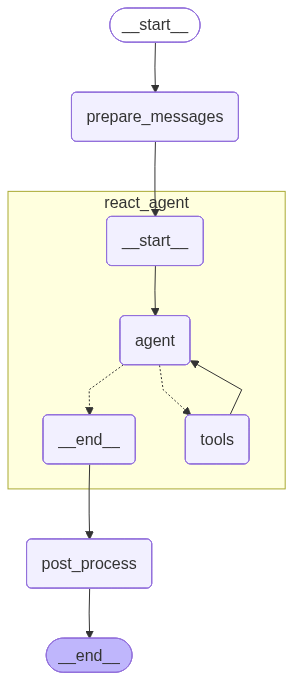

In [3]:
# Make a data loader agent
exploratory_agent = EDAToolsAgent(
    llm, 
    invoke_react_agent_kwargs={"recursion_limit": 10},
)
exploratory_agent.show(xray=1)

## Usage

Here are several examples of how to use the agent:


#### What tools do you have access to? Return a table.

In [5]:
exploratory_agent.invoke_agent("What tools do you have access to? Return a table.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * POST-PROCESSING EDA RESULTS
    * No tool calls detected – check that data_raw was provided and instructions ask for EDA.


Here is a table of the tools I have access to:

| Tool Name                 | Description                                                                                         |
|---------------------------|-----------------------------------------------------------------------------------------------------|
| explain_data              | Provides an extensive, narrative summary of a DataFrame, including shape, column types, and stats. |
| describe_dataset          | Computes and returns summary statistics for the dataset using pandas' describe() method.            |
| visualize_missing          | Generates missing value analysis, including matrix plot, bar plot, and heatmap plot.               |
| generate_correlation_funnel | Performs correlation analysis using a method focused on a target column.                          |
| generate_sweetviz_report  | Creates an Exploratory Data Analysis (EDA) report using the Sweetviz library.                     |
| generate_dtale_report     | Builds an interactive data exploration report using the dtale library.                             |

If you have any specific requests regarding these tools, feel free to ask!

#### Get information on one of the agent's tools.

In [6]:
exploratory_agent.invoke_agent("Give me information on the correlation funnel tool.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * POST-PROCESSING EDA RESULTS
    * No tool calls detected – check that data_raw was provided and instructions ask for EDA.


The correlation funnel tool is designed for analyzing the correlation between different features (or columns) in a dataset with a specific target feature, typically a binary or categorical variable. Here’s a breakdown of how the tool works and its parameters:

### Main Purpose:
- To assess the relationship between a target column and other features by binarizing data and calculating correlation.

### Key Parameters:

1. **target**: 
   - This is the base target column name to analyze. The tool will look for columns that begin with this target name followed by a '__' (e.g., if the target is 'Member_Status', it might analyze columns like 'Member_Status__Gold', 'Member_Status__Platinum').

2. **target_bin_index**: 
   - This can specify which level of the target variable to analyze. It can be an integer (indicating the position of the target level) or a string (indicating the actual level name).

3. **corr_method**: 
   - This defines the correlation calculation method you want to use. Common options are:
     - 'pearson': for linear correlation.
     - 'kendall': for ordinal correlation.
     - 'spearman': for rank-based correlation.

4. **n_bins**: 
   - This parameter determines how many bins to create for binarization. The default is 4, which is a common choice for continuous variables.

5. **thresh_infreq**: 
   - This threshold defines what constitutes an infrequent level in the data. Levels that appear less frequently than this threshold can be grouped into a single category (e.g., labeled as '-OTHER').

6. **name_infreq**: 
   - This is the name used for infrequent levels when they are combined into a single category.

### Usage:
- The correlation funnel tool is particularly useful for feature selection and understanding which variables are most predictive of the target outcome, allowing data scientists and analysts to focus on the most significant predictors in their models. 

Overall, this tool is valuable for exploratory data analysis, especially when working with categorical data and understanding complex relationships in datasets.

## Tool Examples - How to use the agent's tools

#### Example 1: Explain data tool

In [7]:
exploratory_agent.invoke_agent(
    user_instructions="What are the first 5 rows of the data?",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * Tool: explain_data
    * POST-PROCESSING EDA RESULTS
    * Tool: explain_data


Here are the first 5 rows of the dataset:

| customerID   | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines     | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies | Contract        | PaperlessBilling | PaymentMethod            | MonthlyCharges | TotalCharges | Churn |
|--------------|--------|---------------|---------|------------|--------|--------------|--------------------|------------------|----------------|--------------|------------------|-------------|-------------|----------------|------------------|-------------------|--------------------------|----------------|--------------|-------|
| 7590-VHVEG   | Female | 0             | Yes     | No         | 1      | No           | No phone service    | DSL              | No             | Yes          | No               | No          | No          | No             | Month-to-month    | Yes               | Electronic check         | 29.85          | 29.85       | No    |
| 5575-GNVDE   | Male   | 0             | No      | No         | 34     | Yes          | No                 | DSL              | Yes            | No           | Yes              | No          | No          | No             | One year         | No                | Mailed check            | 56.95          | 1889.5      | No    |
| 3668-QPYBK   | Male   | 0             | No      | No         | 2      | Yes          | No                 | DSL              | Yes            | Yes          | No               | No          | No          | No             | Month-to-month    | Yes               | Mailed check            | 53.85          | 108.15      | Yes   |
| 7795-CFOCW   | Male   | 0             | No      | No         | 45     | No           | No phone service    | DSL              | Yes            | No           | Yes              | Yes         | No          | No             | One year         | No                | Bank transfer (automatic) | 42.30          | 1840.75     | No    |
| 9237-HQITU   | Female | 0             | No      | No         | 2      | Yes          | No                 | Fiber optic      | No             | No           | No               | No          | No          | No             | Month-to-month    | Yes               | Electronic check         | 70.70          | 151.65      | Yes   |

### Key Columns:
- **customerID:** Unique identifier for each customer.
- **gender:** Gender of the customer.
- **SeniorCitizen:** Indicates if the customer is a senior citizen (1) or not (0).
- **Partner / Dependents:** Indicates if the customer has a partner or dependents.
- **tenure:** Number of months the customer has been with the company.
- **PhoneService, MultipleLines, InternetService:** Details on services subscribed to.
- **Contract, PaymentMethod, Churn:** Contract type, payment method and whether the customer has churned (Yes/No). 

If you have any other questions or need further analysis, let me know!

#### Example 2: Describe data set tool

In [4]:
exploratory_agent.invoke_agent(
    user_instructions="Describe the dataset with the describe_dataset tool.",
    data_raw=df,
)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * Tool: describe_dataset
    * POST-PROCESSING EDA RESULTS
    * Tool: describe_dataset


In [9]:
# View the AI Message (for some reason markdown=True is not working well here so using HTML)
from IPython.display import display, HTML
msg = exploratory_agent.get_ai_message(markdown=False)
display(HTML(f"<pre>{msg}</pre>"))

In [10]:
pd.DataFrame(exploratory_agent.get_artifacts()['describe_dataset']['describe_df'])

,stat,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
1,unique,7043,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
2,top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
3,freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
4,mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
5,std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
6,min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
7,25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
8,50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
9,75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### Example 3: Missing data tool


In [11]:
exploratory_agent.invoke_agent(
    user_instructions="Visualize missing data in the dataset using the visualize_missing tool.",
    data_raw=df,
)

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * Tool: visualize_missing


/Users/mdancho/Desktop/course_code/ai-data-science-team/ai_data_science_team/tools/eda.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


    * POST-PROCESSING EDA RESULTS
    * Tool: visualize_missing


The missing data visualizations (matrix plot, bar plot, and heatmap) have been generated successfully. If you need to analyze or access specific details about these visualizations, please let me know!

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [12]:
# These artifacts are stored in the agent
exploratory_agent.get_artifacts()['visualize_missing'].keys()

dict_keys(['matrix_plot', 'bar_plot', 'heatmap_plot'])

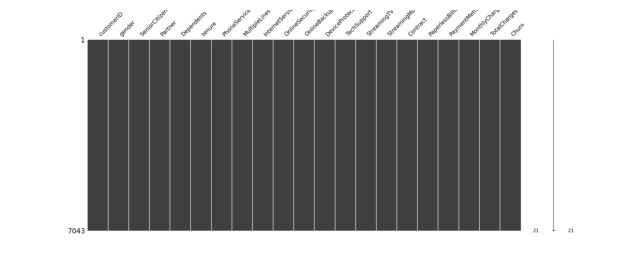

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [13]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['visualize_missing']['matrix_plot']
)

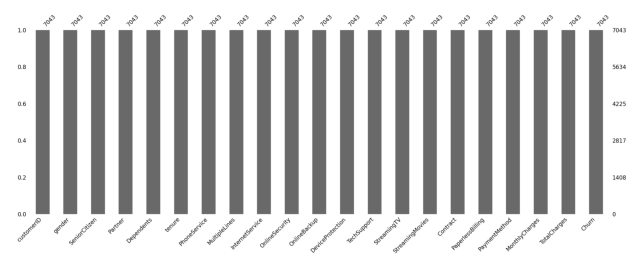

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [14]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['visualize_missing']['bar_plot'],
)

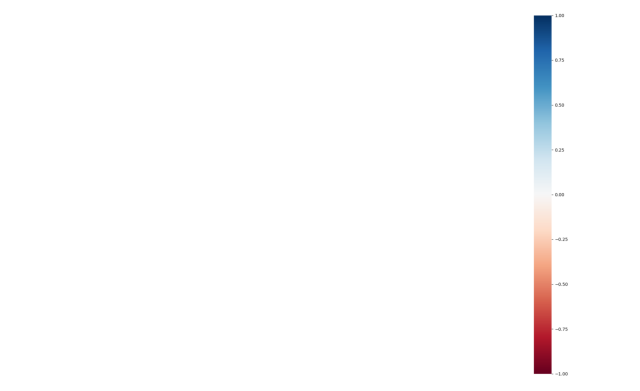

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [15]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['visualize_missing']['heatmap_plot'],
)

#### Example 4: Correlation Funnel Tool

In [16]:
exploratory_agent.invoke_agent(
    user_instructions="Use the correlation funnel tool to analyze the dataset. Use the Churn feature as the target. Use Churn=Yes as the bin index to compare against.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * Tool: generate_correlation_funnel


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 7 x 6.0 in image.
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: <_io.BytesIO object at 0x3563df2e0>
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_text : Removed 2 rows containing missing values.
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


    * POST-PROCESSING EDA RESULTS
    * Tool: generate_correlation_funnel


The correlation funnel has been successfully computed using the Pearson method for the target level 'Churn__Yes'. This analysis allows for a detailed comparison of various features against the churn status of "Yes." If you need further insights or visualizations from this analysis, please let me know!

Artifact preview:
| correlation_data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | plot_image                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | plotly_figure                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ['Churn', 'Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'tenure', 'OnlineBackup', 'TechSupport', 'OnlineSecurity', 'InternetService', 'DeviceProtection', 'StreamingMovies', 'StreamingTV', 'MonthlyCharges', 'PaperlessBilling', 'PaperlessBilling', 'Contract', 'OnlineSecurity', 'TechSupport', 'Dependents', 'Dependents', 'SeniorCitizen', 'SeniorCitizen', 'Partner', 'Partner', 'MonthlyCharges', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'InternetService', 'PaymentMethod', 'tenure', 'PaymentMethod', 'MonthlyCharges', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'MultipleLines', 'MonthlyCharges', 'tenure', 'PhoneService', 'PhoneService', 'MultipleLines', 'gender', 'gender', 'customerID', 'TotalCharges']                                                                                                                                                                                                                                                                 | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhIiotduxe7u7u5u7Fbs7q5rd1xb9NqJ3YlIC0jXsuf3B9fV/YFNKM7neXzu3dlzZt5zDizvmZ0zIxs5Zb4UGRWNIAiCIAiCIGRGmpFR0SyePjqj4xAEQRAEQRCENCHP6AAEQRAEQRAEIS2JhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpiYSXkEQBEEQBCFTEwmvIAiCIAiCkKmJhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpqaZ0QEI6cfXP5AN2w9w+cZt/APfIZPJyGZjRYXSxencqhGmJsYZHaKaAhUbU71iaeZNdvuu/R4/e4XHhavUqVae7PbZABgzfREHj53h6tGt6OvrpUW4Keo8cCw3bj/44jZTRvanUe0q6RTRj7t+6z5dBo1j1MDutGlS57PbfTjX/09PV4fs9tlo26wuDWpWRiaTAUnn6PmrN5w/uOm74vHxC+TAMQ/KuxalQJ5c33cwgiAIwh9FJLx/iLMXrzN80hwUikSqlC9F4zrViIuP59Gzl6zftp/DJ8+xbsFkHO1sMzrUn/b4+SuWb9hBvtzOqoS3fo1K5MudEy1trQyJadTA7p99r2DezJms9encChNjIwAkSSIsPIJT564wdvpifP2D6N2p5U/V7+sfyPINOzA1MRYJryAIgvBFIuH9Azx76cWwiXMwMjRgxZzx5HbOrvb+peu36TdqGkMnzGbXmnmqnrcfFR+fgHYKieXnytODa7GCuBYrmCFtA1/sEc2sGtSsTDYbK7Wyrm2a0LBDfzbuOED3ds3Q1NTIoOgEQRCEP4kYw/sHWLJ2G3Hx8UwY1jtZsgtQpkRhGtSoxJPnr7nz4Imq3NvXH7fJ86jQoCPFqregSedB7DxwDEmSVNvsP+pBgYqNuX7rPmOnL8a1dhvOX/Xk+q37FKjYmKOnzzN3+QbK1mvPjgPHVPvtO3Ka5l2HULx6Syo17syEWUvxD3z3xeOQJIldB0/QsscwStZqTdl67WnfdxQHjnmothkzfRHjZiwGoN8od2q27KEqL1CxMdHRMd91fMvWb6dAxcZ4vfVl0pzlVGjQkRI1WtJpwBievfT6xivwbQpUbMyQ8bOSlVdq3JnOA8eqXnceOJbGnQbw4rU3vYZPpmSt1pSp246RU+cTHhGldi5K1mqNf+A7hk2cQ5m6bSlZqzX9Rk5Ldq5j4+JYtGYLtVr1omi15tRt04flG3YQExuXqseoo6NNgby5iIqO4X1Y+Ge3e/T0Jf1GTqNM3XYUr96SNr3cOH7mour9Zeu302XQOACmL1xNgYqNUzVOQRAEIXMRPbyZXGxcHOev3sTK0pyKZYp/drsJw/swdkgvNDSS7oHevPWjbZ8RyJDRuG5VTI2NuHbrPlPmreTBkxdMcuurtv+4mUswNjKgc+vGuDg5EBAUDMDC1VvQ1JDTpkkdihfKl1S26m/WbNlDuVJFqVmlLAFBwfxz8hxnL15jy4pZ2NlkTTHGtVv2snD13xQvnI8e7ZoRn5DA0dPnGTt9MYmJSprUrUb9GpVQJio5fPJfWjSoSaF8uVOs63uPr++IqZiaGNOhRQO8ff3Z+88pBoyZzpGty3+6R/xHBIeE0aHfaMqUKEzPDs25cuMu/5w8h6aGJlNH9Vdtp1Ao6NBvNDkc7ejSpgkPn7zg5L+XiZ4Wy7qFU/7bJpFewydz58FTGtSshH02a569fMOKjTu5cNWTDYunoaWZeh8VXm990dXRxtzMJMX3b99/TPchEzA3M6Ft07ro6upw9uJ1hk2cw2tvX3p2aE5516KER0SyZc8/1KhUhmL//WwJgiAIQkpEwpvJeXn7kpCgIHdOpy8mZjKZTO3r5ZlL1hIZGc3eDQtxckgaB9u5dWOmzF3BzoPHaVirMkUL5lVtb2JsyN9Lp6OllTRk4UPCm6BQsHvtIgwN9IGkB8rWbt1Lt7ZNGdijnWr/Vo1q07zbEFZs2KmWsH3qxNlL5Mudk3ULpqiOpVXj2lRq1JkrN+/SpG41XIsVxD/wHYdP/kuF0sWoWKZEinV97/HZ2VqzdMYYNDSSzpFSqWT/UQ+evnhN7pxOnz2vH3yu99rQQF91br5HaFg4/bu1oUf75gB0bNGQxp0G4HHhKvDx/CUkKChTvBATP0nguw0ez7Vb9wmPiMLYyIDt+49w885DVsweT9mSRVTblSySn4mzl3Hk1Dka1vr+h+rehYSqbqAAgoJD2HPoJI+evqRFg5rI5Sl/wTRpznJ0dLTZumIWFmamAHRu1Yh+o9xZvmE79apXpECeXMTGxrNlzz8UK5TvjxwyIgiCIHw7kfBmctExsQAYGxl88z6RUdFcuHqLSmVKqJLBD1o3qcPOg8c5e+mGWkLYtF51VbL7qfo1KqoldP+c+hdJkqhYprhaEmigr0e+3Dm5duveZ+OaO3k4ujraaol7ZGQ0kiShUCjS9PjaN6+vSnYBCubNzf6jHgSHhn1Tm9Wbp/zQWu9OLenTudU3x/6BXC6nQ4sGqteamhrkyeXM0dPnk42V7tiqkdq+BfLk4qrnPULev8fYyIDDJ85hlcUC5+z2atfEtVghNDU1ueZ574cS3nZ9RqZYXqZEYQb1bJ/ie89eevH81RvaNa+vSnY/HG+rRrU4f+UmF6560rJRre+ORxAEQfhziYQ3kzMyTEp0Y79jLKaXty9KpZK/XJL3XNrbWgMfe3A/yGppnmJdVpYWaq9fer0FoH3fUSlur6X1+R9J26xZOHLqPFdu3sHrrR9+AUGEfmEc6Of8yPFZWpilGGdCQsI3tblk+ugUyx3tf2xWDEMDfXR1dFKMSaFQqCW8WT4be9JNwss3b4mJif1sUv4u5P0PxTjZra/asAUtLS3sbbNin83ms/u8euMDQJ4Ues3tVNfmy2O9BUEQBOH/iYQ3k7OzzYq2thaPn7/+4nYn/73MsvXb6NelDRbmpgApzqjwocf4R8d0KhSJAMyb7IZ2Csnt54ZdKJVKeg2fwrVb96hesTRVy5fCIZsNRQrmoWLDTt8VQ8J/vcHfc3zynxyn+7mhFd/iQ0yfksu/PZ6vxa5QKHC0s2F4384pvv+j8zOXLFow2SwNX/MhCU/p2sR8uDYpfJMgCIIgCF8iEt5MTldHB9diBTl3+SaXb9yhdPFCKW6348AxXrx+S66c2VXJ3ofe2E89evYSAOfsdj8Uj03WLAA4OWQjp5OD2nvHPC4CUgp7gee9R1y5eYc+nVupzd8aGRX93TFYW1kCaXN8P0Mmk6FUKtXKgoJDVIleWrHNmoWIqGgqlC6udsORoFCw+9AJ1bcE6cEm69evTQ7H9L82giAIwu9NTEv2B+jdsSUaGnImzl7KW7+AZO9v2fMPV2/epX6NitjbWmNtZUkelxycPHsJb19/tW237z+KhoacahVL/1AsVcqXUrX5qbsPnzJq6nzuPXqW4n5h4ZEAWJqrfz2/edehZNt+yNmklHPnND2+n2FmasyL196qXnCAbfuOpnm7VcqVIiQ0jCOnzquVb93zD+4LVqtNdZbWCuRxwcLclD3/nFKbtiwxMZFdh05gaKBPuVJFkwpV1/kzF1oQBEEQ/iN6eP8A+fO4MMmtLxNnL6dJp4FUr1QGFycHEhIUXL5xh+u371OySH7GDO6p2mfkgK50HzqRdr1HUKd6RbJamnPp+m0u37hDjw7NVWNdv1cF12LUqFSG3YdO4B/4jmIF8+If+I79Rz2wtbb67ANcRQr8hbGRIfNXbsIvIBA9XV0uXLtFSOh7zM1MePTsJafPXaFqBVfMTJPGjW7ff5TQsHAa16marL60Or6fUblsSfYcPkmPoRMpXbwQT196ce3WPbJmsfj6zj+ha7umeFy4ytjpi7h+6x522ay5/+gZp89fpWblslQq++PDMb6XlpYWI/t3xW3yPFr1GE6NymUxMTbk9LkrPHzygonD+2Dw39LQ5v9d539O/otSqaR98/rpFqcgCILwexEJ7x+iYa0q/OWSg007DnD15l2OnDqPnq4OuZwdmTi8Dw1rVVGblqxowbysXziVJWu3svfwSZRKJU4Odowf2pvmDWr8VCwzxw0hj0sO9h45xZWbdzE3M6Fe9QoM6NFOlcz8P3NTE5bNHMvspev5e/dhjIwMqVGxNL06teTAUQ+WrN3KmYvXqVrBFdeiBSlbsgjXb9/nXUhoiglvWh7fjxrWpxMKRSJnLl7j4dMXFM7/F2vmTWLElPlp2q6JkSGbl85g8dotnD5/lcioaGyzZqFf1zZ0bdMkTdtOSa0q5TDQ12PV5t1s2/sPMrmc3M7ZmT/FjWoVPva8O2e3p36NSpw6d5nlG3aIhFcQBEH4LFm/kdOkxZ95glwQBEEQBEEQfndiDK8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRAEQRAyNZHwCoIgCIIgCJmaSHgFQRAEQRCETE0kvIIgCIIgCEKmJhJeQRAEQRAEIVMTCa8gCIIgCIKQqYmEVxAEQRAEQcjUNDM6ACFtjZq6gMio6DRtQ6FQAKCpKX6c/kTi+v+5FLExyF+9Ru6SEzS1MjocIZ2J3/0/W3pef0MDfaaPHfRTdYif0kwuMiqaxdNHp20bkZEAGBoapmk7wq9JXP8/V9SjRxjkzQteXuDgkNHhCOlM/O7/2dLz+vcf5f7TdYghDYIgCIIgCEKmJhJeQRAE4YdIWbMSfekSWFtndCiCIAhfJBJeQRAE4cdoa6MsUAC0tTM6EkEQhC8SCa8gCILwQ2R+fugXKQK+vhkdiiAIwheJhFcQBEH4MQoF8ufP4b+ntQVBEH5VIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQhB+jq4uiRg3Q1c3oSARBEL5ILDwhCIIg/BApSxZi9+wRCw8IgvDLEwlvGrly5Qq7du1CW1sbTU1NunfvzqxZs1iyZElGh5ZqlEolG3cc4Mjp82hqaNCiYS0a1a6CTCbL6NAEQUgP0dFonDwJjRuDvn5GRyMIQjpQKpVs2nmQf06dQ1NDg+YNatK4TtVf/m+/SHjTgL+/P3v37mXy5MkYGBjw5s0b5s6d+931KJVK5PJfd9TJrCXr2bH/KIrERAAePl1GVHQ07ZrVz+DIBEFID7LgYPTatRNLCwvCH2TOsg1s3XuERNXf/pdEREbRsWXDDI7sy0TCmwbOnj1L3bp1MTAwAMDBwYFRo0YxefJkFi5ciLe3N4ULF6Zdu3aMHj2akSNHYmxszOTJk+nZsyfbtm0jMTERU1NT9PT08PPzIzw8nKioKMaNG4eJick3x6JQKFTrXaem6JhYtuw5rFamVCpZum47jWpVTvX2hF9XdHR0RocgZJDYmBgMgKioKKQ0+JwRfm3id//PExsbx+Zdh9TKlEolyzfsoGndqhkU1bf5dbsPf2PBwcFkyZJFrcza2pr4+HiaNm3K7NmzuXjx4hfrKFCgAF27dgXA0tKSSZMmkS9fPu7cufPF/UJCQnj+/LnqnyKN5seMjEr5gy46JhZJktKkTUEQBEEQMk5UdEyK5dExsSiVynSO5vuIHt40YGJiQkhIiFrZ1q1b0dbWxs7ODgANDY1k+32aKDo5Oan+39nZGQBTU1MSEhK+2La5uTnm5uaq17q6umnyQImenh6W5qYEh4ap4tbQ0OCvnE4YGRmlenvCr088uPTnkenpASR9myWu/x9L/O7/OfT19cliaU5wSChK5ce//bmdHTE2Ns7g6L5M9PCmgbJly3L48GFiY2MBuH//Pnfv3k1xPK6enh6xsbEkJibi4+OTYn2/4kBwDQ0Nlkwfg5GBPhpyOXKZjCwWZsyeODSjQxMEIZ1IVlZEnzgBWbNmdCiCIKQDuVzOYvfRGBoYIJfLkctlWJqbMnvCsIwO7atED28acHJyol69eowbNw5NTU0MDQ0ZOnQokyZNSrZt1apVWbZsGSYmJuj911vyu8j3V07+2bqMa5530dDQoHTxwujr/17HIAjCT9DRQVm6NOjoZHQkgiCkk3y5nTny399+uVz+2/ztl/UbOU1aPH10RschpJH+o9z53uvr4xdIrVY9adOkLqMGdlOVX791nwmzl3Jk63K17T88FCe+1voziev/54p6/hzd5s3ROHIEbGwyOhwhnYnf/d/XkrVbOX72EnvXL0BL82Pf55jpi/D1D2T9wqlfrSM9r/+P5DL/TwxpEFIkk8nYc/gkD5++yOhQBEH4VSUkoHH7Nnzl2QJBEH4t3ds1Q5mo5O9PZly4+/ApxzwuMG5wzwyMLO2IhFdIkVwuo13zekyZuyLFJy837zpErVa9KFuvPZPnrSQ8IioDohQEQRAE4Xvp6GgzZnAPVm7aRVBwCJIkMX3hajq2aECO7PY8feFFh36jKFmrNZ0GjOGl11sgaZaGweNm4lq7DY07D2bXoZMZfCTfTiS8wmf16tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1IkpcSc5RszKEpBEARBEL5XmRKFKe9ajPkrNrPvyGlCwyLo0aE5MbFx9B4xhXbN6nN233oqli7OoLEzANi08yByuZxzBzYyb9IwVmzcyas3KT9w/6sRCa/wWbo6Oowb0otFa7bwLuS9qnz/0dN0atkQJ4dsmJoY07tTC85evK5adUUQhD+Ejg6JZcuKh9YE4Tfl1q8zZy9dY86y9YwZ1B1dHR3+vXQdZ0c7alQqg76eLp1aNSIsPIIXr72RJInX3r7cefAE+2zWHNi4EDvb32OWFjFLg/BFZUoUplyposxZtp6mdasD4OsfiIOdrWobUxMjEhQKIqOiMTEWc/AKwp9CsrIi5tgx8dCSIPymsliY07Reda7fekB512IA+PoHce3WPYpVb6HaTpmoJCg4lG5tmyJJEu4LV+Mf+I4KrkWZMLyv2oNvv6pfP0Ihw7n160LDDv2xs0m6izM3MyEg6J3qfW8ff/T1dEWyKwh/mpgYNC5ehJo14TebVlEQhCR6urro6X38lsbC3ITKZUsyf8oIVdmDJy/Imd2eG3ce0LxBTfp2ac3L129wmzyf/Uc9aNOkTkaE/l3EkAbhqyzNTRncsz3rtu0DoE7V8mzYvh9vX3/CwiNY/fde6lYrn8FRCoKQ3mTv3qHXuDEEBWV0KIIgpJJypYpy+/4Tbt17RHx8ArsOnmDQ2BloaGhw+MS/LFi5mejoGORyOQkKBeamv/YKax+IHl7hmzStV51Dx88SFBJK03rV8Q8KpkPf0UTHxFC2ZBF6dmie0SEKgiAIgvCTLMxMmTV+CFPnr+LNW19ccjiyZPpoNDU16N+tDeNnLqVK065oa2tRq3JZalYum9EhfxOR8ArJZLOx4rbHHrUymUzGxiXuqtcDurVlQLe2wMfJpwVBEARB+L306dwqWVmJIvnZs25+snKbrFlYPW8i8PFvv0wmS9P4UosY0iAIgiAIgiBkaiLhFQRBEH6IZGlJzL59kCVLRociCILwRSLhFQRBEH6Mnh6J1aqJGRoEQfjliYRXEARB+CGywED0atWCgICMDkUQBOGLRMIrCIIg/Ji4uKR5eOPiMjoSQRCELxIJryAIgiAIgpCpiYRXEAThP5IkZWjbGdm+kPmInylB+EjMw/udrly5wq5du9DW1kZTU5Pu3bvj4ODwTfveu3cPExOTb97+U5GRkdy8eZOKFSt+976CIHyeJEms27aPNX/vISY2jkL5cjFz3BCsrSzTpf3YuDimzlvJMY8LAFSvWIZxQ3uhr6ebLu3/FC0tEgsXRkNLK6MjET4RFR3DhJlL8Lh4DQ25nPo1KzGyfze0tcV1Ev5coof3O/j7+7N3714mT57M9OnT6d69O3Pnzv3m/e/du4e3t7damVKp/KZ9o6Ki+Pfff78rXkEQvm7bvqMsXrOFyKhoEhMTufvgKV0Hjyc+PiFd2p8waxlHTp0nLj6BuPgEjp+5yLgZi9Ol7Z8lWVsTc/482NhkdCjCJ4ZPmovHhWskJCiIjYtn3xEPpi9ak9FhCUKGEj283+Hs2bPUrVsXAwMDABwcHBg1ahRnzpzh6NGjKJVK6tSpQ5UqVRg9ejTZs2fn1atXmJub06VLFzw8PNDR0aFgwYIMGzYMBwcH6tSpQ1BQECdPnkSpVFK6dGmaNWuGp6cn27ZtIzExkbp16/Lo0SOePHnCv//++129vAqFIs1XQouOjk7T+oVf2+9+/XfsP0pi4scbT0ViIm/e+nHj9j0K5s2Vpm0rEhM5evq82tfOCQoFJ85eIiQ0FO1fvOc0OjQUrTt3iCxdGnR0MjocAYiMiub8lZtqZQqFggPHPBjSs12qror1u//uCz/nd7v+IuH9DsHBwRQsWFCtzMDAgEOHDjFz5kxkMhmDBw+mVKlSABQvXpwePXowdOhQ5HI5VapUwdHRESMjI8LCwhg4cCCGhobs3r2bGTNmoFAoGDJkCE2bNmXt2rXMnj0bDQ0NVq9eTfPmzQkJCflqshsSEkJISIjqtUKhSP0TIQiZiCIxMVmZTAaJ3/jty89QKpWfHWOpTFTCr53vIg8Kwqx+faIePkSyt8/ocAQgMYWfZwBJmTSe93dZBlYQUptIeL+DiYmJWjIJMG/ePBwdHdH6ryfG3t6e4OBgAJydnVX7xcfHq+1naWmJoaEhkLQO9ZIlS9DV1UWpVBIWFoapqSn6+voA9OvXj4BvnOfS3Nwcc3Nz1WtdXV1VO2ktvdoRfk2/6/WvVaUc67buRaFIShTkcjmmJkYULZgPA/20X1ChVLGC3LzzUHVzqqmpgZmJMcHvw8md0ynN2/8Zsv8WnDAwMIDf9PpnNgYGBuTN5czTl69VP9NampqULVUEY2PjNGnzd/3dF1LH73L9xRje71C2bFkOHz5MbGwsAPfv38fX15e3b9+SmJhIQkICvr6+ZM2aFSDZnXRKd9bh4eFcuHCBgQMHUr9+fRQKBUZGRoSHh5OQkEBkZCQzZswQd+WCkEZ6d2xJg5qVVa+zWJixas6EdEl2AWaPH0qBPDlVr/PmcmbF7PGs376fucs3EB0Tmy5xCJmDTCZj8fTRuDg5qsqKFszLtFEDMzAqQch4oof3Ozg5OVGvXj3GjRuHpqYmhoaGTJ06latXrzJixAg0NDRo0qQJOp8Zy+bk5MTWrVspXLiwqszIyIgsWbIwcuRIXFxcsLCwwNPTk+bNmzNq1CgAWrZsiZmZGX5+fly+fJnSpUunx+EKwjfpN3o6t+89BhkkJiqRy+V8uD+b7NaPBrUqf7mCDKapqcEkt74M69OJqOgYsliYoaGhkW7tm5kas3GxOyHvwwAwNzVBJpMxY+xgLlz1pP+oaXRo0YCKZUqkW0zC783K0pwdq+cQHBqGXC7DzMRYdJoIQr+R0yQh80qP6xsRESFFRESkeTvCr+nT61+jRXdp35HTGRzRj0lIUKRLO0qlUtq294jUqOMAqVi1FlLZeu2kfqOmSY+evkxx++iYWGnBys3S8IlzJP/Ad+kS47eKCAiQov/+W5KiotKlvbe+AVL+Co2kHkMnJntv8pzlUv4KjaRrnvd+qO5rnvek2q17qdopVLnJN++bv0IjyS8g6IfaTUs1WnSXbt55IEmSJHUaMEY6ePxMqtYvPvv/bOl5/VMjlxFDGgRBSDNXbt6larNuqtf12vZh2oJVALwLeU/pOm1RKBIJfR/O0AmzKVuvPbVb92L3oRPJ6gqPiKJI1ea8fP1xar/+o9xZ8/ceALbuPUKtVr0oU7ctM5esI+G/MbHevv50HjiWkjVbUbVpV1Zu2qXav2bLHqzctIsqTbpw486DNDkH/2/Jum2s2ryL/t3acO7ABnaunkvWLBZ06D+aF6+9k22vp6vDwB7t6N6+GRNnL2PLnn8++2BSevgwLhQAfX0SGzaE/543SA9yuZz7j5/zPixcVaZUKjlz8Vq6DUMRBOH3IxJeQRDSTNECeQgLi8A/8B2h78MJDA5NGv4AeN59SPFC+dDU1GC0+0LMTIw5vmMl8ya5sXzjTi5eu6VWl7GRASWL5OffyzcAiIuL56rnXapXKs2pc5fZdfAYa+ZP4sCmxTx4/IxNOw8CsHjNVooUyMPFw5tZMXs8a7fu5aXXW1W9l67fZve6+bgWU5+BJS0EBYewYft+3McMokq5Uujr62FrbcXYwT0pkv8vVm7cCUDngWNZum4bbXuPoGTNVvQdORWHbDYsnTGGuLg4KjXqTImarWjRbSi37z9O1s62fUdo08tN9Tr0fThFqjQj8F0IYRGRDJ80lzJ121G/fT/OXLym2u7Q8bPUatWLEjVa0qL7x7qv37pPk86DmDJ3BQ069FNtLwsKQrdpUwgMTKtTloxMBmVKFMbjwse4b959iE3WLJibmQDw+Nkr2vUZSalarWnVYziedx+qjqNpl8HMW76RSo07U7lxF06fv0pAUDDdhkzA28efOm16q+pdu3UvZeu1p3yDDuw5fDLFeOq3TzoftVr1xNc/8Jtu3j6o2bIHKzbu/O9GrR27D51g4qyllKvfnuZdh+Dt6w9ATGwck+Ysp2LDjlRr1o2Vm3apZveo2bIHG7bvp0nnQZSs2YpxMxYjSRI9h03C1z+ILoPGcf32fQAePX1Jo44DKF69JQPHzEi3uaYF4VcgEl5BENKMtrYWhQv8xe37T7j94DE1KpbBLzCIqOgYPO8+pFSxArwLDuXKzbsM7tUBQwN98uTKQcuGNTlx9lKy+qpWcFUlvFdv3cPO1hpHO1t2HzpJt7bNsLPJShYLc7q1bcqpfy8D0LNDc7q1bUpMbDyRUdFoasjVegc7t2qEualJupyPKzfvYmJkmGJyXbtqeTzvPVK9/ufUOWaMG8yRrct5+sKL0+evIpPJOHr6Au2a16NKuVJYmJvSd+RU4uLUZ4GpWt6Vh09f8C7kPQDnr9wkfx4XrCzNGeu+iKxZLDi1ew2jBnRj9LSF+Ae+IyY2jmkLVjF30nAuHdlC1fKuzF66XlXn81dvcLCz4cDGRR8bio1F88QJiE3fB+uqVyyt9vNx8uxlqldMerYhOiaGnsMn0bxBDc7sW0/n1o0YPG6m6lw8ffEaI0MDTuxYRdtmdVmwchNZs1iwZt4k7LNZc2TrciBpPPpb3wBO7lzFJLe+zFqyTr13+z+HNi8B4Nj2ldhaW33TzdunLl+/zbYVsxg1sBuT5izHxtoKjz3ryJ/HhVX/fRsxd9kG3oWEcmDTYtYvnMLxMxfZfehjAn7y38usnjeRHavncuLsJe48eMLKOROwtc7CugVTKFE4PwBnLl5j/pQRHN+5khev33D6/JWfuAqC8HsRCa8gCGnKtVhB7jx4zO37jylWKC8F8uTi7sOn3LzzENdihfANCMLCzETt62hTE2NCQsOS1VWlXCnuPnxKeEQU5y7fUCU5fgFBjJu5mGLVW1CsegsGj59F8H/7P3r2kqZdBtGx/2h2HTyBTKb+sWdsZJCGR68uIDAYm6xZUnzPwsyEsPAI1evWjetgb2uNpYUZxQrlxTcgkHuPnhETG0vPDi2YOW4w7ZvXJzFRycZdB9XqsrI0J1/unKoFCP69fINqFVx5F/Keq553GdijHfp6upQpUZjSxQtx9uJ1NORyNi5xJ4+LE8Eh75EkidBPbgxMjA3p0KKBagrGjFTetRh3Hz4hLCISSZI4feEq1VQJbyx2NllpWKsK+nq61KxcllzOTly+cRtIOo6ubZugra1FjYpl8A0I+mw7/bq2Rl9fj4qlixMdE6t2o5SS77l5+6BN07qYmRpTOP9fALRvXh9tbS0K5ctNQFAwkiRx4JgHg3t2wNTEGPtsNnRp05jjZy+q6ujSpgkWZqY4OWQjd87s+H3mmJrXr4mTQzYszEwpkCcXPv7p1zMvCBlNzNIgCEKaci1aEPeFq9HS0qJJ3WoEh7zn4rVbhISFk9PJgbd+AbwPiyAuLh4dHW0A3rz1w9baKlldluZJf6gvXvPk/JWbLHYfA4CFmSmDe3agUtmkmQzCI6IIfBdMTGwc42cuYdvK2eR2zo4kSZSr3yH9Dv7/GBkaqBLx/+cXEKR2zKYmRqr/19DQIDFRia9/EN6+ARSr3kL1XmKiEkVC8gVmqlVw5fyVm9SvUYnLN+4wpFdH/AICiY2Lx7V2G9V2SqVEDkc7ADbtPMiVG3fIZmOFpblZsth/lSf99XR1cC1WCI/zV8lub4uFmQl2NknTQfoGBOGQTX2pYzMTI0JCw7DOYomxkSFyedJNT9J5TXk8tFwux8LMVLUdJC1SMn7mEg4ePwMkn4Xkczdv9x4+4/rt+3QfMgGA4oXysWb+ZADVeZbL5GhoyNHX01Xtq5QkgkPDiI2LVzsms/+7ITT7v5+VlBZTgaQp91THpyFXW2FQEDI7kfAKgpCm8uZ2xjcgCF1tbRztbClaMA99R06jYpniANjZZCV3zuwsWbeV3h1b8srbl4PHzrB89vgU66tWwZX12/ajraVFLuekuUZrVS3H37sPUTBfLiRJYoz7IvK45KB7u6YolUpiYmIJC49g694jREVHE59CgpgeShUrwLQFq7j/6Bn587iovffPyXNULF38i/tbmJuQO2d2dq6eqyp79tILayvLZNtWq1iaVZt3c9XzLna2WclmY4VMltSjfeHQZtV2Xm99MTTQ59CJs7x+48OxHSvR0tTk9PmrPH7+6ssHpKmJMmdO5Jrp/6ekRqUyHDx+Fkd7W2pULKMqNzc1ISAoWG1bLx8/alQu8/9VfNHncvvJI/oxeUS/FN8zNzP57M1bicL5ue2x55vb+cDU2AhNDQ0C3wWrboi83vqRLYUbwq/6Ne5XBCFDiCENgiCkKblcTuF8ucmTKwcA+f9yISFBQamiH8exzp4wlKcvvKjUpAuDxs6gf7e25MvtnGJ91Sq48ujZS2pWLqsqa1q3GoXy/0WTzoOo364f1lks6N2pJfr6erj160rfkdNo2HEAWpqatGlSlxGT56ZYd1rLbp+NFg1qMmziHC5dv010dAxh4REsWLWZt/6BdGnT+Iv7F8yTi/CIKE6fu0J8fAJnL16n04CxKY4ttbe1JpuNFQtX/a1KCG2trXC0s2Xr3iPExydw+/5j2vUZSej7cBSKRBITlcTFxfPS6y0bd+wnMTER5ReWWJZsbIi+dQtsbX/uxPyACqWLc/v+I457XKB6pY9zk+vp6vL4+UtOnL1EbFwch06cJSAomHKlin6xPg0NOVHRMSQkfP+DXBoact6HRajdvEVHx/DgyQsOHjvzU3NRa2pqUK1iaRas+pvwiCjevPVjy+7DNKz99To1NDQIDYv46naC8CcQPbyCIKSa4ztWpVi+YOpI1f9ra2tx4+QOtfdtra1YOWfCN7WRNYsFJsaG1KtRUVWmoaFB/65t6N+1TbLt2zSpQ5smddTK3Pp1+WK8aWn0oO5s2nmQ6YvW4OMXgKG+PmVLFmHLshmYmnx56VcdHW0WThvJlLkrGDl1Pna21sydNBwz05T3q1relWXrtzN30jBV2ewJQ5k8dwULVm3G0tyU0QO7k9PJAVtrK/69fIPKjTvj5GjHkF4dGTdjMfNXbqKC62d6nuPjkT95AsWKgbb2D5+TH6Gvp0vJIgXw9g3A0e5jwm1hZsLCqaOYsXgto6YtIIeDHfMnu6H7mQWBPsjp5IiBvh5Nuwxm+ayUv134nMplS9KmtxtHti5n9oShTJqznEpNumBiZPjFm7dvNXZwDybPXUGtVj3Q0tKiVaPaVKvw9QWIKpYpwfBJc1i3YMpPtS8ImYGs38hp0uLpozM6DiGN9B/lTlpf38jISOD3WU9bSF3pef3j4xM4e+k6W/b8w8bF09K8vd/d6fNXWb9tH38vm5Em9Uc9eoRB3rzg5QUODmnShvDrEp/9f7b0vP6pkcuIHl5BEH4b7gtWce7KTeZNdvv6xn+46OgYDh47Q9O61TI6FEEQhAwnEl5BEH4bE936ZnQIv43yDTtStEBetaEfgiAIfyqR8AqCIGRCN0/uzOgQBEEQfhlilgZBEAThh0hmZsSuWAHm5hkdiiAIwheJhFcQBEH4MYaGKNq2BfHQkiAIvziR8AqCIAg/5t07dDp2hHfvMjoSQRCEL8pUCa+npyfDhg3Dzc2NIUOGcOzYsRS3CwgIYPLkpGUdFy5c+F1tREZG4u7uzpgxYxg2bBgnTpz46bg/tXr1aqKiorh37x5v3rxJ1boFQUgf/oHveP7qDXFx8d+1X3RMLE9feBEUHJJGkaUuWUwMWnv3QnR0RoeS6SQmJvLa2wevt76fXf5YEIRvl2keWgsKCmLdunVMmjQJCwsLoqOjmTx5MlmzZqVIkSKf3W/gwIHf1c6BAwcoX7485cuXJz4+nsGDB+Pq6oqx8ZcnjP8WSqWS7t27A3Dv3j0cHR1xEHNbCsJvIz4+gRFT5nHq3BUATIyNWDpjDIXy5f7qvhev3WLI+FlEx8QC0KxedcYO6YmGhkaaxiz8evwD39Fr+GRevPYGIJezI8tnjcfKUoyVFoQflWl6eM+cOUOdOnWwsLAAQF9fn5YtW7JkyRImTJjAlClT6NevHw8fPlTbr1+/pDXRBw4cyLJlyxg2bBjr1q0D4MWLF4wZM4ZRo0axc+fHJ57v3btHQEAA2trazJo1CwMDA/z9/ZkwYQJjxoxh9erVKJVK/P39GTduHG5ubixfvlytvf9ve+7cuZw9e5bRo0cTGBiIh4cHW7duxcPDg40bNwLw7NkzZs6cmUZnUBBSl49fIAUqNmb6wjVq5ddv3adOm97fVdf12/ep377fV7dbtn47E2Yt/a66f0aBio3xD/z4df7C1X/z76UbqtfhEZH0dptCeETUF+vxD3zHgDHTVckuwP6jHvy9+3CybQ8eO0PPYZNSIXrhVzVo7Ey8vH1Vr196vWXohFkZGJEg/P4yTQ/vu3fvcHZWX77R0tKSsLAwLC0tmT59Op6enpw9e5amTZsm2z8qKooGDRpga2tLjx496NKlC2vWrMHNzQ0zMzMmT56Mt7c3zZo1Y8+ePcyaNYvIyEjKly9Pu3bt2LhxI506dcLJyYkVK1Zw69YtTp8+TevWrcmbNy9r1qwhPDw8xdijoqJo06YNNjY2nDp1Cl1dXapUqYKjoyNFixZl//79dOzYkcuXL1O+fPnvOi8KhUK1GkpaiRZfZ/7RPnf9o6OjkMlk7D58ghoVXcmdMzsAMTExKJXK7/q5zJMzO9uWz/jqPvHx8SQkJHxX3YrERDR/ohc1Ojpa1d6ZC1dJUChU70mSRGRUFLfvPaRowTyfrePKzTsolcpkcZ06d5mmdauqlVcpV4Iq5Uqk+e/1t4iNj0fX2prY2FikXyCezCA6JpYHT56rlSkUidy+/4TgkBB00nkJ5y8Rn/1/tt/t+meahNfc3JygoCC1Mh8fH7JmzYqTkxNyuRwTExPi41MeU6ejo4OdnR0Aurq6ALx584bZs2cDSUnpu3fvCAgIoGXLlrRp04bIyEjmzZvHrVu38Pb2ZvXq1QDExsbi7OyMt7c3uXMnfZXZrVu3ZG1KkqRqz8bGJsW49PT0sLW15fXr19y9e5dWrVp98TyEhIQQEvJx/J/ikz++gpDe5DIZLRvWZObS9ayZOwG5PPmXStv3H2PXwRNEREVTrlQRBnVvh7GRgdo2nncf4b5oDbvXzGXNlr34+AcSHRPLjdsPsLayZMaYgTx89pJ12/YDSb9bYwZ1x+PCNVZt3kNQcAgVyxRnaK8OGOjrMWXeSvT0dLn78BnlShYhIOgdhoYGvHz9lgdPnpPTyYGZ4wZhZmJMeEQUs5et5+rNe5iZmdCvcyvKuxalZc+k1d6adB7MjtWzCXoXSkxMXLLjk6Sk4QofEl7Pe49YsGoL3j5+FC+UD7d+ndHR0iJRkXycpuKTMveFa9DX08XFyYFjZy6x2H0kCoWCZRt2cszjAjKZnNaNa9GuWT0Adh06yfZ9RwmPjKJutfL069IKTc3U/chX2tgQfOcO+vr6qVrvn0xLUxOZTKb6+/CBXC5HUyPT/MkWhHSXaX57KlWqhLu7O66urpiamhIbG8u+ffuoVasWPj4+X91fJpMlK7O3t2fs2LHo6+tz+PBhsmfPzrJly1AoFLi6umJgYIChoSEaGhpYW1vTo0cPrKys+Pfff3FyciJLliz4+flhZ2fHzJkz6dOnj6odf39/4uKS/3FMKZ4KFSqwa9cusmXLhvZX7u7Nzc0x/2ROTF1d3XRb51ysp/5n+//rrx8RDTIY0L0djTsN5Mjpi7RqXBs9PT3kcjmGhoYc87jI3iOnWTFnAmYmRsxcvI4Fq7cwa/wQtbo+3UdbW5vT56+ybOY45kwcjtvkuew8dJIJw3oTEBRCQFAwk9z68vDpCxau2cqyGWOwtrJk0pzlrNq8h3FDe6GppcXZSzdYOWcCuZ2zM2b6Io6fucjquZOwz2ZN18HjOX7mMt3aNWXUtEU42ttyas8gbt9/zNAJs9m3YSGH/15KwUpNaFi7CnOWbaJIgb9o07QuS9ZtU/XWamhoYGdrxf5jZ2jVpC76erqMnb6EuZOHk8clB0vWbmXmkvXMmzQcAwN9IqPUe0zsba0xNDREqVRy8fptlkwfzYvXb9HQ1MDQ0JA1W/bw8o0Ph7csJ+T9e1r3dKN86RL4BQRy8PgZ1i6cgo62FkMnzGbPEQ+6tmmSuhc9IQGZtzcGefKAllbq1v0Ha1irMv+cPKf6tkBTU5PGtatgYvLzz4qkBfHZ/2f7Xa5/pkl4ra2tadu2LVOmTFH1IjVu3BgjI6NvSnhT0qFDB6ZMmYJSqaRAgQKYmZnRtWtXli9fzt69ewEoXLgwBQsWxNzcnMWLF5OQkIC9vT3lypWjQ4cOLF68GEmSKFq0KEZGRhQtWpQ5c+agra2NgYHBZ9t2cnJi69atFC5cmOLFi7No0SJGjRr1Q8chCBlJV0eHcUN6MWziHKpVLK323v6jp+nUsiFODtkAGNSzPbVb9yIxMfGLD2uVK1UU12IFAahUpgQn/72cbJs9h07SqmEtcud0AqBP51Z0HTSOcUN7AVC3WgVyO2dXbV+/RiXy5MoBQNmSRfANCORdyHuuet5l3hQ3tDQ1KV28EPlyOzNuxmIg6aa0VuWyuBYvpLpJNTExYt7yjcTExpH/r5zMm+KGno4Ouro6bNp5kCrlS1GicH4A+ndrS7l67VFKEoXy5cbz3iM05HJMjAypWKY4t+49BuD2/cfo6+lSIE8uXrx+q4r54LEzjBncA2MjA4yNDJg7aTgG+rrsPnSSbm2bYWeTFYBubZuyfMOOVE94Zf7+GBQqBF5eIB6wTTXjhvTCQF+Pf06dQyaTUb9GJQb1aJfRYQnCby3TJLwApUqVolSpUsnKCxQoAICLiwuDBg0CYPz48QAsWbJE7b+f/n/evHmZPn26Wl3W1tZMmpT8gRE7OzumTJmiVpY9e/ZkD5l17tw52b6ftu3u7g6Aq6srrq6uQNL0NA4ODhQsWDDZvoLwOyhTojDlShVlzrL1NK1bXVXu6x+Ig52t6rWZiTEJCQoio6IxMTb6bH1mn/R0aWhooEhh2ibfgKCk3uNNHx84VSYqVcMEjI3UeyVMP6lTU0ODxEQlfgGBxMbF41q7DZIkqfZtXKcqE4f3oWClJjg52ql9I9OiQU0a1arC6r93c+rcFRp16E/lcqUYM6gHfv5BHDjqwaETZ9Xa9nrrx2tvX2pWKsOUkf0BiI6OoVLjzgQEBeNx4Rq1q5RLdox+AUFk+y+phaTz/KF83MzFjJ/18bPFwsw0xXMppB8fv0BqtepJmyZ1GTXw4zC367fuM2H2Uo5sTXq4WVtbi5EDujFyQPKhcIIg/JhMlfBmRhEREUyZMoXatWunOOxCEH4Xbv260LBDf1WvI4C5mQkBQR9nOfB664uBvt4Xk91vZWFmyrA+nWjbtC4AsXFxvPR6i6bmtz+gZmFmirGRARcObVaL0dBA/4u/jzfuPKB5g5r07dKagKBg+o92Z/9RDyzMTWnTtC7D+ybd+CqVSu4/fs6eQycoWSS/Wp36+nqUK1WUfy/f4MyFa8yfMiJZO6YmxrwLDlWd092HTpDHJQcWZqYM7tmBSmVLABAeEUXgu+BvPm4h7chkMvYcPknD2pXJm8v56zsIgpAqMs20ZJmVkZERs2bNonLlyhkdiiD8FEtzUwb3bM+6bftUZXWqlmfD9v14+/oTFh7B0nXbaFiryg+3oaGhwfuwCABqVy3H7kMn8PUPJDIqmmnzV7Fh+4Hvqs/W2gpHO1u27j1CfHwCt+8/pl2fkYS+D/+vPbmqvU8dPvEvC1ZuJjo6BrlcRkKCAnNTY6pXLM2Js5d49tKLmNg4lq7fzoRZS0AG1laWyeqpUaksm3ceRFtbk1zOjsner16xNGu37CUiMoq7D58yb8VGjI0NqVW1HH/vPkTI+zCCQ9/jNnku/5w8913HLqQNuVxGu+b1mDJ3RbKZOQA27zpErVa9KFuvPWPcFxIWIWa/EITUIBJeQRDSTdN61Snwl4va68rlStGh72hqtOiBtrY2A7q3/eH6SxbJz/Xb95gydwVlSxaheYOadOw/hqpNuxIVHcOYQd2/u87ZE4Zy7vINyjXowGj3hYwe2J2cTknjVSuXLUmb3m5qc/EC9O/WhqDgUKo07UqzrkMoW7IINSuXJaeTA8P6dGLQ2JlUbNiR2/efYGhgwMDuKY/PrFimOAHvQqhVJeXpCPt1bYORoQE1W/bAbfI8xgzqib2tNU3rVqNQ/r9o0nkQ9dv1wzqLBb07tfzuY/8aydSUuLlzwcws1evOzHp1bMH78Ah2HjiuVn7M4yLb9h1h+axx/LNlKUqlxLT5qzIoSkHIXGT9Rk6TFk8fndFxCGmk/yh30vr6fpgP9Hd5UlNIXeL6/7i1W/eSNYsF9apXzOhQfoi49t/Hxy+Qum17c9tjD5eu32bYxDkc3LyEV15vmTB7KQ7ZbKhSriQtGtYCICAomNqte3H9+PZfcsU9cf3/bOl5/VMjlxE9vIIgCBngrV8At+8/pm61Chkdyo8LDkanTx8IFuODv9enD3J+8KWHOAVB+Dki4RUEQUhnkiQxZ+l6hvXp9Fs/jCqLjkZr82aI+vLSyULK3Pp14fwVT6563gXS9iFOQfjTiYRXEAQhnZ04e4m/XHLg+ElvnvDn+f8HOVP7IU5BED4SCa8gCEI6ioiMYtfB43Rp3TijQxF+AZ8+yJnaD3EKgvCRmIdXEAQhHS1es5WeHVqgrZ0JluKVyZCMjX/rYRnpKZuNFbc99qiVyWQyNi5xV70e0K0tA7qJJFcQUptIeAVBENLJ/UfPiI2Lo0SR/BkdSqqQ7OyI8vERT+kLgvDLE0MaBEEQ0oFCkcjC1VsY3LNDRoeSehITkQUGQgpLOwuCIPxKRMIrCIKQDrbu/Yc61cpjZmqc0aGkGpmvLwbOzuDjk9GhCIIgfJFIeAVBENKYX0AQV27epVFt8cS9IAhCRhAJryAIQhqbu3wjw3p3FA93CYIgZBCR8AqCIKSh0+ev4mhvS47s9hkdiiAIwh9LJLyCIAhpJCo6hq17DtO9XdOMDiVNSCYmxE2aBKamGR2KIAjCF/0x05LNnz+foKAg3r59i4WFBXp6etSvX5/SpUt/cb979+5x8eJFevXqpVZ+9uxZjh07BoCBgQH9+/fHNI0/9K9cuYKLiwsWFhZp2o4gCD8uNi6OS9dvExUVw1XPu3Rt2xRdHZ1v3j8xMZErN+/yLiSUnE6O5MvtnIbR/iRjYxKGDEFHTEuWqh48fs7z12/IYmFOqaIF0NDQyOiQBOG398ckvIMHDwZgwYIF1K1bFxcXlx+uKy4ujoMHDzJ79mw0NDQ4ffo0u3btonv37qkVbjJKpZIrV65gYWEhEl5B+EWFvA+jY7/RePv6I5PJUSgUuBYv9M37x8cn0Gv4ZG7efYimpgYJCQp6d2pB706t0jDqnxAaivb06TBtGpiZZXQ0mcKStVtZtXk3WlqaKBSJlCicj+WzxqGllQkWKhGEDPRHD2m4desWI0eOZOTIkZw6dQoAT09Phg8fzpAhQzh9+jQAXl5ejBs3jgEDBvDs2TMAwsLCuHv3LgkJCVSqVInWrVsTEBDA5MmTAQgPD2f06NEEBAQwZMgQJk+eTP/+/blw4UKKZQB79uzBzc2N4cOHc/PmTQAGDhzI3Llz2bFjB56enqxatSq9T5Mg/BAfv0AKVGzM9IVr1Mqv37pPnTa9v6uu67fvU799v69ut2z9dibMWvpddf+MAhUb4x/4TvV6+sI1+PgFkpioRKFQADBu+mIC34V8U33rt+/n9v3HKJVK4uMTkCSJ5Rt2cvv+Y9U2B4+doeewSal7ID9IFhmJ9vLlEBGR0aFkCp53H7Jq824kSSI+PgGlUonn3Uds3HEwo0MThN/eH9PD+/8kSWLz5s24u7ujpaWFm5sbrq6urF27VtVzu3r1aqysrEhMTMTd3Z07d+5w6tQpevfuzeDBgzly5AhLly7F2tqarl27oq+vn2JbISEhTJ8+HYVCwdChQ5k0aVKyMgcHB+7du8fMmTOJiYlh6NChFCtWjKioKNq0aYONjQ0BAQHUrVv3u45ToVAQGRmZGqfss6Kjo9O0fuHX9rnrHx0dhUwmY/fhE9So6ErunNkBiImJQalUftfPZZ6c2dm2fMZX94mPjychIeG76lYkJqL5ha+MV23ew+kLV9my1B1NzY8fmVPmrQSSjv9De3cfPCHhv0T3g0SlkgePn6FfON9XY7l971Gy/bW0NLlz/zE5s9sBUKVcCaqUK5Hmv9ffIjYmBgMgKioK6ReI53d35/5jtLQ0iY9PUJUlKBTcvv/ol7je/0989v/Zfrfr/8cmvGFhYfj7+6t6ZOPi4nj9+jWmpqaqxLVfv37cu3cPJycnZDIZBgYGxMXFERQUhIGBAW5ubkBST/Hy5csZOnSoqn6lUqn6/+zZs6Ojo4OOjg6GhobExcUlK3v+/Dl58+ZFJpOhr6+vaktXVxcbG5tvPq6QkBBCQj72Jin+74+nIKQnuUxGy4Y1mbl0PWvmTkAuT/6l0vb9x9h18AQRUdGUK1WEQd3bYWxkoLaN591HuC9aw+41c1mzZS8+/oFEx8Ry4/YDrK0smTFmIA+fvWTdtv1A0g3tmEHd8bhwjVWb9xAUHELFMsUZ2qsDBvp6TJm3Ej09Xe4+fEa5kkUICHqHoaEBL1+/5cGT5+R0cmDmuEGYmRjTpE5Vtu8/SrVmPcia1ZJ+nVthbmrMkdNJ38w06TyY5bPH8eDxc+Li45MdnyRJ3Lh9nxL/Jbye9x6xYNUWvH38KF4oH279OpPFwow1W/by2jv5Ag6JiUpMTYxwX7gGfT1dXJwcOHbmEovdR6JQKFi2YSfHPC4gk8lp3bgW7ZrVA2DXoZNs33eU8Mgo6lYrT78urdQSduHXY2pihDJRqVamoSHHwtw0YwIShEzkj/30MzY2xtbWlilTpiCXy9mxYwe5c+cmPDychIQE4uLiWLJkCXXr1k02d2Z4eDgrVqxQ9Q5bWVmhpaWFnp4ecXFxALx580a1vY+Pj6rOuLg4dHR0kpXZ29tz5coVACIjI1EoFOj834Mu3zKHp7m5Oebm5qrXurq66bbOfXq1I/ya/v/660dEgwwGdG9H404DOXL6Iq0a10ZPTw+5XI6hoSHHPC6y98hpVsyZgJmJETMXr2PB6i3MGj9Era5P99HW1ub0+assmzmOOROH4zZ5LjsPnWTCsN4EBIUQEBTMJLe+PHz6goVrtrJsxhisrSyZNGc5qzbvYdzQXmhqaXH20g1WzplAbufsjJm+iONnLrJ67iTss1nTdfB4jp+5TLd2TRk1bRFlSxXl0vXb9OvSmklzlmNnk5U2Teqyde8/5MnlzMgpC4iMjsbRzpbg0DC12DXkcjbvPoyunh4tGtRk7PQlzJ08nDwuOViydiszl6xnxezxaGtrExQciqamBkqlEqVSQi6TkTO7PTUrl2Peys0smT6aF6/foqGpgaGhIWu27OHlGx8Ob1lOyPv3tO7pRvnSJfALCOTg8TOsXTgFHW0thk6YzZ4jHnRt0yRVr7lMTw9JLsfAwADE7/9Pq1OtIpt3H+b1G18SFAo0NOToaGvTrW3TX/rz9VeOTUh7v8v1/2MTXrlcTrNmzRgzZgySJFGxYkW0tLRo3rw5o0aNAqBly5Yp7uvs7Ey5cuUYMWIE2traaGtr06NHD4yNjTE3N2fBggVqDxjo6uoyY8YMgoKCaNeuXYplLi4uZMuWDTc3N+RyOV26dEmx3bVr1zJjxow0OCOCkDZ0dXQYN6QXwybOoVpF9VlR9h89TaeWDXFyyAbAoJ7tqd26F4mJiV98Mr1cqaK4FisIQKUyJTj57+Vk2+w5dJJWDWuRO6cTAH06t6LroHGMG5o040rdahXI7ZxdtX39GpXIkysHAGVLFsE3IJB3Ie+56nmXi//8zehpCzl57gpGhga88PImh2PSEAO/gCDGDO5BuVJF2bjjAAGB77AwN8XbN4CslubsWDMXL29fug+ZQGxcHFXKl6JE4fwA9O/WlnL12hMZlfTVYN7czliam6GtrcXDpy8JC4tg4xJ3Hj59gb6eLgXy5OLF67eqmA8eO8OYwT0wNjLA2MiAuZOGY6Cvy+5DJ+nWthl2NlkB6Na2Kcs37Ej1hFeytycqLOy3+YP3q9PR0WbTkuks37CDh09fYJ3Fkl6dWmCf7du/5RMEIWV/XMI7aNAg1f+7urri6uqq9n6FChWoUKGCWlmBAgUAcHFxUe3fsGFDGjZsmKz+T4c1AAQEBJAlSxbGjRv3xTKAjh07JqtvyZIlqv+vV68e9erV+8LRCcKvqUyJwpQrVZQ5y9bTtG51VbmvfyAOdraq12YmxiQkKIiMisbE2Oiz9ZmZGKv+X0NDA0ViYrJtfAOCknqPN+1UlSkTlSgUSdsaG6knaaaf1KmpoUFiohK/gEBi4+Jxrd0GpfLjvjUqlWHWhKEc9biAo70tNSqVAaBXxxZs33eEWeOHMmPxGu49ekb1Zt2oWsGVQ38vZcWGHRw46sGhE2fV2g4JDSMyKhofv0BWzpmInq4O0dExVGrcmcioaDwuXKN2lXLJjtEvIIhs/yW1H87zh/JxMxczftbHzw8LM9PPns8fplRCTAzo60MKw1W+1+5DJ1izZS+h78OoULo4E4f3wUBfT22bx89eMX7WEl6+fkueXDmYOqo/jp/8DKUkNi4O9wWrOXXuMpoamlQoXZzRA7uhr6/Hqzc+TJy1lEfPX2Fva82YQd0pWjBvsjoSEhKYNGcFJ/+9hJGhAX06t6JJ3WrffGw+foHUatWTNk3qMmpgN1X59Vv3mTB7KUe2LgfA0ECf4X07f3O9giB8mz8u4RUEIWO49etCww79Vb2OAOZmJgQEfZzlwOutLwb6el9Mdr+VhZkpw/p0om3TpAc9Y+PieOn1Fk3Nb5/T1MLMFGMjAy4c2gzA3OUbuHjtFqMHfZyC8Pb9xxSr3kL1Wpmo5OL1W0wdNYADRz04duYiR06dx8vbF9dihWjTtK4qoVEqldx//BxrKwvOXrxO4fx/oaebNJRJX1+PcqWK8u/lG5y5cI35U0Yki8/UxJh3waGqc7r70AnyuOTAwsyUwT07UKlsCQDCI6IIfBf8Pafvm8h8fDDImxe8vMDB4afquvvwKYtWb2HFnPE42tkycfYy5i3fqOqRB1AoEhk8fiZtm9alcZ1q/L37MG6T57Fj1Zwv1r1q825eer1l/8bFAPQbNY2l67cztHdHhoyfSb0alVg5dwLnLt9k8PhZHN26HP3/S7RXbd6Nr38gR7Ytxz8wmB5DJ5Lvr5xq3xJ8jUwmY8/hkzSsXZm8uX7h+ZUFIRP6o6clSw9Zs2Zl/PjxXy0ThMzO0tyUwT3bs27bPlVZnarl2bB9P96+/oSFR7B03TYa1qryw21oaGjwPixpiqzaVcux+9AJfP0DiYyKZtr8VWzYfuC76rO1tsLRzpate48QH59AWHgkL718CH0fDiQlMCUK5+PmyZ2qf38vn8nT56+ZNHsZ9apXZN2CyThksybkfRggceLsJZ699CImNo6l67cza8k65i7fRL6/cmJooD7TS41KZdm88yDa2prkcnZMFl/1iqVZu2UvEZFR3H34lHkrNmJsbEitquX4e/chQt6HERz6HrfJc/nn5LkfO6np5NS5K9SpVp68uZwx0NejS+vGHDtzUe0B4Fv3HyEpJdo1q4+Bvh5d2zTh9RsfXr1J/rDfpy5fv02nVg2xsjTHytKcRrWrcvnGHV6/8SEgKIQurRujq6NDjUplsDQ34/LNu8nqOHT8LL07t8TCzJR8uZ2pWbkMR0+f/65jlMtltGtejylzV6gd1webdx2iVqtelK3XnjHuCwmL+PVmZhCE35VIeAVBSDdN61WnwF8uaq8rlytFh76jqdGiB9ra2gzo3vaH6y9ZJD/Xb99jytwVlC1ZhOYNatKx/xiqNu1KVHQMYwZ9/+IwsycM5dzlG5Rr0IHT56/gaGdDTqek3szypYpy1fMep85dIT4+gV0HTzBo7Az6d2vD81feNOo4gKZdBlOiSAH0dHXJ5ZydYX06MWjsTCo27MjdB0+pXbUcurraqnHMn6pYpjgB70KoVaV8irH169oGI0MDarbsgdvkeYwZ1BN7W2ua1q1Gofx/0aTzIOq364d1Fgt6d0r5mYRfRYJCgZbWxy8dJSTCIyIJ/yTpe/rCSzUmG0BTU4PsDtl489b3i3VPHN4H12IfFwB58OQ5VpbmSW1qaqg9ECxJEm99/dX2j4qOwcc/kL8+aTunkyNv3vp993H26tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1KUSolp88W864KQavqNnCYJmVd6XN+IiAgpIiIizdsRfk1/0vVfum6b1GnAGLWya573pCadB0nFq7eQWvccLj1+9lKSJEny9Q+Uug2eIJWq1Vqq0LCjNHvpekmpVKrt++yll9R3xFQpIUGRbseQmiIfPpQkkCQvr5+u69zlG1K1Zt2kl15vpYjIKGnYxDlS/gqNpKDgUNU2KzftlEa7L1Tbr/OAsdLhE/9+W7xR0dLE2cukkjVbSfcfPZPi4+Olas26SbsOHpfi4uKlYx4XpIKVmkhrtuxR288/8J2Uv0Ijteu3/+hpqfuQCd98fG99A6RClZtIkiRJF6/dkkrXaSsFBYdK1zzvSbVb95J6Dpsk7dh/VK3NIlWbSQrFr/uz8Sf97gvJpef1T41cRozhFQRB+EZ9Oidf4rdEkfzsWTc/WblN1iysnjfxs3VFRccwY9EaZowb8l3jin8lkpER8W5uaBsbf33jryjvWow2TerQY+hEJEmibvUKaGlpYvrJeG5jQ0Pi4tTnOo6JjU02b3NKLl2/zbiZS8huZ8OO1XPIbp/Uo75g6kimzlvB/JWbKZg3F8UL5U32gN+HBxzj4uPR/W+6yJiYuGQPPn6rlB7i/NEHOAVB+DYi4RUEQUhnkiQxee4K+nZpjeXvvKiAqSnx48ahnQrTknn7+lOmZBE6t24MJCWonncfqd0MODlmY/v+o6rXCkUiXm/91IY5SJLEnQdP2HXwOH27tMbW2ooLVz0ZNnEOowd2p0Gtyqpt4+MTeB8WztYVs5DJZCiVSqq36EGRAn+pxaanq4O1lSXPX74hf56kITnPX79RG+Lwvf7/Ic60fIBTEAQxhlcQhDTQf5Q7xaq3UP3rNjjpIc0ydduqlS/fsCPF/Y+cOk/15t0pWas1I6fOJzom9ovt+foHqtVbrHoLilZrTr22fYCk5KlRxwEUr96Sxp0GcOGq52fr6TRgDCVqtKRpl8Hcffj0J87C5/29+zD5/8pJkQJ50qT+dPP+PdqTJsH79z9d1aOnLxkybhb+ge/w9Q9k4eq/adGgpto2xQvlIzomloPHzhATG8fitVvImysHVpbmxMXFc+CYB72GT+bspev069oGW2srAFZs3MmIfl3Ukl1Imo99+KS5nDh7SfUQoZO9bYrTnNWvUZEVG3cSFR3DjTsPOH7mIjUrl/nh4/3/hzhT+wFOQRD+jxjDm7mJMbxCWkvp+tdr11cKeheiVhb0LkSq167vV+t77e0jla7TRrrmeU8KfR8m9Rs5TZq9dP13xaRUKqWewyZJB456SGHhkVKpWq2lg8fOSDGxsdLuQyekEjVaJotPkiSpY//R0pxl66WIyChp35HTUuXGnaX4hITvavtrbt55ILlNnpdsPO/vKDXH8CqVSmnGojVSufrtpbL12klL1m6VJEmSrt26pxr7KkmSdP/RM6lxp4FSsWotpC4Dx0p3Hz6RFq7+W+o+ZIK09/BJKSY2NlndJWq2kgpVbqL2r3brXpIkJY0drteur1S8egup2+AJUkBQsGq/2q17SQeOekiSJEkxsbHSyCnzpRI1Wko1WnSXjp6+8F3H9+kY3k+PuUPfUVLt1r0khUIhLVz9t1SpUWepZM1W0vBJc6XIqOjvaiO9ic/+P9vvNoZXJLyZnEh4hbT2/9c/MTFRKl+/Q7LtPO8+/Kafx2Xrt0tj3BepXt++/1iq1Kjzd8W048AxqbfbFEmSJOnfyzekxp0Gqr1frn576eS/l9TKfP0DpeLVW6glTPXa9ZUuXPX8rra/JCg4VOo6aNwvn8h8q9RMeL+HUqlU3TgMnzhHunH7Qaa4gfjdiM/+P9vvlvCKMbyCIKSqgKBgJCRa9xyO11tf8ubOydjBPfD28cfb1586bXoTGRlNxTLFGTmgW7KVtJ6+eE2xQh9XunJxcuBdSCjR0THJFgNISURkFEvXbmXV3IkAFMzjwuwJH1dA9PbxIyIyCitLC7X9njx/TXb7bKqHkj607fXWj7Ili/zIqVCjUCQycdbSFI9Z+DZxcfEcOX2eo6fPky93Tgb3bI+1lSW+/oEUqdosxX2qVSjNnInD0jlSQRB+NSLhFQQhVYWGheOc3Z4R/bqS3SEbqzfvov8odzq0aEjunE4M7d0RuVzO2OmLmLFoDVNG9lfbPzIqBkODj0/d6+vrIZPJiPzGhHfP4ZOULFpQ9SCTqYmxatngKzfvMnb6ImpULEPBvLnU242OxtBQfeEHfT09oqKif+g8/L8l67ZSu2p51Ry+wrfzD3zHjv3HePDkObWrlmeR+yi1GxNbaytue+zJwAgFQfjViYRXEIRUlTeXMxsWTVO97t+tLVv3HqFIgb9o3qCGWnnv4ZOT7W9sZKA29VRMbBySJH1x6qnrt++T3d4WCzNTtu87yqQRfdXej46JZfrC1Zw6d4U+nVuplhtWb/dzU179/AwEHheuEhMTR93qFX66rl+JlC0bkYGBGFpYfH3j761bkvC8+4gdB44B0KpRLQZ0b6u2SIQgCMK3EgmvIAip6vKNO8THx1OxTAkAFImJKCWJk/9eRpIkXHIkLZGbkJCAvp5usv2dHLLx7JWX6vWLV2/Ibm+r1qP3/wKDQjhw9AzPX70hOPQ9r974YGZiQk4neyRJorfbFHS0tTi0eQmWFmYp1uHkkI1Xb3xITExEQyNpKqwXr71p37z+D58LgDdv/dh54DiL3Uf9VD2/JLkc9PSS/ptKYuPiOHrqPEc9LpD/r5wM6dUBayvLVKtfEIQ/k0h4BUFIVbFxcUydt5KlWSxxsLNh5aad5MrhSERkFDMWrWHmuCHI5DKWrNtG7arJl8ytU60CHfuPplm9GmTNYsGC1X9Tt3rFL7ZZt3oF6lavwIJVm3G0syGLhTmHTpzhxeu3hEdE8trbh5njhnxxSIS9rTU5nRxYs2UvnVo2ZO+RUygUimRDH75HTGwcU+atZMrIfmhpaf1wPb8qmbc3BnnzgpcXOPzcUA3/wHds33+Uh09eUKdaBRa7j0ZHRzuVIhUE4U8nEl5BEFJV5bIleen1lr4jpxIbF0+R/H8xZ+IwjI0MmTZ/JQ069ENPV5dqFUrTq2MLAJZv2MHNOw9YM38yORztGNanE31HTiUyKpraVcrRtU3jb2r75p2HNKhZmarlS1G1fCkA1vy9h4Wrn9DbbQqSJAEgk0HLhrVpULMS7fuN4sjW5dhaW+E+ZiCjpy1k9ebdODvZM2/yCOQ/2HspSRLTF66mS5vGoofyMyRJ4ubdh+zcfwyZXE6rRrUY2L2dGLYgCEKqk/UbOU1aPH10RschpJH+o9xJ6+sbGRkJgGEqrLYk/H5+t+svSRKv3vhw+/5jbt17RFBwKGYmxhTO/xeFC/xFzuz2qiENAEvWbuX42UvsXb8ALc2PfQRjpi/C1z+Q9QunptjO7kMnCHkfRo/2zdP8mDJK1KNHP9TDGxsXx5FT5znmcYH8eVxo0aCmuCn4Df1uv/tC6krP658auYzo4U1FAQEBeHt7U7x48YwORRAynYPHzjB+1pIU3xvZvxutGtf+pnpkMhk5HO3I4WhHk7rVAAh5H8bt+4/558S/PH/tjaamBnlzOVOkwF+0bVaPo6cv8PeuQ6plb+8+fMoxjwvsWj0XjwtXuX77Afp6ujSqXQV7W2sePH7OxWu3mDtpeOoc/HfyeuvLgf9WIytdrCAVSqffZ9L7sHB2HTzBu5D35M6ZnYa1KqtuIPwCgti+/yiPn72iTrXyf/ywhfNXbnL5xh10dbSpX7MyTg7ZMjokQci0RMKbigIDA7lx40aqJLxKpfKHv0oVhMyoQa3KyZaGTS3mpiZUKVeKKuWShkHExcXz8OkLbt17zI79xzA01GfRmq0Y6OtToXQxpi9cTccWDTjqcYGVG3ci/VfP6s27mTZ6APuPnGbKqAEMnTCbyzfuYGJsSMeWjWjTpE6axP+pB09e0LHfaJRKJZIksWX3Yfp3a0P3dinPU/szJEND4vv2RdvICIDg0Pe06DaU0LBwlEolMmScvXid9s3rs/PgcTQ05LRqVJtBPdr/8cMW1m/bx/yVm9GQy5HJZGzceZD1C6f+1JhxQRA+TyS8qWjnzp14e3tjbW3N9evXUSqVFClShBYtWrBgwQLkcjlBQUEAjB8/nl27duHo6EjZsmXZt28fxsZJc4VevHiR+Ph4pk6dyurVq3n16hVaWlr07t0ba2vr74pJoVCovnZIK9HRqTNPqfB7yqzX38XJHhcne1o0qI4kSQydOJd9R05x4Nhpnr18g4mxERev3Uq239jpi1k7byK7DhxFqVRyZOtSfPwC6TZkIoXyuuBoZ5OmcU+avZSEhASUkqQqW7R6C9UruGJpbpqqbUXr6BA9fjz6WloQGcnStdsIeR+GQpGo2ubspetoamjQv1trsvw3Q0ZUVFSqxvG7CQ0LZ/7KzUiShCIx6VzJZDImzl7KpsXTvrL3ryOz/u4L3+Z3u/6iCzEVtWjRAldXV65evcqwYcOYPn06jx8/xtvbG4BcuXIxZcoUDA0NefHixWfrMTQ0ZOrUqdy4cQOZTIa7uzvt2rVj06ZNX40hJCSE58+fq/4pFIpUOz5B+FPJZDJGD+zGa29fXnr5MH3MABrWqpRsO0mSUCqV6OhoI0nwxseP+4+eY5/NmgMbF5LNOkuax+obEKSW7H4QEBSc6m3JwsPRX7gQwsIA8Pb1V0t2AbS0NClcILcq2RWSptGT/u8aSZKEf+C7DIpIEDI/0cObBt68ecPs2bOBpJ6Md++SPsScnZ0BMDExISEhQW0fpVKp+n8np6QVory8vLh16xajRycN1Nb5wjykH5ibm2Nubq56raurm24PFIgHF/5smf36Gxoa0qx+da7fekD1SmU/m5zIgKiYOPp0bo2WlhbzV/1NQNA7KpcrxZhBPVKcezg1OdrZ8uDxcxI/+UyRy2Q4Ozmm+jWSJSRg4O4OPXuCoSEuORy5ceeh2o22QqEgZxq0/TtzdnJALperfe7L5XK0NLXYtu8YDWtXwcrS/As1/FrEtf2z/S7XX/TwpqIPY9Ls7e0ZO3Ys7u7uVK9enezZs6e4vZ6eHrGxsUBSkvz/bGxsKF++PO7u7gwYMIDSpUunWeyCIHydnq4uenpJN57WVpbUqJT0O6mlpYWWliaGBvrMmTiMIvn/4sadBzRvUJN9Gxayb8Minr30Yv9RjzSPcfyw3ujoaKOlpYnmf7NKDOvbOdWHM6SkZ4fmZM1ijpaWJlpammhoyKlVpTylixdK87Z/J6Ymxozo3xWZTIb2f+dKR1uLZTPHku+vnMxZtoEh42dx5uK1ZD3mgiD8GNHDm4psbW3x9PRk0KBBTJkyBaVSSYECBTAzS/mrvFKlSrF06VIePHhAcHDyrxtdXV3x9PRkzJgxyOVyunXrltaHIAjCdxg9qAdXbt6jYpniONjZoKWhyexlG6hS3pXDJ/4FYOzgHsjlMhISFJibGqd5TLmds7Nvw0KOnDrPhWue1K5SjpaNvm0Gi59lYmzE7rXz2X/0dNIsDc7ZqVWl3B//gFpK2jSpg4uTA1c876KrrU3tauWxs8kKQJkShQl5H8ah42fpvWcK+f/KSeM6VXFI4/HfgpCZiXl4MzkxD6+Q1v6k679s/Xau376vNvfu9Vv3mbF4LW/e+uKSw5EJw3qTO6cTfgFBjJ+5lHuPnqKjo039GpUY2rtjuiZ/F6568trbh3bNfm555M/50Xl4hW8nSRJ3Hjxh35HTBIe8p1bVclSr4PrFpbbTy5/0uy8kJ+bhFQRByKT6dG6VrKxEkfzsWTc/WblN1iysnjcxHaL6vIJ5c3Pg2BnSYEYyACRbWyJfvsQwm5g/NrVduXmXaQtW4R8QRPHC+Zkysj+6Otoc87jAoLEzcchmQ9GCeVi3bR8vX78lT64cTB3VH0c72y/WGxUdw5R5Kzh3+Sb6err06NCcFg1qprjtpp0HWbt1LwkJCTSoWZnhfTurLcoiCL8TMYZXEAQhkzI2MiAiMirZjACpRkMDsmRJ+q+QasIjohg2cTb9urTGY+86bLNmwX3BKgwN9GlWvwYrZo+nUe0qTJqzjNjYOAb1bE/JIgVwmzzvq3XPW76R2Ng4ju9YybKZ41i+fgd3HjxJtt01z3us37afVXMncnDTEm7ff8KOA8fT4nAFIV2IhFcQBCEDHTpxltqte1GyZita9xzO/UfPSEhIYPrCNVRs2JGKDTuyfMOOz+5/5NR5qjfvTslarRk5dT7RMbFq79tkzZJsRokTZy9RpGpzilVvofrn7esPgPuC1RSt9vG9Om16p9iur38gfQaNp3LtNjRt35e7D5/+5JkQPjhz8Sq5cmSnZuWyGBka0LtTS85euk5UdIxqm6iYGEyMjNi1Zh4WZiY8efGKJ89f88+pc1+8wTl1/go9O7TAyNCAXM6O1KxchmMeF5Jtd/D4WVo0rElu5+xYWpjRsWUD/jn5b5ocryCkB5HwCoIgZJBXb3yYOm8lYwf35NzBjZQrVZSBY2ewZsteHjx5zp51C9i2cjbHz1xMMSnxeuvL1PkrcB89kBM7VhIVFcOy9dvVtimcPze37z9WK3vj40ffLq24eXKn6p+9rbXqvfULp6rKj2xdnmLso90Xkje7HWcuH6V9zUoMGjuDBDHvd6p4+sKL3C5OqteWFmYY6Ovh6x+ovk1OJ3R0tKldtTxLpo/BySEbZy5cpfvQibx645Ni3QkJCrS0Po5mlCTw9vFPHsPL1+TOmV31OqeTA298/FLh6AQhY4iEVxAEIYNcvXmXkkUKULZkEXR1dOjcqhGB70JYtWkXnVs1wtLCDFtrK5rUrcaR0+eT7X/k1HmqlHOlRJH8mJoY061dU/45eU5tm9LFC6Onqz7371sff7LbpzzW0/sL733gFxDEg8fP6V6/GoaJChpVKIWBgT7XPO995xkQUhIVFY2Rgb5amYGennoPb3Q0hobq25iZGFO5bClWzZlAdnvbFHt6y5QozMYdB4iOieXpCy+On72oWu1NPYYYjAwMPravr0dkVEyy7QThdyESXkEQhAxSpXwp3Pp1Vr1+8OQFcrmcrFks/q8XTkq5F+7Fa/5yya567eLkwLuQUKI/SYysLM2pVLaE2n7evv5s3nmICg06UrdNHw4cS5ofODExkaDgEAaPm0WZuu1o23sE9x4lH6rw5PlrsttnQ1dbS61tr7eiBzA1GBsZEhsXr1YWExuLseHHBNTY0JC4lLYxMkAulyOTyVKcEWT0oO6ER0RRvXl3xs5YRNkShbFIYY5mYyMDYuPiPqk7DmMjg2TbCcLvQszSIAiCkEE+XU3rmMcFpsxbSefWjVAqJbbuPUKh/H8RGRnNviOn1Vbl+iAyKgbDT3rh9PX1kMlkREbHoK+v99l2dXV1qFi6OPVqVOLR05f0H+2ObVYrnByykdPJgV4dW1AwXy4OHjtD3xHTOPT3EkyMjT62+1/voqSvT0LHjmgZGKCvp0dUVHQqnZk/m5NDNk6eu6J6HRz6nrj4BOyzWX/cxjEb2/cfVb1WKBLxeutH7pxOfMkrLx8mufXB1CRpTmi3yfMoWSR/CjHY8fzVG8q7FgPg+as3/PWVugXhVyZ6eAVBEDJQyPsw+o6cyvRFaxg5oCuDerSnV8cWZLEwo37bvvQZMYXihfJ9thfu016+mNg4JEn6ak/c0hljadGwFvp6uhQrlJd61Sty7soNLC3M2LpiFiWLFkBXR4cWDWthYW6a7Cl+Y6P/ehctLIhbsgQsLP7rXRTzsaaGKhVcufPgCZdv3CEyKpo5SzdQo1IZtLQ+9qgXL5SP6JhYDh47Q0xsHIvXbiFvrhxfXZJ43ba9rNy0i5jYODwuXOXarXvUrFw22Xb1alRkx/5j+PgF4hcQxMpNu6hXvWKqH6sgpBeR8AqCIGSQ6JhYOvQdhZGhAf9sWUb9GpUAeOX1lr5dWnPu4EYObFqMkaEBRfL/lWx/J4dsPHvlpXr94tUbstvbfnFRgtD34azavEttfGeCQoG+nh4PHj/n0ImzatsrFAr09NTHADs5ZOPVGx8Sw8LQWrECIiJ48dpb7SEn4ceZGBkyY+wgpsxbQeXGnYmJjWV4385cv32fwlWaAqChocH8yW5s2HGA8vU7cP/RM6aOGvDVukf068rDpy+p2LAji9dsYe7E4Rj9N1Ri/MwljJ+5BEga69usQQ1a9RxGs65DqFSmOPVqiIRX+H2JIQ2CIAgZ5J+T58hiac70MYPUxlvuP+ZBcMh7po7sz+Pnr9h75BR/L52ebP861SrQsf9omtWrQdYsFixY/Td1v9ILZ2RowJY9/6Cvp0vTejV4+OQFx89cZPPS6SQkKHBfsJqslhYUzJeLfUdOE5+QQOF8udXqsLe1JqeTA5u276eH2wi2mdmgUCgomDdX6pwYgfKuxVTDCT4oUTg/tz32qF7n+ysne9cv+K56Hexs2Lh4WorvTR7RT+11t7ZN6da26XfVLwi/KpHwCoIgZJCnL19z885DilRVXwpt9bxJbNi+n8pNumBmasK4IT2xz2YDwPINO7h55wFr5k8mh6Mdw/p0ou/IqURGRVO7Sjm6tmn8xTY1NTVY7D6a6QtXs2j1FrLZWDFlRD+cs9sDMKJ/V8bPWsr7sHDy5MrB0hlj0dLSwtc/kDptenNk63Jsra1wHzOQEWOms7FMXZzPX2Xe5BHI5eJLw4z24TqlpFqF0syZOCydIxKEX4Os38hp0s+uTyz8ulJj/emvEeup/9nE9f9zRT16hEHevODlBQ4OGR2OkM7E7/6fLT2vf2rkMqKHVxAEIZM5eOwM42ctSfG9kf270apx7XSOSBAEIWOJhFcQBCGTaVCrMg1qVU7zdiQbG6Lu3cPA9ssLVQiCIGQ0MeBKEARB+DGamkjZs4Om6DsRBOHXJhJeQRAE4YfIfH3Rd3EBH5+MDkUQBOGLfvvb8oCAAFauXMn48eOTvXflyhVcXFywsLBItfbu3buHiYkJDg4O3Lp1ix07diCTydDU1KRnz57Y2dl9d52hoaEcPHiQjh07plqcgiBkjCs377Ju617CI6NwLVaQPp1aof3JErypJTo6hkVrtnL7/iPMzUyTVkdL72nBEhOR+/tDYmL6tvubO3PxGn/vPkxMTBwVSxeja9umaGpqZHRYgpCp/fYJ75dcuXIFCwuLrya8SqXym6fTuXfvHo6Ojjg4OLBx40ZmzJiBrq4u9+/fZ8OGDYwdO/a72zIzMxPJriBkAhev3aK32xRAQpLg6fPXPHn2imWzxqnNs/uzFIpEug+dyKOnL0lQKJDLZVy6fptNS9zFXLi/uGMeF3CbPE+18MejZy945e3DjLGDMzgyQcjcMk3CO3DgQHLnzs3Lly/JmzcvFSpUwNPTEx8fH2bPns2ePXu4fv06GhoadOrUCRcXF3r27ImDgwN16tRhw4YNavt36dKFFy9esG7dOpRKJUWKFKFq1ap4eHigo6NDwYIFiYuL4+bNmxQtWpT8+fPj8N+0PGfOnOH48eMANG/enGLFijFw4EAcHBywtbXlzp07zJgxg8TERAYMGMCYMWNYs2YN48ePZ9euXVy/fh2lUknv3r2xsrJi8eLFREVFYWlpSZ8+fdD5wipK/0+hUKimDkkr0dHRaVq/8GsT1/+jRav/TraC2YVrt7h19yG5nB1TrZ1rt+5z/9EzlP+1pVRKyGRKlm/YzuzxQ1Ktna+JjYnBAIiKikJK48+ZzGLBqs1qPyMKRSL/nDxH97ZNyJol9b6NTA/id//P9rtd/0yT8EZFRdGgQQNsbW3p0aMHXbp0oWjRotStW5c3b97w9OlTZsyYQWhoKNOnT2fWrFmEhYUxcOBADA0NWbp0abL916xZg5ubG2ZmZkyePJnSpUtTpUoVHB0dMTIyws3NjQMHDrBx40ZMTU1p27YtOXLk4Pjx40ybNg2FQsHw4cMpWrQoUVFRtGnTBhsbG27cuMH79+959eoVhQsXRkMj6ausN2/ecO/ePWbNmsWLFy+4d+8eoaGhVKlSBVdXV/bt28fp06epU6fOZ89DSEgIISEhqtcKhSLNz70gCEnCwpMnfTKZjLCI1E0GwyOj0NDQQPnJ77ckSYS+D0/Vdr5G0tMjtlEjJD29dG33dxYRGZVieVh45G+X8ArC7yTTJLw6Ojqq8bO6uurrvr9584aXL18yenTSpMVxcXEAWFpaqiZMTmn/N2/eMHv2bCApoX737p2qzvDwcOLi4hg0aBAAL168YPbs2QwZMgR/f3/GjRsHQEJCAjExMejq6mJjk7RSUvny5bl27RrPnj2jZs2aanHmyZMHAGdnZ5ydnZk0aRKPHj3i4MGDxMfHU7x48S+eB3Nzc8zNzVWvdXV1021ScDH5+J9NXH8oWjAvge9CSPgkEdXU0KBAnlypen6KFMhDolJ93KyWpibFC+dP3+tgb49i82Zx7b9Doby5uXzzDgrFx+unr6fLXy450Nf/PW8cxPX/s/0u1z/TJLwpjY/7UGZjY0P+/PkZOHAgkZGRnDhx4pv2t7e3Z+zYsejr63P48GGyZ8/O48ePgaSxuAsXLmT27NkYGhqSJUsWtLW1sbKywtHRkUmTJqFQKNi1axf6+vpq9ZYvX56lS5cSFxdHzpw5CQgIACBr1qxcvnwZgPv373P//n1sbGwoU6YM+fPnx9PTE21t7Z87UYIgpJkRA7ry5MUrnr98g1xDA5CYOX4IlhZmqdqOo50tE4b1YdKc5WjI5SgSE8mfJyd9u7RO1Xa+KjISzf37oV07+E3+6GW0iW596TRgDD5+gcjlMjQ0NJg/ZcRvm+wKwu8i0yS8KXF2dmbt2rXMmDEDCwsLRo0ahUwmo02bNt+0f4cOHZgyZQpKpZICBQpgZmaGk5MTW7duZfr06bRq1Yrx48ejra2NXC6nR48emJqaUqpUKUaOHAlA/fr1k9VrYWFBQkIChQoVUit3cXHB3Nxcte+gQYPQ0dFh8eLFbNmyBXNzc/r27fuTZ0UQhLRiYmTI9pWzuX77AVHRMeTL7YyttVWatNWkbjWKF8rH4+evMDU2omjBvOn+pL8sNBTd3r2hTh2R8H4jK0tz9qxbgOfdh8TGxlEgby6sLM2/vqMgCD9F1m/kNOln1ycWfl2psf7014j11P9smf36+/gFUqtVT9o0qcuogd1U5ddv3WfC7KUc2bo8A6ODAhUbI5fL+fAllbVVFto0qUOHFg1U2zx5/orZyzbw8MlzNDQ0KFIgD4N6tCeHox0+foHUbdub2x57vrvtqEePMMibF7y84L+HdtNTgYqN0dBIPsPObY891GnTm2mjBmBlafHDx5fa/v9cF67SlOM7Vv22Y3cz++++8GXpef1TI5fJ1D28giAIqUEmk7Hn8Eka1q5M3lzOGR1OMmvmTaJEkfzExsVx4/YDxrgvRENDg7ZN6xIXF0+fEVPp16U1S6ePITomlq17/6H70Ikc274io0P/ace2r8TayjJZ+YcbER+/wJ9uQ6FITJPe818hCReEP4VYaU0QBOEr5HIZ7ZrXY8rcFSiVymTvb951iFqtelG2XnvGuC9M9VkZvpWujg7lShWlf7e2rP57NwpFIq/f+hITG0fjutXQ0dHGzNSYvl1aU6xgXoJD3mdInOmhZsseeN59qHq9duteKjXuTK1WvTh+5qKq/Prt+zTvOoSSNVvRf5Q7ge+SZrlZtn47I6bMp/PAsUyYtSRZ/Y+fvaJdn5GUqtWaVj2Gq9q6fus+jToOYP7KTbjWbkOjjgNU7zXo0I/ERCWFqzQFknqo/QOTHoa+cNWThh36U6pWa/qOnMr7sPSdcUMQMjuR8AqCIHyDXh1b8D48gp0HjquVH/O4yLZ9R1g+axz/bFmKUikxbf6qDIoySblSRQkOeY9fYBD2NlnR0tRg8LiZnDp3mZD3YQDMGj8kxZ7R7yFlzUr0lStgbZ0aYaeZxEQlvn6BHNmyjDGDujN2+iJ8/QMJCApm6PjZuPXvgsfedWSzsWL8zI/Jrcf5K/Tp3Iqpowao1RcdHUPP4ZNo3qAGZ/atp3PrRgweN5N3/91AvHjtjamxEecPbaJL68YMHj+L6OgYDm5agoaGPFnPrl9AECOnzmfKyP6c3b8BLU1Nlq3fkebnRRD+JCLhFQRB+Aa6OjqMG9KLRWu2qBIbgP1HT9OpZUOcHLJhamLMoJ7tOXXuMokZuNyuhZkJACGhYejr67F56QyyZrFg6bptVG7chfrt+7HzwLGfb0hbG2W+fJCBs8fUbduHYtVbqP7tOXwyxe2G9O6Ivr4e5V2LUShfbi7fuMPhk/9SpXwpShTOj6GBPv27teXqzbtERiVNqF+uVFFKFM6fbBaffy/fwM4mKw1rVUFfT5ealcuSy9mJyzduA2BkqE/Hlg3R0tSkQa3KaGlqcvfRs88ew5HT56ngWpyCeXOhp6vD8L5dKFuycKqcH0EQkogxvIIgCN+oTInClCtVlDnL1tO0bnUAfP0DcbCzVW1jZmJMQoKCyKhoTIyNMiTOkP8WoLAwN0WpVGJnm5WRA5IeuAuLiOTMhWvMWLQGBztb7G1/vHdW5ueHXu3acO4c2Np+fYc08M+WZV/tqTY00Mfgk2m/sliYExYeiZ9/EAeOenDoxFm17UNCk3rBjY1SfhjHNyAIh2w2amVmJkaEhIZhncUSK0sLtSXkba2zEBIa9tlz7ecfRDabj7N5ZLOxUnstCMLPEz28giAI38GtXxfOX/HkquddAMzNTAgI+rgojddbXwz09TIs2QW4dO0W2aytsLPJyu5DJxg0bqbqPRMjQxrVrkKZEoV58vzVzzWkUCB/8QJ+8RUdo2NiiYqOUb32DQjCJqslFuamtGlal5snd3Lz5E6uH9/OxiXu2Gf78k2AuakJAUHBamVePn6qJPXT9yRJwj8wGEtz08/WZ2pipPatwZPnr9i+7+h3HKEgCF8jEl5BEITvYGluyuCe7Vm3bR8AdaqWZ8P2/Xj7+hMWHsHSddtoWKtKhsSWoFBw1fMu81dupnv7ZgCUdy3GrXuP2HnwOGHhEURFx3D+yk2u375P4fx/qfb1D3yn9i86JjZDjiEtKJVKlm/YQVxcPGcvXuellzcVShenesXSnDh7iWcvvYiJjWPp+u3MWrIuxYWIPlWhdDEeP3/JibOXiI2L49CJswQEBVOuVFEAIqOi2br3CPHxCfy9+zDxCQkUypcbDQ05SqVEWHiEWn3VK5bm5L+XePj0BeERUcxetoH3/7eNIAg/RwxpEARB+E5N61Xn0PGzBIWE0rRedfyDgunQdzTRMTFULFOCAd3bpms83YZMQCYDGTJsrLPQt0trmtZLGnJhkzULi91Hs3jNFhas3AxI5M7pxNSR/SmULzc+foEkJiqp3ry7Wp2jBnanTZM66XocacXIUB9NTQ3KN+yIuYkx08cMwkBfj5xODgzr04lBY2cSFBxCoXx/MWv8kK/WZ2FmysKpo5ixeC2jpi0gh4Md8ye7oaujA0A2ayuePn9Fufrtsc9mw8KpI9HR0SaLhRn5/8pJ1abduHHy40NpuXM6MaxPZwaPm0lEZBRVyrnSpXXjNDsfgvAnEgtPZHJi4QkhrYnr/+eKevUKnd690dy0CazEmFP4dRYkSQ/id//PJhaeEARBEP4IUpYsxO7eLRIeQRB+eWIMryAIgvBjoqPR2L8foqMzOhJBEIQvEgmvIAiC8ENkwcHotW8P7959feM/RIki+f+I4QyC8LsRCa8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRB+iGRlRfTJk5A1a0aHIgiC8EW/VcJ77949OnXqxOjRo3Fzc2PEiBEEBASkawxXrlwhODiYgIAAGjRowJUrV1TvPXv2jAYNGvDs2bMU9w0ICODGjRsAjB49mvDw8O9qe9++fZw+ffrHgxcE4beWmJjI4jVbKF2nLcVrtGTA6Ols33eESo06U7Rqc1r3HM6bt34AxMcnMHnOckrVak3Jmq0YO2MxMbFxqRuQjg5KV1f4b8EF4csePn1Bo44DKFq1OdWbd+fsxesZHZIg/DF+q4QXwNXVFXd3d2bNmkX9+vU5fPhwurZ/5coVQkJCAMiaNSuXLl1SvXfp0iWyfqGnIzAwUJXwCn8GpVLJ+m37qN+uL8Wqt6BWq17MXb6B6OiYn657/1EPxkxfBECdNr25de8RADVb9sDz7sOfrv9bla7b/rPvXbjqyZK1W3+4bh+/QApXafrD+3+vT89dt8Hj+efkuc9um5CQQI+hE1EoEtMrPFZu2sW6rfuIjIomLi6ec5dvMG3BaoJD35OgUPDo2Us6DRhDRGQUU+etZN9RD6JjYomJjePIyXOMn7H4m9rx8QukQMXG9Bw2Kdl7U+auoEDFxly/dR+Zvz965cqBn1+y7a7fvk/99v2ApJ/VbkMmfPfx1mzZAx+/wO/aPrV+9j/9/UoN/oHv6DxgLK/e+JCgUOAf+I4BY6Zz+/7jVGtDEITP+60XnoiKikKpVDJhwgQSEhJQKBS4ubmxbds2ypQpQ7Fixdi7dy+6uro8ffqUxMRE/P39sba2BuDNmzfUq1eP6tWrc+bMGY4fPw5A8+bNKVasGAMHDiR37ty8fPmSvHnzUqFCBTw9PfHx8WHYsGHY29vj5+eHQqFAU1OTR48ekSdPHgAiIiJYvHgxUVFRWFpa0qdPH3bu3Im3tzelS5cGYP369fj4+GBra8ugQYN48eIFa9asQZIkcuTIQY8ePXj79i0LFy5EX18fhUJBlSpVvuscKRQK1WooaSVazMH5WbOXbeDyjTuMGtCNgnldeBf8njnLNzJ0wmxmT1BfwlSRmIimhsY31x0XG4siIYHIyEh2rpoNJK18o1RKxMTEpPp1/1J8Kf0MKJVKFq76m3mTh/1wLNHRUSCR5j/DH3x67hZMcQO+3HaxgnnYvPMAzRvUSKN4lMTFxxMbl/Rv294jKBI/JtiJSqXa9omJSkLeh3PmwlUOHD+D8pP3ExQKjp25yLC+HTHQ0/tiu9HRUcjlMu49eoaPrx8mxkaqeDwuXEVfT5eYmBhipHgM7twh6v17JCMjtTry5MzOtuUziIyMJC42lkRF4ndfR6VSIjo66pv3S82f/U9/v1LDMY/zJCgUatdEJoO9h0+SM7tdqrSR3sRn/5/td7v+v13Ce+XKFd68eYNSqcTU1JRmzZoRGhpKiRIl2Lp1K/fu3aN8+fJcuHCBYsWKce3aNUaOHMnTp08pUKAAQ4cOpXv37kyaNAkjIyOmTJmCq6srx48fZ9q0aSgUCoYPH07RokWJioqiQYMG2Nra0qNHD7p06ULRokWpW7euKp6CBQty584dsmTJQrZs2Uj874/R7t27qVKlCq6urqqhCC1atODixYsUKlSIHTt2UL58eYoWLcqIESN4//49q1atYujQoVhZWbFw4UJu3rzJyZMn6dGjBy4uLsyZM+er5yckJETVAw1JCa+QMbze+rHviAcrZ4+jQB4XALLZWDFxeG+GTZxLyPswXr/xZd7KzRTM68K1W/fZvWYunvcesWDVFrx9/CheKB9u/TqTxcKMuPh4pi1Yw7krN7GyMKdowTyqthp3HszEYb1Yv/0A/oHv6DvSnUXuIylaII9aTP+cPMf67Qd4Hx5BuZJFGD2oG9paWhz1uMCav/cS/D6M7Ha2DOnVnoJ5c+F591Gy+P45eY4Vm3YRExtHq0a1Pnv85y7fxD6bNWYmxgA8evaS2Us38MLrLZZmpnRoUZ+GtSrjFxBE827DuHBoIwCB70Jo2HEgl//ZTKueI0hUKilXvyMXDm3ELyCImUvWc//xc6wszenVoTkVShfDLyCIVj1H0KN9UzbuOIihoT6De7Zn54ETPH7+imIF8zLJrTc62tqfjWPQuFlq527Nlr00qFGJWlXK4u0bwIxFa3n07CX22awZ0a8zORztKV+qKH1HuVOsUF4SFApi4+KJi4sjNvZDkhpHXFz8J0lrnCp5jYuLIy4uAUmS1M6bxMfXcpkcXR1tdHS00dXRIS4+/qs/dzJZUnL7//V+MGHWMmTI1MoM9PUwNjLAxNgQYyMjlMpEkCCPS3YOHDtLk7pVMdDX4/aDJ2TNYsH78AjVvhfMrJg1aQE+waHYZs1C744tqFC6GJ53H+G+aA2718xVaysuPp5Fq7dy5uI1dLS16dy6EQ1qVgLg8o07zFm2kZD3YdSsXPazx/D/12Nk/y7kcckBwBXPe0yeu5Lg92HUqlyWkf27APD8tTezl27g2UsvcufMzoh+XchubwvA5l2H2X34JLFx8dSuUpaB3duqtffa25f+o6fj1q8z5UsV/eo1SElCggKZTP28SxJcu32fWUvXk8PRjhyOdjg72qluMARBSD2/XcLr6upKr169VK99fX05ePAg169f5+3bt2TNmpUCBQqwdu1agoOD0dHRwdTUFIDs2bMDoKOjg62tLfHx8SgUCvz8/PD392fcuHFA0leVMTEx6OjoYGeXdOetq6ubYjylS5fm2LFjZMmShdKlS3PhwgUgqff40aNHHDx4kPj4eIoXL55s3xw5kj6gDQwMiIuLIzo6Gqv/1qN3cXEhICAAHx8fXFySkiVnZ+evnh9zc3PMzc1Vr3V1ddNt2U+xvKi6e4+SkrLSJYqolRsaGrJtZVKPbEBQKC+93tK4TlXGDelFyPtwxk5fwtzJw8njkoMla7cyc8l6Vswez+YNOwgODePY9pWER0TS220yxQvnx9DQELlchp6eHmvmT6Zmyx5MHzOIogXzqrV79+FTVv29h7ULJmNuakpvt8kcOnGOFg1rMXf5JtYumEIuZ0fWbd3H0vU72LJ8Jnp6emrxBbwLYf6qv1k4bSQF/nJhxuK1AOjr6ye7/ueu3qJ8qaKq8oWrt9KsQU0a16nK7fuP6T5kAo3rVkdf3wBkH39+IqNjVefp4OYl1G3bm9see1AqlbhNWUDtquVY5D6a+4+eMXTibHLldEJf34D4hARCwyI4sn0Fs5esZ+TUBUxy68dAe1vGuC9k087DFCmQh9nL1lMoX24a1KrCS6+3zFyyHt+Adzhnd+Deo2cUzJuL3YdP8dLLhx0Hj3P28g2u375PNmsrShTJj49fAAPGzKS8azF0tLVJVCr5e88RHO1s0NXVQVdHBz1dHXR1dTE1NUZXRwddHW3193R00NXVQUdbC7n820eWJSQmcuTkORL+u5GVyWRqSaFMBpoampQrVYySRfJz8+4j1U2vpqYG+XLnZMVs9aEFkiQRFR3D+/AIwsIiCIuI5KXXWyTA1MSE/cfO8MbXn6ioGJ699EJHR5vg0DDWbN1HNiN9TucpQfWc2WnbqjEvXr9h2sLVOOdwJDYuAWQyDA0N0dHVRUNTA0NDQxYvXJM0xGLbCrze+tFnxBTy/eVCTicHJsxezvihvahQujjrt+0jICgYfX0DtZ8tpVLJaPeFtGxYmzXzJ/H37sO4L1zLvg0Lkctl3LzzkE1LpxOfkECrHsNp3qAmuZyzM3TiXEb060K5UkXZsf8oo90XcXDzEo6ePs+Jfy+zfdVsJAk69BtNqWKF0NHVRVNLi4ioGIZMmMOQXh2pXbXCN1+r/1epbEmWrNuerHxY707kz+PCs5dePHv5hmMel3gfHoGGXI59NmtcnBzImcMB5+wO6Oul/Hcoo4nP/j/b73L9f7uE9/8dOnSIcuXKUbJkSebPnw+AhoYG+fPnZ926dZQvX1617f/fXX9gZWWFo6MjkyZNQqFQsGvXLvT19VPc/v/LcubMyevXr3n79i1NmjRRJbw2NjaUKVOG/Pnz4+npiba2drK6/v8PnZaWFqGhoZiZmfHkyRNq1KiBlZUVL168wNnZmadPn6aYOAu/pvDISLJmsfjqdibGhnRo0QCZTMbhk/9SpXwpShTOD0D/bm0pV689kVHR/HPyX8YP7Y2luSmW5qa0bFibF17e3xzPgaMeNK5Tlez22QCYOLyP6g/rxiXuuDg5EPguBEmSCA37+EDlp/EdPXWequVLUapoQQAG9mjHviMpP0h59+FTOjSvDyQlVSP6dSGbbVZee/ng7eNPYqKSKzfvEBMThyRJHD9zkdi4OAKDkr6hWLFxJ0HBoSiVSibOWopf4DvevPXj7sOnjJg8DwA9HR0Gj5+lOs+v3vgwZe4KAt+FYGpsxPNXb/D29cdAX5/nr95gn82ahjUr4+hgC8qPPaEVShfHziYrpy9coXPrRpQqWpBuQybQpG41HO1sefL8NXvXLwSSHgY7fPJfGtWuglwuZ8KspTjY2dC1TZNvvhY/avTA7oS+D+fc5aRnAbJZW1GsUF4OHDsDgLa2NstmjiVrFgtmTRhK/1Hu3H34FACXHI7M/2+YxqdkMhmGBvoYGuhjZ5P0DIKjnS1zlq1n6qgBVG3ahVEDu2NsaEC15t1ZM3MsPYZOpE+nlthryahw4QzW1Svw9r9e7YjIaI57XODZyzeEhIbRf5Q7foHvCAh6R79R0zh/xZM61cqzdsteTE2MyOOSg/Xb9uGSwxGHbNaULFoAbS0tenZowd+7kz+jcf/xcyKjYmjVuDYAbZvWw8TYSDVUoEOLhqqfh5zZ7fH1D8QvIAhnRztqVCoDQKdWjdiwfT8vXntz4NgZOjSvTxaLpI6CGWMHoaWlxbOXXoSEhtFj6ERqVy1H/f96oX+USw5H5k4axqipC4iNi0cukzGoZ3uqVUwa4mZtZUl512Kq7RWKRN76+fPs5RsuXL3Fhu0HiI2LQ0tTkxyOduR0csQlhwPZ7W3R0tL6qdgE4U/w2ye8rq6urFq1ihMnTpAjRw5OnjxJ1apVqVChAuPHj6dv375frcPU1JRSpUoxcuRIAOrXr//ZbZ2dnVm7di2DBw9WleXJk4eQkBC1D53mzZuzePFitmzZgrm5OX379iU2NhZPT08ePXqUYt1dunRh2rRpaGlp4eLiQr58+TAyMmLRokUYGBhgYGDwradF+AWYmhgT8j4sxffOXLxGgTy5ADAyNFDdSPn5B3HgqMf/2LvrsCi2N4Dj392lkUZRBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1uBOnuWHZ+f6CriIEKYpzP89znurMz57wzsywvZ06w7+jpZPsHh4Th6x9ENgtz9bYsmU2/KeH19gug6NuuFZD0CxiSEri1W/dy+fptsmfLgrmpSbLjPozP1z+QrBaZ1e+ZmRij+Ey/3uCQUJat345KldQC+cbXH09vX3S0tMhsnpRc3Lz7CC1NTSQpKQ49XV2yZE56r0r5UoRFRLF93xEG9GjP+Ss3iImJxd1lrLqOuUvXERMTR6c2zWhk35clM5NaL3cfOsn+Y2cY0a+LOu4c2bPRqmk9Vm/ezcwFqzExMqRIwbwA5LTKRtYs5ijkcnS0tZOdk7dvANmzZVG/1tLSpGXjOurXRoYG6iQ9Lbiv2MiR0xfZuWoumhrvv6LHuszD29efVW5TCAoJJS4uHovMZigUChwGdCcsIgLnOUvV99jU2Ij1C6ep/2iwyGz22T/6P0dXR5uKZUpw8twVcllbYmZipE6KFQoFhjY5uWn3Dyfmr8LC3JRc1tmRy2UM6tmBazfv8dzDk/kujur7MdGhPzX+15Ujpy6Q1DAtIUkSRQrkJTYunpjYOOYuWQfApFEDMDU2ShHT1+5HZrP3n1+5Qo4yMZGAwBCu3rxLmbpt1O+pElUEBIXg4xdA9mzvBxuXLFoQgKcvPDh/5QbFC+fnwtWbDOrR/rOf9dSqU60SVfeVwT8wCFMTY/T1Pt+XWkNDQS7r7DTtMACF4n3jiCRJnLpwlTbNG/Lf7fts3XuEapXKoK+rS57cOchnk4N8uXOQPZvFV58eLFy1Gb+AICY6fP33ZGo5ubpjbZmVnh1b/VA5127eY8KMBWm2THPXwePo16Ut5UoVTZPyhN/Pb5XwFitWjGLFiiXbVqJECRYsWKB+bW9vD4Curi5VqlRBT08PgCFDhqj3cXd3B5JaQ2bPTmopatSoEY0aNUpW9rv9Pvx3kyZNaNKkCQBOTk4AdO/eXb3fh/W8e/8dPT09li5dCoCzs3OK/SwsLFL0082RI0eq+u4Kv56yJYowdc5SHj97SYG8udXbPb19GTrelRM7VqQ4xszUGHu7xozs3xVIenx779EzrLNnxdzUGG+/AKyzZwPA2zf1o9cBTIwMCQoOVb++euMuQSGhRMfE8ur1Gw5vWYKmhgYnzl3h0bOXnyzD3MwEzze+6td+AUHqfusfUyYmMrxvF3JYZeO1lw+tegzj4MaFZDYzJTwiCtsmHWhv1xhJkli+YQdN6lVHJpNx72HStH5FC+XjjY8/MpkMc1NjLC0y4x+YPLF87eVDiSIFgKTH+V/z2suHhau3cGDDAnUc2/cd/eIxJsYGya5bdEwsC1dtZnjfzshkMmQykMu/LZH8kp4dWnHoxHnWb9tH13YtgKTW8sMnz7NtWVJ/WDMT42THGBroY2igT90alTlx7jJN6lYHklpvs5ib8iPq1ajM3iOnyWltSb3qlZO9d+3qDU4fP8veNfPQNzPl0dOXHDzx+ZktjAwM0NDQ4OyeNWTST/pu9vELQCaTceXGHXYeOMGkUUkzO8THJxAQHJKijC/dj6RzTlmvmakRNW3LM2fyKPW2+4+fkzeXNcZGhgR+UN6xM5fUiWgN23LMnjiSZp0Gsm3vUXWr8o/Q1tZS/wyn1uHNS8iaxTzF9jc+/uw4cIwF08YRGRXNs5evefbyNRtuHOCNjz+JKhWmxkZJSbBNTvLmzkFmM5Ov/uGjVCaiofF9yf27+ycIv5rfblqy1Lhz5w7u7u60aNEio0MR/mI2Oa1oWq8GIybO4ubdh8TGxfHwyQuGjHPFvmXjFEkLQN3qlTh6+iJPX3gQExvHglWbme6+EplMRv1atixes5WgkFBevPJk+75jn6xXoVAQEhaRYnvdGpXYvv8Ynt6+BAQF4zJvOUplIkplIomJKuLi4nnh4cWaLbtJTExMNpr8w/hOXbjKtZv3iIqOYd6y9Z9N9rJns1APbnrXjzQmJo7AoBDmLl2LXC4nISEBE2NDFAo5D568AJJaZ9+fixyVSiIsPIKSRQuikiTWb99HTGwcF6/d4vJ/t2lYu2rKyj/jS3F87tqVLFKQ6JhY9h05TVxcPEvXbePR0xfqpCE8IuqT9/J7aWtrMXZoL5as3UZAUFIXExe3ZXRu0wybXNY8ee5BpwFjKN+gHV0GjeWFhxcAUdExnDp/lXEu86j/Ty827jyYJvFUq1SWW/cecuTkeerWqJTsvcTgEKSAAGK9ffD29Wfxmi1IEuo+xh/T0FBQt1pFlq7bTkxsHE9feNBl0Fiev/KkasUyPH3xiqOnLyYlsas3ExeXcpDe1+7Hp1SpUJpb9x5z8+5D4uMT2Lb3KEPGTUOhUFCveiXWbdtLYHAorzzf4OK2DO23XdAMDTKhqanJ0N6dcF+5kdCwb5s7/WfKpK/HgycvWL5hJ3uPnMIqe1bcpo5mSO+OWGbNzIwFq6jfphcVGrSjXW8Heg77l0Wrt7DzwHFGT5nDtZv3aNl1CJNnLaZZp6Sk9fJ/d2jVfSgVG9rTbfB4nr9KeqK0+9BJ+oycxJS5y6j3Tx8atO2jnl5trMs8lqzdBkBQSCgDHZ2p2NCeph0HcP7KjU/GvvvQSRq260OlRu0ZPWUO8fFJP4+SJOE6fwUVGrSjdqsenLn4ft7ijTsP0qBtHyo3bo+r+0r1Zy41da7Zsof/dR70S99PIe39kQlv8eLFmTlzJjly5MjoUIS/3ISRfWnZqDZOru7YNunIUKfp1K9ZWd0a9bG8uXMwol8XhoxzpXrzzty5/4TpTknTl/Xt8g/Zs1rQ2L4fw/+dSYtGtT9ZRvXK5Rg5cWaK+T1r2panVZO6dB7giF3XoVSpUIom9arTtH4NTE2MqNmiK6OnzKFf13aoVBJzlqz9ZHxjh/bC0dmN+v/0In+eXOh9Zoqr0sUKqVuKbXJZY9+yEW16Dqd9v1EUK5SfWlXKM3LibHS0tRkzqCcj/p1B6+7DkvV7zmxmQtGCealt1wMtLU3muzhy+OQFqjXrhPPcpUwZM+ibWjC/FMfnrp22thZuU0azbts+qjbvzN0HT/j3g0fAT56/omSxgqmOITUqlytJ1YplmLN4HbsOniAkLIJenVoTExtH31GT6dCqKad3raJ6pbIMGTcNgLVb96KlpUmj2tWYMKIfbkvX8fL1mx+ORU9Xh/KlimFibEROK8tk71UsnI/yYYE0HDaJPiMn0aJRbQrmy63uY/0pY4f2wtvXn1otu9HXIelcbMuXwtTYiFkTHZi/fAO1WnZDqUwkn03K7/Cv3Y9PMTMxZrrTMKbMWYptkw7sOngcdxdHNDQU/PO/hpQsVogWXQbRbfB4Ov/TnDIlkg/4rFejMnlyWjNv+YZvuHI/1/Gzl9i29zDL50xkz9r53H/0lLVb92JuasyO/cepXrksVw5vYtKogbzyfMP44X1oVLuqulvP3KXrePrCgxceXnS3b8mZS9cZOn4ag3t24OTOldSuVpEBY6aq/wi5cPUmZYsXZt+6eVSpUIpFq7ekiGms8zzy5LLm7J419O/aDodJs1PMW33nwRPmL9/AounjObJlKZ5vfNm0K+mPNS9vP4wMDTizZzXd2v6PmYvWfPFcU1PnrgPH2bTzIEtmTsD47Qwywl9iwOipkvDn+hn3NyIiQoqIiEj3eoRf0+fu//Gzl6Wh410zIKKfJzQ8QqrXpqcUn5CQ5mX7BwZJlRrZS5Ua2UtnL12XJEmSDp04J/UcNkG9j0qlkqo16yQ9e/laWrByk9Sy6xBp7Za9kvuKjVJ4RGS6xPWhyAcPJAkkycMjXev5mxWt9j+pdJ3Wyf6r0rSjJEmS5OXtJ5Wo2VKSJEnqPWKitP/oGfVxZy5ek9r2GiEFBAZLpeu0lmJiY9Xv7Tl0UoqMipYWrNwkObm6S5IkSVdv3JVsm3SQnr98LR05dUHqNmS8VNuuu9Rv1GRp6HhXad7yDVL15l2kPYdPStv3HZXsug1R/+xfvHZLatKhvyRJkuTo7CYtXrP1i/V+aNLMRdL85RvUr588fyVdvXlXunrjrlSuflspMTFRkiRJeu3lLZWu0/q7z7XLoLHS1DlLpZI17aRnL1//wB0R3vmZv/vTIpf5rfrwCoLw+6hRuSxL120jKCQ0TR/5/0p2HzyBfcvGyQaXpZXMZqbYNanLtZv31aP3vX0DPjv4qkd7OyRJYseBY7zyfMMbX3/GDe2dLrEJP9eBDQs/2Yf3Qz5+AYx3nY/T9PdjT8xMjPHxD8DMxBidD5Z/btag5ifLMDTIhE0ua2xyWXPlvzuULFqQgd3tiY2L46XHGw4dP8fxs5fx8QvALyAIp+kLqVqhFFaW2VL05U9tvZ8bTHvt5j3MTIzUA+/kcoW6ju891wPHz2JlacH5KzfIk8v6C1dT+BOJb0JBENKFQqFgeJ/OrN+2n8G9OmR0OGkuQankzMXrLJnp9PWdv5Oujg66uu9/eX9p8NX12/dp3aw+/bu1Y9bC1Zy8cJXdh05i37LRp4pOE5K5OTG7d6ObOfPXdxbSlZmJMUN7d6KGbTkgqW+5f2AQ2tpahIZHkKBUqv/4mbNkLd3tv7xkt6mJET5+gQDoaGtTIG8uoqKj6dO5DU+ee7D/2Bkc+nchKjqG4NCUYwaMjQw/W6+hwfsZhz43mNbc9POD6773XCc59EdPT5dhTtNpXKca5mYmnyxf+DP9kX14BUH4NZQvXeyPTHYBNDU0WOk2+afOgfrx4Ku1W/cxYPQUFAoF+4+eYe6SdURHx1C/li0hoeGYGqdzH0VdXRJr14avLFUspL8Gtauwfvs+gkPDCAoJxWFS0qqI1pZZyWVtyepNu4mNi2PzrkMcO3MJQwN9FAoFoZ8Y4ApQv6YtJ85d5trNe8TExrFy0y7MzUzVK9pB0kC5z801/qV6P/S5wbRpfa6Q1IJdqWwJShcv9MkxCsKfTbTwCoIg/CY+HHz12ssbm5xWZLPIjF9AEAN72OPkuoBadt3R1tbC2NCAyuVKpms8Mn9/dDp2hJ07wcLi6wcI36VB294pto3s15UatuXVr+0a18EvIIiWXYcQH59AveqV6NvlHwBmThjBeFd3lm3YQZ6cVsz8dwQA5UsVZc2W3UyetZgGtaokKz9v7hxMGNGPSbMWJXU7KJCXGU7Dvmku58/V+6GatuV5/tKTzgMcUSoTad6wJk3qVef6rfufLfd7zvVDw/t2wa7bUFo3q6+ed1n488kGjJ4qzXdxzOg4hHQycIwz6X1/IyMjgd9neUEhbYn7n7G8ff1xcnVn1sSRGBkaqLcfOHaWmNhYWjWtl251Rz18iH7hwuDhAWJWnL+O+Nn/u/3M+58WuYzo0iAIgvAbs8yaheF9uzBmqpt6/lKA2tUqcOLclQyMTBAE4dchEl5BEITfXKH8NrRr0ZAJ0xeoFwzR0dbG0iKzemEKQRCEv5lIeAVBEP4AVSuWoWzJIsxdul697X+NaiVbuS7NaWmRWKoUvF2ZTBAE4VclEl5BEIQ/hF2TumhqarB51yEAihbMx8MnL7466v17SRYWxJw9C1mzpkv5giAIaUUkvIIgCH+QAd3ace/RM05duIpMJsO2fEkuXruZPpXFxiK/eBFiY9OnfEEQhDQiEl5BEIQ/iEwmY8KIPuzcf5x7D5/SpG519h89kz51BQSgV78++PunS/mCIAhpRSS8giAIfxhNTU2cxw5m7rL1xMTFoUxMJCQ0PKPDEgRByDB/7MITN27cYOPGjcjlcpRKJfXq1aNBgwYp9vPz82PJkiU4OTnh5ubG4MGDU13H3Llz8fDwQFdXl/j4eCpVqoSd3ZeXa/zQgAEDcHd3//qOgiD8VgKDQoiMjiZ71iw/dSW2Dxlk0mfK6IGMdXajecNa7Nh/jFpVypM1izl6emJltPSQmJiIt68/GhoaZM1i/k2LNAiCkL7+yIQ3ICCAlStXMnHiRMzMzIiOjmbSpElYWFhQqlSpzx73LcnuO/369SNfvnwkJiYycOBAmjRpgra29o+ELwjCbyohIQFH53kcPnkeAFNjIxZMG0vRQvkyJJ6sWcwZ2b8boyfP5rmHF27L1qOlqcnk0QNpVKdqhsT0p/L09qXPyEm89vIBoHTxwsxzHoORgViUQRB+BX9kwnvq1CkaNWqEmVnSGt96enr8888/uLu7Y2VlhYaGBn5+fvTr10+9D7xvcR08eDAFChTgxYsXFC5cmG7duvH8+XNWrlyJSqWiVKlStGnTJlmdMTExKBQKNDU1efr0KcuWLUMul2NkZMSoUaPw9/dnwYIFxMXFkTt3bvr27as+dvHixVhaWpI7d24uXLhAnz59ePr0KQcOHKB27dps2bIFmUxGeHg4PXv2pGjRoj/nQgqC8E3mLd/IibOX1a9DwsLpPXIShzcvxiCTfobE5OXjm2wu3viEBMZMnUPuHNkplN/mh8qWzMyIWb8eXXPzHw3zt6ZSqejnMJk3Pn7qbXcfPGG8y3zmOY/JwMgEQXjnj0x4AwMDyZMnT7Jt5ubmhIWFYW5ujouLCzdu3OD06dOf7IIQFRVFs2bNsLS0pFevXnTr1o3ly5fj4OCAiYkJkyZNwtPTE4CFCxeiq6vLy5cvqVixInK5HB8fH4YMGYKlpSVjxowhKCiItWvX0q5dOwoXLszy5csJD0/qT7d8+XLMzc1p1qwZd+/e/eT5REVFMWvWLIKCgpg2bRqzZs1K9bVQKpXq5f/SS3R0dLqWL/zaxP1/78TZSyQolerXkiQRERnJzbsPKF2sUIbEdPLcFZDJQJLU2zQ0NDhz6RrWlll+qOxogLp1SVSpIJ2/Z35l/oHBvPL0TrYtQankwrWb6f79m5HEz/7f7Xe7/39kwmtqakpAQECybW/evMHCwoLcuXOrW17j4+M/eby2tjZWVlYA6OjoAPD69WtmzJgBJCWggYGBwPsuDSqViilTpvDo0SP09PTYtGkTurq6BAcHo1Kp8PT0pECBAgD06NEDAC8vL3R0dChfvnyKGKQPfjnly5cPuVxO5syZPxvzO8HBwQQHB6tfKz/45SsIQvrS1Ej5lSpJoJVB/XgBtLQ0kctkJH7wnSJJElqaP/71LwsIwHDwYJTLliFlzvzD5f2uND9zLTUUip8ciSAIn/NHJrw1atTA2dmZihUrYmxsTGxsLLt27aJBgwa8efPmq8d/aqCBtbU148aNQ09Pj/3795MrVy7OnHk/1Y9cLkdLSwuVSsXatWtxcXFBQ0ODIUOGAJA5c2Z8fHywsrLC1dWVfv36kT17dlxcXBg2bBjVqlVDV1eXuLg4ICnBfsfDwwNJkvD19cXAwOCLsZuammJqaqp+raOjQ6ZMP6cP2c+qR/g1/c33PzExkb2HTyEhQyaTqf9g1dDQIJe1JWVKFMmwwWutm9Zn98H3q63JZDK0NDVpVKf6D98zmVyO9okTaCsU8Bff/0yZMlG1YhkuX7+tbuHX0FDQ9n8N/4qfi7/hHIXP+13u/x+Z8GbNmpX27dszefJk5PKkmddatGiBgYFBqhLeT+nUqROTJ09GpVJRrFgxTExMgPddGiRJIl++fBQuXJjq1avj6OiIlZUVhQsX5siRI3Tq1In58+cjSRKlS5fGwMAAmUyGpqYmnTp1YtGiRYwbN46wsDDc3NxQKpUo3rYOSJLEv//+S2hoKP369UubiyQIQpq4fvs+S9Zso1bV8uxYOYdt+46ybN02omNiKV2sEJPHDMqwZBegSMG8LJw+nilzluAfEISmpiar3KaQNcvf3e82rc2cMJwpc5Zy6sJVFAo5rZvWo383+4wOSxCEt2QDRk+V5rs4ZnQcwmfcvXtXPZDtewwc40x63993fdR+l7/yhLT1t95/Lx8/5i3bgJmJEX06t8HI8MtPX76X+4qNHDl9kZ2r5ibrMjHWZR7evv6scpvyTeWNnjKHob07YZHZ7Os7f0XUw4foFy4MHh6QI8cPl/creuPjT4O2vbFv2Zgxg3uot1+7eY8JMxZwcOOiDIwuY/2tP/tCkp95/9MilxELTwiCIHyDqOgY3JauZ9bC1fTp3IZRA7unW7IL0LNDK1SJKtZv26fedufBEw6fPM/4ob2/ubxm9Wuy7+jptAlOQwNVvnzwib7LfxKZTMaO/cd48OR5RociCMJ3EgnvL65YsWLf3borCOntjY8/lRp3ZPbitcm2X7t5j0b2fT9z1Kddu3WPph0HfHW/has2M2H6gm8q+503Pv4Uq96CkrXs1P816ziAY2cuffaYYtVb4OsfiEqlYvehkwwe60KZEoWZM3kUNjmt1DEtXLX5q/V3HTwuVcnm3sOn6D1iIgDa2lqMHdqLJWu3ERAUjCRJuLgto3ObZtjksubJcw86DRhD+Qbt6DJorHoKsnsPn1K+fltK1GxJ/X96sXHnQQAqlC7G5f/uJBsY+zXnr9zAfcXGFNulbNmIvnEDLC2/ePwbH39K1kr9ojw/qv4/vbhx5wEAPYY6ceDY2c/um5CQQK/h/6JUJn52H7lcRofWTZg8azEqlSrF++u27aNB2z7YNunIWGc3wiL+3JkZBOF3JRJeQRB+iEwmY8+R0z/c+lWuZFH2rUuflQc/TGYUCjm3Tu7g1skdXD+6lbYtGuEwcRaBQSGfPf7ew6f0dZhMVHQMi2Y4UaVC6TSN6eNkq1mDmiyZOUH9unK5klStWIY5i9ex6+AJQsIi6NWpNTGxcfQdNZkOrZpyetcqqlcqy5Bx0wBYtn4HmpqaXD28mYWu43Fbuo6Xr9+gUCgoXjg/t+49+mJM76hUKuav2Ii9XeOUJxEfj/zOHfjK7DEZafmcSTSuW+2z72tqalK5XEm27Dn8xXL6dG5DaHgEW/ccSbb98MkLbNp1kEXTx3NgwwJUKompc5amSeyCIKSdP/s5lCAI6U4uk/FP8/pMnrWYDYtc1QNFP7Ru2z427DhARGQUNSqXxWFg9xQrUH3YJ3Lhqs14efsRFR3DlRt3yGaRmblTRnHv4TMWr9kKJA3mnDRqAEdPX8R9xUb8AoKoU60iYwb3JJO+HmNd5qGnq8Otu4+oXrksPv6BSdNzJaoo36AdBfLkwm3qaJo3qImL2zIcnd249+gZuro6yGUyQkLDSVQlJYDDJkxnwoh+bNx5ED//QPYePQ0SZM+WheevPJHJZJQsWhCA/24/YJCjMybGRvgHBlGhdHHGD+/DotVbuH7rPtdv3Wfpuu3IAA8vHwrkyUU+mxxMGTMIu65DeP3GF5DQ0dFh95p5GBlmonX3YXh6+xIfn8C+o6exyWlFdEwscxavJSQkjJETZyKXySmU34agkFB2HTzBqQtXkSSJNj2Hs2PlXGZMGM7IiTN57eVDsUL5eePjR6lihVi4ajMeXj74BwZhaZGZqY7JV5w8ef4KOa0sMTU2AuD+o2dMnr2EZy9fY2aoT8+LJ2l15SxvNHVo3L4vt07uAMDXP5C6rXty98wumnUaQGKiipK17Lh1cgdvfPyZNGsRdx48wSKzGYN6tqdWlQq88fGnWacBDOxuz9J12zHMpM/oQT1Yv2M/Dx4/o3ypYriOH4a2tlayOMzNTOjRviWtmtaj94iJePsG0G3IeJbNnsjCVZtp2bgOTevV4LWXD//OWMi9x8/IZWXJhBF9KVIwL80b1KJNz+H807wBGhqfnkpMR1ub8cP6MOLfmdSpXkm9ffehE3T5pzm5c2QHYEjvjjRs14fExET1wGNBEDKeaOEVBOGHdWvX4pOtX/D9LWCHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5wPulccO3OJKY6DGNA9abT8iXOXkcvlnNyxgviEBLbtPcqO/cfQ0dYiTy5rjm9fTlxcHCFh4bRsXJv8NjkBOLp1GTmyZ+PJ81cYZNLn6Jal5LPJwbOXrzm7Zw2N61bj8n+3OX72MkPGT0MlSUwY2ZeTO1eSPVsWnFzdmTCiL5YWmdHUUOA0vA/1a9oCkDd3UrJ74epNXrz2Ys5kB0b274ZMBuu27WXNlj2ERUSio61NTdvy6mkTp89fybnLN0hQKpHJZCgTE7n36BnhEVFks8iM0/C+ZM+WBblcTpWmHRg6fjpDenXk5M6V5LPJwUuP9zPWnDx3mX5d2zJlzKAU9+Ho6UtUKlNc/dpl3nJaNqnDpUMbGNfJjin5ShAdG/fFe7l3rbu6ZV2lUjFgzFTKlCjMiR0rcBzckwnTF/DsZdJUjPHxCfgFBHFixwoqlSvJkPHT6G7fkmPbluPl48eRUxdSxDF59ACmzFlCdEwsS2ZOwDJrZlbOnUy5ku9XpVSpVAwe50K9GpW5sG8tDWtXYdy0+QCYGBtiamLE3YdPvngelcuVpEqF0sxcuEq9zdvXnxxW77t0mBgZkpCgJDLq95qUXxD+dCLhFQThh+loazF+WB/mLd9AYHBosvc+bAEzNjJkSO+OHD97icTEz/eZBKhSoTQVyxRHV0ebGpXL4eMXkGKfHfuO0bZ5AwrkzY2RoQH9urbl+Nn3/XEb16lGgTy51K9rV62ISqWi+v+68PjpS9xXbGTGglUoExMZ2qcTujradGzdDD0dbaKiY/nnfw2T1WdkmInu7VuipaWJTU4rYmJjuX3/McaGBtS0Lc/kWYspXbww9WvaUq5kUTLp6zGwR3uu/HdHnQDlz5OLciWLIpPJKJzfhmcvXyclrMpEMpuZUrFMcSKjowEZoWER7D18ivw2OWlWvwYF8+Umr00OypYswvXb96lVtTw62lq0blafiSP7UTi/DcvnTKJU0YK88nyDhbkZu1a70a5FY/T0dHj9xlcd09MXHuqYqlQorY7pY3cePCHf28QfYOyQXrRoVJvIyGjiEpSokBEeHfPFe/mhuw+fEhYeQY/2dujp6lC+dDFqV6nAiXNX1Pv07NgKXR1tihfKR6F8NlQqWwJ9PV0K5M2NX0BQyjji4lGpJMK/0Hf23qNnREbF0LZFQzQ1NWlv14SOrZuq++QWzJubG3cffjV+hwHdOHf5Bldu3AHA1MQIv4BA9fseXt7o6+mm60BGQRC+nejSIAhCmviw9cuucV319i+1gH0pKTAxMlT/W6FQoPxEguztF8DOgydYvHarepsqUaXui2r4UbcJQ4NMKBRy/ju2lYWrNuPrH0jp4oUYP82d8vXbInvb5UGSJC7/dzvFwC5Dg0zqLhvtWjRi065DOLst47WXN/EJSooUyMOjJy/wDwxOMTgtOCQMAN23qzcC2OS04tiZS/gFBHHqwlVkMhmN2/dHX09X/QeBj18AeXJZY2xkSGJiIkYGmTAzMSY6JobdB0+SoFSyZfdhJElCLpMxcIwzFw+s5/a9R3j5+BEdHYN/YBChYRHMcF/JrEWrU8T08XVKHncoRobv379y4w6DxrpgYmRIgaxmSJ9IkoHPDorz8QvA2jJrsq4vxsaG6ljkcrm6+4RMLkdfXy/Z8aq35X4YR5GCeb86CM/bN4Ds2d4vpaylpUnLxnXUr40MDfAPCP7UocmYmxoztHdHnN2WkTWLOY1qV2X15t2ULl4Yw0z6LFi5ieYNan21HEEQfi6R8AqCkGYcBnSjeaeBWGWzUG9LzxYwMxNjRvTrQvu3A6pi4+J44eH12X6YH5PJZJQvVQwNDQWtmtSjVtUK/DtjAXOnjCaLuSkBgSGfnVXhzsOnyGQydq12Y7r7SvYfO0Od6pVZvHoz1SqXxW3KaCDpUfq9R8+wzp41RRkaGhpUqVCaM5euc/jkeWpVrYDL2CHsPnSSBSs3AWBsZEhs3PtBYQFBwfgHBqOtpc34YX3x8PLm2JlLvHrthZmpMT5+gRw6eY461SuxdN12atl1R6VSUTh/HjYvnYFMJvtiTB9TJibyLpd87eXDwtVbOLBhAZnNTPF5/oLd566BsTFyuQxJSkp0ZTIZQR+19L9jamykbqV957WXDyWKFHh7T74aUoo4wiOi2L7v6BePMTE2SBZTdEwsC1dtZnjfzshkMmSypNkYUsOuSV32HTlNQHAIdk3q4hsQRKf+jkTHxFC9cjkG9WyfqnIEQfh5RJcGQRDSzLvWr5Wbdqm3vWsB8/T2JSw84odbwBQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j2pLkuSJPwDk6b6io6NJTY2jri4eHoMdeLxs1csXrMFgMCg0BTHnjx3GUlSER0do+4KYJUtC21bNOLMxWs8ePKcmNg4FqzazHT3lUlJlVxOfEJCsnLq1bBl3da9yOUy9PV0iYuL58UrT4JCQlEqldSpVpGnLzyIi4+nSoXSBIeEoa2thZWlBVv3HGL5+h10bfc/ypQoSrFC+cmkr8uRUxcIC4+kUH4bLh/ayMbF0wkODePZy9cpYvqa7NksCA1Put7Kt8vmxsTEERgUwsJtB5DLZSRoamJibIhCIefBkxcA7D70fjljhUKOSiURFh5ByaIFUUkS67fvIyY2jovXbnH5v9s0rF011fft4zjmLl2LXC4n4e21VSgUhLz9jLxTskhBomNi2XfkNHFx8Sxdt41HT1+or0F4RBRmJsafOP8s6oF478hkMta4O3Nw4yIUCgWDerTn1K6VXDm8ielOw9DX0031uQiC8HOIhFcQhDRl16QuxQrmS/a6ZpUKdOrvSL02vdDS0vqhFrDypYpy7dZdJs9ajG35UrRuVp/OA8dS2647UdExjB3S84vHv5stYPGarew+dJIR/86kY+umBAWH4jB5NjGxccTExjFt3nJaNKqNQSZ97Ps6EBwalqyczv80R5Kgll13tu49Qo7s2ahf05bBPdtjbGhAr+ETqd68M3fuP2G60zAAclpl496jZxw6cU5dTvXKZfELDKZZ/VrcuPOQKk07cun6bXLlyM6xs5cpWbQgmpoarNmyB4dJsxk7pDdGBpnInSM7pUsUQVNLA8epbly5cYfnrzyZ+e9IXMcP48S5K8S+HUyWN3cORvTrwpBxrili+prSxQrx6NlLAGxyWWPfshFteg6nfb9RFLHMQg0NiZHjXdHR1mbMoJ6M+HcGrbsPS7aSW2YzE4oWzEttux5oaWky38WRwycvUK1ZJ5znLmXKmEFkMTdNVTyfiqNYofzUqlKekRNnv72m5Rg5cWayqde0tbVwmzKaddv2UbV5Z+4+eMK/Dv3V7z95/oqSxQqmOgZBEH4vYmnhP5xYWlhIb+L+/5r8A4MZM2UO0ycM/2TLZWqdOHeFA8fOMHuSQ4r3/pSlhcMiImnTYxj7NyxMtnyz8GXiZ//vJpYWFgRBEDJcFnNTxgzuyVjnecR8ZdqwL6lRuSxvfP0JCglNu+B+MbsPnsC+ZWOR7ArCH0wkvIIgCH+ovLlz0K1dC8ZPm//VaeA+R6FQMLxPZ9Zv25/G0f0aEpRKzly8jn3LRhkdiiAI6UgkvIIgCH+w8qWLUcO2HNPdV3116q4vlTG4V4eUbygUqCwt4TdeUUxTQ4OVbpPR1NTM6FAEQUhHIuEVBEH4wzWpWx1zU2PWbt2bpuVKlpZEP34M2bOnabmCIAhpTSS8giAIf4EeHex47eWjXpo3TSQkIHv+HD6aak0QBOFX81v00L979y6zZs3C0tKSuLg49PX1GTRoEObm5qk63s3NjcGDB6dqXz8/P4YNG0bOnDlJTEwkISGB/v37kydPnq8ee/DgQRo1Sn0/sMuXL5MvXz7kcjl79+6lc+fOqT5WEIRfU1xcPFdu3iUqKpqiBfNinT1bRocEJM0dO2ZwT0ZOnElmMxM0NTXw8PLB0iIzpYoVStWcvCnK9PVFv2TJ336Whu8VGBzKjTsPUMjllC1VFKMvrFgnCELG+i0SXoCKFSvSp08fAP777z+WLFnC2LFjU3VsapPddwoUKICTkxMAT58+ZevWrYwZM0b9/ruVhD72PQmvmZkZ+fLlE8muIPwBQsPC6TxoHK9ev3m72IIKl7FDvmlRhfSkoaFgyuiBtO45HM83vmhpapKgVNKgVhWmjRuSbLlf4ctu339M7xETiYuPR5LA0ECfVW5TyJPLOqNDEwThE36bhPdDZcqUYfXq1Tx+/Ji1a9eiUqkoVaoUjRs3Zvjw4SxevBiAYcOG8e+//+Lo6Ii7uzsnTpzg8OHDJCYm0r59e4oXL878+fMJCgpCX1+fAQMGpKgrMjISHR0d7t69y+bNmwFwcHBg69atPH/+HIAePXrw4sUL/Pz8WLVqFR06dEhRrq6uLvPmzSMgIABNTU3++ecfbty4wZs3bxgxYgRLlizBycmJHTt2cOXKFSRJom3btpQpU4bBgwdToEABXrx4QeHChenWrdvPu9iCIKSay7zleHr5oFKpUKlUADg6u1G2ZBEym6V+YYX0dPXWPd74+AOoV307dvoilcoUp0XjOhkZ2m9DpVIxaKwL0TGx6oGA4eGRjPh3BrtWz8vg6ARB+JTfMuEFMDExYe7cuTg7O2NiYsKkSZOoVKkSOXPm5OnTp+jr62NmZoahoSEAERER7Nu3j1mzZhEaGsq+ffvw8/Mjb968DBs2jAsXLrBz504aNmzI48ePcXR0RKVSoaurS+/evQkICEClUuHs7MyNGzeIj49n2rRp+Pv7M2PGDGbMmMHevXvp2rUrBw8eTFFulixZsLa2Zvjw4Zw4cYLExERKly5N48aN1ef0+vVr7t69i6urKzExMQwfPpwyZcoQFRVFs2bNsLS0pFevXt+U8CqVSvXk0OklOjo6XcsXfm3i/r936+4jEt4ue/tOYqKKew+fUq5kkQyKKrmbdx6ioZAT/zYhB1BJErfuPaJu9YrfVFZsTAz6QFRUFFI6f8/8SoKCQwkOSb7yXqJKxbOXnoSFhaNQ/B0t5eJn/+/2u93/3zbhDQkJITw8nBkzZgBJX7iBgYFUr16dK1euoK2tTc2aNdX7+/j4kDt3bhQKBWZmZnTp0oVFixbx+PFjLl++TGJiItbWSY+iPuzS8E5AQAA5c+ZEJpPx6tUrihRJ+uWVJUsWYmNjk+3r4eGRotyYmBiqVk16rFm7dm0ATp06ley4169fU7hwYWQyGXp6eujr6xMXF4e2tjZWVlYA6OjofPG6BAcHExwcrH6t/OiXryAI6cfQIBPefgHJtkmShLHhr9O309goEx/PTqaQyzEyNPjmsiRjYyKmTUNmbJw2wf0mMmXSQyaTpZjmTV9P969JdgXhd/NbJrzXr18nR44c6OvrM27cOPT09Ni/fz+5cuUiU6ZM7N69G21tbf73v/+pjzE3N8fHxwdJkvDx8WH37t1YWlpSoEABatWqxdOnTwkMDExV/VmzZuXRo0fUqFEDb29vjD/6ss+WLVuKcn18fPD09KRo0aLs3LmTXLlypegHbGFhwdmzZ4GkrhRKpRJtbe1vGkxiamqKqen7R6c6Ojo/bdlHsbzk3+1vvv8qlYpdB0+o+8C+S4Y0NBRUKV+aksUKf9egsPTQqmkDNu06TGBwCEplIhoKBXq6OnRo3fT77mH//n/dvc8E9Oxgx4oNO0l821Iul8kY3KvDX3ct4O/+2Rd+n/v/2yS8ly9f5vXr1yQkJKCvr8+QIUPw9vZm8uTJqFQqihUrhomJCQBWVlYoFIpkE4mbmppSsWJFHBwckMlk9OjRgxw5cuDm5sbx48fR1dWlX79+qWoRrVixIteuXWP06NHI5XJ69uwJgLW1NevWraN169Ypyi1RogSzZ8/m7NmzGBoa0rRpU7y9vVmxYgVDhw4FIF++fGTPnh0HBwfkcrnoqysIv4EXrzyZuWgNlcuVYONiV27ee8TqzbsJj4iiYpni9Oxg98sku5A0uGrTkhnMX76B5688sbbMyqCe7cli/h19jIOC0B43DubOBTOzNI/1Vzaguz0WWcw5cvI8crmClo1r/zKDEwVBSEk2YPRUab6LY0bHIaSTgWOcSe/7+66P8O/yV56Qtv7W+x8XF8+y9dt5+foNI/t3JWuW1E2T+CeJevgQ/cKF/6hpyd74+NOgbW/sWzZmzOAe6u3Xbt5jwowFHNy4KAOj+7X8rT/7QpKfef/TIpcRnY0EQRC+0ZUbd+g3ajKF8tkwa+LIvzLZ/ZPJZDJ27D/GgyfPMzoUQRDSiEh4BUH4YT5+ARSr3gIXt+XJtl+7eY9G9n2/qaxrt+7RtGPKKQI/tnDVZiZMX/BNZf+IYtVb8PjZS5xc3Tl57ipuU8dQu9q3zWrwrfYePkXvERPTtQ4hJblcRofWTZg8a7F6erkPrdu2jwZt+2DbpCNjnd0Ii/h7ZqgQhN+VSHgFQUgTadUqVq5kUfatc0+jqJJTKhO/67h3o/Gd5y6jdbN6jBncg0z6eukeU7MGNVkyc0Ka1JMuZDIkIyP4hfoop5U+ndsQGh7B1j1Hkm0/fPICm3YdZNH08RzYsACVSmLqnKUZFKUgCKn12wxaEwTh1/Zhq9iGRa6fXLVr3bZ9bNhxgIjIKGpULovDwO4plmP9sK/kwlWb8fL2Iyo6his37pDNIjNzp4zi3sNnLF6zFUhKRieNGsDR0xdxX7ERv4Ag6lSryJjBPcmkr8dYl3no6epw6+4jqlcui49/IIaZ9Hn68jV3HjyhQJ5cuE0djamxEWERkUyZvYQLV29iZmrMsD6dyJ0jO216jgDg1v1HmJkYJ4s3KjqGcS7zuHT9NkaGmej8z/+wb5m04uK1W/eYPn8lHl7eVChdnPHD+5DF3JSFqzbj4eWDf2AQxoYGnLt8g9XzplC0UD4AJkxfgJ6eLgXy5GL/sTMsnz2RBKWSuUvWsf/oaWRyOZ1aN6ObfQsANu48yNqtewmPiKB5w9oM69MJTY30/3qXrKyI8vL6I/tw6mhrM35YH0b8O5M61Supt+8+dIIu/zQnd47sAAzp3ZGG7fqQmJiIQqHIqHAFQfgK0cIrCEKa+VyrGHx/y9jhU+dp17IRp3atwsrSgtWb99C4bjX6dG5Di0a1mTRqAA+ePMfVfSUzJgzn6NalxMTGMWfxWnUZx85cYorjIAZ0twdg39HTDO/TmZM7VhCfkMDO/ccBGOc8D4vMZhzfvpwR/bowYsJMps9fya5VbgAc2bIUy6xZksW3dute5HI5Z/esYaHreNyWruPl6zf4BQQx3GkGDgO7cXLnSrJny4KT6/uW65PnLtOva1tmT3LAtnwpTl+8BiRNcXb64jUa1a6SrJ41W/bw+Pkr9q1fyOp5U1i2fjv3Hz/n+NlLbNt7mOVzJrJn7XzuP3rK2q17U3O7flxiIjI/P0j8vpbzX13lciWpUqE0MxeuUm/z9vUnh5Wl+rWJkSEJCUoio36vSfgF4W8jEl5BENLMu1axecs3EBgcmuy9D1vGjI0MGdK7I8fPXiLxK8lSlQqlqVimOLo62tSoXA6fjxZ2ANix7xhtmzegQN7cGBka0K9rW46fvaR+v3GdahTIk0v9umm9GhTKb0MmfT1sy5fC28+fwOBQrty4w+BeHYiLi2fdtn0UzJebqhXLkD1blhR1viNJEq88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3R50YValQmnIliyKTyahf05azl/4D4Na9R+jp6lCsUP5k9ew9fIqeHewwNNAnl3V2Zk0cib6eDtv3HaNH+1ZYZbMgs5kpPdrbcfzMpRRxpgeZtzf6efPCmzc/pb6M4DCgG+cu3+DKjTsAmJoY4Rfwfs52Dy9v9PV0v2vhDkEQfh7RpUEQhDT1YauYXeO66u1fahn7UrJgYmSo/rdCoUD5iQTZ2y+AnQdPsHjtVvU2VaJK3T/W8KNuE8YflKmhUJCYqMLHz5/YuHgqNrRX99mVJKhUtsQXz7dHezskScLZbRl+AYHUrFKBsUN64eMbwJ5DJ9l39HSy/d8tSfthTDUql+XfGQvwCwji5PmrNKyVvHUXkgYGZs9moX5duVxJ9fbxrvNxmv6+9fjjbhfC9zM3NWZo7444uy0jaxZzGtWuyurNuyldvDCGmfRZsHITzRvUyugwBUH4CpHwCoKQ5hwGdKN5p4FYfZCgpWfLmJmJMSP6daG9XWMAYuPieOHhhYZG6vtUmpkYY2igz/l965LF+LXBaddv36d1s/r079YOv4AgBjo6s/vQScxMjbG3a8zI/l2BpK4K9x49wzp71hRl6OnpUqVCac5cus6p81eZM3lUin2MjQwJDApRX9Pt+45SKJ8NZibGDO3diRq25QAIj4jCPzAo1ectfJ1dk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6tk+o0MUBOErRJcGQRDS3LtWsZWbdqm3vWsZ8/T2JSw84odbxhQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j3fVJ5l1izktLJk486DxMcncOveIzr0G01IaPjb+uTq+j60/+gZ5i5ZR3R0DHK5jIQEJabGhtStXomjpy/y9IUHMbFxLFi1menuKz+76lq9Gras27oXLS0N8ufJmeL9utUrsWLDTiIio7jz4AmzF6/B0DATDWpXYf32fQSHhhEUEorDpFkcOHb2m85deC97tizcOrkj2TaZTMYad2cOblyEQqFgUI/2nNq1kiuHNzHdaRj6eroZFK0gCKklEl5BENKFXZO6FCuYL9nrmlUq0Km/I/Xa9EJLS+uHWsbKlyrKtVt3mTxrMbblS9G6WX06DxxLbbvuREXHMHZIz28uc8aE4Zy9dJ0qzTrh6OyG4+Ce5M2dtIJYTdvy2Pd1wNc/MNkxA3vYExAUQi277rTqPgzb8qWoX9OWvLlzMKJfF4aMc6V6887cuf+E6U7DPlt39cpl8QsMpkGtTy9PO6C7PQaZ9Kn/Ty8cJs1m7JDeWFtmxa5xHUoULUjLrkNo2mEAWTOb0bfLP9987t9DMjIibtIkMDb+KfUJgiB8L7G08B9OLC0spDdx//9e4t7/3cT9/7uJpYUFQRCEv0NwMFojR0JwcEZHIgiC8EUi4RUEQRC+iywqCq3FiyFSLK0rCMKvTSS8giAIgiAIwh9NJLyCIAiCIAjCH00kvIIgCMJ3kxSpn+tYEAQho/zyCe+KFSsYM2YMDg4OLF26FF9fX65fv55u9S1btoyoqKhU73/ixAn+97//ER4ert62c+dO2rRp8031urm5fdP+giD8mnz9A1mydhuzFq3m1IWrGR1OupKsrYkKDYUcOb752Feeb1i4ajOzF6/l8n93vjuGKzfuMHvxWhas3MQrzz93iWNBEH7ML73S2u3bt4mLi8PFxQVISgpfvnzJ7du3KVu2rHo/lUqFXJ42uXvPnt8+d2fmzJm5fPky9erVA+DmzZsYf+O8lIMHD/7megVB+LW8fP0G+z4OxMXHI0mwdsteenSwY2CPP3QlLpUKoqNBTw++4Tv4zoMndB08LmkJZwlWb97N6EE9sG/Z6Juq37jzINPmLUdDoQAZrNq0m5VukyleOP+3nokgCH+4XzrhBfDw8OD58+fY2NjQp08fpkyZgqenJ5UqVWLLli1ky5YNS0tLbG1tWbRoEUqlkly5ctG9e3f8/f2ZO3cuMpkMDQ0NxowZw6VLlzh37hxKpZLY2FgKFy7M48ePsba2ZsCAATg6OjJ69GhWrlyJXC4nICAAACcnJwICAnBzc0Mul6OtrU3VqkkTxFesWJErV65Qr149goKC0NfXR0tLC0hKfjdt2gRA+fLladiwIcOHD2fx4sUADBs2jH///RdHR0fc3d25efMmW7ZsAaBOnTrUqVOHDRs2cPv2bQC6detGwYIFU339lEqleq689BIdHZ2u5Qu/NnH/35syezExMbEkqlTqbUvXbadOtYpYW1p84cjfU+yzZ5iXKUPUgwdI1tapPs7J1Z2EBGVSwvuW6/wV1KhUBkMD/VSVEREZhev8FUiSRIJSCSStiObkOp/1C1y+7USE7yJ+9v9uv9v9/6UT3hIlSuDv78+aNWvw8vKiSJEiNGrUiNu3b1OiRAm2bNlCtWrVKFGiBK6urnTp0oXcuXOzePFibt68iUKhoGvXrhQoUIA5c+bw8uVLAAwNDRk2bBhubm5YWVnRrVs3Bg0aREJCQrL68+fPz6BBg3B1deX58+fs3r2bbt26UaBAAdzd3dX7mZqa8uLFC6Kjo7ly5QoVKlTAy8sLSZJYuXIlrq6u6OnpMW7cOCpUqEDOnDl5+vQp+vr6mJmZYWhoCIAkSaxbtw5nZ2c0NTVxcHCgYsWKnD9/nlmzZhEVFcXTp0+/eM2Cg4MJ/mBOTOXbXwSCIKQvpVLJK883yZJdSErCfPwC/siE93v5+AUkS3Yh6Umdf1BwqhNev8BgVB9da0mS8PEL/MwRgiD8zX7phPfp06eULVuWunXrolQq2bp1K7t27cLGxka9T+7cuQHw9PRk2bJlAMTGxpInTx5y5szJ3r17OXHiBK9fv1Z/OebMmbROvba2NtmyZQNAS0srRXKYJ08eAIyMjEhISODNmzfky5e0VOqHMQCULVuWa9euce3aNYYPH86OHTsICwvD2NgYPT09APLmzYufnx/Vq1fnypUraGtrU7NmTXUZYWFh+Pr6MmnSJADi4uIIDg6md+/eLFq0iPj4eBo2bPjFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf0xsHHcfPOG/Ow948Pg5kiShr6eHQhFGYuL7REySJPLmzvlHXh+Zri4A+vr68A3nZ5XNgmevXqNSvU965XI5uXNap/o62eTMgVwuT5b0ymQysmfLQlhENA3a9sa+ZWPGDO6hfv/azXtMmLGAgxsXpTpW4ev+xM+2kHq/y/1Pt0FrJ06coFWrVhQvXpxXr14xY8YM7tz5toEJDx48YMeOHQBoaGhgZmaGpqbmJ/fNmjUrQ4YMwdnZmebNm1OgQAG2bNlCq1at6N27tzrpBL67v6+xsTG+vr4A3L17N9l7lStX5ujRo8hkMvXNNzAwIDg4mLi4OCRJ4unTp1hbW1OuXDnu3LnDnTt3KFeunLoMQ0NDLC0tmTx5MlOnTqVKlSqYmZlx8+ZNhg8fTp8+fdi4ceN3xS4Iwo8Ji4jkzMVrzF68lr4OkxkzZQ53Hz2lUtkSzJo4EvdpY3GbOgZdHR00NTXQ1NBALpPRq1Nrclhly+jwfykTRvZDQ0NDfZ1kMhg1sDtGBqn/xWlooM/oQd2RyUDzbVlampr8O7I/kJT87th/jAdPnqfXaQiC8BtJlxbeXbt20bZtW+rUqcOjR4+Ij4/n4cOHODk5cejQIWrUqJGqcho1asTChQsZMWIEGhoamJubM3jwYMaNG8fDhw+T7dulSxfmz59PQkIC1tbWVKlShapVqzJz5kwsLS3JkycPR48epWTJkt99Xp06dWL27Nloamqira2drHXBwsKC6OhoqlSpot5foVBgb2+Po6MjmpqaVKxYEQuLpMeaVlZWKBSKZAm8XC6nVatWjB07FkmSqF69Ovr6+qhUKhwcHIiPj6d169bfHb8gCKnnHxjMjTsP+O/OAzzf+GKYSZ+SxQrRuE5V8uZuj+IT03HlzpGdXavd2HP4FFFR0ZQuXpgatuU+UfqfQTIwIH7UKLTedstKreKF87Nj5RwOnThPbFwclcqWpGKZ4t9cf7sWjbDJacWl67fR0tSkUZ2q5LLOzhsff+RyGR1aN2HyrMVsWOSaoqFj3bZ9bNhxgIjIKGpULovDNybcgiD8ZgaMniqltbJly0pTpyaVq6OjIz1+/FiSJEkaPHiwZGtrm+b1/SwXL16UAgMDJUmSJHd3d+nu3bsZHNHXpcf9/VhERIQUERGR7vUIacfL208qWu1/kvPcZcm2X71xV2rYrs83lXXm4lWpkX3fr+63YOUmycnV/ZvK/hFFq/1P8vELSNW+KpVK8vD0lnYeOC6NdZ4n9R4xURrnMk/aeeC45OHpLalUqlSVs+fQSanX8H9/JOzfxvzlG6RG9n2lkJCQZNsdnd2kLoPGZkxQb3l5+0klaraUYmJjpQZte0ubdh6UJOn95/vQifNSw3Z9pBceXlJIaJg0evIcaeTEWRka8+9IfPf/3X7m/U+LXCZdWnjv3bun7k/7oU6dOrFixYr0qPKn0NPTY9q0aUiSRK5cuShSpEhGhyQI3+3dI9/mDWtSOH+e7y6ndLFCbFkyPQ0je0+pTERDI+0XNkhMTOTZy9f8d+chN+8+JCIyCuvsWSlTvAiDe7Uns5npZ4/9UkzNGtSkWYOan3zvT9OzQysOHDnN9v7D6bFgFhgbc+fBEw6fPM+2ZbMyOjwAdLS1GT+sDyP+nUmd6pXU23cfOkGXf5qTO0d2AIb07kjDdn1ITEz8ZMu9IAi/v3RJeDNnzoy/v3+K7X5+fsn60v5uSpQoQYkSJTI6DEFIE1975Aupe+x7485DnOct5/DmJSxctRkvbz+iomO4cuMO2SwyM3fKKO49fMbiNVuBpEFck0YN4Ojpi7iv2IhfQBB1qlVkzOCeZNLXY6zLPPR0dbh19xHVK5fFxz8Qw0z6PH35mjsPnlAgTy7cpo7G1NiIsIhIpsxewoWrNzEzNWZYn07UtC1P044DAGjQtjcHNy4is5kJ9x8/5787D7h55yH3Hj8jPDwSg0x6dG77P7q1awHAtVv36OcwBQ8vbyqULs744X3IYm7KwlWb8fDywT8wCGNDA85dvsHqeVMoWihpEOuE6QvQ09OlQJ5c7D92huWzJ5KgVDJ3yTr2Hz2NTC6nU+tmdLNPqmfjzoOs3bqX8IgImjeszbA+ndDU+KXHEKegra3FyH+a4Dh7Kc1fe2JuZISL2zI6t2mGTS5rnjz3YMqcxTx69orC+W1wGt4Xm5xWREXHMM5lHpeu38bIMBOd//nfN8+/+y0qlytJlQqlmblwFXaN6wLg7etPDitL9T4mRoYkJCiJjIrGyNAg3WIRBCHjpMugta5duzJq1Cju37+PTCYjMjKSkydPMmTIENq1a5ceVQqC8B36dG5DaHgEW/ccSfHe4ZMX2LTrIIumj+fAhgWoVBJT5yz9apmHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5zFa9VlHDtziSmOgxjQ3R6AfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q3fP0D2bJkBgBt/9cI57nLGDZhBpeu36Z4ofzkz5uLMsULc/nQRla6TWHJmq28fP0Gv4AghjvNwGFgN07uXEn2bFlwcn0//eDJc5fp17Utsyc5YFu+FKcvXgOSptM6ffEajWq/778PsGbLHh4/f8W+9QtZPW8Ky9Zv5/7j5xw/e4ltew+zfM5E9qydz/1HT1m7de833rlfQ4XC+aga7MeczfvYdfAEIWER9OrUmpjYOPqOmkyHVk05vWsV1SuVZci4aQCs3boXuVzO2T1rWOg6Hrel63j5On1XSHMY0I1zl29w5UbSwGlTEyP8At5PX+bh5Y2+nq5IdgXhD5YuCe+ECROoUKECJUqUIDY2lnLlylG3bl0KFSrEtGnT0qNKQRC+w7tHvvOWbyAwODTZex8+9jU2MmRI744cP3uJxMTEL5ZZpUJpKpYpjq6ONjUql8PHLyDFPjv2HaNt8wYUyJsbI0MD+nVty/Gzl9TvN65TjQJ5cqlfN61Xg0L5bcikr4dt+VJ4+/kTGBzKlRt3GNyrA7o62iQkJGBqYkSfkZMYN20+AJXKFmfOlFHMd3akb5d/KFeqKBoKBa88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3h8ioaPV5lStZFJlMRv2atpy99B8At+49Qk9Xh2KFkq/utffwKXp2sMPQQJ9c1tmZNXEk+no6bN93jB7tW2GVzYLMZqb0aG/H8TOX+F05vLjL6Zv3mLlwFWOH9ERHW5szF6+RJ6cV9WpURk9Xhy5t/0dYeATPX3kiSdInr396Mjc1ZmjvjqzctAuARrWrsnrzbjy9fQkLj2DByk00b1ArXWMQBCFjpcszNLlczuLFixk7dixXr15FqVRSrFgxChcunB7VCYLwAz71yBe+/7GvidH7EfsKhQLlJxJkb78Adh48weK1W9XbVIkqlMqkfQ0/6jZh/EGZGgoFiYkqfPz8iY2Lp2JDeyRJUs/p2t2+BQN7tKdY9RYUyJs7RVeBHu3tkCQJZ7dl+AUEUrNKBcYO6YWPbwB7Dp1k39HTyfYPDglLEVONymX5d8YC/AKCOHn+Kg1rJW/dhaTFFbJne5/IVS5XUr19vOt8nKa/bz02MzFOcfzvInN8HHY1KnHt+WuqViwDgLdvAFdv3qVM3Tbq/VSJKgKCQj57/dO7S4ddk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6vmHLv8sCAKQDgmvUqnEysqKM2fOUKBAAay/YblJQRAyhsOAbjTvNBCrDxK09Hzsa2ZizIh+XWhv1xiA2Lg4Xnh4fdMANTMTYwwN9Dm/b12yGDPpf3mcwPXb92ndrD79u7XDLyCIgY7O7D50EjNTY+ztGjOyf1cgqavCvUfPsM6eNUUZenq6VKlQmjOXrnPq/FXmTB6VYh9jI0MCg0LU13T7vqMUymeDmYkxQ3t3Uk9XFh4RhX9gUKrP+1ciWVkRGRCA7t5j6Hr7qbebmRpR07Z8suty//Fz8uay/uz1T8t+vNmzZeHWyR3JtslkMta4O6tfD+rRnkE9RJIrCH+LNO/SoKGhQfHixTlx4kRaFy0IQjr5+JEvpP1jX4VCQWhYBAANa1dh+76jePv6ExkVzdQ5S1m9ec83lWeZNQs5rSzZuPMg8fEJ3Lr3iA79RhMSGv62Prm6vg/tP3qGuUvWER0dg1wuIyFBiamxIXWrV+Lo6Ys8feFBTGwcC1ZtZrr7SmQy2Sfrr1fDlnVb96KlpUH+PDlTvF+3eiVWbNhJRGQUdx48YfbiNRgaZqJB7Sqs376P4NAwgkJCcZg0iwPHzn7Tuf8yZDLQ0Un6/weqVCjNrXuPuXn3IfHxCWzbe5Qh46ahUCg+e/0FQRDSU7o8Q2revDljx47l0aNHFC9ePMXo727duqVHtYIg/IAPH/m+e52Wj33LlyrKmi27mTxrMeOH98HDy4fOA8cSHhGJbflSTBjR95vLnDFhOJNmLWbu0nWYmxrjOLgneXPnAKCmbXns+zpwcOMismYxVx8zsIc9Tq4LqGXXHW1tLZrWq0H9mrbIZDJG9OvCkHGuBAQFU6JIQaY7Dfts3dUrl8Vpujvd7Vt+8v0B3e2ZMnsJ9f/phaGBAWOH9MbaMiuWjTPjFxBEy65DiI9PoF71SvTt8s83n/uvQObpiX7hwjBncbLtZibGTHcaxpQ5S3nt5U0+m5y4uziioaH47PUXBEFIT7IBo6dK810c07TQLy3dK5PJvjroRUg7A8c4k9b392ORkZHA77OetpC2xP3/e0U9fJiU8Hp4QI4cGR2O8JOJn/2/28+8/2mRy6RLC++75XYFQRAEQRAEIaOly7RkgiAIgiAIgvCrSJcWXmtr688O9AB4/fp1elQrCIIg/ERSpkzE9++PloFYsEEQhF9buiS83bt3T5bwxsTEcOfOHY4fP46jY/r2JxUEQRB+EhMT4qdNQ0v04RQE4ReXLgnvv//++8nt27dvZ/PmzelRpSAIgvCzhYWhuXQpDBsGRkYZHY0gCMJn/dQ+vK1ateLcuXM/s0pBEAQhncjCw9GeNAnCwjI6FEEQhC/6qQnvjRs3iI+P/5lVCoIgCIIgCH+5dOnSUK1atRTboqOjefDgAfb29ulR5RetWLGCZ8+ekZiYSN68eWnWrBleXl6ULVs2XepbtmwZ9vb26Ovrp2r/OXPmEBAQgJeXF2ZmZujq6lKvXj02btzI0qVL1ftNnTqVevXqUa5cuXSJWxCEH3ft1j1Wb95NeEQUFUoXo3en1mhqamZ0WL+csPAI3JZt4PGzl2SzyMyA7u3IZZ39m8p44eHFgpWb8PUPpFD+PAzq0R5Dg9R97wqC8HdJl4TXxsYmxSwNWlpadOvWjZ49e6ZHlZ91+/Zt4uLicHFxAcDNzY2XL19y+/btZAmvSqX64oIZ3+Jbz3Ho0KEAzJ07l8aNG5MvXz4Ajhw5wvPnz8mTJw9xcXE8f/6cUqVKpUmMgiCkvcv/3aHX8H8BkCSJe4+e8ejZS+Y7O35x5pq/TXRMLO37jsbb158EpZL7j59x7vJ/bF85B2vLrKkqw8PLm7a9RhAfn0CiSsXDJy+4dvMuW5bNREdbO53PQBCE3026JLyrV69Oj2K/m4eHB8+fP8fGxoY+ffowZcoUPD09qVSpElu2bCFbtmxYWlpia2vLokWLUCqV5MqVi+7du+Pv78/cuXORyWRoaGgwZswYLl26xLlz51AqlcTGxlK4cGEeP36MtbU1AwYMwNHRkdGjR7Ny5UrkcjkBAQEAODk5ERAQgJubG3K5HG1tbapWrUrt2rU/GXfVqlW5fPkyefLk4ebNm5QuXRoNjW+7ZUqlUr0aSnqJjo5O1/KFX5u4/+/NXbIWJAnp7WulUsmZi9e5dfcB+WxyZmhs6SHa2JjoBw/QNTKCb/ieOXD8HG98/VAqk1bdTExUERcfz+pNuxjau2OqylixYYc62QVIUCp57eXDwWNnqVej0refjPDNxM/+3+13u//p0odXoVDw8uXLFNsfPnyIoaFhelT5WSVKlKBOnTqsWbOG7t274+7uTqNGjahYsSIlSpQAkrpg2NnZsWbNGrp06cLUqVNJTEzk5s2b+Pr60rVrV1xcXDA1NVWfl6GhIVOmTMHa2horKytcXV158uQJCQkJyerPnz8/kydPJlOmTDx//py1a9fSrVs3XFxcMDc3/2Lstra2XL16FYArV65QtWrVr55vcHAwz549U/+nVCq/57IJgvCNfPwC8PUPVCe778hkMkLD0/ePzgyjUCCZmYFC8U2HhYVHpHiilpioIjg0PNVlBIeEq5Pdd+QKOWHhEd8UiyAIf4c0beGtVasWkPQoz97eHl1d3WTve3t7p9iW3p4+fUrZsmWpW7cuSqWSrVu3smvXLmxsbNT75M6dGwBPT0+WLVsGQGxsLHny5CFnzpzs3buXEydO8Pr1a/WyyTlzJrXWaGtrky1bNiCp28bHCWaePHkAMDIyIiEhgTdv3qi7LHwYw6cYGRlhZGSEl5cXT58+ZcCAAV89X1NTU0xNTdWvdXR0fto652I99b/b33b/vX39uXrzHtdu3SMoOBTLrJnJndOK8IgoEj74HlAo5BQtlO+PvD4yLy/0ypZF9vAhWFun+rhSxQuTkJD8u1JDQ4OSRQum+jqVLl6YC9duJfvOTUhQUqp44T/yWv/KxPX+u/0u9z9NE97s2d8POMiaNWuKi5AnTx7atm2bllV+1YMHDwgICKBHjx5oaGhgZmb22QEkWbNmpVevXmTJkoUzZ86QO3du1qxZQ8eOHbG2tsbJyUm97/f29zU2NsbX1xdLS0vu3r371YFzVapUYeXKlRQrVgzFN7aiCIKQdnz8Arh68y7Xbt4nMDgEy6yZKVeyKEN6dSCzWdIfmaFh4XQZNI6Xr9+gUMhRqVS4jB2ifv+PI0nIoqJA+rhd+8vKlSxKr46tWLpuOxoaCpTKRGzLlaS9XZNUl9GxTVOu3rzLpWu3ULwto1/XtpQsWvBbz0IQhL9Amia869atA8DLy4uFCxeqWz4zUqNGjVi4cCEjRoxAQ0MDc3NzBg8ezLhx43j48GGyfbt06cL8+fNJSEjA2tqaKlWqULVqVWbOnImlpSV58uTh6NGjlCxZ8rvj6dSpE7Nnz0ZTUxNtbe2vJs6VK1dm8eLFTJky5bvrFATh2/n4BXDtbQtuQFAI2SySEtxBPduTxfzTCayxkSFbls7kys27REVFU7RgXqyzZ/z34K9oQHd7aletyAsPL7KYm1K2ZJFvGtinqaHBQtdxXL91n4CgEPLmtqZA3tzpGLEgCL+1AaOnSj/Ls2fPpCpVqvy0+n5FFy9elAIDAyVJkiR3d3fp7t276Vrfz7i/ERERUkRERLrXI6Q9L28/qWi1/0nOc5cl2371xl2pYbs+qSrj3f2/evOu1KRD/6/uv2DlJsnJ1f274v0eRav9T/LxC/jqfj5+AdLew6ek8dPmS71HTJQmTF8g7T96RvILCPrmOvccOin1Gv7v94T725i/fIPUuHUPKV4mkyQPD/V2R2c3qcugsRkYWdp8roWvE9/9f7efef/TIpdJl1kavLy86NmzJ0+ePEH64FFXZGTkXz8fpZ6eHtOmTUOSJHLlykWRIkUyOiThLyeTydix/xjNG9akcP48311OuZJF2bfOPQ0je0+pTERDI2279Pj6B3Lt1j2u37qPX0AQWTObUbZUUfp3a4dFZrMfiqlZg5o0a1AzTeP91fTs0IoDR06xpvk/9Hg75/idB084fPI825bNyuDo0u5zLQjCnyFdEt6hQ4cSGBhIr169cHFxoX///rx48YKjR49y6tSp9Kjyt1GiRAn17BCC8CuQy2V0aN2EybMWs2GR6ye72azbto8NOw4QERlFjcplcRjYHSOD5H30r928x4QZCzi4cRELV23Gy9uPqOgYrty4QzaLzMydMop7D5+xeM1WIGlw66RRAzh6+iLuKzbiFxBEnWoVGTO4J5n09RjrMg89XR1u3X1E9cpl8fEPxDCTPk9fvubOgycUyJMLt6mjMTU2Iiwikimzl3Dh6k3MTI0Z1qcTNW3L07Rj0kDPBm17s9bdmddvfLl+8x5+gcGYmhjx/KUnLzy8MDE2oFqlsjSpWz3pXG7dY/r8lXh4eVOhdHHGD+9DFnNTFq7ajIeXD/6BQRgbGnDu8g1Wz5tC0UJJA1EnTF+Anp4uBfLkYv+xMyyfPZEEpZK5S9ax/+hpZHI5nVo3o5t9CwA27jzI2q17CY+IoHnD2gzr0wnNb5x6MKNoa2sxYkA3HJ3n0RwZ5pKEi9syOrdphk0ua54892DKnMU8evaKwvltcBreF5ucVkRFxzDOZR6Xrt/GyDATnf/5H/YtG6V5fF/7XKfmMy0Iwp8jXaYlO3PmDLNmzWLUqFGUKlWKNm3asGnTJrp3786WLVvSo0pBEH5An85tCA2PYOueIyneO3zyApt2HWTR9PEc2LAAlUpi6pylnyjlo+NOnaddy0ac2rUKK0sLVm/eQ+O61ejTuQ0tGtVm0qgBPHjyHFf3lcyYMJyjW5cSExvHnMVr1WUcO3OJKY6DGNA9aYXGfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q37j16Rp9ObQAoXawwO/YfR5Ik+nT5h0XTx2OVzYLs2bJwft9aFrqOx23pOl6+foNfQBDDnWbgMLAbJ3euJHu2LDi5vm+5PnnuMv26tmX2JAdsy5fi9MVrQNLiNacvXqNR7SrJrsOaLXt4/PwV+9YvZPW8KSxbv537j59z/Owltu09zPI5E9mzdj73Hz1l7da933jnMlaFfLmwNdFnzvyV7Dp4gpCwCHp1ak1MbBx9R02mQ6umnN61iuqVyjJk3DQA1m7di1wu5+yeNcmue3r43Of6ez/TgiD8vtIl4Y2KisLMLOmRYI4cOdSDw9q2bcuqVavSo0pBEH6AjrY244f1Yd7yDQQGhyZ7b/ehE3T5pzm5c2TH2MiQIb07cvzsJRITE79YZpUKpalYpji6OtrUqFwOH7+AFPvs2HeMts0bUCBvbowMDejXtS3Hz15Sv9+4TjUK5Mmlft20Xg0K5bchk74etuVL4e3nT2BwKFdu3GFwrw5EREZx7MwltLW0mDZvuXoaQeexg5no0J+m9WqQNUvS/NeSJPHK05vb9x+T08qS49uXY2Vpwf5jZ6hVtQLlShYlk74eA3u058p/d4iMilafV7mSRZHJZNSvacvZS/8BcOveI/R0dShWKH+yc9x7+BQ9O9hhaKBPLuvszJo4En09HbbvO0aP9q2wymZBZjNTerS34/iZS/xOZKGhjNm5ntNXbjBz4SrGDumJjrY2Zy5eI09OK+rVqIyerg5d2v6PsPAInr/y/Ox1Tw+f+1x/72daEITfV7o8OytSpAg7duygSJEiFCxYkPPnz9O2bVtCQkIICwtLjyoFQfhBlcuVpEqF0sxcuAq7xnXV2719/clhZal+bWJkSEKCksioaIwMDT5bnonR+0VmFAoFyk8kE95+Aew8eILFa7eqt6kSVeoVuAw/esRs/EGZGgoFiYkqfPz8iY2Lp2JDe/WYAUmCVmXq0rR+DRyd3T4ZX4/2dkiShLPbMvwCAqlZpQJjh/TCxzeAPYdOsu/o6WT7B4eEpYipRuWy/DtjAX4BQZw8f5WGtZK37kLSbA/Zs71P6CqXK6nePt51Pk7T37cem5kYfzLWX1nm+DjsalTi2vPXVK1YBgBv36Qp3MrUbaPeT5WoIiAo5LPXPb26cnzqc/29n2lBEH5f6fIN4+TkhJ2dHQqFAjs7O0qUKMGrV6+4ceMGderUSY8qBUFIAw4DutG800CsPkjQTE2M8AsIVL/28PJGX083TRIDMxNjRvTrQnu7xgDExsXxwsPrmwaomZkYY2igz/l965LFmElf74vHXb99n9bN6tO/Wzv8AoIY6OjM7kMnMTM1xt6uMSP7dwWSuirce/QM6+xZU5Shp6dLlQqlOXPpOqfOX2XO5FEp9jE2MiQwKER9TbfvO0qhfDaYmRgztHcnatiWAyA8Igr/wKBUn/evRFdbC11dbfVrM1MjatqWT3Y97j9+Tt5c1p+97unRj/edjz/X6fmZFgTh15QuXRqaNGnC8+fPadu2LQULFmTbtm1oampiZ2fH8uXL06NKQRDSgLmpMUN7d2Tlpl3qbY1qV2X15t14evsSFh7BgpWbaN6g1nfXoVAoCA1LWv61Ye0qbN93FG9ffyKjopk6ZymrN+/5pvIss2Yhp5UlG3ceJD4+gVv3HtGh32hC3i5Tq1DI1fV9aP/RM8xdso7o6BjkchkJCUpMjQ2pW70SR09f5OkLD2Ji41iwajPT3Vd+do7YejVsWbd1L1paGuTPkzPF+3WrV2LFhp1EREZx58ETZi9eg6FhJhrUrsL67fsIDg0jKCQUh0mzOHDs7Ded+6+qSoXS3Lr3mJt3HxIfn8C2vUcZMm4aCoXis9c9PX38uU7rz7QgCL++dBsObGVlpf53s2bNaNasWXpVJQhCGrJrUpd9R04TEByifu0bEESn/o5Ex8RQvXI5BvVs/93lly9VlDVbdjN51mLGD++Dh5cPnQeOJTwiEtvypZgwou83lzljwnAmzVrM3KXrMDc1xnFwT/LmzgFATdvy2Pd14ODGRer+uwADe9jj5LqAWnbd0dbWomm9GtSvaYtMJmNEvy4MGedKQFAwJYoUZLrTsM/WXb1yWZymu9PdvuUn3x/Q3Z4ps5dQ/59eGBoYMHZIb6wts2LZODN+AUG07DqE+PgE6lWvRN8u/3zzuWckKVs2ou7dg8u3k203MzFmutMwpsxZymsvb/LZ5MTdxRENDcVnr3t6+/BzndafaUEQfn2yAaOnSvNdHNO84BUrVrBo0SKePHnCf//9x6JFi6hXrx4NGjRI87qEzxs4xpn0uL8fioyMBH6f9bSFtCXu/99L3Pu/m7j/f7efef/TIpdJly4NS5cuZciQIVSoUIG4uDgkSUJXV5dmzZqxffv29KhSEARB+Mlkb96glycPeHlldCiCIAhflC4J77x585g+fToLFixQT/Y9depUnJyccHFxSY8qBUEQhJ9NpULu7w9vp38TBEH4VaVLwvvs2TOqVEk5PU/Tpk159OhRelQpCIIgCIIgCJ+ULgmvtbU1z58/T7H9yZMnmJqapkeVgiAIgiAIgvBJ6TJLw6BBgxg6dCiampoAPH78mPPnzzN27Fj69euXHlUKgiAIP5mkq0tC69Zo6n15zmNBEISMli4J78CBA4mKiqJdu3bExcXRvHlzNDQ06NevH+PGjUuPKgVBEISfzdycuJUr0RSj9AVB+MWlWcJrY2PDmTNnsLa2BmD06NHY29vj7+9PYmIiBQsWxMjIKK2qEwRBEDJaZCQau3ZBx44gkl5BEH5haZbwvnr1ioSEhGTbChYsyK1bt8ifP3+a1HHixAnmz5/P2rVrMTRMWpln586dbN68ma1bt6aqjBcvXhAXF0ehQoUYMGAA7u7uyd53dHRk9OjR6vI/FBQUxKJFiwgLC0Mmk1GrVi0aNGjAxo0byZkzJ7a26T95uiAIv699R08zd8k6wiMiKZTfBuexQ5It4/yriYiMYsL0BVy4ehMtTU3s7RrTu1Nr9ew7spAQdPr1g8aN0yThffbyNY7Obrz08MLUxJgxg3qol17+mgSlkjmL17Ln0ElUkkTdapUYM6Qnujranz1mydptLF23Ldk2lUqib5c26Ghrs2LjThISEmhWvyYj+3dFoUi+5LUkScxatIadB44jl8uoUqE0TsP6oKen+8VY7z96hrPbMp6+8MDAIBNtmzegZ8dWAJy+cI3Zi9fgGxBEqaIFmTJmIJnNUo59uXjtFrMWreG1lzfmZib07NCKlo3rpOpaCcLfKF0Grb0jSVKal5k5c2YuX76sfn3z5k2MjY1TffzLly+/e6aIefPm8b///Y8ZM2bg7OzM+fPnefz48XeVlR7XRhCEX9fJ81cY6zwP/8BgYuPiufvgKV0GjiUqOiajQ/skSZIY5OjC6QvXiI6JJTQ8gqVrt7FsXfrMpR4YHErngY48fvaK2Lh4vH39GTTWhRt3HqTq+BnuK9m06xDhkVFERkWz/9gZxjq7ffGY3p1a89+xrer/dq6aSzYLc3Jkz8aqTbtZOutf9q5159a9x2zZcyTF8UdOXeTk+StsXOzK/vUL8A8IZvmGHV+N1WHSbJo3qMnFAxtYOnMC63fs58qNO/j4BTB6yhwch/Ti7J7V5M2dg/HT3FMcHx+fwJDxrgzu1YHLhzbiMnYIznOX4fnGJ1XXShD+Rum2tHB6qVixIleuXKFevXoEBQWhr6+PlpYWN2/eZNOmTQCUL1+eVq1aMXfuXORyOQEBAQA4OTmxfft2EhMTKVOmDJIk4ebmhqenJyVLlqRDhw4AxMXF0bdvXxYuXIhMJmPw4MGMGzcOSZIoWrQoABoaGowaNQqZTMZ///3HmTNnOHjwIImJiep+yjNmzCAhIQGlUomDgwM+Pj5s3rwZAAcHB9atW4eHhwdWVlb4+fnh7OzMqVOnOHIk6Yu1devWlClTBnd3dzw9PZHL5QwcOBBLS8tUXy+lUqleDSW9REdHp2v5wq/tS/e/r8MU+nRuTYkiBYiNi2fWojWcv3KTBKWSUkULMmpgN8xNjVMct2HHAbbsOUJUdAyF8uVm1MDuWFt+uSX08fNXTJ27HA8vbywtMtOv6z9UrVAagFmL1rLn8ClkMhkAmc1N2L58VooyNu48yOI129T7AZzcsRyF4sfbBjZs35fsD11lYiKBwSGcvXiNqhVL/3D5ac3b15/rt+8n26ZMTGTDzgO0t2sEQGxMDPpAVFQU0g9+zxw5eY6Y2DhUH83pu23vEfLb5PjisZIksX3/MZRKpXpbglLJsTOX8HzjjYlRyid2nypjzJS59O7YitMXrvK/hjXIbpG0FPU/zeuxde9RmtWrluyY85ev07RudcxNkrrrVa1Ymqs37n71O1ehkBMdE0NkVCQx0dFIkoSGQs6x0xcoXawQRQvYoExIoH3LRjS078sbH1+MDN63oMcnJKChUBAVGUVkZBQxMTFoaChQJSam+/f9h8R3/9/td7v/v13Ca2pqyosXL4iOjubKlStUqFABT09PVq5ciaurK3p6eowbN44KFSoAkD9/fgYNGoSrqyvPnz+nVatWhIeHkyNHDuLi4rCzsyN79uz069dPnfBqa2uTN29eHj58iLGxMZkzZyYoKIgsWbIki8XAwED97+zZs9O5c2fWr1/PrVu3yJYtG02aNKFcuXJs3LiRu3fvYm5ujkqlwtnZmevXryOXy5kxYwYPHjxg/fr1REREcOTIEaZOnYpSqWTkyJEUKFCAZ8+eMX36dN68eUNAQMAXE97g4GCCg4PVrz/8BSAIP8vpi9c5c+k6t+6/fwKyedch/AKC2LpsBnK5HFf3VSxYtZkJw/skO/bqzXus336AWRNHkDuHJbMXr2P8NHdWz5v8xTr/nbGIBrVsadOsHldu3GPC9IXsXTuPTPp6eHr7stB1LEUL5v1iGZ7efowf1ou61St9dh+VSkVkVAxhEZGEh0cQFhFJaHgkYeERhEdEEhYRSVh4JHHx8ch4nzh7eKVsfZPJZMR/1BXsVxGf8OnvjvT6TolPUCb7QwOSktD4+K9fH5VKIjHx04tfOM9djkTKJ2p6OjpkyqRHJn09DPT18fDyISg4FH09Xe4+fEahfDYEh4aRSV8Pm5xWeHr7pihjWN9O6u4dAUEhnDx/hQqli381Xof+XRng6MKsRWsBaFy3GgXy5OLWvcdoaLzvNiEhoVJJ+PgGJEt4tTQ1GdG3Mw6T56i39WjfErNP/PEoCEKSNE14P/6y+ty2H1W2bFmuXbvGtWvXGD58ONu3b8fY2Bi9t1Pj5M2bFz8/PwDy5MkDgJGRUYo+xtra2lhZWQGk6JtVrVo1Ll26hLGxMVWrVsXIyChZIglw48YN9dRr7+rR19cnLi4OXV1dzp07x7Vr1/Dy8sLCIql1KmfOnMhkMl6/fk2hQoWSHevj44Ovry/jx48HICEhAblcrm6tBrCzs/vitTE1NU0217GOjs5PW+dcrKf+d/vw/j975YlBJn30dHXQ1dUlU6ZM6OvrIVco0NXVRUtTEw0NDcxMjFJ8bm7de0yjOtUo/zZx6GbfkpZdh5CokjAyNOBT/AOD8QsMpm+XtsjlcprUq4Gr+0qCwyLIapEFH79ACuXPk6KuhIQEQsMjCAmNICw8gvuPn5PZ3JTNu48QGh5BaFgE4ZGRqN4mUzKZDGRgoK+PkZEBxoZJ/xkZGpDDyjLptVHS64/7jq7dupfZi9eSmJio3qZQKKhYtuQv97Pj4xfAjgPHMcikT3R0DIlvW101NTSoVqnc+3hz5SL6yhX08+QBLa0fqrNapbK4LVufbJtMJqN65XKpuj4VShfj2q376oRcQ6EgT25rFk4f/8lEOiYmlvDIKCLe/rfr0Enq16yMf1AoYeER3H30jOceXkRGRRMRGUV4RBSjp7zvIqGnp4thJn0MMulz8+5D/rvzAH1dXVo0rsNLT28MMuljaZEFLS3NZHUrlYlMmbuM/l3b0rFNUx49fUm/UZO5Uaca1SuXY8XGnbzy9CGvTQ427DgIgJa2drJrEBoWzsxFa5g6ZhD1a9py6fpthk2YTqM61chnk/PbLnwa+NU+v8LP9bvc/zRNeO3t7dHVfd9ZPz4+no4dO6oTUUj6Ajtx4sQP1VO5cmXmzZuH9tsvAUmSCA4OJi4uDi0tLZ4+fUrDhg2/Ws6XkvFSpUqxadMmdHV1GTduHLq6ukRERPD06VPy5ctHTEwM69evZ+jQoZ8sa9++fVSpUoXy5cszZ86cFOWbmZnh6ekJwJ07dwDIkiULOXPmZOLEiSiVSrZt20Z4eDgBAQE4ODjw6NEjdu/ezfDhw1N9rQQhIwzp1RGAC1dvqrfZt2zMgeNnqdqsMwCmJkbsWp2yj2Wb/zVA44M/QO8/fo6erg6Z9D8/16u5qTEHNizE2y+AoKAQTl+8Tlx8PJf/u8OJc1d44+tHs44DCYuIRE9Xh3w2OTDMlAkNDQVGb5NUY0MDAoJCOH3hKm98AshsZkK/rv9Qr4Ztsla379WhVRM8vX3ZvOsQAJn09ZgzeRQWmc1+uOy04usfyPL1OwgJC6d7+5Z0atOcPiMn4e3rD0DZkkUYP6z3+wO0tFAVLvzDyS5AnlzWzPx3BKMnz33bOg4Natly6sJV6tao/MXBZwCu44cxYIwzdx4kPVXIaW2Ju8vYzzbE6OnpoqenS9Ys5ly5cQeZDIb16YxMJmPfkVM0b1CTqhXLAPD8lSfdhozHfdpYIClhjo6JVSfCVSqUxj8wiN2HTrJw5WZaNa1HRGQUNWzLUa5k0WR1P37+ivCISHp0sEMmk1GyaEEa1anG5eu3cRjQjTGDe+IweTbRMbHUrV4JU2NDzEyMk5Vx7dZ9LLNmplmDmgDUsC1HxTIluHrjboYkvILwO0izhLdatWrIZLJkfdSqVUvq7/ThtrQYrGVhYUF0dLR6+WK5XE67du1wdHREU1OTihUrqltUP5YzZ05mzZql7vLwORoaGtjY2BAfH69O4keOHMnSpUuJjIxEkiRat26tnobtYxUrVmTp0qUcPXoUGxsbjh07Rvv27dXv29raMnPmTMaMGYOFhQVyuRxjY2MqVKjA6NGjgaSlmLNkycLz588ZPXo08fHxdOvW7ZuvlyD8Cpau346OtjYndqxAQ0PBWOd5TJ2zlFkTRybb792sBSqVis27DzNn8ZpPjpBPVva67bx8/QY9XR127D+GJEnYli9Jwby5kSSJM7lyMKhne8qVKsq+I6dxX7GJfevdk7UYq1Qqjpy6QDf7llStWJoLV2/hOHUuhQvkIZd19h8+f7lcztghvejXpS2h4RFYWmRGW/vHE8W04OsfyPINOwgJTUp0C+fPo37vwIaF+Pj5o6mpiUVms2QJpMzHB92GDeHsWfiGsQWfU6daJc7tK42PXwBmpsYYGWTi6o27DHOazrTxQ5M91v+YibEh6xe64OMXgEqSyJbF/IufmQ/tPHCCRrWrqc8tdw4rnr18rU54n718TcG8udX7y2Qy9PV0cXZbRuum9ShTojAAeXLloMugsfTp3Oazdelqa6l/V76rT0OhQE9Xh4CgYHJaWXJw4yIAXnm+4eS5K2TPlrw7nc4nPjcKhRw9XZ1Una8g/JUGjJ4qCZ+2fPly6e7du+lSto+Pj3T9+nVJkiTp4cOH0ty5c9Olnp9xfyMiIqSIiIh0r0f4NX3p/tdr01P67/Z9SZIk6X+dB0nHz15Wv3f3wROpcuMOnzzu9Rsfyb6Pg9SgbW/p3OX/vikepVIp3Xv4VKr+vy7SqfNXP7nP/zoPks5cvPbVsvqPmiJt3Hngm+pPrdWbd0vVmneWKjRoJ/UfNUXyDwySJEmSKjWyl0rXaa3+b+GqzZ88vkWXwcn2G+cy74v1vfHxS7Z/6TqtpZK17KRKDe2loeNdpf1Hz0itewyTytRpI3XoN1p65fnmk+VcuHpTatK+n1S2bhupVYf+0k1DU0ny8Pixi/EVDx4/l7oPdZJ8/QPTpfyaLbpK12/dV7++cPWmVL9NL8nL20/y9vWXWnQZLO09fCrFcVPmLJH6jJwkBYWESuERkdL4afOloeNdv1iXUqmUmnUcIC1es1WKiY2V7j9+JlVr3ll6+OSFdO/hU8m2SQfp+cvXUnBImNR7xERp0eotKcoIC4+UqjXvLO06eEKKi4uXLl67JVVp2lH9GfpZxHf/3+1n3v+0yGV+u0FrP8uaNWsICAhQz8qQ1oyMjFi6dCnbtm1Lmv5n0KB0qUcQfhUfP5JWvG3V+ph/YDDt+4yiecOaDOzePkUfyE+5fvs++46cZqJDfxQKBUUK5qVU0YJ4+fhy/9EzXrz2omm9Gur9lUoluh/V/drLh/NXb2LfspF6W4JSmS6tZncePGHFhp0sdB2HTU4r/p25iJkL1zCyXxfMTE3Yty7lVFQfkiQJ/8Agrh/dkupxEpZZs/DfsaT5yv0CglixYQdHT1+iTfP69OrYmqYd+9PerjEtGtVh/fb9OEyazZalM5OVERcXj8OkWYwa0J26NSqxcfl6hj99xo91Uvu6QvltcBrWB8epcxk/vE+atLi/4+HlTXBoGIULvG/VrlyuJK2a1aNt7xGoVBL/NK9Pk3rVAVi0egv/3b7P8jmTGNDdnqmzl9C0wwAUcjmVypVk/LA+n6sKSPrcu00djYvbclZt2oW5qTGjBnSnYL6kFuSu7VrQfegEYuPiaFi7Cj3aJ43b8Pb1p5F9Xw5uXIRl1iwscBmLq/tKnN2WYZXNghkTRnxyvl5BEJKIhPczOnfunK7l6+rq4uTklK51CMKvpKZteVZu3EmRAnnQ09Vlydqt1KtROcV+m3YepEqF0gzv2yXVZVtbZuXQyfPUrlqBSmVLcO/RM67fvk+fzm2QJHCeuwwLczOKF8nProMniE9IoGSRAsnK0NPTZe6StZibGlOtUhkuXLnJ3YdPmTZu6I+eegpX/rtD3eqVKFooHwCN61TFbdkGPL19yWX19a4B/oHBZDE3++ZBwX4BQazcuIuAoGByWGWjcIE89Ovalmu37iGpJDq0agpAd/uWrNy4k5ev35A7x/vk8uHTF5gaG9G0fg0AmlYuw5yt+wmLjCK919HMYZWNaeOH4jh1HkN6daDIV2bcSK2cVpbcOply7twe7e3UyeaH+nb5R/1vI4NMTJ/w7WMqcllnZ8nMCZ98r7t9S7rbt0yx3TJrlmRxFi2Uj3ULXL65bkH4W4mEVxCEn6JLu/8RGR2NfR8HlMpEalUpz4Du9kDyVrMnL15x/spNDp44m+z4dy1bn2KR2Qxnx0HMWLgaX78AsmezYNzQ3hR42+9y1MDuOE1fQGhYOIXy27Bg2jg0NTVTtJrNnDiS2YvWMG7afGxyWOHu4oiJ8dfncP3ma9G2ufrfoWHh7D92luKF8+P5xhdPb18a2fclMjKa6pXLMnpQD/Q/WrnL09uX6OgYWnQZhH9gCOVKFmHc0N6Ym5l8sr7QsHAWr9mKf2Aw3dq1IKe1JU3a92PprH8BePLcQ32tADQ0FOTKkZ3XXt7JEt5ihfKx9e38xbFxcey+fJOcMhWG5j9n4F1mM1NmTRzJ6Clz6NSmGRXLfH0KsIyw9/ApnKZ/upV+9MAetG3x9UHVgiCkLZHwCoKQbo5sWar+t6aGBkN7d2Jo704p9vuw1WzBtHHfVVedapWoU+3T8+f+r2Et/tewVortH7eaVatYhmpvByqlp3fTGW7YcYBp85ajraXF8jkTefriNQXy5mZ4387I5XLGucxj2rzlTB49MNnxUVHR5MltjcOAbpgaG+E6fyWjJs9mxdxPz1UcGh5Bk7rV1S3Kqzfvpnzp4uokNyo6mkyZks+Coa+rS2RU8lXgFAoFCoWCx89e0qbnCFQqFYN6dECW5dN/iKQHQwN9Zk8aieNUN8LCI6hf89db0r1Zg5rqGRQEQfg1iIRXEITfwp/YatberjEtG9dh866DDB43jRPbV9C6WT31+wN7tKfvyEkpjqteuRzVK5dTvx7RrzPVmnchKjomRWswkKzPq0qlYvOuQ0wc1V+9zTBTJuLi4pMdExMbi6GB/ifjLpA3N/8d28rZ0+cZ5TKfaqWLUaBIwdSf+A/S0dZmutNwJs9eTGhYBP/8r8FPq1sQhN/Tj6+XKQiC8BM0a1CTWyd3fPK/3y3Znbt0HcfOXAKSBvO1ad6A4JAwNu8+yNMXHur9EhISPjlo7ujpi9y48+D9fkolCrkc7VTMh3v5vzskJCYmmx82d87sPHv5Wv1aqUzEw8snWTcHgMMnLzBv+QYgqdtDhexZyB0SxJsnz1N55mlHQ0PBvyP78cbXn0Wrt6TJlJeCIPy5RMIrCILwkxkbGrB8ww58/AKIiY1j5aZdFCmQF2/fAKbNW05gUAhBIaG4r9xEw9pVUxwfEBjM5NlL8HzjQ0RkFLMXraVujcqpWiDj6s272JYrqV4SF6BsiSJEx8Sy9/ApYmLjmL9iA4Xz25DFPPmof6tsWdi86xC37j0iISGBs7ce4K2jR/E8GbPYgUwmY1ifTujqaOPithyV6tPLCwuCIIiEVxAE4Sezb9mYYgXz0bb3SGrbdefx05fMnDiCAd3tyZrFnGadBtCmx3Dy5LRWL2KwaPUWegxNmtmlbYuGVCpbgvZ9R9OkfT8kJMYN7f2lKtX+u/2AYoXyJ9umUCiYM8mB1Vv2ULVpJ+49fMqUMUlTJXr7+lOylh3evv4ULZSPQT3aM3rKXGybdGTVoVPMfnAV83QY2PcturT9H0UK5sHR2S3FEvKCIAgAsgGjp0rzXRwzOg4hnQwc40x639/IyEjg91lPW0hb4v7/vaIePkS/cGHw8IAcOTI6HM5cvMaOA8eZNnYIep/oyyykLfGz/3f7mfc/LXIZMWhNEAThD/GzB/ZJWbIQffw4ep9Zyv1nq165HAaZ9BnqNJ1p44amy5RygiD8nkTCKwiC8If46dNhaWujqlABtLW/vu9PUrp4YYb37cLIiTOZPHog2SwyZ3RIgiD8AkQfXkEQBOG7yHx90bW1BR+fjA4lmfx5cjLRYQDjp83n+SvPjA5HEIRfgEh4BUEQhO+TkIDizh34BQeKZc+WBVenYbjOX8Ht+48zOhxBEDKYSHgFQRCEP5KZiTGzJzmwfP0Ozl+5kdHhCIKQgUTCKwiCIPyxMunrMfPfEew9fIoDx85mdDiCIGSQ33LQ2t27d5k1axaWlpYolcqkyceHDcMijUYKDxgwAHf3T490Tg1HR0eUSiUaGhrExsbStGlTatasybJly7C3t2fZsmU0btyYa9eukTNnTnR0dIiOjqZq1ZQTzAuC8GeKio4hKDiULJlN0fmFBn19E21tlFWrovGLx6+trYXLuCE4z11GaFg47Vs1Ub8XHR1D4O9+HwRB+KrfMuEFqFixIn369AHg/Pnz7N+/n+7du/9wuWm1Us+4ceMwNDQkLi6OIUOGULNmTXr27PnJfcuUKZMmdQqC8HtYs2UPsxevRaVSoaWlydQxg2lQyzajw/pmUpYsxB48+FvMw6pQKBg3rDcLVm5i3vINDOxuz8adB5nhvpJElQotTU0mjupPk7rVMzpUQRDSwW+b8H4oKioKlUrFhAkTSEhIQKlU4uDgwO3bt7l48SKxsbHExsYyePBgcuTIwbJly3j58iWampr07dsXmUyGq6srBgYGdOnSRV3uzZs32bJlCwB16tShTp06bNiwgdu3bwPQrVs3DA0NmTdvHjKZjGzZsjFo0KBksYWHh6Ovrw8ktfyOHj06RfwnTpwgPDycvHnzsn37djQ0NPDz86Nfv34UKlSIBQsW4OHhgZWVFX5+fjg7O6fTlRQEIb2dunCVWYvWIEkSAPHxCYyaPItc1pYUzJc7g6P7RjExKM6dg4YNQffXX+hBJpMxoLs9G3YcoP+oKZz7oF9vfEICjlPdyGVlSdFC+TIwSkEQ0sNvm/BevnyZ169fo1KpMDY2plWrVoSEhFCuXDk2btzI3bt3gaS/6qdOncqDBw/YuHEjderUQSaT4ezszNOnT1m7di2dO3cmMjISV1dXNDU1AZAkiXXr1uHs7IympiYODg5UrFiR8+fPM2vWLKKionj69CmPHz+mXLly2NnZceLECfXKI1OmTEEul/P8+XPs7OxSfV6xsbG4uLhw48YNTp8+TVRUFHK5nBkzZvDgwQPWr1//TddJqVSqY0ov0dHR6Vq+8GsT9//bnDh7GZkM3ua7AGgoNDh98SpW2X6vOWNjPT0xt7Mj6sEDJGvrjA4n1ZrXr86p85eRAR/cBjQ1FJy+cJVc1tkyKrTfivjZ/7v9bvf/t014P+zSAODt7c3evXu5du0aXl5e6v68BQoUACBPnjwEBgbi4eHBzZs3cXRMWqJO+22fLSsrK3WyCxAWFoavry+TJk0CIC4ujuDgYHr37s2iRYuIj4+nYcOG1K1blx07duDs7EzmzJnV/XDfdWmIj49n9OjR1K1bN1XnlTt3buRyOUZGRsTHx/P69WsKFSqkPoevCQ4OJjg4WP1aqVSmql5BEH4OTQ0NZB+lWhISGgpFxgX1C9u06xBb9hwhNDwCm5xWDOnZnkL5bJi/YiPHz14GwK5JHbrbt0xxrEqlYtHqrRw8cZ6Y2FgK5bNhZP8u5LK2xCanNdduPUD6oBubBGhovL8P+46e4e7DpzgO7pGi7ImzFlOhVDF1V5Qv1ZWacypeOP+PXipBEL7gt014P7Zv3z6qVKlC+fLlmTNnjnr7q1evAHjy5AmWlpZky5aNqlWr0rZtW3x9fblz584nyzM0NMTS0pLJkycjl8vZsmULZmZmnDhxguHDhxMSEoKLiwu1atXC1tYWGxsbFi5cyP3795OVo6GhgUKh+O6+wWZmZnh6Jk2c/rlYP2Rqaoqpqan6tY6Ozk/rX/c79OMT0o+4/6nTskkddh48oX4tl8vQ0NCgUZ1qv901lL3txqCvrw/pEPute4/YsPMga+c7ky1rZrbuPsyEGYto26IhT168ZucqN+ITEug3agoF8trQoFaVZMfvP3aGyzfusn3lbAwzZcJ95UZmLFzDmvlTadGoDlv3Hkm2v1wup3G9GvgFhnDi3GXWbt1L7aoVk92Xy//d4fSFqxw5dZFqlcqq3/tSXak5p2PblqX59ftZfrfPrZC2fpf7/8ckvBUrVmTp0qUcPXoUGxsbjh07Rt26dQkJCcHJyYnIyEhGjhyJhYUFN27cYOzYscjlcnr0SPmXOyR98bVq1YqxY8ciSRLVq1dHX18flUqFg4MD8fHxtG7dGisrKxYsWACAgYEBhQsXBpK6NGhqapKYmIitrS2ZM3/fo0pbW1tmzpzJmDFjsLCwQC4XM8kJwu+sWKH8uLs4MmX2EgKCQshhlY2pYwZhmTVLRof2y1Eo5MiQoUxMRIYMCQkjw0ycOHuZ7vYtMTczAaBl4zocPHEuRcKrqaEBSCQmqpDJZEgSGBkm/XIulN+Gha7jmTRrEX7+QWhoKHAZNxRry6ycunAVX/9AsmdLOfPPo6cviE9IwNzUONV1peacBEFIX7IBo6dK810cMzqOdPFuMFiLFi0yOpTv5uvry5s3byhTpgyPHj3iyJEjDB48ONXHDxzjTHrf33d9hH+Xv/KEtCXuf5I3Pv40aNsb+5aNGfPBI/BrN+8xYcYCDm5clIHRpY/IgAAUly6hW7duug1amzRrEdv2HgWSBp2tmDOJ6e4rGdjDnjsPnnDk9EVaNqrN3iOn2bXaDYCxLvPw9vVn5dzJ9HWYzIWrNwHQ0dZi6/LZ5M6RPUU9vv6BBIWEUaTA+65jC1dtxi8giIkO/VPs33XwOFo2rkPTejWApHEfqa3rU+dUrlTRH7hKGUP87P/dfub9T4tcRjQX/uKMjIw4cOAAo0ePZtWqVbRq1SqjQxIE4TNkMhk79h/jwZPnGR3Kz6GrS2KtWumW7F7+7w7Hz1xm0+LpXD2ymV4dWzFm6lzKlirKxp0H+ad5A+Lj4lmzZQ+JiYkA3HnwhMMnzzN+aG92HTyBl7cv+9a7c+ngBhrWrorj1LmfrCtrFvNkye63Sm1dnzunhF9weWZB+JP80Qlv7dq1f+vWXQBdXV2cnJyYNm0arq6uZM+esrVAEIRfg1wuo0PrJkyetfiT/fbXbdtHg7Z9sG3SkbHOboRFpO8MKulN5u+Pbr164OeXLuWfPHeFxnWrUbRQPnR1tOnXtS0RkVH8r0FNMpuZYNdtKJIkERYRiaFBJiRJwsVtGZ3bNMMmlzV7j5xGmZhIm54jGDBmKi0a1ebeo2f4BwQxdLwrFRvaU/+fXmzceTBNYv3nfw3JZZ2dTPp6DOndkXuPnhEZFZ1iv0+d04vXb344BkEQPu+PTngFQRB+tj6d2xAaHsHWPckHRB0+eYFNu2gHrSAAAFTaSURBVA6yaPp4DmxYgEolMXXO0gyKMo3ExaG4dAni4tKleB2d5CufyeVy5HI58QkJ9O/WjrN713B02zJyZM9GVHQMuw6eICQsgl6dWhMTG8e9R08pW6IIp3etonqlsoybNh+FQs7WvUeQy+Wc3bOGha7jcVu6jpc/mHB+HKtCoUChkKOtpfnF/d6dk56uzg/VLwjCl4mEVxAEIQ3paGszflgf5i3fQGBwqHr77kMn6PJPc3LnyI6xkSFDenfk+NlL6kfxQko1KpflwLGz3HnwhLi4eJZv2EEOq2zsOXyK6e4riY6O4cadB4SE/r+9O4+zsfz/OP46Z/YZZrXNGDuRyM5kJ2TJviZlSXay1GBERca+ZQvZUgqJ8FOyRBGyR4mJjG2GWTBmnzPn/P7w7dRkTTPOLO/n49Gjua97+9z35T7nM9dc93XFEHbtOtMXLGfM0NdxdnJiz4+HKORXgKMnTxN+LYJOrZty7Xok1SqVx2g0cuHSVU78coYi/n7s+OIj/P3+29T0DWpV57MNWzl/4RLxCYnMW7qaBrWqpxnu8kHX5H+PF+REJP1km1EaREQyi5rVKlK7RmWmL1hO+xZ3xuC+Gn6dwv5/jcnq5eFOSoqJ2Lh4PNxz2yrUTK3ys2V5a2BPxgTP4XpkNM+WLc2M997C1cWZsZPn0qBdL7w8PRj3Zj9O/HKGQ8d+4dRvv7NyzVfUrFaJPy5eBqB19zszYBqATq1eoN5zVbFYLATPWcK1iEga1K7BmKF9/jfSwuNp0bguEVHR9B85gduxcQRUqcC4Ef0B2PTNd3z48Vq2rl5432syGAz/+X6JyP0p4RURyQCBg3rR+tXB1pY7by8PrkVEWteHXr6Km6tL1k52HR1JrVwZO0fHDDtFyxfq0/KF+neVz5/8dprls+dCcXFxon+PzgB89c0uGtSqzqwJI63b/HLmHCWLFuLwiV/o2OoFBvZ6iWsRUQwOCmbj17vo2q55mmMO6NnlvnEtn/P+XWU9urShR5c2d5W3atqAVk0bPPSaRCTjqEuDiEgGyOPtybC+r7Dssw0ANH++Dis+38ilq+HcirnN/GWf0bppQxtH+d9Y8ucnYc8eKFDA1qHcpXaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bFwxRoadXiNig3a06RTH06fPc+UDz6iYsP2fL7ha1uHLiIZQC28IiIZpP2Ljdm8bTcR0Tdo/2JjwiOieHVgEPEJCdSrWY0hr79s6xD/m8REjEeOQL164Jy5Xrry8fJk6rjhvD9rMRcvX6VU8SLMmxSEvb0dU8cNZ9yU+Zw8fRYnJ0daNqnPiP7d1a1AJBtTwisikg4K+ubj+K71acoMBgMr5wVbl4f0fpkhvbN4kvs3hogIXJs2hdBQKFzYprHcq/tBtUrlWL9s1l3lvvnzsmTmu08gKhHJLNSlQURERESyNSW8IiIiIpKtKeEVERERkWxNCa+IiDwWi48PCZ9+Cnny2DoUEZEHUsIrIiKPx9WV1FatwNXV1pGIiDyQEl4REXkshogInNu1g+vXbR2KiMgDKeEVEZHHk5iI/fbtkJho60hERB4oR47De/LkSWbMmIGfnx9JSUm4ubkxZMgQ8mRgP7R9+/YRGhpK165dH3mfrVu30rx584dvKCLZyqnTIVwOu06hggV4pnQJW4eTpVksFo6f+o1rEdEUL+LPUyWK2DokEbGBHJnwAgQEBNCvXz8Ajhw5wqJFixgzZoyNo0pLCa9IzmKxWHhv+kLWb9mOg709KSYTXds1Z9SQ3poF7DGkpqYy4t3p7PrhIPZ2dqSYTAzs2YV+PTrbOjQRecJybML7d1WqVGHFihWcOXOGjz/+GLPZTKVKlejUqRNBQUH4+/tz/vx5/Pz8GDp0KNevX2fhwoWYTCaKFi3Ka6+9xueff05YWBgxMTHExcUxduxYzGYz06dPx97eHqPRSKlSpQBYsmQJf/zxBw4ODvTv3x+DwcD06dPx9vbm6tWrdO7cmfj4eK5du8by5ct57rnnWLZsGQaDgfLly9OtWzcb3zERyQhbd/zAxq07AUgxmQD4fOM3VK9UnufrBtgytHuzt8f81FMY7TPnV8lnG7ay58dDWCwW6/1csGINVSuVo2qFZ2wcnYg8SZnzU8oGvLy8mD17NsHBwXh5eTF+/HguXboEQOXKlRkwYABz587lyJEj7Nq1ix49elCsWDE+/PBDjh07BkCePHkYMWIEy5cv58SJE/z+++80b96cWrVq8fHHHwNw+PBhDAYDwcHBhISE8PHHH9O9e3du3LjBxIkTCQ8PZ+nSpbz33nts2rSJnj17smTJElq2bEmdOnXYtGkTFovlkVt7TCYTsbGxGXPT/ic+Pj5Djy+Zm+o//Rw7+Sv849m2Mxo58vMv1KhczkZR3V+8hwdxP/yAq6srZPDnzOM4+vOvmEypacocHOw5euIXyqhrw3+mZz9ny2r1r4T3f27cuEFMTAzTpk0DIC4ujsjISABKly4NQIkSJYiIiODSpUssWbIEgMTEREqUKGFdD+Dp6UlKSgoXL16kdevW1nWhoaGEhoZy7NgxgoKCAHBycgKgcOHCODo6Wvf9uw4dOvDFF1/www8/ULRo0QcmvNHR0URHR1uXTf9r1RCRzM89dy6MBgNpUjQDeOTOZauQHiw5GfszZ6BSJXB0tHU0d/F0z42dnR2pqX/dUbPZknnvp4hkGCW83Gl1LVy4MG5ubrz99tu4urqyZcsWihYtCsCFCxfw8vLi7NmzNGjQgAIFCtCnTx/y5cvHnj17KFasGBEREXclob6+vpw5c4aaNWty9uxZnJyc8PX1pU6dOnTp0oXw8HB+/vnnh8b37bff0r59e7y9vXnnnXcIDw/Hz8/vntt6e3vj7e1tXXZ2diZXrifz4f6kziOZk+r/v+vargVrN31LXFw8ptRU7O3tcM+Vi06tm2XK+2u4dAm3Ro0gNBQKF7Z1OHfp0aUtW7Z/T7LFQqrZjIO9PQXy5aHlCw1wdXWxdXjZRmb8tylPTlap/xyb8B44cICLFy+SkpKCm5sbQ4cO5erVq0yYMAGz2Uz58uXx8vICYPfu3Xz++ef4+flRoUIFfHx8mDt3LikpKRQqVIjatWvf8xwdOnRg+vTpbNu2DU9PT/Lnz09AQABHjx5lzJgxGI1Gevfufd8YCxUqxKpVq6hYsSITJ07EaDTi5+dHgQIFMuSeiIht5fHxYu2S6cxevIqLl8MoWrggw/q+ipenu61Dy5IK+/vy+eLpzP3oU8KuRVC6ZDGG9nlFya5IDmQYNGqiZe6kIFvHkWkFBQUxatQo3N2z5hfO4NHBZHT9/tlHOKv8lifpS/Wf1rylq9m2+0e+XD4bh7+9zDVm0gdcDb/O8jnv2zC69BV3+jRuZcs+8RbeK2HXadqlL13btWD0G381Ghw6dop3ps1n6+qFTyyWnEzPfs72JOs/PXIZTTwhIpKOXu/WAXOqmU/WbbaW/fzrWb7ZtZexw/raMLLsxWAwsH7Ldn49e87WoYhIFqCE9yGCg4OzbOuuiDx5Tk6OjBnWh0UfryMiKhqLxcKkOUvo3qkVxYsW4uy5UF4dNJrqTV+ix5AxnA+9DEBcfALDxk4hoFlXXujch9VfbrXxlTycxdubxMWLwcfniZ/baDTQreOLTJjxIWaz+a71q9ZtpmmXftR68RXGBM/h1u3MN4qEiDw5SnhFRNJZzWoVqRNQhVkfrmLD1p3cuHWbPq92JCExif4jJ9CtQ0t2b1hOveeqMvTtyQB8vHYTRqOR779ayYIpY5mzeBV/XLxi4yt5CDc3TC+9BG5uNjl9v+6duBlzm7VfbUtT/s2ufXy2YSsLp47l/z6dj9lsYeKsxTaJUUQyByW8IiIZIHBQT3b/+BPTFyxnzNDXcXZyYs+PhyhRxJ8m9Wvi6uJMjy5tuBVzm3MXLmGxWLhw6SonfjlDEX8/dnzxEf5++W19GQ8WEYHzK69ARIRNTu/s5MTY4f344KNPiYy+aS3f+PVOenRuTbHCBfH0cGdo31fY8f3+NMOTiUjOkmNHaRARyUh5fbxp/2JjDh37hToBVQC4Gh7BT8dOUqVxJ+t25lQzEVE36P1yeywWC8FzlnAtIpIGtWswZmifNC++ZTaGxETsN26EOXNsFkPNahWpXaMy0xcsp32LxgBcDb9OYf+/hm708nAnJcVEbFw8Hu65bRWqiNhQ5v0kFRHJ4lycnXFxcbIu+3h70KBWdWZNGGkt++XMOUoWLcThE7/QsdULDOz1EtciohgcFMzGr3fRtV1zW4SepQQO6kXrVwfj73unRdzby4NrEZHW9aGXr+Lm6qJkVyQHU5cGEZEnpHaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bHl2z3MXrSK+PgEjEYDKSkmvDX+7iPJ4+3JsL6vsOyzDQA0f74OKz7fyKWr4dyKuc38ZZ/RumlDG0cpIrakFl4RkSfEx8uTqeOG8/6sxVy8fJVSxYswb1IQ9vZ2DO7dlXFT5tOw/Ws4OTnSskl9XmhQy9YhP5idHeaCBTHa2dk6Etq/2JjN23YTEX2D9i82JjwiilcHBhGfkEC9mtUY8vrLtg5RRGxIE09kc5p4QjKa6j/nUt3nbKr/nE0TT4iISM6QkoLh998hJcXWkYiIPJASXhEReSyG8HDcKlWCsDBbhyIi8kBKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiMhjsXh6kjhrFnh52ToUEZEH0ji8IiLyeHLnxtS7N2hYKhHJ5LJ9wrt06VJ+//13UlNTKVmyJL1798ZofHjD9o0bN9i0aRPdu3d/6LYmk4mlS5dy9uxZHBwcKFq0KK+//jqhoaGcOnWKVq1asXXrVpo3b87OnTvJnz8/5cqVS4/LE5Fs7ujPv7Lv0HEcHRxo1rA2hf19bR3SX6KicBozBubMAR8fW0dj9VvIH3y37ycAGtSqTplSxWwckYjYWrbu0nDixAmSkpKYNGkSU6dOJSEhgYMHDz7Svl5eXo+U7JrNZtavX4+XlxczZsxg8uTJ5MqVi40bN1K8eHFatWoFwNatWwF4/vnnleyKyCNZv2U7PYa8zfLPNrD447W06zmUn389a+uwrAzx8Th8+inExdk6FKvd+w7Ruc+bfPTJej765Au69H2TPT8esnVYImJj2b6FNzQ0lHPnzlG8eHH69euHyWRi5syZREVF4ebmxqBBgwgNDeWLL77A3t6ea9euMWDAAHx8fFi0aBHjxo1j/fr1HDx4EIvFQpcuXahSpQpvvPEGhQsXplKlSuzdu5dZs2ZZz9mpUydu377NyZMn2bdvH97e3ly7do2NGzcSHx9PkSJFuH37Nt9//z0Wi4XTp08zf/58EhMTWbZsGWazmUqVKtGpUydmz56N0WgkIiICgHHjxuHg4GCr2ykiT0hcfAITZi7CYrGQkmICwGAwMG7KPDau/MDG0WVOFouFoOA5mM1mks1ma/mY4A/4YfPHGAwGG0YnIraUrRPeChUqcP36dVauXMnly5d55plnKFSoECVLlmT48OHs27ePL7/8kipVqpCYmMikSZM4evQou3fvpn379gBcvHiRkydPMmXKFBISEhgxYgRVqlQhLi6Orl274uvry/r167G3/+tWOjo64uPjw9WrV4E7CfD3339PmzZtWL16NQBNmzaladOmfP755zz11FMULFiQ0aNHExgYiJeXF+PHj+fSpUsAPPXUUwwZMoQpU6Zw7tw5ypQp88j3wGQyWaf/yyjx8fEZenzJ3FT/GePCxSukpqamKbNYLFwOu5bhz/SjSkxIwA2Ii4vDkgliiotP4Hbs3a3Nt27HEhEZhauLsw2iyr707OdsWa3+s3XCGxISQtWqVWncuDEmk4m1a9cSFRXFmTNnOHDgAKmpqRQqVAiAYsWKYTQa8fDwIDk52XqMixcvUrZsWQwGA66urri5uZGUlISzszO+vn/1pUtNTcXOzg6A8PBwjh8/TsGCBR8Y3+HDh/n111955513rOeaNm0acOcLJDIyEoASJUoA4OHhQcpDpvCMjo4mOjraumwymR7pXolI5pI3jzdGoxHz31oqDQYDBfJmnr6yGAyYPTwgk7Scuro44+biQlxCQpryXG6uuDg72SgqEckMsnXC++uvvxIREUHv3r2xt7fHx8eHr776ir59+9KwYUNCQkKsSeX95M+fn++//x6A2NhYTCYTTk5pPzirVKnCli1baN26NQBr1659aCvs1atXWbVqFRMmTLAmyoUKFeLtt9/G1dWVLVu2ULRoUfbs2fOvrtnb2xtvb2/rsrOzM7me0BvUT+o8kjmp/tNXrly5GDn4NSZ/8BF2dkbAgAF4L3BQ5rnXpUoRf/ly5okHGD9qEG++O/1/9+zOexbjRw4id+7cNo4s+8pM9S9PXlap/2yd8DZv3pwFCxbw5ptvYm9vT548eVi2bBnz5s1jx44duLi4MGDAAGvXg3spVaoUBQsWJDAwEKPRSK9eve7aplu3bnz00UfWbZ599lkaN27MqVOnrNu4urpaX1yDO6NHJCQkMHnyZAB69erFq6++yoQJEzCbzZQvXx4vjW0pkqMcOPIzE2cvJvxaBFUrlmPCqMEULeTHj4eO4+hgT/NGdSlZrLCtw/xLaiqGiAgoVgz+94u7LXQfPIY3Xn+Zys+WpUn9mqyaP4mdP9x5QblR3QCeLfuUzWITkczBMGjURMvcSUG2jkMyyODRwWR0/f7ZnzCr/JYn6Uv1nz5ibsfRvGs/xg7vR81qFZm9aBU3bsUwc3ygrUO7r7jTp3ErWxZCQ6Hwk0/Ed35/gJ0/HGTzt7tZOXcilZ8t+8RjyMn07OdsT7L+0yOXydbDkomIZBXf7TvIU8WL8kKDWuTO5Ub/Hp3Z/eMh4uITHr5zDnXytxCcnR31MpqIPFS27tIgIpJVnD0XSum/TZCQx8cLN1cXroZfp1TxIjaMLPMa2ucVAPb9dMzGkYhIZqcWXhGRTCAuLp7cbq5pytxcXNTCKyKSDpTwiohkAu65c5GYlJymLCExEfdcbjaK6OEsHh4kTZgAnp62DkVE5IGU8IqIZALFChfk9z8uWpejbtwkKTmFQgUL2DCqh3B3J2XoUHB3t3UkIiIPpIRXRCQTaFg3gBO/nGH/4RPExsUzff4KmtSvmbmnEo+OxvHNN+Fvk92IiGRGSnhFRDIBj9y5mPz2UCbM/JAGbXuSkJjIWwN72jqsBzLExeG4aBFkgmmFRUQeRKM0iIhkEnUCqlAnoIqtw8hytq1ZbOsQRCSTUwuviIiIiGRrSnhFROSxWez1h0IRyfz0SSUiIo/FUqgQcTduaGpZEcn01MIrIiKPx2yG27fv/F9EJBNTwisiIo/FcOUKufz84PJlW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1jRKw3908uRJZsyYgZ+fHyaTCYPBwPDhw8mfP/8D99u6dSvNmzd/QlGKSFa1Zfsetny7B4AWjevSskl92wb0N5bcuUkeNQpHd3dbh2JlNpv5bMPX7N73E05OjnRu3VSTeYiIEt70EBAQQL9+/QDYu3cvW7Zs4bXXXrvv9haL5T8lvBaLBYPB8Fj7ikjWsXLNV8z8cCVmswWA/YePExV9kx5d2tg2sD95epI8ZgyOmWhYsslzl7L2q22kpqYC8P3+I0wdN5ymDWvbODIRsSUlvOksLi4Os9nMO++8Q0pKCiaTicDAQMLCwvj8888BKFeuHNeuXWPjxo3Ex8cTFhZGTEwMcXFxjB07FldXV+bOnUtUVBRubm4MGjSI0NBQ6/6BgYF4eHg8Ujwmk4nYDJ7nPj4+PkOPL5mb6j9jmM1mPljyqTXZvVNm4YMln9KueUOMRtv3SEsIC8N17lxiAwPB09PW4RB98xaffbk1TZnFYmHGwhXUrl7RNkFlY3r2c7asVv9KeNPBgQMHuHjxImazGU9PTzp06MCNGzeoVq0aq1ev5uTJk+TJkwez2UxwcDAGg4F9+/bRpk0bVq9eTZ48eRgxYgTLly/nxIkTxMbGUrJkSYYPH86+ffv48ssvqVKlSpr97yc6Opro6GjrsslkehK3QETSWVJyMskpKXeVp5hMJCYl4+ribIOo0jLcvo3b3LnE9e+PJRMkvLdi7v3L/f3KRSTnUMKbDv7epQHg6tWrbNq0iUOHDnH58mVrf94iRYrcM1ktUaIEAJ6enqSkpBAaGsqZM2c4cOAAqampFCpU6IH7/523tzfe3t7WZWdn5yc2C5JmW8rZVP/pK1euXPgVyEf49QhrK6/RaCB/Hh/y5c1j4+juMLi4AODm5gaZoP5LFi+Kq4sz8QmJ1jJ7OzvKlCqmf58ZSPc2Z8sq9W/7v4llQ5s3b6Z27doMGDCAvHnzPnT7fyaxvr6+tGrViuDgYHr37k2VKnrhQiQnmjk+EFcXF+zt7XGwt8fVxYVZE0baOqxMy8XZiZnjA3F0cMDBwR57Ozu8vDwIHjPU1qGJiI2phTcDBAQEsHjxYr799luKFy/O9u3befnll9Ns4+rqytatW++5f9OmTZkzZw47duzAxcWFAQMGcPXq1ScRuohkIs+ULsGWT+dz6NgpAKpWLEceb89/dYwrYddp2qUvXdu1YPQbva3lh46d4p1p89m6emF6hmxztapXYvMn8zh28jccHR0IqPIsuXO52TosEbExJbz/Ufny5SlfvnyasgoVKjB//nzrcteuXa3b/mnq1Kl3Hatt27bWn0eOTNuK4+Pjc9d5RCTzm7d0Ndt2/8iXy2fjYP/XR+6YSR9wNfw6y+e8/8D9fbw8//MIAwaDgfVbttO6WQPKPlXiPx3r7yz+/sRGRpLrb92oMsq/Sdz9CuTDr0C+DI9JRLIOdWkQEclAr3frgDnVzCfrNlvLfv71LN/s2svYYX2fSAxGo4FuHV9kwowPMZvNd61ftW4zTbv0o9aLrzAmeA63bv+Ll7wcHdMx0gf7M3H/9ey5J3ZOEckelPCKiGQgJydHxgzrw6KP1xERFY3FYmHSnCV079SK4kULcfZcKK8OGk31pi/RY8gYzodeBiAuPoFhY6cQ0KwrL3Tuw+ov790F6lH1696JmzG3WfvVtjTl3+zax2cbtrJw6lj+79P5mM0WJs5a/EjHNFy+TC53d7h06T/F9qgyNHEXkWxNCa+ISAarWa0idQKqMOvDVWzYupMbt27T59WOJCQm0X/kBLp1aMnuDcup91xVhr49GYCP127CaDTy/VcrWTBlLHMWr+KPi1ceOwZnJyfGDu/HBx99SmT0TWv5xq930qNza4oVLoinhztD+77Cju/3WyduyGwyInEXkexPCa+IyBMQOKgnu3/8iekLljNm6Os4Ozmx58dDlCjiT5P6NXF1caZHlzbcirnNuQuXsFgsXLh0lRO/nKGIvx87vvgIf78HT1n+MDWrVaR2jcpMX7DcWnY1/DqF/f2sy14e7qSkmIiNy5yDymeXxF1Eniy9tCYi8gTk9fGm/YuNOXTsF+oE3Blq8Gp4BD8dO0mVxp2s25lTzURE3aD3y+2xWCwEz1nCtYhIGtSuwZihfdK8+PY4Agf1ovWrg/H3vZM8e3t5cC0i0ro+9PJV3Fxd8HDP/Z/Ok5H+nri3b9EYeHDinpmvRUSeDLXwiog8IS7Ozri4OFmXfbw9aFCrOke2r7X+98nCKVQqV4bDJ36hY6sX2LBiDhtWfEDI+VA2fr3rP8eQx9uTYX1fYdlnGwBo/nwdVny+kUtXw7kVc5v5yz6jddOGj3QsS65cJA8aBLmffEIZOKgXPxw4ysGjPwNZM3EXkSdHCa+IiI3UrlGZ46fOcOzkaZKTU1i36VuGvj0ZOzs7tny7h9mLVhEfn4DRaCAlxYS3p3u6nLf9i40pX6YUSUnJWIAGtWvw6sAgmnTqg6OjI0Nef/mhxwDAy4vkSZPAyytd4vo30jNxF5HsT10aRERsxMfLk6njhvP+rMVcvHyVUsWLMG9SEPb2dgzu3ZVxU+bTsP1rODk50rJJfV5oUOtfn6Ogbz6O71qfpsxgMLByXjBms5lBo4MZO7wvQ3o/YpL7d7du4bB4MQwfDh4e/37//6j9i43ZvG03EdE3aP9iY8Ijonh1YBDxCQnUq1nt0RN3Ecn2DINGTbTMnRRk6zgkgwweHUxG129s7J2hf7LKfNqSvlT/WdsfF6/wwZJPmDk+8K5pzh8m7vRp3MqWhdBQKFw4gyKUzErPfs72JOs/PXIZdWkQEcnBihUuyNNPFWfrjh9sHYqISIZRwisiksP1fKktG77eyY2bMbYORUQkQyjhFRHJ4Rzs7Rn6ejemL1xh61BERDKEEl4REaHc06XwyJ2LvQePPvI+Fj8/Yi9cgIIFMy4wEZF0oIRXREQAGPRaV5Z/toH4+IRH28HODnx87vxfRCQTU8IrIiIAuLo489rL7Zm77LNH2t5w+TJu+fPDpUsZHJmIyH+jhFdERKxqVqtIXFw8P/969uEbWywY4uPBYsn4wERE/oNsn/Du3LmTNm3aEBPz19vHX375JZ06dbrn9rNnzyYkJITz589z+vRpAObMmXPf4wcFBaU59j/PvWHDhjRlR44c4YcfNPyPiGRew/q+wpjgOdRv25NaLboxcvxMYuPi2XvwKC1eHkBAs6507TeSC+HXH3qssGsR9Bo6loBmXXmhcx++2bXvCVyBiEhaOWKmtbx583LgwAGaNGkCwLFjx/D09HzgPn/88QcxMTE8/fTTvPHGG+kWS5UqVdLtWCIiGeGLLdu5eCUcs9kMwPY9+/nj0hXO/H7BWvbr2d/pM3URmxwc8bnPceLiE3h1UBCRUTcwpaYSF59A4PgZuLo4Ufe5qk/oakREckjCGxAQwMGDB2nSpAlRUVG4ubnh6OhIUFAQo0aNwt3dnfHjx9O3b18AzGYzX3zxBampqVSpUoWpU6cyb948Bg8eTKlSpbhw4QLly5enZ8+e1nOEh4ezcOFCTCYTRYsW5bXXXrtnLDt37iQmJoaSJUvyxRdfYG9vz7Vr1xgwYABly5Zl/fr1HDp0CDs7O3r06EHRokWZNm0aMTExODk5MXz4cDz+xRSeJpPJOhtKRomPj8/Q40vmpvrPflat22xNbAFSTCZOnz2fZia21FQzCcnJfNuiLS0B7vE58/3+I0RERZOa+texLBYLn3yxhcrly2TkJcgToGc/Z8tq9Z8jEl5vb2/Onz9PfHw8Bw8epEaNGly+fPm+2xuNRjp06EBMTAyF/zZdZkJCAi1btqRYsWKMHTuW0NBQ67qVK1fSo0cPihUrxocffsixY8ceGldiYiKTJk3i6NGj7N69m1y5cnH27FkmT57MjRs3mDRpEv369SM1NZWJEydy+vRpIiMjH5jwRkdHEx0dbV02mUwPjUNE5O9SUu79uWH5R19dg8HI7TZtwdv7ntsnJSdjMBgBc9rypOR0iVNE5FHliIQXoGrVqhw6dIhDhw4xYsQI1q9fn2b9Pz/I78XJyYlixYoBUKJECSIjI63rLl26xJIlS4A7iWyJEiUwGh/cRbpYsWIYjUY8PDxITk7m4sWLnD9/nqCgO/NFJyUlUbx4capWrcq0adNwdHSka9euDzymt7c33n/78nF2dn5i85xrPvWcTfWffdQJqMyOPQdI+d8vzEajkdxurtyOi0/T8mtKTaXW76fJZW4G7u53Hee5apUwGg1pyuzs7GhYp4b+vWQjqsucLavUf7Z/ae1PNWvW5Ntvv8VgMFgrx8XFhcTERFJTU7ly5cpDj5GUlMSVK1ewWCyEhITg6+trXVegQAGGDh1KcHAwrVu3pnTp0v86Rl9fX8qVK0dwcDBBQUHUq1eP3377DWdnZ0aNGkXVqlXZvn37vz6uiMi/MW5Efyr+rctBvjzerJg7kde6trWWOTo48F6vTjzz/ntw8+Y9j1MgXx5mvPcWDvZ/ta20a/48r3RsmWGxi4jcS45p4c2fPz/x8fHUrl3bWvb888+zYMECPDw8cHFxSbN9kSJFmDFjBjVq1LCWOTo6snbtWi5dukSVKlXw8/OzruvRowdz584lJSWFQoUKUbt2bUJCQti8ebN1VIYiRYpQrly5+8ZYokQJfHx8GD16NAaDga5du1K0aFE+//xztm3bRmpqKkOGDEmvWyIimcyVsOs07dKXru1aMPqN3tbyQ8dO8c60+WxdvTBdzrPx611s2b6Hj2a+d8/1udxcWTprPFfCr5OcnEKhggVwsLdnyOvd6NaxJZFRNynomw9CLzz0XOHXIgka+joVnimNp0du8vrcu/tDemjetT8TRw+hUvmnM+wcIpI1ZfuE9/nnn7f+PGvWLOvP8+bNA+60/P7d0KFDrT8vXLgwzbZGo5Fhw4al2T44OBgAd3d3JkyYcNe5/37+fypfvjwApUqVsp63W7dud2337rvv3vcYIpK9GAwG1m/ZTutmDSj7VAmbxuHvm/+ucm9PD7w977xHEPeQYyQlJbN9z48smv4u9vbpMxtbamoqdveZ2S29fiEQkewnx3RpEBHJCoxGA906vsiEGR+m6S/7d6vWbaZpl37UevHOeLm3bt89QsKhY6do030IsxZ9TECzrrTpPoSjP/9qXZ+SnELg+JlUa9KZ5l37c/L0nYkmTKZU5iz+hOc79KZemx5MmbvU+pJZzzfeZv6yz3i5/0iqv9CFEfNXkmS48zUSfj2Sfm+NJ6BZVzr1HsHxU7/xxeZvadeicZpkd/ue/TR7qR8BzbrS9833CL9+512IpKRk3p+5iHqtu9OkUx/Wb/mr+1b5em1ZueYrarboRlDwBwwY+b51Xfj1SCo935EbN2N4oXMf6zWeOh1C5z5vUr3pS3QfPIZLV8PvG6eIZH9KeP+FP1t6RUQyUr/unbgZc5u1X227a903u/bx2YatLJw6lv/7dD5ms4WJsxbf8zjnLlzC0z03P2z+mF4vtWXYuKnExycAcPTkaWpWq8gPmz/m+To1mL/scwA+XruJn46dZPXCKXyxdCYhf1zkw5Vrrcf8vx3fM3nsMLauXsjvYRFsXf4JFl9fBo8OpnaNSny3YTndO7dm4Kj32fnDQZo2rGXdNykpmaCJs5n5XiB7Nq6gkF8BZi5cCcDMDz8m5nYs/7d6IbMmjOSDjz7lxC9nrPv+/OtZtq9bQq+X2vDT0ZMkJCYBsGvvTwRUeRYvz79emouPT2BQUDD9u3dm76aPKVOyGFM+WIrFYrkrzkGjJ2rUCJEcQAmviEgm4+zkxNjh/fjgo0+JjL6ZZt3Gr3fSo3NrihUuiKeHO0P7vsKO7/eTmpp613Fy53Kle+fWONjb06ppAxzs7fn5dAgAxYv406ZZQ5ydnKhVvTJX/jdr2oavd9K/R2fy5/Uhr483A3t2Ydvuv2ZHe6ltcwr5FSCPjxcVy5UhLBVOhvxBQmIi3Tq0xMXZiRaN6+Li7Ez5sk+l6X5g/t9oON8fOMKt27GMHPIaY0f0w2KxsGHrDt4c2JNcbq48U7oErV6oz87vD1j37ftqJ9xcXShdshi+BfJy4MgJAHbtPUizhn+9m/Hn8Yv4+1G/VjUcHR3o36MTLRrX5eTpkLvi9PctwMFjJ/9DbYlIVpDt+/CKiGRFNatVpHaNykxfsJz2LRpby6+GX6ew/18vzHp5uJOSYiI2Lh4P99xpjpEvj0+a4RH9CuQl+sYtAPL6eFnL7YxGa8IcFh5BEf+/RqDx9HC37nNn+a9z2CUlYpw2jasT3uXS1WtUaXxnynaLxYLJlEqhggXSxOPi7MTiGe+y4vOvWLlmI34F8jGoV1fKly1FQmISzV7qZ93WYrHQtMFfiax7bjfrzy/Ur8mefYeo8uwznDodwuwJI9Oc52p4BP6++dJcQ7Pn6/DNrn1p4gQwmy1ERt1ARLI3JbwiIplU4KBetH51cJqXx7y9PLgW8dcY4KGXr+Lm6nJXsgtwLSLK+rPFYiH8ehR5vD25ei0CDIa7tv/z+OERURQqeCfpvXj5Kn4F8t1zWyxgiI/DJ3cuSpcsytolMwBY/tkG7O3seKF+2peCI6KiSUhMYs7EUZhMqXz1zS7GTpnLd18ux97enj0bV5DLzRWAsGsRaWZ2+7sXGtSi75vvUaXCMzxXtYJ1nz95eeRO0zIefj2Sr775jsrPPp0mToCQ86EUyJfn3tcnItmGujSIiGRSebw9Gdb3FZZ9tsFa1vz5Oqz4fCOXroZzK+Y285d9RuumDe+5f2xcPKu/3EpycgqffLGF5JQUKjzz4DHCmz1fm4XL1xAZfZOIqGgWr/qC1k0bPHCfZ0sUIeZ2HDu/P8CNmzFs3fEDC1euxWRK280iISGJoW9P5tTpECzcaQX28nDH3t6OxnUDWLzqCxISkwg5H0qPIWM4d+HSPc9XqngR3HPnYvGqdTR7vs5d6+sEVOHnX8+y//CJOwn24k+4EnaNZ59+yhpncnIKu/cdoseQt++KU0SyH7XwiohkYu1fbMzmbbuJiL5hXQ6PiOLVgUHEJyRQr2Y1hrz+8j33LVggH2d//4PaLV+hUEFf5rw/Cicnxweer3+Pzkydt4y2PYZgNlto0aguL7d/8YH7ODk6MGfiKCbM+JA3351OXh8vZo4PTPMiGUBhf1/e6PMKw8ZN5eatGEoWK8ykMUMBGDOsDxNmLqJhu164ubrQvXNralWvdN9zvtCgFis+30jd56rctS6PjxdTxw0neM4SrkdEUaPKs0wYMggnJ0drnKPen4W/XwFmvPfWXXGKSPZjGDRqomXupCBbxyEZZPDoYDK6fmNj7wyJlFWmF5T0pfrPnNJ7sop7ib1wAaeRI3GYPx/y5CE2Lp4R70zjw2nj7tsdQbIPPfs525Os//TIZdTCKyIijydPHpKWLsXhf194n3yxhZc7vKhkV0QyHfXhFRGRxxMbi/3KlRAbS8ztOI6f+o06NSrbOioRkbso4RURyYaqVSqX4VPtGm7cwHnQIIiOZtW6TbzaqZVad0UkU1LCKyIi/8mt2Dh+OXOO56pWsHUoIiL3pIRXRET+k5Vff6fWXRHJ1JTwiojIY7th78jZi1epUbm8rUMREbkvjdIgIiKPxZI/P0uCxtP9xRfUuisimVq2THhPnjzJjBkz8PPzw2QyYTAYaNKkCTExMbRt2zbdznPu3DmWLVuGxWLBYrHQvXt3ypQp81jHmjNnDm+88Ua6xSYikhESEpO4eSuGPD5eRMclcCEhmWrVKpKcnEJk9A3yeHvh6Ohg6zBFRNLIlgkvQEBAAP369QNg7969LFy4kA4dOqTrOZYtW8aIESPw9vYmPDycyZMnM3v27AfuYzabMRrv7kmiZFdEMrulq7/kgyWfYjabcXVxplqZEry27Ss2VirL+KWfk5JiwsHBnnffHECrh0xHLCLyJGXbhPfv4uLicHZ25sSJExw+fJiEhAQCAwPx8fFh7ty5REREYG9vz8CBAzEYDEyfPh1vb2+uXr1K586dqV27Nt999x3btm0DoGPHjlSpUoXU1FR++uknateuTYECBRg/fjwAx44dY82aNQA0atSIRo0aERQUhK+vL3ny5GHPnj18+OGHAAwfPpx3332XoKAg5s2bx86dO/nmm29ITU3l5Zdf5tlnn2Xu3LlERUXh5ubGoEGDcHfXNJgi8mRt+24fHyz+BLPFAkB8QiLfH/uFplE3GbfoUyz/K09JMfH25LkUKliASuWftmXIIiJW2TbhPXDgABcvXsRsNuPp6UnLli0JCQnhrbfe4ttvv2Xfvn24uLhQqFAhhg8fzqlTp1i1ahWvvvoqN27cYOLEiYSHh7N06VIqVKjAtm3bmDhxIiaTibfeeovKlSszbNgw1q9fz6ZNm3BwcKBjx47UqlWLVatWERwcjIODA4GBgQQEBABQt25dKlSowIULFwgJCcHNzQ0fHx9rAnv79m02b97MjBkzuHnzJps3b+batWuULFmS4cOHs2/fPr788kt69OjxyPfBZDJZp//LKPHx8Rl6fMncVP85w/bdP1qT3T/Z2Rn5Kn8h7IxGTKmp1nJ7Ozt2fn+AUsUKPekw5QnSs5+zZbX6z7YJ79+7NADs3LmT4sWLA+Dm5kZkZCTXr1+nXr16AJQqVYrly5cDULhwYRwdHfH09CQlJYWwsDDCw8MZO3YsACkpKSQkJBAWFsaAAQMACAsL45133uGpp54iPDzc2tqblJREdHQ0AMWKFQOgXr16HDx4ECcnJxo0+OvPfmFhYRQrVgw7Ozt8fHzo0aMHCxcu5MyZMxw4cIDU1FQKFXrwF0h0dLT1fHAn4RUR+a/s7e0xGAzWllwAg8GAvcXCvV5Xs7PTIEAiknlk24T3Xv7Zd7ZAgQKcO3eOsmXL8ttvv1GkSJF77pcvXz6KFCnCe++9h8lkYt26dTg5OTF37lymTJlCnjx58PLywsnJCS8vL/z8/JgwYQJGo5E1a9bg6+ub5njVqlVj48aNODk50aZNG2t5njx5CAsLw2KxEBYWxsaNG/Hz86N06dI0bNiQkJAQIiMjH3iN3t7eeHt7W5ednZ3J9b957jPakzqPZE6q/+ytXYtGbN35g3XZYDDgYG9Pt4I+HEgBgwEsljv/N1vM/PxrCFeuRVK6RFHbBS1PhJ79nC2r1H+OSnj/qWnTpsycOZMff/wRR0dHBg0ahNlsvms7T09PatSowahRowBo2bIldnZ2DB48mClTpmBnZ4fFYqFLly44ODjQoUMHxowZg8VioV69ejg4pH1j2cHBAX9/f+zs7NKs8/b2JiAggMDAQAwGA71796Zw4cLMmTOHHTt24OLiYm1RFhF5kqpXLs/0d99kwsxF3LwVQ7HCBRk3vC+lSxblw7PnGTd5HuERURTI68OEUYMp7O/LwJHvE3Y9ko0ff0A+n79+ER8z6QOuhl9n+Zz3bXhFIpKTGAaNmmiZOynI1nFIBhk8OpiMrt8/+whnld/yJH2p/rOWK2HXadqlL13btWD0G72t5YeOneKdafPZunrhA/cfP2MhHVu+wNNPFSf22jXst23DuX17cHPDYrGkGY83KSmZFl0H4OzsSOc2zejSthmnz56n5xtvs27JDIoXVR/frEzPfs72JOs/PXIZdbISEclhDAYD67ds59ez5/7VflfCrhMbG8/TT915H8IQHY1z9+4QFWU97t85OTkyftQgIqJuYDQY6PfWeIImzqZ7p1YUL1qIs+dCeXXQaKo3fYkeQ8ZwPvQyAHHxCQwbO4WAZl15oXMfVn+5NR2uWkRyMiW8IiI5jNFooFvHFxk0aiItuw0k5R8vt77U9y2qNO5ErRdfYUzwHG7dvtOSs+STL3j9lX83nnnNahWp+1xVfjlzjkZ1A4i6EcPvFy7xW8gf9B85gW4dWrJ7w3LqPVeVoW9PBuDjtZswGo18/9VKFkwZy5zFq/jj4pX0uXgRyZGU8IqI5ED9unfC0dGBW7dj+WTdZmv54o+/4NRvvzNr/Ej+79P5mM0WJs5azKUrYSQmJVGq+L1f7n2QwEE92f3jT8z96FOmjhtG4KBeTJy9CB9PD5rUr4mrizM9urThVsxtzl24hMVi4cKlq5z45QxF/P3Y8cVH+PvlT8/LF5EcRgmviEgO5OzkxLgR/UlMTOLDlWu5ees2FouF5Z9voFb1StR9rgrXI2/wx6UrfL3zB14ZGESzhnWAv7ocNBz6Hi9Ub8Lq7d8/8Fx5fbxp/2JjChf0o05AFfx989OgVg3Onr9AlcadqNK4E1WbdCbmdhwRUTfo/XJ7GtauTvCcJdRt/SqT5y4lJUVDLIrI41PCKyKSQ9WsVpH6tarj4Z6bdZu3ERefQGJiEl3btSAhMYn+IyfwasdWADz9VDFmLFwB/NXl4OuVs5kx/HXmrPu/h3Y5cHF2xsXFybrs4+1Bg1rVObJ9rfW/TxZOoVK5Mhw+8QsdW73AhhVz2LDiA0LOh7Lx610Zdh9EJPtTwisikoMFDurF7dg4jpz4lZu3blO0sB83bt1iz4+HKFHEn1LFC+Pm6sKCKWPv6nJw6vwl/Js2fqwuB7VrVOb4qTMcO3ma5OQU1m36lqFvT8bOzo4t3+5h9qJVxMcnYDQaSEkx4e2pKdVF5PHl6HF4RURyujzenozo350JMz/E3t6Ol9o2Z8XnG6kTUJWfjp6kQ69hYDBQtUlnzKlma5cDi8XCzHnLuHbpCg3r12JM0Bs42D/6V4qPlydTxw3n/VmLuXj5KqWKF2HepCDs7e0Y3Lsr46bMp2H713BycqRlk/q80KBWBt4FEcnulPCKiORw7V9szKKP13Hj5i3av9iY8IgoPvvfUGAvNKzNO2/2x83VhV/OnKNk0ULWLgc9nqtIbMXKDC5ehI1f76Jru+b3PceAnl3uKqtWqRzrl826q9w3f16WzHw33a5PRERdGkREcpCCvvk4vmt9mjKDwUDb5s9TvuxT2NnZMaT3y2z5dD5enh681LYZDvb29+5ykJiEEQspplR1ORCRTE0tvCIicpdH6XLw4qjJOFduQMvyZdTlQEQyNSW8IiLyWF0O4s6fx6lnT+x7doZ/zLImIpKZKOEVEZHHYsmXj8T/+z9y5cpl61BERB5IfXhFROTxJCRgt20bJCTYOhIRkQdSwisiIo/FEBmJS4cOEBFh61BERB5ICa+IiIiIZGtKeEVEREQkW1PCm4kMGjTI1iGIiDyQyZTKoeOn+G7fT4RH3wQgNPw6O384yPFTv2GxWGwboIjIPWiUhizGbDZjNOr3FBF58uLiE3h9+Duc+u137P73OdS0/5v8X2AwdkYjqamp1H2uKrPeH/mvphkWEclo+kRKB7du3WLGjBkkJyfj7u5O0aJFiYuL448//sDBwYH+/ftjMBiYPn063t7eXL16lc6dO1O7dm1WrlzJL7/8gp+fH2azGYBjx46xZs0aABo1akSjRo0ICgrC19cXPz8/2rdvb8vLFZEcasaCFfwW8gcWiwVTaioAW375HcC6vO/QMVau+YreL+tzSkQyDyW86WD9+vU0btyYOnXqsHbtWg4ePMjTTz9NcHAwISEhfPzxx3Tv3p0bN24wceJEwsPDWbp0KYUKFeLixYtMnTqVy5cv8+6772KxWFi1ahXBwcE4ODgQGBhIQEAAAHXr1qVChQr/KjaTyURsbGxGXLZVfHx8hh5fMjfVf85x6PgpUkymtIUWS5pJJ0ymVA4dO0mX1i884ejkSdOzn7NltfpXwpsOLl68SMuWLQEoXrw4a9euJTExkaCgIACcnJwAKFy4MI6Ojnh6epKSksLFixcpXbo0AP7+/jg7O3Pr1i3Cw8MZP348AElJSURHRwNQrFixh8YSHR1t3R7uJLwiIv/Vne5UD59NzWAwEBF5g0tXwilUsMATiExE5OGU8KaDPHnycPnyZfLmzcvJkyfx9fWlVq1adOnShfDwcH7++ed77ufr68uePXuAO0lzYmIi7u7u+Pn5MWHCBIxGI2vWrMHX1/eRY/H29sbb29u67Ozs/MRmQdJsSzmb6j97MplS+ea7vWz8ehdVKpTjfOgVDIY7Dbv2RiP2KcmYHJ0wpaZiNBqws7OjZ9d2rPlqGxHRN3ihfi0a16+Ji7OTrS9FMoie/Zwtq9S/Et500KFDB2bPns26detwc3OjZs2aREZGMmbMGIxGI717977nfiVLlsTPz4/AwECKFi2Ku7s7RqORDh06MGbMGCwWC/Xq1cPBweEJX5GIZCVXwq7TtEtfalaryKLp76RZN2HGh6zdtI1lsydQrVK5++7f4uX+HN+13lqWkpLClm/38H87vuf5ugHMmxSEs5MTLzSoyZJP1nPr1m0qFvHjtYljWTjyXU5dDid/Xm8GvdaVsk+VoGWTesTHJ7Dtu30MHzcVv/x5afdiY8o+VRyD4eEtxSIi6UkJbzq4fv06AwcOpFChQqxbtw4fHx9eeumlu7YbN24cAO7u7gQHBwPQq1evu7YLCAiw9tv905/bi4jci9Fo5NRvv3PzVgyeHu7AnW4I3+37CTdXl0c+TlJSMhu27mTH9/tp3qguC6eOTfNLd43Kz1Kj8rMAxJ07h/Omz3lvQHcocHf3BVdXF9q2aETbFo04d+ESG7buZM7iVdSvVZ0WjevikTtrtAyJSNanhDcdeHh4MHfuXAC8vLxo1aqVjSMSkZzGYICa1Sqya+9PtGvRCIAjP/+Kb/683LgVA8Deg0eZvmAFl69eo6BvPt7o042GtWsAYLFYWLnmK344cIR8eX24dPUa0xcsJ+SPiwzv9+o9hxmz5M9Pwu7dj/QnzTbdh2BnZ8RisXDw6M9MmrMEgwGWzHyPahXLZdhwi/dqvRaRnEcJbzooUqQIU6dOtXUYIpLDNa73HF/+3w5rwrt9934a13uOtZu2ATBuyjzeCxzIc1UrsnXH94yf8SHVK5Xn841fYzZb8M2fl06tX2DhijUsnT0eJ0cHRrwzjY/XbuK1ru3uPmFiIsbDh6F+fXB2fmh833y+iAL58liXw65FsPHrXSxZ9QXVK5enddOG5M/rky73QkTk7zSDgYhINlEnoAo//3qGW7djsVgs7Nx7kEb1nrOu/2DiaGrXqMzNWzGYUlO5cfMWb703g6KF/DAaDTSpX5Mv/28nvV/ugL9vfvL6eNP75fbs2LP/nuczRETg2qwZXL/+WPH65s9L/x6dmfbum+w/fIKmXfpSo+lLzF68ihSTiUPHTtGy20CmzV9OjaYv0bbHEH44cISX+4+kZotuvDd9oXX88r0Hj9Km+xCqNu5M61cHs2vvwXuec/WXW2napR81W7zMlHnL7h5mTUSyJbXwiohkEy7OTgRUqcCuHw5StJAfPl4e+PvmB+50Wfjmu30MeXsy+fN4U6ywPwaDgYVTx3Il7Lr1RbKwaxGMnTKXcVPnWY/r4+WZoXGPmzyPZ0qXZP7kt9l78CijJ87m2M+nyZfXhwuXrtL+RS92b1zB8HFTCRw/k+Vz3idfXm/a9xxGi8Z1qVrhmXu2Xv/ZXeNPO77fz7pN3/DRrPce3notItmKEl4RkWykSf2abNq2myKF/GhSr6a1PNVsZvueH9n08VxyubnyW8gfbN35/V37+3h5Mqzvq9SvVQ2AmNtxXI+MSpfYWrw8IM1y0BuvU69mNQ4e/ZmZEwJxsLenSf2afLNrr7Vf7449+/np2Ek8Pdx5ulRxXF2cKVPqzpjkRQv7ce36ndg+mDiaZ8qUJCr6JqbUVG7+r9/y332xebu19Rqg98vtWbhijRJekRxACa+ISDZS97mqjJ+xkN9CzrP8g/et5SaTCbPZQlJyMjG3Y/lw5RosFu76k37T52vzyRebefaZp7BYLIwJ/oCnSxXnjT7d/nNs//fpgjR9eAFOnj5LYlIyAc26WsvMZgvFi/hTo/KzFMifh+nvvsWuvQdJNaeSy801zf5mi9naev3G2Cnkz+NN0UIF73l+W7Rei0jmoIRXRCQbcXVxpnql8ly6eo0i/n7WckdHB6pXKkezLv0okC8PI/p3J+x6JCPHz2RE/x7W7dq3aMS1iCja9RxKcnIKTeo9R/8ene95LouPDwmrV+OSJ8891z8KHy9P3HO7sXfzKmtZ6OWr5HJz5fyFyxgMBlxdnHmxcT0WLP/8nsc4cORna+u1m6uLTVqvRSRzU8IrIpLFFfTNl2bYrdnvj0qzfuvqhcCdMXQnBr1hLa9Xs5r15z/3t7OzY/BrXRn8WlceytWV1JYtwdX14dveh1+BfBTx92P1l1vp8GJjfj17jsFBwSyf8/7Dd/6fP1uvE5OSuBVz2yat1yKSuWmUBhEReSyGiAic27Z97FEa/jTtnRF8v/8wtVu9SlDwHILeeJ2SxQo/8v61qleytl73e2s8bZs/T5lSxRg5fmaa7dq3aESFcmVo13MoLbsNokBen/u2XotI9mIYNGqiZe6kIFvHIRlk8OhgMrp+Y2Njgawzn7akL9V/zhV3+jRuZctCaCgUfvQEVbIHPfs525Os//TIZdTCKyIiIiLZmhJeEREREcnWlPCKiMjjsbfHXLo02Ov9ZxHJ3PQpJSIij8Xi60v84cPqwykimZ5aeEVE5PEkJ2M8fhySk20diYjIAynhFRGRx2K4dg3XOnUgPNzWoYiIPJC6NPxLsbGxHDlyhHr16mXI8Xfu3ElMTAxt27alY8eOlCpVCpPJhMlkolevXpQrVy5DzisiIiKSXSnh/Zfi4uLYs2dPhiS8ZrM5zXL+/PkJDg4GICIigvfee4+ZM2fi6OiY7ucWERERya5ydMJ7+/Zt5syZQ2xsLB4eHly+fJn58+cDMGjQIObNm8enn37KiRMnAOjVqxc7duzgzJkz7NmzB39/fz766CMsFgvFixenT58+rF69mgsXLhAbG4uDgwP58+fn3LlzVKtWjS5dunDs2DHWrFkDQKNGjWjUqBFBQUH4+vri5+eHp6fnPWPNmzcv5cqV4/Tp01SoUOGJ3B8RERGR7CBHJ7zr16+ndu3a1K9fn/Xr13Pw4MG7ttm7dy8zZswgLi6OkJAQOnbsSHR0NPXq1WPkyJGMGDGCfPnyMWfOHI4cOQJA4cKF6datG2PGjKFmzZr069ePwYMH07lzZ1atWkVwcDAODg4EBgYSEBAAQN26dalQoQI7d+68b7ze3t7cunXrX12jyWSyzoaSUeLj4zP0+JK5qf5zrnhnZ0zz52Pn5AQZ/DkjmY+e/Zwtq9V/jk54Q0NDad68OQDt27fnu+++s66zWCwA9O3bl4ULF5KcnEyzZs3S7B8fH0++fPkAKFWqFNeuXQOgaNGiADg5OeHr64vRaMRgMHDr1i3Cw8MZP348AElJSURHRwNQrFixh8Z7/fp1nnnmmQduEx0dbT0m3El4RUQyhJsbSR064OrqautIREQeKEcnvPnz5+fSpUvky5ePJUuWEB0djclkIjk5mcjISBISEjh27BgjRozgxo0bTJo0iTfffNO6v4ODAzdu3MDLy4szZ87QpEkTbt68icFguOf53N3d8fPzY8KECRiNRtasWYOvr+8jxRoZGUlISAj9+vV74Hbe3t54e3tbl52dnZ/YGJkaizNnU/3nQBEROA8bhv2SJZA3r62jERvRs5+zZZX6z9EJb4cOHZgzZw7r1q2jUKFCdOnShalTp+Li4oK7uzsuLi6YzWYCAwNJTk6mY8eOeHl5ERYWxv79++nVqxcTJ07EwcGBUqVK8cwzz1j7+96L0WikQ4cOjBkzBovFQr169XBwcLjv9teuXSMoKAiz2YzJZKJ///7Ya0YjEckkDImJ2H/1FXzwga1DERF5IMOgURMtcycF2ToOySCDRweT0fX7Zx/hrPJbnqQv1X/OFXf6NG5ly0JoKBQubOtw5AnTs5+zPcn6T49cRhNPiIiIiEi2poRXREQej50dZn9/sLOzdSQiIg+kDqEiIvJYLH5+xJ8+rT9pi0impxZeERF5PCkpGEJCICXF1pGIiDyQEl4REXkshvBw3CpXhrAwW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwiojIY7F4epI4ezZ4edk6FBGRB9KwZCIi8nhy58b02mugYclEJJNTC6+IiDyeqCic+vaFqChbRyIi8kBKeEVE5LEY4uNxWL0a4uJsHYqIyAMp4RURERGRbE0Jr4iIiIhka0p4RUTk8RiNWLy8wKivEhHJ3DRKg4iIPBZLwYLEXbxILo3SICKZXLZOeGfNmkVERASXL1/Gx8cHFxcXWrZsyXPPPZdmuwMHDlCqVCl8fHzueZxBgwYxb9484uPjWbhwIWFhYRiNRipVqsRLL73Ezp07iYmJoW3btk/iskREMgeTCUNEBBQrBvbZ+utERLK4bP0JNWzYMABmz55NixYtKFWq1D23O3DgAD4+PvdNeP+0dOlSqlSpQv369bFYLMyePZu9e/c+Vmxmsxmj/gwoIlmYISwMt7JlITQUChe2dTgiIveVrRPee/nuu+/4+uuvMZvNNG/enMKFC3P06FGuXLnCtGnTWLBgARcvXiQ5OZlXXnmFSpUqAZCamsrZs2cZPHgwAAaDgb59+5KSksLhw4c5ceIEhw8fJiEhgcDAQHx8fJgxYwYxMTEkJiYyePBgXF1dmTJlCrlz56ZHjx7s37+fo0eP4uPjQ1RUFNOnT+fYsWOsWbMGgEaNGtGoUSM+/fRTTpw4AUCvXr0oU6bMI1+vyWQiNjY2ne9iWvHx8Rl6fMncVP85V2JCAm5AXFwclgz+nJHMR89+zpbV6j9HJby3b99m8+bNTJkyBYPBwLBhw5g8eTKVK1emRYsWJCUl4efnx4ABA/j555/ZvXu3NeG9desWnp6eaY7n6upq/dnNzY233nqLb7/9ln379lG3bl2qV69Ow4YN2bFjBwcPHqRBgwbExsYyZcoUrly5QkhICNOnT+f69eu8/fbbWCwWVq1aRXBwMA4ODgQGBhIQEMDevXuZMWMGcXFxhISEPPAao6OjiY6Oti6bTKb0u4EiIiIiWVCOSnjDwsIoXrw4Dg4OABQqVIiof8wQFBYWxty5c0lKSsL+b33ScuXKRUxMTJptQ0JCiIiIAKB48eLAncQ3MjISBwcHTp48ya+//sqNGzcoUaIEAP7+/jg4OHDp0iVKly4NQL58+cidOze3bt0iPDyc8ePHA5CUlER0dDR9+/Zl4cKFJCcn06xZswdeo7e3N97e3tZlZ2fnJ/ZCiV5cydlU/zmPwcUFuPO5p+mFcy49+zlbVqn/HNWJNG/evISGhpKamkpKSgpXr14lf/78GAwGAI4cOYKjoyODBw+mQoUKafZ1dHTE19eX/fv3A3daTj/55BNrK+8/++N+9913lChRgkGDBlmT4b/z8fHhypUrAFy8eJFbt27h7u6On58fEyZMYOLEidSuXRsfHx+OHTvGiBEj6NevH6tXr073+yIi8jgsHh4kvf8+/OOvXyIimU2OauH18vKiXr16jBw5Ejs7O9q1a4eTkxMlSpRg6dKlBAYGsm7dOt555x3KlSvH6dOniYyMtO4/cOBAFi1axMaNGwGoV68eFStWZOfOnXedq3LlykyfPp2jR49SpkwZvvvuO+rXr29dX7ZsWXbv3s3IkSPJkycPuXLlwmg00qFDB8aMGYPFYqFevXq4ublhNpsJDAwkOTmZjh07ZvRtEhF5NO7upLzxBk5ZpIVHRHIuw6BREy1zJwXZOo4cJyYmhuPHj1O3bl0iIyOZM2cOEyZMSPfzDB4dTEbX758vxWWVP2tI+lL951yxFy/iOHEijpMmwd+6UknOoGc/Z3uS9Z8euUyOauHNTNzc3Dh06BBbt24lJSWF119/3dYhiYj8K4a4OBwXL4YxY5TwikimpoTXRuzs7BgxYoStwxARERHJ9nLUS2siIiIikvMo4RURkcdm+d8wjyIimZm6NIiIyGOxFCpEXHS0XloSkUxPLbwiIvJ4zGaIibnzfxGRTEwJr4iIPBbDlSvkKlgQLl+2dSgiIg+khFdEREREsjUlvCIiIiKSrSnhFREREZFsTaM0ZHO53FwZPDo4w8+TnJKMo4Njhp8ns9L16/pz6vUnj3gHx4Wf2DoMm8nJdQ+6fl3/k7n+XG6u//kYSnizuUlvD30i5/n9998pWbLkEzlXZqTr1/Xn1OvPydcOun5dv64/q1y/ujSIpANvb29bhyA2pPrPuVT3OZvqP+tQwiuSDvShl7Op/nMu1X3OpvrPOpTwSrrQQ5+zqf5zLtV9zqb6z9myUv0r4ZV0kZX+0Uv6U/3nXKr7nE31n7NlpfpXwisiIiIi2ZpGaZDHsmDBAho3bkypUqXSlJ8+fZrFixdjMBho1aoV9evXt02AkiGSkpKYNm0aN27cwNfXl2HDhmFnZ2ddv3//ftavX4+joyNGo5H333/fhtFKenpQ3eu5z/4eVP967nOOe333Z5XnXwmv/Cu3bt1i4sSJnDlzhsaNG9+1fvny5bz99tvkzp2bESNGULt2bezt9c8su9ixYwfPPPMMbdu2Zfny5ezfv5/atWtb11+6dInXX3+d0qVL2zBKyQgPqns999nfg+pfz33296Dv/qzy/KtLg/wr7u7uvP/++9SrV++udYmJiZjNZnx8fHB0dKRIkSJcuXLFBlFKRjl16hRVq1YFoGLFipw9ezbN+sjIyCzVp0se3f3qXs99zvCgZ1/PffZ3v+/+rPT8Z74UXDI1g8Fg/bPVP8XFxZErVy7rsqurK/Hx8U8yPMlgsbGx1jq+V/1GRESwaNEiYmNjqV69Ou3atbNFmJIB7lf3eu5zhgc9+3rus7/7ffdnpedfCa88ki+++IKjR49SuXJlOnTocM9tcuXKleYfekJCArlz535SIUoG+rP+f/vtN+Lj4/Hy8rpn/bZs2ZLSpUvj7OzMxIkTKVu2LGXKlLFR1JKe/ny+/1n3eu5zhvvVP+i5z8my0vOvhFceSYcOHe6b6P7JyckJg8FAVFQUbm5uhIeHU7BgwScUoWSkP+t/y5YtHD58mIIFC3L06FEqVqxo3cZisXD48GEqVKiAnZ0dzs7OaV5ok6ztmWeeuWfd67nPGe5X/3ruc7as9PyrD6/8Z7dv32bWrFkAvPLKK4wfP57Ro0fToUMHDAaDjaOT9NSoUSOOHTvGiBEjiIuLo1KlStb6NxgM+Pv789ZbbzF69Gh8fX3vGsVDsq5/1n3JkiX13Ocg96t/Pfc5U1b83jcMGjXRMndSkK3jEBERERHJEGrhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURyYJu3LjByJEjKVWqFE5OTnh6evL888+zbds2m8RTtGhR3n777cfev379+nTr1i0dIxIR+Yu9rQMQEZF/Jzw8nLp162KxWHjnnXeoVKkS0dHRrFy5kqZNm7J27Vo6duxo6zAfqHbt2pQsWZIVK1YA8Omnn2Jvr68kEckY+nQREcliBgwYQEJCAsePH8fHx8daXqdOHcxmM3379qVNmzY4ODj8q+OmpKTctc+9yjJCwYIFM/wcIpJzqUuDiEgWcvXqVTZu3MiwYcPSJLt/Gj9+PDNnziQuLo7bt2/Tr18/8uXLh7u7O/Xq1WPv3r3Wbd99910qVqzIggULKFCgAPPnz2fFihV4enqyfv16ihUrRmBgIADnz5+nTZs25M6dG09PT7p06cKFCxfuG+eKFSsoV64czs7O+Pr60rNnT27evAnc6f6wb98+Vq5cSdGiRYG7uzQcPHiQevXq4eLiQqFChejbty9RUVHW9UWLFuX999+nT58+eHl5kTt3brp3705ycvJ/uLsikl0p4RURyUIOHz6MxWKhVq1a91zv7+9Pjx498PT0pE2bNmzfvp1ly5axd+9eatasSf369dm9e7d1+99++401a9awfv16unfvDkBsbCwTJkxgyZIljB49mqioKOrUqYOfnx+7d+9m48aNREVFUb9+fUwm010xHDhwgN69e9O/f38OHz7M8uXL2b17NyNHjgRgz549VKlShXbt2rFnz5679v/tt99o2LAhRYsWZffu3XzyySf8/PPP1KlTJ01CO3HiRLy9vdmzZw/Tpk3jk08+4aOPPvovt1dEsil1aRARyUJu374NcM/W3b/74Ycf2LVrF/v27aNmzZoAPPvssxw8eJBp06ZRv3594E6XhbVr15I/f37rvqmpqSxZsoRq1aoB8P7771OgQAEWLFhg3aZMmTIULFiQrVu30qpVqzTntrOzY9asWQwcOBCAcuXK8cILL3DmzBkAihQpgrOzM7lz56ZIkSJ3xT5t2jT8/f1ZsWIFBoMBgM8++4zixYvz1VdfWfsn165dm8mTJ1uvbdGiRRw/fvzhN1FEchwlvCIiWYiXlxdw58W1kiVL3rXeYrFw69YtfvzxR1xdXa3J7p+qVavG+vXrrcv58+dPk+z+qUKFCtafDxw4wPHjx3F2dk6zjdlstiax/zwHwDvvvENISAihoaEcO3aM6tWrP9I1/vTTTzz//PPWZBfudGHImzdvmvNVrVo1zX4eHh7Ex8c/0jlEJGdRlwYRkSykcuXKwJ2uDfeybds2vLy8MJlM9xz1ID4+Hm9vb+uy0Xjvr4G/l5tMJho0aMDx48fT/Hf69Gl69ep1177z58+nTp06JCYm0qZNGz766CPatWv3yNdoNBpxdHR8aOx2dnaPfEwRydmU8IqIZCEFChSgWbNmzJgxg9jY2DTrzGYz06ZNo1y5clStWpWYmBhOnTqVZpudO3dak+ZHVb58eUJCQihVqhRlypShTJkyODo60rNnT8LCwu7afsmSJfTq1YspU6bQqVMnnn76ac6dO/fI5ytbtmyal+vgzktssbGx/zp2ERFQwisikuXMnz8fk8lEnTp1WL9+Pb/++iu7d++mXbt2HDp0iFWrVtG4cWMqV67MSy+9xLZt2/jpp5/o06cP58+ft4688KgGDhzIzZs3ee211zh06BDbt2+nffv2wJ3k9J/8/f357rvv+PHHH9m/fz89e/bkt99+IyoqiosXLwLg7OzMH3/8cc9E+K233uLYsWMMHDiQw4cP880339C9e3caNWpEQEDAY9wxEcnplPCKiGQxxYoV48iRI1SvXp033niDChUq0KVLF9zc3Dh06BAVK1bEaDSyadMmSpcuTceOHalfvz6//PIL27Zto3jx4v/qfEWLFmXPnj1cvHiROnXq8PLLL/Pss8+yadOme3aJmDt3LgUKFKBRo0Z069aNcuXK8dVXX3Hp0iVGjx4NQPfu3Tl+/DitW7e+a//KlSuzYcMG6wt3r7zyCs899xxr1qx5vBsmIjmeYdCoiZa5k4JsHYeIiIiISIZQC6+IiIiIZGtKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiIiISLamhFdEREREsjUlvCIiIiKSrSnhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURERGRbE0Jr4iIiIhka0p4RURERCRbU8IrIiIiItna/wNbqAGaeq88IgAAAABJRU5ErkJggg== | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ['Yes', 'No', 'Month-to-month', 'No', 'No', '0.0_9.0', 'Fiber optic', 'Two year', 'Electronic check', 'No', 'No', '55.0_72.0', 'No internet service', 'No internet service', 'No internet service', 'No', 'No internet service', 'No internet service', 'No internet service', '18.2_35.5', 'Yes', 'No', 'One year', 'Yes', 'Yes', 'No', 'Yes', '1', '0', 'Yes', 'No', '70.3_89.8', 'Credit card (automatic)', 'No', 'No', 'DSL', 'Bank transfer (automatic)', '29.0_55.0', 'Mailed check', '89.8_118.8', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', '35.5_70.3', '9.0_29.0', 'Yes', 'No', 'No phone service', 'Male', 'Female', '-OTHER', '-OTHER']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhIiotduxe7u7u5u7Fbs7q5rd1xb9NqJ3YlIC0jXsuf3B9fV/YFNKM7neXzu3dlzZt5zDizvmZ0zIxs5Zb4UGRWNIAiCIAiCIGRGmpFR0SyePjqj4xAEQRAEQRCENCHP6AAEQRAEQRAEIS2JhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpiYSXkEQBEEQBCFTEwmvIAiCIAiCkKmJhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpqaZ0QEI6cfXP5AN2w9w+cZt/APfIZPJyGZjRYXSxencqhGmJsYZHaKaAhUbU71iaeZNdvuu/R4/e4XHhavUqVae7PbZABgzfREHj53h6tGt6OvrpUW4Keo8cCw3bj/44jZTRvanUe0q6RTRj7t+6z5dBo1j1MDutGlS57PbfTjX/09PV4fs9tlo26wuDWpWRiaTAUnn6PmrN5w/uOm74vHxC+TAMQ/KuxalQJ5c33cwgiAIwh9FJLx/iLMXrzN80hwUikSqlC9F4zrViIuP59Gzl6zftp/DJ8+xbsFkHO1sMzrUn/b4+SuWb9hBvtzOqoS3fo1K5MudEy1trQyJadTA7p99r2DezJms9encChNjIwAkSSIsPIJT564wdvpifP2D6N2p5U/V7+sfyPINOzA1MRYJryAIgvBFIuH9Azx76cWwiXMwMjRgxZzx5HbOrvb+peu36TdqGkMnzGbXmnmqnrcfFR+fgHYKieXnytODa7GCuBYrmCFtA1/sEc2sGtSsTDYbK7Wyrm2a0LBDfzbuOED3ds3Q1NTIoOgEQRCEP4kYw/sHWLJ2G3Hx8UwY1jtZsgtQpkRhGtSoxJPnr7nz4Imq3NvXH7fJ86jQoCPFqregSedB7DxwDEmSVNvsP+pBgYqNuX7rPmOnL8a1dhvOX/Xk+q37FKjYmKOnzzN3+QbK1mvPjgPHVPvtO3Ka5l2HULx6Syo17syEWUvxD3z3xeOQJIldB0/QsscwStZqTdl67WnfdxQHjnmothkzfRHjZiwGoN8od2q27KEqL1CxMdHRMd91fMvWb6dAxcZ4vfVl0pzlVGjQkRI1WtJpwBievfT6xivwbQpUbMyQ8bOSlVdq3JnOA8eqXnceOJbGnQbw4rU3vYZPpmSt1pSp246RU+cTHhGldi5K1mqNf+A7hk2cQ5m6bSlZqzX9Rk5Ldq5j4+JYtGYLtVr1omi15tRt04flG3YQExuXqseoo6NNgby5iIqO4X1Y+Ge3e/T0Jf1GTqNM3XYUr96SNr3cOH7mour9Zeu302XQOACmL1xNgYqNUzVOQRAEIXMRPbyZXGxcHOev3sTK0pyKZYp/drsJw/swdkgvNDSS7oHevPWjbZ8RyJDRuG5VTI2NuHbrPlPmreTBkxdMcuurtv+4mUswNjKgc+vGuDg5EBAUDMDC1VvQ1JDTpkkdihfKl1S26m/WbNlDuVJFqVmlLAFBwfxz8hxnL15jy4pZ2NlkTTHGtVv2snD13xQvnI8e7ZoRn5DA0dPnGTt9MYmJSprUrUb9GpVQJio5fPJfWjSoSaF8uVOs63uPr++IqZiaGNOhRQO8ff3Z+88pBoyZzpGty3+6R/xHBIeE0aHfaMqUKEzPDs25cuMu/5w8h6aGJlNH9Vdtp1Ao6NBvNDkc7ejSpgkPn7zg5L+XiZ4Wy7qFU/7bJpFewydz58FTGtSshH02a569fMOKjTu5cNWTDYunoaWZeh8VXm990dXRxtzMJMX3b99/TPchEzA3M6Ft07ro6upw9uJ1hk2cw2tvX3p2aE5516KER0SyZc8/1KhUhmL//WwJgiAIQkpEwpvJeXn7kpCgIHdOpy8mZjKZTO3r5ZlL1hIZGc3eDQtxckgaB9u5dWOmzF3BzoPHaVirMkUL5lVtb2JsyN9Lp6OllTRk4UPCm6BQsHvtIgwN9IGkB8rWbt1Lt7ZNGdijnWr/Vo1q07zbEFZs2KmWsH3qxNlL5Mudk3ULpqiOpVXj2lRq1JkrN+/SpG41XIsVxD/wHYdP/kuF0sWoWKZEinV97/HZ2VqzdMYYNDSSzpFSqWT/UQ+evnhN7pxOnz2vH3yu99rQQF91br5HaFg4/bu1oUf75gB0bNGQxp0G4HHhKvDx/CUkKChTvBATP0nguw0ez7Vb9wmPiMLYyIDt+49w885DVsweT9mSRVTblSySn4mzl3Hk1Dka1vr+h+rehYSqbqAAgoJD2HPoJI+evqRFg5rI5Sl/wTRpznJ0dLTZumIWFmamAHRu1Yh+o9xZvmE79apXpECeXMTGxrNlzz8UK5TvjxwyIgiCIHw7kfBmctExsQAYGxl88z6RUdFcuHqLSmVKqJLBD1o3qcPOg8c5e+mGWkLYtF51VbL7qfo1KqoldP+c+hdJkqhYprhaEmigr0e+3Dm5duveZ+OaO3k4ujraaol7ZGQ0kiShUCjS9PjaN6+vSnYBCubNzf6jHgSHhn1Tm9Wbp/zQWu9OLenTudU3x/6BXC6nQ4sGqteamhrkyeXM0dPnk42V7tiqkdq+BfLk4qrnPULev8fYyIDDJ85hlcUC5+z2atfEtVghNDU1ueZ574cS3nZ9RqZYXqZEYQb1bJ/ie89eevH81RvaNa+vSnY/HG+rRrU4f+UmF6560rJRre+ORxAEQfhziYQ3kzMyTEp0Y79jLKaXty9KpZK/XJL3XNrbWgMfe3A/yGppnmJdVpYWaq9fer0FoH3fUSlur6X1+R9J26xZOHLqPFdu3sHrrR9+AUGEfmEc6Of8yPFZWpilGGdCQsI3tblk+ugUyx3tf2xWDEMDfXR1dFKMSaFQqCW8WT4be9JNwss3b4mJif1sUv4u5P0PxTjZra/asAUtLS3sbbNin83ms/u8euMDQJ4Ues3tVNfmy2O9BUEQBOH/iYQ3k7OzzYq2thaPn7/+4nYn/73MsvXb6NelDRbmpgApzqjwocf4R8d0KhSJAMyb7IZ2Csnt54ZdKJVKeg2fwrVb96hesTRVy5fCIZsNRQrmoWLDTt8VQ8J/vcHfc3zynxyn+7mhFd/iQ0yfksu/PZ6vxa5QKHC0s2F4384pvv+j8zOXLFow2SwNX/MhCU/p2sR8uDYpfJMgCIIgCF8iEt5MTldHB9diBTl3+SaXb9yhdPFCKW6348AxXrx+S66c2VXJ3ofe2E89evYSAOfsdj8Uj03WLAA4OWQjp5OD2nvHPC4CUgp7gee9R1y5eYc+nVupzd8aGRX93TFYW1kCaXN8P0Mmk6FUKtXKgoJDVIleWrHNmoWIqGgqlC6udsORoFCw+9AJ1bcE6cEm69evTQ7H9L82giAIwu9NTEv2B+jdsSUaGnImzl7KW7+AZO9v2fMPV2/epX6NitjbWmNtZUkelxycPHsJb19/tW237z+KhoacahVL/1AsVcqXUrX5qbsPnzJq6nzuPXqW4n5h4ZEAWJqrfz2/edehZNt+yNmklHPnND2+n2FmasyL196qXnCAbfuOpnm7VcqVIiQ0jCOnzquVb93zD+4LVqtNdZbWCuRxwcLclD3/nFKbtiwxMZFdh05gaKBPuVJFkwpV1/kzF1oQBEEQ/iN6eP8A+fO4MMmtLxNnL6dJp4FUr1QGFycHEhIUXL5xh+u371OySH7GDO6p2mfkgK50HzqRdr1HUKd6RbJamnPp+m0u37hDjw7NVWNdv1cF12LUqFSG3YdO4B/4jmIF8+If+I79Rz2wtbb67ANcRQr8hbGRIfNXbsIvIBA9XV0uXLtFSOh7zM1MePTsJafPXaFqBVfMTJPGjW7ff5TQsHAa16marL60Or6fUblsSfYcPkmPoRMpXbwQT196ce3WPbJmsfj6zj+ha7umeFy4ytjpi7h+6x522ay5/+gZp89fpWblslQq++PDMb6XlpYWI/t3xW3yPFr1GE6NymUxMTbk9LkrPHzygonD+2Dw39LQ5v9d539O/otSqaR98/rpFqcgCILwexEJ7x+iYa0q/OWSg007DnD15l2OnDqPnq4OuZwdmTi8Dw1rVVGblqxowbysXziVJWu3svfwSZRKJU4Odowf2pvmDWr8VCwzxw0hj0sO9h45xZWbdzE3M6Fe9QoM6NFOlcz8P3NTE5bNHMvspev5e/dhjIwMqVGxNL06teTAUQ+WrN3KmYvXqVrBFdeiBSlbsgjXb9/nXUhoiglvWh7fjxrWpxMKRSJnLl7j4dMXFM7/F2vmTWLElPlp2q6JkSGbl85g8dotnD5/lcioaGyzZqFf1zZ0bdMkTdtOSa0q5TDQ12PV5t1s2/sPMrmc3M7ZmT/FjWoVPva8O2e3p36NSpw6d5nlG3aIhFcQBEH4LFm/kdOkxZ95glwQBEEQBEEQfndiDK8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRAEQRAyNZHwCoIgCIIgCJmaSHgFQRAEQRCETE0kvIIgCIIgCEKmJhJeQRAEQRAEIVMTCa8gCIIgCIKQqYmEVxAEQRAEQcjUNDM6ACFtjZq6gMio6DRtQ6FQAKCpKX6c/kTi+v+5FLExyF+9Ru6SEzS1MjocIZ2J3/0/W3pef0MDfaaPHfRTdYif0kwuMiqaxdNHp20bkZEAGBoapmk7wq9JXP8/V9SjRxjkzQteXuDgkNHhCOlM/O7/2dLz+vcf5f7TdYghDYIgCIIgCEKmJhJeQRAE4YdIWbMSfekSWFtndCiCIAhfJBJeQRAE4cdoa6MsUAC0tTM6EkEQhC8SCa8gCILwQ2R+fugXKQK+vhkdiiAIwheJhFcQBEH4MQoF8ufP4b+ntQVBEH5VIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQhB+jq4uiRg3Q1c3oSARBEL5ILDwhCIIg/BApSxZi9+wRCw8IgvDLEwlvGrly5Qq7du1CW1sbTU1NunfvzqxZs1iyZElGh5ZqlEolG3cc4Mjp82hqaNCiYS0a1a6CTCbL6NAEQUgP0dFonDwJjRuDvn5GRyMIQjpQKpVs2nmQf06dQ1NDg+YNatK4TtVf/m+/SHjTgL+/P3v37mXy5MkYGBjw5s0b5s6d+931KJVK5PJfd9TJrCXr2bH/KIrERAAePl1GVHQ07ZrVz+DIBEFID7LgYPTatRNLCwvCH2TOsg1s3XuERNXf/pdEREbRsWXDDI7sy0TCmwbOnj1L3bp1MTAwAMDBwYFRo0YxefJkFi5ciLe3N4ULF6Zdu3aMHj2akSNHYmxszOTJk+nZsyfbtm0jMTERU1NT9PT08PPzIzw8nKioKMaNG4eJick3x6JQKFTrXaem6JhYtuw5rFamVCpZum47jWpVTvX2hF9XdHR0RocgZJDYmBgMgKioKKQ0+JwRfm3id//PExsbx+Zdh9TKlEolyzfsoGndqhkU1bf5dbsPf2PBwcFkyZJFrcza2pr4+HiaNm3K7NmzuXjx4hfrKFCgAF27dgXA0tKSSZMmkS9fPu7cufPF/UJCQnj+/LnqnyKN5seMjEr5gy46JhZJktKkTUEQBEEQMk5UdEyK5dExsSiVynSO5vuIHt40YGJiQkhIiFrZ1q1b0dbWxs7ODgANDY1k+32aKDo5Oan+39nZGQBTU1MSEhK+2La5uTnm5uaq17q6umnyQImenh6W5qYEh4ap4tbQ0OCvnE4YGRmlenvCr088uPTnkenpASR9myWu/x9L/O7/OfT19cliaU5wSChK5ce//bmdHTE2Ns7g6L5M9PCmgbJly3L48GFiY2MBuH//Pnfv3k1xPK6enh6xsbEkJibi4+OTYn2/4kBwDQ0Nlkwfg5GBPhpyOXKZjCwWZsyeODSjQxMEIZ1IVlZEnzgBWbNmdCiCIKQDuVzOYvfRGBoYIJfLkctlWJqbMnvCsIwO7atED28acHJyol69eowbNw5NTU0MDQ0ZOnQokyZNSrZt1apVWbZsGSYmJuj911vyu8j3V07+2bqMa5530dDQoHTxwujr/17HIAjCT9DRQVm6NOjoZHQkgiCkk3y5nTny399+uVz+2/ztl/UbOU1aPH10RschpJH+o9z53uvr4xdIrVY9adOkLqMGdlOVX791nwmzl3Jk63K17T88FCe+1voziev/54p6/hzd5s3ROHIEbGwyOhwhnYnf/d/XkrVbOX72EnvXL0BL82Pf55jpi/D1D2T9wqlfrSM9r/+P5DL/TwxpEFIkk8nYc/gkD5++yOhQBEH4VSUkoHH7Nnzl2QJBEH4t3ds1Q5mo5O9PZly4+/ApxzwuMG5wzwyMLO2IhFdIkVwuo13zekyZuyLFJy837zpErVa9KFuvPZPnrSQ8IioDohQEQRAE4Xvp6GgzZnAPVm7aRVBwCJIkMX3hajq2aECO7PY8feFFh36jKFmrNZ0GjOGl11sgaZaGweNm4lq7DY07D2bXoZMZfCTfTiS8wmf16tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1IkpcSc5RszKEpBEARBEL5XmRKFKe9ajPkrNrPvyGlCwyLo0aE5MbFx9B4xhXbN6nN233oqli7OoLEzANi08yByuZxzBzYyb9IwVmzcyas3KT9w/6sRCa/wWbo6Oowb0otFa7bwLuS9qnz/0dN0atkQJ4dsmJoY07tTC85evK5adUUQhD+Ejg6JZcuKh9YE4Tfl1q8zZy9dY86y9YwZ1B1dHR3+vXQdZ0c7alQqg76eLp1aNSIsPIIXr72RJInX3r7cefAE+2zWHNi4EDvb32OWFjFLg/BFZUoUplyposxZtp6mdasD4OsfiIOdrWobUxMjEhQKIqOiMTEWc/AKwp9CsrIi5tgx8dCSIPymsliY07Reda7fekB512IA+PoHce3WPYpVb6HaTpmoJCg4lG5tmyJJEu4LV+Mf+I4KrkWZMLyv2oNvv6pfP0Ihw7n160LDDv2xs0m6izM3MyEg6J3qfW8ff/T1dEWyKwh/mpgYNC5ehJo14TebVlEQhCR6urro6X38lsbC3ITKZUsyf8oIVdmDJy/Imd2eG3ce0LxBTfp2ac3L129wmzyf/Uc9aNOkTkaE/l3EkAbhqyzNTRncsz3rtu0DoE7V8mzYvh9vX3/CwiNY/fde6lYrn8FRCoKQ3mTv3qHXuDEEBWV0KIIgpJJypYpy+/4Tbt17RHx8ArsOnmDQ2BloaGhw+MS/LFi5mejoGORyOQkKBeamv/YKax+IHl7hmzStV51Dx88SFBJK03rV8Q8KpkPf0UTHxFC2ZBF6dmie0SEKgiAIgvCTLMxMmTV+CFPnr+LNW19ccjiyZPpoNDU16N+tDeNnLqVK065oa2tRq3JZalYum9EhfxOR8ArJZLOx4rbHHrUymUzGxiXuqtcDurVlQLe2wMfJpwVBEARB+L306dwqWVmJIvnZs25+snKbrFlYPW8i8PFvv0wmS9P4UosY0iAIgiAIgiBkaiLhFQRBEH6IZGlJzL59kCVLRociCILwRSLhFQRBEH6Mnh6J1aqJGRoEQfjliYRXEARB+CGywED0atWCgICMDkUQBOGLRMIrCIIg/Ji4uKR5eOPiMjoSQRCELxIJryAIgiAIgpCpiYRXEAThP5IkZWjbGdm+kPmInylB+EjMw/udrly5wq5du9DW1kZTU5Pu3bvj4ODwTfveu3cPExOTb97+U5GRkdy8eZOKFSt+976CIHyeJEms27aPNX/vISY2jkL5cjFz3BCsrSzTpf3YuDimzlvJMY8LAFSvWIZxQ3uhr6ebLu3/FC0tEgsXRkNLK6MjET4RFR3DhJlL8Lh4DQ25nPo1KzGyfze0tcV1Ev5coof3O/j7+7N3714mT57M9OnT6d69O3Pnzv3m/e/du4e3t7damVKp/KZ9o6Ki+Pfff78rXkEQvm7bvqMsXrOFyKhoEhMTufvgKV0Hjyc+PiFd2p8waxlHTp0nLj6BuPgEjp+5yLgZi9Ol7Z8lWVsTc/482NhkdCjCJ4ZPmovHhWskJCiIjYtn3xEPpi9ak9FhCUKGEj283+Hs2bPUrVsXAwMDABwcHBg1ahRnzpzh6NGjKJVK6tSpQ5UqVRg9ejTZs2fn1atXmJub06VLFzw8PNDR0aFgwYIMGzYMBwcH6tSpQ1BQECdPnkSpVFK6dGmaNWuGp6cn27ZtIzExkbp16/Lo0SOePHnCv//++129vAqFIs1XQouOjk7T+oVf2+9+/XfsP0pi4scbT0ViIm/e+nHj9j0K5s2Vpm0rEhM5evq82tfOCQoFJ85eIiQ0FO1fvOc0OjQUrTt3iCxdGnR0MjocAYiMiub8lZtqZQqFggPHPBjSs12qror1u//uCz/nd7v+IuH9DsHBwRQsWFCtzMDAgEOHDjFz5kxkMhmDBw+mVKlSABQvXpwePXowdOhQ5HI5VapUwdHRESMjI8LCwhg4cCCGhobs3r2bGTNmoFAoGDJkCE2bNmXt2rXMnj0bDQ0NVq9eTfPmzQkJCflqshsSEkJISIjqtUKhSP0TIQiZiCIxMVmZTAaJ3/jty89QKpWfHWOpTFTCr53vIg8Kwqx+faIePkSyt8/ocAQgMYWfZwBJmTSe93dZBlYQUptIeL+DiYmJWjIJMG/ePBwdHdH6ryfG3t6e4OBgAJydnVX7xcfHq+1naWmJoaEhkLQO9ZIlS9DV1UWpVBIWFoapqSn6+voA9OvXj4BvnOfS3Nwcc3Nz1WtdXV1VO2ktvdoRfk2/6/WvVaUc67buRaFIShTkcjmmJkYULZgPA/20X1ChVLGC3LzzUHVzqqmpgZmJMcHvw8md0ynN2/8Zsv8WnDAwMIDf9PpnNgYGBuTN5czTl69VP9NampqULVUEY2PjNGnzd/3dF1LH73L9xRje71C2bFkOHz5MbGwsAPfv38fX15e3b9+SmJhIQkICvr6+ZM2aFSDZnXRKd9bh4eFcuHCBgQMHUr9+fRQKBUZGRoSHh5OQkEBkZCQzZswQd+WCkEZ6d2xJg5qVVa+zWJixas6EdEl2AWaPH0qBPDlVr/PmcmbF7PGs376fucs3EB0Tmy5xCJmDTCZj8fTRuDg5qsqKFszLtFEDMzAqQch4oof3Ozg5OVGvXj3GjRuHpqYmhoaGTJ06latXrzJixAg0NDRo0qQJOp8Zy+bk5MTWrVspXLiwqszIyIgsWbIwcuRIXFxcsLCwwNPTk+bNmzNq1CgAWrZsiZmZGX5+fly+fJnSpUunx+EKwjfpN3o6t+89BhkkJiqRy+V8uD+b7NaPBrUqf7mCDKapqcEkt74M69OJqOgYsliYoaGhkW7tm5kas3GxOyHvwwAwNzVBJpMxY+xgLlz1pP+oaXRo0YCKZUqkW0zC783K0pwdq+cQHBqGXC7DzMRYdJoIQr+R0yQh80qP6xsRESFFRESkeTvCr+nT61+jRXdp35HTGRzRj0lIUKRLO0qlUtq294jUqOMAqVi1FlLZeu2kfqOmSY+evkxx++iYWGnBys3S8IlzJP/Ad+kS47eKCAiQov/+W5KiotKlvbe+AVL+Co2kHkMnJntv8pzlUv4KjaRrnvd+qO5rnvek2q17qdopVLnJN++bv0IjyS8g6IfaTUs1WnSXbt55IEmSJHUaMEY6ePxMqtYvPvv/bOl5/VMjlxFDGgRBSDNXbt6larNuqtf12vZh2oJVALwLeU/pOm1RKBIJfR/O0AmzKVuvPbVb92L3oRPJ6gqPiKJI1ea8fP1xar/+o9xZ8/ceALbuPUKtVr0oU7ctM5esI+G/MbHevv50HjiWkjVbUbVpV1Zu2qXav2bLHqzctIsqTbpw486DNDkH/2/Jum2s2ryL/t3acO7ABnaunkvWLBZ06D+aF6+9k22vp6vDwB7t6N6+GRNnL2PLnn8++2BSevgwLhQAfX0SGzaE/543SA9yuZz7j5/zPixcVaZUKjlz8Vq6DUMRBOH3IxJeQRDSTNECeQgLi8A/8B2h78MJDA5NGv4AeN59SPFC+dDU1GC0+0LMTIw5vmMl8ya5sXzjTi5eu6VWl7GRASWL5OffyzcAiIuL56rnXapXKs2pc5fZdfAYa+ZP4sCmxTx4/IxNOw8CsHjNVooUyMPFw5tZMXs8a7fu5aXXW1W9l67fZve6+bgWU5+BJS0EBYewYft+3McMokq5Uujr62FrbcXYwT0pkv8vVm7cCUDngWNZum4bbXuPoGTNVvQdORWHbDYsnTGGuLg4KjXqTImarWjRbSi37z9O1s62fUdo08tN9Tr0fThFqjQj8F0IYRGRDJ80lzJ121G/fT/OXLym2u7Q8bPUatWLEjVa0qL7x7qv37pPk86DmDJ3BQ069FNtLwsKQrdpUwgMTKtTloxMBmVKFMbjwse4b959iE3WLJibmQDw+Nkr2vUZSalarWnVYziedx+qjqNpl8HMW76RSo07U7lxF06fv0pAUDDdhkzA28efOm16q+pdu3UvZeu1p3yDDuw5fDLFeOq3TzoftVr1xNc/8Jtu3j6o2bIHKzbu/O9GrR27D51g4qyllKvfnuZdh+Dt6w9ATGwck+Ysp2LDjlRr1o2Vm3apZveo2bIHG7bvp0nnQZSs2YpxMxYjSRI9h03C1z+ILoPGcf32fQAePX1Jo44DKF69JQPHzEi3uaYF4VcgEl5BENKMtrYWhQv8xe37T7j94DE1KpbBLzCIqOgYPO8+pFSxArwLDuXKzbsM7tUBQwN98uTKQcuGNTlx9lKy+qpWcFUlvFdv3cPO1hpHO1t2HzpJt7bNsLPJShYLc7q1bcqpfy8D0LNDc7q1bUpMbDyRUdFoasjVegc7t2qEualJupyPKzfvYmJkmGJyXbtqeTzvPVK9/ufUOWaMG8yRrct5+sKL0+evIpPJOHr6Au2a16NKuVJYmJvSd+RU4uLUZ4GpWt6Vh09f8C7kPQDnr9wkfx4XrCzNGeu+iKxZLDi1ew2jBnRj9LSF+Ae+IyY2jmkLVjF30nAuHdlC1fKuzF66XlXn81dvcLCz4cDGRR8bio1F88QJiE3fB+uqVyyt9vNx8uxlqldMerYhOiaGnsMn0bxBDc7sW0/n1o0YPG6m6lw8ffEaI0MDTuxYRdtmdVmwchNZs1iwZt4k7LNZc2TrciBpPPpb3wBO7lzFJLe+zFqyTr13+z+HNi8B4Nj2ldhaW33TzdunLl+/zbYVsxg1sBuT5izHxtoKjz3ryJ/HhVX/fRsxd9kG3oWEcmDTYtYvnMLxMxfZfehjAn7y38usnjeRHavncuLsJe48eMLKOROwtc7CugVTKFE4PwBnLl5j/pQRHN+5khev33D6/JWfuAqC8HsRCa8gCGnKtVhB7jx4zO37jylWKC8F8uTi7sOn3LzzENdihfANCMLCzETt62hTE2NCQsOS1VWlXCnuPnxKeEQU5y7fUCU5fgFBjJu5mGLVW1CsegsGj59F8H/7P3r2kqZdBtGx/2h2HTyBTKb+sWdsZJCGR68uIDAYm6xZUnzPwsyEsPAI1evWjetgb2uNpYUZxQrlxTcgkHuPnhETG0vPDi2YOW4w7ZvXJzFRycZdB9XqsrI0J1/unKoFCP69fINqFVx5F/Keq553GdijHfp6upQpUZjSxQtx9uJ1NORyNi5xJ4+LE8Eh75EkidBPbgxMjA3p0KKBagrGjFTetRh3Hz4hLCISSZI4feEq1VQJbyx2NllpWKsK+nq61KxcllzOTly+cRtIOo6ubZugra1FjYpl8A0I+mw7/bq2Rl9fj4qlixMdE6t2o5SS77l5+6BN07qYmRpTOP9fALRvXh9tbS0K5ctNQFAwkiRx4JgHg3t2wNTEGPtsNnRp05jjZy+q6ujSpgkWZqY4OWQjd87s+H3mmJrXr4mTQzYszEwpkCcXPv7p1zMvCBlNzNIgCEKaci1aEPeFq9HS0qJJ3WoEh7zn4rVbhISFk9PJgbd+AbwPiyAuLh4dHW0A3rz1w9baKlldluZJf6gvXvPk/JWbLHYfA4CFmSmDe3agUtmkmQzCI6IIfBdMTGwc42cuYdvK2eR2zo4kSZSr3yH9Dv7/GBkaqBLx/+cXEKR2zKYmRqr/19DQIDFRia9/EN6+ARSr3kL1XmKiEkVC8gVmqlVw5fyVm9SvUYnLN+4wpFdH/AICiY2Lx7V2G9V2SqVEDkc7ADbtPMiVG3fIZmOFpblZsth/lSf99XR1cC1WCI/zV8lub4uFmQl2NknTQfoGBOGQTX2pYzMTI0JCw7DOYomxkSFyedJNT9J5TXk8tFwux8LMVLUdJC1SMn7mEg4ePwMkn4Xkczdv9x4+4/rt+3QfMgGA4oXysWb+ZADVeZbL5GhoyNHX01Xtq5QkgkPDiI2LVzsms/+7ITT7v5+VlBZTgaQp91THpyFXW2FQEDI7kfAKgpCm8uZ2xjcgCF1tbRztbClaMA99R06jYpniANjZZCV3zuwsWbeV3h1b8srbl4PHzrB89vgU66tWwZX12/ajraVFLuekuUZrVS3H37sPUTBfLiRJYoz7IvK45KB7u6YolUpiYmIJC49g694jREVHE59CgpgeShUrwLQFq7j/6Bn587iovffPyXNULF38i/tbmJuQO2d2dq6eqyp79tILayvLZNtWq1iaVZt3c9XzLna2WclmY4VMltSjfeHQZtV2Xm99MTTQ59CJs7x+48OxHSvR0tTk9PmrPH7+6ssHpKmJMmdO5Jrp/6ekRqUyHDx+Fkd7W2pULKMqNzc1ISAoWG1bLx8/alQu8/9VfNHncvvJI/oxeUS/FN8zNzP57M1bicL5ue2x55vb+cDU2AhNDQ0C3wWrboi83vqRLYUbwq/6Ne5XBCFDiCENgiCkKblcTuF8ucmTKwcA+f9yISFBQamiH8exzp4wlKcvvKjUpAuDxs6gf7e25MvtnGJ91Sq48ujZS2pWLqsqa1q3GoXy/0WTzoOo364f1lks6N2pJfr6erj160rfkdNo2HEAWpqatGlSlxGT56ZYd1rLbp+NFg1qMmziHC5dv010dAxh4REsWLWZt/6BdGnT+Iv7F8yTi/CIKE6fu0J8fAJnL16n04CxKY4ttbe1JpuNFQtX/a1KCG2trXC0s2Xr3iPExydw+/5j2vUZSej7cBSKRBITlcTFxfPS6y0bd+wnMTER5ReWWJZsbIi+dQtsbX/uxPyACqWLc/v+I457XKB6pY9zk+vp6vL4+UtOnL1EbFwch06cJSAomHKlin6xPg0NOVHRMSQkfP+DXBoact6HRajdvEVHx/DgyQsOHjvzU3NRa2pqUK1iaRas+pvwiCjevPVjy+7DNKz99To1NDQIDYv46naC8CcQPbyCIKSa4ztWpVi+YOpI1f9ra2tx4+QOtfdtra1YOWfCN7WRNYsFJsaG1KtRUVWmoaFB/65t6N+1TbLt2zSpQ5smddTK3Pp1+WK8aWn0oO5s2nmQ6YvW4OMXgKG+PmVLFmHLshmYmnx56VcdHW0WThvJlLkrGDl1Pna21sydNBwz05T3q1relWXrtzN30jBV2ewJQ5k8dwULVm3G0tyU0QO7k9PJAVtrK/69fIPKjTvj5GjHkF4dGTdjMfNXbqKC62d6nuPjkT95AsWKgbb2D5+TH6Gvp0vJIgXw9g3A0e5jwm1hZsLCqaOYsXgto6YtIIeDHfMnu6H7mQWBPsjp5IiBvh5Nuwxm+ayUv134nMplS9KmtxtHti5n9oShTJqznEpNumBiZPjFm7dvNXZwDybPXUGtVj3Q0tKiVaPaVKvw9QWIKpYpwfBJc1i3YMpPtS8ImYGs38hp0uLpozM6DiGN9B/lTlpf38jISOD3WU9bSF3pef3j4xM4e+k6W/b8w8bF09K8vd/d6fNXWb9tH38vm5Em9Uc9eoRB3rzg5QUODmnShvDrEp/9f7b0vP6pkcuIHl5BEH4b7gtWce7KTeZNdvv6xn+46OgYDh47Q9O61TI6FEEQhAwnEl5BEH4bE936ZnQIv43yDTtStEBetaEfgiAIfyqR8AqCIGRCN0/uzOgQBEEQfhlilgZBEAThh0hmZsSuWAHm5hkdiiAIwheJhFcQBEH4MYaGKNq2BfHQkiAIvziR8AqCIAg/5t07dDp2hHfvMjoSQRCEL8pUCa+npyfDhg3Dzc2NIUOGcOzYsRS3CwgIYPLkpGUdFy5c+F1tREZG4u7uzpgxYxg2bBgnTpz46bg/tXr1aqKiorh37x5v3rxJ1boFQUgf/oHveP7qDXFx8d+1X3RMLE9feBEUHJJGkaUuWUwMWnv3QnR0RoeS6SQmJvLa2wevt76fXf5YEIRvl2keWgsKCmLdunVMmjQJCwsLoqOjmTx5MlmzZqVIkSKf3W/gwIHf1c6BAwcoX7485cuXJz4+nsGDB+Pq6oqx8ZcnjP8WSqWS7t27A3Dv3j0cHR1xEHNbCsJvIz4+gRFT5nHq3BUATIyNWDpjDIXy5f7qvhev3WLI+FlEx8QC0KxedcYO6YmGhkaaxiz8evwD39Fr+GRevPYGIJezI8tnjcfKUoyVFoQflWl6eM+cOUOdOnWwsLAAQF9fn5YtW7JkyRImTJjAlClT6NevHw8fPlTbr1+/pDXRBw4cyLJlyxg2bBjr1q0D4MWLF4wZM4ZRo0axc+fHJ57v3btHQEAA2trazJo1CwMDA/z9/ZkwYQJjxoxh9erVKJVK/P39GTduHG5ubixfvlytvf9ve+7cuZw9e5bRo0cTGBiIh4cHW7duxcPDg40bNwLw7NkzZs6cmUZnUBBSl49fIAUqNmb6wjVq5ddv3adOm97fVdf12/ep377fV7dbtn47E2Yt/a66f0aBio3xD/z4df7C1X/z76UbqtfhEZH0dptCeETUF+vxD3zHgDHTVckuwP6jHvy9+3CybQ8eO0PPYZNSIXrhVzVo7Ey8vH1Vr196vWXohFkZGJEg/P4yTQ/vu3fvcHZWX77R0tKSsLAwLC0tmT59Op6enpw9e5amTZsm2z8qKooGDRpga2tLjx496NKlC2vWrMHNzQ0zMzMmT56Mt7c3zZo1Y8+ePcyaNYvIyEjKly9Pu3bt2LhxI506dcLJyYkVK1Zw69YtTp8+TevWrcmbNy9r1qwhPDw8xdijoqJo06YNNjY2nDp1Cl1dXapUqYKjoyNFixZl//79dOzYkcuXL1O+fPnvOi8KhUK1GkpaiRZfZ/7RPnf9o6OjkMlk7D58ghoVXcmdMzsAMTExKJXK7/q5zJMzO9uWz/jqPvHx8SQkJHxX3YrERDR/ohc1Ojpa1d6ZC1dJUChU70mSRGRUFLfvPaRowTyfrePKzTsolcpkcZ06d5mmdauqlVcpV4Iq5Uqk+e/1t4iNj0fX2prY2FikXyCezCA6JpYHT56rlSkUidy+/4TgkBB00nkJ5y8Rn/1/tt/t+meahNfc3JygoCC1Mh8fH7JmzYqTkxNyuRwTExPi41MeU6ejo4OdnR0Aurq6ALx584bZs2cDSUnpu3fvCAgIoGXLlrRp04bIyEjmzZvHrVu38Pb2ZvXq1QDExsbi7OyMt7c3uXMnfZXZrVu3ZG1KkqRqz8bGJsW49PT0sLW15fXr19y9e5dWrVp98TyEhIQQEvJx/J/ikz++gpDe5DIZLRvWZObS9ayZOwG5PPmXStv3H2PXwRNEREVTrlQRBnVvh7GRgdo2nncf4b5oDbvXzGXNlr34+AcSHRPLjdsPsLayZMaYgTx89pJ12/YDSb9bYwZ1x+PCNVZt3kNQcAgVyxRnaK8OGOjrMWXeSvT0dLn78BnlShYhIOgdhoYGvHz9lgdPnpPTyYGZ4wZhZmJMeEQUs5et5+rNe5iZmdCvcyvKuxalZc+k1d6adB7MjtWzCXoXSkxMXLLjk6Sk4QofEl7Pe49YsGoL3j5+FC+UD7d+ndHR0iJRkXycpuKTMveFa9DX08XFyYFjZy6x2H0kCoWCZRt2cszjAjKZnNaNa9GuWT0Adh06yfZ9RwmPjKJutfL069IKTc3U/chX2tgQfOcO+vr6qVrvn0xLUxOZTKb6+/CBXC5HUyPT/MkWhHSXaX57KlWqhLu7O66urpiamhIbG8u+ffuoVasWPj4+X91fJpMlK7O3t2fs2LHo6+tz+PBhsmfPzrJly1AoFLi6umJgYIChoSEaGhpYW1vTo0cPrKys+Pfff3FyciJLliz4+flhZ2fHzJkz6dOnj6odf39/4uKS/3FMKZ4KFSqwa9cusmXLhvZX7u7Nzc0x/2ROTF1d3XRb51ysp/5n+//rrx8RDTIY0L0djTsN5Mjpi7RqXBs9PT3kcjmGhoYc87jI3iOnWTFnAmYmRsxcvI4Fq7cwa/wQtbo+3UdbW5vT56+ybOY45kwcjtvkuew8dJIJw3oTEBRCQFAwk9z68vDpCxau2cqyGWOwtrJk0pzlrNq8h3FDe6GppcXZSzdYOWcCuZ2zM2b6Io6fucjquZOwz2ZN18HjOX7mMt3aNWXUtEU42ttyas8gbt9/zNAJs9m3YSGH/15KwUpNaFi7CnOWbaJIgb9o07QuS9ZtU/XWamhoYGdrxf5jZ2jVpC76erqMnb6EuZOHk8clB0vWbmXmkvXMmzQcAwN9IqPUe0zsba0xNDREqVRy8fptlkwfzYvXb9HQ1MDQ0JA1W/bw8o0Ph7csJ+T9e1r3dKN86RL4BQRy8PgZ1i6cgo62FkMnzGbPEQ+6tmmSuhc9IQGZtzcGefKAllbq1v0Ha1irMv+cPKf6tkBTU5PGtatgYvLzz4qkBfHZ/2f7Xa5/pkl4ra2tadu2LVOmTFH1IjVu3BgjI6NvSnhT0qFDB6ZMmYJSqaRAgQKYmZnRtWtXli9fzt69ewEoXLgwBQsWxNzcnMWLF5OQkIC9vT3lypWjQ4cOLF68GEmSKFq0KEZGRhQtWpQ5c+agra2NgYHBZ9t2cnJi69atFC5cmOLFi7No0SJGjRr1Q8chCBlJV0eHcUN6MWziHKpVLK323v6jp+nUsiFODtkAGNSzPbVb9yIxMfGLD2uVK1UU12IFAahUpgQn/72cbJs9h07SqmEtcud0AqBP51Z0HTSOcUN7AVC3WgVyO2dXbV+/RiXy5MoBQNmSRfANCORdyHuuet5l3hQ3tDQ1KV28EPlyOzNuxmIg6aa0VuWyuBYvpLpJNTExYt7yjcTExpH/r5zMm+KGno4Ouro6bNp5kCrlS1GicH4A+ndrS7l67VFKEoXy5cbz3iM05HJMjAypWKY4t+49BuD2/cfo6+lSIE8uXrx+q4r54LEzjBncA2MjA4yNDJg7aTgG+rrsPnSSbm2bYWeTFYBubZuyfMOOVE94Zf7+GBQqBF5eIB6wTTXjhvTCQF+Pf06dQyaTUb9GJQb1aJfRYQnCby3TJLwApUqVolSpUsnKCxQoAICLiwuDBg0CYPz48QAsWbJE7b+f/n/evHmZPn26Wl3W1tZMmpT8gRE7OzumTJmiVpY9e/ZkD5l17tw52b6ftu3u7g6Aq6srrq6uQNL0NA4ODhQsWDDZvoLwOyhTojDlShVlzrL1NK1bXVXu6x+Ig52t6rWZiTEJCQoio6IxMTb6bH1mn/R0aWhooEhh2ibfgKCk3uNNHx84VSYqVcMEjI3UeyVMP6lTU0ODxEQlfgGBxMbF41q7DZIkqfZtXKcqE4f3oWClJjg52ql9I9OiQU0a1arC6r93c+rcFRp16E/lcqUYM6gHfv5BHDjqwaETZ9Xa9nrrx2tvX2pWKsOUkf0BiI6OoVLjzgQEBeNx4Rq1q5RLdox+AUFk+y+phaTz/KF83MzFjJ/18bPFwsw0xXMppB8fv0BqtepJmyZ1GTXw4zC367fuM2H2Uo5sTXq4WVtbi5EDujFyQPKhcIIg/JhMlfBmRhEREUyZMoXatWunOOxCEH4Xbv260LBDf1WvI4C5mQkBQR9nOfB664uBvt4Xk91vZWFmyrA+nWjbtC4AsXFxvPR6i6bmtz+gZmFmirGRARcObVaL0dBA/4u/jzfuPKB5g5r07dKagKBg+o92Z/9RDyzMTWnTtC7D+ybd+CqVSu4/fs6eQycoWSS/Wp36+nqUK1WUfy/f4MyFa8yfMiJZO6YmxrwLDlWd092HTpDHJQcWZqYM7tmBSmVLABAeEUXgu+BvPm4h7chkMvYcPknD2pXJm8v56zsIgpAqMs20ZJmVkZERs2bNonLlyhkdiiD8FEtzUwb3bM+6bftUZXWqlmfD9v14+/oTFh7B0nXbaFiryg+3oaGhwfuwCABqVy3H7kMn8PUPJDIqmmnzV7Fh+4Hvqs/W2gpHO1u27j1CfHwCt+8/pl2fkYS+D/+vPbmqvU8dPvEvC1ZuJjo6BrlcRkKCAnNTY6pXLM2Js5d49tKLmNg4lq7fzoRZS0AG1laWyeqpUaksm3ceRFtbk1zOjsner16xNGu37CUiMoq7D58yb8VGjI0NqVW1HH/vPkTI+zCCQ9/jNnku/5w8913HLqQNuVxGu+b1mDJ3RbKZOQA27zpErVa9KFuvPWPcFxIWIWa/EITUIBJeQRDSTdN61Snwl4va68rlStGh72hqtOiBtrY2A7q3/eH6SxbJz/Xb95gydwVlSxaheYOadOw/hqpNuxIVHcOYQd2/u87ZE4Zy7vINyjXowGj3hYwe2J2cTknjVSuXLUmb3m5qc/EC9O/WhqDgUKo07UqzrkMoW7IINSuXJaeTA8P6dGLQ2JlUbNiR2/efYGhgwMDuKY/PrFimOAHvQqhVJeXpCPt1bYORoQE1W/bAbfI8xgzqib2tNU3rVqNQ/r9o0nkQ9dv1wzqLBb07tfzuY/8aydSUuLlzwcws1evOzHp1bMH78Ah2HjiuVn7M4yLb9h1h+axx/LNlKUqlxLT5qzIoSkHIXGT9Rk6TFk8fndFxCGmk/yh30vr6fpgP9Hd5UlNIXeL6/7i1W/eSNYsF9apXzOhQfoi49t/Hxy+Qum17c9tjD5eu32bYxDkc3LyEV15vmTB7KQ7ZbKhSriQtGtYCICAomNqte3H9+PZfcsU9cf3/bOl5/VMjlxE9vIIgCBngrV8At+8/pm61Chkdyo8LDkanTx8IFuODv9enD3J+8KWHOAVB+Dki4RUEQUhnkiQxZ+l6hvXp9Fs/jCqLjkZr82aI+vLSyULK3Pp14fwVT6563gXS9iFOQfjTiYRXEAQhnZ04e4m/XHLg+ElvnvDn+f8HOVP7IU5BED4SCa8gCEI6ioiMYtfB43Rp3TijQxF+AZ8+yJnaD3EKgvCRmIdXEAQhHS1es5WeHVqgrZ0JluKVyZCMjX/rYRnpKZuNFbc99qiVyWQyNi5xV70e0K0tA7qJJFcQUptIeAVBENLJ/UfPiI2Lo0SR/BkdSqqQ7OyI8vERT+kLgvDLE0MaBEEQ0oFCkcjC1VsY3LNDRoeSehITkQUGQgpLOwuCIPxKRMIrCIKQDrbu/Yc61cpjZmqc0aGkGpmvLwbOzuDjk9GhCIIgfJFIeAVBENKYX0AQV27epVFt8cS9IAhCRhAJryAIQhqbu3wjw3p3FA93CYIgZBCR8AqCIKSh0+ev4mhvS47s9hkdiiAIwh9LJLyCIAhpJCo6hq17DtO9XdOMDiVNSCYmxE2aBKamGR2KIAjCF/0x05LNnz+foKAg3r59i4WFBXp6etSvX5/SpUt/cb979+5x8eJFevXqpVZ+9uxZjh07BoCBgQH9+/fHNI0/9K9cuYKLiwsWFhZp2o4gCD8uNi6OS9dvExUVw1XPu3Rt2xRdHZ1v3j8xMZErN+/yLiSUnE6O5MvtnIbR/iRjYxKGDEFHTEuWqh48fs7z12/IYmFOqaIF0NDQyOiQBOG398ckvIMHDwZgwYIF1K1bFxcXlx+uKy4ujoMHDzJ79mw0NDQ4ffo0u3btonv37qkVbjJKpZIrV65gYWEhEl5B+EWFvA+jY7/RePv6I5PJUSgUuBYv9M37x8cn0Gv4ZG7efYimpgYJCQp6d2pB706t0jDqnxAaivb06TBtGpiZZXQ0mcKStVtZtXk3WlqaKBSJlCicj+WzxqGllQkWKhGEDPRHD2m4desWI0eOZOTIkZw6dQoAT09Phg8fzpAhQzh9+jQAXl5ejBs3jgEDBvDs2TMAwsLCuHv3LgkJCVSqVInWrVsTEBDA5MmTAQgPD2f06NEEBAQwZMgQJk+eTP/+/blw4UKKZQB79uzBzc2N4cOHc/PmTQAGDhzI3Llz2bFjB56enqxatSq9T5Mg/BAfv0AKVGzM9IVr1Mqv37pPnTa9v6uu67fvU799v69ut2z9dibMWvpddf+MAhUb4x/4TvV6+sI1+PgFkpioRKFQADBu+mIC34V8U33rt+/n9v3HKJVK4uMTkCSJ5Rt2cvv+Y9U2B4+doeewSal7ID9IFhmJ9vLlEBGR0aFkCp53H7Jq824kSSI+PgGlUonn3Uds3HEwo0MThN/eH9PD+/8kSWLz5s24u7ujpaWFm5sbrq6urF27VtVzu3r1aqysrEhMTMTd3Z07d+5w6tQpevfuzeDBgzly5AhLly7F2tqarl27oq+vn2JbISEhTJ8+HYVCwdChQ5k0aVKyMgcHB+7du8fMmTOJiYlh6NChFCtWjKioKNq0aYONjQ0BAQHUrVv3u45ToVAQGRmZGqfss6Kjo9O0fuHX9rnrHx0dhUwmY/fhE9So6ErunNkBiImJQalUftfPZZ6c2dm2fMZX94mPjychIeG76lYkJqL5ha+MV23ew+kLV9my1B1NzY8fmVPmrQSSjv9De3cfPCHhv0T3g0SlkgePn6FfON9XY7l971Gy/bW0NLlz/zE5s9sBUKVcCaqUK5Hmv9ffIjYmBgMgKioK6ReI53d35/5jtLQ0iY9PUJUlKBTcvv/ol7je/0989v/Zfrfr/8cmvGFhYfj7+6t6ZOPi4nj9+jWmpqaqxLVfv37cu3cPJycnZDIZBgYGxMXFERQUhIGBAW5ubkBST/Hy5csZOnSoqn6lUqn6/+zZs6Ojo4OOjg6GhobExcUlK3v+/Dl58+ZFJpOhr6+vaktXVxcbG5tvPq6QkBBCQj72Jin+74+nIKQnuUxGy4Y1mbl0PWvmTkAuT/6l0vb9x9h18AQRUdGUK1WEQd3bYWxkoLaN591HuC9aw+41c1mzZS8+/oFEx8Ry4/YDrK0smTFmIA+fvWTdtv1A0g3tmEHd8bhwjVWb9xAUHELFMsUZ2qsDBvp6TJm3Ej09Xe4+fEa5kkUICHqHoaEBL1+/5cGT5+R0cmDmuEGYmRjTpE5Vtu8/SrVmPcia1ZJ+nVthbmrMkdNJ38w06TyY5bPH8eDxc+Li45MdnyRJ3Lh9nxL/Jbye9x6xYNUWvH38KF4oH279OpPFwow1W/by2jv5Ag6JiUpMTYxwX7gGfT1dXJwcOHbmEovdR6JQKFi2YSfHPC4gk8lp3bgW7ZrVA2DXoZNs33eU8Mgo6lYrT78urdQSduHXY2pihDJRqVamoSHHwtw0YwIShEzkj/30MzY2xtbWlilTpiCXy9mxYwe5c+cmPDychIQE4uLiWLJkCXXr1k02d2Z4eDgrVqxQ9Q5bWVmhpaWFnp4ecXFxALx580a1vY+Pj6rOuLg4dHR0kpXZ29tz5coVACIjI1EoFOj834Mu3zKHp7m5Oebm5qrXurq66bbOfXq1I/ya/v/660dEgwwGdG9H404DOXL6Iq0a10ZPTw+5XI6hoSHHPC6y98hpVsyZgJmJETMXr2PB6i3MGj9Era5P99HW1ub0+assmzmOOROH4zZ5LjsPnWTCsN4EBIUQEBTMJLe+PHz6goVrtrJsxhisrSyZNGc5qzbvYdzQXmhqaXH20g1WzplAbufsjJm+iONnLrJ67iTss1nTdfB4jp+5TLd2TRk1bRFlSxXl0vXb9OvSmklzlmNnk5U2Teqyde8/5MnlzMgpC4iMjsbRzpbg0DC12DXkcjbvPoyunh4tGtRk7PQlzJ08nDwuOViydiszl6xnxezxaGtrExQciqamBkqlEqVSQi6TkTO7PTUrl2Peys0smT6aF6/foqGpgaGhIWu27OHlGx8Ob1lOyPv3tO7pRvnSJfALCOTg8TOsXTgFHW0thk6YzZ4jHnRt0yRVr7lMTw9JLsfAwADE7/9Pq1OtIpt3H+b1G18SFAo0NOToaGvTrW3TX/rz9VeOTUh7v8v1/2MTXrlcTrNmzRgzZgySJFGxYkW0tLRo3rw5o0aNAqBly5Yp7uvs7Ey5cuUYMWIE2traaGtr06NHD4yNjTE3N2fBggVqDxjo6uoyY8YMgoKCaNeuXYplLi4uZMuWDTc3N+RyOV26dEmx3bVr1zJjxow0OCOCkDZ0dXQYN6QXwybOoVpF9VlR9h89TaeWDXFyyAbAoJ7tqd26F4mJiV98Mr1cqaK4FisIQKUyJTj57+Vk2+w5dJJWDWuRO6cTAH06t6LroHGMG5o040rdahXI7ZxdtX39GpXIkysHAGVLFsE3IJB3Ie+56nmXi//8zehpCzl57gpGhga88PImh2PSEAO/gCDGDO5BuVJF2bjjAAGB77AwN8XbN4CslubsWDMXL29fug+ZQGxcHFXKl6JE4fwA9O/WlnL12hMZlfTVYN7czliam6GtrcXDpy8JC4tg4xJ3Hj59gb6eLgXy5OLF67eqmA8eO8OYwT0wNjLA2MiAuZOGY6Cvy+5DJ+nWthl2NlkB6Na2Kcs37Ej1hFeytycqLOy3+YP3q9PR0WbTkuks37CDh09fYJ3Fkl6dWmCf7du/5RMEIWV/XMI7aNAg1f+7urri6uqq9n6FChWoUKGCWlmBAgUAcHFxUe3fsGFDGjZsmKz+T4c1AAQEBJAlSxbGjRv3xTKAjh07JqtvyZIlqv+vV68e9erV+8LRCcKvqUyJwpQrVZQ5y9bTtG51VbmvfyAOdraq12YmxiQkKIiMisbE2Oiz9ZmZGKv+X0NDA0ViYrJtfAOCknqPN+1UlSkTlSgUSdsaG6knaaaf1KmpoUFiohK/gEBi4+Jxrd0GpfLjvjUqlWHWhKEc9biAo70tNSqVAaBXxxZs33eEWeOHMmPxGu49ekb1Zt2oWsGVQ38vZcWGHRw46sGhE2fV2g4JDSMyKhofv0BWzpmInq4O0dExVGrcmcioaDwuXKN2lXLJjtEvIIhs/yW1H87zh/JxMxczftbHzw8LM9PPns8fplRCTAzo60MKw1W+1+5DJ1izZS+h78OoULo4E4f3wUBfT22bx89eMX7WEl6+fkueXDmYOqo/jp/8DKUkNi4O9wWrOXXuMpoamlQoXZzRA7uhr6/Hqzc+TJy1lEfPX2Fva82YQd0pWjBvsjoSEhKYNGcFJ/+9hJGhAX06t6JJ3WrffGw+foHUatWTNk3qMmpgN1X59Vv3mTB7KUe2LgfA0ECf4X07f3O9giB8mz8u4RUEIWO49etCww79Vb2OAOZmJgQEfZzlwOutLwb6el9Mdr+VhZkpw/p0om3TpAc9Y+PieOn1Fk3Nb5/T1MLMFGMjAy4c2gzA3OUbuHjtFqMHfZyC8Pb9xxSr3kL1Wpmo5OL1W0wdNYADRz04duYiR06dx8vbF9dihWjTtK4qoVEqldx//BxrKwvOXrxO4fx/oaebNJRJX1+PcqWK8u/lG5y5cI35U0Yki8/UxJh3waGqc7r70AnyuOTAwsyUwT07UKlsCQDCI6IIfBf8Pafvm8h8fDDImxe8vMDB4afquvvwKYtWb2HFnPE42tkycfYy5i3fqOqRB1AoEhk8fiZtm9alcZ1q/L37MG6T57Fj1Zwv1r1q825eer1l/8bFAPQbNY2l67cztHdHhoyfSb0alVg5dwLnLt9k8PhZHN26HP3/S7RXbd6Nr38gR7Ytxz8wmB5DJ5Lvr5xq3xJ8jUwmY8/hkzSsXZm8uX7h+ZUFIRP6o6clSw9Zs2Zl/PjxXy0ThMzO0tyUwT3bs27bPlVZnarl2bB9P96+/oSFR7B03TYa1qryw21oaGjwPixpiqzaVcux+9AJfP0DiYyKZtr8VWzYfuC76rO1tsLRzpate48QH59AWHgkL718CH0fDiQlMCUK5+PmyZ2qf38vn8nT56+ZNHsZ9apXZN2CyThksybkfRggceLsJZ699CImNo6l67cza8k65i7fRL6/cmJooD7TS41KZdm88yDa2prkcnZMFl/1iqVZu2UvEZFR3H34lHkrNmJsbEitquX4e/chQt6HERz6HrfJc/nn5LkfO6np5NS5K9SpVp68uZwx0NejS+vGHDtzUe0B4Fv3HyEpJdo1q4+Bvh5d2zTh9RsfXr1J/rDfpy5fv02nVg2xsjTHytKcRrWrcvnGHV6/8SEgKIQurRujq6NDjUplsDQ34/LNu8nqOHT8LL07t8TCzJR8uZ2pWbkMR0+f/65jlMtltGtejylzV6gd1webdx2iVqtelK3XnjHuCwmL+PVmZhCE35VIeAVBSDdN61WnwF8uaq8rlytFh76jqdGiB9ra2gzo3vaH6y9ZJD/Xb99jytwVlC1ZhOYNatKx/xiqNu1KVHQMYwZ9/+IwsycM5dzlG5Rr0IHT56/gaGdDTqek3szypYpy1fMep85dIT4+gV0HTzBo7Az6d2vD81feNOo4gKZdBlOiSAH0dHXJ5ZydYX06MWjsTCo27MjdB0+pXbUcurraqnHMn6pYpjgB70KoVaV8irH169oGI0MDarbsgdvkeYwZ1BN7W2ua1q1Gofx/0aTzIOq364d1Fgt6d0r5mYRfRYJCgZbWxy8dJSTCIyIJ/yTpe/rCSzUmG0BTU4PsDtl489b3i3VPHN4H12IfFwB58OQ5VpbmSW1qaqg9ECxJEm99/dX2j4qOwcc/kL8+aTunkyNv3vp993H26tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1KUSolp88W864KQavqNnCYJmVd6XN+IiAgpIiIizdsRfk1/0vVfum6b1GnAGLWya573pCadB0nFq7eQWvccLj1+9lKSJEny9Q+Uug2eIJWq1Vqq0LCjNHvpekmpVKrt++yll9R3xFQpIUGRbseQmiIfPpQkkCQvr5+u69zlG1K1Zt2kl15vpYjIKGnYxDlS/gqNpKDgUNU2KzftlEa7L1Tbr/OAsdLhE/9+W7xR0dLE2cukkjVbSfcfPZPi4+Olas26SbsOHpfi4uKlYx4XpIKVmkhrtuxR288/8J2Uv0Ijteu3/+hpqfuQCd98fG99A6RClZtIkiRJF6/dkkrXaSsFBYdK1zzvSbVb95J6Dpsk7dh/VK3NIlWbSQrFr/uz8Sf97gvJpef1T41cRozhFQRB+EZ9Oidf4rdEkfzsWTc/WblN1iysnjfxs3VFRccwY9EaZowb8l3jin8lkpER8W5uaBsbf33jryjvWow2TerQY+hEJEmibvUKaGlpYvrJeG5jQ0Pi4tTnOo6JjU02b3NKLl2/zbiZS8huZ8OO1XPIbp/Uo75g6kimzlvB/JWbKZg3F8UL5U32gN+HBxzj4uPR/W+6yJiYuGQPPn6rlB7i/NEHOAVB+DYi4RUEQUhnkiQxee4K+nZpjeXvvKiAqSnx48ahnQrTknn7+lOmZBE6t24MJCWonncfqd0MODlmY/v+o6rXCkUiXm/91IY5SJLEnQdP2HXwOH27tMbW2ooLVz0ZNnEOowd2p0Gtyqpt4+MTeB8WztYVs5DJZCiVSqq36EGRAn+pxaanq4O1lSXPX74hf56kITnPX79RG+Lwvf7/Ic60fIBTEAQxhlcQhDTQf5Q7xaq3UP3rNjjpIc0ydduqlS/fsCPF/Y+cOk/15t0pWas1I6fOJzom9ovt+foHqtVbrHoLilZrTr22fYCk5KlRxwEUr96Sxp0GcOGq52fr6TRgDCVqtKRpl8Hcffj0J87C5/29+zD5/8pJkQJ50qT+dPP+PdqTJsH79z9d1aOnLxkybhb+ge/w9Q9k4eq/adGgpto2xQvlIzomloPHzhATG8fitVvImysHVpbmxMXFc+CYB72GT+bspev069oGW2srAFZs3MmIfl3Ukl1Imo99+KS5nDh7SfUQoZO9bYrTnNWvUZEVG3cSFR3DjTsPOH7mIjUrl/nh4/3/hzhT+wFOQRD+jxjDm7mJMbxCWkvp+tdr11cKeheiVhb0LkSq167vV+t77e0jla7TRrrmeU8KfR8m9Rs5TZq9dP13xaRUKqWewyZJB456SGHhkVKpWq2lg8fOSDGxsdLuQyekEjVaJotPkiSpY//R0pxl66WIyChp35HTUuXGnaX4hITvavtrbt55ILlNnpdsPO/vKDXH8CqVSmnGojVSufrtpbL12klL1m6VJEmSrt26pxr7KkmSdP/RM6lxp4FSsWotpC4Dx0p3Hz6RFq7+W+o+ZIK09/BJKSY2NlndJWq2kgpVbqL2r3brXpIkJY0drteur1S8egup2+AJUkBQsGq/2q17SQeOekiSJEkxsbHSyCnzpRI1Wko1WnSXjp6+8F3H9+kY3k+PuUPfUVLt1r0khUIhLVz9t1SpUWepZM1W0vBJc6XIqOjvaiO9ic/+P9vvNoZXJLyZnEh4hbT2/9c/MTFRKl+/Q7LtPO8+/Kafx2Xrt0tj3BepXt++/1iq1Kjzd8W048AxqbfbFEmSJOnfyzekxp0Gqr1frn576eS/l9TKfP0DpeLVW6glTPXa9ZUuXPX8rra/JCg4VOo6aNwvn8h8q9RMeL+HUqlU3TgMnzhHunH7Qaa4gfjdiM/+P9vvlvCKMbyCIKSqgKBgJCRa9xyO11tf8ubOydjBPfD28cfb1586bXoTGRlNxTLFGTmgW7KVtJ6+eE2xQh9XunJxcuBdSCjR0THJFgNISURkFEvXbmXV3IkAFMzjwuwJH1dA9PbxIyIyCitLC7X9njx/TXb7bKqHkj607fXWj7Ili/zIqVCjUCQycdbSFI9Z+DZxcfEcOX2eo6fPky93Tgb3bI+1lSW+/oEUqdosxX2qVSjNnInD0jlSQRB+NSLhFQQhVYWGheOc3Z4R/bqS3SEbqzfvov8odzq0aEjunE4M7d0RuVzO2OmLmLFoDVNG9lfbPzIqBkODj0/d6+vrIZPJiPzGhHfP4ZOULFpQ9SCTqYmxatngKzfvMnb6ImpULEPBvLnU242OxtBQfeEHfT09oqKif+g8/L8l67ZSu2p51Ry+wrfzD3zHjv3HePDkObWrlmeR+yi1GxNbaytue+zJwAgFQfjViYRXEIRUlTeXMxsWTVO97t+tLVv3HqFIgb9o3qCGWnnv4ZOT7W9sZKA29VRMbBySJH1x6qnrt++T3d4WCzNTtu87yqQRfdXej46JZfrC1Zw6d4U+nVuplhtWb/dzU179/AwEHheuEhMTR93qFX66rl+JlC0bkYGBGFpYfH3j761bkvC8+4gdB44B0KpRLQZ0b6u2SIQgCMK3EgmvIAip6vKNO8THx1OxTAkAFImJKCWJk/9eRpIkXHIkLZGbkJCAvp5usv2dHLLx7JWX6vWLV2/Ibm+r1qP3/wKDQjhw9AzPX70hOPQ9r974YGZiQk4neyRJorfbFHS0tTi0eQmWFmYp1uHkkI1Xb3xITExEQyNpKqwXr71p37z+D58LgDdv/dh54DiL3Uf9VD2/JLkc9PSS/ptKYuPiOHrqPEc9LpD/r5wM6dUBayvLVKtfEIQ/k0h4BUFIVbFxcUydt5KlWSxxsLNh5aad5MrhSERkFDMWrWHmuCHI5DKWrNtG7arJl8ytU60CHfuPplm9GmTNYsGC1X9Tt3rFL7ZZt3oF6lavwIJVm3G0syGLhTmHTpzhxeu3hEdE8trbh5njhnxxSIS9rTU5nRxYs2UvnVo2ZO+RUygUimRDH75HTGwcU+atZMrIfmhpaf1wPb8qmbc3BnnzgpcXOPzcUA3/wHds33+Uh09eUKdaBRa7j0ZHRzuVIhUE4U8nEl5BEFJV5bIleen1lr4jpxIbF0+R/H8xZ+IwjI0MmTZ/JQ069ENPV5dqFUrTq2MLAJZv2MHNOw9YM38yORztGNanE31HTiUyKpraVcrRtU3jb2r75p2HNKhZmarlS1G1fCkA1vy9h4Wrn9DbbQqSJAEgk0HLhrVpULMS7fuN4sjW5dhaW+E+ZiCjpy1k9ebdODvZM2/yCOQ/2HspSRLTF66mS5vGoofyMyRJ4ubdh+zcfwyZXE6rRrUY2L2dGLYgCEKqk/UbOU1aPH10RschpJH+o9xJ6+sbGRkJgGEqrLYk/H5+t+svSRKv3vhw+/5jbt17RFBwKGYmxhTO/xeFC/xFzuz2qiENAEvWbuX42UvsXb8ALc2PfQRjpi/C1z+Q9QunptjO7kMnCHkfRo/2zdP8mDJK1KNHP9TDGxsXx5FT5znmcYH8eVxo0aCmuCn4Df1uv/tC6krP658auYzo4U1FAQEBeHt7U7x48YwORRAynYPHzjB+1pIU3xvZvxutGtf+pnpkMhk5HO3I4WhHk7rVAAh5H8bt+4/558S/PH/tjaamBnlzOVOkwF+0bVaPo6cv8PeuQ6plb+8+fMoxjwvsWj0XjwtXuX77Afp6ujSqXQV7W2sePH7OxWu3mDtpeOoc/HfyeuvLgf9WIytdrCAVSqffZ9L7sHB2HTzBu5D35M6ZnYa1KqtuIPwCgti+/yiPn72iTrXyf/ywhfNXbnL5xh10dbSpX7MyTg7ZMjokQci0RMKbigIDA7lx40aqJLxKpfKHv0oVhMyoQa3KyZaGTS3mpiZUKVeKKuWShkHExcXz8OkLbt17zI79xzA01GfRmq0Y6OtToXQxpi9cTccWDTjqcYGVG3ci/VfP6s27mTZ6APuPnGbKqAEMnTCbyzfuYGJsSMeWjWjTpE6axP+pB09e0LHfaJRKJZIksWX3Yfp3a0P3dinPU/szJEND4vv2RdvICIDg0Pe06DaU0LBwlEolMmScvXid9s3rs/PgcTQ05LRqVJtBPdr/8cMW1m/bx/yVm9GQy5HJZGzceZD1C6f+1JhxQRA+TyS8qWjnzp14e3tjbW3N9evXUSqVFClShBYtWrBgwQLkcjlBQUEAjB8/nl27duHo6EjZsmXZt28fxsZJc4VevHiR+Ph4pk6dyurVq3n16hVaWlr07t0ba2vr74pJoVCovnZIK9HRqTNPqfB7yqzX38XJHhcne1o0qI4kSQydOJd9R05x4Nhpnr18g4mxERev3Uq239jpi1k7byK7DhxFqVRyZOtSfPwC6TZkIoXyuuBoZ5OmcU+avZSEhASUkqQqW7R6C9UruGJpbpqqbUXr6BA9fjz6WloQGcnStdsIeR+GQpGo2ubspetoamjQv1trsvw3Q0ZUVFSqxvG7CQ0LZ/7KzUiShCIx6VzJZDImzl7KpsXTvrL3ryOz/u4L3+Z3u/6iCzEVtWjRAldXV65evcqwYcOYPn06jx8/xtvbG4BcuXIxZcoUDA0NefHixWfrMTQ0ZOrUqdy4cQOZTIa7uzvt2rVj06ZNX40hJCSE58+fq/4pFIpUOz5B+FPJZDJGD+zGa29fXnr5MH3MABrWqpRsO0mSUCqV6OhoI0nwxseP+4+eY5/NmgMbF5LNOkuax+obEKSW7H4QEBSc6m3JwsPRX7gQwsIA8Pb1V0t2AbS0NClcILcq2RWSptGT/u8aSZKEf+C7DIpIEDI/0cObBt68ecPs2bOBpJ6Md++SPsScnZ0BMDExISEhQW0fpVKp+n8np6QVory8vLh16xajRycN1Nb5wjykH5ibm2Nubq56raurm24PFIgHF/5smf36Gxoa0qx+da7fekD1SmU/m5zIgKiYOPp0bo2WlhbzV/1NQNA7KpcrxZhBPVKcezg1OdrZ8uDxcxI/+UyRy2Q4Ozmm+jWSJSRg4O4OPXuCoSEuORy5ceeh2o22QqEgZxq0/TtzdnJALperfe7L5XK0NLXYtu8YDWtXwcrS/As1/FrEtf2z/S7XX/TwpqIPY9Ls7e0ZO3Ys7u7uVK9enezZs6e4vZ6eHrGxsUBSkvz/bGxsKF++PO7u7gwYMIDSpUunWeyCIHydnq4uenpJN57WVpbUqJT0O6mlpYWWliaGBvrMmTiMIvn/4sadBzRvUJN9Gxayb8Minr30Yv9RjzSPcfyw3ujoaKOlpYnmf7NKDOvbOdWHM6SkZ4fmZM1ijpaWJlpammhoyKlVpTylixdK87Z/J6Ymxozo3xWZTIb2f+dKR1uLZTPHku+vnMxZtoEh42dx5uK1ZD3mgiD8GNHDm4psbW3x9PRk0KBBTJkyBaVSSYECBTAzS/mrvFKlSrF06VIePHhAcHDyrxtdXV3x9PRkzJgxyOVyunXrltaHIAjCdxg9qAdXbt6jYpniONjZoKWhyexlG6hS3pXDJ/4FYOzgHsjlMhISFJibGqd5TLmds7Nvw0KOnDrPhWue1K5SjpaNvm0Gi59lYmzE7rXz2X/0dNIsDc7ZqVWl3B//gFpK2jSpg4uTA1c876KrrU3tauWxs8kKQJkShQl5H8ah42fpvWcK+f/KSeM6VXFI4/HfgpCZiXl4MzkxD6+Q1v6k679s/Xau376vNvfu9Vv3mbF4LW/e+uKSw5EJw3qTO6cTfgFBjJ+5lHuPnqKjo039GpUY2rtjuiZ/F6568trbh3bNfm555M/50Xl4hW8nSRJ3Hjxh35HTBIe8p1bVclSr4PrFpbbTy5/0uy8kJ+bhFQRByKT6dG6VrKxEkfzsWTc/WblN1iysnjcxHaL6vIJ5c3Pg2BnSYEYyACRbWyJfvsQwm5g/NrVduXmXaQtW4R8QRPHC+Zkysj+6Otoc87jAoLEzcchmQ9GCeVi3bR8vX78lT64cTB3VH0c72y/WGxUdw5R5Kzh3+Sb6err06NCcFg1qprjtpp0HWbt1LwkJCTSoWZnhfTurLcoiCL8TMYZXEAQhkzI2MiAiMirZjACpRkMDsmRJ+q+QasIjohg2cTb9urTGY+86bLNmwX3BKgwN9GlWvwYrZo+nUe0qTJqzjNjYOAb1bE/JIgVwmzzvq3XPW76R2Ng4ju9YybKZ41i+fgd3HjxJtt01z3us37afVXMncnDTEm7ff8KOA8fT4nAFIV2IhFcQBCEDHTpxltqte1GyZita9xzO/UfPSEhIYPrCNVRs2JGKDTuyfMOOz+5/5NR5qjfvTslarRk5dT7RMbFq79tkzZJsRokTZy9RpGpzilVvofrn7esPgPuC1RSt9vG9Om16p9iur38gfQaNp3LtNjRt35e7D5/+5JkQPjhz8Sq5cmSnZuWyGBka0LtTS85euk5UdIxqm6iYGEyMjNi1Zh4WZiY8efGKJ89f88+pc1+8wTl1/go9O7TAyNCAXM6O1KxchmMeF5Jtd/D4WVo0rElu5+xYWpjRsWUD/jn5b5ocryCkB5HwCoIgZJBXb3yYOm8lYwf35NzBjZQrVZSBY2ewZsteHjx5zp51C9i2cjbHz1xMMSnxeuvL1PkrcB89kBM7VhIVFcOy9dvVtimcPze37z9WK3vj40ffLq24eXKn6p+9rbXqvfULp6rKj2xdnmLso90Xkje7HWcuH6V9zUoMGjuDBDHvd6p4+sKL3C5OqteWFmYY6Ovh6x+ovk1OJ3R0tKldtTxLpo/BySEbZy5cpfvQibx645Ni3QkJCrS0Po5mlCTw9vFPHsPL1+TOmV31OqeTA298/FLh6AQhY4iEVxAEIYNcvXmXkkUKULZkEXR1dOjcqhGB70JYtWkXnVs1wtLCDFtrK5rUrcaR0+eT7X/k1HmqlHOlRJH8mJoY061dU/45eU5tm9LFC6Onqz7371sff7LbpzzW0/sL733gFxDEg8fP6V6/GoaJChpVKIWBgT7XPO995xkQUhIVFY2Rgb5amYGennoPb3Q0hobq25iZGFO5bClWzZlAdnvbFHt6y5QozMYdB4iOieXpCy+On72oWu1NPYYYjAwMPravr0dkVEyy7QThdyESXkEQhAxSpXwp3Pp1Vr1+8OQFcrmcrFks/q8XTkq5F+7Fa/5yya567eLkwLuQUKI/SYysLM2pVLaE2n7evv5s3nmICg06UrdNHw4cS5ofODExkaDgEAaPm0WZuu1o23sE9x4lH6rw5PlrsttnQ1dbS61tr7eiBzA1GBsZEhsXr1YWExuLseHHBNTY0JC4lLYxMkAulyOTyVKcEWT0oO6ER0RRvXl3xs5YRNkShbFIYY5mYyMDYuPiPqk7DmMjg2TbCcLvQszSIAiCkEE+XU3rmMcFpsxbSefWjVAqJbbuPUKh/H8RGRnNviOn1Vbl+iAyKgbDT3rh9PX1kMlkREbHoK+v99l2dXV1qFi6OPVqVOLR05f0H+2ObVYrnByykdPJgV4dW1AwXy4OHjtD3xHTOPT3EkyMjT62+1/voqSvT0LHjmgZGKCvp0dUVHQqnZk/m5NDNk6eu6J6HRz6nrj4BOyzWX/cxjEb2/cfVb1WKBLxeutH7pxOfMkrLx8mufXB1CRpTmi3yfMoWSR/CjHY8fzVG8q7FgPg+as3/PWVugXhVyZ6eAVBEDJQyPsw+o6cyvRFaxg5oCuDerSnV8cWZLEwo37bvvQZMYXihfJ9thfu016+mNg4JEn6ak/c0hljadGwFvp6uhQrlJd61Sty7soNLC3M2LpiFiWLFkBXR4cWDWthYW6a7Cl+Y6P/ehctLIhbsgQsLP7rXRTzsaaGKhVcufPgCZdv3CEyKpo5SzdQo1IZtLQ+9qgXL5SP6JhYDh47Q0xsHIvXbiFvrhxfXZJ43ba9rNy0i5jYODwuXOXarXvUrFw22Xb1alRkx/5j+PgF4hcQxMpNu6hXvWKqH6sgpBeR8AqCIGSQ6JhYOvQdhZGhAf9sWUb9GpUAeOX1lr5dWnPu4EYObFqMkaEBRfL/lWx/J4dsPHvlpXr94tUbstvbfnFRgtD34azavEttfGeCQoG+nh4PHj/n0ImzatsrFAr09NTHADs5ZOPVGx8Sw8LQWrECIiJ48dpb7SEn4ceZGBkyY+wgpsxbQeXGnYmJjWV4385cv32fwlWaAqChocH8yW5s2HGA8vU7cP/RM6aOGvDVukf068rDpy+p2LAji9dsYe7E4Rj9N1Ri/MwljJ+5BEga69usQQ1a9RxGs65DqFSmOPVqiIRX+H2JIQ2CIAgZ5J+T58hiac70MYPUxlvuP+ZBcMh7po7sz+Pnr9h75BR/L52ebP861SrQsf9omtWrQdYsFixY/Td1v9ILZ2RowJY9/6Cvp0vTejV4+OQFx89cZPPS6SQkKHBfsJqslhYUzJeLfUdOE5+QQOF8udXqsLe1JqeTA5u276eH2wi2mdmgUCgomDdX6pwYgfKuxVTDCT4oUTg/tz32qF7n+ysne9cv+K56Hexs2Lh4WorvTR7RT+11t7ZN6da26XfVLwi/KpHwCoIgZJCnL19z885DilRVXwpt9bxJbNi+n8pNumBmasK4IT2xz2YDwPINO7h55wFr5k8mh6Mdw/p0ou/IqURGRVO7Sjm6tmn8xTY1NTVY7D6a6QtXs2j1FrLZWDFlRD+cs9sDMKJ/V8bPWsr7sHDy5MrB0hlj0dLSwtc/kDptenNk63Jsra1wHzOQEWOms7FMXZzPX2Xe5BHI5eJLw4z24TqlpFqF0syZOCydIxKEX4Os38hp0s+uTyz8ulJj/emvEeup/9nE9f9zRT16hEHevODlBQ4OGR2OkM7E7/6fLT2vf2rkMqKHVxAEIZM5eOwM42ctSfG9kf270apx7XSOSBAEIWOJhFcQBCGTaVCrMg1qVU7zdiQbG6Lu3cPA9ssLVQiCIGQ0MeBKEARB+DGamkjZs4Om6DsRBOHXJhJeQRAE4YfIfH3Rd3EBH5+MDkUQBOGLfvvb8oCAAFauXMn48eOTvXflyhVcXFywsLBItfbu3buHiYkJDg4O3Lp1ix07diCTydDU1KRnz57Y2dl9d52hoaEcPHiQjh07plqcgiBkjCs377Ju617CI6NwLVaQPp1aof3JErypJTo6hkVrtnL7/iPMzUyTVkdL72nBEhOR+/tDYmL6tvubO3PxGn/vPkxMTBwVSxeja9umaGpqZHRYgpCp/fYJ75dcuXIFCwuLrya8SqXym6fTuXfvHo6Ojjg4OLBx40ZmzJiBrq4u9+/fZ8OGDYwdO/a72zIzMxPJriBkAhev3aK32xRAQpLg6fPXPHn2imWzxqnNs/uzFIpEug+dyKOnL0lQKJDLZVy6fptNS9zFXLi/uGMeF3CbPE+18MejZy945e3DjLGDMzgyQcjcMk3CO3DgQHLnzs3Lly/JmzcvFSpUwNPTEx8fH2bPns2ePXu4fv06GhoadOrUCRcXF3r27ImDgwN16tRhw4YNavt36dKFFy9esG7dOpRKJUWKFKFq1ap4eHigo6NDwYIFiYuL4+bNmxQtWpT8+fPj8N+0PGfOnOH48eMANG/enGLFijFw4EAcHBywtbXlzp07zJgxg8TERAYMGMCYMWNYs2YN48ePZ9euXVy/fh2lUknv3r2xsrJi8eLFREVFYWlpSZ8+fdD5wipK/0+hUKimDkkr0dHRaVq/8GsT1/+jRav/TraC2YVrt7h19yG5nB1TrZ1rt+5z/9EzlP+1pVRKyGRKlm/YzuzxQ1Ktna+JjYnBAIiKikJK48+ZzGLBqs1qPyMKRSL/nDxH97ZNyJol9b6NTA/id//P9rtd/0yT8EZFRdGgQQNsbW3p0aMHXbp0oWjRotStW5c3b97w9OlTZsyYQWhoKNOnT2fWrFmEhYUxcOBADA0NWbp0abL916xZg5ubG2ZmZkyePJnSpUtTpUoVHB0dMTIyws3NjQMHDrBx40ZMTU1p27YtOXLk4Pjx40ybNg2FQsHw4cMpWrQoUVFRtGnTBhsbG27cuMH79+959eoVhQsXRkMj6ausN2/ecO/ePWbNmsWLFy+4d+8eoaGhVKlSBVdXV/bt28fp06epU6fOZ89DSEgIISEhqtcKhSLNz70gCEnCwpMnfTKZjLCI1E0GwyOj0NDQQPnJ77ckSYS+D0/Vdr5G0tMjtlEjJD29dG33dxYRGZVieVh45G+X8ArC7yTTJLw6Ojqq8bO6uurrvr9584aXL18yenTSpMVxcXEAWFpaqiZMTmn/N2/eMHv2bCApoX737p2qzvDwcOLi4hg0aBAAL168YPbs2QwZMgR/f3/GjRsHQEJCAjExMejq6mJjk7RSUvny5bl27RrPnj2jZs2aanHmyZMHAGdnZ5ydnZk0aRKPHj3i4MGDxMfHU7x48S+eB3Nzc8zNzVWvdXV1021ScDH5+J9NXH8oWjAvge9CSPgkEdXU0KBAnlypen6KFMhDolJ93KyWpibFC+dP3+tgb49i82Zx7b9Doby5uXzzDgrFx+unr6fLXy450Nf/PW8cxPX/s/0u1z/TJLwpjY/7UGZjY0P+/PkZOHAgkZGRnDhx4pv2t7e3Z+zYsejr63P48GGyZ8/O48ePgaSxuAsXLmT27NkYGhqSJUsWtLW1sbKywtHRkUmTJqFQKNi1axf6+vpq9ZYvX56lS5cSFxdHzpw5CQgIACBr1qxcvnwZgPv373P//n1sbGwoU6YM+fPnx9PTE21t7Z87UYIgpJkRA7ry5MUrnr98g1xDA5CYOX4IlhZmqdqOo50tE4b1YdKc5WjI5SgSE8mfJyd9u7RO1Xa+KjISzf37oV07+E3+6GW0iW596TRgDD5+gcjlMjQ0NJg/ZcRvm+wKwu8i0yS8KXF2dmbt2rXMmDEDCwsLRo0ahUwmo02bNt+0f4cOHZgyZQpKpZICBQpgZmaGk5MTW7duZfr06bRq1Yrx48ejra2NXC6nR48emJqaUqpUKUaOHAlA/fr1k9VrYWFBQkIChQoVUit3cXHB3Nxcte+gQYPQ0dFh8eLFbNmyBXNzc/r27fuTZ0UQhLRiYmTI9pWzuX77AVHRMeTL7YyttVWatNWkbjWKF8rH4+evMDU2omjBvOn+pL8sNBTd3r2hTh2R8H4jK0tz9qxbgOfdh8TGxlEgby6sLM2/vqMgCD9F1m/kNOln1ycWfl2psf7014j11P9smf36+/gFUqtVT9o0qcuogd1U5ddv3WfC7KUc2bo8A6ODAhUbI5fL+fAllbVVFto0qUOHFg1U2zx5/orZyzbw8MlzNDQ0KFIgD4N6tCeHox0+foHUbdub2x57vrvtqEePMMibF7y84L+HdtNTgYqN0dBIPsPObY891GnTm2mjBmBlafHDx5fa/v9cF67SlOM7Vv22Y3cz++++8GXpef1TI5fJ1D28giAIqUEmk7Hn8Eka1q5M3lzOGR1OMmvmTaJEkfzExsVx4/YDxrgvRENDg7ZN6xIXF0+fEVPp16U1S6ePITomlq17/6H70Ikc274io0P/ace2r8TayjJZ+YcbER+/wJ9uQ6FITJPe818hCReEP4VYaU0QBOEr5HIZ7ZrXY8rcFSiVymTvb951iFqtelG2XnvGuC9M9VkZvpWujg7lShWlf7e2rP57NwpFIq/f+hITG0fjutXQ0dHGzNSYvl1aU6xgXoJD3mdInOmhZsseeN59qHq9duteKjXuTK1WvTh+5qKq/Prt+zTvOoSSNVvRf5Q7ge+SZrlZtn47I6bMp/PAsUyYtSRZ/Y+fvaJdn5GUqtWaVj2Gq9q6fus+jToOYP7KTbjWbkOjjgNU7zXo0I/ERCWFqzQFknqo/QOTHoa+cNWThh36U6pWa/qOnMr7sPSdcUMQMjuR8AqCIHyDXh1b8D48gp0HjquVH/O4yLZ9R1g+axz/bFmKUikxbf6qDIoySblSRQkOeY9fYBD2NlnR0tRg8LiZnDp3mZD3YQDMGj8kxZ7R7yFlzUr0lStgbZ0aYaeZxEQlvn6BHNmyjDGDujN2+iJ8/QMJCApm6PjZuPXvgsfedWSzsWL8zI/Jrcf5K/Tp3Iqpowao1RcdHUPP4ZNo3qAGZ/atp3PrRgweN5N3/91AvHjtjamxEecPbaJL68YMHj+L6OgYDm5agoaGPFnPrl9AECOnzmfKyP6c3b8BLU1Nlq3fkebnRRD+JCLhFQRB+Aa6OjqMG9KLRWu2qBIbgP1HT9OpZUOcHLJhamLMoJ7tOXXuMokZuNyuhZkJACGhYejr67F56QyyZrFg6bptVG7chfrt+7HzwLGfb0hbG2W+fJCBs8fUbduHYtVbqP7tOXwyxe2G9O6Ivr4e5V2LUShfbi7fuMPhk/9SpXwpShTOj6GBPv27teXqzbtERiVNqF+uVFFKFM6fbBaffy/fwM4mKw1rVUFfT5ealcuSy9mJyzduA2BkqE/Hlg3R0tSkQa3KaGlqcvfRs88ew5HT56ngWpyCeXOhp6vD8L5dKFuycKqcH0EQkogxvIIgCN+oTInClCtVlDnL1tO0bnUAfP0DcbCzVW1jZmJMQoKCyKhoTIyNMiTOkP8WoLAwN0WpVGJnm5WRA5IeuAuLiOTMhWvMWLQGBztb7G1/vHdW5ueHXu3acO4c2Np+fYc08M+WZV/tqTY00Mfgk2m/sliYExYeiZ9/EAeOenDoxFm17UNCk3rBjY1SfhjHNyAIh2w2amVmJkaEhIZhncUSK0sLtSXkba2zEBIa9tlz7ecfRDabj7N5ZLOxUnstCMLPEz28giAI38GtXxfOX/HkquddAMzNTAgI+rgojddbXwz09TIs2QW4dO0W2aytsLPJyu5DJxg0bqbqPRMjQxrVrkKZEoV58vzVzzWkUCB/8QJ+8RUdo2NiiYqOUb32DQjCJqslFuamtGlal5snd3Lz5E6uH9/OxiXu2Gf78k2AuakJAUHBamVePn6qJPXT9yRJwj8wGEtz08/WZ2pipPatwZPnr9i+7+h3HKEgCF8jEl5BEITvYGluyuCe7Vm3bR8AdaqWZ8P2/Xj7+hMWHsHSddtoWKtKhsSWoFBw1fMu81dupnv7ZgCUdy3GrXuP2HnwOGHhEURFx3D+yk2u375P4fx/qfb1D3yn9i86JjZDjiEtKJVKlm/YQVxcPGcvXuellzcVShenesXSnDh7iWcvvYiJjWPp+u3MWrIuxYWIPlWhdDEeP3/JibOXiI2L49CJswQEBVOuVFEAIqOi2br3CPHxCfy9+zDxCQkUypcbDQ05SqVEWHiEWn3VK5bm5L+XePj0BeERUcxetoH3/7eNIAg/RwxpEARB+E5N61Xn0PGzBIWE0rRedfyDgunQdzTRMTFULFOCAd3bpms83YZMQCYDGTJsrLPQt0trmtZLGnJhkzULi91Hs3jNFhas3AxI5M7pxNSR/SmULzc+foEkJiqp3ry7Wp2jBnanTZM66XocacXIUB9NTQ3KN+yIuYkx08cMwkBfj5xODgzr04lBY2cSFBxCoXx/MWv8kK/WZ2FmysKpo5ixeC2jpi0gh4Md8ye7oaujA0A2ayuePn9Fufrtsc9mw8KpI9HR0SaLhRn5/8pJ1abduHHy40NpuXM6MaxPZwaPm0lEZBRVyrnSpXXjNDsfgvAnEgtPZHJi4QkhrYnr/+eKevUKnd690dy0CazEmFP4dRYkSQ/id//PJhaeEARBEP4IUpYsxO7eLRIeQRB+eWIMryAIgvBjoqPR2L8foqMzOhJBEIQvEgmvIAiC8ENkwcHotW8P7959feM/RIki+f+I4QyC8LsRCa8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRB+iGRlRfTJk5A1a0aHIgiC8EW/VcJ77949OnXqxOjRo3Fzc2PEiBEEBASkawxXrlwhODiYgIAAGjRowJUrV1TvPXv2jAYNGvDs2bMU9w0ICODGjRsAjB49mvDw8O9qe9++fZw+ffrHgxcE4beWmJjI4jVbKF2nLcVrtGTA6Ols33eESo06U7Rqc1r3HM6bt34AxMcnMHnOckrVak3Jmq0YO2MxMbFxqRuQjg5KV1f4b8EF4csePn1Bo44DKFq1OdWbd+fsxesZHZIg/DF+q4QXwNXVFXd3d2bNmkX9+vU5fPhwurZ/5coVQkJCAMiaNSuXLl1SvXfp0iWyfqGnIzAwUJXwCn8GpVLJ+m37qN+uL8Wqt6BWq17MXb6B6OiYn657/1EPxkxfBECdNr25de8RADVb9sDz7sOfrv9bla7b/rPvXbjqyZK1W3+4bh+/QApXafrD+3+vT89dt8Hj+efkuc9um5CQQI+hE1EoEtMrPFZu2sW6rfuIjIomLi6ec5dvMG3BaoJD35OgUPDo2Us6DRhDRGQUU+etZN9RD6JjYomJjePIyXOMn7H4m9rx8QukQMXG9Bw2Kdl7U+auoEDFxly/dR+Zvz965cqBn1+y7a7fvk/99v2ApJ/VbkMmfPfx1mzZAx+/wO/aPrV+9j/9/UoN/oHv6DxgLK/e+JCgUOAf+I4BY6Zz+/7jVGtDEITP+60XnoiKikKpVDJhwgQSEhJQKBS4ubmxbds2ypQpQ7Fixdi7dy+6uro8ffqUxMRE/P39sba2BuDNmzfUq1eP6tWrc+bMGY4fPw5A8+bNKVasGAMHDiR37ty8fPmSvHnzUqFCBTw9PfHx8WHYsGHY29vj5+eHQqFAU1OTR48ekSdPHgAiIiJYvHgxUVFRWFpa0qdPH3bu3Im3tzelS5cGYP369fj4+GBra8ugQYN48eIFa9asQZIkcuTIQY8ePXj79i0LFy5EX18fhUJBlSpVvuscKRQK1WooaSVazMH5WbOXbeDyjTuMGtCNgnldeBf8njnLNzJ0wmxmT1BfwlSRmIimhsY31x0XG4siIYHIyEh2rpoNJK18o1RKxMTEpPp1/1J8Kf0MKJVKFq76m3mTh/1wLNHRUSCR5j/DH3x67hZMcQO+3HaxgnnYvPMAzRvUSKN4lMTFxxMbl/Rv294jKBI/JtiJSqXa9omJSkLeh3PmwlUOHD+D8pP3ExQKjp25yLC+HTHQ0/tiu9HRUcjlMu49eoaPrx8mxkaqeDwuXEVfT5eYmBhipHgM7twh6v17JCMjtTry5MzOtuUziIyMJC42lkRF4ndfR6VSIjo66pv3S82f/U9/v1LDMY/zJCgUatdEJoO9h0+SM7tdqrSR3sRn/5/td7v+v13Ce+XKFd68eYNSqcTU1JRmzZoRGhpKiRIl2Lp1K/fu3aN8+fJcuHCBYsWKce3aNUaOHMnTp08pUKAAQ4cOpXv37kyaNAkjIyOmTJmCq6srx48fZ9q0aSgUCoYPH07RokWJioqiQYMG2Nra0qNHD7p06ULRokWpW7euKp6CBQty584dsmTJQrZs2Uj874/R7t27qVKlCq6urqqhCC1atODixYsUKlSIHTt2UL58eYoWLcqIESN4//49q1atYujQoVhZWbFw4UJu3rzJyZMn6dGjBy4uLsyZM+er5yckJETVAw1JCa+QMbze+rHviAcrZ4+jQB4XALLZWDFxeG+GTZxLyPswXr/xZd7KzRTM68K1W/fZvWYunvcesWDVFrx9/CheKB9u/TqTxcKMuPh4pi1Yw7krN7GyMKdowTyqthp3HszEYb1Yv/0A/oHv6DvSnUXuIylaII9aTP+cPMf67Qd4Hx5BuZJFGD2oG9paWhz1uMCav/cS/D6M7Ha2DOnVnoJ5c+F591Gy+P45eY4Vm3YRExtHq0a1Pnv85y7fxD6bNWYmxgA8evaS2Us38MLrLZZmpnRoUZ+GtSrjFxBE827DuHBoIwCB70Jo2HEgl//ZTKueI0hUKilXvyMXDm3ELyCImUvWc//xc6wszenVoTkVShfDLyCIVj1H0KN9UzbuOIihoT6De7Zn54ETPH7+imIF8zLJrTc62tqfjWPQuFlq527Nlr00qFGJWlXK4u0bwIxFa3n07CX22awZ0a8zORztKV+qKH1HuVOsUF4SFApi4+KJi4sjNvZDkhpHXFz8J0lrnCp5jYuLIy4uAUmS1M6bxMfXcpkcXR1tdHS00dXRIS4+/qs/dzJZUnL7//V+MGHWMmTI1MoM9PUwNjLAxNgQYyMjlMpEkCCPS3YOHDtLk7pVMdDX4/aDJ2TNYsH78AjVvhfMrJg1aQE+waHYZs1C744tqFC6GJ53H+G+aA2718xVaysuPp5Fq7dy5uI1dLS16dy6EQ1qVgLg8o07zFm2kZD3YdSsXPazx/D/12Nk/y7kcckBwBXPe0yeu5Lg92HUqlyWkf27APD8tTezl27g2UsvcufMzoh+XchubwvA5l2H2X34JLFx8dSuUpaB3duqtffa25f+o6fj1q8z5UsV/eo1SElCggKZTP28SxJcu32fWUvXk8PRjhyOdjg72qluMARBSD2/XcLr6upKr169VK99fX05ePAg169f5+3bt2TNmpUCBQqwdu1agoOD0dHRwdTUFIDs2bMDoKOjg62tLfHx8SgUCvz8/PD392fcuHFA0leVMTEx6OjoYGeXdOetq6ubYjylS5fm2LFjZMmShdKlS3PhwgUgqff40aNHHDx4kPj4eIoXL55s3xw5kj6gDQwMiIuLIzo6Gqv/1qN3cXEhICAAHx8fXFySkiVnZ+evnh9zc3PMzc1Vr3V1ddNt2U+xvKi6e4+SkrLSJYqolRsaGrJtZVKPbEBQKC+93tK4TlXGDelFyPtwxk5fwtzJw8njkoMla7cyc8l6Vswez+YNOwgODePY9pWER0TS220yxQvnx9DQELlchp6eHmvmT6Zmyx5MHzOIogXzqrV79+FTVv29h7ULJmNuakpvt8kcOnGOFg1rMXf5JtYumEIuZ0fWbd3H0vU72LJ8Jnp6emrxBbwLYf6qv1k4bSQF/nJhxuK1AOjr6ye7/ueu3qJ8qaKq8oWrt9KsQU0a16nK7fuP6T5kAo3rVkdf3wBkH39+IqNjVefp4OYl1G3bm9see1AqlbhNWUDtquVY5D6a+4+eMXTibHLldEJf34D4hARCwyI4sn0Fs5esZ+TUBUxy68dAe1vGuC9k087DFCmQh9nL1lMoX24a1KrCS6+3zFyyHt+Adzhnd+Deo2cUzJuL3YdP8dLLhx0Hj3P28g2u375PNmsrShTJj49fAAPGzKS8azF0tLVJVCr5e88RHO1s0NXVQVdHBz1dHXR1dTE1NUZXRwddHW3193R00NXVQUdbC7n820eWJSQmcuTkORL+u5GVyWRqSaFMBpoampQrVYySRfJz8+4j1U2vpqYG+XLnZMVs9aEFkiQRFR3D+/AIwsIiCIuI5KXXWyTA1MSE/cfO8MbXn6ioGJ699EJHR5vg0DDWbN1HNiN9TucpQfWc2WnbqjEvXr9h2sLVOOdwJDYuAWQyDA0N0dHVRUNTA0NDQxYvXJM0xGLbCrze+tFnxBTy/eVCTicHJsxezvihvahQujjrt+0jICgYfX0DtZ8tpVLJaPeFtGxYmzXzJ/H37sO4L1zLvg0Lkctl3LzzkE1LpxOfkECrHsNp3qAmuZyzM3TiXEb060K5UkXZsf8oo90XcXDzEo6ePs+Jfy+zfdVsJAk69BtNqWKF0NHVRVNLi4ioGIZMmMOQXh2pXbXCN1+r/1epbEmWrNuerHxY707kz+PCs5dePHv5hmMel3gfHoGGXI59NmtcnBzImcMB5+wO6Oul/Hcoo4nP/j/b73L9f7uE9/8dOnSIcuXKUbJkSebPnw+AhoYG+fPnZ926dZQvX1617f/fXX9gZWWFo6MjkyZNQqFQsGvXLvT19VPc/v/LcubMyevXr3n79i1NmjRRJbw2NjaUKVOG/Pnz4+npiba2drK6/v8PnZaWFqGhoZiZmfHkyRNq1KiBlZUVL168wNnZmadPn6aYOAu/pvDISLJmsfjqdibGhnRo0QCZTMbhk/9SpXwpShTOD0D/bm0pV689kVHR/HPyX8YP7Y2luSmW5qa0bFibF17e3xzPgaMeNK5Tlez22QCYOLyP6g/rxiXuuDg5EPguBEmSCA37+EDlp/EdPXWequVLUapoQQAG9mjHviMpP0h59+FTOjSvDyQlVSP6dSGbbVZee/ng7eNPYqKSKzfvEBMThyRJHD9zkdi4OAKDkr6hWLFxJ0HBoSiVSibOWopf4DvevPXj7sOnjJg8DwA9HR0Gj5+lOs+v3vgwZe4KAt+FYGpsxPNXb/D29cdAX5/nr95gn82ahjUr4+hgC8qPPaEVShfHziYrpy9coXPrRpQqWpBuQybQpG41HO1sefL8NXvXLwSSHgY7fPJfGtWuglwuZ8KspTjY2dC1TZNvvhY/avTA7oS+D+fc5aRnAbJZW1GsUF4OHDsDgLa2NstmjiVrFgtmTRhK/1Hu3H34FACXHI7M/2+YxqdkMhmGBvoYGuhjZ5P0DIKjnS1zlq1n6qgBVG3ahVEDu2NsaEC15t1ZM3MsPYZOpE+nlthryahw4QzW1Svw9r9e7YjIaI57XODZyzeEhIbRf5Q7foHvCAh6R79R0zh/xZM61cqzdsteTE2MyOOSg/Xb9uGSwxGHbNaULFoAbS0tenZowd+7kz+jcf/xcyKjYmjVuDYAbZvWw8TYSDVUoEOLhqqfh5zZ7fH1D8QvIAhnRztqVCoDQKdWjdiwfT8vXntz4NgZOjSvTxaLpI6CGWMHoaWlxbOXXoSEhtFj6ERqVy1H/f96oX+USw5H5k4axqipC4iNi0cukzGoZ3uqVUwa4mZtZUl512Kq7RWKRN76+fPs5RsuXL3Fhu0HiI2LQ0tTkxyOduR0csQlhwPZ7W3R0tL6qdgE4U/w2ye8rq6urFq1ihMnTpAjRw5OnjxJ1apVqVChAuPHj6dv375frcPU1JRSpUoxcuRIAOrXr//ZbZ2dnVm7di2DBw9WleXJk4eQkBC1D53mzZuzePFitmzZgrm5OX379iU2NhZPT08ePXqUYt1dunRh2rRpaGlp4eLiQr58+TAyMmLRokUYGBhgYGDwradF+AWYmhgT8j4sxffOXLxGgTy5ADAyNFDdSPn5B3HgqMf/2LvrsCi2N4Dj392lkUZRBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1uBOnuWHZ+f6CriIEKYpzP89znurMz57wzsywvZ06w7+jpZPsHh4Th6x9ENgtz9bYsmU2/KeH19gug6NuuFZD0CxiSEri1W/dy+fptsmfLgrmpSbLjPozP1z+QrBaZ1e+ZmRij+Ey/3uCQUJat345KldQC+cbXH09vX3S0tMhsnpRc3Lz7CC1NTSQpKQ49XV2yZE56r0r5UoRFRLF93xEG9GjP+Ss3iImJxd1lrLqOuUvXERMTR6c2zWhk35clM5NaL3cfOsn+Y2cY0a+LOu4c2bPRqmk9Vm/ezcwFqzExMqRIwbwA5LTKRtYs5ijkcnS0tZOdk7dvANmzZVG/1tLSpGXjOurXRoYG6iQ9Lbiv2MiR0xfZuWoumhrvv6LHuszD29efVW5TCAoJJS4uHovMZigUChwGdCcsIgLnOUvV99jU2Ij1C6ep/2iwyGz22T/6P0dXR5uKZUpw8twVcllbYmZipE6KFQoFhjY5uWn3Dyfmr8LC3JRc1tmRy2UM6tmBazfv8dzDk/kujur7MdGhPzX+15Ujpy6Q1DAtIUkSRQrkJTYunpjYOOYuWQfApFEDMDU2ShHT1+5HZrP3n1+5Qo4yMZGAwBCu3rxLmbpt1O+pElUEBIXg4xdA9mzvBxuXLFoQgKcvPDh/5QbFC+fnwtWbDOrR/rOf9dSqU60SVfeVwT8wCFMTY/T1Pt+XWkNDQS7r7DTtMACF4n3jiCRJnLpwlTbNG/Lf7fts3XuEapXKoK+rS57cOchnk4N8uXOQPZvFV58eLFy1Gb+AICY6fP33ZGo5ubpjbZmVnh1b/VA5127eY8KMBWm2THPXwePo16Ut5UoVTZPyhN/Pb5XwFitWjGLFiiXbVqJECRYsWKB+bW9vD4Curi5VqlRBT08PgCFDhqj3cXd3B5JaQ2bPTmopatSoEY0aNUpW9rv9Pvx3kyZNaNKkCQBOTk4AdO/eXb3fh/W8e/8dPT09li5dCoCzs3OK/SwsLFL0082RI0eq+u4Kv56yJYowdc5SHj97SYG8udXbPb19GTrelRM7VqQ4xszUGHu7xozs3xVIenx779EzrLNnxdzUGG+/AKyzZwPA2zf1o9cBTIwMCQoOVb++euMuQSGhRMfE8ur1Gw5vWYKmhgYnzl3h0bOXnyzD3MwEzze+6td+AUHqfusfUyYmMrxvF3JYZeO1lw+tegzj4MaFZDYzJTwiCtsmHWhv1xhJkli+YQdN6lVHJpNx72HStH5FC+XjjY8/MpkMc1NjLC0y4x+YPLF87eVDiSIFgKTH+V/z2suHhau3cGDDAnUc2/cd/eIxJsYGya5bdEwsC1dtZnjfzshkMmQykMu/LZH8kp4dWnHoxHnWb9tH13YtgKTW8sMnz7NtWVJ/WDMT42THGBroY2igT90alTlx7jJN6lYHklpvs5ib8iPq1ajM3iOnyWltSb3qlZO9d+3qDU4fP8veNfPQNzPl0dOXHDzx+ZktjAwM0NDQ4OyeNWTST/pu9vELQCaTceXGHXYeOMGkUUkzO8THJxAQHJKijC/dj6RzTlmvmakRNW3LM2fyKPW2+4+fkzeXNcZGhgR+UN6xM5fUiWgN23LMnjiSZp0Gsm3vUXWr8o/Q1tZS/wyn1uHNS8iaxTzF9jc+/uw4cIwF08YRGRXNs5evefbyNRtuHOCNjz+JKhWmxkZJSbBNTvLmzkFmM5Ov/uGjVCaiofF9yf27+ycIv5rfblqy1Lhz5w7u7u60aNEio0MR/mI2Oa1oWq8GIybO4ubdh8TGxfHwyQuGjHPFvmXjFEkLQN3qlTh6+iJPX3gQExvHglWbme6+EplMRv1atixes5WgkFBevPJk+75jn6xXoVAQEhaRYnvdGpXYvv8Ynt6+BAQF4zJvOUplIkplIomJKuLi4nnh4cWaLbtJTExMNpr8w/hOXbjKtZv3iIqOYd6y9Z9N9rJns1APbnrXjzQmJo7AoBDmLl2LXC4nISEBE2NDFAo5D568AJJaZ9+fixyVSiIsPIKSRQuikiTWb99HTGwcF6/d4vJ/t2lYu2rKyj/jS3F87tqVLFKQ6JhY9h05TVxcPEvXbePR0xfqpCE8IuqT9/J7aWtrMXZoL5as3UZAUFIXExe3ZXRu0wybXNY8ee5BpwFjKN+gHV0GjeWFhxcAUdExnDp/lXEu86j/Ty827jyYJvFUq1SWW/cecuTkeerWqJTsvcTgEKSAAGK9ffD29Wfxmi1IEuo+xh/T0FBQt1pFlq7bTkxsHE9feNBl0Fiev/KkasUyPH3xiqOnLyYlsas3ExeXcpDe1+7Hp1SpUJpb9x5z8+5D4uMT2Lb3KEPGTUOhUFCveiXWbdtLYHAorzzf4OK2DO23XdAMDTKhqanJ0N6dcF+5kdCwb5s7/WfKpK/HgycvWL5hJ3uPnMIqe1bcpo5mSO+OWGbNzIwFq6jfphcVGrSjXW8Heg77l0Wrt7DzwHFGT5nDtZv3aNl1CJNnLaZZp6Sk9fJ/d2jVfSgVG9rTbfB4nr9KeqK0+9BJ+oycxJS5y6j3Tx8atO2jnl5trMs8lqzdBkBQSCgDHZ2p2NCeph0HcP7KjU/GvvvQSRq260OlRu0ZPWUO8fFJP4+SJOE6fwUVGrSjdqsenLn4ft7ijTsP0qBtHyo3bo+r+0r1Zy41da7Zsof/dR70S99PIe39kQlv8eLFmTlzJjly5MjoUIS/3ISRfWnZqDZOru7YNunIUKfp1K9ZWd0a9bG8uXMwol8XhoxzpXrzzty5/4TpTknTl/Xt8g/Zs1rQ2L4fw/+dSYtGtT9ZRvXK5Rg5cWaK+T1r2panVZO6dB7giF3XoVSpUIom9arTtH4NTE2MqNmiK6OnzKFf13aoVBJzlqz9ZHxjh/bC0dmN+v/0In+eXOh9Zoqr0sUKqVuKbXJZY9+yEW16Dqd9v1EUK5SfWlXKM3LibHS0tRkzqCcj/p1B6+7DkvV7zmxmQtGCealt1wMtLU3muzhy+OQFqjXrhPPcpUwZM+ibWjC/FMfnrp22thZuU0azbts+qjbvzN0HT/j3g0fAT56/omSxgqmOITUqlytJ1YplmLN4HbsOniAkLIJenVoTExtH31GT6dCqKad3raJ6pbIMGTcNgLVb96KlpUmj2tWYMKIfbkvX8fL1mx+ORU9Xh/KlimFibEROK8tk71UsnI/yYYE0HDaJPiMn0aJRbQrmy63uY/0pY4f2wtvXn1otu9HXIelcbMuXwtTYiFkTHZi/fAO1WnZDqUwkn03K7/Cv3Y9PMTMxZrrTMKbMWYptkw7sOngcdxdHNDQU/PO/hpQsVogWXQbRbfB4Ov/TnDIlkg/4rFejMnlyWjNv+YZvuHI/1/Gzl9i29zDL50xkz9r53H/0lLVb92JuasyO/cepXrksVw5vYtKogbzyfMP44X1oVLuqulvP3KXrePrCgxceXnS3b8mZS9cZOn4ag3t24OTOldSuVpEBY6aq/wi5cPUmZYsXZt+6eVSpUIpFq7ekiGms8zzy5LLm7J419O/aDodJs1PMW33nwRPmL9/AounjObJlKZ5vfNm0K+mPNS9vP4wMDTizZzXd2v6PmYvWfPFcU1PnrgPH2bTzIEtmTsD47Qwywl9iwOipkvDn+hn3NyIiQoqIiEj3eoRf0+fu//Gzl6Wh410zIKKfJzQ8QqrXpqcUn5CQ5mX7BwZJlRrZS5Ua2UtnL12XJEmSDp04J/UcNkG9j0qlkqo16yQ9e/laWrByk9Sy6xBp7Za9kvuKjVJ4RGS6xPWhyAcPJAkkycMjXev5mxWt9j+pdJ3Wyf6r0rSjJEmS5OXtJ5Wo2VKSJEnqPWKitP/oGfVxZy5ek9r2GiEFBAZLpeu0lmJiY9Xv7Tl0UoqMipYWrNwkObm6S5IkSVdv3JVsm3SQnr98LR05dUHqNmS8VNuuu9Rv1GRp6HhXad7yDVL15l2kPYdPStv3HZXsug1R/+xfvHZLatKhvyRJkuTo7CYtXrP1i/V+aNLMRdL85RvUr588fyVdvXlXunrjrlSuflspMTFRkiRJeu3lLZWu0/q7z7XLoLHS1DlLpZI17aRnL1//wB0R3vmZv/vTIpf5rfrwCoLw+6hRuSxL120jKCQ0TR/5/0p2HzyBfcvGyQaXpZXMZqbYNanLtZv31aP3vX0DPjv4qkd7OyRJYseBY7zyfMMbX3/GDe2dLrEJP9eBDQs/2Yf3Qz5+AYx3nY/T9PdjT8xMjPHxD8DMxBidD5Z/btag5ifLMDTIhE0ua2xyWXPlvzuULFqQgd3tiY2L46XHGw4dP8fxs5fx8QvALyAIp+kLqVqhFFaW2VL05U9tvZ8bTHvt5j3MTIzUA+/kcoW6ju891wPHz2JlacH5KzfIk8v6C1dT+BOJb0JBENKFQqFgeJ/OrN+2n8G9OmR0OGkuQankzMXrLJnp9PWdv5Oujg66uu9/eX9p8NX12/dp3aw+/bu1Y9bC1Zy8cJXdh05i37LRp4pOE5K5OTG7d6ObOfPXdxbSlZmJMUN7d6KGbTkgqW+5f2AQ2tpahIZHkKBUqv/4mbNkLd3tv7xkt6mJET5+gQDoaGtTIG8uoqKj6dO5DU+ee7D/2Bkc+nchKjqG4NCUYwaMjQw/W6+hwfsZhz43mNbc9POD6773XCc59EdPT5dhTtNpXKca5mYmnyxf+DP9kX14BUH4NZQvXeyPTHYBNDU0WOk2+afOgfrx4Ku1W/cxYPQUFAoF+4+eYe6SdURHx1C/li0hoeGYGqdzH0VdXRJr14avLFUspL8Gtauwfvs+gkPDCAoJxWFS0qqI1pZZyWVtyepNu4mNi2PzrkMcO3MJQwN9FAoFoZ8Y4ApQv6YtJ85d5trNe8TExrFy0y7MzUzVK9pB0kC5z801/qV6P/S5wbRpfa6Q1IJdqWwJShcv9MkxCsKfTbTwCoIg/CY+HHz12ssbm5xWZLPIjF9AEAN72OPkuoBadt3R1tbC2NCAyuVKpms8Mn9/dDp2hJ07wcLi6wcI36VB294pto3s15UatuXVr+0a18EvIIiWXYcQH59AveqV6NvlHwBmThjBeFd3lm3YQZ6cVsz8dwQA5UsVZc2W3UyetZgGtaokKz9v7hxMGNGPSbMWJXU7KJCXGU7Dvmku58/V+6GatuV5/tKTzgMcUSoTad6wJk3qVef6rfufLfd7zvVDw/t2wa7bUFo3q6+ed1n488kGjJ4qzXdxzOg4hHQycIwz6X1/IyMjgd9neUEhbYn7n7G8ff1xcnVn1sSRGBkaqLcfOHaWmNhYWjWtl251Rz18iH7hwuDhAWJWnL+O+Nn/u/3M+58WuYzo0iAIgvAbs8yaheF9uzBmqpt6/lKA2tUqcOLclQyMTBAE4dchEl5BEITfXKH8NrRr0ZAJ0xeoFwzR0dbG0iKzemEKQRCEv5lIeAVBEP4AVSuWoWzJIsxdul697X+NaiVbuS7NaWmRWKoUvF2ZTBAE4VclEl5BEIQ/hF2TumhqarB51yEAihbMx8MnL7466v17SRYWxJw9C1mzpkv5giAIaUUkvIIgCH+QAd3ace/RM05duIpMJsO2fEkuXruZPpXFxiK/eBFiY9OnfEEQhDQiEl5BEIQ/iEwmY8KIPuzcf5x7D5/SpG519h89kz51BQSgV78++PunS/mCIAhpRSS8giAIfxhNTU2cxw5m7rL1xMTFoUxMJCQ0PKPDEgRByDB/7MITN27cYOPGjcjlcpRKJfXq1aNBgwYp9vPz82PJkiU4OTnh5ubG4MGDU13H3Llz8fDwQFdXl/j4eCpVqoSd3ZeXa/zQgAEDcHd3//qOgiD8VgKDQoiMjiZ71iw/dSW2Dxlk0mfK6IGMdXajecNa7Nh/jFpVypM1izl6emJltPSQmJiIt68/GhoaZM1i/k2LNAiCkL7+yIQ3ICCAlStXMnHiRMzMzIiOjmbSpElYWFhQqlSpzx73LcnuO/369SNfvnwkJiYycOBAmjRpgra29o+ELwjCbyohIQFH53kcPnkeAFNjIxZMG0vRQvkyJJ6sWcwZ2b8boyfP5rmHF27L1qOlqcnk0QNpVKdqhsT0p/L09qXPyEm89vIBoHTxwsxzHoORgViUQRB+BX9kwnvq1CkaNWqEmVnSGt96enr8888/uLu7Y2VlhYaGBn5+fvTr10+9D7xvcR08eDAFChTgxYsXFC5cmG7duvH8+XNWrlyJSqWiVKlStGnTJlmdMTExKBQKNDU1efr0KcuWLUMul2NkZMSoUaPw9/dnwYIFxMXFkTt3bvr27as+dvHixVhaWpI7d24uXLhAnz59ePr0KQcOHKB27dps2bIFmUxGeHg4PXv2pGjRoj/nQgqC8E3mLd/IibOX1a9DwsLpPXIShzcvxiCTfobE5OXjm2wu3viEBMZMnUPuHNkplN/mh8qWzMyIWb8eXXPzHw3zt6ZSqejnMJk3Pn7qbXcfPGG8y3zmOY/JwMgEQXjnj0x4AwMDyZMnT7Jt5ubmhIWFYW5ujouLCzdu3OD06dOf7IIQFRVFs2bNsLS0pFevXnTr1o3ly5fj4OCAiYkJkyZNwtPTE4CFCxeiq6vLy5cvqVixInK5HB8fH4YMGYKlpSVjxowhKCiItWvX0q5dOwoXLszy5csJD0/qT7d8+XLMzc1p1qwZd+/e/eT5REVFMWvWLIKCgpg2bRqzZs1K9bVQKpXq5f/SS3R0dLqWL/zaxP1/78TZSyQolerXkiQRERnJzbsPKF2sUIbEdPLcFZDJQJLU2zQ0NDhz6RrWlll+qOxogLp1SVSpIJ2/Z35l/oHBvPL0TrYtQankwrWb6f79m5HEz/7f7Xe7/39kwmtqakpAQECybW/evMHCwoLcuXOrW17j4+M/eby2tjZWVlYA6OjoAPD69WtmzJgBJCWggYGBwPsuDSqViilTpvDo0SP09PTYtGkTurq6BAcHo1Kp8PT0pECBAgD06NEDAC8vL3R0dChfvnyKGKQPfjnly5cPuVxO5syZPxvzO8HBwQQHB6tfKz/45SsIQvrS1Ej5lSpJoJVB/XgBtLQ0kctkJH7wnSJJElqaP/71LwsIwHDwYJTLliFlzvzD5f2uND9zLTUUip8ciSAIn/NHJrw1atTA2dmZihUrYmxsTGxsLLt27aJBgwa8efPmq8d/aqCBtbU148aNQ09Pj/3795MrVy7OnHk/1Y9cLkdLSwuVSsXatWtxcXFBQ0ODIUOGAJA5c2Z8fHywsrLC1dWVfv36kT17dlxcXBg2bBjVqlVDV1eXuLg4ICnBfsfDwwNJkvD19cXAwOCLsZuammJqaqp+raOjQ6ZMP6cP2c+qR/g1/c33PzExkb2HTyEhQyaTqf9g1dDQIJe1JWVKFMmwwWutm9Zn98H3q63JZDK0NDVpVKf6D98zmVyO9okTaCsU8Bff/0yZMlG1YhkuX7+tbuHX0FDQ9n8N/4qfi7/hHIXP+13u/x+Z8GbNmpX27dszefJk5PKkmddatGiBgYFBqhLeT+nUqROTJ09GpVJRrFgxTExMgPddGiRJIl++fBQuXJjq1avj6OiIlZUVhQsX5siRI3Tq1In58+cjSRKlS5fGwMAAmUyGpqYmnTp1YtGiRYwbN46wsDDc3NxQKpUo3rYOSJLEv//+S2hoKP369UubiyQIQpq4fvs+S9Zso1bV8uxYOYdt+46ybN02omNiKV2sEJPHDMqwZBegSMG8LJw+nilzluAfEISmpiar3KaQNcvf3e82rc2cMJwpc5Zy6sJVFAo5rZvWo383+4wOSxCEt2QDRk+V5rs4ZnQcwmfcvXtXPZDtewwc40x63993fdR+l7/yhLT1t95/Lx8/5i3bgJmJEX06t8HI8MtPX76X+4qNHDl9kZ2r5ibrMjHWZR7evv6scpvyTeWNnjKHob07YZHZ7Os7f0XUw4foFy4MHh6QI8cPl/creuPjT4O2vbFv2Zgxg3uot1+7eY8JMxZwcOOiDIwuY/2tP/tCkp95/9MilxELTwiCIHyDqOgY3JauZ9bC1fTp3IZRA7unW7IL0LNDK1SJKtZv26fedufBEw6fPM/4ob2/ubxm9Wuy7+jptAlOQwNVvnzwib7LfxKZTMaO/cd48OR5RociCMJ3EgnvL65YsWLf3borCOntjY8/lRp3ZPbitcm2X7t5j0b2fT9z1Kddu3WPph0HfHW/has2M2H6gm8q+503Pv4Uq96CkrXs1P816ziAY2cuffaYYtVb4OsfiEqlYvehkwwe60KZEoWZM3kUNjmt1DEtXLX5q/V3HTwuVcnm3sOn6D1iIgDa2lqMHdqLJWu3ERAUjCRJuLgto3ObZtjksubJcw86DRhD+Qbt6DJorHoKsnsPn1K+fltK1GxJ/X96sXHnQQAqlC7G5f/uJBsY+zXnr9zAfcXGFNulbNmIvnEDLC2/ePwbH39K1kr9ojw/qv4/vbhx5wEAPYY6ceDY2c/um5CQQK/h/6JUJn52H7lcRofWTZg8azEqlSrF++u27aNB2z7YNunIWGc3wiL+3JkZBOF3JRJeQRB+iEwmY8+R0z/c+lWuZFH2rUuflQc/TGYUCjm3Tu7g1skdXD+6lbYtGuEwcRaBQSGfPf7ew6f0dZhMVHQMi2Y4UaVC6TSN6eNkq1mDmiyZOUH9unK5klStWIY5i9ex6+AJQsIi6NWpNTGxcfQdNZkOrZpyetcqqlcqy5Bx0wBYtn4HmpqaXD28mYWu43Fbuo6Xr9+gUCgoXjg/t+49+mJM76hUKuav2Ii9XeOUJxEfj/zOHfjK7DEZafmcSTSuW+2z72tqalK5XEm27Dn8xXL6dG5DaHgEW/ccSbb98MkLbNp1kEXTx3NgwwJUKompc5amSeyCIKSdP/s5lCAI6U4uk/FP8/pMnrWYDYtc1QNFP7Ru2z427DhARGQUNSqXxWFg9xQrUH3YJ3Lhqs14efsRFR3DlRt3yGaRmblTRnHv4TMWr9kKJA3mnDRqAEdPX8R9xUb8AoKoU60iYwb3JJO+HmNd5qGnq8Otu4+oXrksPv6BSdNzJaoo36AdBfLkwm3qaJo3qImL2zIcnd249+gZuro6yGUyQkLDSVQlJYDDJkxnwoh+bNx5ED//QPYePQ0SZM+WheevPJHJZJQsWhCA/24/YJCjMybGRvgHBlGhdHHGD+/DotVbuH7rPtdv3Wfpuu3IAA8vHwrkyUU+mxxMGTMIu65DeP3GF5DQ0dFh95p5GBlmonX3YXh6+xIfn8C+o6exyWlFdEwscxavJSQkjJETZyKXySmU34agkFB2HTzBqQtXkSSJNj2Hs2PlXGZMGM7IiTN57eVDsUL5eePjR6lihVi4ajMeXj74BwZhaZGZqY7JV5w8ef4KOa0sMTU2AuD+o2dMnr2EZy9fY2aoT8+LJ2l15SxvNHVo3L4vt07uAMDXP5C6rXty98wumnUaQGKiipK17Lh1cgdvfPyZNGsRdx48wSKzGYN6tqdWlQq88fGnWacBDOxuz9J12zHMpM/oQT1Yv2M/Dx4/o3ypYriOH4a2tlayOMzNTOjRviWtmtaj94iJePsG0G3IeJbNnsjCVZtp2bgOTevV4LWXD//OWMi9x8/IZWXJhBF9KVIwL80b1KJNz+H807wBGhqfnkpMR1ub8cP6MOLfmdSpXkm9ffehE3T5pzm5c2QHYEjvjjRs14fExET1wGNBEDKeaOEVBOGHdWvX4pOtX/D9LWCHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5wPulccO3OJKY6DGNA9abT8iXOXkcvlnNyxgviEBLbtPcqO/cfQ0dYiTy5rjm9fTlxcHCFh4bRsXJv8NjkBOLp1GTmyZ+PJ81cYZNLn6Jal5LPJwbOXrzm7Zw2N61bj8n+3OX72MkPGT0MlSUwY2ZeTO1eSPVsWnFzdmTCiL5YWmdHUUOA0vA/1a9oCkDd3UrJ74epNXrz2Ys5kB0b274ZMBuu27WXNlj2ERUSio61NTdvy6mkTp89fybnLN0hQKpHJZCgTE7n36BnhEVFks8iM0/C+ZM+WBblcTpWmHRg6fjpDenXk5M6V5LPJwUuP9zPWnDx3mX5d2zJlzKAU9+Ho6UtUKlNc/dpl3nJaNqnDpUMbGNfJjin5ShAdG/fFe7l3rbu6ZV2lUjFgzFTKlCjMiR0rcBzckwnTF/DsZdJUjPHxCfgFBHFixwoqlSvJkPHT6G7fkmPbluPl48eRUxdSxDF59ACmzFlCdEwsS2ZOwDJrZlbOnUy5ku9XpVSpVAwe50K9GpW5sG8tDWtXYdy0+QCYGBtiamLE3YdPvngelcuVpEqF0sxcuEq9zdvXnxxW77t0mBgZkpCgJDLq95qUXxD+dCLhFQThh+loazF+WB/mLd9AYHBosvc+bAEzNjJkSO+OHD97icTEz/eZBKhSoTQVyxRHV0ebGpXL4eMXkGKfHfuO0bZ5AwrkzY2RoQH9urbl+Nn3/XEb16lGgTy51K9rV62ISqWi+v+68PjpS9xXbGTGglUoExMZ2qcTujradGzdDD0dbaKiY/nnfw2T1WdkmInu7VuipaWJTU4rYmJjuX3/McaGBtS0Lc/kWYspXbww9WvaUq5kUTLp6zGwR3uu/HdHnQDlz5OLciWLIpPJKJzfhmcvXyclrMpEMpuZUrFMcSKjowEZoWER7D18ivw2OWlWvwYF8+Umr00OypYswvXb96lVtTw62lq0blafiSP7UTi/DcvnTKJU0YK88nyDhbkZu1a70a5FY/T0dHj9xlcd09MXHuqYqlQorY7pY3cePCHf28QfYOyQXrRoVJvIyGjiEpSokBEeHfPFe/mhuw+fEhYeQY/2dujp6lC+dDFqV6nAiXNX1Pv07NgKXR1tihfKR6F8NlQqWwJ9PV0K5M2NX0BQyjji4lGpJMK/0Hf23qNnREbF0LZFQzQ1NWlv14SOrZuq++QWzJubG3cffjV+hwHdOHf5Bldu3AHA1MQIv4BA9fseXt7o6+mm60BGQRC+nejSIAhCmviw9cuucV319i+1gH0pKTAxMlT/W6FQoPxEguztF8DOgydYvHarepsqUaXui2r4UbcJQ4NMKBRy/ju2lYWrNuPrH0jp4oUYP82d8vXbInvb5UGSJC7/dzvFwC5Dg0zqLhvtWjRi065DOLst47WXN/EJSooUyMOjJy/wDwxOMTgtOCQMAN23qzcC2OS04tiZS/gFBHHqwlVkMhmN2/dHX09X/QeBj18AeXJZY2xkSGJiIkYGmTAzMSY6JobdB0+SoFSyZfdhJElCLpMxcIwzFw+s5/a9R3j5+BEdHYN/YBChYRHMcF/JrEWrU8T08XVKHncoRobv379y4w6DxrpgYmRIgaxmSJ9IkoHPDorz8QvA2jJrsq4vxsaG6ljkcrm6+4RMLkdfXy/Z8aq35X4YR5GCeb86CM/bN4Ds2d4vpaylpUnLxnXUr40MDfAPCP7UocmYmxoztHdHnN2WkTWLOY1qV2X15t2ULl4Yw0z6LFi5ieYNan21HEEQfi6R8AqCkGYcBnSjeaeBWGWzUG9LzxYwMxNjRvTrQvu3A6pi4+J44eH12X6YH5PJZJQvVQwNDQWtmtSjVtUK/DtjAXOnjCaLuSkBgSGfnVXhzsOnyGQydq12Y7r7SvYfO0Od6pVZvHoz1SqXxW3KaCDpUfq9R8+wzp41RRkaGhpUqVCaM5euc/jkeWpVrYDL2CHsPnSSBSs3AWBsZEhs3PtBYQFBwfgHBqOtpc34YX3x8PLm2JlLvHrthZmpMT5+gRw6eY461SuxdN12atl1R6VSUTh/HjYvnYFMJvtiTB9TJibyLpd87eXDwtVbOLBhAZnNTPF5/oLd566BsTFyuQxJSkp0ZTIZQR+19L9jamykbqV957WXDyWKFHh7T74aUoo4wiOi2L7v6BePMTE2SBZTdEwsC1dtZnjfzshkMmSypNkYUsOuSV32HTlNQHAIdk3q4hsQRKf+jkTHxFC9cjkG9WyfqnIEQfh5RJcGQRDSzLvWr5Wbdqm3vWsB8/T2JSw84odbwBQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j2pLkuSJPwDk6b6io6NJTY2jri4eHoMdeLxs1csXrMFgMCg0BTHnjx3GUlSER0do+4KYJUtC21bNOLMxWs8ePKcmNg4FqzazHT3lUlJlVxOfEJCsnLq1bBl3da9yOUy9PV0iYuL58UrT4JCQlEqldSpVpGnLzyIi4+nSoXSBIeEoa2thZWlBVv3HGL5+h10bfc/ypQoSrFC+cmkr8uRUxcIC4+kUH4bLh/ayMbF0wkODePZy9cpYvqa7NksCA1Put7Kt8vmxsTEERgUwsJtB5DLZSRoamJibIhCIefBkxcA7D70fjljhUKOSiURFh5ByaIFUUkS67fvIyY2jovXbnH5v9s0rF011fft4zjmLl2LXC4n4e21VSgUhLz9jLxTskhBomNi2XfkNHFx8Sxdt41HT1+or0F4RBRmJsafOP8s6oF478hkMta4O3Nw4yIUCgWDerTn1K6VXDm8ielOw9DX0031uQiC8HOIhFcQhDRl16QuxQrmS/a6ZpUKdOrvSL02vdDS0vqhFrDypYpy7dZdJs9ajG35UrRuVp/OA8dS2647UdExjB3S84vHv5stYPGarew+dJIR/86kY+umBAWH4jB5NjGxccTExjFt3nJaNKqNQSZ97Ps6EBwalqyczv80R5Kgll13tu49Qo7s2ahf05bBPdtjbGhAr+ETqd68M3fuP2G60zAAclpl496jZxw6cU5dTvXKZfELDKZZ/VrcuPOQKk07cun6bXLlyM6xs5cpWbQgmpoarNmyB4dJsxk7pDdGBpnInSM7pUsUQVNLA8epbly5cYfnrzyZ+e9IXMcP48S5K8S+HUyWN3cORvTrwpBxrili+prSxQrx6NlLAGxyWWPfshFteg6nfb9RFLHMQg0NiZHjXdHR1mbMoJ6M+HcGrbsPS7aSW2YzE4oWzEttux5oaWky38WRwycvUK1ZJ5znLmXKmEFkMTdNVTyfiqNYofzUqlKekRNnv72m5Rg5cWayqde0tbVwmzKaddv2UbV5Z+4+eMK/Dv3V7z95/oqSxQqmOgZBEH4vYmnhP5xYWlhIb+L+/5r8A4MZM2UO0ycM/2TLZWqdOHeFA8fOMHuSQ4r3/pSlhcMiImnTYxj7NyxMtnyz8GXiZ//vJpYWFgRBEDJcFnNTxgzuyVjnecR8ZdqwL6lRuSxvfP0JCglNu+B+MbsPnsC+ZWOR7ArCH0wkvIIgCH+ovLlz0K1dC8ZPm//VaeA+R6FQMLxPZ9Zv25/G0f0aEpRKzly8jn3LRhkdiiAI6UgkvIIgCH+w8qWLUcO2HNPdV3116q4vlTG4V4eUbygUqCwt4TdeUUxTQ4OVbpPR1NTM6FAEQUhHIuEVBEH4wzWpWx1zU2PWbt2bpuVKlpZEP34M2bOnabmCIAhpTSS8giAIf4EeHex47eWjXpo3TSQkIHv+HD6aak0QBOFX81v00L979y6zZs3C0tKSuLg49PX1GTRoEObm5qk63s3NjcGDB6dqXz8/P4YNG0bOnDlJTEwkISGB/v37kydPnq8ee/DgQRo1Sn0/sMuXL5MvXz7kcjl79+6lc+fOqT5WEIRfU1xcPFdu3iUqKpqiBfNinT1bRocEJM0dO2ZwT0ZOnElmMxM0NTXw8PLB0iIzpYoVStWcvCnK9PVFv2TJ336Whu8VGBzKjTsPUMjllC1VFKMvrFgnCELG+i0SXoCKFSvSp08fAP777z+WLFnC2LFjU3VsapPddwoUKICTkxMAT58+ZevWrYwZM0b9/ruVhD72PQmvmZkZ+fLlE8muIPwBQsPC6TxoHK9ev3m72IIKl7FDvmlRhfSkoaFgyuiBtO45HM83vmhpapKgVNKgVhWmjRuSbLlf4ctu339M7xETiYuPR5LA0ECfVW5TyJPLOqNDEwThE36bhPdDZcqUYfXq1Tx+/Ji1a9eiUqkoVaoUjRs3Zvjw4SxevBiAYcOG8e+//+Lo6Ii7uzsnTpzg8OHDJCYm0r59e4oXL878+fMJCgpCX1+fAQMGpKgrMjISHR0d7t69y+bNmwFwcHBg69atPH/+HIAePXrw4sUL/Pz8WLVqFR06dEhRrq6uLvPmzSMgIABNTU3++ecfbty4wZs3bxgxYgRLlizBycmJHTt2cOXKFSRJom3btpQpU4bBgwdToEABXrx4QeHChenWrdvPu9iCIKSay7zleHr5oFKpUKlUADg6u1G2ZBEym6V+YYX0dPXWPd74+AOoV307dvoilcoUp0XjOhkZ2m9DpVIxaKwL0TGx6oGA4eGRjPh3BrtWz8vg6ARB+JTfMuEFMDExYe7cuTg7O2NiYsKkSZOoVKkSOXPm5OnTp+jr62NmZoahoSEAERER7Nu3j1mzZhEaGsq+ffvw8/Mjb968DBs2jAsXLrBz504aNmzI48ePcXR0RKVSoaurS+/evQkICEClUuHs7MyNGzeIj49n2rRp+Pv7M2PGDGbMmMHevXvp2rUrBw8eTFFulixZsLa2Zvjw4Zw4cYLExERKly5N48aN1ef0+vVr7t69i6urKzExMQwfPpwyZcoQFRVFs2bNsLS0pFevXt+U8CqVSvXk0OklOjo6XcsXfm3i/r936+4jEt4ue/tOYqKKew+fUq5kkQyKKrmbdx6ioZAT/zYhB1BJErfuPaJu9YrfVFZsTAz6QFRUFFI6f8/8SoKCQwkOSb7yXqJKxbOXnoSFhaNQ/B0t5eJn/+/2u93/3zbhDQkJITw8nBkzZgBJX7iBgYFUr16dK1euoK2tTc2aNdX7+/j4kDt3bhQKBWZmZnTp0oVFixbx+PFjLl++TGJiItbWSY+iPuzS8E5AQAA5c+ZEJpPx6tUrihRJ+uWVJUsWYmNjk+3r4eGRotyYmBiqVk16rFm7dm0ATp06ley4169fU7hwYWQyGXp6eujr6xMXF4e2tjZWVlYA6OjofPG6BAcHExwcrH6t/OiXryAI6cfQIBPefgHJtkmShLHhr9O309goEx/PTqaQyzEyNPjmsiRjYyKmTUNmbJw2wf0mMmXSQyaTpZjmTV9P969JdgXhd/NbJrzXr18nR44c6OvrM27cOPT09Ni/fz+5cuUiU6ZM7N69G21tbf73v/+pjzE3N8fHxwdJkvDx8WH37t1YWlpSoEABatWqxdOnTwkMDExV/VmzZuXRo0fUqFEDb29vjD/6ss+WLVuKcn18fPD09KRo0aLs3LmTXLlypegHbGFhwdmzZ4GkrhRKpRJtbe1vGkxiamqKqen7R6c6Ojo/bdlHsbzk3+1vvv8qlYpdB0+o+8C+S4Y0NBRUKV+aksUKf9egsPTQqmkDNu06TGBwCEplIhoKBXq6OnRo3fT77mH//n/dvc8E9Oxgx4oNO0l821Iul8kY3KvDX3ct4O/+2Rd+n/v/2yS8ly9f5vXr1yQkJKCvr8+QIUPw9vZm8uTJqFQqihUrhomJCQBWVlYoFIpkE4mbmppSsWJFHBwckMlk9OjRgxw5cuDm5sbx48fR1dWlX79+qWoRrVixIteuXWP06NHI5XJ69uwJgLW1NevWraN169Ypyi1RogSzZ8/m7NmzGBoa0rRpU7y9vVmxYgVDhw4FIF++fGTPnh0HBwfkcrnoqysIv4EXrzyZuWgNlcuVYONiV27ee8TqzbsJj4iiYpni9Oxg98sku5A0uGrTkhnMX76B5688sbbMyqCe7cli/h19jIOC0B43DubOBTOzNI/1Vzaguz0WWcw5cvI8crmClo1r/zKDEwVBSEk2YPRUab6LY0bHIaSTgWOcSe/7+66P8O/yV56Qtv7W+x8XF8+y9dt5+foNI/t3JWuW1E2T+CeJevgQ/cKF/6hpyd74+NOgbW/sWzZmzOAe6u3Xbt5jwowFHNy4KAOj+7X8rT/7QpKfef/TIpcRnY0EQRC+0ZUbd+g3ajKF8tkwa+LIvzLZ/ZPJZDJ27D/GgyfPMzoUQRDSiEh4BUH4YT5+ARSr3gIXt+XJtl+7eY9G9n2/qaxrt+7RtGPKKQI/tnDVZiZMX/BNZf+IYtVb8PjZS5xc3Tl57ipuU8dQu9q3zWrwrfYePkXvERPTtQ4hJblcRofWTZg8a7F6erkPrdu2jwZt+2DbpCNjnd0Ii/h7ZqgQhN+VSHgFQUgTadUqVq5kUfatc0+jqJJTKhO/67h3o/Gd5y6jdbN6jBncg0z6eukeU7MGNVkyc0Ka1JMuZDIkIyP4hfoop5U+ndsQGh7B1j1Hkm0/fPICm3YdZNH08RzYsACVSmLqnKUZFKUgCKn12wxaEwTh1/Zhq9iGRa6fXLVr3bZ9bNhxgIjIKGpULovDwO4plmP9sK/kwlWb8fL2Iyo6his37pDNIjNzp4zi3sNnLF6zFUhKRieNGsDR0xdxX7ERv4Ag6lSryJjBPcmkr8dYl3no6epw6+4jqlcui49/IIaZ9Hn68jV3HjyhQJ5cuE0djamxEWERkUyZvYQLV29iZmrMsD6dyJ0jO216jgDg1v1HmJkYJ4s3KjqGcS7zuHT9NkaGmej8z/+wb5m04uK1W/eYPn8lHl7eVChdnPHD+5DF3JSFqzbj4eWDf2AQxoYGnLt8g9XzplC0UD4AJkxfgJ6eLgXy5GL/sTMsnz2RBKWSuUvWsf/oaWRyOZ1aN6ObfQsANu48yNqtewmPiKB5w9oM69MJTY30/3qXrKyI8vL6I/tw6mhrM35YH0b8O5M61Supt+8+dIIu/zQnd47sAAzp3ZGG7fqQmJiIQqHIqHAFQfgK0cIrCEKa+VyrGHx/y9jhU+dp17IRp3atwsrSgtWb99C4bjX6dG5Di0a1mTRqAA+ePMfVfSUzJgzn6NalxMTGMWfxWnUZx85cYorjIAZ0twdg39HTDO/TmZM7VhCfkMDO/ccBGOc8D4vMZhzfvpwR/bowYsJMps9fya5VbgAc2bIUy6xZksW3dute5HI5Z/esYaHreNyWruPl6zf4BQQx3GkGDgO7cXLnSrJny4KT6/uW65PnLtOva1tmT3LAtnwpTl+8BiRNcXb64jUa1a6SrJ41W/bw+Pkr9q1fyOp5U1i2fjv3Hz/n+NlLbNt7mOVzJrJn7XzuP3rK2q17U3O7flxiIjI/P0j8vpbzX13lciWpUqE0MxeuUm/z9vUnh5Wl+rWJkSEJCUoio36vSfgF4W8jEl5BENLMu1axecs3EBgcmuy9D1vGjI0MGdK7I8fPXiLxK8lSlQqlqVimOLo62tSoXA6fjxZ2ANix7xhtmzegQN7cGBka0K9rW46fvaR+v3GdahTIk0v9umm9GhTKb0MmfT1sy5fC28+fwOBQrty4w+BeHYiLi2fdtn0UzJebqhXLkD1blhR1viNJEq88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3R50YValQmnIliyKTyahf05azl/4D4Na9R+jp6lCsUP5k9ew9fIqeHewwNNAnl3V2Zk0cib6eDtv3HaNH+1ZYZbMgs5kpPdrbcfzMpRRxpgeZtzf6efPCmzc/pb6M4DCgG+cu3+DKjTsAmJoY4Rfwfs52Dy9v9PV0v2vhDkEQfh7RpUEQhDT1YauYXeO66u1fahn7UrJgYmSo/rdCoUD5iQTZ2y+AnQdPsHjtVvU2VaJK3T/W8KNuE8YflKmhUJCYqMLHz5/YuHgqNrRX99mVJKhUtsQXz7dHezskScLZbRl+AYHUrFKBsUN64eMbwJ5DJ9l39HSy/d8tSfthTDUql+XfGQvwCwji5PmrNKyVvHUXkgYGZs9moX5duVxJ9fbxrvNxmv6+9fjjbhfC9zM3NWZo7444uy0jaxZzGtWuyurNuyldvDCGmfRZsHITzRvUyugwBUH4CpHwCoKQ5hwGdKN5p4FYfZCgpWfLmJmJMSP6daG9XWMAYuPieOHhhYZG6vtUmpkYY2igz/l965LF+LXBaddv36d1s/r079YOv4AgBjo6s/vQScxMjbG3a8zI/l2BpK4K9x49wzp71hRl6OnpUqVCac5cus6p81eZM3lUin2MjQwJDApRX9Pt+45SKJ8NZibGDO3diRq25QAIj4jCPzAo1ectfJ1dk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6tk+o0MUBOErRJcGQRDS3LtWsZWbdqm3vWsZ8/T2JSw84odbxhQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j3fVJ5l1izktLJk486DxMcncOveIzr0G01IaPjb+uTq+j60/+gZ5i5ZR3R0DHK5jIQEJabGhtStXomjpy/y9IUHMbFxLFi1menuKz+76lq9Gras27oXLS0N8ufJmeL9utUrsWLDTiIio7jz4AmzF6/B0DATDWpXYf32fQSHhhEUEorDpFkcOHb2m85deC97tizcOrkj2TaZTMYad2cOblyEQqFgUI/2nNq1kiuHNzHdaRj6eroZFK0gCKklEl5BENKFXZO6FCuYL9nrmlUq0Km/I/Xa9EJLS+uHWsbKlyrKtVt3mTxrMbblS9G6WX06DxxLbbvuREXHMHZIz28uc8aE4Zy9dJ0qzTrh6OyG4+Ce5M2dtIJYTdvy2Pd1wNc/MNkxA3vYExAUQi277rTqPgzb8qWoX9OWvLlzMKJfF4aMc6V6887cuf+E6U7DPlt39cpl8QsMpkGtTy9PO6C7PQaZ9Kn/Ty8cJs1m7JDeWFtmxa5xHUoULUjLrkNo2mEAWTOb0bfLP9987t9DMjIibtIkMDb+KfUJgiB8L7G08B9OLC0spDdx//9e4t7/3cT9/7uJpYUFQRCEv0NwMFojR0JwcEZHIgiC8EUi4RUEQRC+iywqCq3FiyFSLK0rCMKvTSS8giAIgiAIwh9NJLyCIAiCIAjCH00kvIIgCMJ3kxSpn+tYEAQho/zyCe+KFSsYM2YMDg4OLF26FF9fX65fv55u9S1btoyoqKhU73/ixAn+97//ER4ert62c+dO2rRp8031urm5fdP+giD8mnz9A1mydhuzFq3m1IWrGR1OupKsrYkKDYUcOb752Feeb1i4ajOzF6/l8n93vjuGKzfuMHvxWhas3MQrzz93iWNBEH7ML73S2u3bt4mLi8PFxQVISgpfvnzJ7du3KVu2rHo/lUqFXJ42uXvPnt8+d2fmzJm5fPky9erVA+DmzZsYf+O8lIMHD/7megVB+LW8fP0G+z4OxMXHI0mwdsteenSwY2CPP3QlLpUKoqNBTw++4Tv4zoMndB08LmkJZwlWb97N6EE9sG/Z6Juq37jzINPmLUdDoQAZrNq0m5VukyleOP+3nokgCH+4XzrhBfDw8OD58+fY2NjQp08fpkyZgqenJ5UqVWLLli1ky5YNS0tLbG1tWbRoEUqlkly5ctG9e3f8/f2ZO3cuMpkMDQ0NxowZw6VLlzh37hxKpZLY2FgKFy7M48ePsba2ZsCAATg6OjJ69GhWrlyJXC4nICAAACcnJwICAnBzc0Mul6OtrU3VqkkTxFesWJErV65Qr149goKC0NfXR0tLC0hKfjdt2gRA+fLladiwIcOHD2fx4sUADBs2jH///RdHR0fc3d25efMmW7ZsAaBOnTrUqVOHDRs2cPv2bQC6detGwYIFU339lEqleq689BIdHZ2u5Qu/NnH/35syezExMbEkqlTqbUvXbadOtYpYW1p84cjfU+yzZ5iXKUPUgwdI1tapPs7J1Z2EBGVSwvuW6/wV1KhUBkMD/VSVEREZhev8FUiSRIJSCSStiObkOp/1C1y+7USE7yJ+9v9uv9v9/6UT3hIlSuDv78+aNWvw8vKiSJEiNGrUiNu3b1OiRAm2bNlCtWrVKFGiBK6urnTp0oXcuXOzePFibt68iUKhoGvXrhQoUIA5c+bw8uVLAAwNDRk2bBhubm5YWVnRrVs3Bg0aREJCQrL68+fPz6BBg3B1deX58+fs3r2bbt26UaBAAdzd3dX7mZqa8uLFC6Kjo7ly5QoVKlTAy8sLSZJYuXIlrq6u6OnpMW7cOCpUqEDOnDl5+vQp+vr6mJmZYWhoCIAkSaxbtw5nZ2c0NTVxcHCgYsWKnD9/nlmzZhEVFcXTp0+/eM2Cg4MJ/mBOTOXbXwSCIKQvpVLJK883yZJdSErCfPwC/siE93v5+AUkS3Yh6Umdf1BwqhNev8BgVB9da0mS8PEL/MwRgiD8zX7phPfp06eULVuWunXrolQq2bp1K7t27cLGxka9T+7cuQHw9PRk2bJlAMTGxpInTx5y5szJ3r17OXHiBK9fv1Z/OebMmbROvba2NtmyZQNAS0srRXKYJ08eAIyMjEhISODNmzfky5e0VOqHMQCULVuWa9euce3aNYYPH86OHTsICwvD2NgYPT09APLmzYufnx/Vq1fnypUraGtrU7NmTXUZYWFh+Pr6MmnSJADi4uIIDg6md+/eLFq0iPj4eBo2bPjFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf0xsHHcfPOG/Ow948Pg5kiShr6eHQhFGYuL7REySJPLmzvlHXh+Zri4A+vr68A3nZ5XNgmevXqNSvU965XI5uXNap/o62eTMgVwuT5b0ymQysmfLQlhENA3a9sa+ZWPGDO6hfv/azXtMmLGAgxsXpTpW4ev+xM+2kHq/y/1Pt0FrJ06coFWrVhQvXpxXr14xY8YM7tz5toEJDx48YMeOHQBoaGhgZmaGpqbmJ/fNmjUrQ4YMwdnZmebNm1OgQAG2bNlCq1at6N27tzrpBL67v6+xsTG+vr4A3L17N9l7lStX5ujRo8hkMvXNNzAwIDg4mLi4OCRJ4unTp1hbW1OuXDnu3LnDnTt3KFeunLoMQ0NDLC0tmTx5MlOnTqVKlSqYmZlx8+ZNhg8fTp8+fdi4ceN3xS4Iwo8Ji4jkzMVrzF68lr4OkxkzZQ53Hz2lUtkSzJo4EvdpY3GbOgZdHR00NTXQ1NBALpPRq1Nrclhly+jwfykTRvZDQ0NDfZ1kMhg1sDtGBqn/xWlooM/oQd2RyUDzbVlampr8O7I/kJT87th/jAdPnqfXaQiC8BtJlxbeXbt20bZtW+rUqcOjR4+Ij4/n4cOHODk5cejQIWrUqJGqcho1asTChQsZMWIEGhoamJubM3jwYMaNG8fDhw+T7dulSxfmz59PQkIC1tbWVKlShapVqzJz5kwsLS3JkycPR48epWTJkt99Xp06dWL27Nloamqira2drHXBwsKC6OhoqlSpot5foVBgb2+Po6MjmpqaVKxYEQuLpMeaVlZWKBSKZAm8XC6nVatWjB07FkmSqF69Ovr6+qhUKhwcHIiPj6d169bfHb8gCKnnHxjMjTsP+O/OAzzf+GKYSZ+SxQrRuE5V8uZuj+IT03HlzpGdXavd2HP4FFFR0ZQuXpgatuU+UfqfQTIwIH7UKLTedstKreKF87Nj5RwOnThPbFwclcqWpGKZ4t9cf7sWjbDJacWl67fR0tSkUZ2q5LLOzhsff+RyGR1aN2HyrMVsWOSaoqFj3bZ9bNhxgIjIKGpULovDNybcgiD8ZgaMniqltbJly0pTpyaVq6OjIz1+/FiSJEkaPHiwZGtrm+b1/SwXL16UAgMDJUmSJHd3d+nu3bsZHNHXpcf9/VhERIQUERGR7vUIacfL208qWu1/kvPcZcm2X71xV2rYrs83lXXm4lWpkX3fr+63YOUmycnV/ZvK/hFFq/1P8vELSNW+KpVK8vD0lnYeOC6NdZ4n9R4xURrnMk/aeeC45OHpLalUqlSVs+fQSanX8H9/JOzfxvzlG6RG9n2lkJCQZNsdnd2kLoPGZkxQb3l5+0klaraUYmJjpQZte0ubdh6UJOn95/vQifNSw3Z9pBceXlJIaJg0evIcaeTEWRka8+9IfPf/3X7m/U+LXCZdWnjv3bun7k/7oU6dOrFixYr0qPKn0NPTY9q0aUiSRK5cuShSpEhGhyQI3+3dI9/mDWtSOH+e7y6ndLFCbFkyPQ0je0+pTERDI+0XNkhMTOTZy9f8d+chN+8+JCIyCuvsWSlTvAiDe7Uns5npZ4/9UkzNGtSkWYOan3zvT9OzQysOHDnN9v7D6bFgFhgbc+fBEw6fPM+2ZbMyOjwAdLS1GT+sDyP+nUmd6pXU23cfOkGXf5qTO0d2AIb07kjDdn1ITEz8ZMu9IAi/v3RJeDNnzoy/v3+K7X5+fsn60v5uSpQoQYkSJTI6DEFIE1975Aupe+x7485DnOct5/DmJSxctRkvbz+iomO4cuMO2SwyM3fKKO49fMbiNVuBpEFck0YN4Ojpi7iv2IhfQBB1qlVkzOCeZNLXY6zLPPR0dbh19xHVK5fFxz8Qw0z6PH35mjsPnlAgTy7cpo7G1NiIsIhIpsxewoWrNzEzNWZYn07UtC1P044DAGjQtjcHNy4is5kJ9x8/5787D7h55yH3Hj8jPDwSg0x6dG77P7q1awHAtVv36OcwBQ8vbyqULs744X3IYm7KwlWb8fDywT8wCGNDA85dvsHqeVMoWihpEOuE6QvQ09OlQJ5c7D92huWzJ5KgVDJ3yTr2Hz2NTC6nU+tmdLNPqmfjzoOs3bqX8IgImjeszbA+ndDU+KXHEKegra3FyH+a4Dh7Kc1fe2JuZISL2zI6t2mGTS5rnjz3YMqcxTx69orC+W1wGt4Xm5xWREXHMM5lHpeu38bIMBOd//nfN8+/+y0qlytJlQqlmblwFXaN6wLg7etPDitL9T4mRoYkJCiJjIrGyNAg3WIRBCHjpMugta5duzJq1Cju37+PTCYjMjKSkydPMmTIENq1a5ceVQqC8B36dG5DaHgEW/ccSfHe4ZMX2LTrIIumj+fAhgWoVBJT5yz9apmHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5zFa9VlHDtziSmOgxjQ3R6AfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q3fP0D2bJkBgBt/9cI57nLGDZhBpeu36Z4ofzkz5uLMsULc/nQRla6TWHJmq28fP0Gv4AghjvNwGFgN07uXEn2bFlwcn0//eDJc5fp17Utsyc5YFu+FKcvXgOSptM6ffEajWq/778PsGbLHh4/f8W+9QtZPW8Ky9Zv5/7j5xw/e4ltew+zfM5E9qydz/1HT1m7de833rlfQ4XC+aga7MeczfvYdfAEIWER9OrUmpjYOPqOmkyHVk05vWsV1SuVZci4aQCs3boXuVzO2T1rWOg6Hrel63j5On1XSHMY0I1zl29w5UbSwGlTEyP8At5PX+bh5Y2+nq5IdgXhD5YuCe+ECROoUKECJUqUIDY2lnLlylG3bl0KFSrEtGnT0qNKQRC+w7tHvvOWbyAwODTZex8+9jU2MmRI744cP3uJxMTEL5ZZpUJpKpYpjq6ONjUql8PHLyDFPjv2HaNt8wYUyJsbI0MD+nVty/Gzl9TvN65TjQJ5cqlfN61Xg0L5bcikr4dt+VJ4+/kTGBzKlRt3GNyrA7o62iQkJGBqYkSfkZMYN20+AJXKFmfOlFHMd3akb5d/KFeqKBoKBa88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3h8ioaPV5lStZFJlMRv2atpy99B8At+49Qk9Xh2KFkq/utffwKXp2sMPQQJ9c1tmZNXEk+no6bN93jB7tW2GVzYLMZqb0aG/H8TOX+F05vLjL6Zv3mLlwFWOH9ERHW5szF6+RJ6cV9WpURk9Xhy5t/0dYeATPX3kiSdInr396Mjc1ZmjvjqzctAuARrWrsnrzbjy9fQkLj2DByk00b1ArXWMQBCFjpcszNLlczuLFixk7dixXr15FqVRSrFgxChcunB7VCYLwAz71yBe+/7GvidH7EfsKhQLlJxJkb78Adh48weK1W9XbVIkqlMqkfQ0/6jZh/EGZGgoFiYkqfPz8iY2Lp2JDeyRJUs/p2t2+BQN7tKdY9RYUyJs7RVeBHu3tkCQJZ7dl+AUEUrNKBcYO6YWPbwB7Dp1k39HTyfYPDglLEVONymX5d8YC/AKCOHn+Kg1rJW/dhaTFFbJne5/IVS5XUr19vOt8nKa/bz02MzFOcfzvInN8HHY1KnHt+WuqViwDgLdvAFdv3qVM3Tbq/VSJKgKCQj57/dO7S4ddk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6vmHLv8sCAKQDgmvUqnEysqKM2fOUKBAAay/YblJQRAyhsOAbjTvNBCrDxK09Hzsa2ZizIh+XWhv1xiA2Lg4Xnh4fdMANTMTYwwN9Dm/b12yGDPpf3mcwPXb92ndrD79u7XDLyCIgY7O7D50EjNTY+ztGjOyf1cgqavCvUfPsM6eNUUZenq6VKlQmjOXrnPq/FXmTB6VYh9jI0MCg0LU13T7vqMUymeDmYkxQ3t3Uk9XFh4RhX9gUKrP+1ciWVkRGRCA7t5j6Hr7qbebmRpR07Z8suty//Fz8uay/uz1T8t+vNmzZeHWyR3JtslkMta4O6tfD+rRnkE9RJIrCH+LNO/SoKGhQfHixTlx4kRaFy0IQjr5+JEvpP1jX4VCQWhYBAANa1dh+76jePv6ExkVzdQ5S1m9ec83lWeZNQs5rSzZuPMg8fEJ3Lr3iA79RhMSGv62Prm6vg/tP3qGuUvWER0dg1wuIyFBiamxIXWrV+Lo6Ys8feFBTGwcC1ZtZrr7SmQy2Sfrr1fDlnVb96KlpUH+PDlTvF+3eiVWbNhJRGQUdx48YfbiNRgaZqJB7Sqs376P4NAwgkJCcZg0iwPHzn7Tuf8yZDLQ0Un6/weqVCjNrXuPuXn3IfHxCWzbe5Qh46ahUCg+e/0FQRDSU7o8Q2revDljx47l0aNHFC9ePMXo727duqVHtYIg/IAPH/m+e52Wj33LlyrKmi27mTxrMeOH98HDy4fOA8cSHhGJbflSTBjR95vLnDFhOJNmLWbu0nWYmxrjOLgneXPnAKCmbXns+zpwcOMismYxVx8zsIc9Tq4LqGXXHW1tLZrWq0H9mrbIZDJG9OvCkHGuBAQFU6JIQaY7Dfts3dUrl8Vpujvd7Vt+8v0B3e2ZMnsJ9f/phaGBAWOH9MbaMiuWjTPjFxBEy65DiI9PoF71SvTt8s83n/uvQObpiX7hwjBncbLtZibGTHcaxpQ5S3nt5U0+m5y4uziioaH47PUXBEFIT7IBo6dK810c07TQLy3dK5PJvjroRUg7A8c4k9b392ORkZHA77OetpC2xP3/e0U9fJiU8Hp4QI4cGR2O8JOJn/2/28+8/2mRy6RLC++75XYFQRAEQRAEIaOly7RkgiAIgiAIgvCrSJcWXmtr688O9AB4/fp1elQrCIIg/ERSpkzE9++PloFYsEEQhF9buiS83bt3T5bwxsTEcOfOHY4fP46jY/r2JxUEQRB+EhMT4qdNQ0v04RQE4ReXLgnvv//++8nt27dvZ/PmzelRpSAIgvCzhYWhuXQpDBsGRkYZHY0gCMJn/dQ+vK1ateLcuXM/s0pBEAQhncjCw9GeNAnCwjI6FEEQhC/6qQnvjRs3iI+P/5lVCoIgCIIgCH+5dOnSUK1atRTboqOjefDgAfb29ulR5RetWLGCZ8+ekZiYSN68eWnWrBleXl6ULVs2XepbtmwZ9vb26Ovrp2r/OXPmEBAQgJeXF2ZmZujq6lKvXj02btzI0qVL1ftNnTqVevXqUa5cuXSJWxCEH3ft1j1Wb95NeEQUFUoXo3en1mhqamZ0WL+csPAI3JZt4PGzl2SzyMyA7u3IZZ39m8p44eHFgpWb8PUPpFD+PAzq0R5Dg9R97wqC8HdJl4TXxsYmxSwNWlpadOvWjZ49e6ZHlZ91+/Zt4uLicHFxAcDNzY2XL19y+/btZAmvSqX64oIZ3+Jbz3Ho0KEAzJ07l8aNG5MvXz4Ajhw5wvPnz8mTJw9xcXE8f/6cUqVKpUmMgiCkvcv/3aHX8H8BkCSJe4+e8ejZS+Y7O35x5pq/TXRMLO37jsbb158EpZL7j59x7vJ/bF85B2vLrKkqw8PLm7a9RhAfn0CiSsXDJy+4dvMuW5bNREdbO53PQBCE3026JLyrV69Oj2K/m4eHB8+fP8fGxoY+ffowZcoUPD09qVSpElu2bCFbtmxYWlpia2vLokWLUCqV5MqVi+7du+Pv78/cuXORyWRoaGgwZswYLl26xLlz51AqlcTGxlK4cGEeP36MtbU1AwYMwNHRkdGjR7Ny5UrkcjkBAQEAODk5ERAQgJubG3K5HG1tbapWrUrt2rU/GXfVqlW5fPkyefLk4ebNm5QuXRoNjW+7ZUqlUr0aSnqJjo5O1/KFX5u4/+/NXbIWJAnp7WulUsmZi9e5dfcB+WxyZmhs6SHa2JjoBw/QNTKCb/ieOXD8HG98/VAqk1bdTExUERcfz+pNuxjau2OqylixYYc62QVIUCp57eXDwWNnqVej0refjPDNxM/+3+13u//p0odXoVDw8uXLFNsfPnyIoaFhelT5WSVKlKBOnTqsWbOG7t274+7uTqNGjahYsSIlSpQAkrpg2NnZsWbNGrp06cLUqVNJTEzk5s2b+Pr60rVrV1xcXDA1NVWfl6GhIVOmTMHa2horKytcXV158uQJCQkJyerPnz8/kydPJlOmTDx//py1a9fSrVs3XFxcMDc3/2Lstra2XL16FYArV65QtWrVr55vcHAwz549U/+nVCq/57IJgvCNfPwC8PUPVCe778hkMkLD0/ePzgyjUCCZmYFC8U2HhYVHpHiilpioIjg0PNVlBIeEq5Pdd+QKOWHhEd8UiyAIf4c0beGtVasWkPQoz97eHl1d3WTve3t7p9iW3p4+fUrZsmWpW7cuSqWSrVu3smvXLmxsbNT75M6dGwBPT0+WLVsGQGxsLHny5CFnzpzs3buXEydO8Pr1a/WyyTlzJrXWaGtrky1bNiCp28bHCWaePHkAMDIyIiEhgTdv3qi7LHwYw6cYGRlhZGSEl5cXT58+ZcCAAV89X1NTU0xNTdWvdXR0fto652I99b/b33b/vX39uXrzHtdu3SMoOBTLrJnJndOK8IgoEj74HlAo5BQtlO+PvD4yLy/0ypZF9vAhWFun+rhSxQuTkJD8u1JDQ4OSRQum+jqVLl6YC9duJfvOTUhQUqp44T/yWv/KxPX+u/0u9z9NE97s2d8POMiaNWuKi5AnTx7atm2bllV+1YMHDwgICKBHjx5oaGhgZmb22QEkWbNmpVevXmTJkoUzZ86QO3du1qxZQ8eOHbG2tsbJyUm97/f29zU2NsbX1xdLS0vu3r371YFzVapUYeXKlRQrVgzFN7aiCIKQdnz8Arh68y7Xbt4nMDgEy6yZKVeyKEN6dSCzWdIfmaFh4XQZNI6Xr9+gUMhRqVS4jB2ifv+PI0nIoqJA+rhd+8vKlSxKr46tWLpuOxoaCpTKRGzLlaS9XZNUl9GxTVOu3rzLpWu3ULwto1/XtpQsWvBbz0IQhL9Amia869atA8DLy4uFCxeqWz4zUqNGjVi4cCEjRoxAQ0MDc3NzBg8ezLhx43j48GGyfbt06cL8+fNJSEjA2tqaKlWqULVqVWbOnImlpSV58uTh6NGjlCxZ8rvj6dSpE7Nnz0ZTUxNtbe2vJs6VK1dm8eLFTJky5bvrFATh2/n4BXDtbQtuQFAI2SySEtxBPduTxfzTCayxkSFbls7kys27REVFU7RgXqyzZ/z34K9oQHd7aletyAsPL7KYm1K2ZJFvGtinqaHBQtdxXL91n4CgEPLmtqZA3tzpGLEgCL+1AaOnSj/Ls2fPpCpVqvy0+n5FFy9elAIDAyVJkiR3d3fp7t276Vrfz7i/ERERUkRERLrXI6Q9L28/qWi1/0nOc5cl2371xl2pYbs+qSrj3f2/evOu1KRD/6/uv2DlJsnJ1f274v0eRav9T/LxC/jqfj5+AdLew6ek8dPmS71HTJQmTF8g7T96RvILCPrmOvccOin1Gv7v94T725i/fIPUuHUPKV4mkyQPD/V2R2c3qcugsRkYWdp8roWvE9/9f7efef/TIpdJl1kavLy86NmzJ0+ePEH64FFXZGTkXz8fpZ6eHtOmTUOSJHLlykWRIkUyOiThLyeTydix/xjNG9akcP48311OuZJF2bfOPQ0je0+pTERDI2279Pj6B3Lt1j2u37qPX0AQWTObUbZUUfp3a4dFZrMfiqlZg5o0a1AzTeP91fTs0IoDR06xpvk/9Hg75/idB084fPI825bNyuDo0u5zLQjCnyFdEt6hQ4cSGBhIr169cHFxoX///rx48YKjR49y6tSp9Kjyt1GiRAn17BCC8CuQy2V0aN2EybMWs2GR6ye72azbto8NOw4QERlFjcplcRjYHSOD5H30r928x4QZCzi4cRELV23Gy9uPqOgYrty4QzaLzMydMop7D5+xeM1WIGlw66RRAzh6+iLuKzbiFxBEnWoVGTO4J5n09RjrMg89XR1u3X1E9cpl8fEPxDCTPk9fvubOgycUyJMLt6mjMTU2Iiwikimzl3Dh6k3MTI0Z1qcTNW3L07Rj0kDPBm17s9bdmddvfLl+8x5+gcGYmhjx/KUnLzy8MDE2oFqlsjSpWz3pXG7dY/r8lXh4eVOhdHHGD+9DFnNTFq7ajIeXD/6BQRgbGnDu8g1Wz5tC0UJJA1EnTF+Anp4uBfLkYv+xMyyfPZEEpZK5S9ax/+hpZHI5nVo3o5t9CwA27jzI2q17CY+IoHnD2gzr0wnNb5x6MKNoa2sxYkA3HJ3n0RwZ5pKEi9syOrdphk0ua54892DKnMU8evaKwvltcBreF5ucVkRFxzDOZR6Xrt/GyDATnf/5H/YtG6V5fF/7XKfmMy0Iwp8jXaYlO3PmDLNmzWLUqFGUKlWKNm3asGnTJrp3786WLVvSo0pBEH5An85tCA2PYOueIyneO3zyApt2HWTR9PEc2LAAlUpi6pylnyjlo+NOnaddy0ac2rUKK0sLVm/eQ+O61ejTuQ0tGtVm0qgBPHjyHFf3lcyYMJyjW5cSExvHnMVr1WUcO3OJKY6DGNA9aYXGfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q37j16Rp9ObQAoXawwO/YfR5Ik+nT5h0XTx2OVzYLs2bJwft9aFrqOx23pOl6+foNfQBDDnWbgMLAbJ3euJHu2LDi5vm+5PnnuMv26tmX2JAdsy5fi9MVrQNLiNacvXqNR7SrJrsOaLXt4/PwV+9YvZPW8KSxbv537j59z/Owltu09zPI5E9mzdj73Hz1l7da933jnMlaFfLmwNdFnzvyV7Dp4gpCwCHp1ak1MbBx9R02mQ6umnN61iuqVyjJk3DQA1m7di1wu5+yeNcmue3r43Of6ez/TgiD8vtIl4Y2KisLMLOmRYI4cOdSDw9q2bcuqVavSo0pBEH6AjrY244f1Yd7yDQQGhyZ7b/ehE3T5pzm5c2TH2MiQIb07cvzsJRITE79YZpUKpalYpji6OtrUqFwOH7+AFPvs2HeMts0bUCBvbowMDejXtS3Hz15Sv9+4TjUK5Mmlft20Xg0K5bchk74etuVL4e3nT2BwKFdu3GFwrw5EREZx7MwltLW0mDZvuXoaQeexg5no0J+m9WqQNUvS/NeSJPHK05vb9x+T08qS49uXY2Vpwf5jZ6hVtQLlShYlk74eA3u058p/d4iMilafV7mSRZHJZNSvacvZS/8BcOveI/R0dShWKH+yc9x7+BQ9O9hhaKBPLuvszJo4En09HbbvO0aP9q2wymZBZjNTerS34/iZS/xOZKGhjNm5ntNXbjBz4SrGDumJjrY2Zy5eI09OK+rVqIyerg5d2v6PsPAInr/y/Ox1Tw+f+1x/72daEITfV7o8OytSpAg7duygSJEiFCxYkPPnz9O2bVtCQkIICwtLjyoFQfhBlcuVpEqF0sxcuAq7xnXV2719/clhZal+bWJkSEKCksioaIwMDT5bnonR+0VmFAoFyk8kE95+Aew8eILFa7eqt6kSVeoVuAw/esRs/EGZGgoFiYkqfPz8iY2Lp2JDe/WYAUmCVmXq0rR+DRyd3T4ZX4/2dkiShLPbMvwCAqlZpQJjh/TCxzeAPYdOsu/o6WT7B4eEpYipRuWy/DtjAX4BQZw8f5WGtZK37kLSbA/Zs71P6CqXK6nePt51Pk7T37cem5kYfzLWX1nm+DjsalTi2vPXVK1YBgBv36Qp3MrUbaPeT5WoIiAo5LPXPb26cnzqc/29n2lBEH5f6fIN4+TkhJ2dHQqFAjs7O0qUKMGrV6+4ceMGderUSY8qBUFIAw4DutG800CsPkjQTE2M8AsIVL/28PJGX083TRIDMxNjRvTrQnu7xgDExsXxwsPrmwaomZkYY2igz/l965LFmElf74vHXb99n9bN6tO/Wzv8AoIY6OjM7kMnMTM1xt6uMSP7dwWSuirce/QM6+xZU5Shp6dLlQqlOXPpOqfOX2XO5FEp9jE2MiQwKER9TbfvO0qhfDaYmRgztHcnatiWAyA8Igr/wKBUn/evRFdbC11dbfVrM1MjatqWT3Y97j9+Tt5c1p+97unRj/edjz/X6fmZFgTh15QuXRqaNGnC8+fPadu2LQULFmTbtm1oampiZ2fH8uXL06NKQRDSgLmpMUN7d2Tlpl3qbY1qV2X15t14evsSFh7BgpWbaN6g1nfXoVAoCA1LWv61Ye0qbN93FG9ffyKjopk6ZymrN+/5pvIss2Yhp5UlG3ceJD4+gVv3HtGh32hC3i5Tq1DI1fV9aP/RM8xdso7o6BjkchkJCUpMjQ2pW70SR09f5OkLD2Ji41iwajPT3Vd+do7YejVsWbd1L1paGuTPkzPF+3WrV2LFhp1EREZx58ETZi9eg6FhJhrUrsL67fsIDg0jKCQUh0mzOHDs7Ded+6+qSoXS3Lr3mJt3HxIfn8C2vUcZMm4aCoXis9c9PX38uU7rz7QgCL++dBsObGVlpf53s2bNaNasWXpVJQhCGrJrUpd9R04TEByifu0bEESn/o5Ex8RQvXI5BvVs/93lly9VlDVbdjN51mLGD++Dh5cPnQeOJTwiEtvypZgwou83lzljwnAmzVrM3KXrMDc1xnFwT/LmzgFATdvy2Pd14ODGRer+uwADe9jj5LqAWnbd0dbWomm9GtSvaYtMJmNEvy4MGedKQFAwJYoUZLrTsM/WXb1yWZymu9PdvuUn3x/Q3Z4ps5dQ/59eGBoYMHZIb6wts2LZODN+AUG07DqE+PgE6lWvRN8u/3zzuWckKVs2ou7dg8u3k203MzFmutMwpsxZymsvb/LZ5MTdxRENDcVnr3t6+/BzndafaUEQfn2yAaOnSvNdHNO84BUrVrBo0SKePHnCf//9x6JFi6hXrx4NGjRI87qEzxs4xpn0uL8fioyMBH6f9bSFtCXu/99L3Pu/m7j/f7efef/TIpdJly4NS5cuZciQIVSoUIG4uDgkSUJXV5dmzZqxffv29KhSEARB+Mlkb96glycPeHlldCiCIAhflC4J77x585g+fToLFixQT/Y9depUnJyccHFxSY8qBUEQhJ9NpULu7w9vp38TBEH4VaVLwvvs2TOqVEk5PU/Tpk159OhRelQpCIIgCIIgCJ+ULgmvtbU1z58/T7H9yZMnmJqapkeVgiAIgiAIgvBJ6TJLw6BBgxg6dCiampoAPH78mPPnzzN27Fj69euXHlUKgiAIP5mkq0tC69Zo6n15zmNBEISMli4J78CBA4mKiqJdu3bExcXRvHlzNDQ06NevH+PGjUuPKgVBEISfzdycuJUr0RSj9AVB+MWlWcJrY2PDmTNnsLa2BmD06NHY29vj7+9PYmIiBQsWxMjIKK2qEwRBEDJaZCQau3ZBx44gkl5BEH5haZbwvnr1ioSEhGTbChYsyK1bt8ifP3+a1HHixAnmz5/P2rVrMTRMWpln586dbN68ma1bt6aqjBcvXhAXF0ehQoUYMGAA7u7uyd53dHRk9OjR6vI/FBQUxKJFiwgLC0Mmk1GrVi0aNGjAxo0byZkzJ7a26T95uiAIv699R08zd8k6wiMiKZTfBuexQ5It4/yriYiMYsL0BVy4ehMtTU3s7RrTu1Nr9ew7spAQdPr1g8aN0yThffbyNY7Obrz08MLUxJgxg3qol17+mgSlkjmL17Ln0ElUkkTdapUYM6Qnujranz1mydptLF23Ldk2lUqib5c26Ghrs2LjThISEmhWvyYj+3dFoUi+5LUkScxatIadB44jl8uoUqE0TsP6oKen+8VY7z96hrPbMp6+8MDAIBNtmzegZ8dWAJy+cI3Zi9fgGxBEqaIFmTJmIJnNUo59uXjtFrMWreG1lzfmZib07NCKlo3rpOpaCcLfKF0Grb0jSVKal5k5c2YuX76sfn3z5k2MjY1TffzLly+/e6aIefPm8b///Y8ZM2bg7OzM+fPnefz48XeVlR7XRhCEX9fJ81cY6zwP/8BgYuPiufvgKV0GjiUqOiajQ/skSZIY5OjC6QvXiI6JJTQ8gqVrt7FsXfrMpR4YHErngY48fvaK2Lh4vH39GTTWhRt3HqTq+BnuK9m06xDhkVFERkWz/9gZxjq7ffGY3p1a89+xrer/dq6aSzYLc3Jkz8aqTbtZOutf9q5159a9x2zZcyTF8UdOXeTk+StsXOzK/vUL8A8IZvmGHV+N1WHSbJo3qMnFAxtYOnMC63fs58qNO/j4BTB6yhwch/Ti7J7V5M2dg/HT3FMcHx+fwJDxrgzu1YHLhzbiMnYIznOX4fnGJ1XXShD+Rum2tHB6qVixIleuXKFevXoEBQWhr6+PlpYWN2/eZNOmTQCUL1+eVq1aMXfuXORyOQEBAQA4OTmxfft2EhMTKVOmDJIk4ebmhqenJyVLlqRDhw4AxMXF0bdvXxYuXIhMJmPw4MGMGzcOSZIoWrQoABoaGowaNQqZTMZ///3HmTNnOHjwIImJiep+yjNmzCAhIQGlUomDgwM+Pj5s3rwZAAcHB9atW4eHhwdWVlb4+fnh7OzMqVOnOHIk6Yu1devWlClTBnd3dzw9PZHL5QwcOBBLS8tUXy+lUqleDSW9REdHp2v5wq/tS/e/r8MU+nRuTYkiBYiNi2fWojWcv3KTBKWSUkULMmpgN8xNjVMct2HHAbbsOUJUdAyF8uVm1MDuWFt+uSX08fNXTJ27HA8vbywtMtOv6z9UrVAagFmL1rLn8ClkMhkAmc1N2L58VooyNu48yOI129T7AZzcsRyF4sfbBjZs35fsD11lYiKBwSGcvXiNqhVL/3D5ac3b15/rt+8n26ZMTGTDzgO0t2sEQGxMDPpAVFQU0g9+zxw5eY6Y2DhUH83pu23vEfLb5PjisZIksX3/MZRKpXpbglLJsTOX8HzjjYlRyid2nypjzJS59O7YitMXrvK/hjXIbpG0FPU/zeuxde9RmtWrluyY85ev07RudcxNkrrrVa1Ymqs37n71O1ehkBMdE0NkVCQx0dFIkoSGQs6x0xcoXawQRQvYoExIoH3LRjS078sbH1+MDN63oMcnJKChUBAVGUVkZBQxMTFoaChQJSam+/f9h8R3/9/td7v/v13Ca2pqyosXL4iOjubKlStUqFABT09PVq5ciaurK3p6eowbN44KFSoAkD9/fgYNGoSrqyvPnz+nVatWhIeHkyNHDuLi4rCzsyN79uz069dPnfBqa2uTN29eHj58iLGxMZkzZyYoKIgsWbIki8XAwED97+zZs9O5c2fWr1/PrVu3yJYtG02aNKFcuXJs3LiRu3fvYm5ujkqlwtnZmevXryOXy5kxYwYPHjxg/fr1REREcOTIEaZOnYpSqWTkyJEUKFCAZ8+eMX36dN68eUNAQMAXE97g4GCCg4PVrz/8BSAIP8vpi9c5c+k6t+6/fwKyedch/AKC2LpsBnK5HFf3VSxYtZkJw/skO/bqzXus336AWRNHkDuHJbMXr2P8NHdWz5v8xTr/nbGIBrVsadOsHldu3GPC9IXsXTuPTPp6eHr7stB1LEUL5v1iGZ7efowf1ou61St9dh+VSkVkVAxhEZGEh0cQFhFJaHgkYeERhEdEEhYRSVh4JHHx8ch4nzh7eKVsfZPJZMR/1BXsVxGf8OnvjvT6TolPUCb7QwOSktD4+K9fH5VKIjHx04tfOM9djkTKJ2p6OjpkyqRHJn09DPT18fDyISg4FH09Xe4+fEahfDYEh4aRSV8Pm5xWeHr7pihjWN9O6u4dAUEhnDx/hQqli381Xof+XRng6MKsRWsBaFy3GgXy5OLWvcdoaLzvNiEhoVJJ+PgGJEt4tTQ1GdG3Mw6T56i39WjfErNP/PEoCEKSNE14P/6y+ty2H1W2bFmuXbvGtWvXGD58ONu3b8fY2Bi9t1Pj5M2bFz8/PwDy5MkDgJGRUYo+xtra2lhZWQGk6JtVrVo1Ll26hLGxMVWrVsXIyChZIglw48YN9dRr7+rR19cnLi4OXV1dzp07x7Vr1/Dy8sLCIql1KmfOnMhkMl6/fk2hQoWSHevj44Ovry/jx48HICEhAblcrm6tBrCzs/vitTE1NU0217GOjs5PW+dcrKf+d/vw/j975YlBJn30dHXQ1dUlU6ZM6OvrIVco0NXVRUtTEw0NDcxMjFJ8bm7de0yjOtUo/zZx6GbfkpZdh5CokjAyNOBT/AOD8QsMpm+XtsjlcprUq4Gr+0qCwyLIapEFH79ACuXPk6KuhIQEQsMjCAmNICw8gvuPn5PZ3JTNu48QGh5BaFgE4ZGRqN4mUzKZDGRgoK+PkZEBxoZJ/xkZGpDDyjLptVHS64/7jq7dupfZi9eSmJio3qZQKKhYtuQv97Pj4xfAjgPHMcikT3R0DIlvW101NTSoVqnc+3hz5SL6yhX08+QBLa0fqrNapbK4LVufbJtMJqN65XKpuj4VShfj2q376oRcQ6EgT25rFk4f/8lEOiYmlvDIKCLe/rfr0Enq16yMf1AoYeER3H30jOceXkRGRRMRGUV4RBSjp7zvIqGnp4thJn0MMulz8+5D/rvzAH1dXVo0rsNLT28MMuljaZEFLS3NZHUrlYlMmbuM/l3b0rFNUx49fUm/UZO5Uaca1SuXY8XGnbzy9CGvTQ427DgIgJa2drJrEBoWzsxFa5g6ZhD1a9py6fpthk2YTqM61chnk/PbLnwa+NU+v8LP9bvc/zRNeO3t7dHVfd9ZPz4+no4dO6oTUUj6Ajtx4sQP1VO5cmXmzZuH9tsvAUmSCA4OJi4uDi0tLZ4+fUrDhg2/Ws6XkvFSpUqxadMmdHV1GTduHLq6ukRERPD06VPy5ctHTEwM69evZ+jQoZ8sa9++fVSpUoXy5cszZ86cFOWbmZnh6ekJwJ07dwDIkiULOXPmZOLEiSiVSrZt20Z4eDgBAQE4ODjw6NEjdu/ezfDhw1N9rQQhIwzp1RGAC1dvqrfZt2zMgeNnqdqsMwCmJkbsWp2yj2Wb/zVA44M/QO8/fo6erg6Z9D8/16u5qTEHNizE2y+AoKAQTl+8Tlx8PJf/u8OJc1d44+tHs44DCYuIRE9Xh3w2OTDMlAkNDQVGb5NUY0MDAoJCOH3hKm98AshsZkK/rv9Qr4Ztsla379WhVRM8vX3ZvOsQAJn09ZgzeRQWmc1+uOy04usfyPL1OwgJC6d7+5Z0atOcPiMn4e3rD0DZkkUYP6z3+wO0tFAVLvzDyS5AnlzWzPx3BKMnz33bOg4Natly6sJV6tao/MXBZwCu44cxYIwzdx4kPVXIaW2Ju8vYzzbE6OnpoqenS9Ys5ly5cQeZDIb16YxMJmPfkVM0b1CTqhXLAPD8lSfdhozHfdpYIClhjo6JVSfCVSqUxj8wiN2HTrJw5WZaNa1HRGQUNWzLUa5k0WR1P37+ivCISHp0sEMmk1GyaEEa1anG5eu3cRjQjTGDe+IweTbRMbHUrV4JU2NDzEyMk5Vx7dZ9LLNmplmDmgDUsC1HxTIluHrjboYkvILwO0izhLdatWrIZLJkfdSqVUvq7/ThtrQYrGVhYUF0dLR6+WK5XE67du1wdHREU1OTihUrqltUP5YzZ05mzZql7vLwORoaGtjY2BAfH69O4keOHMnSpUuJjIxEkiRat26tnobtYxUrVmTp0qUcPXoUGxsbjh07Rvv27dXv29raMnPmTMaMGYOFhQVyuRxjY2MqVKjA6NGjgaSlmLNkycLz588ZPXo08fHxdOvW7ZuvlyD8Cpau346OtjYndqxAQ0PBWOd5TJ2zlFkTRybb792sBSqVis27DzNn8ZpPjpBPVva67bx8/QY9XR127D+GJEnYli9Jwby5kSSJM7lyMKhne8qVKsq+I6dxX7GJfevdk7UYq1Qqjpy6QDf7llStWJoLV2/hOHUuhQvkIZd19h8+f7lcztghvejXpS2h4RFYWmRGW/vHE8W04OsfyPINOwgJTUp0C+fPo37vwIaF+Pj5o6mpiUVms2QJpMzHB92GDeHsWfiGsQWfU6daJc7tK42PXwBmpsYYGWTi6o27DHOazrTxQ5M91v+YibEh6xe64OMXgEqSyJbF/IufmQ/tPHCCRrWrqc8tdw4rnr18rU54n718TcG8udX7y2Qy9PV0cXZbRuum9ShTojAAeXLloMugsfTp3Oazdelqa6l/V76rT0OhQE9Xh4CgYHJaWXJw4yIAXnm+4eS5K2TPlrw7nc4nPjcKhRw9XZ1Una8g/JUGjJ4qCZ+2fPly6e7du+lSto+Pj3T9+nVJkiTp4cOH0ty5c9Olnp9xfyMiIqSIiIh0r0f4NX3p/tdr01P67/Z9SZIk6X+dB0nHz15Wv3f3wROpcuMOnzzu9Rsfyb6Pg9SgbW/p3OX/vikepVIp3Xv4VKr+vy7SqfNXP7nP/zoPks5cvPbVsvqPmiJt3Hngm+pPrdWbd0vVmneWKjRoJ/UfNUXyDwySJEmSKjWyl0rXaa3+b+GqzZ88vkWXwcn2G+cy74v1vfHxS7Z/6TqtpZK17KRKDe2loeNdpf1Hz0itewyTytRpI3XoN1p65fnmk+VcuHpTatK+n1S2bhupVYf+0k1DU0ny8Pixi/EVDx4/l7oPdZJ8/QPTpfyaLbpK12/dV7++cPWmVL9NL8nL20/y9vWXWnQZLO09fCrFcVPmLJH6jJwkBYWESuERkdL4afOloeNdv1iXUqmUmnUcIC1es1WKiY2V7j9+JlVr3ll6+OSFdO/hU8m2SQfp+cvXUnBImNR7xERp0eotKcoIC4+UqjXvLO06eEKKi4uXLl67JVVp2lH9GfpZxHf/3+1n3v+0yGV+u0FrP8uaNWsICAhQz8qQ1oyMjFi6dCnbtm1Lmv5n0KB0qUcQfhUfP5JWvG3V+ph/YDDt+4yiecOaDOzePkUfyE+5fvs++46cZqJDfxQKBUUK5qVU0YJ4+fhy/9EzXrz2omm9Gur9lUoluh/V/drLh/NXb2LfspF6W4JSmS6tZncePGHFhp0sdB2HTU4r/p25iJkL1zCyXxfMTE3Yty7lVFQfkiQJ/8Agrh/dkupxEpZZs/DfsaT5yv0CglixYQdHT1+iTfP69OrYmqYd+9PerjEtGtVh/fb9OEyazZalM5OVERcXj8OkWYwa0J26NSqxcfl6hj99xo91Uvu6QvltcBrWB8epcxk/vE+atLi/4+HlTXBoGIULvG/VrlyuJK2a1aNt7xGoVBL/NK9Pk3rVAVi0egv/3b7P8jmTGNDdnqmzl9C0wwAUcjmVypVk/LA+n6sKSPrcu00djYvbclZt2oW5qTGjBnSnYL6kFuSu7VrQfegEYuPiaFi7Cj3aJ43b8Pb1p5F9Xw5uXIRl1iwscBmLq/tKnN2WYZXNghkTRnxyvl5BEJKIhPczOnfunK7l6+rq4uTklK51CMKvpKZteVZu3EmRAnnQ09Vlydqt1KtROcV+m3YepEqF0gzv2yXVZVtbZuXQyfPUrlqBSmVLcO/RM67fvk+fzm2QJHCeuwwLczOKF8nProMniE9IoGSRAsnK0NPTZe6StZibGlOtUhkuXLnJ3YdPmTZu6I+eegpX/rtD3eqVKFooHwCN61TFbdkGPL19yWX19a4B/oHBZDE3++ZBwX4BQazcuIuAoGByWGWjcIE89Ovalmu37iGpJDq0agpAd/uWrNy4k5ev35A7x/vk8uHTF5gaG9G0fg0AmlYuw5yt+wmLjCK919HMYZWNaeOH4jh1HkN6daDIV2bcSK2cVpbcOply7twe7e3UyeaH+nb5R/1vI4NMTJ/w7WMqcllnZ8nMCZ98r7t9S7rbt0yx3TJrlmRxFi2Uj3ULXL65bkH4W4mEVxCEn6JLu/8RGR2NfR8HlMpEalUpz4Du9kDyVrMnL15x/spNDp44m+z4dy1bn2KR2Qxnx0HMWLgaX78AsmezYNzQ3hR42+9y1MDuOE1fQGhYOIXy27Bg2jg0NTVTtJrNnDiS2YvWMG7afGxyWOHu4oiJ8dfncP3ma9G2ufrfoWHh7D92luKF8+P5xhdPb18a2fclMjKa6pXLMnpQD/Q/WrnL09uX6OgYWnQZhH9gCOVKFmHc0N6Ym5l8sr7QsHAWr9mKf2Aw3dq1IKe1JU3a92PprH8BePLcQ32tADQ0FOTKkZ3XXt7JEt5ihfKx9e38xbFxcey+fJOcMhWG5j9n4F1mM1NmTRzJ6Clz6NSmGRXLfH0KsIyw9/ApnKZ/upV+9MAetG3x9UHVgiCkLZHwCoKQbo5sWar+t6aGBkN7d2Jo704p9vuw1WzBtHHfVVedapWoU+3T8+f+r2Et/tewVortH7eaVatYhmpvByqlp3fTGW7YcYBp85ajraXF8jkTefriNQXy5mZ4387I5XLGucxj2rzlTB49MNnxUVHR5MltjcOAbpgaG+E6fyWjJs9mxdxPz1UcGh5Bk7rV1S3Kqzfvpnzp4uokNyo6mkyZks+Coa+rS2RU8lXgFAoFCoWCx89e0qbnCFQqFYN6dECW5dN/iKQHQwN9Zk8aieNUN8LCI6hf89db0r1Zg5rqGRQEQfg1iIRXEITfwp/YatberjEtG9dh866DDB43jRPbV9C6WT31+wN7tKfvyEkpjqteuRzVK5dTvx7RrzPVmnchKjomRWswkKzPq0qlYvOuQ0wc1V+9zTBTJuLi4pMdExMbi6GB/ifjLpA3N/8d28rZ0+cZ5TKfaqWLUaBIwdSf+A/S0dZmutNwJs9eTGhYBP/8r8FPq1sQhN/Tj6+XKQiC8BM0a1CTWyd3fPK/3y3Znbt0HcfOXAKSBvO1ad6A4JAwNu8+yNMXHur9EhISPjlo7ujpi9y48+D9fkolCrkc7VTMh3v5vzskJCYmmx82d87sPHv5Wv1aqUzEw8snWTcHgMMnLzBv+QYgqdtDhexZyB0SxJsnz1N55mlHQ0PBvyP78cbXn0Wrt6TJlJeCIPy5RMIrCILwkxkbGrB8ww58/AKIiY1j5aZdFCmQF2/fAKbNW05gUAhBIaG4r9xEw9pVUxwfEBjM5NlL8HzjQ0RkFLMXraVujcqpWiDj6s272JYrqV4SF6BsiSJEx8Sy9/ApYmLjmL9iA4Xz25DFPPmof6tsWdi86xC37j0iISGBs7ce4K2jR/E8GbPYgUwmY1ifTujqaOPithyV6tPLCwuCIIiEVxAE4Sezb9mYYgXz0bb3SGrbdefx05fMnDiCAd3tyZrFnGadBtCmx3Dy5LRWL2KwaPUWegxNmtmlbYuGVCpbgvZ9R9OkfT8kJMYN7f2lKtX+u/2AYoXyJ9umUCiYM8mB1Vv2ULVpJ+49fMqUMUlTJXr7+lOylh3evv4ULZSPQT3aM3rKXGybdGTVoVPMfnAV83QY2PcturT9H0UK5sHR2S3FEvKCIAgAsgGjp0rzXRwzOg4hnQwc40x639/IyEjg91lPW0hb4v7/vaIePkS/cGHw8IAcOTI6HM5cvMaOA8eZNnYIep/oyyykLfGz/3f7mfc/LXIZMWhNEAThD/GzB/ZJWbIQffw4ep9Zyv1nq165HAaZ9BnqNJ1p44amy5RygiD8nkTCKwiC8If46dNhaWujqlABtLW/vu9PUrp4YYb37cLIiTOZPHog2SwyZ3RIgiD8AkQfXkEQBOG7yHx90bW1BR+fjA4lmfx5cjLRYQDjp83n+SvPjA5HEIRfgEh4BUEQhO+TkIDizh34BQeKZc+WBVenYbjOX8Ht+48zOhxBEDKYSHgFQRCEP5KZiTGzJzmwfP0Ozl+5kdHhCIKQgUTCKwiCIPyxMunrMfPfEew9fIoDx85mdDiCIGSQ33LQ2t27d5k1axaWlpYolcqkyceHDcMijUYKDxgwAHf3T490Tg1HR0eUSiUaGhrExsbStGlTatasybJly7C3t2fZsmU0btyYa9eukTNnTnR0dIiOjqZq1ZQTzAuC8GeKio4hKDiULJlN0fmFBn19E21tlFWrovGLx6+trYXLuCE4z11GaFg47Vs1Ub8XHR1D4O9+HwRB+KrfMuEFqFixIn369AHg/Pnz7N+/n+7du/9wuWm1Us+4ceMwNDQkLi6OIUOGULNmTXr27PnJfcuUKZMmdQqC8HtYs2UPsxevRaVSoaWlydQxg2lQyzajw/pmUpYsxB48+FvMw6pQKBg3rDcLVm5i3vINDOxuz8adB5nhvpJElQotTU0mjupPk7rVMzpUQRDSwW+b8H4oKioKlUrFhAkTSEhIQKlU4uDgwO3bt7l48SKxsbHExsYyePBgcuTIwbJly3j58iWampr07dsXmUyGq6srBgYGdOnSRV3uzZs32bJlCwB16tShTp06bNiwgdu3bwPQrVs3DA0NmTdvHjKZjGzZsjFo0KBksYWHh6Ovrw8ktfyOHj06RfwnTpwgPDycvHnzsn37djQ0NPDz86Nfv34UKlSIBQsW4OHhgZWVFX5+fjg7O6fTlRQEIb2dunCVWYvWIEkSAPHxCYyaPItc1pYUzJc7g6P7RjExKM6dg4YNQffXX+hBJpMxoLs9G3YcoP+oKZz7oF9vfEICjlPdyGVlSdFC+TIwSkEQ0sNvm/BevnyZ169fo1KpMDY2plWrVoSEhFCuXDk2btzI3bt3gaS/6qdOncqDBw/YuHEjderUQSaT4ezszNOnT1m7di2dO3cmMjISV1dXNDU1AZAkiXXr1uHs7IympiYODg5UrFiR8+fPM2vWLKKionj69CmPHz+mXLly2NnZceLECfXKI1OmTEEul/P8+XPs7OxSfV6xsbG4uLhw48YNTp8+TVRUFHK5nBkzZvDgwQPWr1//TddJqVSqY0ov0dHR6Vq+8GsT9//bnDh7GZkM3ua7AGgoNDh98SpW2X6vOWNjPT0xt7Mj6sEDJGvrjA4n1ZrXr86p85eRAR/cBjQ1FJy+cJVc1tkyKrTfivjZ/7v9bvf/t014P+zSAODt7c3evXu5du0aXl5e6v68BQoUACBPnjwEBgbi4eHBzZs3cXRMWqJO+22fLSsrK3WyCxAWFoavry+TJk0CIC4ujuDgYHr37s2iRYuIj4+nYcOG1K1blx07duDs7EzmzJnV/XDfdWmIj49n9OjR1K1bN1XnlTt3buRyOUZGRsTHx/P69WsKFSqkPoevCQ4OJjg4WP1aqVSmql5BEH4OTQ0NZB+lWhISGgpFxgX1C9u06xBb9hwhNDwCm5xWDOnZnkL5bJi/YiPHz14GwK5JHbrbt0xxrEqlYtHqrRw8cZ6Y2FgK5bNhZP8u5LK2xCanNdduPUD6oBubBGhovL8P+46e4e7DpzgO7pGi7ImzFlOhVDF1V5Qv1ZWacypeOP+PXipBEL7gt014P7Zv3z6qVKlC+fLlmTNnjnr7q1evAHjy5AmWlpZky5aNqlWr0rZtW3x9fblz584nyzM0NMTS0pLJkycjl8vZsmULZmZmnDhxguHDhxMSEoKLiwu1atXC1tYWGxsbFi5cyP3795OVo6GhgUKh+O6+wWZmZnh6Jk2c/rlYP2Rqaoqpqan6tY6Ozk/rX/c79OMT0o+4/6nTskkddh48oX4tl8vQ0NCgUZ1qv901lL3txqCvrw/pEPute4/YsPMga+c7ky1rZrbuPsyEGYto26IhT168ZucqN+ITEug3agoF8trQoFaVZMfvP3aGyzfusn3lbAwzZcJ95UZmLFzDmvlTadGoDlv3Hkm2v1wup3G9GvgFhnDi3GXWbt1L7aoVk92Xy//d4fSFqxw5dZFqlcqq3/tSXak5p2PblqX59ftZfrfPrZC2fpf7/8ckvBUrVmTp0qUcPXoUGxsbjh07Rt26dQkJCcHJyYnIyEhGjhyJhYUFN27cYOzYscjlcnr0SPmXOyR98bVq1YqxY8ciSRLVq1dHX18flUqFg4MD8fHxtG7dGisrKxYsWACAgYEBhQsXBpK6NGhqapKYmIitrS2ZM3/fo0pbW1tmzpzJmDFjsLCwQC4XM8kJwu+sWKH8uLs4MmX2EgKCQshhlY2pYwZhmTVLRof2y1Eo5MiQoUxMRIYMCQkjw0ycOHuZ7vYtMTczAaBl4zocPHEuRcKrqaEBSCQmqpDJZEgSGBkm/XIulN+Gha7jmTRrEX7+QWhoKHAZNxRry6ycunAVX/9AsmdLOfPPo6cviE9IwNzUONV1peacBEFIX7IBo6dK810cMzqOdPFuMFiLFi0yOpTv5uvry5s3byhTpgyPHj3iyJEjDB48ONXHDxzjTHrf33d9hH+Xv/KEtCXuf5I3Pv40aNsb+5aNGfPBI/BrN+8xYcYCDm5clIHRpY/IgAAUly6hW7duug1amzRrEdv2HgWSBp2tmDOJ6e4rGdjDnjsPnnDk9EVaNqrN3iOn2bXaDYCxLvPw9vVn5dzJ9HWYzIWrNwHQ0dZi6/LZ5M6RPUU9vv6BBIWEUaTA+65jC1dtxi8giIkO/VPs33XwOFo2rkPTejWApHEfqa3rU+dUrlTRH7hKGUP87P/dfub9T4tcRjQX/uKMjIw4cOAAo0ePZtWqVbRq1SqjQxIE4TNkMhk79h/jwZPnGR3Kz6GrS2KtWumW7F7+7w7Hz1xm0+LpXD2ymV4dWzFm6lzKlirKxp0H+ad5A+Lj4lmzZQ+JiYkA3HnwhMMnzzN+aG92HTyBl7cv+9a7c+ngBhrWrorj1LmfrCtrFvNkye63Sm1dnzunhF9weWZB+JP80Qlv7dq1f+vWXQBdXV2cnJyYNm0arq6uZM+esrVAEIRfg1wuo0PrJkyetfiT/fbXbdtHg7Z9sG3SkbHOboRFpO8MKulN5u+Pbr164OeXLuWfPHeFxnWrUbRQPnR1tOnXtS0RkVH8r0FNMpuZYNdtKJIkERYRiaFBJiRJwsVtGZ3bNMMmlzV7j5xGmZhIm54jGDBmKi0a1ebeo2f4BwQxdLwrFRvaU/+fXmzceTBNYv3nfw3JZZ2dTPp6DOndkXuPnhEZFZ1iv0+d04vXb344BkEQPu+PTngFQRB+tj6d2xAaHsHWPckHRB0+eYFNu2gHrSAAAFTaSURBVA6yaPp4DmxYgEolMXXO0gyKMo3ExaG4dAni4tKleB2d5CufyeVy5HI58QkJ9O/WjrN713B02zJyZM9GVHQMuw6eICQsgl6dWhMTG8e9R08pW6IIp3etonqlsoybNh+FQs7WvUeQy+Wc3bOGha7jcVu6jpc/mHB+HKtCoUChkKOtpfnF/d6dk56uzg/VLwjCl4mEVxAEIQ3paGszflgf5i3fQGBwqHr77kMn6PJPc3LnyI6xkSFDenfk+NlL6kfxQko1KpflwLGz3HnwhLi4eJZv2EEOq2zsOXyK6e4riY6O4cadB4SE/r+9O4+zsfz/OP46Z/YZZrXNGDuRyM5kJ2TJviZlSXay1GBERca+ZQvZUgqJ8FOyRBGyR4mJjG2GWTBmnzPn/P7w7dRkTTPOLO/n49Gjua97+9z35T7nM9dc93XFEHbtOtMXLGfM0NdxdnJiz4+HKORXgKMnTxN+LYJOrZty7Xok1SqVx2g0cuHSVU78coYi/n7s+OIj/P3+29T0DWpV57MNWzl/4RLxCYnMW7qaBrWqpxnu8kHX5H+PF+REJP1km1EaREQyi5rVKlK7RmWmL1hO+xZ3xuC+Gn6dwv5/jcnq5eFOSoqJ2Lh4PNxz2yrUTK3ys2V5a2BPxgTP4XpkNM+WLc2M997C1cWZsZPn0qBdL7w8PRj3Zj9O/HKGQ8d+4dRvv7NyzVfUrFaJPy5eBqB19zszYBqATq1eoN5zVbFYLATPWcK1iEga1K7BmKF9/jfSwuNp0bguEVHR9B85gduxcQRUqcC4Ef0B2PTNd3z48Vq2rl5432syGAz/+X6JyP0p4RURyQCBg3rR+tXB1pY7by8PrkVEWteHXr6Km6tL1k52HR1JrVwZO0fHDDtFyxfq0/KF+neVz5/8dprls+dCcXFxon+PzgB89c0uGtSqzqwJI63b/HLmHCWLFuLwiV/o2OoFBvZ6iWsRUQwOCmbj17vo2q55mmMO6NnlvnEtn/P+XWU9urShR5c2d5W3atqAVk0bPPSaRCTjqEuDiEgGyOPtybC+r7Dssw0ANH++Dis+38ilq+HcirnN/GWf0bppQxtH+d9Y8ucnYc8eKFDA1qHcpXaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bFwxRoadXiNig3a06RTH06fPc+UDz6iYsP2fL7ha1uHLiIZQC28IiIZpP2Ljdm8bTcR0Tdo/2JjwiOieHVgEPEJCdSrWY0hr79s6xD/m8REjEeOQL164Jy5Xrry8fJk6rjhvD9rMRcvX6VU8SLMmxSEvb0dU8cNZ9yU+Zw8fRYnJ0daNqnPiP7d1a1AJBtTwisikg4K+ubj+K71acoMBgMr5wVbl4f0fpkhvbN4kvs3hogIXJs2hdBQKFzYprHcq/tBtUrlWL9s1l3lvvnzsmTmu08gKhHJLNSlQURERESyNSW8IiIiIpKtKeEVERERkWxNCa+IiDwWi48PCZ9+Cnny2DoUEZEHUsIrIiKPx9WV1FatwNXV1pGIiDyQEl4REXkshogInNu1g+vXbR2KiMgDKeEVEZHHk5iI/fbtkJho60hERB4oR47De/LkSWbMmIGfnx9JSUm4ubkxZMgQ8mRgP7R9+/YRGhpK165dH3mfrVu30rx584dvKCLZyqnTIVwOu06hggV4pnQJW4eTpVksFo6f+o1rEdEUL+LPUyWK2DokEbGBHJnwAgQEBNCvXz8Ajhw5wqJFixgzZoyNo0pLCa9IzmKxWHhv+kLWb9mOg709KSYTXds1Z9SQ3poF7DGkpqYy4t3p7PrhIPZ2dqSYTAzs2YV+PTrbOjQRecJybML7d1WqVGHFihWcOXOGjz/+GLPZTKVKlejUqRNBQUH4+/tz/vx5/Pz8GDp0KNevX2fhwoWYTCaKFi3Ka6+9xueff05YWBgxMTHExcUxduxYzGYz06dPx97eHqPRSKlSpQBYsmQJf/zxBw4ODvTv3x+DwcD06dPx9vbm6tWrdO7cmfj4eK5du8by5ct57rnnWLZsGQaDgfLly9OtWzcb3zERyQhbd/zAxq07AUgxmQD4fOM3VK9UnufrBtgytHuzt8f81FMY7TPnV8lnG7ay58dDWCwW6/1csGINVSuVo2qFZ2wcnYg8SZnzU8oGvLy8mD17NsHBwXh5eTF+/HguXboEQOXKlRkwYABz587lyJEj7Nq1ix49elCsWDE+/PBDjh07BkCePHkYMWIEy5cv58SJE/z+++80b96cWrVq8fHHHwNw+PBhDAYDwcHBhISE8PHHH9O9e3du3LjBxIkTCQ8PZ+nSpbz33nts2rSJnj17smTJElq2bEmdOnXYtGkTFovlkVt7TCYTsbGxGXPT/ic+Pj5Djy+Zm+o//Rw7+Sv849m2Mxo58vMv1KhczkZR3V+8hwdxP/yAq6srZPDnzOM4+vOvmEypacocHOw5euIXyqhrw3+mZz9ny2r1r4T3f27cuEFMTAzTpk0DIC4ujsjISABKly4NQIkSJYiIiODSpUssWbIEgMTEREqUKGFdD+Dp6UlKSgoXL16kdevW1nWhoaGEhoZy7NgxgoKCAHBycgKgcOHCODo6Wvf9uw4dOvDFF1/www8/ULRo0QcmvNHR0URHR1uXTf9r1RCRzM89dy6MBgNpUjQDeOTOZauQHiw5GfszZ6BSJXB0tHU0d/F0z42dnR2pqX/dUbPZknnvp4hkGCW83Gl1LVy4MG5ubrz99tu4urqyZcsWihYtCsCFCxfw8vLi7NmzNGjQgAIFCtCnTx/y5cvHnj17KFasGBEREXclob6+vpw5c4aaNWty9uxZnJyc8PX1pU6dOnTp0oXw8HB+/vnnh8b37bff0r59e7y9vXnnnXcIDw/Hz8/vntt6e3vj7e1tXXZ2diZXrifz4f6kziOZk+r/v+vargVrN31LXFw8ptRU7O3tcM+Vi06tm2XK+2u4dAm3Ro0gNBQKF7Z1OHfp0aUtW7Z/T7LFQqrZjIO9PQXy5aHlCw1wdXWxdXjZRmb8tylPTlap/xyb8B44cICLFy+SkpKCm5sbQ4cO5erVq0yYMAGz2Uz58uXx8vICYPfu3Xz++ef4+flRoUIFfHx8mDt3LikpKRQqVIjatWvf8xwdOnRg+vTpbNu2DU9PT/Lnz09AQABHjx5lzJgxGI1Gevfufd8YCxUqxKpVq6hYsSITJ07EaDTi5+dHgQIFMuSeiIht5fHxYu2S6cxevIqLl8MoWrggw/q+ipenu61Dy5IK+/vy+eLpzP3oU8KuRVC6ZDGG9nlFya5IDmQYNGqiZe6kIFvHkWkFBQUxatQo3N2z5hfO4NHBZHT9/tlHOKv8lifpS/Wf1rylq9m2+0e+XD4bh7+9zDVm0gdcDb/O8jnv2zC69BV3+jRuZcs+8RbeK2HXadqlL13btWD0G381Ghw6dop3ps1n6+qFTyyWnEzPfs72JOs/PXIZTTwhIpKOXu/WAXOqmU/WbbaW/fzrWb7ZtZexw/raMLLsxWAwsH7Ldn49e87WoYhIFqCE9yGCg4OzbOuuiDx5Tk6OjBnWh0UfryMiKhqLxcKkOUvo3qkVxYsW4uy5UF4dNJrqTV+ix5AxnA+9DEBcfALDxk4hoFlXXujch9VfbrXxlTycxdubxMWLwcfniZ/baDTQreOLTJjxIWaz+a71q9ZtpmmXftR68RXGBM/h1u3MN4qEiDw5SnhFRNJZzWoVqRNQhVkfrmLD1p3cuHWbPq92JCExif4jJ9CtQ0t2b1hOveeqMvTtyQB8vHYTRqOR779ayYIpY5mzeBV/XLxi4yt5CDc3TC+9BG5uNjl9v+6duBlzm7VfbUtT/s2ufXy2YSsLp47l/z6dj9lsYeKsxTaJUUQyByW8IiIZIHBQT3b/+BPTFyxnzNDXcXZyYs+PhyhRxJ8m9Wvi6uJMjy5tuBVzm3MXLmGxWLhw6SonfjlDEX8/dnzxEf5++W19GQ8WEYHzK69ARIRNTu/s5MTY4f344KNPiYy+aS3f+PVOenRuTbHCBfH0cGdo31fY8f3+NMOTiUjOkmNHaRARyUh5fbxp/2JjDh37hToBVQC4Gh7BT8dOUqVxJ+t25lQzEVE36P1yeywWC8FzlnAtIpIGtWswZmifNC++ZTaGxETsN26EOXNsFkPNahWpXaMy0xcsp32LxgBcDb9OYf+/hm708nAnJcVEbFw8Hu65bRWqiNhQ5v0kFRHJ4lycnXFxcbIu+3h70KBWdWZNGGkt++XMOUoWLcThE7/QsdULDOz1EtciohgcFMzGr3fRtV1zW4SepQQO6kXrVwfj73unRdzby4NrEZHW9aGXr+Lm6qJkVyQHU5cGEZEnpHaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bHl2z3MXrSK+PgEjEYDKSkmvDX+7iPJ4+3JsL6vsOyzDQA0f74OKz7fyKWr4dyKuc38ZZ/RumlDG0cpIrakFl4RkSfEx8uTqeOG8/6sxVy8fJVSxYswb1IQ9vZ2DO7dlXFT5tOw/Ws4OTnSskl9XmhQy9YhP5idHeaCBTHa2dk6Etq/2JjN23YTEX2D9i82JjwiilcHBhGfkEC9mtUY8vrLtg5RRGxIE09kc5p4QjKa6j/nUt3nbKr/nE0TT4iISM6QkoLh998hJcXWkYiIPJASXhEReSyG8HDcKlWCsDBbhyIi8kBKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiMhjsXh6kjhrFnh52ToUEZEH0ji8IiLyeHLnxtS7N2hYKhHJ5LJ9wrt06VJ+//13UlNTKVmyJL1798ZofHjD9o0bN9i0aRPdu3d/6LYmk4mlS5dy9uxZHBwcKFq0KK+//jqhoaGcOnWKVq1asXXrVpo3b87OnTvJnz8/5cqVS4/LE5Fs7ujPv7Lv0HEcHRxo1rA2hf19bR3SX6KicBozBubMAR8fW0dj9VvIH3y37ycAGtSqTplSxWwckYjYWrbu0nDixAmSkpKYNGkSU6dOJSEhgYMHDz7Svl5eXo+U7JrNZtavX4+XlxczZsxg8uTJ5MqVi40bN1K8eHFatWoFwNatWwF4/vnnleyKyCNZv2U7PYa8zfLPNrD447W06zmUn389a+uwrAzx8Th8+inExdk6FKvd+w7Ruc+bfPTJej765Au69H2TPT8esnVYImJj2b6FNzQ0lHPnzlG8eHH69euHyWRi5syZREVF4ebmxqBBgwgNDeWLL77A3t6ea9euMWDAAHx8fFi0aBHjxo1j/fr1HDx4EIvFQpcuXahSpQpvvPEGhQsXplKlSuzdu5dZs2ZZz9mpUydu377NyZMn2bdvH97e3ly7do2NGzcSHx9PkSJFuH37Nt9//z0Wi4XTp08zf/58EhMTWbZsGWazmUqVKtGpUydmz56N0WgkIiICgHHjxuHg4GCr2ykiT0hcfAITZi7CYrGQkmICwGAwMG7KPDau/MDG0WVOFouFoOA5mM1mks1ma/mY4A/4YfPHGAwGG0YnIraUrRPeChUqcP36dVauXMnly5d55plnKFSoECVLlmT48OHs27ePL7/8kipVqpCYmMikSZM4evQou3fvpn379gBcvHiRkydPMmXKFBISEhgxYgRVqlQhLi6Orl274uvry/r167G3/+tWOjo64uPjw9WrV4E7CfD3339PmzZtWL16NQBNmzaladOmfP755zz11FMULFiQ0aNHExgYiJeXF+PHj+fSpUsAPPXUUwwZMoQpU6Zw7tw5ypQp88j3wGQyWaf/yyjx8fEZenzJ3FT/GePCxSukpqamKbNYLFwOu5bhz/SjSkxIwA2Ii4vDkgliiotP4Hbs3a3Nt27HEhEZhauLsw2iyr707OdsWa3+s3XCGxISQtWqVWncuDEmk4m1a9cSFRXFmTNnOHDgAKmpqRQqVAiAYsWKYTQa8fDwIDk52XqMixcvUrZsWQwGA66urri5uZGUlISzszO+vn/1pUtNTcXOzg6A8PBwjh8/TsGCBR8Y3+HDh/n111955513rOeaNm0acOcLJDIyEoASJUoA4OHhQcpDpvCMjo4mOjraumwymR7pXolI5pI3jzdGoxHz31oqDQYDBfJmnr6yGAyYPTwgk7Scuro44+biQlxCQpryXG6uuDg72SgqEckMsnXC++uvvxIREUHv3r2xt7fHx8eHr776ir59+9KwYUNCQkKsSeX95M+fn++//x6A2NhYTCYTTk5pPzirVKnCli1baN26NQBr1659aCvs1atXWbVqFRMmTLAmyoUKFeLtt9/G1dWVLVu2ULRoUfbs2fOvrtnb2xtvb2/rsrOzM7me0BvUT+o8kjmp/tNXrly5GDn4NSZ/8BF2dkbAgAF4L3BQ5rnXpUoRf/ly5okHGD9qEG++O/1/9+zOexbjRw4id+7cNo4s+8pM9S9PXlap/2yd8DZv3pwFCxbw5ptvYm9vT548eVi2bBnz5s1jx44duLi4MGDAAGvXg3spVaoUBQsWJDAwEKPRSK9eve7aplu3bnz00UfWbZ599lkaN27MqVOnrNu4urpaX1yDO6NHJCQkMHnyZAB69erFq6++yoQJEzCbzZQvXx4vjW0pkqMcOPIzE2cvJvxaBFUrlmPCqMEULeTHj4eO4+hgT/NGdSlZrLCtw/xLaiqGiAgoVgz+94u7LXQfPIY3Xn+Zys+WpUn9mqyaP4mdP9x5QblR3QCeLfuUzWITkczBMGjURMvcSUG2jkMyyODRwWR0/f7ZnzCr/JYn6Uv1nz5ibsfRvGs/xg7vR81qFZm9aBU3bsUwc3ygrUO7r7jTp3ErWxZCQ6Hwk0/Ed35/gJ0/HGTzt7tZOXcilZ8t+8RjyMn07OdsT7L+0yOXydbDkomIZBXf7TvIU8WL8kKDWuTO5Ub/Hp3Z/eMh4uITHr5zDnXytxCcnR31MpqIPFS27tIgIpJVnD0XSum/TZCQx8cLN1cXroZfp1TxIjaMLPMa2ucVAPb9dMzGkYhIZqcWXhGRTCAuLp7cbq5pytxcXNTCKyKSDpTwiohkAu65c5GYlJymLCExEfdcbjaK6OEsHh4kTZgAnp62DkVE5IGU8IqIZALFChfk9z8uWpejbtwkKTmFQgUL2DCqh3B3J2XoUHB3t3UkIiIPpIRXRCQTaFg3gBO/nGH/4RPExsUzff4KmtSvmbmnEo+OxvHNN+Fvk92IiGRGSnhFRDIBj9y5mPz2UCbM/JAGbXuSkJjIWwN72jqsBzLExeG4aBFkgmmFRUQeRKM0iIhkEnUCqlAnoIqtw8hytq1ZbOsQRCSTUwuviIiIiGRrSnhFROSxWez1h0IRyfz0SSUiIo/FUqgQcTduaGpZEcn01MIrIiKPx2yG27fv/F9EJBNTwisiIo/FcOUKufz84PJlW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1jRKw3908uRJZsyYgZ+fHyaTCYPBwPDhw8mfP/8D99u6dSvNmzd/QlGKSFa1Zfsetny7B4AWjevSskl92wb0N5bcuUkeNQpHd3dbh2JlNpv5bMPX7N73E05OjnRu3VSTeYiIEt70EBAQQL9+/QDYu3cvW7Zs4bXXXrvv9haL5T8lvBaLBYPB8Fj7ikjWsXLNV8z8cCVmswWA/YePExV9kx5d2tg2sD95epI8ZgyOmWhYsslzl7L2q22kpqYC8P3+I0wdN5ymDWvbODIRsSUlvOksLi4Os9nMO++8Q0pKCiaTicDAQMLCwvj8888BKFeuHNeuXWPjxo3Ex8cTFhZGTEwMcXFxjB07FldXV+bOnUtUVBRubm4MGjSI0NBQ6/6BgYF4eHg8Ujwmk4nYDJ7nPj4+PkOPL5mb6j9jmM1mPljyqTXZvVNm4YMln9KueUOMRtv3SEsIC8N17lxiAwPB09PW4RB98xaffbk1TZnFYmHGwhXUrl7RNkFlY3r2c7asVv9KeNPBgQMHuHjxImazGU9PTzp06MCNGzeoVq0aq1ev5uTJk+TJkwez2UxwcDAGg4F9+/bRpk0bVq9eTZ48eRgxYgTLly/nxIkTxMbGUrJkSYYPH86+ffv48ssvqVKlSpr97yc6Opro6GjrsslkehK3QETSWVJyMskpKXeVp5hMJCYl4+ribIOo0jLcvo3b3LnE9e+PJRMkvLdi7v3L/f3KRSTnUMKbDv7epQHg6tWrbNq0iUOHDnH58mVrf94iRYrcM1ktUaIEAJ6enqSkpBAaGsqZM2c4cOAAqampFCpU6IH7/523tzfe3t7WZWdn5yc2C5JmW8rZVP/pK1euXPgVyEf49QhrK6/RaCB/Hh/y5c1j4+juMLi4AODm5gaZoP5LFi+Kq4sz8QmJ1jJ7OzvKlCqmf58ZSPc2Z8sq9W/7v4llQ5s3b6Z27doMGDCAvHnzPnT7fyaxvr6+tGrViuDgYHr37k2VKnrhQiQnmjk+EFcXF+zt7XGwt8fVxYVZE0baOqxMy8XZiZnjA3F0cMDBwR57Ozu8vDwIHjPU1qGJiI2phTcDBAQEsHjxYr799luKFy/O9u3befnll9Ns4+rqytatW++5f9OmTZkzZw47duzAxcWFAQMGcPXq1ScRuohkIs+ULsGWT+dz6NgpAKpWLEceb89/dYwrYddp2qUvXdu1YPQbva3lh46d4p1p89m6emF6hmxztapXYvMn8zh28jccHR0IqPIsuXO52TosEbExJbz/Ufny5SlfvnyasgoVKjB//nzrcteuXa3b/mnq1Kl3Hatt27bWn0eOTNuK4+Pjc9d5RCTzm7d0Ndt2/8iXy2fjYP/XR+6YSR9wNfw6y+e8/8D9fbw8//MIAwaDgfVbttO6WQPKPlXiPx3r7yz+/sRGRpLrb92oMsq/Sdz9CuTDr0C+DI9JRLIOdWkQEclAr3frgDnVzCfrNlvLfv71LN/s2svYYX2fSAxGo4FuHV9kwowPMZvNd61ftW4zTbv0o9aLrzAmeA63bv+Ll7wcHdMx0gf7M3H/9ey5J3ZOEckelPCKiGQgJydHxgzrw6KP1xERFY3FYmHSnCV079SK4kULcfZcKK8OGk31pi/RY8gYzodeBiAuPoFhY6cQ0KwrL3Tuw+ov790F6lH1696JmzG3WfvVtjTl3+zax2cbtrJw6lj+79P5mM0WJs5a/EjHNFy+TC53d7h06T/F9qgyNHEXkWxNCa+ISAarWa0idQKqMOvDVWzYupMbt27T59WOJCQm0X/kBLp1aMnuDcup91xVhr49GYCP127CaDTy/VcrWTBlLHMWr+KPi1ceOwZnJyfGDu/HBx99SmT0TWv5xq930qNza4oVLoinhztD+77Cju/3WyduyGwyInEXkexPCa+IyBMQOKgnu3/8iekLljNm6Os4Ozmx58dDlCjiT5P6NXF1caZHlzbcirnNuQuXsFgsXLh0lRO/nKGIvx87vvgIf78HT1n+MDWrVaR2jcpMX7DcWnY1/DqF/f2sy14e7qSkmIiNy5yDymeXxF1Eniy9tCYi8gTk9fGm/YuNOXTsF+oE3Blq8Gp4BD8dO0mVxp2s25lTzURE3aD3y+2xWCwEz1nCtYhIGtSuwZihfdK8+PY4Agf1ovWrg/H3vZM8e3t5cC0i0ro+9PJV3Fxd8HDP/Z/Ok5H+nri3b9EYeHDinpmvRUSeDLXwiog8IS7Ozri4OFmXfbw9aFCrOke2r7X+98nCKVQqV4bDJ36hY6sX2LBiDhtWfEDI+VA2fr3rP8eQx9uTYX1fYdlnGwBo/nwdVny+kUtXw7kVc5v5yz6jddOGj3QsS65cJA8aBLmffEIZOKgXPxw4ysGjPwNZM3EXkSdHCa+IiI3UrlGZ46fOcOzkaZKTU1i36VuGvj0ZOzs7tny7h9mLVhEfn4DRaCAlxYS3p3u6nLf9i40pX6YUSUnJWIAGtWvw6sAgmnTqg6OjI0Nef/mhxwDAy4vkSZPAyytd4vo30jNxF5HsT10aRERsxMfLk6njhvP+rMVcvHyVUsWLMG9SEPb2dgzu3ZVxU+bTsP1rODk50rJJfV5oUOtfn6Ogbz6O71qfpsxgMLByXjBms5lBo4MZO7wvQ3o/YpL7d7du4bB4MQwfDh4e/37//6j9i43ZvG03EdE3aP9iY8Ijonh1YBDxCQnUq1nt0RN3Ecn2DINGTbTMnRRk6zgkgwweHUxG129s7J2hf7LKfNqSvlT/WdsfF6/wwZJPmDk+8K5pzh8m7vRp3MqWhdBQKFw4gyKUzErPfs72JOs/PXIZdWkQEcnBihUuyNNPFWfrjh9sHYqISIZRwisiksP1fKktG77eyY2bMbYORUQkQyjhFRHJ4Rzs7Rn6ejemL1xh61BERDKEEl4REaHc06XwyJ2LvQePPvI+Fj8/Yi9cgIIFMy4wEZF0oIRXREQAGPRaV5Z/toH4+IRH28HODnx87vxfRCQTU8IrIiIAuLo489rL7Zm77LNH2t5w+TJu+fPDpUsZHJmIyH+jhFdERKxqVqtIXFw8P/969uEbWywY4uPBYsn4wERE/oNsn/Du3LmTNm3aEBPz19vHX375JZ06dbrn9rNnzyYkJITz589z+vRpAObMmXPf4wcFBaU59j/PvWHDhjRlR44c4YcfNPyPiGRew/q+wpjgOdRv25NaLboxcvxMYuPi2XvwKC1eHkBAs6507TeSC+HXH3qssGsR9Bo6loBmXXmhcx++2bXvCVyBiEhaOWKmtbx583LgwAGaNGkCwLFjx/D09HzgPn/88QcxMTE8/fTTvPHGG+kWS5UqVdLtWCIiGeGLLdu5eCUcs9kMwPY9+/nj0hXO/H7BWvbr2d/pM3URmxwc8bnPceLiE3h1UBCRUTcwpaYSF59A4PgZuLo4Ufe5qk/oakREckjCGxAQwMGDB2nSpAlRUVG4ubnh6OhIUFAQo0aNwt3dnfHjx9O3b18AzGYzX3zxBampqVSpUoWpU6cyb948Bg8eTKlSpbhw4QLly5enZ8+e1nOEh4ezcOFCTCYTRYsW5bXXXrtnLDt37iQmJoaSJUvyxRdfYG9vz7Vr1xgwYABly5Zl/fr1HDp0CDs7O3r06EHRokWZNm0aMTExODk5MXz4cDz+xRSeJpPJOhtKRomPj8/Q40vmpvrPflat22xNbAFSTCZOnz2fZia21FQzCcnJfNuiLS0B7vE58/3+I0RERZOa+texLBYLn3yxhcrly2TkJcgToGc/Z8tq9Z8jEl5vb2/Onz9PfHw8Bw8epEaNGly+fPm+2xuNRjp06EBMTAyF/zZdZkJCAi1btqRYsWKMHTuW0NBQ67qVK1fSo0cPihUrxocffsixY8ceGldiYiKTJk3i6NGj7N69m1y5cnH27FkmT57MjRs3mDRpEv369SM1NZWJEydy+vRpIiMjH5jwRkdHEx0dbV02mUwPjUNE5O9SUu79uWH5R19dg8HI7TZtwdv7ntsnJSdjMBgBc9rypOR0iVNE5FHliIQXoGrVqhw6dIhDhw4xYsQI1q9fn2b9Pz/I78XJyYlixYoBUKJECSIjI63rLl26xJIlS4A7iWyJEiUwGh/cRbpYsWIYjUY8PDxITk7m4sWLnD9/nqCgO/NFJyUlUbx4capWrcq0adNwdHSka9euDzymt7c33n/78nF2dn5i85xrPvWcTfWffdQJqMyOPQdI+d8vzEajkdxurtyOi0/T8mtKTaXW76fJZW4G7u53Hee5apUwGg1pyuzs7GhYp4b+vWQjqsucLavUf7Z/ae1PNWvW5Ntvv8VgMFgrx8XFhcTERFJTU7ly5cpDj5GUlMSVK1ewWCyEhITg6+trXVegQAGGDh1KcHAwrVu3pnTp0v86Rl9fX8qVK0dwcDBBQUHUq1eP3377DWdnZ0aNGkXVqlXZvn37vz6uiMi/MW5Efyr+rctBvjzerJg7kde6trWWOTo48F6vTjzz/ntw8+Y9j1MgXx5mvPcWDvZ/ta20a/48r3RsmWGxi4jcS45p4c2fPz/x8fHUrl3bWvb888+zYMECPDw8cHFxSbN9kSJFmDFjBjVq1LCWOTo6snbtWi5dukSVKlXw8/OzruvRowdz584lJSWFQoUKUbt2bUJCQti8ebN1VIYiRYpQrly5+8ZYokQJfHx8GD16NAaDga5du1K0aFE+//xztm3bRmpqKkOGDEmvWyIimcyVsOs07dKXru1aMPqN3tbyQ8dO8c60+WxdvTBdzrPx611s2b6Hj2a+d8/1udxcWTprPFfCr5OcnEKhggVwsLdnyOvd6NaxJZFRNynomw9CLzz0XOHXIgka+joVnimNp0du8vrcu/tDemjetT8TRw+hUvmnM+wcIpI1ZfuE9/nnn7f+PGvWLOvP8+bNA+60/P7d0KFDrT8vXLgwzbZGo5Fhw4al2T44OBgAd3d3JkyYcNe5/37+fypfvjwApUqVsp63W7dud2337rvv3vcYIpK9GAwG1m/ZTutmDSj7VAmbxuHvm/+ucm9PD7w977xHEPeQYyQlJbN9z48smv4u9vbpMxtbamoqdveZ2S29fiEQkewnx3RpEBHJCoxGA906vsiEGR+m6S/7d6vWbaZpl37UevHOeLm3bt89QsKhY6do030IsxZ9TECzrrTpPoSjP/9qXZ+SnELg+JlUa9KZ5l37c/L0nYkmTKZU5iz+hOc79KZemx5MmbvU+pJZzzfeZv6yz3i5/0iqv9CFEfNXkmS48zUSfj2Sfm+NJ6BZVzr1HsHxU7/xxeZvadeicZpkd/ue/TR7qR8BzbrS9833CL9+512IpKRk3p+5iHqtu9OkUx/Wb/mr+1b5em1ZueYrarboRlDwBwwY+b51Xfj1SCo935EbN2N4oXMf6zWeOh1C5z5vUr3pS3QfPIZLV8PvG6eIZH9KeP+FP1t6RUQyUr/unbgZc5u1X227a903u/bx2YatLJw6lv/7dD5ms4WJsxbf8zjnLlzC0z03P2z+mF4vtWXYuKnExycAcPTkaWpWq8gPmz/m+To1mL/scwA+XruJn46dZPXCKXyxdCYhf1zkw5Vrrcf8vx3fM3nsMLauXsjvYRFsXf4JFl9fBo8OpnaNSny3YTndO7dm4Kj32fnDQZo2rGXdNykpmaCJs5n5XiB7Nq6gkF8BZi5cCcDMDz8m5nYs/7d6IbMmjOSDjz7lxC9nrPv+/OtZtq9bQq+X2vDT0ZMkJCYBsGvvTwRUeRYvz79emouPT2BQUDD9u3dm76aPKVOyGFM+WIrFYrkrzkGjJ2rUCJEcQAmviEgm4+zkxNjh/fjgo0+JjL6ZZt3Gr3fSo3NrihUuiKeHO0P7vsKO7/eTmpp613Fy53Kle+fWONjb06ppAxzs7fn5dAgAxYv406ZZQ5ydnKhVvTJX/jdr2oavd9K/R2fy5/Uhr483A3t2Ydvuv2ZHe6ltcwr5FSCPjxcVy5UhLBVOhvxBQmIi3Tq0xMXZiRaN6+Li7Ez5sk+l6X5g/t9oON8fOMKt27GMHPIaY0f0w2KxsGHrDt4c2JNcbq48U7oErV6oz87vD1j37ftqJ9xcXShdshi+BfJy4MgJAHbtPUizhn+9m/Hn8Yv4+1G/VjUcHR3o36MTLRrX5eTpkLvi9PctwMFjJ/9DbYlIVpDt+/CKiGRFNatVpHaNykxfsJz2LRpby6+GX6ew/18vzHp5uJOSYiI2Lh4P99xpjpEvj0+a4RH9CuQl+sYtAPL6eFnL7YxGa8IcFh5BEf+/RqDx9HC37nNn+a9z2CUlYpw2jasT3uXS1WtUaXxnynaLxYLJlEqhggXSxOPi7MTiGe+y4vOvWLlmI34F8jGoV1fKly1FQmISzV7qZ93WYrHQtMFfiax7bjfrzy/Ur8mefYeo8uwznDodwuwJI9Oc52p4BP6++dJcQ7Pn6/DNrn1p4gQwmy1ERt1ARLI3JbwiIplU4KBetH51cJqXx7y9PLgW8dcY4KGXr+Lm6nJXsgtwLSLK+rPFYiH8ehR5vD25ei0CDIa7tv/z+OERURQqeCfpvXj5Kn4F8t1zWyxgiI/DJ3cuSpcsytolMwBY/tkG7O3seKF+2peCI6KiSUhMYs7EUZhMqXz1zS7GTpnLd18ux97enj0bV5DLzRWAsGsRaWZ2+7sXGtSi75vvUaXCMzxXtYJ1nz95eeRO0zIefj2Sr775jsrPPp0mToCQ86EUyJfn3tcnItmGujSIiGRSebw9Gdb3FZZ9tsFa1vz5Oqz4fCOXroZzK+Y285d9RuumDe+5f2xcPKu/3EpycgqffLGF5JQUKjzz4DHCmz1fm4XL1xAZfZOIqGgWr/qC1k0bPHCfZ0sUIeZ2HDu/P8CNmzFs3fEDC1euxWRK280iISGJoW9P5tTpECzcaQX28nDH3t6OxnUDWLzqCxISkwg5H0qPIWM4d+HSPc9XqngR3HPnYvGqdTR7vs5d6+sEVOHnX8+y//CJOwn24k+4EnaNZ59+yhpncnIKu/cdoseQt++KU0SyH7XwiohkYu1fbMzmbbuJiL5hXQ6PiOLVgUHEJyRQr2Y1hrz+8j33LVggH2d//4PaLV+hUEFf5rw/Cicnxweer3+Pzkydt4y2PYZgNlto0aguL7d/8YH7ODk6MGfiKCbM+JA3351OXh8vZo4PTPMiGUBhf1/e6PMKw8ZN5eatGEoWK8ykMUMBGDOsDxNmLqJhu164ubrQvXNralWvdN9zvtCgFis+30jd56rctS6PjxdTxw0neM4SrkdEUaPKs0wYMggnJ0drnKPen4W/XwFmvPfWXXGKSPZjGDRqomXupCBbxyEZZPDoYDK6fmNj7wyJlFWmF5T0pfrPnNJ7sop7ib1wAaeRI3GYPx/y5CE2Lp4R70zjw2nj7tsdQbIPPfs525Os//TIZdTCKyIijydPHpKWLsXhf194n3yxhZc7vKhkV0QyHfXhFRGRxxMbi/3KlRAbS8ztOI6f+o06NSrbOioRkbso4RURyYaqVSqX4VPtGm7cwHnQIIiOZtW6TbzaqZVad0UkU1LCKyIi/8mt2Dh+OXOO56pWsHUoIiL3pIRXRET+k5Vff6fWXRHJ1JTwiojIY7th78jZi1epUbm8rUMREbkvjdIgIiKPxZI/P0uCxtP9xRfUuisimVq2THhPnjzJjBkz8PPzw2QyYTAYaNKkCTExMbRt2zbdznPu3DmWLVuGxWLBYrHQvXt3ypQp81jHmjNnDm+88Ua6xSYikhESEpO4eSuGPD5eRMclcCEhmWrVKpKcnEJk9A3yeHvh6Ohg6zBFRNLIlgkvQEBAAP369QNg7969LFy4kA4dOqTrOZYtW8aIESPw9vYmPDycyZMnM3v27AfuYzabMRrv7kmiZFdEMrulq7/kgyWfYjabcXVxplqZEry27Ss2VirL+KWfk5JiwsHBnnffHECrh0xHLCLyJGXbhPfv4uLicHZ25sSJExw+fJiEhAQCAwPx8fFh7ty5REREYG9vz8CBAzEYDEyfPh1vb2+uXr1K586dqV27Nt999x3btm0DoGPHjlSpUoXU1FR++uknateuTYECBRg/fjwAx44dY82aNQA0atSIRo0aERQUhK+vL3ny5GHPnj18+OGHAAwfPpx3332XoKAg5s2bx86dO/nmm29ITU3l5Zdf5tlnn2Xu3LlERUXh5ubGoEGDcHfXNJgi8mRt+24fHyz+BLPFAkB8QiLfH/uFplE3GbfoUyz/K09JMfH25LkUKliASuWftmXIIiJW2TbhPXDgABcvXsRsNuPp6UnLli0JCQnhrbfe4ttvv2Xfvn24uLhQqFAhhg8fzqlTp1i1ahWvvvoqN27cYOLEiYSHh7N06VIqVKjAtm3bmDhxIiaTibfeeovKlSszbNgw1q9fz6ZNm3BwcKBjx47UqlWLVatWERwcjIODA4GBgQQEBABQt25dKlSowIULFwgJCcHNzQ0fHx9rAnv79m02b97MjBkzuHnzJps3b+batWuULFmS4cOHs2/fPr788kt69OjxyPfBZDJZp//LKPHx8Rl6fMncVP85w/bdP1qT3T/Z2Rn5Kn8h7IxGTKmp1nJ7Ozt2fn+AUsUKPekw5QnSs5+zZbX6z7YJ79+7NADs3LmT4sWLA+Dm5kZkZCTXr1+nXr16AJQqVYrly5cDULhwYRwdHfH09CQlJYWwsDDCw8MZO3YsACkpKSQkJBAWFsaAAQMACAsL45133uGpp54iPDzc2tqblJREdHQ0AMWKFQOgXr16HDx4ECcnJxo0+OvPfmFhYRQrVgw7Ozt8fHzo0aMHCxcu5MyZMxw4cIDU1FQKFXrwF0h0dLT1fHAn4RUR+a/s7e0xGAzWllwAg8GAvcXCvV5Xs7PTIEAiknlk24T3Xv7Zd7ZAgQKcO3eOsmXL8ttvv1GkSJF77pcvXz6KFCnCe++9h8lkYt26dTg5OTF37lymTJlCnjx58PLywsnJCS8vL/z8/JgwYQJGo5E1a9bg6+ub5njVqlVj48aNODk50aZNG2t5njx5CAsLw2KxEBYWxsaNG/Hz86N06dI0bNiQkJAQIiMjH3iN3t7eeHt7W5ednZ3J9b957jPakzqPZE6q/+ytXYtGbN35g3XZYDDgYG9Pt4I+HEgBgwEsljv/N1vM/PxrCFeuRVK6RFHbBS1PhJ79nC2r1H+OSnj/qWnTpsycOZMff/wRR0dHBg0ahNlsvms7T09PatSowahRowBo2bIldnZ2DB48mClTpmBnZ4fFYqFLly44ODjQoUMHxowZg8VioV69ejg4pH1j2cHBAX9/f+zs7NKs8/b2JiAggMDAQAwGA71796Zw4cLMmTOHHTt24OLiYm1RFhF5kqpXLs/0d99kwsxF3LwVQ7HCBRk3vC+lSxblw7PnGTd5HuERURTI68OEUYMp7O/LwJHvE3Y9ko0ff0A+n79+ER8z6QOuhl9n+Zz3bXhFIpKTGAaNmmiZOynI1nFIBhk8OpiMrt8/+whnld/yJH2p/rOWK2HXadqlL13btWD0G72t5YeOneKdafPZunrhA/cfP2MhHVu+wNNPFSf22jXst23DuX17cHPDYrGkGY83KSmZFl0H4OzsSOc2zejSthmnz56n5xtvs27JDIoXVR/frEzPfs72JOs/PXIZdbISEclhDAYD67ds59ez5/7VflfCrhMbG8/TT915H8IQHY1z9+4QFWU97t85OTkyftQgIqJuYDQY6PfWeIImzqZ7p1YUL1qIs+dCeXXQaKo3fYkeQ8ZwPvQyAHHxCQwbO4WAZl15oXMfVn+5NR2uWkRyMiW8IiI5jNFooFvHFxk0aiItuw0k5R8vt77U9y2qNO5ErRdfYUzwHG7dvtOSs+STL3j9lX83nnnNahWp+1xVfjlzjkZ1A4i6EcPvFy7xW8gf9B85gW4dWrJ7w3LqPVeVoW9PBuDjtZswGo18/9VKFkwZy5zFq/jj4pX0uXgRyZGU8IqI5ED9unfC0dGBW7dj+WTdZmv54o+/4NRvvzNr/Ej+79P5mM0WJs5azKUrYSQmJVGq+L1f7n2QwEE92f3jT8z96FOmjhtG4KBeTJy9CB9PD5rUr4mrizM9urThVsxtzl24hMVi4cKlq5z45QxF/P3Y8cVH+PvlT8/LF5EcRgmviEgO5OzkxLgR/UlMTOLDlWu5ees2FouF5Z9voFb1StR9rgrXI2/wx6UrfL3zB14ZGESzhnWAv7ocNBz6Hi9Ub8Lq7d8/8Fx5fbxp/2JjChf0o05AFfx989OgVg3Onr9AlcadqNK4E1WbdCbmdhwRUTfo/XJ7GtauTvCcJdRt/SqT5y4lJUVDLIrI41PCKyKSQ9WsVpH6tarj4Z6bdZu3ERefQGJiEl3btSAhMYn+IyfwasdWADz9VDFmLFwB/NXl4OuVs5kx/HXmrPu/h3Y5cHF2xsXFybrs4+1Bg1rVObJ9rfW/TxZOoVK5Mhw+8QsdW73AhhVz2LDiA0LOh7Lx610Zdh9EJPtTwisikoMFDurF7dg4jpz4lZu3blO0sB83bt1iz4+HKFHEn1LFC+Pm6sKCKWPv6nJw6vwl/Js2fqwuB7VrVOb4qTMcO3ma5OQU1m36lqFvT8bOzo4t3+5h9qJVxMcnYDQaSEkx4e2pKdVF5PHl6HF4RURyujzenozo350JMz/E3t6Ol9o2Z8XnG6kTUJWfjp6kQ69hYDBQtUlnzKlma5cDi8XCzHnLuHbpCg3r12JM0Bs42D/6V4qPlydTxw3n/VmLuXj5KqWKF2HepCDs7e0Y3Lsr46bMp2H713BycqRlk/q80KBWBt4FEcnulPCKiORw7V9szKKP13Hj5i3av9iY8IgoPvvfUGAvNKzNO2/2x83VhV/OnKNk0ULWLgc9nqtIbMXKDC5ehI1f76Jru+b3PceAnl3uKqtWqRzrl826q9w3f16WzHw33a5PRERdGkREcpCCvvk4vmt9mjKDwUDb5s9TvuxT2NnZMaT3y2z5dD5enh681LYZDvb29+5ykJiEEQspplR1ORCRTE0tvCIicpdH6XLw4qjJOFduQMvyZdTlQEQyNSW8IiLyWF0O4s6fx6lnT+x7doZ/zLImIpKZKOEVEZHHYsmXj8T/+z9y5cpl61BERB5IfXhFROTxJCRgt20bJCTYOhIRkQdSwisiIo/FEBmJS4cOEBFh61BERB5ICa+IiIiIZGtKeEVEREQkW1PCm4kMGjTI1iGIiDyQyZTKoeOn+G7fT4RH3wQgNPw6O384yPFTv2GxWGwboIjIPWiUhizGbDZjNOr3FBF58uLiE3h9+Duc+u137P73OdS0/5v8X2AwdkYjqamp1H2uKrPeH/mvphkWEclo+kRKB7du3WLGjBkkJyfj7u5O0aJFiYuL448//sDBwYH+/ftjMBiYPn063t7eXL16lc6dO1O7dm1WrlzJL7/8gp+fH2azGYBjx46xZs0aABo1akSjRo0ICgrC19cXPz8/2rdvb8vLFZEcasaCFfwW8gcWiwVTaioAW375HcC6vO/QMVau+YreL+tzSkQyDyW86WD9+vU0btyYOnXqsHbtWg4ePMjTTz9NcHAwISEhfPzxx3Tv3p0bN24wceJEwsPDWbp0KYUKFeLixYtMnTqVy5cv8+6772KxWFi1ahXBwcE4ODgQGBhIQEAAAHXr1qVChQr/KjaTyURsbGxGXLZVfHx8hh5fMjfVf85x6PgpUkymtIUWS5pJJ0ymVA4dO0mX1i884ejkSdOzn7NltfpXwpsOLl68SMuWLQEoXrw4a9euJTExkaCgIACcnJwAKFy4MI6Ojnh6epKSksLFixcpXbo0AP7+/jg7O3Pr1i3Cw8MZP348AElJSURHRwNQrFixh8YSHR1t3R7uJLwiIv/Vne5UD59NzWAwEBF5g0tXwilUsMATiExE5OGU8KaDPHnycPnyZfLmzcvJkyfx9fWlVq1adOnShfDwcH7++ed77ufr68uePXuAO0lzYmIi7u7u+Pn5MWHCBIxGI2vWrMHX1/eRY/H29sbb29u67Ozs/MRmQdJsSzmb6j97MplS+ea7vWz8ehdVKpTjfOgVDIY7Dbv2RiP2KcmYHJ0wpaZiNBqws7OjZ9d2rPlqGxHRN3ihfi0a16+Ji7OTrS9FMoie/Zwtq9S/Et500KFDB2bPns26detwc3OjZs2aREZGMmbMGIxGI717977nfiVLlsTPz4/AwECKFi2Ku7s7RqORDh06MGbMGCwWC/Xq1cPBweEJX5GIZCVXwq7TtEtfalaryKLp76RZN2HGh6zdtI1lsydQrVK5++7f4uX+HN+13lqWkpLClm/38H87vuf5ugHMmxSEs5MTLzSoyZJP1nPr1m0qFvHjtYljWTjyXU5dDid/Xm8GvdaVsk+VoGWTesTHJ7Dtu30MHzcVv/x5afdiY8o+VRyD4eEtxSIi6UkJbzq4fv06AwcOpFChQqxbtw4fHx9eeumlu7YbN24cAO7u7gQHBwPQq1evu7YLCAiw9tv905/bi4jci9Fo5NRvv3PzVgyeHu7AnW4I3+37CTdXl0c+TlJSMhu27mTH9/tp3qguC6eOTfNLd43Kz1Kj8rMAxJ07h/Omz3lvQHcocHf3BVdXF9q2aETbFo04d+ESG7buZM7iVdSvVZ0WjevikTtrtAyJSNanhDcdeHh4MHfuXAC8vLxo1aqVjSMSkZzGYICa1Sqya+9PtGvRCIAjP/+Kb/683LgVA8Deg0eZvmAFl69eo6BvPt7o042GtWsAYLFYWLnmK344cIR8eX24dPUa0xcsJ+SPiwzv9+o9hxmz5M9Pwu7dj/QnzTbdh2BnZ8RisXDw6M9MmrMEgwGWzHyPahXLZdhwi/dqvRaRnEcJbzooUqQIU6dOtXUYIpLDNa73HF/+3w5rwrt9934a13uOtZu2ATBuyjzeCxzIc1UrsnXH94yf8SHVK5Xn841fYzZb8M2fl06tX2DhijUsnT0eJ0cHRrwzjY/XbuK1ru3uPmFiIsbDh6F+fXB2fmh833y+iAL58liXw65FsPHrXSxZ9QXVK5enddOG5M/rky73QkTk7zSDgYhINlEnoAo//3qGW7djsVgs7Nx7kEb1nrOu/2DiaGrXqMzNWzGYUlO5cfMWb703g6KF/DAaDTSpX5Mv/28nvV/ugL9vfvL6eNP75fbs2LP/nuczRETg2qwZXL/+WPH65s9L/x6dmfbum+w/fIKmXfpSo+lLzF68ihSTiUPHTtGy20CmzV9OjaYv0bbHEH44cISX+4+kZotuvDd9oXX88r0Hj9Km+xCqNu5M61cHs2vvwXuec/WXW2napR81W7zMlHnL7h5mTUSyJbXwiohkEy7OTgRUqcCuHw5StJAfPl4e+PvmB+50Wfjmu30MeXsy+fN4U6ywPwaDgYVTx3Il7Lr1RbKwaxGMnTKXcVPnWY/r4+WZoXGPmzyPZ0qXZP7kt9l78CijJ87m2M+nyZfXhwuXrtL+RS92b1zB8HFTCRw/k+Vz3idfXm/a9xxGi8Z1qVrhmXu2Xv/ZXeNPO77fz7pN3/DRrPce3notItmKEl4RkWykSf2abNq2myKF/GhSr6a1PNVsZvueH9n08VxyubnyW8gfbN35/V37+3h5Mqzvq9SvVQ2AmNtxXI+MSpfYWrw8IM1y0BuvU69mNQ4e/ZmZEwJxsLenSf2afLNrr7Vf7449+/np2Ek8Pdx5ulRxXF2cKVPqzpjkRQv7ce36ndg+mDiaZ8qUJCr6JqbUVG7+r9/y332xebu19Rqg98vtWbhijRJekRxACa+ISDZS97mqjJ+xkN9CzrP8g/et5SaTCbPZQlJyMjG3Y/lw5RosFu76k37T52vzyRebefaZp7BYLIwJ/oCnSxXnjT7d/nNs//fpgjR9eAFOnj5LYlIyAc26WsvMZgvFi/hTo/KzFMifh+nvvsWuvQdJNaeSy801zf5mi9naev3G2Cnkz+NN0UIF73l+W7Rei0jmoIRXRCQbcXVxpnql8ly6eo0i/n7WckdHB6pXKkezLv0okC8PI/p3J+x6JCPHz2RE/x7W7dq3aMS1iCja9RxKcnIKTeo9R/8ene95LouPDwmrV+OSJ8891z8KHy9P3HO7sXfzKmtZ6OWr5HJz5fyFyxgMBlxdnHmxcT0WLP/8nsc4cORna+u1m6uLTVqvRSRzU8IrIpLFFfTNl2bYrdnvj0qzfuvqhcCdMXQnBr1hLa9Xs5r15z/3t7OzY/BrXRn8WlceytWV1JYtwdX14dveh1+BfBTx92P1l1vp8GJjfj17jsFBwSyf8/7Dd/6fP1uvE5OSuBVz2yat1yKSuWmUBhEReSyGiAic27Z97FEa/jTtnRF8v/8wtVu9SlDwHILeeJ2SxQo/8v61qleytl73e2s8bZs/T5lSxRg5fmaa7dq3aESFcmVo13MoLbsNokBen/u2XotI9mIYNGqiZe6kIFvHIRlk8OhgMrp+Y2Njgawzn7akL9V/zhV3+jRuZctCaCgUfvQEVbIHPfs525Os//TIZdTCKyIiIiLZmhJeEREREcnWlPCKiMjjsbfHXLo02Ov9ZxHJ3PQpJSIij8Xi60v84cPqwykimZ5aeEVE5PEkJ2M8fhySk20diYjIAynhFRGRx2K4dg3XOnUgPNzWoYiIPJC6NPxLsbGxHDlyhHr16mXI8Xfu3ElMTAxt27alY8eOlCpVCpPJhMlkolevXpQrVy5DzisiIiKSXSnh/Zfi4uLYs2dPhiS8ZrM5zXL+/PkJDg4GICIigvfee4+ZM2fi6OiY7ucWERERya5ydMJ7+/Zt5syZQ2xsLB4eHly+fJn58+cDMGjQIObNm8enn37KiRMnAOjVqxc7duzgzJkz7NmzB39/fz766CMsFgvFixenT58+rF69mgsXLhAbG4uDgwP58+fn3LlzVKtWjS5dunDs2DHWrFkDQKNGjWjUqBFBQUH4+vri5+eHp6fnPWPNmzcv5cqV4/Tp01SoUOGJ3B8RERGR7CBHJ7zr16+ndu3a1K9fn/Xr13Pw4MG7ttm7dy8zZswgLi6OkJAQOnbsSHR0NPXq1WPkyJGMGDGCfPnyMWfOHI4cOQJA4cKF6datG2PGjKFmzZr069ePwYMH07lzZ1atWkVwcDAODg4EBgYSEBAAQN26dalQoQI7d+68b7ze3t7cunXrX12jyWSyzoaSUeLj4zP0+JK5qf5zrnhnZ0zz52Pn5AQZ/DkjmY+e/Zwtq9V/jk54Q0NDad68OQDt27fnu+++s66zWCwA9O3bl4ULF5KcnEyzZs3S7B8fH0++fPkAKFWqFNeuXQOgaNGiADg5OeHr64vRaMRgMHDr1i3Cw8MZP348AElJSURHRwNQrFixh8Z7/fp1nnnmmQduEx0dbT0m3El4RUQyhJsbSR064OrqautIREQeKEcnvPnz5+fSpUvky5ePJUuWEB0djclkIjk5mcjISBISEjh27BgjRozgxo0bTJo0iTfffNO6v4ODAzdu3MDLy4szZ87QpEkTbt68icFguOf53N3d8fPzY8KECRiNRtasWYOvr+8jxRoZGUlISAj9+vV74Hbe3t54e3tbl52dnZ/YGJkaizNnU/3nQBEROA8bhv2SJZA3r62jERvRs5+zZZX6z9EJb4cOHZgzZw7r1q2jUKFCdOnShalTp+Li4oK7uzsuLi6YzWYCAwNJTk6mY8eOeHl5ERYWxv79++nVqxcTJ07EwcGBUqVK8cwzz1j7+96L0WikQ4cOjBkzBovFQr169XBwcLjv9teuXSMoKAiz2YzJZKJ///7Ya0YjEckkDImJ2H/1FXzwga1DERF5IMOgURMtcycF2ToOySCDRweT0fX7Zx/hrPJbnqQv1X/OFXf6NG5ly0JoKBQubOtw5AnTs5+zPcn6T49cRhNPiIiIiEi2poRXREQej50dZn9/sLOzdSQiIg+kDqEiIvJYLH5+xJ8+rT9pi0impxZeERF5PCkpGEJCICXF1pGIiDyQEl4REXkshvBw3CpXhrAwW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwiojIY7F4epI4ezZ4edk6FBGRB9KwZCIi8nhy58b02mugYclEJJNTC6+IiDyeqCic+vaFqChbRyIi8kBKeEVE5LEY4uNxWL0a4uJsHYqIyAMp4RURERGRbE0Jr4iIiIhka0p4RUTk8RiNWLy8wKivEhHJ3DRKg4iIPBZLwYLEXbxILo3SICKZXLZOeGfNmkVERASXL1/Gx8cHFxcXWrZsyXPPPZdmuwMHDlCqVCl8fHzueZxBgwYxb9484uPjWbhwIWFhYRiNRipVqsRLL73Ezp07iYmJoW3btk/iskREMgeTCUNEBBQrBvbZ+utERLK4bP0JNWzYMABmz55NixYtKFWq1D23O3DgAD4+PvdNeP+0dOlSqlSpQv369bFYLMyePZu9e/c+Vmxmsxmj/gwoIlmYISwMt7JlITQUChe2dTgiIveVrRPee/nuu+/4+uuvMZvNNG/enMKFC3P06FGuXLnCtGnTWLBgARcvXiQ5OZlXXnmFSpUqAZCamsrZs2cZPHgwAAaDgb59+5KSksLhw4c5ceIEhw8fJiEhgcDAQHx8fJgxYwYxMTEkJiYyePBgXF1dmTJlCrlz56ZHjx7s37+fo0eP4uPjQ1RUFNOnT+fYsWOsWbMGgEaNGtGoUSM+/fRTTpw4AUCvXr0oU6bMI1+vyWQiNjY2ne9iWvHx8Rl6fMncVP85V2JCAm5AXFwclgz+nJHMR89+zpbV6j9HJby3b99m8+bNTJkyBYPBwLBhw5g8eTKVK1emRYsWJCUl4efnx4ABA/j555/ZvXu3NeG9desWnp6eaY7n6upq/dnNzY233nqLb7/9ln379lG3bl2qV69Ow4YN2bFjBwcPHqRBgwbExsYyZcoUrly5QkhICNOnT+f69eu8/fbbWCwWVq1aRXBwMA4ODgQGBhIQEMDevXuZMWMGcXFxhISEPPAao6OjiY6Oti6bTKb0u4EiIiIiWVCOSnjDwsIoXrw4Dg4OABQqVIiof8wQFBYWxty5c0lKSsL+b33ScuXKRUxMTJptQ0JCiIiIAKB48eLAncQ3MjISBwcHTp48ya+//sqNGzcoUaIEAP7+/jg4OHDp0iVKly4NQL58+cidOze3bt0iPDyc8ePHA5CUlER0dDR9+/Zl4cKFJCcn06xZswdeo7e3N97e3tZlZ2fnJ/ZCiV5cydlU/zmPwcUFuPO5p+mFcy49+zlbVqn/HNWJNG/evISGhpKamkpKSgpXr14lf/78GAwGAI4cOYKjoyODBw+mQoUKafZ1dHTE19eX/fv3A3daTj/55BNrK+8/++N+9913lChRgkGDBlmT4b/z8fHhypUrAFy8eJFbt27h7u6On58fEyZMYOLEidSuXRsfHx+OHTvGiBEj6NevH6tXr073+yIi8jgsHh4kvf8+/OOvXyIimU2OauH18vKiXr16jBw5Ejs7O9q1a4eTkxMlSpRg6dKlBAYGsm7dOt555x3KlSvH6dOniYyMtO4/cOBAFi1axMaNGwGoV68eFStWZOfOnXedq3LlykyfPp2jR49SpkwZvvvuO+rXr29dX7ZsWXbv3s3IkSPJkycPuXLlwmg00qFDB8aMGYPFYqFevXq4ublhNpsJDAwkOTmZjh07ZvRtEhF5NO7upLzxBk5ZpIVHRHIuw6BREy1zJwXZOo4cJyYmhuPHj1O3bl0iIyOZM2cOEyZMSPfzDB4dTEbX758vxWWVP2tI+lL951yxFy/iOHEijpMmwd+6UknOoGc/Z3uS9Z8euUyOauHNTNzc3Dh06BBbt24lJSWF119/3dYhiYj8K4a4OBwXL4YxY5TwikimpoTXRuzs7BgxYoStwxARERHJ9nLUS2siIiIikvMo4RURkcdm+d8wjyIimZm6NIiIyGOxFCpEXHS0XloSkUxPLbwiIvJ4zGaIibnzfxGRTEwJr4iIPBbDlSvkKlgQLl+2dSgiIg+khFdEREREsjUlvCIiIiKSrSnhFREREZFsTaM0ZHO53FwZPDo4w8+TnJKMo4Njhp8ns9L16/pz6vUnj3gHx4Wf2DoMm8nJdQ+6fl3/k7n+XG6u//kYSnizuUlvD30i5/n9998pWbLkEzlXZqTr1/Xn1OvPydcOun5dv64/q1y/ujSIpANvb29bhyA2pPrPuVT3OZvqP+tQwiuSDvShl7Op/nMu1X3OpvrPOpTwSrrQQ5+zqf5zLtV9zqb6z9myUv0r4ZV0kZX+0Uv6U/3nXKr7nE31n7NlpfpXwisiIiIi2ZpGaZDHsmDBAho3bkypUqXSlJ8+fZrFixdjMBho1aoV9evXt02AkiGSkpKYNm0aN27cwNfXl2HDhmFnZ2ddv3//ftavX4+joyNGo5H333/fhtFKenpQ3eu5z/4eVP967nOOe333Z5XnXwmv/Cu3bt1i4sSJnDlzhsaNG9+1fvny5bz99tvkzp2bESNGULt2bezt9c8su9ixYwfPPPMMbdu2Zfny5ezfv5/atWtb11+6dInXX3+d0qVL2zBKyQgPqns999nfg+pfz33296Dv/qzy/KtLg/wr7u7uvP/++9SrV++udYmJiZjNZnx8fHB0dKRIkSJcuXLFBlFKRjl16hRVq1YFoGLFipw9ezbN+sjIyCzVp0se3f3qXs99zvCgZ1/PffZ3v+/+rPT8Z74UXDI1g8Fg/bPVP8XFxZErVy7rsqurK/Hx8U8yPMlgsbGx1jq+V/1GRESwaNEiYmNjqV69Ou3atbNFmJIB7lf3eu5zhgc9+3rus7/7ffdnpedfCa88ki+++IKjR49SuXJlOnTocM9tcuXKleYfekJCArlz535SIUoG+rP+f/vtN+Lj4/Hy8rpn/bZs2ZLSpUvj7OzMxIkTKVu2LGXKlLFR1JKe/ny+/1n3eu5zhvvVP+i5z8my0vOvhFceSYcOHe6b6P7JyckJg8FAVFQUbm5uhIeHU7BgwScUoWSkP+t/y5YtHD58mIIFC3L06FEqVqxo3cZisXD48GEqVKiAnZ0dzs7OaV5ok6ztmWeeuWfd67nPGe5X/3ruc7as9PyrD6/8Z7dv32bWrFkAvPLKK4wfP57Ro0fToUMHDAaDjaOT9NSoUSOOHTvGiBEjiIuLo1KlStb6NxgM+Pv789ZbbzF69Gh8fX3vGsVDsq5/1n3JkiX13Ocg96t/Pfc5U1b83jcMGjXRMndSkK3jEBERERHJEGrhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURyYJu3LjByJEjKVWqFE5OTnh6evL888+zbds2m8RTtGhR3n777cfev379+nTr1i0dIxIR+Yu9rQMQEZF/Jzw8nLp162KxWHjnnXeoVKkS0dHRrFy5kqZNm7J27Vo6duxo6zAfqHbt2pQsWZIVK1YA8Omnn2Jvr68kEckY+nQREcliBgwYQEJCAsePH8fHx8daXqdOHcxmM3379qVNmzY4ODj8q+OmpKTctc+9yjJCwYIFM/wcIpJzqUuDiEgWcvXqVTZu3MiwYcPSJLt/Gj9+PDNnziQuLo7bt2/Tr18/8uXLh7u7O/Xq1WPv3r3Wbd99910qVqzIggULKFCgAPPnz2fFihV4enqyfv16ihUrRmBgIADnz5+nTZs25M6dG09PT7p06cKFCxfuG+eKFSsoV64czs7O+Pr60rNnT27evAnc6f6wb98+Vq5cSdGiRYG7uzQcPHiQevXq4eLiQqFChejbty9RUVHW9UWLFuX999+nT58+eHl5kTt3brp3705ycvJ/uLsikl0p4RURyUIOHz6MxWKhVq1a91zv7+9Pjx498PT0pE2bNmzfvp1ly5axd+9eatasSf369dm9e7d1+99++401a9awfv16unfvDkBsbCwTJkxgyZIljB49mqioKOrUqYOfnx+7d+9m48aNREVFUb9+fUwm010xHDhwgN69e9O/f38OHz7M8uXL2b17NyNHjgRgz549VKlShXbt2rFnz5679v/tt99o2LAhRYsWZffu3XzyySf8/PPP1KlTJ01CO3HiRLy9vdmzZw/Tpk3jk08+4aOPPvovt1dEsil1aRARyUJu374NcM/W3b/74Ycf2LVrF/v27aNmzZoAPPvssxw8eJBp06ZRv3594E6XhbVr15I/f37rvqmpqSxZsoRq1aoB8P7771OgQAEWLFhg3aZMmTIULFiQrVu30qpVqzTntrOzY9asWQwcOBCAcuXK8cILL3DmzBkAihQpgrOzM7lz56ZIkSJ3xT5t2jT8/f1ZsWIFBoMBgM8++4zixYvz1VdfWfsn165dm8mTJ1uvbdGiRRw/fvzhN1FEchwlvCIiWYiXlxdw58W1kiVL3rXeYrFw69YtfvzxR1xdXa3J7p+qVavG+vXrrcv58+dPk+z+qUKFCtafDxw4wPHjx3F2dk6zjdlstiax/zwHwDvvvENISAihoaEcO3aM6tWrP9I1/vTTTzz//PPWZBfudGHImzdvmvNVrVo1zX4eHh7Ex8c/0jlEJGdRlwYRkSykcuXKwJ2uDfeybds2vLy8MJlM9xz1ID4+Hm9vb+uy0Xjvr4G/l5tMJho0aMDx48fT/Hf69Gl69ep1177z58+nTp06JCYm0qZNGz766CPatWv3yNdoNBpxdHR8aOx2dnaPfEwRydmU8IqIZCEFChSgWbNmzJgxg9jY2DTrzGYz06ZNo1y5clStWpWYmBhOnTqVZpudO3dak+ZHVb58eUJCQihVqhRlypShTJkyODo60rNnT8LCwu7afsmSJfTq1YspU6bQqVMnnn76ac6dO/fI5ytbtmyal+vgzktssbGx/zp2ERFQwisikuXMnz8fk8lEnTp1WL9+Pb/++iu7d++mXbt2HDp0iFWrVtG4cWMqV67MSy+9xLZt2/jpp5/o06cP58+ft4688KgGDhzIzZs3ee211zh06BDbt2+nffv2wJ3k9J/8/f357rvv+PHHH9m/fz89e/bkt99+IyoqiosXLwLg7OzMH3/8cc9E+K233uLYsWMMHDiQw4cP880339C9e3caNWpEQEDAY9wxEcnplPCKiGQxxYoV48iRI1SvXp033niDChUq0KVLF9zc3Dh06BAVK1bEaDSyadMmSpcuTceOHalfvz6//PIL27Zto3jx4v/qfEWLFmXPnj1cvHiROnXq8PLLL/Pss8+yadOme3aJmDt3LgUKFKBRo0Z069aNcuXK8dVXX3Hp0iVGjx4NQPfu3Tl+/DitW7e+a//KlSuzYcMG6wt3r7zyCs899xxr1qx5vBsmIjmeYdCoiZa5k4JsHYeIiIiISIZQC6+IiIiIZGtKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiIiISLamhFdEREREsjUlvCIiIiKSrSnhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURERGRbE0Jr4iIiIhka0p4RURERCRbU8IrIiIiItna/wNbqAGaeq88IgAAAABJRU5ErkJggg== | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| [1.0, -1.0, 0.40510291068798926, 0.34263679985112155, 0.33728072773519696, 0.31472024996246123, 0.3080197449448237, -0.3022534693496503, 0.30191874901128507, 0.26800518096235976, 0.25248136059568393, -0.24513553080783593, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.20015627835397612, 0.1918253316664689, -0.1918253316664689, -0.17782001834990796, -0.17122629194855304, -0.1646735559015935, 0.16422140157972467, -0.16422140157972462, 0.15088932817647344, -0.15088932817647305, -0.15044754495917642, 0.15044754495917642, 0.14324312760138705, -0.1343017506626285, 0.13084502938616752, 0.1289158811151078, -0.12421382390260365, -0.11793667192853902, -0.09895059463389011, -0.09168283858842967, 0.08283310614930213, -0.08225486893814246, -0.06615979128028965, 0.06322774611875744, 0.06138154801518697, 0.0401021276998262, -0.03256857845019146, -0.025702112923635903, 0.023144777258899452, 0.011941980029002916, -0.011941980029002916, -0.011941980029002916, -0.008612095078997907, 0.008612095078997907, nan, nan] | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhIiotduxe7u7u5u7Fbs7q5rd1xb9NqJ3YlIC0jXsuf3B9fV/YFNKM7neXzu3dlzZt5zDizvmZ0zIxs5Zb4UGRWNIAiCIAiCIGRGmpFR0SyePjqj4xAEQRAEQRCENCHP6AAEQRAEQRAEIS2JhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpiYSXkEQBEEQBCFTEwmvIAiCIAiCkKmJhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpqaZ0QEI6cfXP5AN2w9w+cZt/APfIZPJyGZjRYXSxencqhGmJsYZHaKaAhUbU71iaeZNdvuu/R4/e4XHhavUqVae7PbZABgzfREHj53h6tGt6OvrpUW4Keo8cCw3bj/44jZTRvanUe0q6RTRj7t+6z5dBo1j1MDutGlS57PbfTjX/09PV4fs9tlo26wuDWpWRiaTAUnn6PmrN5w/uOm74vHxC+TAMQ/KuxalQJ5c33cwgiAIwh9FJLx/iLMXrzN80hwUikSqlC9F4zrViIuP59Gzl6zftp/DJ8+xbsFkHO1sMzrUn/b4+SuWb9hBvtzOqoS3fo1K5MudEy1trQyJadTA7p99r2DezJms9encChNjIwAkSSIsPIJT564wdvpifP2D6N2p5U/V7+sfyPINOzA1MRYJryAIgvBFIuH9Azx76cWwiXMwMjRgxZzx5HbOrvb+peu36TdqGkMnzGbXmnmqnrcfFR+fgHYKieXnytODa7GCuBYrmCFtA1/sEc2sGtSsTDYbK7Wyrm2a0LBDfzbuOED3ds3Q1NTIoOgEQRCEP4kYw/sHWLJ2G3Hx8UwY1jtZsgtQpkRhGtSoxJPnr7nz4Imq3NvXH7fJ86jQoCPFqregSedB7DxwDEmSVNvsP+pBgYqNuX7rPmOnL8a1dhvOX/Xk+q37FKjYmKOnzzN3+QbK1mvPjgPHVPvtO3Ka5l2HULx6Syo17syEWUvxD3z3xeOQJIldB0/QsscwStZqTdl67WnfdxQHjnmothkzfRHjZiwGoN8od2q27KEqL1CxMdHRMd91fMvWb6dAxcZ4vfVl0pzlVGjQkRI1WtJpwBievfT6xivwbQpUbMyQ8bOSlVdq3JnOA8eqXnceOJbGnQbw4rU3vYZPpmSt1pSp246RU+cTHhGldi5K1mqNf+A7hk2cQ5m6bSlZqzX9Rk5Ldq5j4+JYtGYLtVr1omi15tRt04flG3YQExuXqseoo6NNgby5iIqO4X1Y+Ge3e/T0Jf1GTqNM3XYUr96SNr3cOH7mour9Zeu302XQOACmL1xNgYqNUzVOQRAEIXMRPbyZXGxcHOev3sTK0pyKZYp/drsJw/swdkgvNDSS7oHevPWjbZ8RyJDRuG5VTI2NuHbrPlPmreTBkxdMcuurtv+4mUswNjKgc+vGuDg5EBAUDMDC1VvQ1JDTpkkdihfKl1S26m/WbNlDuVJFqVmlLAFBwfxz8hxnL15jy4pZ2NlkTTHGtVv2snD13xQvnI8e7ZoRn5DA0dPnGTt9MYmJSprUrUb9GpVQJio5fPJfWjSoSaF8uVOs63uPr++IqZiaGNOhRQO8ff3Z+88pBoyZzpGty3+6R/xHBIeE0aHfaMqUKEzPDs25cuMu/5w8h6aGJlNH9Vdtp1Ao6NBvNDkc7ejSpgkPn7zg5L+XiZ4Wy7qFU/7bJpFewydz58FTGtSshH02a569fMOKjTu5cNWTDYunoaWZeh8VXm990dXRxtzMJMX3b99/TPchEzA3M6Ft07ro6upw9uJ1hk2cw2tvX3p2aE5516KER0SyZc8/1KhUhmL//WwJgiAIQkpEwpvJeXn7kpCgIHdOpy8mZjKZTO3r5ZlL1hIZGc3eDQtxckgaB9u5dWOmzF3BzoPHaVirMkUL5lVtb2JsyN9Lp6OllTRk4UPCm6BQsHvtIgwN9IGkB8rWbt1Lt7ZNGdijnWr/Vo1q07zbEFZs2KmWsH3qxNlL5Mudk3ULpqiOpVXj2lRq1JkrN+/SpG41XIsVxD/wHYdP/kuF0sWoWKZEinV97/HZ2VqzdMYYNDSSzpFSqWT/UQ+evnhN7pxOnz2vH3yu99rQQF91br5HaFg4/bu1oUf75gB0bNGQxp0G4HHhKvDx/CUkKChTvBATP0nguw0ez7Vb9wmPiMLYyIDt+49w885DVsweT9mSRVTblSySn4mzl3Hk1Dka1vr+h+rehYSqbqAAgoJD2HPoJI+evqRFg5rI5Sl/wTRpznJ0dLTZumIWFmamAHRu1Yh+o9xZvmE79apXpECeXMTGxrNlzz8UK5TvjxwyIgiCIHw7kfBmctExsQAYGxl88z6RUdFcuHqLSmVKqJLBD1o3qcPOg8c5e+mGWkLYtF51VbL7qfo1KqoldP+c+hdJkqhYprhaEmigr0e+3Dm5duveZ+OaO3k4ujraaol7ZGQ0kiShUCjS9PjaN6+vSnYBCubNzf6jHgSHhn1Tm9Wbp/zQWu9OLenTudU3x/6BXC6nQ4sGqteamhrkyeXM0dPnk42V7tiqkdq+BfLk4qrnPULev8fYyIDDJ85hlcUC5+z2atfEtVghNDU1ueZ574cS3nZ9RqZYXqZEYQb1bJ/ie89eevH81RvaNa+vSnY/HG+rRrU4f+UmF6560rJRre+ORxAEQfhziYQ3kzMyTEp0Y79jLKaXty9KpZK/XJL3XNrbWgMfe3A/yGppnmJdVpYWaq9fer0FoH3fUSlur6X1+R9J26xZOHLqPFdu3sHrrR9+AUGEfmEc6Of8yPFZWpilGGdCQsI3tblk+ugUyx3tf2xWDEMDfXR1dFKMSaFQqCW8WT4be9JNwss3b4mJif1sUv4u5P0PxTjZra/asAUtLS3sbbNin83ms/u8euMDQJ4Ues3tVNfmy2O9BUEQBOH/iYQ3k7OzzYq2thaPn7/+4nYn/73MsvXb6NelDRbmpgApzqjwocf4R8d0KhSJAMyb7IZ2Csnt54ZdKJVKeg2fwrVb96hesTRVy5fCIZsNRQrmoWLDTt8VQ8J/vcHfc3zynxyn+7mhFd/iQ0yfksu/PZ6vxa5QKHC0s2F4384pvv+j8zOXLFow2SwNX/MhCU/p2sR8uDYpfJMgCIIgCF8iEt5MTldHB9diBTl3+SaXb9yhdPFCKW6348AxXrx+S66c2VXJ3ofe2E89evYSAOfsdj8Uj03WLAA4OWQjp5OD2nvHPC4CUgp7gee9R1y5eYc+nVupzd8aGRX93TFYW1kCaXN8P0Mmk6FUKtXKgoJDVIleWrHNmoWIqGgqlC6udsORoFCw+9AJ1bcE6cEm69evTQ7H9L82giAIwu9NTEv2B+jdsSUaGnImzl7KW7+AZO9v2fMPV2/epX6NitjbWmNtZUkelxycPHsJb19/tW237z+KhoacahVL/1AsVcqXUrX5qbsPnzJq6nzuPXqW4n5h4ZEAWJqrfz2/edehZNt+yNmklHPnND2+n2FmasyL196qXnCAbfuOpnm7VcqVIiQ0jCOnzquVb93zD+4LVqtNdZbWCuRxwcLclD3/nFKbtiwxMZFdh05gaKBPuVJFkwpV1/kzF1oQBEEQ/iN6eP8A+fO4MMmtLxNnL6dJp4FUr1QGFycHEhIUXL5xh+u371OySH7GDO6p2mfkgK50HzqRdr1HUKd6RbJamnPp+m0u37hDjw7NVWNdv1cF12LUqFSG3YdO4B/4jmIF8+If+I79Rz2wtbb67ANcRQr8hbGRIfNXbsIvIBA9XV0uXLtFSOh7zM1MePTsJafPXaFqBVfMTJPGjW7ff5TQsHAa16marL60Or6fUblsSfYcPkmPoRMpXbwQT196ce3WPbJmsfj6zj+ha7umeFy4ytjpi7h+6x522ay5/+gZp89fpWblslQq++PDMb6XlpYWI/t3xW3yPFr1GE6NymUxMTbk9LkrPHzygonD+2Dw39LQ5v9d539O/otSqaR98/rpFqcgCILwexEJ7x+iYa0q/OWSg007DnD15l2OnDqPnq4OuZwdmTi8Dw1rVVGblqxowbysXziVJWu3svfwSZRKJU4Odowf2pvmDWr8VCwzxw0hj0sO9h45xZWbdzE3M6Fe9QoM6NFOlcz8P3NTE5bNHMvspev5e/dhjIwMqVGxNL06teTAUQ+WrN3KmYvXqVrBFdeiBSlbsgjXb9/nXUhoiglvWh7fjxrWpxMKRSJnLl7j4dMXFM7/F2vmTWLElPlp2q6JkSGbl85g8dotnD5/lcioaGyzZqFf1zZ0bdMkTdtOSa0q5TDQ12PV5t1s2/sPMrmc3M7ZmT/FjWoVPva8O2e3p36NSpw6d5nlG3aIhFcQBEH4LFm/kdOkxZ95glwQBEEQBEEQfndiDK8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRAEQRAyNZHwCoIgCIIgCJmaSHgFQRAEQRCETE0kvIIgCIIgCEKmJhJeQRAEQRAEIVMTCa8gCIIgCIKQqYmEVxAEQRAEQcjUNDM6ACFtjZq6gMio6DRtQ6FQAKCpKX6c/kTi+v+5FLExyF+9Ru6SEzS1MjocIZ2J3/0/W3pef0MDfaaPHfRTdYif0kwuMiqaxdNHp20bkZEAGBoapmk7wq9JXP8/V9SjRxjkzQteXuDgkNHhCOlM/O7/2dLz+vcf5f7TdYghDYIgCIIgCEKmJhJeQRAE4YdIWbMSfekSWFtndCiCIAhfJBJeQRAE4cdoa6MsUAC0tTM6EkEQhC8SCa8gCILwQ2R+fugXKQK+vhkdiiAIwheJhFcQBEH4MQoF8ufP4b+ntQVBEH5VIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQhB+jq4uiRg3Q1c3oSARBEL5ILDwhCIIg/BApSxZi9+wRCw8IgvDLEwlvGrly5Qq7du1CW1sbTU1NunfvzqxZs1iyZElGh5ZqlEolG3cc4Mjp82hqaNCiYS0a1a6CTCbL6NAEQUgP0dFonDwJjRuDvn5GRyMIQjpQKpVs2nmQf06dQ1NDg+YNatK4TtVf/m+/SHjTgL+/P3v37mXy5MkYGBjw5s0b5s6d+931KJVK5PJfd9TJrCXr2bH/KIrERAAePl1GVHQ07ZrVz+DIBEFID7LgYPTatRNLCwvCH2TOsg1s3XuERNXf/pdEREbRsWXDDI7sy0TCmwbOnj1L3bp1MTAwAMDBwYFRo0YxefJkFi5ciLe3N4ULF6Zdu3aMHj2akSNHYmxszOTJk+nZsyfbtm0jMTERU1NT9PT08PPzIzw8nKioKMaNG4eJick3x6JQKFTrXaem6JhYtuw5rFamVCpZum47jWpVTvX2hF9XdHR0RocgZJDYmBgMgKioKKQ0+JwRfm3id//PExsbx+Zdh9TKlEolyzfsoGndqhkU1bf5dbsPf2PBwcFkyZJFrcza2pr4+HiaNm3K7NmzuXjx4hfrKFCgAF27dgXA0tKSSZMmkS9fPu7cufPF/UJCQnj+/LnqnyKN5seMjEr5gy46JhZJktKkTUEQBEEQMk5UdEyK5dExsSiVynSO5vuIHt40YGJiQkhIiFrZ1q1b0dbWxs7ODgANDY1k+32aKDo5Oan+39nZGQBTU1MSEhK+2La5uTnm5uaq17q6umnyQImenh6W5qYEh4ap4tbQ0OCvnE4YGRmlenvCr088uPTnkenpASR9myWu/x9L/O7/OfT19cliaU5wSChK5ce//bmdHTE2Ns7g6L5M9PCmgbJly3L48GFiY2MBuH//Pnfv3k1xPK6enh6xsbEkJibi4+OTYn2/4kBwDQ0Nlkwfg5GBPhpyOXKZjCwWZsyeODSjQxMEIZ1IVlZEnzgBWbNmdCiCIKQDuVzOYvfRGBoYIJfLkctlWJqbMnvCsIwO7atED28acHJyol69eowbNw5NTU0MDQ0ZOnQokyZNSrZt1apVWbZsGSYmJuj911vyu8j3V07+2bqMa5530dDQoHTxwujr/17HIAjCT9DRQVm6NOjoZHQkgiCkk3y5nTny399+uVz+2/ztl/UbOU1aPH10RschpJH+o9z53uvr4xdIrVY9adOkLqMGdlOVX791nwmzl3Jk63K17T88FCe+1voziev/54p6/hzd5s3ROHIEbGwyOhwhnYnf/d/XkrVbOX72EnvXL0BL82Pf55jpi/D1D2T9wqlfrSM9r/+P5DL/TwxpEFIkk8nYc/gkD5++yOhQBEH4VSUkoHH7Nnzl2QJBEH4t3ds1Q5mo5O9PZly4+/ApxzwuMG5wzwyMLO2IhFdIkVwuo13zekyZuyLFJy837zpErVa9KFuvPZPnrSQ8IioDohQEQRAE4Xvp6GgzZnAPVm7aRVBwCJIkMX3hajq2aECO7PY8feFFh36jKFmrNZ0GjOGl11sgaZaGweNm4lq7DY07D2bXoZMZfCTfTiS8wmf16tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1IkpcSc5RszKEpBEARBEL5XmRKFKe9ajPkrNrPvyGlCwyLo0aE5MbFx9B4xhXbN6nN233oqli7OoLEzANi08yByuZxzBzYyb9IwVmzcyas3KT9w/6sRCa/wWbo6Oowb0otFa7bwLuS9qnz/0dN0atkQJ4dsmJoY07tTC85evK5adUUQhD+Ejg6JZcuKh9YE4Tfl1q8zZy9dY86y9YwZ1B1dHR3+vXQdZ0c7alQqg76eLp1aNSIsPIIXr72RJInX3r7cefAE+2zWHNi4EDvb32OWFjFLg/BFZUoUplyposxZtp6mdasD4OsfiIOdrWobUxMjEhQKIqOiMTEWc/AKwp9CsrIi5tgx8dCSIPymsliY07Reda7fekB512IA+PoHce3WPYpVb6HaTpmoJCg4lG5tmyJJEu4LV+Mf+I4KrkWZMLyv2oNvv6pfP0Ihw7n160LDDv2xs0m6izM3MyEg6J3qfW8ff/T1dEWyKwh/mpgYNC5ehJo14TebVlEQhCR6urro6X38lsbC3ITKZUsyf8oIVdmDJy/Imd2eG3ce0LxBTfp2ac3L129wmzyf/Uc9aNOkTkaE/l3EkAbhqyzNTRncsz3rtu0DoE7V8mzYvh9vX3/CwiNY/fde6lYrn8FRCoKQ3mTv3qHXuDEEBWV0KIIgpJJypYpy+/4Tbt17RHx8ArsOnmDQ2BloaGhw+MS/LFi5mejoGORyOQkKBeamv/YKax+IHl7hmzStV51Dx88SFBJK03rV8Q8KpkPf0UTHxFC2ZBF6dmie0SEKgiAIgvCTLMxMmTV+CFPnr+LNW19ccjiyZPpoNDU16N+tDeNnLqVK065oa2tRq3JZalYum9EhfxOR8ArJZLOx4rbHHrUymUzGxiXuqtcDurVlQLe2wMfJpwVBEARB+L306dwqWVmJIvnZs25+snKbrFlYPW8i8PFvv0wmS9P4UosY0iAIgiAIgiBkaiLhFQRBEH6IZGlJzL59kCVLRociCILwRSLhFQRBEH6Mnh6J1aqJGRoEQfjliYRXEARB+CGywED0atWCgICMDkUQBOGLRMIrCIIg/Ji4uKR5eOPiMjoSQRCELxIJryAIgiAIgpCpiYRXEAThP5IkZWjbGdm+kPmInylB+EjMw/udrly5wq5du9DW1kZTU5Pu3bvj4ODwTfveu3cPExOTb97+U5GRkdy8eZOKFSt+976CIHyeJEms27aPNX/vISY2jkL5cjFz3BCsrSzTpf3YuDimzlvJMY8LAFSvWIZxQ3uhr6ebLu3/FC0tEgsXRkNLK6MjET4RFR3DhJlL8Lh4DQ25nPo1KzGyfze0tcV1Ev5coof3O/j7+7N3714mT57M9OnT6d69O3Pnzv3m/e/du4e3t7damVKp/KZ9o6Ki+Pfff78rXkEQvm7bvqMsXrOFyKhoEhMTufvgKV0Hjyc+PiFd2p8waxlHTp0nLj6BuPgEjp+5yLgZi9Ol7Z8lWVsTc/482NhkdCjCJ4ZPmovHhWskJCiIjYtn3xEPpi9ak9FhCUKGEj283+Hs2bPUrVsXAwMDABwcHBg1ahRnzpzh6NGjKJVK6tSpQ5UqVRg9ejTZs2fn1atXmJub06VLFzw8PNDR0aFgwYIMGzYMBwcH6tSpQ1BQECdPnkSpVFK6dGmaNWuGp6cn27ZtIzExkbp16/Lo0SOePHnCv//++129vAqFIs1XQouOjk7T+oVf2+9+/XfsP0pi4scbT0ViIm/e+nHj9j0K5s2Vpm0rEhM5evq82tfOCQoFJ85eIiQ0FO1fvOc0OjQUrTt3iCxdGnR0MjocAYiMiub8lZtqZQqFggPHPBjSs12qror1u//uCz/nd7v+IuH9DsHBwRQsWFCtzMDAgEOHDjFz5kxkMhmDBw+mVKlSABQvXpwePXowdOhQ5HI5VapUwdHRESMjI8LCwhg4cCCGhobs3r2bGTNmoFAoGDJkCE2bNmXt2rXMnj0bDQ0NVq9eTfPmzQkJCflqshsSEkJISIjqtUKhSP0TIQiZiCIxMVmZTAaJ3/jty89QKpWfHWOpTFTCr53vIg8Kwqx+faIePkSyt8/ocAQgMYWfZwBJmTSe93dZBlYQUptIeL+DiYmJWjIJMG/ePBwdHdH6ryfG3t6e4OBgAJydnVX7xcfHq+1naWmJoaEhkLQO9ZIlS9DV1UWpVBIWFoapqSn6+voA9OvXj4BvnOfS3Nwcc3Nz1WtdXV1VO2ktvdoRfk2/6/WvVaUc67buRaFIShTkcjmmJkYULZgPA/20X1ChVLGC3LzzUHVzqqmpgZmJMcHvw8md0ynN2/8Zsv8WnDAwMIDf9PpnNgYGBuTN5czTl69VP9NampqULVUEY2PjNGnzd/3dF1LH73L9xRje71C2bFkOHz5MbGwsAPfv38fX15e3b9+SmJhIQkICvr6+ZM2aFSDZnXRKd9bh4eFcuHCBgQMHUr9+fRQKBUZGRoSHh5OQkEBkZCQzZswQd+WCkEZ6d2xJg5qVVa+zWJixas6EdEl2AWaPH0qBPDlVr/PmcmbF7PGs376fucs3EB0Tmy5xCJmDTCZj8fTRuDg5qsqKFszLtFEDMzAqQch4oof3Ozg5OVGvXj3GjRuHpqYmhoaGTJ06latXrzJixAg0NDRo0qQJOp8Zy+bk5MTWrVspXLiwqszIyIgsWbIwcuRIXFxcsLCwwNPTk+bNmzNq1CgAWrZsiZmZGX5+fly+fJnSpUunx+EKwjfpN3o6t+89BhkkJiqRy+V8uD+b7NaPBrUqf7mCDKapqcEkt74M69OJqOgYsliYoaGhkW7tm5kas3GxOyHvwwAwNzVBJpMxY+xgLlz1pP+oaXRo0YCKZUqkW0zC783K0pwdq+cQHBqGXC7DzMRYdJoIQr+R0yQh80qP6xsRESFFRESkeTvCr+nT61+jRXdp35HTGRzRj0lIUKRLO0qlUtq294jUqOMAqVi1FlLZeu2kfqOmSY+evkxx++iYWGnBys3S8IlzJP/Ad+kS47eKCAiQov/+W5KiotKlvbe+AVL+Co2kHkMnJntv8pzlUv4KjaRrnvd+qO5rnvek2q17qdopVLnJN++bv0IjyS8g6IfaTUs1WnSXbt55IEmSJHUaMEY6ePxMqtYvPvv/bOl5/VMjlxFDGgRBSDNXbt6larNuqtf12vZh2oJVALwLeU/pOm1RKBIJfR/O0AmzKVuvPbVb92L3oRPJ6gqPiKJI1ea8fP1xar/+o9xZ8/ceALbuPUKtVr0oU7ctM5esI+G/MbHevv50HjiWkjVbUbVpV1Zu2qXav2bLHqzctIsqTbpw486DNDkH/2/Jum2s2ryL/t3acO7ABnaunkvWLBZ06D+aF6+9k22vp6vDwB7t6N6+GRNnL2PLnn8++2BSevgwLhQAfX0SGzaE/543SA9yuZz7j5/zPixcVaZUKjlz8Vq6DUMRBOH3IxJeQRDSTNECeQgLi8A/8B2h78MJDA5NGv4AeN59SPFC+dDU1GC0+0LMTIw5vmMl8ya5sXzjTi5eu6VWl7GRASWL5OffyzcAiIuL56rnXapXKs2pc5fZdfAYa+ZP4sCmxTx4/IxNOw8CsHjNVooUyMPFw5tZMXs8a7fu5aXXW1W9l67fZve6+bgWU5+BJS0EBYewYft+3McMokq5Uujr62FrbcXYwT0pkv8vVm7cCUDngWNZum4bbXuPoGTNVvQdORWHbDYsnTGGuLg4KjXqTImarWjRbSi37z9O1s62fUdo08tN9Tr0fThFqjQj8F0IYRGRDJ80lzJ121G/fT/OXLym2u7Q8bPUatWLEjVa0qL7x7qv37pPk86DmDJ3BQ069FNtLwsKQrdpUwgMTKtTloxMBmVKFMbjwse4b959iE3WLJibmQDw+Nkr2vUZSalarWnVYziedx+qjqNpl8HMW76RSo07U7lxF06fv0pAUDDdhkzA28efOm16q+pdu3UvZeu1p3yDDuw5fDLFeOq3TzoftVr1xNc/8Jtu3j6o2bIHKzbu/O9GrR27D51g4qyllKvfnuZdh+Dt6w9ATGwck+Ysp2LDjlRr1o2Vm3apZveo2bIHG7bvp0nnQZSs2YpxMxYjSRI9h03C1z+ILoPGcf32fQAePX1Jo44DKF69JQPHzEi3uaYF4VcgEl5BENKMtrYWhQv8xe37T7j94DE1KpbBLzCIqOgYPO8+pFSxArwLDuXKzbsM7tUBQwN98uTKQcuGNTlx9lKy+qpWcFUlvFdv3cPO1hpHO1t2HzpJt7bNsLPJShYLc7q1bcqpfy8D0LNDc7q1bUpMbDyRUdFoasjVegc7t2qEualJupyPKzfvYmJkmGJyXbtqeTzvPVK9/ufUOWaMG8yRrct5+sKL0+evIpPJOHr6Au2a16NKuVJYmJvSd+RU4uLUZ4GpWt6Vh09f8C7kPQDnr9wkfx4XrCzNGeu+iKxZLDi1ew2jBnRj9LSF+Ae+IyY2jmkLVjF30nAuHdlC1fKuzF66XlXn81dvcLCz4cDGRR8bio1F88QJiE3fB+uqVyyt9vNx8uxlqldMerYhOiaGnsMn0bxBDc7sW0/n1o0YPG6m6lw8ffEaI0MDTuxYRdtmdVmwchNZs1iwZt4k7LNZc2TrciBpPPpb3wBO7lzFJLe+zFqyTr13+z+HNi8B4Nj2ldhaW33TzdunLl+/zbYVsxg1sBuT5izHxtoKjz3ryJ/HhVX/fRsxd9kG3oWEcmDTYtYvnMLxMxfZfehjAn7y38usnjeRHavncuLsJe48eMLKOROwtc7CugVTKFE4PwBnLl5j/pQRHN+5khev33D6/JWfuAqC8HsRCa8gCGnKtVhB7jx4zO37jylWKC8F8uTi7sOn3LzzENdihfANCMLCzETt62hTE2NCQsOS1VWlXCnuPnxKeEQU5y7fUCU5fgFBjJu5mGLVW1CsegsGj59F8H/7P3r2kqZdBtGx/2h2HTyBTKb+sWdsZJCGR68uIDAYm6xZUnzPwsyEsPAI1evWjetgb2uNpYUZxQrlxTcgkHuPnhETG0vPDi2YOW4w7ZvXJzFRycZdB9XqsrI0J1/unKoFCP69fINqFVx5F/Keq553GdijHfp6upQpUZjSxQtx9uJ1NORyNi5xJ4+LE8Eh75EkidBPbgxMjA3p0KKBagrGjFTetRh3Hz4hLCISSZI4feEq1VQJbyx2NllpWKsK+nq61KxcllzOTly+cRtIOo6ubZugra1FjYpl8A0I+mw7/bq2Rl9fj4qlixMdE6t2o5SS77l5+6BN07qYmRpTOP9fALRvXh9tbS0K5ctNQFAwkiRx4JgHg3t2wNTEGPtsNnRp05jjZy+q6ujSpgkWZqY4OWQjd87s+H3mmJrXr4mTQzYszEwpkCcXPv7p1zMvCBlNzNIgCEKaci1aEPeFq9HS0qJJ3WoEh7zn4rVbhISFk9PJgbd+AbwPiyAuLh4dHW0A3rz1w9baKlldluZJf6gvXvPk/JWbLHYfA4CFmSmDe3agUtmkmQzCI6IIfBdMTGwc42cuYdvK2eR2zo4kSZSr3yH9Dv7/GBkaqBLx/+cXEKR2zKYmRqr/19DQIDFRia9/EN6+ARSr3kL1XmKiEkVC8gVmqlVw5fyVm9SvUYnLN+4wpFdH/AICiY2Lx7V2G9V2SqVEDkc7ADbtPMiVG3fIZmOFpblZsth/lSf99XR1cC1WCI/zV8lub4uFmQl2NknTQfoGBOGQTX2pYzMTI0JCw7DOYomxkSFyedJNT9J5TXk8tFwux8LMVLUdJC1SMn7mEg4ePwMkn4Xkczdv9x4+4/rt+3QfMgGA4oXysWb+ZADVeZbL5GhoyNHX01Xtq5QkgkPDiI2LVzsms/+7ITT7v5+VlBZTgaQp91THpyFXW2FQEDI7kfAKgpCm8uZ2xjcgCF1tbRztbClaMA99R06jYpniANjZZCV3zuwsWbeV3h1b8srbl4PHzrB89vgU66tWwZX12/ajraVFLuekuUZrVS3H37sPUTBfLiRJYoz7IvK45KB7u6YolUpiYmIJC49g694jREVHE59CgpgeShUrwLQFq7j/6Bn587iovffPyXNULF38i/tbmJuQO2d2dq6eqyp79tILayvLZNtWq1iaVZt3c9XzLna2WclmY4VMltSjfeHQZtV2Xm99MTTQ59CJs7x+48OxHSvR0tTk9PmrPH7+6ssHpKmJMmdO5Jrp/6ekRqUyHDx+Fkd7W2pULKMqNzc1ISAoWG1bLx8/alQu8/9VfNHncvvJI/oxeUS/FN8zNzP57M1bicL5ue2x55vb+cDU2AhNDQ0C3wWrboi83vqRLYUbwq/6Ne5XBCFDiCENgiCkKblcTuF8ucmTKwcA+f9yISFBQamiH8exzp4wlKcvvKjUpAuDxs6gf7e25MvtnGJ91Sq48ujZS2pWLqsqa1q3GoXy/0WTzoOo364f1lks6N2pJfr6erj160rfkdNo2HEAWpqatGlSlxGT56ZYd1rLbp+NFg1qMmziHC5dv010dAxh4REsWLWZt/6BdGnT+Iv7F8yTi/CIKE6fu0J8fAJnL16n04CxKY4ttbe1JpuNFQtX/a1KCG2trXC0s2Xr3iPExydw+/5j2vUZSej7cBSKRBITlcTFxfPS6y0bd+wnMTER5ReWWJZsbIi+dQtsbX/uxPyACqWLc/v+I457XKB6pY9zk+vp6vL4+UtOnL1EbFwch06cJSAomHKlin6xPg0NOVHRMSQkfP+DXBoact6HRajdvEVHx/DgyQsOHjvzU3NRa2pqUK1iaRas+pvwiCjevPVjy+7DNKz99To1NDQIDYv46naC8CcQPbyCIKSa4ztWpVi+YOpI1f9ra2tx4+QOtfdtra1YOWfCN7WRNYsFJsaG1KtRUVWmoaFB/65t6N+1TbLt2zSpQ5smddTK3Pp1+WK8aWn0oO5s2nmQ6YvW4OMXgKG+PmVLFmHLshmYmnx56VcdHW0WThvJlLkrGDl1Pna21sydNBwz05T3q1relWXrtzN30jBV2ewJQ5k8dwULVm3G0tyU0QO7k9PJAVtrK/69fIPKjTvj5GjHkF4dGTdjMfNXbqKC62d6nuPjkT95AsWKgbb2D5+TH6Gvp0vJIgXw9g3A0e5jwm1hZsLCqaOYsXgto6YtIIeDHfMnu6H7mQWBPsjp5IiBvh5Nuwxm+ayUv134nMplS9KmtxtHti5n9oShTJqznEpNumBiZPjFm7dvNXZwDybPXUGtVj3Q0tKiVaPaVKvw9QWIKpYpwfBJc1i3YMpPtS8ImYGs38hp0uLpozM6DiGN9B/lTlpf38jISOD3WU9bSF3pef3j4xM4e+k6W/b8w8bF09K8vd/d6fNXWb9tH38vm5Em9Uc9eoRB3rzg5QUODmnShvDrEp/9f7b0vP6pkcuIHl5BEH4b7gtWce7KTeZNdvv6xn+46OgYDh47Q9O61TI6FEEQhAwnEl5BEH4bE936ZnQIv43yDTtStEBetaEfgiAIfyqR8AqCIGRCN0/uzOgQBEEQfhlilgZBEAThh0hmZsSuWAHm5hkdiiAIwheJhFcQBEH4MYaGKNq2BfHQkiAIvziR8AqCIAg/5t07dDp2hHfvMjoSQRCEL8pUCa+npyfDhg3Dzc2NIUOGcOzYsRS3CwgIYPLkpGUdFy5c+F1tREZG4u7uzpgxYxg2bBgnTpz46bg/tXr1aqKiorh37x5v3rxJ1boFQUgf/oHveP7qDXFx8d+1X3RMLE9feBEUHJJGkaUuWUwMWnv3QnR0RoeS6SQmJvLa2wevt76fXf5YEIRvl2keWgsKCmLdunVMmjQJCwsLoqOjmTx5MlmzZqVIkSKf3W/gwIHf1c6BAwcoX7485cuXJz4+nsGDB+Pq6oqx8ZcnjP8WSqWS7t27A3Dv3j0cHR1xEHNbCsJvIz4+gRFT5nHq3BUATIyNWDpjDIXy5f7qvhev3WLI+FlEx8QC0KxedcYO6YmGhkaaxiz8evwD39Fr+GRevPYGIJezI8tnjcfKUoyVFoQflWl6eM+cOUOdOnWwsLAAQF9fn5YtW7JkyRImTJjAlClT6NevHw8fPlTbr1+/pDXRBw4cyLJlyxg2bBjr1q0D4MWLF4wZM4ZRo0axc+fHJ57v3btHQEAA2trazJo1CwMDA/z9/ZkwYQJjxoxh9erVKJVK/P39GTduHG5ubixfvlytvf9ve+7cuZw9e5bRo0cTGBiIh4cHW7duxcPDg40bNwLw7NkzZs6cmUZnUBBSl49fIAUqNmb6wjVq5ddv3adOm97fVdf12/ep377fV7dbtn47E2Yt/a66f0aBio3xD/z4df7C1X/z76UbqtfhEZH0dptCeETUF+vxD3zHgDHTVckuwP6jHvy9+3CybQ8eO0PPYZNSIXrhVzVo7Ey8vH1Vr196vWXohFkZGJEg/P4yTQ/vu3fvcHZWX77R0tKSsLAwLC0tmT59Op6enpw9e5amTZsm2z8qKooGDRpga2tLjx496NKlC2vWrMHNzQ0zMzMmT56Mt7c3zZo1Y8+ePcyaNYvIyEjKly9Pu3bt2LhxI506dcLJyYkVK1Zw69YtTp8+TevWrcmbNy9r1qwhPDw8xdijoqJo06YNNjY2nDp1Cl1dXapUqYKjoyNFixZl//79dOzYkcuXL1O+fPnvOi8KhUK1GkpaiRZfZ/7RPnf9o6OjkMlk7D58ghoVXcmdMzsAMTExKJXK7/q5zJMzO9uWz/jqPvHx8SQkJHxX3YrERDR/ohc1Ojpa1d6ZC1dJUChU70mSRGRUFLfvPaRowTyfrePKzTsolcpkcZ06d5mmdauqlVcpV4Iq5Uqk+e/1t4iNj0fX2prY2FikXyCezCA6JpYHT56rlSkUidy+/4TgkBB00nkJ5y8Rn/1/tt/t+meahNfc3JygoCC1Mh8fH7JmzYqTkxNyuRwTExPi41MeU6ejo4OdnR0Aurq6ALx584bZs2cDSUnpu3fvCAgIoGXLlrRp04bIyEjmzZvHrVu38Pb2ZvXq1QDExsbi7OyMt7c3uXMnfZXZrVu3ZG1KkqRqz8bGJsW49PT0sLW15fXr19y9e5dWrVp98TyEhIQQEvJx/J/ikz++gpDe5DIZLRvWZObS9ayZOwG5PPmXStv3H2PXwRNEREVTrlQRBnVvh7GRgdo2nncf4b5oDbvXzGXNlr34+AcSHRPLjdsPsLayZMaYgTx89pJ12/YDSb9bYwZ1x+PCNVZt3kNQcAgVyxRnaK8OGOjrMWXeSvT0dLn78BnlShYhIOgdhoYGvHz9lgdPnpPTyYGZ4wZhZmJMeEQUs5et5+rNe5iZmdCvcyvKuxalZc+k1d6adB7MjtWzCXoXSkxMXLLjk6Sk4QofEl7Pe49YsGoL3j5+FC+UD7d+ndHR0iJRkXycpuKTMveFa9DX08XFyYFjZy6x2H0kCoWCZRt2cszjAjKZnNaNa9GuWT0Adh06yfZ9RwmPjKJutfL069IKTc3U/chX2tgQfOcO+vr6qVrvn0xLUxOZTKb6+/CBXC5HUyPT/MkWhHSXaX57KlWqhLu7O66urpiamhIbG8u+ffuoVasWPj4+X91fJpMlK7O3t2fs2LHo6+tz+PBhsmfPzrJly1AoFLi6umJgYIChoSEaGhpYW1vTo0cPrKys+Pfff3FyciJLliz4+flhZ2fHzJkz6dOnj6odf39/4uKS/3FMKZ4KFSqwa9cusmXLhvZX7u7Nzc0x/2ROTF1d3XRb51ysp/5n+//rrx8RDTIY0L0djTsN5Mjpi7RqXBs9PT3kcjmGhoYc87jI3iOnWTFnAmYmRsxcvI4Fq7cwa/wQtbo+3UdbW5vT56+ybOY45kwcjtvkuew8dJIJw3oTEBRCQFAwk9z68vDpCxau2cqyGWOwtrJk0pzlrNq8h3FDe6GppcXZSzdYOWcCuZ2zM2b6Io6fucjquZOwz2ZN18HjOX7mMt3aNWXUtEU42ttyas8gbt9/zNAJs9m3YSGH/15KwUpNaFi7CnOWbaJIgb9o07QuS9ZtU/XWamhoYGdrxf5jZ2jVpC76erqMnb6EuZOHk8clB0vWbmXmkvXMmzQcAwN9IqPUe0zsba0xNDREqVRy8fptlkwfzYvXb9HQ1MDQ0JA1W/bw8o0Ph7csJ+T9e1r3dKN86RL4BQRy8PgZ1i6cgo62FkMnzGbPEQ+6tmmSuhc9IQGZtzcGefKAllbq1v0Ha1irMv+cPKf6tkBTU5PGtatgYvLzz4qkBfHZ/2f7Xa5/pkl4ra2tadu2LVOmTFH1IjVu3BgjI6NvSnhT0qFDB6ZMmYJSqaRAgQKYmZnRtWtXli9fzt69ewEoXLgwBQsWxNzcnMWLF5OQkIC9vT3lypWjQ4cOLF68GEmSKFq0KEZGRhQtWpQ5c+agra2NgYHBZ9t2cnJi69atFC5cmOLFi7No0SJGjRr1Q8chCBlJV0eHcUN6MWziHKpVLK323v6jp+nUsiFODtkAGNSzPbVb9yIxMfGLD2uVK1UU12IFAahUpgQn/72cbJs9h07SqmEtcud0AqBP51Z0HTSOcUN7AVC3WgVyO2dXbV+/RiXy5MoBQNmSRfANCORdyHuuet5l3hQ3tDQ1KV28EPlyOzNuxmIg6aa0VuWyuBYvpLpJNTExYt7yjcTExpH/r5zMm+KGno4Ouro6bNp5kCrlS1GicH4A+ndrS7l67VFKEoXy5cbz3iM05HJMjAypWKY4t+49BuD2/cfo6+lSIE8uXrx+q4r54LEzjBncA2MjA4yNDJg7aTgG+rrsPnSSbm2bYWeTFYBubZuyfMOOVE94Zf7+GBQqBF5eIB6wTTXjhvTCQF+Pf06dQyaTUb9GJQb1aJfRYQnCby3TJLwApUqVolSpUsnKCxQoAICLiwuDBg0CYPz48QAsWbJE7b+f/n/evHmZPn26Wl3W1tZMmpT8gRE7OzumTJmiVpY9e/ZkD5l17tw52b6ftu3u7g6Aq6srrq6uQNL0NA4ODhQsWDDZvoLwOyhTojDlShVlzrL1NK1bXVXu6x+Ig52t6rWZiTEJCQoio6IxMTb6bH1mn/R0aWhooEhh2ibfgKCk3uNNHx84VSYqVcMEjI3UeyVMP6lTU0ODxEQlfgGBxMbF41q7DZIkqfZtXKcqE4f3oWClJjg52ql9I9OiQU0a1arC6r93c+rcFRp16E/lcqUYM6gHfv5BHDjqwaETZ9Xa9nrrx2tvX2pWKsOUkf0BiI6OoVLjzgQEBeNx4Rq1q5RLdox+AUFk+y+phaTz/KF83MzFjJ/18bPFwsw0xXMppB8fv0BqtepJmyZ1GTXw4zC367fuM2H2Uo5sTXq4WVtbi5EDujFyQPKhcIIg/JhMlfBmRhEREUyZMoXatWunOOxCEH4Xbv260LBDf1WvI4C5mQkBQR9nOfB664uBvt4Xk91vZWFmyrA+nWjbtC4AsXFxvPR6i6bmtz+gZmFmirGRARcObVaL0dBA/4u/jzfuPKB5g5r07dKagKBg+o92Z/9RDyzMTWnTtC7D+ybd+CqVSu4/fs6eQycoWSS/Wp36+nqUK1WUfy/f4MyFa8yfMiJZO6YmxrwLDlWd092HTpDHJQcWZqYM7tmBSmVLABAeEUXgu+BvPm4h7chkMvYcPknD2pXJm8v56zsIgpAqMs20ZJmVkZERs2bNonLlyhkdiiD8FEtzUwb3bM+6bftUZXWqlmfD9v14+/oTFh7B0nXbaFiryg+3oaGhwfuwCABqVy3H7kMn8PUPJDIqmmnzV7Fh+4Hvqs/W2gpHO1u27j1CfHwCt+8/pl2fkYS+D/+vPbmqvU8dPvEvC1ZuJjo6BrlcRkKCAnNTY6pXLM2Js5d49tKLmNg4lq7fzoRZS0AG1laWyeqpUaksm3ceRFtbk1zOjsner16xNGu37CUiMoq7D58yb8VGjI0NqVW1HH/vPkTI+zCCQ9/jNnku/5w8913HLqQNuVxGu+b1mDJ3RbKZOQA27zpErVa9KFuvPWPcFxIWIWa/EITUIBJeQRDSTdN61Snwl4va68rlStGh72hqtOiBtrY2A7q3/eH6SxbJz/Xb95gydwVlSxaheYOadOw/hqpNuxIVHcOYQd2/u87ZE4Zy7vINyjXowGj3hYwe2J2cTknjVSuXLUmb3m5qc/EC9O/WhqDgUKo07UqzrkMoW7IINSuXJaeTA8P6dGLQ2JlUbNiR2/efYGhgwMDuKY/PrFimOAHvQqhVJeXpCPt1bYORoQE1W/bAbfI8xgzqib2tNU3rVqNQ/r9o0nkQ9dv1wzqLBb07tfzuY/8aydSUuLlzwcws1evOzHp1bMH78Ah2HjiuVn7M4yLb9h1h+axx/LNlKUqlxLT5qzIoSkHIXGT9Rk6TFk8fndFxCGmk/yh30vr6fpgP9Hd5UlNIXeL6/7i1W/eSNYsF9apXzOhQfoi49t/Hxy+Qum17c9tjD5eu32bYxDkc3LyEV15vmTB7KQ7ZbKhSriQtGtYCICAomNqte3H9+PZfcsU9cf3/bOl5/VMjlxE9vIIgCBngrV8At+8/pm61Chkdyo8LDkanTx8IFuODv9enD3J+8KWHOAVB+Dki4RUEQUhnkiQxZ+l6hvXp9Fs/jCqLjkZr82aI+vLSyULK3Pp14fwVT6563gXS9iFOQfjTiYRXEAQhnZ04e4m/XHLg+ElvnvDn+f8HOVP7IU5BED4SCa8gCEI6ioiMYtfB43Rp3TijQxF+AZ8+yJnaD3EKgvCRmIdXEAQhHS1es5WeHVqgrZ0JluKVyZCMjX/rYRnpKZuNFbc99qiVyWQyNi5xV70e0K0tA7qJJFcQUptIeAVBENLJ/UfPiI2Lo0SR/BkdSqqQ7OyI8vERT+kLgvDLE0MaBEEQ0oFCkcjC1VsY3LNDRoeSehITkQUGQgpLOwuCIPxKRMIrCIKQDrbu/Yc61cpjZmqc0aGkGpmvLwbOzuDjk9GhCIIgfJFIeAVBENKYX0AQV27epVFt8cS9IAhCRhAJryAIQhqbu3wjw3p3FA93CYIgZBCR8AqCIKSh0+ev4mhvS47s9hkdiiAIwh9LJLyCIAhpJCo6hq17DtO9XdOMDiVNSCYmxE2aBKamGR2KIAjCF/0x05LNnz+foKAg3r59i4WFBXp6etSvX5/SpUt/cb979+5x8eJFevXqpVZ+9uxZjh07BoCBgQH9+/fHNI0/9K9cuYKLiwsWFhZp2o4gCD8uNi6OS9dvExUVw1XPu3Rt2xRdHZ1v3j8xMZErN+/yLiSUnE6O5MvtnIbR/iRjYxKGDEFHTEuWqh48fs7z12/IYmFOqaIF0NDQyOiQBOG398ckvIMHDwZgwYIF1K1bFxcXlx+uKy4ujoMHDzJ79mw0NDQ4ffo0u3btonv37qkVbjJKpZIrV65gYWEhEl5B+EWFvA+jY7/RePv6I5PJUSgUuBYv9M37x8cn0Gv4ZG7efYimpgYJCQp6d2pB706t0jDqnxAaivb06TBtGpiZZXQ0mcKStVtZtXk3WlqaKBSJlCicj+WzxqGllQkWKhGEDPRHD2m4desWI0eOZOTIkZw6dQoAT09Phg8fzpAhQzh9+jQAXl5ejBs3jgEDBvDs2TMAwsLCuHv3LgkJCVSqVInWrVsTEBDA5MmTAQgPD2f06NEEBAQwZMgQJk+eTP/+/blw4UKKZQB79uzBzc2N4cOHc/PmTQAGDhzI3Llz2bFjB56enqxatSq9T5Mg/BAfv0AKVGzM9IVr1Mqv37pPnTa9v6uu67fvU799v69ut2z9dibMWvpddf+MAhUb4x/4TvV6+sI1+PgFkpioRKFQADBu+mIC34V8U33rt+/n9v3HKJVK4uMTkCSJ5Rt2cvv+Y9U2B4+doeewSal7ID9IFhmJ9vLlEBGR0aFkCp53H7Jq824kSSI+PgGlUonn3Uds3HEwo0MThN/eH9PD+/8kSWLz5s24u7ujpaWFm5sbrq6urF27VtVzu3r1aqysrEhMTMTd3Z07d+5w6tQpevfuzeDBgzly5AhLly7F2tqarl27oq+vn2JbISEhTJ8+HYVCwdChQ5k0aVKyMgcHB+7du8fMmTOJiYlh6NChFCtWjKioKNq0aYONjQ0BAQHUrVv3u45ToVAQGRmZGqfss6Kjo9O0fuHX9rnrHx0dhUwmY/fhE9So6ErunNkBiImJQalUftfPZZ6c2dm2fMZX94mPjychIeG76lYkJqL5ha+MV23ew+kLV9my1B1NzY8fmVPmrQSSjv9De3cfPCHhv0T3g0SlkgePn6FfON9XY7l971Gy/bW0NLlz/zE5s9sBUKVcCaqUK5Hmv9ffIjYmBgMgKioK6ReI53d35/5jtLQ0iY9PUJUlKBTcvv/ol7je/0989v/Zfrfr/8cmvGFhYfj7+6t6ZOPi4nj9+jWmpqaqxLVfv37cu3cPJycnZDIZBgYGxMXFERQUhIGBAW5ubkBST/Hy5csZOnSoqn6lUqn6/+zZs6Ojo4OOjg6GhobExcUlK3v+/Dl58+ZFJpOhr6+vaktXVxcbG5tvPq6QkBBCQj72Jin+74+nIKQnuUxGy4Y1mbl0PWvmTkAuT/6l0vb9x9h18AQRUdGUK1WEQd3bYWxkoLaN591HuC9aw+41c1mzZS8+/oFEx8Ry4/YDrK0smTFmIA+fvWTdtv1A0g3tmEHd8bhwjVWb9xAUHELFMsUZ2qsDBvp6TJm3Ej09Xe4+fEa5kkUICHqHoaEBL1+/5cGT5+R0cmDmuEGYmRjTpE5Vtu8/SrVmPcia1ZJ+nVthbmrMkdNJ38w06TyY5bPH8eDxc+Li45MdnyRJ3Lh9nxL/Jbye9x6xYNUWvH38KF4oH279OpPFwow1W/by2jv5Ag6JiUpMTYxwX7gGfT1dXJwcOHbmEovdR6JQKFi2YSfHPC4gk8lp3bgW7ZrVA2DXoZNs33eU8Mgo6lYrT78urdQSduHXY2pihDJRqVamoSHHwtw0YwIShEzkj/30MzY2xtbWlilTpiCXy9mxYwe5c+cmPDychIQE4uLiWLJkCXXr1k02d2Z4eDgrVqxQ9Q5bWVmhpaWFnp4ecXFxALx580a1vY+Pj6rOuLg4dHR0kpXZ29tz5coVACIjI1EoFOj834Mu3zKHp7m5Oebm5qrXurq66bbOfXq1I/ya/v/660dEgwwGdG9H404DOXL6Iq0a10ZPTw+5XI6hoSHHPC6y98hpVsyZgJmJETMXr2PB6i3MGj9Era5P99HW1ub0+assmzmOOROH4zZ5LjsPnWTCsN4EBIUQEBTMJLe+PHz6goVrtrJsxhisrSyZNGc5qzbvYdzQXmhqaXH20g1WzplAbufsjJm+iONnLrJ67iTss1nTdfB4jp+5TLd2TRk1bRFlSxXl0vXb9OvSmklzlmNnk5U2Teqyde8/5MnlzMgpC4iMjsbRzpbg0DC12DXkcjbvPoyunh4tGtRk7PQlzJ08nDwuOViydiszl6xnxezxaGtrExQciqamBkqlEqVSQi6TkTO7PTUrl2Peys0smT6aF6/foqGpgaGhIWu27OHlGx8Ob1lOyPv3tO7pRvnSJfALCOTg8TOsXTgFHW0thk6YzZ4jHnRt0yRVr7lMTw9JLsfAwADE7/9Pq1OtIpt3H+b1G18SFAo0NOToaGvTrW3TX/rz9VeOTUh7v8v1/2MTXrlcTrNmzRgzZgySJFGxYkW0tLRo3rw5o0aNAqBly5Yp7uvs7Ey5cuUYMWIE2traaGtr06NHD4yNjTE3N2fBggVqDxjo6uoyY8YMgoKCaNeuXYplLi4uZMuWDTc3N+RyOV26dEmx3bVr1zJjxow0OCOCkDZ0dXQYN6QXwybOoVpF9VlR9h89TaeWDXFyyAbAoJ7tqd26F4mJiV98Mr1cqaK4FisIQKUyJTj57+Vk2+w5dJJWDWuRO6cTAH06t6LroHGMG5o040rdahXI7ZxdtX39GpXIkysHAGVLFsE3IJB3Ie+56nmXi//8zehpCzl57gpGhga88PImh2PSEAO/gCDGDO5BuVJF2bjjAAGB77AwN8XbN4CslubsWDMXL29fug+ZQGxcHFXKl6JE4fwA9O/WlnL12hMZlfTVYN7czliam6GtrcXDpy8JC4tg4xJ3Hj59gb6eLgXy5OLF67eqmA8eO8OYwT0wNjLA2MiAuZOGY6Cvy+5DJ+nWthl2NlkB6Na2Kcs37Ej1hFeytycqLOy3+YP3q9PR0WbTkuks37CDh09fYJ3Fkl6dWmCf7du/5RMEIWV/XMI7aNAg1f+7urri6uqq9n6FChWoUKGCWlmBAgUAcHFxUe3fsGFDGjZsmKz+T4c1AAQEBJAlSxbGjRv3xTKAjh07JqtvyZIlqv+vV68e9erV+8LRCcKvqUyJwpQrVZQ5y9bTtG51VbmvfyAOdraq12YmxiQkKIiMisbE2Oiz9ZmZGKv+X0NDA0ViYrJtfAOCknqPN+1UlSkTlSgUSdsaG6knaaaf1KmpoUFiohK/gEBi4+Jxrd0GpfLjvjUqlWHWhKEc9biAo70tNSqVAaBXxxZs33eEWeOHMmPxGu49ekb1Zt2oWsGVQ38vZcWGHRw46sGhE2fV2g4JDSMyKhofv0BWzpmInq4O0dExVGrcmcioaDwuXKN2lXLJjtEvIIhs/yW1H87zh/JxMxczftbHzw8LM9PPns8fplRCTAzo60MKw1W+1+5DJ1izZS+h78OoULo4E4f3wUBfT22bx89eMX7WEl6+fkueXDmYOqo/jp/8DKUkNi4O9wWrOXXuMpoamlQoXZzRA7uhr6/Hqzc+TJy1lEfPX2Fva82YQd0pWjBvsjoSEhKYNGcFJ/+9hJGhAX06t6JJ3WrffGw+foHUatWTNk3qMmpgN1X59Vv3mTB7KUe2LgfA0ECf4X07f3O9giB8mz8u4RUEIWO49etCww79Vb2OAOZmJgQEfZzlwOutLwb6el9Mdr+VhZkpw/p0om3TpAc9Y+PieOn1Fk3Nb5/T1MLMFGMjAy4c2gzA3OUbuHjtFqMHfZyC8Pb9xxSr3kL1Wpmo5OL1W0wdNYADRz04duYiR06dx8vbF9dihWjTtK4qoVEqldx//BxrKwvOXrxO4fx/oaebNJRJX1+PcqWK8u/lG5y5cI35U0Yki8/UxJh3waGqc7r70AnyuOTAwsyUwT07UKlsCQDCI6IIfBf8Pafvm8h8fDDImxe8vMDB4afquvvwKYtWb2HFnPE42tkycfYy5i3fqOqRB1AoEhk8fiZtm9alcZ1q/L37MG6T57Fj1Zwv1r1q825eer1l/8bFAPQbNY2l67cztHdHhoyfSb0alVg5dwLnLt9k8PhZHN26HP3/S7RXbd6Nr38gR7Ytxz8wmB5DJ5Lvr5xq3xJ8jUwmY8/hkzSsXZm8uX7h+ZUFIRP6o6clSw9Zs2Zl/PjxXy0ThMzO0tyUwT3bs27bPlVZnarl2bB9P96+/oSFR7B03TYa1qryw21oaGjwPixpiqzaVcux+9AJfP0DiYyKZtr8VWzYfuC76rO1tsLRzpate48QH59AWHgkL718CH0fDiQlMCUK5+PmyZ2qf38vn8nT56+ZNHsZ9apXZN2CyThksybkfRggceLsJZ699CImNo6l67cza8k65i7fRL6/cmJooD7TS41KZdm88yDa2prkcnZMFl/1iqVZu2UvEZFR3H34lHkrNmJsbEitquX4e/chQt6HERz6HrfJc/nn5LkfO6np5NS5K9SpVp68uZwx0NejS+vGHDtzUe0B4Fv3HyEpJdo1q4+Bvh5d2zTh9RsfXr1J/rDfpy5fv02nVg2xsjTHytKcRrWrcvnGHV6/8SEgKIQurRujq6NDjUplsDQ34/LNu8nqOHT8LL07t8TCzJR8uZ2pWbkMR0+f/65jlMtltGtejylzV6gd1webdx2iVqtelK3XnjHuCwmL+PVmZhCE35VIeAVBSDdN61WnwF8uaq8rlytFh76jqdGiB9ra2gzo3vaH6y9ZJD/Xb99jytwVlC1ZhOYNatKx/xiqNu1KVHQMYwZ9/+IwsycM5dzlG5Rr0IHT56/gaGdDTqek3szypYpy1fMep85dIT4+gV0HTzBo7Az6d2vD81feNOo4gKZdBlOiSAH0dHXJ5ZydYX06MWjsTCo27MjdB0+pXbUcurraqnHMn6pYpjgB70KoVaV8irH169oGI0MDarbsgdvkeYwZ1BN7W2ua1q1Gofx/0aTzIOq364d1Fgt6d0r5mYRfRYJCgZbWxy8dJSTCIyIJ/yTpe/rCSzUmG0BTU4PsDtl489b3i3VPHN4H12IfFwB58OQ5VpbmSW1qaqg9ECxJEm99/dX2j4qOwcc/kL8+aTunkyNv3vp993H26tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1KUSolp88W864KQavqNnCYJmVd6XN+IiAgpIiIizdsRfk1/0vVfum6b1GnAGLWya573pCadB0nFq7eQWvccLj1+9lKSJEny9Q+Uug2eIJWq1Vqq0LCjNHvpekmpVKrt++yll9R3xFQpIUGRbseQmiIfPpQkkCQvr5+u69zlG1K1Zt2kl15vpYjIKGnYxDlS/gqNpKDgUNU2KzftlEa7L1Tbr/OAsdLhE/9+W7xR0dLE2cukkjVbSfcfPZPi4+Olas26SbsOHpfi4uKlYx4XpIKVmkhrtuxR288/8J2Uv0Ijteu3/+hpqfuQCd98fG99A6RClZtIkiRJF6/dkkrXaSsFBYdK1zzvSbVb95J6Dpsk7dh/VK3NIlWbSQrFr/uz8Sf97gvJpef1T41cRozhFQRB+EZ9Oidf4rdEkfzsWTc/WblN1iysnjfxs3VFRccwY9EaZowb8l3jin8lkpER8W5uaBsbf33jryjvWow2TerQY+hEJEmibvUKaGlpYvrJeG5jQ0Pi4tTnOo6JjU02b3NKLl2/zbiZS8huZ8OO1XPIbp/Uo75g6kimzlvB/JWbKZg3F8UL5U32gN+HBxzj4uPR/W+6yJiYuGQPPn6rlB7i/NEHOAVB+DYi4RUEQUhnkiQxee4K+nZpjeXvvKiAqSnx48ahnQrTknn7+lOmZBE6t24MJCWonncfqd0MODlmY/v+o6rXCkUiXm/91IY5SJLEnQdP2HXwOH27tMbW2ooLVz0ZNnEOowd2p0Gtyqpt4+MTeB8WztYVs5DJZCiVSqq36EGRAn+pxaanq4O1lSXPX74hf56kITnPX79RG+Lwvf7/Ic60fIBTEAQxhlcQhDTQf5Q7xaq3UP3rNjjpIc0ydduqlS/fsCPF/Y+cOk/15t0pWas1I6fOJzom9ovt+foHqtVbrHoLilZrTr22fYCk5KlRxwEUr96Sxp0GcOGq52fr6TRgDCVqtKRpl8Hcffj0J87C5/29+zD5/8pJkQJ50qT+dPP+PdqTJsH79z9d1aOnLxkybhb+ge/w9Q9k4eq/adGgpto2xQvlIzomloPHzhATG8fitVvImysHVpbmxMXFc+CYB72GT+bspev069oGW2srAFZs3MmIfl3Ukl1Imo99+KS5nDh7SfUQoZO9bYrTnNWvUZEVG3cSFR3DjTsPOH7mIjUrl/nh4/3/hzhT+wFOQRD+jxjDm7mJMbxCWkvp+tdr11cKeheiVhb0LkSq167vV+t77e0jla7TRrrmeU8KfR8m9Rs5TZq9dP13xaRUKqWewyZJB456SGHhkVKpWq2lg8fOSDGxsdLuQyekEjVaJotPkiSpY//R0pxl66WIyChp35HTUuXGnaX4hITvavtrbt55ILlNnpdsPO/vKDXH8CqVSmnGojVSufrtpbL12klL1m6VJEmSrt26pxr7KkmSdP/RM6lxp4FSsWotpC4Dx0p3Hz6RFq7+W+o+ZIK09/BJKSY2NlndJWq2kgpVbqL2r3brXpIkJY0drteur1S8egup2+AJUkBQsGq/2q17SQeOekiSJEkxsbHSyCnzpRI1Wko1WnSXjp6+8F3H9+kY3k+PuUPfUVLt1r0khUIhLVz9t1SpUWepZM1W0vBJc6XIqOjvaiO9ic/+P9vvNoZXJLyZnEh4hbT2/9c/MTFRKl+/Q7LtPO8+/Kafx2Xrt0tj3BepXt++/1iq1Kjzd8W048AxqbfbFEmSJOnfyzekxp0Gqr1frn576eS/l9TKfP0DpeLVW6glTPXa9ZUuXPX8rra/JCg4VOo6aNwvn8h8q9RMeL+HUqlU3TgMnzhHunH7Qaa4gfjdiM/+P9vvlvCKMbyCIKSqgKBgJCRa9xyO11tf8ubOydjBPfD28cfb1586bXoTGRlNxTLFGTmgW7KVtJ6+eE2xQh9XunJxcuBdSCjR0THJFgNISURkFEvXbmXV3IkAFMzjwuwJH1dA9PbxIyIyCitLC7X9njx/TXb7bKqHkj607fXWj7Ili/zIqVCjUCQycdbSFI9Z+DZxcfEcOX2eo6fPky93Tgb3bI+1lSW+/oEUqdosxX2qVSjNnInD0jlSQRB+NSLhFQQhVYWGheOc3Z4R/bqS3SEbqzfvov8odzq0aEjunE4M7d0RuVzO2OmLmLFoDVNG9lfbPzIqBkODj0/d6+vrIZPJiPzGhHfP4ZOULFpQ9SCTqYmxatngKzfvMnb6ImpULEPBvLnU242OxtBQfeEHfT09oqKif+g8/L8l67ZSu2p51Ry+wrfzD3zHjv3HePDkObWrlmeR+yi1GxNbaytue+zJwAgFQfjViYRXEIRUlTeXMxsWTVO97t+tLVv3HqFIgb9o3qCGWnnv4ZOT7W9sZKA29VRMbBySJH1x6qnrt++T3d4WCzNTtu87yqQRfdXej46JZfrC1Zw6d4U+nVuplhtWb/dzU179/AwEHheuEhMTR93qFX66rl+JlC0bkYGBGFpYfH3j761bkvC8+4gdB44B0KpRLQZ0b6u2SIQgCMK3EgmvIAip6vKNO8THx1OxTAkAFImJKCWJk/9eRpIkXHIkLZGbkJCAvp5usv2dHLLx7JWX6vWLV2/Ibm+r1qP3/wKDQjhw9AzPX70hOPQ9r974YGZiQk4neyRJorfbFHS0tTi0eQmWFmYp1uHkkI1Xb3xITExEQyNpKqwXr71p37z+D58LgDdv/dh54DiL3Uf9VD2/JLkc9PSS/ptKYuPiOHrqPEc9LpD/r5wM6dUBayvLVKtfEIQ/k0h4BUFIVbFxcUydt5KlWSxxsLNh5aad5MrhSERkFDMWrWHmuCHI5DKWrNtG7arJl8ytU60CHfuPplm9GmTNYsGC1X9Tt3rFL7ZZt3oF6lavwIJVm3G0syGLhTmHTpzhxeu3hEdE8trbh5njhnxxSIS9rTU5nRxYs2UvnVo2ZO+RUygUimRDH75HTGwcU+atZMrIfmhpaf1wPb8qmbc3BnnzgpcXOPzcUA3/wHds33+Uh09eUKdaBRa7j0ZHRzuVIhUE4U8nEl5BEFJV5bIleen1lr4jpxIbF0+R/H8xZ+IwjI0MmTZ/JQ069ENPV5dqFUrTq2MLAJZv2MHNOw9YM38yORztGNanE31HTiUyKpraVcrRtU3jb2r75p2HNKhZmarlS1G1fCkA1vy9h4Wrn9DbbQqSJAEgk0HLhrVpULMS7fuN4sjW5dhaW+E+ZiCjpy1k9ebdODvZM2/yCOQ/2HspSRLTF66mS5vGoofyMyRJ4ubdh+zcfwyZXE6rRrUY2L2dGLYgCEKqk/UbOU1aPH10RschpJH+o9xJ6+sbGRkJgGEqrLYk/H5+t+svSRKv3vhw+/5jbt17RFBwKGYmxhTO/xeFC/xFzuz2qiENAEvWbuX42UvsXb8ALc2PfQRjpi/C1z+Q9QunptjO7kMnCHkfRo/2zdP8mDJK1KNHP9TDGxsXx5FT5znmcYH8eVxo0aCmuCn4Df1uv/tC6krP658auYzo4U1FAQEBeHt7U7x48YwORRAynYPHzjB+1pIU3xvZvxutGtf+pnpkMhk5HO3I4WhHk7rVAAh5H8bt+4/558S/PH/tjaamBnlzOVOkwF+0bVaPo6cv8PeuQ6plb+8+fMoxjwvsWj0XjwtXuX77Afp6ujSqXQV7W2sePH7OxWu3mDtpeOoc/HfyeuvLgf9WIytdrCAVSqffZ9L7sHB2HTzBu5D35M6ZnYa1KqtuIPwCgti+/yiPn72iTrXyf/ywhfNXbnL5xh10dbSpX7MyTg7ZMjokQci0RMKbigIDA7lx40aqJLxKpfKHv0oVhMyoQa3KyZaGTS3mpiZUKVeKKuWShkHExcXz8OkLbt17zI79xzA01GfRmq0Y6OtToXQxpi9cTccWDTjqcYGVG3ci/VfP6s27mTZ6APuPnGbKqAEMnTCbyzfuYGJsSMeWjWjTpE6axP+pB09e0LHfaJRKJZIksWX3Yfp3a0P3dinPU/szJEND4vv2RdvICIDg0Pe06DaU0LBwlEolMmScvXid9s3rs/PgcTQ05LRqVJtBPdr/8cMW1m/bx/yVm9GQy5HJZGzceZD1C6f+1JhxQRA+TyS8qWjnzp14e3tjbW3N9evXUSqVFClShBYtWrBgwQLkcjlBQUEAjB8/nl27duHo6EjZsmXZt28fxsZJc4VevHiR+Ph4pk6dyurVq3n16hVaWlr07t0ba2vr74pJoVCovnZIK9HRqTNPqfB7yqzX38XJHhcne1o0qI4kSQydOJd9R05x4Nhpnr18g4mxERev3Uq239jpi1k7byK7DhxFqVRyZOtSfPwC6TZkIoXyuuBoZ5OmcU+avZSEhASUkqQqW7R6C9UruGJpbpqqbUXr6BA9fjz6WloQGcnStdsIeR+GQpGo2ubspetoamjQv1trsvw3Q0ZUVFSqxvG7CQ0LZ/7KzUiShCIx6VzJZDImzl7KpsXTvrL3ryOz/u4L3+Z3u/6iCzEVtWjRAldXV65evcqwYcOYPn06jx8/xtvbG4BcuXIxZcoUDA0NefHixWfrMTQ0ZOrUqdy4cQOZTIa7uzvt2rVj06ZNX40hJCSE58+fq/4pFIpUOz5B+FPJZDJGD+zGa29fXnr5MH3MABrWqpRsO0mSUCqV6OhoI0nwxseP+4+eY5/NmgMbF5LNOkuax+obEKSW7H4QEBSc6m3JwsPRX7gQwsIA8Pb1V0t2AbS0NClcILcq2RWSptGT/u8aSZKEf+C7DIpIEDI/0cObBt68ecPs2bOBpJ6Md++SPsScnZ0BMDExISEhQW0fpVKp+n8np6QVory8vLh16xajRycN1Nb5wjykH5ibm2Nubq56raurm24PFIgHF/5smf36Gxoa0qx+da7fekD1SmU/m5zIgKiYOPp0bo2WlhbzV/1NQNA7KpcrxZhBPVKcezg1OdrZ8uDxcxI/+UyRy2Q4Ozmm+jWSJSRg4O4OPXuCoSEuORy5ceeh2o22QqEgZxq0/TtzdnJALperfe7L5XK0NLXYtu8YDWtXwcrS/As1/FrEtf2z/S7XX/TwpqIPY9Ls7e0ZO3Ys7u7uVK9enezZs6e4vZ6eHrGxsUBSkvz/bGxsKF++PO7u7gwYMIDSpUunWeyCIHydnq4uenpJN57WVpbUqJT0O6mlpYWWliaGBvrMmTiMIvn/4sadBzRvUJN9Gxayb8Minr30Yv9RjzSPcfyw3ujoaKOlpYnmf7NKDOvbOdWHM6SkZ4fmZM1ijpaWJlpammhoyKlVpTylixdK87Z/J6Ymxozo3xWZTIb2f+dKR1uLZTPHku+vnMxZtoEh42dx5uK1ZD3mgiD8GNHDm4psbW3x9PRk0KBBTJkyBaVSSYECBTAzS/mrvFKlSrF06VIePHhAcHDyrxtdXV3x9PRkzJgxyOVyunXrltaHIAjCdxg9qAdXbt6jYpniONjZoKWhyexlG6hS3pXDJ/4FYOzgHsjlMhISFJibGqd5TLmds7Nvw0KOnDrPhWue1K5SjpaNvm0Gi59lYmzE7rXz2X/0dNIsDc7ZqVWl3B//gFpK2jSpg4uTA1c876KrrU3tauWxs8kKQJkShQl5H8ah42fpvWcK+f/KSeM6VXFI4/HfgpCZiXl4MzkxD6+Q1v6k679s/Xau376vNvfu9Vv3mbF4LW/e+uKSw5EJw3qTO6cTfgFBjJ+5lHuPnqKjo039GpUY2rtjuiZ/F6568trbh3bNfm555M/50Xl4hW8nSRJ3Hjxh35HTBIe8p1bVclSr4PrFpbbTy5/0uy8kJ+bhFQRByKT6dG6VrKxEkfzsWTc/WblN1iysnjcxHaL6vIJ5c3Pg2BnSYEYyACRbWyJfvsQwm5g/NrVduXmXaQtW4R8QRPHC+Zkysj+6Otoc87jAoLEzcchmQ9GCeVi3bR8vX78lT64cTB3VH0c72y/WGxUdw5R5Kzh3+Sb6err06NCcFg1qprjtpp0HWbt1LwkJCTSoWZnhfTurLcoiCL8TMYZXEAQhkzI2MiAiMirZjACpRkMDsmRJ+q+QasIjohg2cTb9urTGY+86bLNmwX3BKgwN9GlWvwYrZo+nUe0qTJqzjNjYOAb1bE/JIgVwmzzvq3XPW76R2Ng4ju9YybKZ41i+fgd3HjxJtt01z3us37afVXMncnDTEm7ff8KOA8fT4nAFIV2IhFcQBCEDHTpxltqte1GyZita9xzO/UfPSEhIYPrCNVRs2JGKDTuyfMOOz+5/5NR5qjfvTslarRk5dT7RMbFq79tkzZJsRokTZy9RpGpzilVvofrn7esPgPuC1RSt9vG9Om16p9iur38gfQaNp3LtNjRt35e7D5/+5JkQPjhz8Sq5cmSnZuWyGBka0LtTS85euk5UdIxqm6iYGEyMjNi1Zh4WZiY8efGKJ89f88+pc1+8wTl1/go9O7TAyNCAXM6O1KxchmMeF5Jtd/D4WVo0rElu5+xYWpjRsWUD/jn5b5ocryCkB5HwCoIgZJBXb3yYOm8lYwf35NzBjZQrVZSBY2ewZsteHjx5zp51C9i2cjbHz1xMMSnxeuvL1PkrcB89kBM7VhIVFcOy9dvVtimcPze37z9WK3vj40ffLq24eXKn6p+9rbXqvfULp6rKj2xdnmLso90Xkje7HWcuH6V9zUoMGjuDBDHvd6p4+sKL3C5OqteWFmYY6Ovh6x+ovk1OJ3R0tKldtTxLpo/BySEbZy5cpfvQibx645Ni3QkJCrS0Po5mlCTw9vFPHsPL1+TOmV31OqeTA298/FLh6AQhY4iEVxAEIYNcvXmXkkUKULZkEXR1dOjcqhGB70JYtWkXnVs1wtLCDFtrK5rUrcaR0+eT7X/k1HmqlHOlRJH8mJoY061dU/45eU5tm9LFC6Onqz7371sff7LbpzzW0/sL733gFxDEg8fP6V6/GoaJChpVKIWBgT7XPO995xkQUhIVFY2Rgb5amYGennoPb3Q0hobq25iZGFO5bClWzZlAdnvbFHt6y5QozMYdB4iOieXpCy+On72oWu1NPYYYjAwMPravr0dkVEyy7QThdyESXkEQhAxSpXwp3Pp1Vr1+8OQFcrmcrFks/q8XTkq5F+7Fa/5yya567eLkwLuQUKI/SYysLM2pVLaE2n7evv5s3nmICg06UrdNHw4cS5ofODExkaDgEAaPm0WZuu1o23sE9x4lH6rw5PlrsttnQ1dbS61tr7eiBzA1GBsZEhsXr1YWExuLseHHBNTY0JC4lLYxMkAulyOTyVKcEWT0oO6ER0RRvXl3xs5YRNkShbFIYY5mYyMDYuPiPqk7DmMjg2TbCcLvQszSIAiCkEE+XU3rmMcFpsxbSefWjVAqJbbuPUKh/H8RGRnNviOn1Vbl+iAyKgbDT3rh9PX1kMlkREbHoK+v99l2dXV1qFi6OPVqVOLR05f0H+2ObVYrnByykdPJgV4dW1AwXy4OHjtD3xHTOPT3EkyMjT62+1/voqSvT0LHjmgZGKCvp0dUVHQqnZk/m5NDNk6eu6J6HRz6nrj4BOyzWX/cxjEb2/cfVb1WKBLxeutH7pxOfMkrLx8mufXB1CRpTmi3yfMoWSR/CjHY8fzVG8q7FgPg+as3/PWVugXhVyZ6eAVBEDJQyPsw+o6cyvRFaxg5oCuDerSnV8cWZLEwo37bvvQZMYXihfJ9thfu016+mNg4JEn6ak/c0hljadGwFvp6uhQrlJd61Sty7soNLC3M2LpiFiWLFkBXR4cWDWthYW6a7Cl+Y6P/ehctLIhbsgQsLP7rXRTzsaaGKhVcufPgCZdv3CEyKpo5SzdQo1IZtLQ+9qgXL5SP6JhYDh47Q0xsHIvXbiFvrhxfXZJ43ba9rNy0i5jYODwuXOXarXvUrFw22Xb1alRkx/5j+PgF4hcQxMpNu6hXvWKqH6sgpBeR8AqCIGSQ6JhYOvQdhZGhAf9sWUb9GpUAeOX1lr5dWnPu4EYObFqMkaEBRfL/lWx/J4dsPHvlpXr94tUbstvbfnFRgtD34azavEttfGeCQoG+nh4PHj/n0ImzatsrFAr09NTHADs5ZOPVGx8Sw8LQWrECIiJ48dpb7SEn4ceZGBkyY+wgpsxbQeXGnYmJjWV4385cv32fwlWaAqChocH8yW5s2HGA8vU7cP/RM6aOGvDVukf068rDpy+p2LAji9dsYe7E4Rj9N1Ri/MwljJ+5BEga69usQQ1a9RxGs65DqFSmOPVqiIRX+H2JIQ2CIAgZ5J+T58hiac70MYPUxlvuP+ZBcMh7po7sz+Pnr9h75BR/L52ebP861SrQsf9omtWrQdYsFixY/Td1v9ILZ2RowJY9/6Cvp0vTejV4+OQFx89cZPPS6SQkKHBfsJqslhYUzJeLfUdOE5+QQOF8udXqsLe1JqeTA5u276eH2wi2mdmgUCgomDdX6pwYgfKuxVTDCT4oUTg/tz32qF7n+ysne9cv+K56Hexs2Lh4WorvTR7RT+11t7ZN6da26XfVLwi/KpHwCoIgZJCnL19z885DilRVXwpt9bxJbNi+n8pNumBmasK4IT2xz2YDwPINO7h55wFr5k8mh6Mdw/p0ou/IqURGRVO7Sjm6tmn8xTY1NTVY7D6a6QtXs2j1FrLZWDFlRD+cs9sDMKJ/V8bPWsr7sHDy5MrB0hlj0dLSwtc/kDptenNk63Jsra1wHzOQEWOms7FMXZzPX2Xe5BHI5eJLw4z24TqlpFqF0syZOCydIxKEX4Os38hp0s+uTyz8ulJj/emvEeup/9nE9f9zRT16hEHevODlBQ4OGR2OkM7E7/6fLT2vf2rkMqKHVxAEIZM5eOwM42ctSfG9kf270apx7XSOSBAEIWOJhFcQBCGTaVCrMg1qVU7zdiQbG6Lu3cPA9ssLVQiCIGQ0MeBKEARB+DGamkjZs4Om6DsRBOHXJhJeQRAE4YfIfH3Rd3EBH5+MDkUQBOGLfvvb8oCAAFauXMn48eOTvXflyhVcXFywsLBItfbu3buHiYkJDg4O3Lp1ix07diCTydDU1KRnz57Y2dl9d52hoaEcPHiQjh07plqcgiBkjCs377Ju617CI6NwLVaQPp1aof3JErypJTo6hkVrtnL7/iPMzUyTVkdL72nBEhOR+/tDYmL6tvubO3PxGn/vPkxMTBwVSxeja9umaGpqZHRYgpCp/fYJ75dcuXIFCwuLrya8SqXym6fTuXfvHo6Ojjg4OLBx40ZmzJiBrq4u9+/fZ8OGDYwdO/a72zIzMxPJriBkAhev3aK32xRAQpLg6fPXPHn2imWzxqnNs/uzFIpEug+dyKOnL0lQKJDLZVy6fptNS9zFXLi/uGMeF3CbPE+18MejZy945e3DjLGDMzgyQcjcMk3CO3DgQHLnzs3Lly/JmzcvFSpUwNPTEx8fH2bPns2ePXu4fv06GhoadOrUCRcXF3r27ImDgwN16tRhw4YNavt36dKFFy9esG7dOpRKJUWKFKFq1ap4eHigo6NDwYIFiYuL4+bNmxQtWpT8+fPj8N+0PGfOnOH48eMANG/enGLFijFw4EAcHBywtbXlzp07zJgxg8TERAYMGMCYMWNYs2YN48ePZ9euXVy/fh2lUknv3r2xsrJi8eLFREVFYWlpSZ8+fdD5wipK/0+hUKimDkkr0dHRaVq/8GsT1/+jRav/TraC2YVrt7h19yG5nB1TrZ1rt+5z/9EzlP+1pVRKyGRKlm/YzuzxQ1Ktna+JjYnBAIiKikJK48+ZzGLBqs1qPyMKRSL/nDxH97ZNyJol9b6NTA/id//P9rtd/0yT8EZFRdGgQQNsbW3p0aMHXbp0oWjRotStW5c3b97w9OlTZsyYQWhoKNOnT2fWrFmEhYUxcOBADA0NWbp0abL916xZg5ubG2ZmZkyePJnSpUtTpUoVHB0dMTIyws3NjQMHDrBx40ZMTU1p27YtOXLk4Pjx40ybNg2FQsHw4cMpWrQoUVFRtGnTBhsbG27cuMH79+959eoVhQsXRkMj6ausN2/ecO/ePWbNmsWLFy+4d+8eoaGhVKlSBVdXV/bt28fp06epU6fOZ89DSEgIISEhqtcKhSLNz70gCEnCwpMnfTKZjLCI1E0GwyOj0NDQQPnJ77ckSYS+D0/Vdr5G0tMjtlEjJD29dG33dxYRGZVieVh45G+X8ArC7yTTJLw6Ojqq8bO6uurrvr9584aXL18yenTSpMVxcXEAWFpaqiZMTmn/N2/eMHv2bCApoX737p2qzvDwcOLi4hg0aBAAL168YPbs2QwZMgR/f3/GjRsHQEJCAjExMejq6mJjk7RSUvny5bl27RrPnj2jZs2aanHmyZMHAGdnZ5ydnZk0aRKPHj3i4MGDxMfHU7x48S+eB3Nzc8zNzVWvdXV1021ScDH5+J9NXH8oWjAvge9CSPgkEdXU0KBAnlypen6KFMhDolJ93KyWpibFC+dP3+tgb49i82Zx7b9Doby5uXzzDgrFx+unr6fLXy450Nf/PW8cxPX/s/0u1z/TJLwpjY/7UGZjY0P+/PkZOHAgkZGRnDhx4pv2t7e3Z+zYsejr63P48GGyZ8/O48ePgaSxuAsXLmT27NkYGhqSJUsWtLW1sbKywtHRkUmTJqFQKNi1axf6+vpq9ZYvX56lS5cSFxdHzpw5CQgIACBr1qxcvnwZgPv373P//n1sbGwoU6YM+fPnx9PTE21t7Z87UYIgpJkRA7ry5MUrnr98g1xDA5CYOX4IlhZmqdqOo50tE4b1YdKc5WjI5SgSE8mfJyd9u7RO1Xa+KjISzf37oV07+E3+6GW0iW596TRgDD5+gcjlMjQ0NJg/ZcRvm+wKwu8i0yS8KXF2dmbt2rXMmDEDCwsLRo0ahUwmo02bNt+0f4cOHZgyZQpKpZICBQpgZmaGk5MTW7duZfr06bRq1Yrx48ejra2NXC6nR48emJqaUqpUKUaOHAlA/fr1k9VrYWFBQkIChQoVUit3cXHB3Nxcte+gQYPQ0dFh8eLFbNmyBXNzc/r27fuTZ0UQhLRiYmTI9pWzuX77AVHRMeTL7YyttVWatNWkbjWKF8rH4+evMDU2omjBvOn+pL8sNBTd3r2hTh2R8H4jK0tz9qxbgOfdh8TGxlEgby6sLM2/vqMgCD9F1m/kNOln1ycWfl2psf7014j11P9smf36+/gFUqtVT9o0qcuogd1U5ddv3WfC7KUc2bo8A6ODAhUbI5fL+fAllbVVFto0qUOHFg1U2zx5/orZyzbw8MlzNDQ0KFIgD4N6tCeHox0+foHUbdub2x57vrvtqEePMMibF7y84L+HdtNTgYqN0dBIPsPObY891GnTm2mjBmBlafHDx5fa/v9cF67SlOM7Vv22Y3cz++++8GXpef1TI5fJ1D28giAIqUEmk7Hn8Eka1q5M3lzOGR1OMmvmTaJEkfzExsVx4/YDxrgvRENDg7ZN6xIXF0+fEVPp16U1S6ePITomlq17/6H70Ikc274io0P/ace2r8TayjJZ+YcbER+/wJ9uQ6FITJPe818hCReEP4VYaU0QBOEr5HIZ7ZrXY8rcFSiVymTvb951iFqtelG2XnvGuC9M9VkZvpWujg7lShWlf7e2rP57NwpFIq/f+hITG0fjutXQ0dHGzNSYvl1aU6xgXoJD3mdInOmhZsseeN59qHq9duteKjXuTK1WvTh+5qKq/Prt+zTvOoSSNVvRf5Q7ge+SZrlZtn47I6bMp/PAsUyYtSRZ/Y+fvaJdn5GUqtWaVj2Gq9q6fus+jToOYP7KTbjWbkOjjgNU7zXo0I/ERCWFqzQFknqo/QOTHoa+cNWThh36U6pWa/qOnMr7sPSdcUMQMjuR8AqCIHyDXh1b8D48gp0HjquVH/O4yLZ9R1g+axz/bFmKUikxbf6qDIoySblSRQkOeY9fYBD2NlnR0tRg8LiZnDp3mZD3YQDMGj8kxZ7R7yFlzUr0lStgbZ0aYaeZxEQlvn6BHNmyjDGDujN2+iJ8/QMJCApm6PjZuPXvgsfedWSzsWL8zI/Jrcf5K/Tp3Iqpowao1RcdHUPP4ZNo3qAGZ/atp3PrRgweN5N3/91AvHjtjamxEecPbaJL68YMHj+L6OgYDm5agoaGPFnPrl9AECOnzmfKyP6c3b8BLU1Nlq3fkebnRRD+JCLhFQRB+Aa6OjqMG9KLRWu2qBIbgP1HT9OpZUOcHLJhamLMoJ7tOXXuMokZuNyuhZkJACGhYejr67F56QyyZrFg6bptVG7chfrt+7HzwLGfb0hbG2W+fJCBs8fUbduHYtVbqP7tOXwyxe2G9O6Ivr4e5V2LUShfbi7fuMPhk/9SpXwpShTOj6GBPv27teXqzbtERiVNqF+uVFFKFM6fbBaffy/fwM4mKw1rVUFfT5ealcuSy9mJyzduA2BkqE/Hlg3R0tSkQa3KaGlqcvfRs88ew5HT56ngWpyCeXOhp6vD8L5dKFuycKqcH0EQkogxvIIgCN+oTInClCtVlDnL1tO0bnUAfP0DcbCzVW1jZmJMQoKCyKhoTIyNMiTOkP8WoLAwN0WpVGJnm5WRA5IeuAuLiOTMhWvMWLQGBztb7G1/vHdW5ueHXu3acO4c2Np+fYc08M+WZV/tqTY00Mfgk2m/sliYExYeiZ9/EAeOenDoxFm17UNCk3rBjY1SfhjHNyAIh2w2amVmJkaEhIZhncUSK0sLtSXkba2zEBIa9tlz7ecfRDabj7N5ZLOxUnstCMLPEz28giAI38GtXxfOX/HkquddAMzNTAgI+rgojddbXwz09TIs2QW4dO0W2aytsLPJyu5DJxg0bqbqPRMjQxrVrkKZEoV58vzVzzWkUCB/8QJ+8RUdo2NiiYqOUb32DQjCJqslFuamtGlal5snd3Lz5E6uH9/OxiXu2Gf78k2AuakJAUHBamVePn6qJPXT9yRJwj8wGEtz08/WZ2pipPatwZPnr9i+7+h3HKEgCF8jEl5BEITvYGluyuCe7Vm3bR8AdaqWZ8P2/Xj7+hMWHsHSddtoWKtKhsSWoFBw1fMu81dupnv7ZgCUdy3GrXuP2HnwOGHhEURFx3D+yk2u375P4fx/qfb1D3yn9i86JjZDjiEtKJVKlm/YQVxcPGcvXuellzcVShenesXSnDh7iWcvvYiJjWPp+u3MWrIuxYWIPlWhdDEeP3/JibOXiI2L49CJswQEBVOuVFEAIqOi2br3CPHxCfy9+zDxCQkUypcbDQ05SqVEWHiEWn3VK5bm5L+XePj0BeERUcxetoH3/7eNIAg/RwxpEARB+E5N61Xn0PGzBIWE0rRedfyDgunQdzTRMTFULFOCAd3bpms83YZMQCYDGTJsrLPQt0trmtZLGnJhkzULi91Hs3jNFhas3AxI5M7pxNSR/SmULzc+foEkJiqp3ry7Wp2jBnanTZM66XocacXIUB9NTQ3KN+yIuYkx08cMwkBfj5xODgzr04lBY2cSFBxCoXx/MWv8kK/WZ2FmysKpo5ixeC2jpi0gh4Md8ye7oaujA0A2ayuePn9Fufrtsc9mw8KpI9HR0SaLhRn5/8pJ1abduHHy40NpuXM6MaxPZwaPm0lEZBRVyrnSpXXjNDsfgvAnEgtPZHJi4QkhrYnr/+eKevUKnd690dy0CazEmFP4dRYkSQ/id//PJhaeEARBEP4IUpYsxO7eLRIeQRB+eWIMryAIgvBjoqPR2L8foqMzOhJBEIQvEgmvIAiC8ENkwcHotW8P7959feM/RIki+f+I4QyC8LsRCa8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRB+iGRlRfTJk5A1a0aHIgiC8EW/VcJ77949OnXqxOjRo3Fzc2PEiBEEBASkawxXrlwhODiYgIAAGjRowJUrV1TvPXv2jAYNGvDs2bMU9w0ICODGjRsAjB49mvDw8O9qe9++fZw+ffrHgxcE4beWmJjI4jVbKF2nLcVrtGTA6Ols33eESo06U7Rqc1r3HM6bt34AxMcnMHnOckrVak3Jmq0YO2MxMbFxqRuQjg5KV1f4b8EF4csePn1Bo44DKFq1OdWbd+fsxesZHZIg/DF+q4QXwNXVFXd3d2bNmkX9+vU5fPhwurZ/5coVQkJCAMiaNSuXLl1SvXfp0iWyfqGnIzAwUJXwCn8GpVLJ+m37qN+uL8Wqt6BWq17MXb6B6OiYn657/1EPxkxfBECdNr25de8RADVb9sDz7sOfrv9bla7b/rPvXbjqyZK1W3+4bh+/QApXafrD+3+vT89dt8Hj+efkuc9um5CQQI+hE1EoEtMrPFZu2sW6rfuIjIomLi6ec5dvMG3BaoJD35OgUPDo2Us6DRhDRGQUU+etZN9RD6JjYomJjePIyXOMn7H4m9rx8QukQMXG9Bw2Kdl7U+auoEDFxly/dR+Zvz965cqBn1+y7a7fvk/99v2ApJ/VbkMmfPfx1mzZAx+/wO/aPrV+9j/9/UoN/oHv6DxgLK/e+JCgUOAf+I4BY6Zz+/7jVGtDEITP+60XnoiKikKpVDJhwgQSEhJQKBS4ubmxbds2ypQpQ7Fixdi7dy+6uro8ffqUxMRE/P39sba2BuDNmzfUq1eP6tWrc+bMGY4fPw5A8+bNKVasGAMHDiR37ty8fPmSvHnzUqFCBTw9PfHx8WHYsGHY29vj5+eHQqFAU1OTR48ekSdPHgAiIiJYvHgxUVFRWFpa0qdPH3bu3Im3tzelS5cGYP369fj4+GBra8ugQYN48eIFa9asQZIkcuTIQY8ePXj79i0LFy5EX18fhUJBlSpVvuscKRQK1WooaSVazMH5WbOXbeDyjTuMGtCNgnldeBf8njnLNzJ0wmxmT1BfwlSRmIimhsY31x0XG4siIYHIyEh2rpoNJK18o1RKxMTEpPp1/1J8Kf0MKJVKFq76m3mTh/1wLNHRUSCR5j/DH3x67hZMcQO+3HaxgnnYvPMAzRvUSKN4lMTFxxMbl/Rv294jKBI/JtiJSqXa9omJSkLeh3PmwlUOHD+D8pP3ExQKjp25yLC+HTHQ0/tiu9HRUcjlMu49eoaPrx8mxkaqeDwuXEVfT5eYmBhipHgM7twh6v17JCMjtTry5MzOtuUziIyMJC42lkRF4ndfR6VSIjo66pv3S82f/U9/v1LDMY/zJCgUatdEJoO9h0+SM7tdqrSR3sRn/5/td7v+v13Ce+XKFd68eYNSqcTU1JRmzZoRGhpKiRIl2Lp1K/fu3aN8+fJcuHCBYsWKce3aNUaOHMnTp08pUKAAQ4cOpXv37kyaNAkjIyOmTJmCq6srx48fZ9q0aSgUCoYPH07RokWJioqiQYMG2Nra0qNHD7p06ULRokWpW7euKp6CBQty584dsmTJQrZs2Uj874/R7t27qVKlCq6urqqhCC1atODixYsUKlSIHTt2UL58eYoWLcqIESN4//49q1atYujQoVhZWbFw4UJu3rzJyZMn6dGjBy4uLsyZM+er5yckJETVAw1JCa+QMbze+rHviAcrZ4+jQB4XALLZWDFxeG+GTZxLyPswXr/xZd7KzRTM68K1W/fZvWYunvcesWDVFrx9/CheKB9u/TqTxcKMuPh4pi1Yw7krN7GyMKdowTyqthp3HszEYb1Yv/0A/oHv6DvSnUXuIylaII9aTP+cPMf67Qd4Hx5BuZJFGD2oG9paWhz1uMCav/cS/D6M7Ha2DOnVnoJ5c+F591Gy+P45eY4Vm3YRExtHq0a1Pnv85y7fxD6bNWYmxgA8evaS2Us38MLrLZZmpnRoUZ+GtSrjFxBE827DuHBoIwCB70Jo2HEgl//ZTKueI0hUKilXvyMXDm3ELyCImUvWc//xc6wszenVoTkVShfDLyCIVj1H0KN9UzbuOIihoT6De7Zn54ETPH7+imIF8zLJrTc62tqfjWPQuFlq527Nlr00qFGJWlXK4u0bwIxFa3n07CX22awZ0a8zORztKV+qKH1HuVOsUF4SFApi4+KJi4sjNvZDkhpHXFz8J0lrnCp5jYuLIy4uAUmS1M6bxMfXcpkcXR1tdHS00dXRIS4+/qs/dzJZUnL7//V+MGHWMmTI1MoM9PUwNjLAxNgQYyMjlMpEkCCPS3YOHDtLk7pVMdDX4/aDJ2TNYsH78AjVvhfMrJg1aQE+waHYZs1C744tqFC6GJ53H+G+aA2718xVaysuPp5Fq7dy5uI1dLS16dy6EQ1qVgLg8o07zFm2kZD3YdSsXPazx/D/12Nk/y7kcckBwBXPe0yeu5Lg92HUqlyWkf27APD8tTezl27g2UsvcufMzoh+XchubwvA5l2H2X34JLFx8dSuUpaB3duqtffa25f+o6fj1q8z5UsV/eo1SElCggKZTP28SxJcu32fWUvXk8PRjhyOdjg72qluMARBSD2/XcLr6upKr169VK99fX05ePAg169f5+3bt2TNmpUCBQqwdu1agoOD0dHRwdTUFIDs2bMDoKOjg62tLfHx8SgUCvz8/PD392fcuHFA0leVMTEx6OjoYGeXdOetq6ubYjylS5fm2LFjZMmShdKlS3PhwgUgqff40aNHHDx4kPj4eIoXL55s3xw5kj6gDQwMiIuLIzo6Gqv/1qN3cXEhICAAHx8fXFySkiVnZ+evnh9zc3PMzc1Vr3V1ddNt2U+xvKi6e4+SkrLSJYqolRsaGrJtZVKPbEBQKC+93tK4TlXGDelFyPtwxk5fwtzJw8njkoMla7cyc8l6Vswez+YNOwgODePY9pWER0TS220yxQvnx9DQELlchp6eHmvmT6Zmyx5MHzOIogXzqrV79+FTVv29h7ULJmNuakpvt8kcOnGOFg1rMXf5JtYumEIuZ0fWbd3H0vU72LJ8Jnp6emrxBbwLYf6qv1k4bSQF/nJhxuK1AOjr6ye7/ueu3qJ8qaKq8oWrt9KsQU0a16nK7fuP6T5kAo3rVkdf3wBkH39+IqNjVefp4OYl1G3bm9see1AqlbhNWUDtquVY5D6a+4+eMXTibHLldEJf34D4hARCwyI4sn0Fs5esZ+TUBUxy68dAe1vGuC9k087DFCmQh9nL1lMoX24a1KrCS6+3zFyyHt+Adzhnd+Deo2cUzJuL3YdP8dLLhx0Hj3P28g2u375PNmsrShTJj49fAAPGzKS8azF0tLVJVCr5e88RHO1s0NXVQVdHBz1dHXR1dTE1NUZXRwddHW3193R00NXVQUdbC7n820eWJSQmcuTkORL+u5GVyWRqSaFMBpoampQrVYySRfJz8+4j1U2vpqYG+XLnZMVs9aEFkiQRFR3D+/AIwsIiCIuI5KXXWyTA1MSE/cfO8MbXn6ioGJ699EJHR5vg0DDWbN1HNiN9TucpQfWc2WnbqjEvXr9h2sLVOOdwJDYuAWQyDA0N0dHVRUNTA0NDQxYvXJM0xGLbCrze+tFnxBTy/eVCTicHJsxezvihvahQujjrt+0jICgYfX0DtZ8tpVLJaPeFtGxYmzXzJ/H37sO4L1zLvg0Lkctl3LzzkE1LpxOfkECrHsNp3qAmuZyzM3TiXEb060K5UkXZsf8oo90XcXDzEo6ePs+Jfy+zfdVsJAk69BtNqWKF0NHVRVNLi4ioGIZMmMOQXh2pXbXCN1+r/1epbEmWrNuerHxY707kz+PCs5dePHv5hmMel3gfHoGGXI59NmtcnBzImcMB5+wO6Oul/Hcoo4nP/j/b73L9f7uE9/8dOnSIcuXKUbJkSebPnw+AhoYG+fPnZ926dZQvX1617f/fXX9gZWWFo6MjkyZNQqFQsGvXLvT19VPc/v/LcubMyevXr3n79i1NmjRRJbw2NjaUKVOG/Pnz4+npiba2drK6/v8PnZaWFqGhoZiZmfHkyRNq1KiBlZUVL168wNnZmadPn6aYOAu/pvDISLJmsfjqdibGhnRo0QCZTMbhk/9SpXwpShTOD0D/bm0pV689kVHR/HPyX8YP7Y2luSmW5qa0bFibF17e3xzPgaMeNK5Tlez22QCYOLyP6g/rxiXuuDg5EPguBEmSCA37+EDlp/EdPXWequVLUapoQQAG9mjHviMpP0h59+FTOjSvDyQlVSP6dSGbbVZee/ng7eNPYqKSKzfvEBMThyRJHD9zkdi4OAKDkr6hWLFxJ0HBoSiVSibOWopf4DvevPXj7sOnjJg8DwA9HR0Gj5+lOs+v3vgwZe4KAt+FYGpsxPNXb/D29cdAX5/nr95gn82ahjUr4+hgC8qPPaEVShfHziYrpy9coXPrRpQqWpBuQybQpG41HO1sefL8NXvXLwSSHgY7fPJfGtWuglwuZ8KspTjY2dC1TZNvvhY/avTA7oS+D+fc5aRnAbJZW1GsUF4OHDsDgLa2NstmjiVrFgtmTRhK/1Hu3H34FACXHI7M/2+YxqdkMhmGBvoYGuhjZ5P0DIKjnS1zlq1n6qgBVG3ahVEDu2NsaEC15t1ZM3MsPYZOpE+nlthryahw4QzW1Svw9r9e7YjIaI57XODZyzeEhIbRf5Q7foHvCAh6R79R0zh/xZM61cqzdsteTE2MyOOSg/Xb9uGSwxGHbNaULFoAbS0tenZowd+7kz+jcf/xcyKjYmjVuDYAbZvWw8TYSDVUoEOLhqqfh5zZ7fH1D8QvIAhnRztqVCoDQKdWjdiwfT8vXntz4NgZOjSvTxaLpI6CGWMHoaWlxbOXXoSEhtFj6ERqVy1H/f96oX+USw5H5k4axqipC4iNi0cukzGoZ3uqVUwa4mZtZUl512Kq7RWKRN76+fPs5RsuXL3Fhu0HiI2LQ0tTkxyOduR0csQlhwPZ7W3R0tL6qdgE4U/w2ye8rq6urFq1ihMnTpAjRw5OnjxJ1apVqVChAuPHj6dv375frcPU1JRSpUoxcuRIAOrXr//ZbZ2dnVm7di2DBw9WleXJk4eQkBC1D53mzZuzePFitmzZgrm5OX379iU2NhZPT08ePXqUYt1dunRh2rRpaGlp4eLiQr58+TAyMmLRokUYGBhgYGDwradF+AWYmhgT8j4sxffOXLxGgTy5ADAyNFDdSPn5B3HgqMf/2LvrsCi2N4Dj392lkUZRBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1uBOnuWHZ+f6CriIEKYpzP89znurMz57wzsywvZ06w7+jpZPsHh4Th6x9ENgtz9bYsmU2/KeH19gug6NuuFZD0CxiSEri1W/dy+fptsmfLgrmpSbLjPozP1z+QrBaZ1e+ZmRij+Ey/3uCQUJat345KldQC+cbXH09vX3S0tMhsnpRc3Lz7CC1NTSQpKQ49XV2yZE56r0r5UoRFRLF93xEG9GjP+Ss3iImJxd1lrLqOuUvXERMTR6c2zWhk35clM5NaL3cfOsn+Y2cY0a+LOu4c2bPRqmk9Vm/ezcwFqzExMqRIwbwA5LTKRtYs5ijkcnS0tZOdk7dvANmzZVG/1tLSpGXjOurXRoYG6iQ9Lbiv2MiR0xfZuWoumhrvv6LHuszD29efVW5TCAoJJS4uHovMZigUChwGdCcsIgLnOUvV99jU2Ij1C6ep/2iwyGz22T/6P0dXR5uKZUpw8twVcllbYmZipE6KFQoFhjY5uWn3Dyfmr8LC3JRc1tmRy2UM6tmBazfv8dzDk/kujur7MdGhPzX+15Ujpy6Q1DAtIUkSRQrkJTYunpjYOOYuWQfApFEDMDU2ShHT1+5HZrP3n1+5Qo4yMZGAwBCu3rxLmbpt1O+pElUEBIXg4xdA9mzvBxuXLFoQgKcvPDh/5QbFC+fnwtWbDOrR/rOf9dSqU60SVfeVwT8wCFMTY/T1Pt+XWkNDQS7r7DTtMACF4n3jiCRJnLpwlTbNG/Lf7fts3XuEapXKoK+rS57cOchnk4N8uXOQPZvFV58eLFy1Gb+AICY6fP33ZGo5ubpjbZmVnh1b/VA5127eY8KMBWm2THPXwePo16Ut5UoVTZPyhN/Pb5XwFitWjGLFiiXbVqJECRYsWKB+bW9vD4Curi5VqlRBT08PgCFDhqj3cXd3B5JaQ2bPTmopatSoEY0aNUpW9rv9Pvx3kyZNaNKkCQBOTk4AdO/eXb3fh/W8e/8dPT09li5dCoCzs3OK/SwsLFL0082RI0eq+u4Kv56yJYowdc5SHj97SYG8udXbPb19GTrelRM7VqQ4xszUGHu7xozs3xVIenx779EzrLNnxdzUGG+/AKyzZwPA2zf1o9cBTIwMCQoOVb++euMuQSGhRMfE8ur1Gw5vWYKmhgYnzl3h0bOXnyzD3MwEzze+6td+AUHqfusfUyYmMrxvF3JYZeO1lw+tegzj4MaFZDYzJTwiCtsmHWhv1xhJkli+YQdN6lVHJpNx72HStH5FC+XjjY8/MpkMc1NjLC0y4x+YPLF87eVDiSIFgKTH+V/z2suHhau3cGDDAnUc2/cd/eIxJsYGya5bdEwsC1dtZnjfzshkMmQykMu/LZH8kp4dWnHoxHnWb9tH13YtgKTW8sMnz7NtWVJ/WDMT42THGBroY2igT90alTlx7jJN6lYHklpvs5ib8iPq1ajM3iOnyWltSb3qlZO9d+3qDU4fP8veNfPQNzPl0dOXHDzx+ZktjAwM0NDQ4OyeNWTST/pu9vELQCaTceXGHXYeOMGkUUkzO8THJxAQHJKijC/dj6RzTlmvmakRNW3LM2fyKPW2+4+fkzeXNcZGhgR+UN6xM5fUiWgN23LMnjiSZp0Gsm3vUXWr8o/Q1tZS/wyn1uHNS8iaxTzF9jc+/uw4cIwF08YRGRXNs5evefbyNRtuHOCNjz+JKhWmxkZJSbBNTvLmzkFmM5Ov/uGjVCaiofF9yf27+ycIv5rfblqy1Lhz5w7u7u60aNEio0MR/mI2Oa1oWq8GIybO4ubdh8TGxfHwyQuGjHPFvmXjFEkLQN3qlTh6+iJPX3gQExvHglWbme6+EplMRv1atixes5WgkFBevPJk+75jn6xXoVAQEhaRYnvdGpXYvv8Ynt6+BAQF4zJvOUplIkplIomJKuLi4nnh4cWaLbtJTExMNpr8w/hOXbjKtZv3iIqOYd6y9Z9N9rJns1APbnrXjzQmJo7AoBDmLl2LXC4nISEBE2NDFAo5D568AJJaZ9+fixyVSiIsPIKSRQuikiTWb99HTGwcF6/d4vJ/t2lYu2rKyj/jS3F87tqVLFKQ6JhY9h05TVxcPEvXbePR0xfqpCE8IuqT9/J7aWtrMXZoL5as3UZAUFIXExe3ZXRu0wybXNY8ee5BpwFjKN+gHV0GjeWFhxcAUdExnDp/lXEu86j/Ty827jyYJvFUq1SWW/cecuTkeerWqJTsvcTgEKSAAGK9ffD29Wfxmi1IEuo+xh/T0FBQt1pFlq7bTkxsHE9feNBl0Fiev/KkasUyPH3xiqOnLyYlsas3ExeXcpDe1+7Hp1SpUJpb9x5z8+5D4uMT2Lb3KEPGTUOhUFCveiXWbdtLYHAorzzf4OK2DO23XdAMDTKhqanJ0N6dcF+5kdCwb5s7/WfKpK/HgycvWL5hJ3uPnMIqe1bcpo5mSO+OWGbNzIwFq6jfphcVGrSjXW8Heg77l0Wrt7DzwHFGT5nDtZv3aNl1CJNnLaZZp6Sk9fJ/d2jVfSgVG9rTbfB4nr9KeqK0+9BJ+oycxJS5y6j3Tx8atO2jnl5trMs8lqzdBkBQSCgDHZ2p2NCeph0HcP7KjU/GvvvQSRq260OlRu0ZPWUO8fFJP4+SJOE6fwUVGrSjdqsenLn4ft7ijTsP0qBtHyo3bo+r+0r1Zy41da7Zsof/dR70S99PIe39kQlv8eLFmTlzJjly5MjoUIS/3ISRfWnZqDZOru7YNunIUKfp1K9ZWd0a9bG8uXMwol8XhoxzpXrzzty5/4TpTknTl/Xt8g/Zs1rQ2L4fw/+dSYtGtT9ZRvXK5Rg5cWaK+T1r2panVZO6dB7giF3XoVSpUIom9arTtH4NTE2MqNmiK6OnzKFf13aoVBJzlqz9ZHxjh/bC0dmN+v/0In+eXOh9Zoqr0sUKqVuKbXJZY9+yEW16Dqd9v1EUK5SfWlXKM3LibHS0tRkzqCcj/p1B6+7DkvV7zmxmQtGCealt1wMtLU3muzhy+OQFqjXrhPPcpUwZM+ibWjC/FMfnrp22thZuU0azbts+qjbvzN0HT/j3g0fAT56/omSxgqmOITUqlytJ1YplmLN4HbsOniAkLIJenVoTExtH31GT6dCqKad3raJ6pbIMGTcNgLVb96KlpUmj2tWYMKIfbkvX8fL1mx+ORU9Xh/KlimFibEROK8tk71UsnI/yYYE0HDaJPiMn0aJRbQrmy63uY/0pY4f2wtvXn1otu9HXIelcbMuXwtTYiFkTHZi/fAO1WnZDqUwkn03K7/Cv3Y9PMTMxZrrTMKbMWYptkw7sOngcdxdHNDQU/PO/hpQsVogWXQbRbfB4Ov/TnDIlkg/4rFejMnlyWjNv+YZvuHI/1/Gzl9i29zDL50xkz9r53H/0lLVb92JuasyO/cepXrksVw5vYtKogbzyfMP44X1oVLuqulvP3KXrePrCgxceXnS3b8mZS9cZOn4ag3t24OTOldSuVpEBY6aq/wi5cPUmZYsXZt+6eVSpUIpFq7ekiGms8zzy5LLm7J419O/aDodJs1PMW33nwRPmL9/AounjObJlKZ5vfNm0K+mPNS9vP4wMDTizZzXd2v6PmYvWfPFcU1PnrgPH2bTzIEtmTsD47Qwywl9iwOipkvDn+hn3NyIiQoqIiEj3eoRf0+fu//Gzl6Wh410zIKKfJzQ8QqrXpqcUn5CQ5mX7BwZJlRrZS5Ua2UtnL12XJEmSDp04J/UcNkG9j0qlkqo16yQ9e/laWrByk9Sy6xBp7Za9kvuKjVJ4RGS6xPWhyAcPJAkkycMjXev5mxWt9j+pdJ3Wyf6r0rSjJEmS5OXtJ5Wo2VKSJEnqPWKitP/oGfVxZy5ek9r2GiEFBAZLpeu0lmJiY9Xv7Tl0UoqMipYWrNwkObm6S5IkSVdv3JVsm3SQnr98LR05dUHqNmS8VNuuu9Rv1GRp6HhXad7yDVL15l2kPYdPStv3HZXsug1R/+xfvHZLatKhvyRJkuTo7CYtXrP1i/V+aNLMRdL85RvUr588fyVdvXlXunrjrlSuflspMTFRkiRJeu3lLZWu0/q7z7XLoLHS1DlLpZI17aRnL1//wB0R3vmZv/vTIpf5rfrwCoLw+6hRuSxL120jKCQ0TR/5/0p2HzyBfcvGyQaXpZXMZqbYNanLtZv31aP3vX0DPjv4qkd7OyRJYseBY7zyfMMbX3/GDe2dLrEJP9eBDQs/2Yf3Qz5+AYx3nY/T9PdjT8xMjPHxD8DMxBidD5Z/btag5ifLMDTIhE0ua2xyWXPlvzuULFqQgd3tiY2L46XHGw4dP8fxs5fx8QvALyAIp+kLqVqhFFaW2VL05U9tvZ8bTHvt5j3MTIzUA+/kcoW6ju891wPHz2JlacH5KzfIk8v6C1dT+BOJb0JBENKFQqFgeJ/OrN+2n8G9OmR0OGkuQankzMXrLJnp9PWdv5Oujg66uu9/eX9p8NX12/dp3aw+/bu1Y9bC1Zy8cJXdh05i37LRp4pOE5K5OTG7d6ObOfPXdxbSlZmJMUN7d6KGbTkgqW+5f2AQ2tpahIZHkKBUqv/4mbNkLd3tv7xkt6mJET5+gQDoaGtTIG8uoqKj6dO5DU+ee7D/2Bkc+nchKjqG4NCUYwaMjQw/W6+hwfsZhz43mNbc9POD6773XCc59EdPT5dhTtNpXKca5mYmnyxf+DP9kX14BUH4NZQvXeyPTHYBNDU0WOk2+afOgfrx4Ku1W/cxYPQUFAoF+4+eYe6SdURHx1C/li0hoeGYGqdzH0VdXRJr14avLFUspL8Gtauwfvs+gkPDCAoJxWFS0qqI1pZZyWVtyepNu4mNi2PzrkMcO3MJQwN9FAoFoZ8Y4ApQv6YtJ85d5trNe8TExrFy0y7MzUzVK9pB0kC5z801/qV6P/S5wbRpfa6Q1IJdqWwJShcv9MkxCsKfTbTwCoIg/CY+HHz12ssbm5xWZLPIjF9AEAN72OPkuoBadt3R1tbC2NCAyuVKpms8Mn9/dDp2hJ07wcLi6wcI36VB294pto3s15UatuXVr+0a18EvIIiWXYcQH59AveqV6NvlHwBmThjBeFd3lm3YQZ6cVsz8dwQA5UsVZc2W3UyetZgGtaokKz9v7hxMGNGPSbMWJXU7KJCXGU7Dvmku58/V+6GatuV5/tKTzgMcUSoTad6wJk3qVef6rfufLfd7zvVDw/t2wa7bUFo3q6+ed1n488kGjJ4qzXdxzOg4hHQycIwz6X1/IyMjgd9neUEhbYn7n7G8ff1xcnVn1sSRGBkaqLcfOHaWmNhYWjWtl251Rz18iH7hwuDhAWJWnL+O+Nn/u/3M+58WuYzo0iAIgvAbs8yaheF9uzBmqpt6/lKA2tUqcOLclQyMTBAE4dchEl5BEITfXKH8NrRr0ZAJ0xeoFwzR0dbG0iKzemEKQRCEv5lIeAVBEP4AVSuWoWzJIsxdul697X+NaiVbuS7NaWmRWKoUvF2ZTBAE4VclEl5BEIQ/hF2TumhqarB51yEAihbMx8MnL7466v17SRYWxJw9C1mzpkv5giAIaUUkvIIgCH+QAd3ace/RM05duIpMJsO2fEkuXruZPpXFxiK/eBFiY9OnfEEQhDQiEl5BEIQ/iEwmY8KIPuzcf5x7D5/SpG519h89kz51BQSgV78++PunS/mCIAhpRSS8giAIfxhNTU2cxw5m7rL1xMTFoUxMJCQ0PKPDEgRByDB/7MITN27cYOPGjcjlcpRKJfXq1aNBgwYp9vPz82PJkiU4OTnh5ubG4MGDU13H3Llz8fDwQFdXl/j4eCpVqoSd3ZeXa/zQgAEDcHd3//qOgiD8VgKDQoiMjiZ71iw/dSW2Dxlk0mfK6IGMdXajecNa7Nh/jFpVypM1izl6emJltPSQmJiIt68/GhoaZM1i/k2LNAiCkL7+yIQ3ICCAlStXMnHiRMzMzIiOjmbSpElYWFhQqlSpzx73LcnuO/369SNfvnwkJiYycOBAmjRpgra29o+ELwjCbyohIQFH53kcPnkeAFNjIxZMG0vRQvkyJJ6sWcwZ2b8boyfP5rmHF27L1qOlqcnk0QNpVKdqhsT0p/L09qXPyEm89vIBoHTxwsxzHoORgViUQRB+BX9kwnvq1CkaNWqEmVnSGt96enr8888/uLu7Y2VlhYaGBn5+fvTr10+9D7xvcR08eDAFChTgxYsXFC5cmG7duvH8+XNWrlyJSqWiVKlStGnTJlmdMTExKBQKNDU1efr0KcuWLUMul2NkZMSoUaPw9/dnwYIFxMXFkTt3bvr27as+dvHixVhaWpI7d24uXLhAnz59ePr0KQcOHKB27dps2bIFmUxGeHg4PXv2pGjRoj/nQgqC8E3mLd/IibOX1a9DwsLpPXIShzcvxiCTfobE5OXjm2wu3viEBMZMnUPuHNkplN/mh8qWzMyIWb8eXXPzHw3zt6ZSqejnMJk3Pn7qbXcfPGG8y3zmOY/JwMgEQXjnj0x4AwMDyZMnT7Jt5ubmhIWFYW5ujouLCzdu3OD06dOf7IIQFRVFs2bNsLS0pFevXnTr1o3ly5fj4OCAiYkJkyZNwtPTE4CFCxeiq6vLy5cvqVixInK5HB8fH4YMGYKlpSVjxowhKCiItWvX0q5dOwoXLszy5csJD0/qT7d8+XLMzc1p1qwZd+/e/eT5REVFMWvWLIKCgpg2bRqzZs1K9bVQKpXq5f/SS3R0dLqWL/zaxP1/78TZSyQolerXkiQRERnJzbsPKF2sUIbEdPLcFZDJQJLU2zQ0NDhz6RrWlll+qOxogLp1SVSpIJ2/Z35l/oHBvPL0TrYtQankwrWb6f79m5HEz/7f7Xe7/39kwmtqakpAQECybW/evMHCwoLcuXOrW17j4+M/eby2tjZWVlYA6OjoAPD69WtmzJgBJCWggYGBwPsuDSqViilTpvDo0SP09PTYtGkTurq6BAcHo1Kp8PT0pECBAgD06NEDAC8vL3R0dChfvnyKGKQPfjnly5cPuVxO5syZPxvzO8HBwQQHB6tfKz/45SsIQvrS1Ej5lSpJoJVB/XgBtLQ0kctkJH7wnSJJElqaP/71LwsIwHDwYJTLliFlzvzD5f2uND9zLTUUip8ciSAIn/NHJrw1atTA2dmZihUrYmxsTGxsLLt27aJBgwa8efPmq8d/aqCBtbU148aNQ09Pj/3795MrVy7OnHk/1Y9cLkdLSwuVSsXatWtxcXFBQ0ODIUOGAJA5c2Z8fHywsrLC1dWVfv36kT17dlxcXBg2bBjVqlVDV1eXuLg4ICnBfsfDwwNJkvD19cXAwOCLsZuammJqaqp+raOjQ6ZMP6cP2c+qR/g1/c33PzExkb2HTyEhQyaTqf9g1dDQIJe1JWVKFMmwwWutm9Zn98H3q63JZDK0NDVpVKf6D98zmVyO9okTaCsU8Bff/0yZMlG1YhkuX7+tbuHX0FDQ9n8N/4qfi7/hHIXP+13u/x+Z8GbNmpX27dszefJk5PKkmddatGiBgYFBqhLeT+nUqROTJ09GpVJRrFgxTExMgPddGiRJIl++fBQuXJjq1avj6OiIlZUVhQsX5siRI3Tq1In58+cjSRKlS5fGwMAAmUyGpqYmnTp1YtGiRYwbN46wsDDc3NxQKpUo3rYOSJLEv//+S2hoKP369UubiyQIQpq4fvs+S9Zso1bV8uxYOYdt+46ybN02omNiKV2sEJPHDMqwZBegSMG8LJw+nilzluAfEISmpiar3KaQNcvf3e82rc2cMJwpc5Zy6sJVFAo5rZvWo383+4wOSxCEt2QDRk+V5rs4ZnQcwmfcvXtXPZDtewwc40x63993fdR+l7/yhLT1t95/Lx8/5i3bgJmJEX06t8HI8MtPX76X+4qNHDl9kZ2r5ibrMjHWZR7evv6scpvyTeWNnjKHob07YZHZ7Os7f0XUw4foFy4MHh6QI8cPl/creuPjT4O2vbFv2Zgxg3uot1+7eY8JMxZwcOOiDIwuY/2tP/tCkp95/9MilxELTwiCIHyDqOgY3JauZ9bC1fTp3IZRA7unW7IL0LNDK1SJKtZv26fedufBEw6fPM/4ob2/ubxm9Wuy7+jptAlOQwNVvnzwib7LfxKZTMaO/cd48OR5RociCMJ3EgnvL65YsWLf3borCOntjY8/lRp3ZPbitcm2X7t5j0b2fT9z1Kddu3WPph0HfHW/has2M2H6gm8q+503Pv4Uq96CkrXs1P816ziAY2cuffaYYtVb4OsfiEqlYvehkwwe60KZEoWZM3kUNjmt1DEtXLX5q/V3HTwuVcnm3sOn6D1iIgDa2lqMHdqLJWu3ERAUjCRJuLgto3ObZtjksubJcw86DRhD+Qbt6DJorHoKsnsPn1K+fltK1GxJ/X96sXHnQQAqlC7G5f/uJBsY+zXnr9zAfcXGFNulbNmIvnEDLC2/ePwbH39K1kr9ojw/qv4/vbhx5wEAPYY6ceDY2c/um5CQQK/h/6JUJn52H7lcRofWTZg8azEqlSrF++u27aNB2z7YNunIWGc3wiL+3JkZBOF3JRJeQRB+iEwmY8+R0z/c+lWuZFH2rUuflQc/TGYUCjm3Tu7g1skdXD+6lbYtGuEwcRaBQSGfPf7ew6f0dZhMVHQMi2Y4UaVC6TSN6eNkq1mDmiyZOUH9unK5klStWIY5i9ex6+AJQsIi6NWpNTGxcfQdNZkOrZpyetcqqlcqy5Bx0wBYtn4HmpqaXD28mYWu43Fbuo6Xr9+gUCgoXjg/t+49+mJM76hUKuav2Ii9XeOUJxEfj/zOHfjK7DEZafmcSTSuW+2z72tqalK5XEm27Dn8xXL6dG5DaHgEW/ccSbb98MkLbNp1kEXTx3NgwwJUKompc5amSeyCIKSdP/s5lCAI6U4uk/FP8/pMnrWYDYtc1QNFP7Ru2z427DhARGQUNSqXxWFg9xQrUH3YJ3Lhqs14efsRFR3DlRt3yGaRmblTRnHv4TMWr9kKJA3mnDRqAEdPX8R9xUb8AoKoU60iYwb3JJO+HmNd5qGnq8Otu4+oXrksPv6BSdNzJaoo36AdBfLkwm3qaJo3qImL2zIcnd249+gZuro6yGUyQkLDSVQlJYDDJkxnwoh+bNx5ED//QPYePQ0SZM+WheevPJHJZJQsWhCA/24/YJCjMybGRvgHBlGhdHHGD+/DotVbuH7rPtdv3Wfpuu3IAA8vHwrkyUU+mxxMGTMIu65DeP3GF5DQ0dFh95p5GBlmonX3YXh6+xIfn8C+o6exyWlFdEwscxavJSQkjJETZyKXySmU34agkFB2HTzBqQtXkSSJNj2Hs2PlXGZMGM7IiTN57eVDsUL5eePjR6lihVi4ajMeXj74BwZhaZGZqY7JV5w8ef4KOa0sMTU2AuD+o2dMnr2EZy9fY2aoT8+LJ2l15SxvNHVo3L4vt07uAMDXP5C6rXty98wumnUaQGKiipK17Lh1cgdvfPyZNGsRdx48wSKzGYN6tqdWlQq88fGnWacBDOxuz9J12zHMpM/oQT1Yv2M/Dx4/o3ypYriOH4a2tlayOMzNTOjRviWtmtaj94iJePsG0G3IeJbNnsjCVZtp2bgOTevV4LWXD//OWMi9x8/IZWXJhBF9KVIwL80b1KJNz+H807wBGhqfnkpMR1ub8cP6MOLfmdSpXkm9ffehE3T5pzm5c2QHYEjvjjRs14fExET1wGNBEDKeaOEVBOGHdWvX4pOtX/D9LWCHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5wPulccO3OJKY6DGNA9abT8iXOXkcvlnNyxgviEBLbtPcqO/cfQ0dYiTy5rjm9fTlxcHCFh4bRsXJv8NjkBOLp1GTmyZ+PJ81cYZNLn6Jal5LPJwbOXrzm7Zw2N61bj8n+3OX72MkPGT0MlSUwY2ZeTO1eSPVsWnFzdmTCiL5YWmdHUUOA0vA/1a9oCkDd3UrJ74epNXrz2Ys5kB0b274ZMBuu27WXNlj2ERUSio61NTdvy6mkTp89fybnLN0hQKpHJZCgTE7n36BnhEVFks8iM0/C+ZM+WBblcTpWmHRg6fjpDenXk5M6V5LPJwUuP9zPWnDx3mX5d2zJlzKAU9+Ho6UtUKlNc/dpl3nJaNqnDpUMbGNfJjin5ShAdG/fFe7l3rbu6ZV2lUjFgzFTKlCjMiR0rcBzckwnTF/DsZdJUjPHxCfgFBHFixwoqlSvJkPHT6G7fkmPbluPl48eRUxdSxDF59ACmzFlCdEwsS2ZOwDJrZlbOnUy5ku9XpVSpVAwe50K9GpW5sG8tDWtXYdy0+QCYGBtiamLE3YdPvngelcuVpEqF0sxcuEq9zdvXnxxW77t0mBgZkpCgJDLq95qUXxD+dCLhFQThh+loazF+WB/mLd9AYHBosvc+bAEzNjJkSO+OHD97icTEz/eZBKhSoTQVyxRHV0ebGpXL4eMXkGKfHfuO0bZ5AwrkzY2RoQH9urbl+Nn3/XEb16lGgTy51K9rV62ISqWi+v+68PjpS9xXbGTGglUoExMZ2qcTujradGzdDD0dbaKiY/nnfw2T1WdkmInu7VuipaWJTU4rYmJjuX3/McaGBtS0Lc/kWYspXbww9WvaUq5kUTLp6zGwR3uu/HdHnQDlz5OLciWLIpPJKJzfhmcvXyclrMpEMpuZUrFMcSKjowEZoWER7D18ivw2OWlWvwYF8+Umr00OypYswvXb96lVtTw62lq0blafiSP7UTi/DcvnTKJU0YK88nyDhbkZu1a70a5FY/T0dHj9xlcd09MXHuqYqlQorY7pY3cePCHf28QfYOyQXrRoVJvIyGjiEpSokBEeHfPFe/mhuw+fEhYeQY/2dujp6lC+dDFqV6nAiXNX1Pv07NgKXR1tihfKR6F8NlQqWwJ9PV0K5M2NX0BQyjji4lGpJMK/0Hf23qNnREbF0LZFQzQ1NWlv14SOrZuq++QWzJubG3cffjV+hwHdOHf5Bldu3AHA1MQIv4BA9fseXt7o6+mm60BGQRC+nejSIAhCmviw9cuucV319i+1gH0pKTAxMlT/W6FQoPxEguztF8DOgydYvHarepsqUaXui2r4UbcJQ4NMKBRy/ju2lYWrNuPrH0jp4oUYP82d8vXbInvb5UGSJC7/dzvFwC5Dg0zqLhvtWjRi065DOLst47WXN/EJSooUyMOjJy/wDwxOMTgtOCQMAN23qzcC2OS04tiZS/gFBHHqwlVkMhmN2/dHX09X/QeBj18AeXJZY2xkSGJiIkYGmTAzMSY6JobdB0+SoFSyZfdhJElCLpMxcIwzFw+s5/a9R3j5+BEdHYN/YBChYRHMcF/JrEWrU8T08XVKHncoRobv379y4w6DxrpgYmRIgaxmSJ9IkoHPDorz8QvA2jJrsq4vxsaG6ljkcrm6+4RMLkdfXy/Z8aq35X4YR5GCeb86CM/bN4Ds2d4vpaylpUnLxnXUr40MDfAPCP7UocmYmxoztHdHnN2WkTWLOY1qV2X15t2ULl4Yw0z6LFi5ieYNan21HEEQfi6R8AqCkGYcBnSjeaeBWGWzUG9LzxYwMxNjRvTrQvu3A6pi4+J44eH12X6YH5PJZJQvVQwNDQWtmtSjVtUK/DtjAXOnjCaLuSkBgSGfnVXhzsOnyGQydq12Y7r7SvYfO0Od6pVZvHoz1SqXxW3KaCDpUfq9R8+wzp41RRkaGhpUqVCaM5euc/jkeWpVrYDL2CHsPnSSBSs3AWBsZEhs3PtBYQFBwfgHBqOtpc34YX3x8PLm2JlLvHrthZmpMT5+gRw6eY461SuxdN12atl1R6VSUTh/HjYvnYFMJvtiTB9TJibyLpd87eXDwtVbOLBhAZnNTPF5/oLd566BsTFyuQxJSkp0ZTIZQR+19L9jamykbqV957WXDyWKFHh7T74aUoo4wiOi2L7v6BePMTE2SBZTdEwsC1dtZnjfzshkMmSypNkYUsOuSV32HTlNQHAIdk3q4hsQRKf+jkTHxFC9cjkG9WyfqnIEQfh5RJcGQRDSzLvWr5Wbdqm3vWsB8/T2JSw84odbwBQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j2pLkuSJPwDk6b6io6NJTY2jri4eHoMdeLxs1csXrMFgMCg0BTHnjx3GUlSER0do+4KYJUtC21bNOLMxWs8ePKcmNg4FqzazHT3lUlJlVxOfEJCsnLq1bBl3da9yOUy9PV0iYuL58UrT4JCQlEqldSpVpGnLzyIi4+nSoXSBIeEoa2thZWlBVv3HGL5+h10bfc/ypQoSrFC+cmkr8uRUxcIC4+kUH4bLh/ayMbF0wkODePZy9cpYvqa7NksCA1Put7Kt8vmxsTEERgUwsJtB5DLZSRoamJibIhCIefBkxcA7D70fjljhUKOSiURFh5ByaIFUUkS67fvIyY2jovXbnH5v9s0rF011fft4zjmLl2LXC4n4e21VSgUhLz9jLxTskhBomNi2XfkNHFx8Sxdt41HT1+or0F4RBRmJsafOP8s6oF478hkMta4O3Nw4yIUCgWDerTn1K6VXDm8ielOw9DX0031uQiC8HOIhFcQhDRl16QuxQrmS/a6ZpUKdOrvSL02vdDS0vqhFrDypYpy7dZdJs9ajG35UrRuVp/OA8dS2647UdExjB3S84vHv5stYPGarew+dJIR/86kY+umBAWH4jB5NjGxccTExjFt3nJaNKqNQSZ97Ps6EBwalqyczv80R5Kgll13tu49Qo7s2ahf05bBPdtjbGhAr+ETqd68M3fuP2G60zAAclpl496jZxw6cU5dTvXKZfELDKZZ/VrcuPOQKk07cun6bXLlyM6xs5cpWbQgmpoarNmyB4dJsxk7pDdGBpnInSM7pUsUQVNLA8epbly5cYfnrzyZ+e9IXMcP48S5K8S+HUyWN3cORvTrwpBxrili+prSxQrx6NlLAGxyWWPfshFteg6nfb9RFLHMQg0NiZHjXdHR1mbMoJ6M+HcGrbsPS7aSW2YzE4oWzEttux5oaWky38WRwycvUK1ZJ5znLmXKmEFkMTdNVTyfiqNYofzUqlKekRNnv72m5Rg5cWayqde0tbVwmzKaddv2UbV5Z+4+eMK/Dv3V7z95/oqSxQqmOgZBEH4vYmnhP5xYWlhIb+L+/5r8A4MZM2UO0ycM/2TLZWqdOHeFA8fOMHuSQ4r3/pSlhcMiImnTYxj7NyxMtnyz8GXiZ//vJpYWFgRBEDJcFnNTxgzuyVjnecR8ZdqwL6lRuSxvfP0JCglNu+B+MbsPnsC+ZWOR7ArCH0wkvIIgCH+ovLlz0K1dC8ZPm//VaeA+R6FQMLxPZ9Zv25/G0f0aEpRKzly8jn3LRhkdiiAI6UgkvIIgCH+w8qWLUcO2HNPdV3116q4vlTG4V4eUbygUqCwt4TdeUUxTQ4OVbpPR1NTM6FAEQUhHIuEVBEH4wzWpWx1zU2PWbt2bpuVKlpZEP34M2bOnabmCIAhpTSS8giAIf4EeHex47eWjXpo3TSQkIHv+HD6aak0QBOFX81v00L979y6zZs3C0tKSuLg49PX1GTRoEObm5qk63s3NjcGDB6dqXz8/P4YNG0bOnDlJTEwkISGB/v37kydPnq8ee/DgQRo1Sn0/sMuXL5MvXz7kcjl79+6lc+fOqT5WEIRfU1xcPFdu3iUqKpqiBfNinT1bRocEJM0dO2ZwT0ZOnElmMxM0NTXw8PLB0iIzpYoVStWcvCnK9PVFv2TJ336Whu8VGBzKjTsPUMjllC1VFKMvrFgnCELG+i0SXoCKFSvSp08fAP777z+WLFnC2LFjU3VsapPddwoUKICTkxMAT58+ZevWrYwZM0b9/ruVhD72PQmvmZkZ+fLlE8muIPwBQsPC6TxoHK9ev3m72IIKl7FDvmlRhfSkoaFgyuiBtO45HM83vmhpapKgVNKgVhWmjRuSbLlf4ctu339M7xETiYuPR5LA0ECfVW5TyJPLOqNDEwThE36bhPdDZcqUYfXq1Tx+/Ji1a9eiUqkoVaoUjRs3Zvjw4SxevBiAYcOG8e+//+Lo6Ii7uzsnTpzg8OHDJCYm0r59e4oXL878+fMJCgpCX1+fAQMGpKgrMjISHR0d7t69y+bNmwFwcHBg69atPH/+HIAePXrw4sUL/Pz8WLVqFR06dEhRrq6uLvPmzSMgIABNTU3++ecfbty4wZs3bxgxYgRLlizBycmJHTt2cOXKFSRJom3btpQpU4bBgwdToEABXrx4QeHChenWrdvPu9iCIKSay7zleHr5oFKpUKlUADg6u1G2ZBEym6V+YYX0dPXWPd74+AOoV307dvoilcoUp0XjOhkZ2m9DpVIxaKwL0TGx6oGA4eGRjPh3BrtWz8vg6ARB+JTfMuEFMDExYe7cuTg7O2NiYsKkSZOoVKkSOXPm5OnTp+jr62NmZoahoSEAERER7Nu3j1mzZhEaGsq+ffvw8/Mjb968DBs2jAsXLrBz504aNmzI48ePcXR0RKVSoaurS+/evQkICEClUuHs7MyNGzeIj49n2rRp+Pv7M2PGDGbMmMHevXvp2rUrBw8eTFFulixZsLa2Zvjw4Zw4cYLExERKly5N48aN1ef0+vVr7t69i6urKzExMQwfPpwyZcoQFRVFs2bNsLS0pFevXt+U8CqVSvXk0OklOjo6XcsXfm3i/r936+4jEt4ue/tOYqKKew+fUq5kkQyKKrmbdx6ioZAT/zYhB1BJErfuPaJu9YrfVFZsTAz6QFRUFFI6f8/8SoKCQwkOSb7yXqJKxbOXnoSFhaNQ/B0t5eJn/+/2u93/3zbhDQkJITw8nBkzZgBJX7iBgYFUr16dK1euoK2tTc2aNdX7+/j4kDt3bhQKBWZmZnTp0oVFixbx+PFjLl++TGJiItbWSY+iPuzS8E5AQAA5c+ZEJpPx6tUrihRJ+uWVJUsWYmNjk+3r4eGRotyYmBiqVk16rFm7dm0ATp06ley4169fU7hwYWQyGXp6eujr6xMXF4e2tjZWVlYA6OjofPG6BAcHExwcrH6t/OiXryAI6cfQIBPefgHJtkmShLHhr9O309goEx/PTqaQyzEyNPjmsiRjYyKmTUNmbJw2wf0mMmXSQyaTpZjmTV9P969JdgXhd/NbJrzXr18nR44c6OvrM27cOPT09Ni/fz+5cuUiU6ZM7N69G21tbf73v/+pjzE3N8fHxwdJkvDx8WH37t1YWlpSoEABatWqxdOnTwkMDExV/VmzZuXRo0fUqFEDb29vjD/6ss+WLVuKcn18fPD09KRo0aLs3LmTXLlypegHbGFhwdmzZ4GkrhRKpRJtbe1vGkxiamqKqen7R6c6Ojo/bdlHsbzk3+1vvv8qlYpdB0+o+8C+S4Y0NBRUKV+aksUKf9egsPTQqmkDNu06TGBwCEplIhoKBXq6OnRo3fT77mH//n/dvc8E9Oxgx4oNO0l821Iul8kY3KvDX3ct4O/+2Rd+n/v/2yS8ly9f5vXr1yQkJKCvr8+QIUPw9vZm8uTJqFQqihUrhomJCQBWVlYoFIpkE4mbmppSsWJFHBwckMlk9OjRgxw5cuDm5sbx48fR1dWlX79+qWoRrVixIteuXWP06NHI5XJ69uwJgLW1NevWraN169Ypyi1RogSzZ8/m7NmzGBoa0rRpU7y9vVmxYgVDhw4FIF++fGTPnh0HBwfkcrnoqysIv4EXrzyZuWgNlcuVYONiV27ee8TqzbsJj4iiYpni9Oxg98sku5A0uGrTkhnMX76B5688sbbMyqCe7cli/h19jIOC0B43DubOBTOzNI/1Vzaguz0WWcw5cvI8crmClo1r/zKDEwVBSEk2YPRUab6LY0bHIaSTgWOcSe/7+66P8O/yV56Qtv7W+x8XF8+y9dt5+foNI/t3JWuW1E2T+CeJevgQ/cKF/6hpyd74+NOgbW/sWzZmzOAe6u3Xbt5jwowFHNy4KAOj+7X8rT/7QpKfef/TIpcRnY0EQRC+0ZUbd+g3ajKF8tkwa+LIvzLZ/ZPJZDJ27D/GgyfPMzoUQRDSiEh4BUH4YT5+ARSr3gIXt+XJtl+7eY9G9n2/qaxrt+7RtGPKKQI/tnDVZiZMX/BNZf+IYtVb8PjZS5xc3Tl57ipuU8dQu9q3zWrwrfYePkXvERPTtQ4hJblcRofWTZg8a7F6erkPrdu2jwZt+2DbpCNjnd0Ii/h7ZqgQhN+VSHgFQUgTadUqVq5kUfatc0+jqJJTKhO/67h3o/Gd5y6jdbN6jBncg0z6eukeU7MGNVkyc0Ka1JMuZDIkIyP4hfoop5U+ndsQGh7B1j1Hkm0/fPICm3YdZNH08RzYsACVSmLqnKUZFKUgCKn12wxaEwTh1/Zhq9iGRa6fXLVr3bZ9bNhxgIjIKGpULovDwO4plmP9sK/kwlWb8fL2Iyo6his37pDNIjNzp4zi3sNnLF6zFUhKRieNGsDR0xdxX7ERv4Ag6lSryJjBPcmkr8dYl3no6epw6+4jqlcui49/IIaZ9Hn68jV3HjyhQJ5cuE0djamxEWERkUyZvYQLV29iZmrMsD6dyJ0jO216jgDg1v1HmJkYJ4s3KjqGcS7zuHT9NkaGmej8z/+wb5m04uK1W/eYPn8lHl7eVChdnPHD+5DF3JSFqzbj4eWDf2AQxoYGnLt8g9XzplC0UD4AJkxfgJ6eLgXy5GL/sTMsnz2RBKWSuUvWsf/oaWRyOZ1aN6ObfQsANu48yNqtewmPiKB5w9oM69MJTY30/3qXrKyI8vL6I/tw6mhrM35YH0b8O5M61Supt+8+dIIu/zQnd47sAAzp3ZGG7fqQmJiIQqHIqHAFQfgK0cIrCEKa+VyrGHx/y9jhU+dp17IRp3atwsrSgtWb99C4bjX6dG5Di0a1mTRqAA+ePMfVfSUzJgzn6NalxMTGMWfxWnUZx85cYorjIAZ0twdg39HTDO/TmZM7VhCfkMDO/ccBGOc8D4vMZhzfvpwR/bowYsJMps9fya5VbgAc2bIUy6xZksW3dute5HI5Z/esYaHreNyWruPl6zf4BQQx3GkGDgO7cXLnSrJny4KT6/uW65PnLtOva1tmT3LAtnwpTl+8BiRNcXb64jUa1a6SrJ41W/bw+Pkr9q1fyOp5U1i2fjv3Hz/n+NlLbNt7mOVzJrJn7XzuP3rK2q17U3O7flxiIjI/P0j8vpbzX13lciWpUqE0MxeuUm/z9vUnh5Wl+rWJkSEJCUoio36vSfgF4W8jEl5BENLMu1axecs3EBgcmuy9D1vGjI0MGdK7I8fPXiLxK8lSlQqlqVimOLo62tSoXA6fjxZ2ANix7xhtmzegQN7cGBka0K9rW46fvaR+v3GdahTIk0v9umm9GhTKb0MmfT1sy5fC28+fwOBQrty4w+BeHYiLi2fdtn0UzJebqhXLkD1blhR1viNJEq88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3R50YValQmnIliyKTyahf05azl/4D4Na9R+jp6lCsUP5k9ew9fIqeHewwNNAnl3V2Zk0cib6eDtv3HaNH+1ZYZbMgs5kpPdrbcfzMpRRxpgeZtzf6efPCmzc/pb6M4DCgG+cu3+DKjTsAmJoY4Rfwfs52Dy9v9PV0v2vhDkEQfh7RpUEQhDT1YauYXeO66u1fahn7UrJgYmSo/rdCoUD5iQTZ2y+AnQdPsHjtVvU2VaJK3T/W8KNuE8YflKmhUJCYqMLHz5/YuHgqNrRX99mVJKhUtsQXz7dHezskScLZbRl+AYHUrFKBsUN64eMbwJ5DJ9l39HSy/d8tSfthTDUql+XfGQvwCwji5PmrNKyVvHUXkgYGZs9moX5duVxJ9fbxrvNxmv6+9fjjbhfC9zM3NWZo7444uy0jaxZzGtWuyurNuyldvDCGmfRZsHITzRvUyugwBUH4CpHwCoKQ5hwGdKN5p4FYfZCgpWfLmJmJMSP6daG9XWMAYuPieOHhhYZG6vtUmpkYY2igz/l965LF+LXBaddv36d1s/r079YOv4AgBjo6s/vQScxMjbG3a8zI/l2BpK4K9x49wzp71hRl6OnpUqVCac5cus6p81eZM3lUin2MjQwJDApRX9Pt+45SKJ8NZibGDO3diRq25QAIj4jCPzAo1ectfJ1dk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6tk+o0MUBOErRJcGQRDS3LtWsZWbdqm3vWsZ8/T2JSw84odbxhQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j3fVJ5l1izktLJk486DxMcncOveIzr0G01IaPjb+uTq+j60/+gZ5i5ZR3R0DHK5jIQEJabGhtStXomjpy/y9IUHMbFxLFi1menuKz+76lq9Gras27oXLS0N8ufJmeL9utUrsWLDTiIio7jz4AmzF6/B0DATDWpXYf32fQSHhhEUEorDpFkcOHb2m85deC97tizcOrkj2TaZTMYad2cOblyEQqFgUI/2nNq1kiuHNzHdaRj6eroZFK0gCKklEl5BENKFXZO6FCuYL9nrmlUq0Km/I/Xa9EJLS+uHWsbKlyrKtVt3mTxrMbblS9G6WX06DxxLbbvuREXHMHZIz28uc8aE4Zy9dJ0qzTrh6OyG4+Ce5M2dtIJYTdvy2Pd1wNc/MNkxA3vYExAUQi277rTqPgzb8qWoX9OWvLlzMKJfF4aMc6V6887cuf+E6U7DPlt39cpl8QsMpkGtTy9PO6C7PQaZ9Kn/Ty8cJs1m7JDeWFtmxa5xHUoULUjLrkNo2mEAWTOb0bfLP9987t9DMjIibtIkMDb+KfUJgiB8L7G08B9OLC0spDdx//9e4t7/3cT9/7uJpYUFQRCEv0NwMFojR0JwcEZHIgiC8EUi4RUEQRC+iywqCq3FiyFSLK0rCMKvTSS8giAIgiAIwh9NJLyCIAiCIAjCH00kvIIgCMJ3kxSpn+tYEAQho/zyCe+KFSsYM2YMDg4OLF26FF9fX65fv55u9S1btoyoqKhU73/ixAn+97//ER4ert62c+dO2rRp8031urm5fdP+giD8mnz9A1mydhuzFq3m1IWrGR1OupKsrYkKDYUcOb752Feeb1i4ajOzF6/l8n93vjuGKzfuMHvxWhas3MQrzz93iWNBEH7ML73S2u3bt4mLi8PFxQVISgpfvnzJ7du3KVu2rHo/lUqFXJ42uXvPnt8+d2fmzJm5fPky9erVA+DmzZsYf+O8lIMHD/7megVB+LW8fP0G+z4OxMXHI0mwdsteenSwY2CPP3QlLpUKoqNBTw++4Tv4zoMndB08LmkJZwlWb97N6EE9sG/Z6Juq37jzINPmLUdDoQAZrNq0m5VukyleOP+3nokgCH+4XzrhBfDw8OD58+fY2NjQp08fpkyZgqenJ5UqVWLLli1ky5YNS0tLbG1tWbRoEUqlkly5ctG9e3f8/f2ZO3cuMpkMDQ0NxowZw6VLlzh37hxKpZLY2FgKFy7M48ePsba2ZsCAATg6OjJ69GhWrlyJXC4nICAAACcnJwICAnBzc0Mul6OtrU3VqkkTxFesWJErV65Qr149goKC0NfXR0tLC0hKfjdt2gRA+fLladiwIcOHD2fx4sUADBs2jH///RdHR0fc3d25efMmW7ZsAaBOnTrUqVOHDRs2cPv2bQC6detGwYIFU339lEqleq689BIdHZ2u5Qu/NnH/35syezExMbEkqlTqbUvXbadOtYpYW1p84cjfU+yzZ5iXKUPUgwdI1tapPs7J1Z2EBGVSwvuW6/wV1KhUBkMD/VSVEREZhev8FUiSRIJSCSStiObkOp/1C1y+7USE7yJ+9v9uv9v9/6UT3hIlSuDv78+aNWvw8vKiSJEiNGrUiNu3b1OiRAm2bNlCtWrVKFGiBK6urnTp0oXcuXOzePFibt68iUKhoGvXrhQoUIA5c+bw8uVLAAwNDRk2bBhubm5YWVnRrVs3Bg0aREJCQrL68+fPz6BBg3B1deX58+fs3r2bbt26UaBAAdzd3dX7mZqa8uLFC6Kjo7ly5QoVKlTAy8sLSZJYuXIlrq6u6OnpMW7cOCpUqEDOnDl5+vQp+vr6mJmZYWhoCIAkSaxbtw5nZ2c0NTVxcHCgYsWKnD9/nlmzZhEVFcXTp0+/eM2Cg4MJ/mBOTOXbXwSCIKQvpVLJK883yZJdSErCfPwC/siE93v5+AUkS3Yh6Umdf1BwqhNev8BgVB9da0mS8PEL/MwRgiD8zX7phPfp06eULVuWunXrolQq2bp1K7t27cLGxka9T+7cuQHw9PRk2bJlAMTGxpInTx5y5szJ3r17OXHiBK9fv1Z/OebMmbROvba2NtmyZQNAS0srRXKYJ08eAIyMjEhISODNmzfky5e0VOqHMQCULVuWa9euce3aNYYPH86OHTsICwvD2NgYPT09APLmzYufnx/Vq1fnypUraGtrU7NmTXUZYWFh+Pr6MmnSJADi4uIIDg6md+/eLFq0iPj4eBo2bPjFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf0xsHHcfPOG/Ow948Pg5kiShr6eHQhFGYuL7REySJPLmzvlHXh+Zri4A+vr68A3nZ5XNgmevXqNSvU965XI5uXNap/o62eTMgVwuT5b0ymQysmfLQlhENA3a9sa+ZWPGDO6hfv/azXtMmLGAgxsXpTpW4ev+xM+2kHq/y/1Pt0FrJ06coFWrVhQvXpxXr14xY8YM7tz5toEJDx48YMeOHQBoaGhgZmaGpqbmJ/fNmjUrQ4YMwdnZmebNm1OgQAG2bNlCq1at6N27tzrpBL67v6+xsTG+vr4A3L17N9l7lStX5ujRo8hkMvXNNzAwIDg4mLi4OCRJ4unTp1hbW1OuXDnu3LnDnTt3KFeunLoMQ0NDLC0tmTx5MlOnTqVKlSqYmZlx8+ZNhg8fTp8+fdi4ceN3xS4Iwo8Ji4jkzMVrzF68lr4OkxkzZQ53Hz2lUtkSzJo4EvdpY3GbOgZdHR00NTXQ1NBALpPRq1Nrclhly+jwfykTRvZDQ0NDfZ1kMhg1sDtGBqn/xWlooM/oQd2RyUDzbVlampr8O7I/kJT87th/jAdPnqfXaQiC8BtJlxbeXbt20bZtW+rUqcOjR4+Ij4/n4cOHODk5cejQIWrUqJGqcho1asTChQsZMWIEGhoamJubM3jwYMaNG8fDhw+T7dulSxfmz59PQkIC1tbWVKlShapVqzJz5kwsLS3JkycPR48epWTJkt99Xp06dWL27Nloamqira2drHXBwsKC6OhoqlSpot5foVBgb2+Po6MjmpqaVKxYEQuLpMeaVlZWKBSKZAm8XC6nVatWjB07FkmSqF69Ovr6+qhUKhwcHIiPj6d169bfHb8gCKnnHxjMjTsP+O/OAzzf+GKYSZ+SxQrRuE5V8uZuj+IT03HlzpGdXavd2HP4FFFR0ZQuXpgatuU+UfqfQTIwIH7UKLTedstKreKF87Nj5RwOnThPbFwclcqWpGKZ4t9cf7sWjbDJacWl67fR0tSkUZ2q5LLOzhsff+RyGR1aN2HyrMVsWOSaoqFj3bZ9bNhxgIjIKGpULovDNybcgiD8ZgaMniqltbJly0pTpyaVq6OjIz1+/FiSJEkaPHiwZGtrm+b1/SwXL16UAgMDJUmSJHd3d+nu3bsZHNHXpcf9/VhERIQUERGR7vUIacfL208qWu1/kvPcZcm2X71xV2rYrs83lXXm4lWpkX3fr+63YOUmycnV/ZvK/hFFq/1P8vELSNW+KpVK8vD0lnYeOC6NdZ4n9R4xURrnMk/aeeC45OHpLalUqlSVs+fQSanX8H9/JOzfxvzlG6RG9n2lkJCQZNsdnd2kLoPGZkxQb3l5+0klaraUYmJjpQZte0ubdh6UJOn95/vQifNSw3Z9pBceXlJIaJg0evIcaeTEWRka8+9IfPf/3X7m/U+LXCZdWnjv3bun7k/7oU6dOrFixYr0qPKn0NPTY9q0aUiSRK5cuShSpEhGhyQI3+3dI9/mDWtSOH+e7y6ndLFCbFkyPQ0je0+pTERDI+0XNkhMTOTZy9f8d+chN+8+JCIyCuvsWSlTvAiDe7Uns5npZ4/9UkzNGtSkWYOan3zvT9OzQysOHDnN9v7D6bFgFhgbc+fBEw6fPM+2ZbMyOjwAdLS1GT+sDyP+nUmd6pXU23cfOkGXf5qTO0d2AIb07kjDdn1ITEz8ZMu9IAi/v3RJeDNnzoy/v3+K7X5+fsn60v5uSpQoQYkSJTI6DEFIE1975Aupe+x7485DnOct5/DmJSxctRkvbz+iomO4cuMO2SwyM3fKKO49fMbiNVuBpEFck0YN4Ojpi7iv2IhfQBB1qlVkzOCeZNLXY6zLPPR0dbh19xHVK5fFxz8Qw0z6PH35mjsPnlAgTy7cpo7G1NiIsIhIpsxewoWrNzEzNWZYn07UtC1P044DAGjQtjcHNy4is5kJ9x8/5787D7h55yH3Hj8jPDwSg0x6dG77P7q1awHAtVv36OcwBQ8vbyqULs744X3IYm7KwlWb8fDywT8wCGNDA85dvsHqeVMoWihpEOuE6QvQ09OlQJ5c7D92huWzJ5KgVDJ3yTr2Hz2NTC6nU+tmdLNPqmfjzoOs3bqX8IgImjeszbA+ndDU+KXHEKegra3FyH+a4Dh7Kc1fe2JuZISL2zI6t2mGTS5rnjz3YMqcxTx69orC+W1wGt4Xm5xWREXHMM5lHpeu38bIMBOd//nfN8+/+y0qlytJlQqlmblwFXaN6wLg7etPDitL9T4mRoYkJCiJjIrGyNAg3WIRBCHjpMugta5duzJq1Cju37+PTCYjMjKSkydPMmTIENq1a5ceVQqC8B36dG5DaHgEW/ccSfHe4ZMX2LTrIIumj+fAhgWoVBJT5yz9apmHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5zFa9VlHDtziSmOgxjQ3R6AfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q3fP0D2bJkBgBt/9cI57nLGDZhBpeu36Z4ofzkz5uLMsULc/nQRla6TWHJmq28fP0Gv4AghjvNwGFgN07uXEn2bFlwcn0//eDJc5fp17Utsyc5YFu+FKcvXgOSptM6ffEajWq/778PsGbLHh4/f8W+9QtZPW8Ky9Zv5/7j5xw/e4ltew+zfM5E9qydz/1HT1m7de833rlfQ4XC+aga7MeczfvYdfAEIWER9OrUmpjYOPqOmkyHVk05vWsV1SuVZci4aQCs3boXuVzO2T1rWOg6Hrel63j5On1XSHMY0I1zl29w5UbSwGlTEyP8At5PX+bh5Y2+nq5IdgXhD5YuCe+ECROoUKECJUqUIDY2lnLlylG3bl0KFSrEtGnT0qNKQRC+w7tHvvOWbyAwODTZex8+9jU2MmRI744cP3uJxMTEL5ZZpUJpKpYpjq6ONjUql8PHLyDFPjv2HaNt8wYUyJsbI0MD+nVty/Gzl9TvN65TjQJ5cqlfN61Xg0L5bcikr4dt+VJ4+/kTGBzKlRt3GNyrA7o62iQkJGBqYkSfkZMYN20+AJXKFmfOlFHMd3akb5d/KFeqKBoKBa88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3h8ioaPV5lStZFJlMRv2atpy99B8At+49Qk9Xh2KFkq/utffwKXp2sMPQQJ9c1tmZNXEk+no6bN93jB7tW2GVzYLMZqb0aG/H8TOX+F05vLjL6Zv3mLlwFWOH9ERHW5szF6+RJ6cV9WpURk9Xhy5t/0dYeATPX3kiSdInr396Mjc1ZmjvjqzctAuARrWrsnrzbjy9fQkLj2DByk00b1ArXWMQBCFjpcszNLlczuLFixk7dixXr15FqVRSrFgxChcunB7VCYLwAz71yBe+/7GvidH7EfsKhQLlJxJkb78Adh48weK1W9XbVIkqlMqkfQ0/6jZh/EGZGgoFiYkqfPz8iY2Lp2JDeyRJUs/p2t2+BQN7tKdY9RYUyJs7RVeBHu3tkCQJZ7dl+AUEUrNKBcYO6YWPbwB7Dp1k39HTyfYPDglLEVONymX5d8YC/AKCOHn+Kg1rJW/dhaTFFbJne5/IVS5XUr19vOt8nKa/bz02MzFOcfzvInN8HHY1KnHt+WuqViwDgLdvAFdv3qVM3Tbq/VSJKgKCQj57/dO7S4ddk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6vmHLv8sCAKQDgmvUqnEysqKM2fOUKBAAay/YblJQRAyhsOAbjTvNBCrDxK09Hzsa2ZizIh+XWhv1xiA2Lg4Xnh4fdMANTMTYwwN9Dm/b12yGDPpf3mcwPXb92ndrD79u7XDLyCIgY7O7D50EjNTY+ztGjOyf1cgqavCvUfPsM6eNUUZenq6VKlQmjOXrnPq/FXmTB6VYh9jI0MCg0LU13T7vqMUymeDmYkxQ3t3Uk9XFh4RhX9gUKrP+1ciWVkRGRCA7t5j6Hr7qbebmRpR07Z8suty//Fz8uay/uz1T8t+vNmzZeHWyR3JtslkMta4O6tfD+rRnkE9RJIrCH+LNO/SoKGhQfHixTlx4kRaFy0IQjr5+JEvpP1jX4VCQWhYBAANa1dh+76jePv6ExkVzdQ5S1m9ec83lWeZNQs5rSzZuPMg8fEJ3Lr3iA79RhMSGv62Prm6vg/tP3qGuUvWER0dg1wuIyFBiamxIXWrV+Lo6Ys8feFBTGwcC1ZtZrr7SmQy2Sfrr1fDlnVb96KlpUH+PDlTvF+3eiVWbNhJRGQUdx48YfbiNRgaZqJB7Sqs376P4NAwgkJCcZg0iwPHzn7Tuf8yZDLQ0Un6/weqVCjNrXuPuXn3IfHxCWzbe5Qh46ahUCg+e/0FQRDSU7o8Q2revDljx47l0aNHFC9ePMXo727duqVHtYIg/IAPH/m+e52Wj33LlyrKmi27mTxrMeOH98HDy4fOA8cSHhGJbflSTBjR95vLnDFhOJNmLWbu0nWYmxrjOLgneXPnAKCmbXns+zpwcOMismYxVx8zsIc9Tq4LqGXXHW1tLZrWq0H9mrbIZDJG9OvCkHGuBAQFU6JIQaY7Dfts3dUrl8Vpujvd7Vt+8v0B3e2ZMnsJ9f/phaGBAWOH9MbaMiuWjTPjFxBEy65DiI9PoF71SvTt8s83n/uvQObpiX7hwjBncbLtZibGTHcaxpQ5S3nt5U0+m5y4uziioaH47PUXBEFIT7IBo6dK810c07TQLy3dK5PJvjroRUg7A8c4k9b392ORkZHA77OetpC2xP3/e0U9fJiU8Hp4QI4cGR2O8JOJn/2/28+8/2mRy6RLC++75XYFQRAEQRAEIaOly7RkgiAIgiAIgvCrSJcWXmtr688O9AB4/fp1elQrCIIg/ERSpkzE9++PloFYsEEQhF9buiS83bt3T5bwxsTEcOfOHY4fP46jY/r2JxUEQRB+EhMT4qdNQ0v04RQE4ReXLgnvv//++8nt27dvZ/PmzelRpSAIgvCzhYWhuXQpDBsGRkYZHY0gCMJn/dQ+vK1ateLcuXM/s0pBEAQhncjCw9GeNAnCwjI6FEEQhC/6qQnvjRs3iI+P/5lVCoIgCIIgCH+5dOnSUK1atRTboqOjefDgAfb29ulR5RetWLGCZ8+ekZiYSN68eWnWrBleXl6ULVs2XepbtmwZ9vb26Ovrp2r/OXPmEBAQgJeXF2ZmZujq6lKvXj02btzI0qVL1ftNnTqVevXqUa5cuXSJWxCEH3ft1j1Wb95NeEQUFUoXo3en1mhqamZ0WL+csPAI3JZt4PGzl2SzyMyA7u3IZZ39m8p44eHFgpWb8PUPpFD+PAzq0R5Dg9R97wqC8HdJl4TXxsYmxSwNWlpadOvWjZ49e6ZHlZ91+/Zt4uLicHFxAcDNzY2XL19y+/btZAmvSqX64oIZ3+Jbz3Ho0KEAzJ07l8aNG5MvXz4Ajhw5wvPnz8mTJw9xcXE8f/6cUqVKpUmMgiCkvcv/3aHX8H8BkCSJe4+e8ejZS+Y7O35x5pq/TXRMLO37jsbb158EpZL7j59x7vJ/bF85B2vLrKkqw8PLm7a9RhAfn0CiSsXDJy+4dvMuW5bNREdbO53PQBCE3026JLyrV69Oj2K/m4eHB8+fP8fGxoY+ffowZcoUPD09qVSpElu2bCFbtmxYWlpia2vLokWLUCqV5MqVi+7du+Pv78/cuXORyWRoaGgwZswYLl26xLlz51AqlcTGxlK4cGEeP36MtbU1AwYMwNHRkdGjR7Ny5UrkcjkBAQEAODk5ERAQgJubG3K5HG1tbapWrUrt2rU/GXfVqlW5fPkyefLk4ebNm5QuXRoNjW+7ZUqlUr0aSnqJjo5O1/KFX5u4/+/NXbIWJAnp7WulUsmZi9e5dfcB+WxyZmhs6SHa2JjoBw/QNTKCb/ieOXD8HG98/VAqk1bdTExUERcfz+pNuxjau2OqylixYYc62QVIUCp57eXDwWNnqVej0refjPDNxM/+3+13u//p0odXoVDw8uXLFNsfPnyIoaFhelT5WSVKlKBOnTqsWbOG7t274+7uTqNGjahYsSIlSpQAkrpg2NnZsWbNGrp06cLUqVNJTEzk5s2b+Pr60rVrV1xcXDA1NVWfl6GhIVOmTMHa2horKytcXV158uQJCQkJyerPnz8/kydPJlOmTDx//py1a9fSrVs3XFxcMDc3/2Lstra2XL16FYArV65QtWrVr55vcHAwz549U/+nVCq/57IJgvCNfPwC8PUPVCe778hkMkLD0/ePzgyjUCCZmYFC8U2HhYVHpHiilpioIjg0PNVlBIeEq5Pdd+QKOWHhEd8UiyAIf4c0beGtVasWkPQoz97eHl1d3WTve3t7p9iW3p4+fUrZsmWpW7cuSqWSrVu3smvXLmxsbNT75M6dGwBPT0+WLVsGQGxsLHny5CFnzpzs3buXEydO8Pr1a/WyyTlzJrXWaGtrky1bNiCp28bHCWaePHkAMDIyIiEhgTdv3qi7LHwYw6cYGRlhZGSEl5cXT58+ZcCAAV89X1NTU0xNTdWvdXR0fto652I99b/b33b/vX39uXrzHtdu3SMoOBTLrJnJndOK8IgoEj74HlAo5BQtlO+PvD4yLy/0ypZF9vAhWFun+rhSxQuTkJD8u1JDQ4OSRQum+jqVLl6YC9duJfvOTUhQUqp44T/yWv/KxPX+u/0u9z9NE97s2d8POMiaNWuKi5AnTx7atm2bllV+1YMHDwgICKBHjx5oaGhgZmb22QEkWbNmpVevXmTJkoUzZ86QO3du1qxZQ8eOHbG2tsbJyUm97/f29zU2NsbX1xdLS0vu3r371YFzVapUYeXKlRQrVgzFN7aiCIKQdnz8Arh68y7Xbt4nMDgEy6yZKVeyKEN6dSCzWdIfmaFh4XQZNI6Xr9+gUMhRqVS4jB2ifv+PI0nIoqJA+rhd+8vKlSxKr46tWLpuOxoaCpTKRGzLlaS9XZNUl9GxTVOu3rzLpWu3ULwto1/XtpQsWvBbz0IQhL9Amia869atA8DLy4uFCxeqWz4zUqNGjVi4cCEjRoxAQ0MDc3NzBg8ezLhx43j48GGyfbt06cL8+fNJSEjA2tqaKlWqULVqVWbOnImlpSV58uTh6NGjlCxZ8rvj6dSpE7Nnz0ZTUxNtbe2vJs6VK1dm8eLFTJky5bvrFATh2/n4BXDtbQtuQFAI2SySEtxBPduTxfzTCayxkSFbls7kys27REVFU7RgXqyzZ/z34K9oQHd7aletyAsPL7KYm1K2ZJFvGtinqaHBQtdxXL91n4CgEPLmtqZA3tzpGLEgCL+1AaOnSj/Ls2fPpCpVqvy0+n5FFy9elAIDAyVJkiR3d3fp7t276Vrfz7i/ERERUkRERLrXI6Q9L28/qWi1/0nOc5cl2371xl2pYbs+qSrj3f2/evOu1KRD/6/uv2DlJsnJ1f274v0eRav9T/LxC/jqfj5+AdLew6ek8dPmS71HTJQmTF8g7T96RvILCPrmOvccOin1Gv7v94T725i/fIPUuHUPKV4mkyQPD/V2R2c3qcugsRkYWdp8roWvE9/9f7efef/TIpdJl1kavLy86NmzJ0+ePEH64FFXZGTkXz8fpZ6eHtOmTUOSJHLlykWRIkUyOiThLyeTydix/xjNG9akcP48311OuZJF2bfOPQ0je0+pTERDI2279Pj6B3Lt1j2u37qPX0AQWTObUbZUUfp3a4dFZrMfiqlZg5o0a1AzTeP91fTs0IoDR06xpvk/9Hg75/idB084fPI825bNyuDo0u5zLQjCnyFdEt6hQ4cSGBhIr169cHFxoX///rx48YKjR49y6tSp9Kjyt1GiRAn17BCC8CuQy2V0aN2EybMWs2GR6ye72azbto8NOw4QERlFjcplcRjYHSOD5H30r928x4QZCzi4cRELV23Gy9uPqOgYrty4QzaLzMydMop7D5+xeM1WIGlw66RRAzh6+iLuKzbiFxBEnWoVGTO4J5n09RjrMg89XR1u3X1E9cpl8fEPxDCTPk9fvubOgycUyJMLt6mjMTU2Iiwikimzl3Dh6k3MTI0Z1qcTNW3L07Rj0kDPBm17s9bdmddvfLl+8x5+gcGYmhjx/KUnLzy8MDE2oFqlsjSpWz3pXG7dY/r8lXh4eVOhdHHGD+9DFnNTFq7ajIeXD/6BQRgbGnDu8g1Wz5tC0UJJA1EnTF+Anp4uBfLkYv+xMyyfPZEEpZK5S9ax/+hpZHI5nVo3o5t9CwA27jzI2q17CY+IoHnD2gzr0wnNb5x6MKNoa2sxYkA3HJ3n0RwZ5pKEi9syOrdphk0ua54892DKnMU8evaKwvltcBreF5ucVkRFxzDOZR6Xrt/GyDATnf/5H/YtG6V5fF/7XKfmMy0Iwp8jXaYlO3PmDLNmzWLUqFGUKlWKNm3asGnTJrp3786WLVvSo0pBEH5An85tCA2PYOueIyneO3zyApt2HWTR9PEc2LAAlUpi6pylnyjlo+NOnaddy0ac2rUKK0sLVm/eQ+O61ejTuQ0tGtVm0qgBPHjyHFf3lcyYMJyjW5cSExvHnMVr1WUcO3OJKY6DGNA9aYXGfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q37j16Rp9ObQAoXawwO/YfR5Ik+nT5h0XTx2OVzYLs2bJwft9aFrqOx23pOl6+foNfQBDDnWbgMLAbJ3euJHu2LDi5vm+5PnnuMv26tmX2JAdsy5fi9MVrQNLiNacvXqNR7SrJrsOaLXt4/PwV+9YvZPW8KSxbv537j59z/Owltu09zPI5E9mzdj73Hz1l7da933jnMlaFfLmwNdFnzvyV7Dp4gpCwCHp1ak1MbBx9R02mQ6umnN61iuqVyjJk3DQA1m7di1wu5+yeNcmue3r43Of6ez/TgiD8vtIl4Y2KisLMLOmRYI4cOdSDw9q2bcuqVavSo0pBEH6AjrY244f1Yd7yDQQGhyZ7b/ehE3T5pzm5c2TH2MiQIb07cvzsJRITE79YZpUKpalYpji6OtrUqFwOH7+AFPvs2HeMts0bUCBvbowMDejXtS3Hz15Sv9+4TjUK5Mmlft20Xg0K5bchk74etuVL4e3nT2BwKFdu3GFwrw5EREZx7MwltLW0mDZvuXoaQeexg5no0J+m9WqQNUvS/NeSJPHK05vb9x+T08qS49uXY2Vpwf5jZ6hVtQLlShYlk74eA3u058p/d4iMilafV7mSRZHJZNSvacvZS/8BcOveI/R0dShWKH+yc9x7+BQ9O9hhaKBPLuvszJo4En09HbbvO0aP9q2wymZBZjNTerS34/iZS/xOZKGhjNm5ntNXbjBz4SrGDumJjrY2Zy5eI09OK+rVqIyerg5d2v6PsPAInr/y/Ox1Tw+f+1x/72daEITfV7o8OytSpAg7duygSJEiFCxYkPPnz9O2bVtCQkIICwtLjyoFQfhBlcuVpEqF0sxcuAq7xnXV2719/clhZal+bWJkSEKCksioaIwMDT5bnonR+0VmFAoFyk8kE95+Aew8eILFa7eqt6kSVeoVuAw/esRs/EGZGgoFiYkqfPz8iY2Lp2JDe/WYAUmCVmXq0rR+DRyd3T4ZX4/2dkiShLPbMvwCAqlZpQJjh/TCxzeAPYdOsu/o6WT7B4eEpYipRuWy/DtjAX4BQZw8f5WGtZK37kLSbA/Zs71P6CqXK6nePt51Pk7T37cem5kYfzLWX1nm+DjsalTi2vPXVK1YBgBv36Qp3MrUbaPeT5WoIiAo5LPXPb26cnzqc/29n2lBEH5f6fIN4+TkhJ2dHQqFAjs7O0qUKMGrV6+4ceMGderUSY8qBUFIAw4DutG800CsPkjQTE2M8AsIVL/28PJGX083TRIDMxNjRvTrQnu7xgDExsXxwsPrmwaomZkYY2igz/l965LFmElf74vHXb99n9bN6tO/Wzv8AoIY6OjM7kMnMTM1xt6uMSP7dwWSuirce/QM6+xZU5Shp6dLlQqlOXPpOqfOX2XO5FEp9jE2MiQwKER9TbfvO0qhfDaYmRgztHcnatiWAyA8Igr/wKBUn/evRFdbC11dbfVrM1MjatqWT3Y97j9+Tt5c1p+97unRj/edjz/X6fmZFgTh15QuXRqaNGnC8+fPadu2LQULFmTbtm1oampiZ2fH8uXL06NKQRDSgLmpMUN7d2Tlpl3qbY1qV2X15t14evsSFh7BgpWbaN6g1nfXoVAoCA1LWv61Ye0qbN93FG9ffyKjopk6ZymrN+/5pvIss2Yhp5UlG3ceJD4+gVv3HtGh32hC3i5Tq1DI1fV9aP/RM8xdso7o6BjkchkJCUpMjQ2pW70SR09f5OkLD2Ji41iwajPT3Vd+do7YejVsWbd1L1paGuTPkzPF+3WrV2LFhp1EREZx58ETZi9eg6FhJhrUrsL67fsIDg0jKCQUh0mzOHDs7Ded+6+qSoXS3Lr3mJt3HxIfn8C2vUcZMm4aCoXis9c9PX38uU7rz7QgCL++dBsObGVlpf53s2bNaNasWXpVJQhCGrJrUpd9R04TEByifu0bEESn/o5Ex8RQvXI5BvVs/93lly9VlDVbdjN51mLGD++Dh5cPnQeOJTwiEtvypZgwou83lzljwnAmzVrM3KXrMDc1xnFwT/LmzgFATdvy2Pd14ODGRer+uwADe9jj5LqAWnbd0dbWomm9GtSvaYtMJmNEvy4MGedKQFAwJYoUZLrTsM/WXb1yWZymu9PdvuUn3x/Q3Z4ps5dQ/59eGBoYMHZIb6wts2LZODN+AUG07DqE+PgE6lWvRN8u/3zzuWckKVs2ou7dg8u3k203MzFmutMwpsxZymsvb/LZ5MTdxRENDcVnr3t6+/BzndafaUEQfn2yAaOnSvNdHNO84BUrVrBo0SKePHnCf//9x6JFi6hXrx4NGjRI87qEzxs4xpn0uL8fioyMBH6f9bSFtCXu/99L3Pu/m7j/f7efef/TIpdJly4NS5cuZciQIVSoUIG4uDgkSUJXV5dmzZqxffv29KhSEARB+Mlkb96glycPeHlldCiCIAhflC4J77x585g+fToLFixQT/Y9depUnJyccHFxSY8qBUEQhJ9NpULu7w9vp38TBEH4VaVLwvvs2TOqVEk5PU/Tpk159OhRelQpCIIgCIIgCJ+ULgmvtbU1z58/T7H9yZMnmJqapkeVgiAIgiAIgvBJ6TJLw6BBgxg6dCiampoAPH78mPPnzzN27Fj69euXHlUKgiAIP5mkq0tC69Zo6n15zmNBEISMli4J78CBA4mKiqJdu3bExcXRvHlzNDQ06NevH+PGjUuPKgVBEISfzdycuJUr0RSj9AVB+MWlWcJrY2PDmTNnsLa2BmD06NHY29vj7+9PYmIiBQsWxMjIKK2qEwRBEDJaZCQau3ZBx44gkl5BEH5haZbwvnr1ioSEhGTbChYsyK1bt8ifP3+a1HHixAnmz5/P2rVrMTRMWpln586dbN68ma1bt6aqjBcvXhAXF0ehQoUYMGAA7u7uyd53dHRk9OjR6vI/FBQUxKJFiwgLC0Mmk1GrVi0aNGjAxo0byZkzJ7a26T95uiAIv699R08zd8k6wiMiKZTfBuexQ5It4/yriYiMYsL0BVy4ehMtTU3s7RrTu1Nr9ew7spAQdPr1g8aN0yThffbyNY7Obrz08MLUxJgxg3qol17+mgSlkjmL17Ln0ElUkkTdapUYM6Qnujranz1mydptLF23Ldk2lUqib5c26Ghrs2LjThISEmhWvyYj+3dFoUi+5LUkScxatIadB44jl8uoUqE0TsP6oKen+8VY7z96hrPbMp6+8MDAIBNtmzegZ8dWAJy+cI3Zi9fgGxBEqaIFmTJmIJnNUo59uXjtFrMWreG1lzfmZib07NCKlo3rpOpaCcLfKF0Grb0jSVKal5k5c2YuX76sfn3z5k2MjY1TffzLly+/e6aIefPm8b///Y8ZM2bg7OzM+fPnefz48XeVlR7XRhCEX9fJ81cY6zwP/8BgYuPiufvgKV0GjiUqOiajQ/skSZIY5OjC6QvXiI6JJTQ8gqVrt7FsXfrMpR4YHErngY48fvaK2Lh4vH39GTTWhRt3HqTq+BnuK9m06xDhkVFERkWz/9gZxjq7ffGY3p1a89+xrer/dq6aSzYLc3Jkz8aqTbtZOutf9q5159a9x2zZcyTF8UdOXeTk+StsXOzK/vUL8A8IZvmGHV+N1WHSbJo3qMnFAxtYOnMC63fs58qNO/j4BTB6yhwch/Ti7J7V5M2dg/HT3FMcHx+fwJDxrgzu1YHLhzbiMnYIznOX4fnGJ1XXShD+Rum2tHB6qVixIleuXKFevXoEBQWhr6+PlpYWN2/eZNOmTQCUL1+eVq1aMXfuXORyOQEBAQA4OTmxfft2EhMTKVOmDJIk4ebmhqenJyVLlqRDhw4AxMXF0bdvXxYuXIhMJmPw4MGMGzcOSZIoWrQoABoaGowaNQqZTMZ///3HmTNnOHjwIImJiep+yjNmzCAhIQGlUomDgwM+Pj5s3rwZAAcHB9atW4eHhwdWVlb4+fnh7OzMqVOnOHIk6Yu1devWlClTBnd3dzw9PZHL5QwcOBBLS8tUXy+lUqleDSW9REdHp2v5wq/tS/e/r8MU+nRuTYkiBYiNi2fWojWcv3KTBKWSUkULMmpgN8xNjVMct2HHAbbsOUJUdAyF8uVm1MDuWFt+uSX08fNXTJ27HA8vbywtMtOv6z9UrVAagFmL1rLn8ClkMhkAmc1N2L58VooyNu48yOI129T7AZzcsRyF4sfbBjZs35fsD11lYiKBwSGcvXiNqhVL/3D5ac3b15/rt+8n26ZMTGTDzgO0t2sEQGxMDPpAVFQU0g9+zxw5eY6Y2DhUH83pu23vEfLb5PjisZIksX3/MZRKpXpbglLJsTOX8HzjjYlRyid2nypjzJS59O7YitMXrvK/hjXIbpG0FPU/zeuxde9RmtWrluyY85ev07RudcxNkrrrVa1Ymqs37n71O1ehkBMdE0NkVCQx0dFIkoSGQs6x0xcoXawQRQvYoExIoH3LRjS078sbH1+MDN63oMcnJKChUBAVGUVkZBQxMTFoaChQJSam+/f9h8R3/9/td7v/v13Ca2pqyosXL4iOjubKlStUqFABT09PVq5ciaurK3p6eowbN44KFSoAkD9/fgYNGoSrqyvPnz+nVatWhIeHkyNHDuLi4rCzsyN79uz069dPnfBqa2uTN29eHj58iLGxMZkzZyYoKIgsWbIki8XAwED97+zZs9O5c2fWr1/PrVu3yJYtG02aNKFcuXJs3LiRu3fvYm5ujkqlwtnZmevXryOXy5kxYwYPHjxg/fr1REREcOTIEaZOnYpSqWTkyJEUKFCAZ8+eMX36dN68eUNAQMAXE97g4GCCg4PVrz/8BSAIP8vpi9c5c+k6t+6/fwKyedch/AKC2LpsBnK5HFf3VSxYtZkJw/skO/bqzXus336AWRNHkDuHJbMXr2P8NHdWz5v8xTr/nbGIBrVsadOsHldu3GPC9IXsXTuPTPp6eHr7stB1LEUL5v1iGZ7efowf1ou61St9dh+VSkVkVAxhEZGEh0cQFhFJaHgkYeERhEdEEhYRSVh4JHHx8ch4nzh7eKVsfZPJZMR/1BXsVxGf8OnvjvT6TolPUCb7QwOSktD4+K9fH5VKIjHx04tfOM9djkTKJ2p6OjpkyqRHJn09DPT18fDyISg4FH09Xe4+fEahfDYEh4aRSV8Pm5xWeHr7pihjWN9O6u4dAUEhnDx/hQqli381Xof+XRng6MKsRWsBaFy3GgXy5OLWvcdoaLzvNiEhoVJJ+PgGJEt4tTQ1GdG3Mw6T56i39WjfErNP/PEoCEKSNE14P/6y+ty2H1W2bFmuXbvGtWvXGD58ONu3b8fY2Bi9t1Pj5M2bFz8/PwDy5MkDgJGRUYo+xtra2lhZWQGk6JtVrVo1Ll26hLGxMVWrVsXIyChZIglw48YN9dRr7+rR19cnLi4OXV1dzp07x7Vr1/Dy8sLCIql1KmfOnMhkMl6/fk2hQoWSHevj44Ovry/jx48HICEhAblcrm6tBrCzs/vitTE1NU0217GOjs5PW+dcrKf+d/vw/j975YlBJn30dHXQ1dUlU6ZM6OvrIVco0NXVRUtTEw0NDcxMjFJ8bm7de0yjOtUo/zZx6GbfkpZdh5CokjAyNOBT/AOD8QsMpm+XtsjlcprUq4Gr+0qCwyLIapEFH79ACuXPk6KuhIQEQsMjCAmNICw8gvuPn5PZ3JTNu48QGh5BaFgE4ZGRqN4mUzKZDGRgoK+PkZEBxoZJ/xkZGpDDyjLptVHS64/7jq7dupfZi9eSmJio3qZQKKhYtuQv97Pj4xfAjgPHMcikT3R0DIlvW101NTSoVqnc+3hz5SL6yhX08+QBLa0fqrNapbK4LVufbJtMJqN65XKpuj4VShfj2q376oRcQ6EgT25rFk4f/8lEOiYmlvDIKCLe/rfr0Enq16yMf1AoYeER3H30jOceXkRGRRMRGUV4RBSjp7zvIqGnp4thJn0MMulz8+5D/rvzAH1dXVo0rsNLT28MMuljaZEFLS3NZHUrlYlMmbuM/l3b0rFNUx49fUm/UZO5Uaca1SuXY8XGnbzy9CGvTQ427DgIgJa2drJrEBoWzsxFa5g6ZhD1a9py6fpthk2YTqM61chnk/PbLnwa+NU+v8LP9bvc/zRNeO3t7dHVfd9ZPz4+no4dO6oTUUj6Ajtx4sQP1VO5cmXmzZuH9tsvAUmSCA4OJi4uDi0tLZ4+fUrDhg2/Ws6XkvFSpUqxadMmdHV1GTduHLq6ukRERPD06VPy5ctHTEwM69evZ+jQoZ8sa9++fVSpUoXy5cszZ86cFOWbmZnh6ekJwJ07dwDIkiULOXPmZOLEiSiVSrZt20Z4eDgBAQE4ODjw6NEjdu/ezfDhw1N9rQQhIwzp1RGAC1dvqrfZt2zMgeNnqdqsMwCmJkbsWp2yj2Wb/zVA44M/QO8/fo6erg6Z9D8/16u5qTEHNizE2y+AoKAQTl+8Tlx8PJf/u8OJc1d44+tHs44DCYuIRE9Xh3w2OTDMlAkNDQVGb5NUY0MDAoJCOH3hKm98AshsZkK/rv9Qr4Ztsla379WhVRM8vX3ZvOsQAJn09ZgzeRQWmc1+uOy04usfyPL1OwgJC6d7+5Z0atOcPiMn4e3rD0DZkkUYP6z3+wO0tFAVLvzDyS5AnlzWzPx3BKMnz33bOg4Natly6sJV6tao/MXBZwCu44cxYIwzdx4kPVXIaW2Ju8vYzzbE6OnpoqenS9Ys5ly5cQeZDIb16YxMJmPfkVM0b1CTqhXLAPD8lSfdhozHfdpYIClhjo6JVSfCVSqUxj8wiN2HTrJw5WZaNa1HRGQUNWzLUa5k0WR1P37+ivCISHp0sEMmk1GyaEEa1anG5eu3cRjQjTGDe+IweTbRMbHUrV4JU2NDzEyMk5Vx7dZ9LLNmplmDmgDUsC1HxTIluHrjboYkvILwO0izhLdatWrIZLJkfdSqVUvq7/ThtrQYrGVhYUF0dLR6+WK5XE67du1wdHREU1OTihUrqltUP5YzZ05mzZql7vLwORoaGtjY2BAfH69O4keOHMnSpUuJjIxEkiRat26tnobtYxUrVmTp0qUcPXoUGxsbjh07Rvv27dXv29raMnPmTMaMGYOFhQVyuRxjY2MqVKjA6NGjgaSlmLNkycLz588ZPXo08fHxdOvW7ZuvlyD8Cpau346OtjYndqxAQ0PBWOd5TJ2zlFkTRybb792sBSqVis27DzNn8ZpPjpBPVva67bx8/QY9XR127D+GJEnYli9Jwby5kSSJM7lyMKhne8qVKsq+I6dxX7GJfevdk7UYq1Qqjpy6QDf7llStWJoLV2/hOHUuhQvkIZd19h8+f7lcztghvejXpS2h4RFYWmRGW/vHE8W04OsfyPINOwgJTUp0C+fPo37vwIaF+Pj5o6mpiUVms2QJpMzHB92GDeHsWfiGsQWfU6daJc7tK42PXwBmpsYYGWTi6o27DHOazrTxQ5M91v+YibEh6xe64OMXgEqSyJbF/IufmQ/tPHCCRrWrqc8tdw4rnr18rU54n718TcG8udX7y2Qy9PV0cXZbRuum9ShTojAAeXLloMugsfTp3Oazdelqa6l/V76rT0OhQE9Xh4CgYHJaWXJw4yIAXnm+4eS5K2TPlrw7nc4nPjcKhRw9XZ1Una8g/JUGjJ4qCZ+2fPly6e7du+lSto+Pj3T9+nVJkiTp4cOH0ty5c9Olnp9xfyMiIqSIiIh0r0f4NX3p/tdr01P67/Z9SZIk6X+dB0nHz15Wv3f3wROpcuMOnzzu9Rsfyb6Pg9SgbW/p3OX/vikepVIp3Xv4VKr+vy7SqfNXP7nP/zoPks5cvPbVsvqPmiJt3Hngm+pPrdWbd0vVmneWKjRoJ/UfNUXyDwySJEmSKjWyl0rXaa3+b+GqzZ88vkWXwcn2G+cy74v1vfHxS7Z/6TqtpZK17KRKDe2loeNdpf1Hz0itewyTytRpI3XoN1p65fnmk+VcuHpTatK+n1S2bhupVYf+0k1DU0ny8Pixi/EVDx4/l7oPdZJ8/QPTpfyaLbpK12/dV7++cPWmVL9NL8nL20/y9vWXWnQZLO09fCrFcVPmLJH6jJwkBYWESuERkdL4afOloeNdv1iXUqmUmnUcIC1es1WKiY2V7j9+JlVr3ll6+OSFdO/hU8m2SQfp+cvXUnBImNR7xERp0eotKcoIC4+UqjXvLO06eEKKi4uXLl67JVVp2lH9GfpZxHf/3+1n3v+0yGV+u0FrP8uaNWsICAhQz8qQ1oyMjFi6dCnbtm1Lmv5n0KB0qUcQfhUfP5JWvG3V+ph/YDDt+4yiecOaDOzePkUfyE+5fvs++46cZqJDfxQKBUUK5qVU0YJ4+fhy/9EzXrz2omm9Gur9lUoluh/V/drLh/NXb2LfspF6W4JSmS6tZncePGHFhp0sdB2HTU4r/p25iJkL1zCyXxfMTE3Yty7lVFQfkiQJ/8Agrh/dkupxEpZZs/DfsaT5yv0CglixYQdHT1+iTfP69OrYmqYd+9PerjEtGtVh/fb9OEyazZalM5OVERcXj8OkWYwa0J26NSqxcfl6hj99xo91Uvu6QvltcBrWB8epcxk/vE+atLi/4+HlTXBoGIULvG/VrlyuJK2a1aNt7xGoVBL/NK9Pk3rVAVi0egv/3b7P8jmTGNDdnqmzl9C0wwAUcjmVypVk/LA+n6sKSPrcu00djYvbclZt2oW5qTGjBnSnYL6kFuSu7VrQfegEYuPiaFi7Cj3aJ43b8Pb1p5F9Xw5uXIRl1iwscBmLq/tKnN2WYZXNghkTRnxyvl5BEJKIhPczOnfunK7l6+rq4uTklK51CMKvpKZteVZu3EmRAnnQ09Vlydqt1KtROcV+m3YepEqF0gzv2yXVZVtbZuXQyfPUrlqBSmVLcO/RM67fvk+fzm2QJHCeuwwLczOKF8nProMniE9IoGSRAsnK0NPTZe6StZibGlOtUhkuXLnJ3YdPmTZu6I+eegpX/rtD3eqVKFooHwCN61TFbdkGPL19yWX19a4B/oHBZDE3++ZBwX4BQazcuIuAoGByWGWjcIE89Ovalmu37iGpJDq0agpAd/uWrNy4k5ev35A7x/vk8uHTF5gaG9G0fg0AmlYuw5yt+wmLjCK919HMYZWNaeOH4jh1HkN6daDIV2bcSK2cVpbcOply7twe7e3UyeaH+nb5R/1vI4NMTJ/w7WMqcllnZ8nMCZ98r7t9S7rbt0yx3TJrlmRxFi2Uj3ULXL65bkH4W4mEVxCEn6JLu/8RGR2NfR8HlMpEalUpz4Du9kDyVrMnL15x/spNDp44m+z4dy1bn2KR2Qxnx0HMWLgaX78AsmezYNzQ3hR42+9y1MDuOE1fQGhYOIXy27Bg2jg0NTVTtJrNnDiS2YvWMG7afGxyWOHu4oiJ8dfncP3ma9G2ufrfoWHh7D92luKF8+P5xhdPb18a2fclMjKa6pXLMnpQD/Q/WrnL09uX6OgYWnQZhH9gCOVKFmHc0N6Ym5l8sr7QsHAWr9mKf2Aw3dq1IKe1JU3a92PprH8BePLcQ32tADQ0FOTKkZ3XXt7JEt5ihfKx9e38xbFxcey+fJOcMhWG5j9n4F1mM1NmTRzJ6Clz6NSmGRXLfH0KsIyw9/ApnKZ/upV+9MAetG3x9UHVgiCkLZHwCoKQbo5sWar+t6aGBkN7d2Jo704p9vuw1WzBtHHfVVedapWoU+3T8+f+r2Et/tewVortH7eaVatYhmpvByqlp3fTGW7YcYBp85ajraXF8jkTefriNQXy5mZ4387I5XLGucxj2rzlTB49MNnxUVHR5MltjcOAbpgaG+E6fyWjJs9mxdxPz1UcGh5Bk7rV1S3Kqzfvpnzp4uokNyo6mkyZks+Coa+rS2RU8lXgFAoFCoWCx89e0qbnCFQqFYN6dECW5dN/iKQHQwN9Zk8aieNUN8LCI6hf89db0r1Zg5rqGRQEQfg1iIRXEITfwp/YatberjEtG9dh866DDB43jRPbV9C6WT31+wN7tKfvyEkpjqteuRzVK5dTvx7RrzPVmnchKjomRWswkKzPq0qlYvOuQ0wc1V+9zTBTJuLi4pMdExMbi6GB/ifjLpA3N/8d28rZ0+cZ5TKfaqWLUaBIwdSf+A/S0dZmutNwJs9eTGhYBP/8r8FPq1sQhN/Tj6+XKQiC8BM0a1CTWyd3fPK/3y3Znbt0HcfOXAKSBvO1ad6A4JAwNu8+yNMXHur9EhISPjlo7ujpi9y48+D9fkolCrkc7VTMh3v5vzskJCYmmx82d87sPHv5Wv1aqUzEw8snWTcHgMMnLzBv+QYgqdtDhexZyB0SxJsnz1N55mlHQ0PBvyP78cbXn0Wrt6TJlJeCIPy5RMIrCILwkxkbGrB8ww58/AKIiY1j5aZdFCmQF2/fAKbNW05gUAhBIaG4r9xEw9pVUxwfEBjM5NlL8HzjQ0RkFLMXraVujcqpWiDj6s272JYrqV4SF6BsiSJEx8Sy9/ApYmLjmL9iA4Xz25DFPPmof6tsWdi86xC37j0iISGBs7ce4K2jR/E8GbPYgUwmY1ifTujqaOPithyV6tPLCwuCIIiEVxAE4Sezb9mYYgXz0bb3SGrbdefx05fMnDiCAd3tyZrFnGadBtCmx3Dy5LRWL2KwaPUWegxNmtmlbYuGVCpbgvZ9R9OkfT8kJMYN7f2lKtX+u/2AYoXyJ9umUCiYM8mB1Vv2ULVpJ+49fMqUMUlTJXr7+lOylh3evv4ULZSPQT3aM3rKXGybdGTVoVPMfnAV83QY2PcturT9H0UK5sHR2S3FEvKCIAgAsgGjp0rzXRwzOg4hnQwc40x639/IyEjg91lPW0hb4v7/vaIePkS/cGHw8IAcOTI6HM5cvMaOA8eZNnYIep/oyyykLfGz/3f7mfc/LXIZMWhNEAThD/GzB/ZJWbIQffw4ep9Zyv1nq165HAaZ9BnqNJ1p44amy5RygiD8nkTCKwiC8If46dNhaWujqlABtLW/vu9PUrp4YYb37cLIiTOZPHog2SwyZ3RIgiD8AkQfXkEQBOG7yHx90bW1BR+fjA4lmfx5cjLRYQDjp83n+SvPjA5HEIRfgEh4BUEQhO+TkIDizh34BQeKZc+WBVenYbjOX8Ht+48zOhxBEDKYSHgFQRCEP5KZiTGzJzmwfP0Ozl+5kdHhCIKQgUTCKwiCIPyxMunrMfPfEew9fIoDx85mdDiCIGSQ33LQ2t27d5k1axaWlpYolcqkyceHDcMijUYKDxgwAHf3T490Tg1HR0eUSiUaGhrExsbStGlTatasybJly7C3t2fZsmU0btyYa9eukTNnTnR0dIiOjqZq1ZQTzAuC8GeKio4hKDiULJlN0fmFBn19E21tlFWrovGLx6+trYXLuCE4z11GaFg47Vs1Ub8XHR1D4O9+HwRB+KrfMuEFqFixIn369AHg/Pnz7N+/n+7du/9wuWm1Us+4ceMwNDQkLi6OIUOGULNmTXr27PnJfcuUKZMmdQqC8HtYs2UPsxevRaVSoaWlydQxg2lQyzajw/pmUpYsxB48+FvMw6pQKBg3rDcLVm5i3vINDOxuz8adB5nhvpJElQotTU0mjupPk7rVMzpUQRDSwW+b8H4oKioKlUrFhAkTSEhIQKlU4uDgwO3bt7l48SKxsbHExsYyePBgcuTIwbJly3j58iWampr07dsXmUyGq6srBgYGdOnSRV3uzZs32bJlCwB16tShTp06bNiwgdu3bwPQrVs3DA0NmTdvHjKZjGzZsjFo0KBksYWHh6Ovrw8ktfyOHj06RfwnTpwgPDycvHnzsn37djQ0NPDz86Nfv34UKlSIBQsW4OHhgZWVFX5+fjg7O6fTlRQEIb2dunCVWYvWIEkSAPHxCYyaPItc1pYUzJc7g6P7RjExKM6dg4YNQffXX+hBJpMxoLs9G3YcoP+oKZz7oF9vfEICjlPdyGVlSdFC+TIwSkEQ0sNvm/BevnyZ169fo1KpMDY2plWrVoSEhFCuXDk2btzI3bt3gaS/6qdOncqDBw/YuHEjderUQSaT4ezszNOnT1m7di2dO3cmMjISV1dXNDU1AZAkiXXr1uHs7IympiYODg5UrFiR8+fPM2vWLKKionj69CmPHz+mXLly2NnZceLECfXKI1OmTEEul/P8+XPs7OxSfV6xsbG4uLhw48YNTp8+TVRUFHK5nBkzZvDgwQPWr1//TddJqVSqY0ov0dHR6Vq+8GsT9//bnDh7GZkM3ua7AGgoNDh98SpW2X6vOWNjPT0xt7Mj6sEDJGvrjA4n1ZrXr86p85eRAR/cBjQ1FJy+cJVc1tkyKrTfivjZ/7v9bvf/t014P+zSAODt7c3evXu5du0aXl5e6v68BQoUACBPnjwEBgbi4eHBzZs3cXRMWqJO+22fLSsrK3WyCxAWFoavry+TJk0CIC4ujuDgYHr37s2iRYuIj4+nYcOG1K1blx07duDs7EzmzJnV/XDfdWmIj49n9OjR1K1bN1XnlTt3buRyOUZGRsTHx/P69WsKFSqkPoevCQ4OJjg4WP1aqVSmql5BEH4OTQ0NZB+lWhISGgpFxgX1C9u06xBb9hwhNDwCm5xWDOnZnkL5bJi/YiPHz14GwK5JHbrbt0xxrEqlYtHqrRw8cZ6Y2FgK5bNhZP8u5LK2xCanNdduPUD6oBubBGhovL8P+46e4e7DpzgO7pGi7ImzFlOhVDF1V5Qv1ZWacypeOP+PXipBEL7gt014P7Zv3z6qVKlC+fLlmTNnjnr7q1evAHjy5AmWlpZky5aNqlWr0rZtW3x9fblz584nyzM0NMTS0pLJkycjl8vZsmULZmZmnDhxguHDhxMSEoKLiwu1atXC1tYWGxsbFi5cyP3795OVo6GhgUKh+O6+wWZmZnh6Jk2c/rlYP2Rqaoqpqan6tY6Ozk/rX/c79OMT0o+4/6nTskkddh48oX4tl8vQ0NCgUZ1qv901lL3txqCvrw/pEPute4/YsPMga+c7ky1rZrbuPsyEGYto26IhT168ZucqN+ITEug3agoF8trQoFaVZMfvP3aGyzfusn3lbAwzZcJ95UZmLFzDmvlTadGoDlv3Hkm2v1wup3G9GvgFhnDi3GXWbt1L7aoVk92Xy//d4fSFqxw5dZFqlcqq3/tSXak5p2PblqX59ftZfrfPrZC2fpf7/8ckvBUrVmTp0qUcPXoUGxsbjh07Rt26dQkJCcHJyYnIyEhGjhyJhYUFN27cYOzYscjlcnr0SPmXOyR98bVq1YqxY8ciSRLVq1dHX18flUqFg4MD8fHxtG7dGisrKxYsWACAgYEBhQsXBpK6NGhqapKYmIitrS2ZM3/fo0pbW1tmzpzJmDFjsLCwQC4XM8kJwu+sWKH8uLs4MmX2EgKCQshhlY2pYwZhmTVLRof2y1Eo5MiQoUxMRIYMCQkjw0ycOHuZ7vYtMTczAaBl4zocPHEuRcKrqaEBSCQmqpDJZEgSGBkm/XIulN+Gha7jmTRrEX7+QWhoKHAZNxRry6ycunAVX/9AsmdLOfPPo6cviE9IwNzUONV1peacBEFIX7IBo6dK810cMzqOdPFuMFiLFi0yOpTv5uvry5s3byhTpgyPHj3iyJEjDB48ONXHDxzjTHrf33d9hH+Xv/KEtCXuf5I3Pv40aNsb+5aNGfPBI/BrN+8xYcYCDm5clIHRpY/IgAAUly6hW7duug1amzRrEdv2HgWSBp2tmDOJ6e4rGdjDnjsPnnDk9EVaNqrN3iOn2bXaDYCxLvPw9vVn5dzJ9HWYzIWrNwHQ0dZi6/LZ5M6RPUU9vv6BBIWEUaTA+65jC1dtxi8giIkO/VPs33XwOFo2rkPTejWApHEfqa3rU+dUrlTRH7hKGUP87P/dfub9T4tcRjQX/uKMjIw4cOAAo0ePZtWqVbRq1SqjQxIE4TNkMhk79h/jwZPnGR3Kz6GrS2KtWumW7F7+7w7Hz1xm0+LpXD2ymV4dWzFm6lzKlirKxp0H+ad5A+Lj4lmzZQ+JiYkA3HnwhMMnzzN+aG92HTyBl7cv+9a7c+ngBhrWrorj1LmfrCtrFvNkye63Sm1dnzunhF9weWZB+JP80Qlv7dq1f+vWXQBdXV2cnJyYNm0arq6uZM+esrVAEIRfg1wuo0PrJkyetfiT/fbXbdtHg7Z9sG3SkbHOboRFpO8MKulN5u+Pbr164OeXLuWfPHeFxnWrUbRQPnR1tOnXtS0RkVH8r0FNMpuZYNdtKJIkERYRiaFBJiRJwsVtGZ3bNMMmlzV7j5xGmZhIm54jGDBmKi0a1ebeo2f4BwQxdLwrFRvaU/+fXmzceTBNYv3nfw3JZZ2dTPp6DOndkXuPnhEZFZ1iv0+d04vXb344BkEQPu+PTngFQRB+tj6d2xAaHsHWPckHRB0+eYFNu2gHrSAAAFTaSURBVA6yaPp4DmxYgEolMXXO0gyKMo3ExaG4dAni4tKleB2d5CufyeVy5HI58QkJ9O/WjrN713B02zJyZM9GVHQMuw6eICQsgl6dWhMTG8e9R08pW6IIp3etonqlsoybNh+FQs7WvUeQy+Wc3bOGha7jcVu6jpc/mHB+HKtCoUChkKOtpfnF/d6dk56uzg/VLwjCl4mEVxAEIQ3paGszflgf5i3fQGBwqHr77kMn6PJPc3LnyI6xkSFDenfk+NlL6kfxQko1KpflwLGz3HnwhLi4eJZv2EEOq2zsOXyK6e4riY6O4cadB4SE/r+9O4+zsfz/OP46Z/YZZrXNGDuRyM5kJ2TJviZlSXay1GBERca+ZQvZUgqJ8FOyRBGyR4mJjG2GWTBmnzPn/P7w7dRkTTPOLO/n49Gjua97+9z35T7nM9dc93XFEHbtOtMXLGfM0NdxdnJiz4+HKORXgKMnTxN+LYJOrZty7Xok1SqVx2g0cuHSVU78coYi/n7s+OIj/P3+29T0DWpV57MNWzl/4RLxCYnMW7qaBrWqpxnu8kHX5H+PF+REJP1km1EaREQyi5rVKlK7RmWmL1hO+xZ3xuC+Gn6dwv5/jcnq5eFOSoqJ2Lh4PNxz2yrUTK3ys2V5a2BPxgTP4XpkNM+WLc2M997C1cWZsZPn0qBdL7w8PRj3Zj9O/HKGQ8d+4dRvv7NyzVfUrFaJPy5eBqB19zszYBqATq1eoN5zVbFYLATPWcK1iEga1K7BmKF9/jfSwuNp0bguEVHR9B85gduxcQRUqcC4Ef0B2PTNd3z48Vq2rl5432syGAz/+X6JyP0p4RURyQCBg3rR+tXB1pY7by8PrkVEWteHXr6Km6tL1k52HR1JrVwZO0fHDDtFyxfq0/KF+neVz5/8dprls+dCcXFxon+PzgB89c0uGtSqzqwJI63b/HLmHCWLFuLwiV/o2OoFBvZ6iWsRUQwOCmbj17vo2q55mmMO6NnlvnEtn/P+XWU9urShR5c2d5W3atqAVk0bPPSaRCTjqEuDiEgGyOPtybC+r7Dssw0ANH++Dis+38ilq+HcirnN/GWf0bppQxtH+d9Y8ucnYc8eKFDA1qHcpXaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bFwxRoadXiNig3a06RTH06fPc+UDz6iYsP2fL7ha1uHLiIZQC28IiIZpP2Ljdm8bTcR0Tdo/2JjwiOieHVgEPEJCdSrWY0hr79s6xD/m8REjEeOQL164Jy5Xrry8fJk6rjhvD9rMRcvX6VU8SLMmxSEvb0dU8cNZ9yU+Zw8fRYnJ0daNqnPiP7d1a1AJBtTwisikg4K+ubj+K71acoMBgMr5wVbl4f0fpkhvbN4kvs3hogIXJs2hdBQKFzYprHcq/tBtUrlWL9s1l3lvvnzsmTmu08gKhHJLNSlQURERESyNSW8IiIiIpKtKeEVERERkWxNCa+IiDwWi48PCZ9+Cnny2DoUEZEHUsIrIiKPx9WV1FatwNXV1pGIiDyQEl4REXkshogInNu1g+vXbR2KiMgDKeEVEZHHk5iI/fbtkJho60hERB4oR47De/LkSWbMmIGfnx9JSUm4ubkxZMgQ8mRgP7R9+/YRGhpK165dH3mfrVu30rx584dvKCLZyqnTIVwOu06hggV4pnQJW4eTpVksFo6f+o1rEdEUL+LPUyWK2DokEbGBHJnwAgQEBNCvXz8Ajhw5wqJFixgzZoyNo0pLCa9IzmKxWHhv+kLWb9mOg709KSYTXds1Z9SQ3poF7DGkpqYy4t3p7PrhIPZ2dqSYTAzs2YV+PTrbOjQRecJybML7d1WqVGHFihWcOXOGjz/+GLPZTKVKlejUqRNBQUH4+/tz/vx5/Pz8GDp0KNevX2fhwoWYTCaKFi3Ka6+9xueff05YWBgxMTHExcUxduxYzGYz06dPx97eHqPRSKlSpQBYsmQJf/zxBw4ODvTv3x+DwcD06dPx9vbm6tWrdO7cmfj4eK5du8by5ct57rnnWLZsGQaDgfLly9OtWzcb3zERyQhbd/zAxq07AUgxmQD4fOM3VK9UnufrBtgytHuzt8f81FMY7TPnV8lnG7ay58dDWCwW6/1csGINVSuVo2qFZ2wcnYg8SZnzU8oGvLy8mD17NsHBwXh5eTF+/HguXboEQOXKlRkwYABz587lyJEj7Nq1ix49elCsWDE+/PBDjh07BkCePHkYMWIEy5cv58SJE/z+++80b96cWrVq8fHHHwNw+PBhDAYDwcHBhISE8PHHH9O9e3du3LjBxIkTCQ8PZ+nSpbz33nts2rSJnj17smTJElq2bEmdOnXYtGkTFovlkVt7TCYTsbGxGXPT/ic+Pj5Djy+Zm+o//Rw7+Sv849m2Mxo58vMv1KhczkZR3V+8hwdxP/yAq6srZPDnzOM4+vOvmEypacocHOw5euIXyqhrw3+mZz9ny2r1r4T3f27cuEFMTAzTpk0DIC4ujsjISABKly4NQIkSJYiIiODSpUssWbIEgMTEREqUKGFdD+Dp6UlKSgoXL16kdevW1nWhoaGEhoZy7NgxgoKCAHBycgKgcOHCODo6Wvf9uw4dOvDFF1/www8/ULRo0QcmvNHR0URHR1uXTf9r1RCRzM89dy6MBgNpUjQDeOTOZauQHiw5GfszZ6BSJXB0tHU0d/F0z42dnR2pqX/dUbPZknnvp4hkGCW83Gl1LVy4MG5ubrz99tu4urqyZcsWihYtCsCFCxfw8vLi7NmzNGjQgAIFCtCnTx/y5cvHnj17KFasGBEREXclob6+vpw5c4aaNWty9uxZnJyc8PX1pU6dOnTp0oXw8HB+/vnnh8b37bff0r59e7y9vXnnnXcIDw/Hz8/vntt6e3vj7e1tXXZ2diZXrifz4f6kziOZk+r/v+vargVrN31LXFw8ptRU7O3tcM+Vi06tm2XK+2u4dAm3Ro0gNBQKF7Z1OHfp0aUtW7Z/T7LFQqrZjIO9PQXy5aHlCw1wdXWxdXjZRmb8tylPTlap/xyb8B44cICLFy+SkpKCm5sbQ4cO5erVq0yYMAGz2Uz58uXx8vICYPfu3Xz++ef4+flRoUIFfHx8mDt3LikpKRQqVIjatWvf8xwdOnRg+vTpbNu2DU9PT/Lnz09AQABHjx5lzJgxGI1Gevfufd8YCxUqxKpVq6hYsSITJ07EaDTi5+dHgQIFMuSeiIht5fHxYu2S6cxevIqLl8MoWrggw/q+ipenu61Dy5IK+/vy+eLpzP3oU8KuRVC6ZDGG9nlFya5IDmQYNGqiZe6kIFvHkWkFBQUxatQo3N2z5hfO4NHBZHT9/tlHOKv8lifpS/Wf1rylq9m2+0e+XD4bh7+9zDVm0gdcDb/O8jnv2zC69BV3+jRuZcs+8RbeK2HXadqlL13btWD0G381Ghw6dop3ps1n6+qFTyyWnEzPfs72JOs/PXIZTTwhIpKOXu/WAXOqmU/WbbaW/fzrWb7ZtZexw/raMLLsxWAwsH7Ldn49e87WoYhIFqCE9yGCg4OzbOuuiDx5Tk6OjBnWh0UfryMiKhqLxcKkOUvo3qkVxYsW4uy5UF4dNJrqTV+ix5AxnA+9DEBcfALDxk4hoFlXXujch9VfbrXxlTycxdubxMWLwcfniZ/baDTQreOLTJjxIWaz+a71q9ZtpmmXftR68RXGBM/h1u3MN4qEiDw5SnhFRNJZzWoVqRNQhVkfrmLD1p3cuHWbPq92JCExif4jJ9CtQ0t2b1hOveeqMvTtyQB8vHYTRqOR779ayYIpY5mzeBV/XLxi4yt5CDc3TC+9BG5uNjl9v+6duBlzm7VfbUtT/s2ufXy2YSsLp47l/z6dj9lsYeKsxTaJUUQyByW8IiIZIHBQT3b/+BPTFyxnzNDXcXZyYs+PhyhRxJ8m9Wvi6uJMjy5tuBVzm3MXLmGxWLhw6SonfjlDEX8/dnzxEf5++W19GQ8WEYHzK69ARIRNTu/s5MTY4f344KNPiYy+aS3f+PVOenRuTbHCBfH0cGdo31fY8f3+NMOTiUjOkmNHaRARyUh5fbxp/2JjDh37hToBVQC4Gh7BT8dOUqVxJ+t25lQzEVE36P1yeywWC8FzlnAtIpIGtWswZmifNC++ZTaGxETsN26EOXNsFkPNahWpXaMy0xcsp32LxgBcDb9OYf+/hm708nAnJcVEbFw8Hu65bRWqiNhQ5v0kFRHJ4lycnXFxcbIu+3h70KBWdWZNGGkt++XMOUoWLcThE7/QsdULDOz1EtciohgcFMzGr3fRtV1zW4SepQQO6kXrVwfj73unRdzby4NrEZHW9aGXr+Lm6qJkVyQHU5cGEZEnpHaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bHl2z3MXrSK+PgEjEYDKSkmvDX+7iPJ4+3JsL6vsOyzDQA0f74OKz7fyKWr4dyKuc38ZZ/RumlDG0cpIrakFl4RkSfEx8uTqeOG8/6sxVy8fJVSxYswb1IQ9vZ2DO7dlXFT5tOw/Ws4OTnSskl9XmhQy9YhP5idHeaCBTHa2dk6Etq/2JjN23YTEX2D9i82JjwiilcHBhGfkEC9mtUY8vrLtg5RRGxIE09kc5p4QjKa6j/nUt3nbKr/nE0TT4iISM6QkoLh998hJcXWkYiIPJASXhEReSyG8HDcKlWCsDBbhyIi8kBKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiMhjsXh6kjhrFnh52ToUEZEH0ji8IiLyeHLnxtS7N2hYKhHJ5LJ9wrt06VJ+//13UlNTKVmyJL1798ZofHjD9o0bN9i0aRPdu3d/6LYmk4mlS5dy9uxZHBwcKFq0KK+//jqhoaGcOnWKVq1asXXrVpo3b87OnTvJnz8/5cqVS4/LE5Fs7ujPv7Lv0HEcHRxo1rA2hf19bR3SX6KicBozBubMAR8fW0dj9VvIH3y37ycAGtSqTplSxWwckYjYWrbu0nDixAmSkpKYNGkSU6dOJSEhgYMHDz7Svl5eXo+U7JrNZtavX4+XlxczZsxg8uTJ5MqVi40bN1K8eHFatWoFwNatWwF4/vnnleyKyCNZv2U7PYa8zfLPNrD447W06zmUn389a+uwrAzx8Th8+inExdk6FKvd+w7Ruc+bfPTJej765Au69H2TPT8esnVYImJj2b6FNzQ0lHPnzlG8eHH69euHyWRi5syZREVF4ebmxqBBgwgNDeWLL77A3t6ea9euMWDAAHx8fFi0aBHjxo1j/fr1HDx4EIvFQpcuXahSpQpvvPEGhQsXplKlSuzdu5dZs2ZZz9mpUydu377NyZMn2bdvH97e3ly7do2NGzcSHx9PkSJFuH37Nt9//z0Wi4XTp08zf/58EhMTWbZsGWazmUqVKtGpUydmz56N0WgkIiICgHHjxuHg4GCr2ykiT0hcfAITZi7CYrGQkmICwGAwMG7KPDau/MDG0WVOFouFoOA5mM1mks1ma/mY4A/4YfPHGAwGG0YnIraUrRPeChUqcP36dVauXMnly5d55plnKFSoECVLlmT48OHs27ePL7/8kipVqpCYmMikSZM4evQou3fvpn379gBcvHiRkydPMmXKFBISEhgxYgRVqlQhLi6Orl274uvry/r167G3/+tWOjo64uPjw9WrV4E7CfD3339PmzZtWL16NQBNmzaladOmfP755zz11FMULFiQ0aNHExgYiJeXF+PHj+fSpUsAPPXUUwwZMoQpU6Zw7tw5ypQp88j3wGQyWaf/yyjx8fEZenzJ3FT/GePCxSukpqamKbNYLFwOu5bhz/SjSkxIwA2Ii4vDkgliiotP4Hbs3a3Nt27HEhEZhauLsw2iyr707OdsWa3+s3XCGxISQtWqVWncuDEmk4m1a9cSFRXFmTNnOHDgAKmpqRQqVAiAYsWKYTQa8fDwIDk52XqMixcvUrZsWQwGA66urri5uZGUlISzszO+vn/1pUtNTcXOzg6A8PBwjh8/TsGCBR8Y3+HDh/n111955513rOeaNm0acOcLJDIyEoASJUoA4OHhQcpDpvCMjo4mOjraumwymR7pXolI5pI3jzdGoxHz31oqDQYDBfJmnr6yGAyYPTwgk7Scuro44+biQlxCQpryXG6uuDg72SgqEckMsnXC++uvvxIREUHv3r2xt7fHx8eHr776ir59+9KwYUNCQkKsSeX95M+fn++//x6A2NhYTCYTTk5pPzirVKnCli1baN26NQBr1659aCvs1atXWbVqFRMmTLAmyoUKFeLtt9/G1dWVLVu2ULRoUfbs2fOvrtnb2xtvb2/rsrOzM7me0BvUT+o8kjmp/tNXrly5GDn4NSZ/8BF2dkbAgAF4L3BQ5rnXpUoRf/ly5okHGD9qEG++O/1/9+zOexbjRw4id+7cNo4s+8pM9S9PXlap/2yd8DZv3pwFCxbw5ptvYm9vT548eVi2bBnz5s1jx44duLi4MGDAAGvXg3spVaoUBQsWJDAwEKPRSK9eve7aplu3bnz00UfWbZ599lkaN27MqVOnrNu4urpaX1yDO6NHJCQkMHnyZAB69erFq6++yoQJEzCbzZQvXx4vjW0pkqMcOPIzE2cvJvxaBFUrlmPCqMEULeTHj4eO4+hgT/NGdSlZrLCtw/xLaiqGiAgoVgz+94u7LXQfPIY3Xn+Zys+WpUn9mqyaP4mdP9x5QblR3QCeLfuUzWITkczBMGjURMvcSUG2jkMyyODRwWR0/f7ZnzCr/JYn6Uv1nz5ibsfRvGs/xg7vR81qFZm9aBU3bsUwc3ygrUO7r7jTp3ErWxZCQ6Hwk0/Ed35/gJ0/HGTzt7tZOXcilZ8t+8RjyMn07OdsT7L+0yOXydbDkomIZBXf7TvIU8WL8kKDWuTO5Ub/Hp3Z/eMh4uITHr5zDnXytxCcnR31MpqIPFS27tIgIpJVnD0XSum/TZCQx8cLN1cXroZfp1TxIjaMLPMa2ucVAPb9dMzGkYhIZqcWXhGRTCAuLp7cbq5pytxcXNTCKyKSDpTwiohkAu65c5GYlJymLCExEfdcbjaK6OEsHh4kTZgAnp62DkVE5IGU8IqIZALFChfk9z8uWpejbtwkKTmFQgUL2DCqh3B3J2XoUHB3t3UkIiIPpIRXRCQTaFg3gBO/nGH/4RPExsUzff4KmtSvmbmnEo+OxvHNN+Fvk92IiGRGSnhFRDIBj9y5mPz2UCbM/JAGbXuSkJjIWwN72jqsBzLExeG4aBFkgmmFRUQeRKM0iIhkEnUCqlAnoIqtw8hytq1ZbOsQRCSTUwuviIiIiGRrSnhFROSxWez1h0IRyfz0SSUiIo/FUqgQcTduaGpZEcn01MIrIiKPx2yG27fv/F9EJBNTwisiIo/FcOUKufz84PJlW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1jRKw3908uRJZsyYgZ+fHyaTCYPBwPDhw8mfP/8D99u6dSvNmzd/QlGKSFa1Zfsetny7B4AWjevSskl92wb0N5bcuUkeNQpHd3dbh2JlNpv5bMPX7N73E05OjnRu3VSTeYiIEt70EBAQQL9+/QDYu3cvW7Zs4bXXXrvv9haL5T8lvBaLBYPB8Fj7ikjWsXLNV8z8cCVmswWA/YePExV9kx5d2tg2sD95epI8ZgyOmWhYsslzl7L2q22kpqYC8P3+I0wdN5ymDWvbODIRsSUlvOksLi4Os9nMO++8Q0pKCiaTicDAQMLCwvj8888BKFeuHNeuXWPjxo3Ex8cTFhZGTEwMcXFxjB07FldXV+bOnUtUVBRubm4MGjSI0NBQ6/6BgYF4eHg8Ujwmk4nYDJ7nPj4+PkOPL5mb6j9jmM1mPljyqTXZvVNm4YMln9KueUOMRtv3SEsIC8N17lxiAwPB09PW4RB98xaffbk1TZnFYmHGwhXUrl7RNkFlY3r2c7asVv9KeNPBgQMHuHjxImazGU9PTzp06MCNGzeoVq0aq1ev5uTJk+TJkwez2UxwcDAGg4F9+/bRpk0bVq9eTZ48eRgxYgTLly/nxIkTxMbGUrJkSYYPH86+ffv48ssvqVKlSpr97yc6Opro6GjrsslkehK3QETSWVJyMskpKXeVp5hMJCYl4+ribIOo0jLcvo3b3LnE9e+PJRMkvLdi7v3L/f3KRSTnUMKbDv7epQHg6tWrbNq0iUOHDnH58mVrf94iRYrcM1ktUaIEAJ6enqSkpBAaGsqZM2c4cOAAqampFCpU6IH7/523tzfe3t7WZWdn5yc2C5JmW8rZVP/pK1euXPgVyEf49QhrK6/RaCB/Hh/y5c1j4+juMLi4AODm5gaZoP5LFi+Kq4sz8QmJ1jJ7OzvKlCqmf58ZSPc2Z8sq9W/7v4llQ5s3b6Z27doMGDCAvHnzPnT7fyaxvr6+tGrViuDgYHr37k2VKnrhQiQnmjk+EFcXF+zt7XGwt8fVxYVZE0baOqxMy8XZiZnjA3F0cMDBwR57Ozu8vDwIHjPU1qGJiI2phTcDBAQEsHjxYr799luKFy/O9u3befnll9Ns4+rqytatW++5f9OmTZkzZw47duzAxcWFAQMGcPXq1ScRuohkIs+ULsGWT+dz6NgpAKpWLEceb89/dYwrYddp2qUvXdu1YPQbva3lh46d4p1p89m6emF6hmxztapXYvMn8zh28jccHR0IqPIsuXO52TosEbExJbz/Ufny5SlfvnyasgoVKjB//nzrcteuXa3b/mnq1Kl3Hatt27bWn0eOTNuK4+Pjc9d5RCTzm7d0Ndt2/8iXy2fjYP/XR+6YSR9wNfw6y+e8/8D9fbw8//MIAwaDgfVbttO6WQPKPlXiPx3r7yz+/sRGRpLrb92oMsq/Sdz9CuTDr0C+DI9JRLIOdWkQEclAr3frgDnVzCfrNlvLfv71LN/s2svYYX2fSAxGo4FuHV9kwowPMZvNd61ftW4zTbv0o9aLrzAmeA63bv+Ll7wcHdMx0gf7M3H/9ey5J3ZOEckelPCKiGQgJydHxgzrw6KP1xERFY3FYmHSnCV079SK4kULcfZcKK8OGk31pi/RY8gYzodeBiAuPoFhY6cQ0KwrL3Tuw+ov790F6lH1696JmzG3WfvVtjTl3+zax2cbtrJw6lj+79P5mM0WJs5a/EjHNFy+TC53d7h06T/F9qgyNHEXkWxNCa+ISAarWa0idQKqMOvDVWzYupMbt27T59WOJCQm0X/kBLp1aMnuDcup91xVhr49GYCP127CaDTy/VcrWTBlLHMWr+KPi1ceOwZnJyfGDu/HBx99SmT0TWv5xq930qNza4oVLoinhztD+77Cju/3WyduyGwyInEXkexPCa+IyBMQOKgnu3/8iekLljNm6Os4Ozmx58dDlCjiT5P6NXF1caZHlzbcirnNuQuXsFgsXLh0lRO/nKGIvx87vvgIf78HT1n+MDWrVaR2jcpMX7DcWnY1/DqF/f2sy14e7qSkmIiNy5yDymeXxF1Eniy9tCYi8gTk9fGm/YuNOXTsF+oE3Blq8Gp4BD8dO0mVxp2s25lTzURE3aD3y+2xWCwEz1nCtYhIGtSuwZihfdK8+PY4Agf1ovWrg/H3vZM8e3t5cC0i0ro+9PJV3Fxd8HDP/Z/Ok5H+nri3b9EYeHDinpmvRUSeDLXwiog8IS7Ozri4OFmXfbw9aFCrOke2r7X+98nCKVQqV4bDJ36hY6sX2LBiDhtWfEDI+VA2fr3rP8eQx9uTYX1fYdlnGwBo/nwdVny+kUtXw7kVc5v5yz6jddOGj3QsS65cJA8aBLmffEIZOKgXPxw4ysGjPwNZM3EXkSdHCa+IiI3UrlGZ46fOcOzkaZKTU1i36VuGvj0ZOzs7tny7h9mLVhEfn4DRaCAlxYS3p3u6nLf9i40pX6YUSUnJWIAGtWvw6sAgmnTqg6OjI0Nef/mhxwDAy4vkSZPAyytd4vo30jNxF5HsT10aRERsxMfLk6njhvP+rMVcvHyVUsWLMG9SEPb2dgzu3ZVxU+bTsP1rODk50rJJfV5oUOtfn6Ogbz6O71qfpsxgMLByXjBms5lBo4MZO7wvQ3o/YpL7d7du4bB4MQwfDh4e/37//6j9i43ZvG03EdE3aP9iY8Ijonh1YBDxCQnUq1nt0RN3Ecn2DINGTbTMnRRk6zgkgwweHUxG129s7J2hf7LKfNqSvlT/WdsfF6/wwZJPmDk+8K5pzh8m7vRp3MqWhdBQKFw4gyKUzErPfs72JOs/PXIZdWkQEcnBihUuyNNPFWfrjh9sHYqISIZRwisiksP1fKktG77eyY2bMbYORUQkQyjhFRHJ4Rzs7Rn6ejemL1xh61BERDKEEl4REaHc06XwyJ2LvQePPvI+Fj8/Yi9cgIIFMy4wEZF0oIRXREQAGPRaV5Z/toH4+IRH28HODnx87vxfRCQTU8IrIiIAuLo489rL7Zm77LNH2t5w+TJu+fPDpUsZHJmIyH+jhFdERKxqVqtIXFw8P/969uEbWywY4uPBYsn4wERE/oNsn/Du3LmTNm3aEBPz19vHX375JZ06dbrn9rNnzyYkJITz589z+vRpAObMmXPf4wcFBaU59j/PvWHDhjRlR44c4YcfNPyPiGRew/q+wpjgOdRv25NaLboxcvxMYuPi2XvwKC1eHkBAs6507TeSC+HXH3qssGsR9Bo6loBmXXmhcx++2bXvCVyBiEhaOWKmtbx583LgwAGaNGkCwLFjx/D09HzgPn/88QcxMTE8/fTTvPHGG+kWS5UqVdLtWCIiGeGLLdu5eCUcs9kMwPY9+/nj0hXO/H7BWvbr2d/pM3URmxwc8bnPceLiE3h1UBCRUTcwpaYSF59A4PgZuLo4Ufe5qk/oakREckjCGxAQwMGDB2nSpAlRUVG4ubnh6OhIUFAQo0aNwt3dnfHjx9O3b18AzGYzX3zxBampqVSpUoWpU6cyb948Bg8eTKlSpbhw4QLly5enZ8+e1nOEh4ezcOFCTCYTRYsW5bXXXrtnLDt37iQmJoaSJUvyxRdfYG9vz7Vr1xgwYABly5Zl/fr1HDp0CDs7O3r06EHRokWZNm0aMTExODk5MXz4cDz+xRSeJpPJOhtKRomPj8/Q40vmpvrPflat22xNbAFSTCZOnz2fZia21FQzCcnJfNuiLS0B7vE58/3+I0RERZOa+texLBYLn3yxhcrly2TkJcgToGc/Z8tq9Z8jEl5vb2/Onz9PfHw8Bw8epEaNGly+fPm+2xuNRjp06EBMTAyF/zZdZkJCAi1btqRYsWKMHTuW0NBQ67qVK1fSo0cPihUrxocffsixY8ceGldiYiKTJk3i6NGj7N69m1y5cnH27FkmT57MjRs3mDRpEv369SM1NZWJEydy+vRpIiMjH5jwRkdHEx0dbV02mUwPjUNE5O9SUu79uWH5R19dg8HI7TZtwdv7ntsnJSdjMBgBc9rypOR0iVNE5FHliIQXoGrVqhw6dIhDhw4xYsQI1q9fn2b9Pz/I78XJyYlixYoBUKJECSIjI63rLl26xJIlS4A7iWyJEiUwGh/cRbpYsWIYjUY8PDxITk7m4sWLnD9/nqCgO/NFJyUlUbx4capWrcq0adNwdHSka9euDzymt7c33n/78nF2dn5i85xrPvWcTfWffdQJqMyOPQdI+d8vzEajkdxurtyOi0/T8mtKTaXW76fJZW4G7u53Hee5apUwGg1pyuzs7GhYp4b+vWQjqsucLavUf7Z/ae1PNWvW5Ntvv8VgMFgrx8XFhcTERFJTU7ly5cpDj5GUlMSVK1ewWCyEhITg6+trXVegQAGGDh1KcHAwrVu3pnTp0v86Rl9fX8qVK0dwcDBBQUHUq1eP3377DWdnZ0aNGkXVqlXZvn37vz6uiMi/MW5Efyr+rctBvjzerJg7kde6trWWOTo48F6vTjzz/ntw8+Y9j1MgXx5mvPcWDvZ/ta20a/48r3RsmWGxi4jcS45p4c2fPz/x8fHUrl3bWvb888+zYMECPDw8cHFxSbN9kSJFmDFjBjVq1LCWOTo6snbtWi5dukSVKlXw8/OzruvRowdz584lJSWFQoUKUbt2bUJCQti8ebN1VIYiRYpQrly5+8ZYokQJfHx8GD16NAaDga5du1K0aFE+//xztm3bRmpqKkOGDEmvWyIimcyVsOs07dKXru1aMPqN3tbyQ8dO8c60+WxdvTBdzrPx611s2b6Hj2a+d8/1udxcWTprPFfCr5OcnEKhggVwsLdnyOvd6NaxJZFRNynomw9CLzz0XOHXIgka+joVnimNp0du8vrcu/tDemjetT8TRw+hUvmnM+wcIpI1ZfuE9/nnn7f+PGvWLOvP8+bNA+60/P7d0KFDrT8vXLgwzbZGo5Fhw4al2T44OBgAd3d3JkyYcNe5/37+fypfvjwApUqVsp63W7dud2337rvv3vcYIpK9GAwG1m/ZTutmDSj7VAmbxuHvm/+ucm9PD7w977xHEPeQYyQlJbN9z48smv4u9vbpMxtbamoqdveZ2S29fiEQkewnx3RpEBHJCoxGA906vsiEGR+m6S/7d6vWbaZpl37UevHOeLm3bt89QsKhY6do030IsxZ9TECzrrTpPoSjP/9qXZ+SnELg+JlUa9KZ5l37c/L0nYkmTKZU5iz+hOc79KZemx5MmbvU+pJZzzfeZv6yz3i5/0iqv9CFEfNXkmS48zUSfj2Sfm+NJ6BZVzr1HsHxU7/xxeZvadeicZpkd/ue/TR7qR8BzbrS9833CL9+512IpKRk3p+5iHqtu9OkUx/Wb/mr+1b5em1ZueYrarboRlDwBwwY+b51Xfj1SCo935EbN2N4oXMf6zWeOh1C5z5vUr3pS3QfPIZLV8PvG6eIZH9KeP+FP1t6RUQyUr/unbgZc5u1X227a903u/bx2YatLJw6lv/7dD5ms4WJsxbf8zjnLlzC0z03P2z+mF4vtWXYuKnExycAcPTkaWpWq8gPmz/m+To1mL/scwA+XruJn46dZPXCKXyxdCYhf1zkw5Vrrcf8vx3fM3nsMLauXsjvYRFsXf4JFl9fBo8OpnaNSny3YTndO7dm4Kj32fnDQZo2rGXdNykpmaCJs5n5XiB7Nq6gkF8BZi5cCcDMDz8m5nYs/7d6IbMmjOSDjz7lxC9nrPv+/OtZtq9bQq+X2vDT0ZMkJCYBsGvvTwRUeRYvz79emouPT2BQUDD9u3dm76aPKVOyGFM+WIrFYrkrzkGjJ2rUCJEcQAmviEgm4+zkxNjh/fjgo0+JjL6ZZt3Gr3fSo3NrihUuiKeHO0P7vsKO7/eTmpp613Fy53Kle+fWONjb06ppAxzs7fn5dAgAxYv406ZZQ5ydnKhVvTJX/jdr2oavd9K/R2fy5/Uhr483A3t2Ydvuv2ZHe6ltcwr5FSCPjxcVy5UhLBVOhvxBQmIi3Tq0xMXZiRaN6+Li7Ez5sk+l6X5g/t9oON8fOMKt27GMHPIaY0f0w2KxsGHrDt4c2JNcbq48U7oErV6oz87vD1j37ftqJ9xcXShdshi+BfJy4MgJAHbtPUizhn+9m/Hn8Yv4+1G/VjUcHR3o36MTLRrX5eTpkLvi9PctwMFjJ/9DbYlIVpDt+/CKiGRFNatVpHaNykxfsJz2LRpby6+GX6ew/18vzHp5uJOSYiI2Lh4P99xpjpEvj0+a4RH9CuQl+sYtAPL6eFnL7YxGa8IcFh5BEf+/RqDx9HC37nNn+a9z2CUlYpw2jasT3uXS1WtUaXxnynaLxYLJlEqhggXSxOPi7MTiGe+y4vOvWLlmI34F8jGoV1fKly1FQmISzV7qZ93WYrHQtMFfiax7bjfrzy/Ur8mefYeo8uwznDodwuwJI9Oc52p4BP6++dJcQ7Pn6/DNrn1p4gQwmy1ERt1ARLI3JbwiIplU4KBetH51cJqXx7y9PLgW8dcY4KGXr+Lm6nJXsgtwLSLK+rPFYiH8ehR5vD25ei0CDIa7tv/z+OERURQqeCfpvXj5Kn4F8t1zWyxgiI/DJ3cuSpcsytolMwBY/tkG7O3seKF+2peCI6KiSUhMYs7EUZhMqXz1zS7GTpnLd18ux97enj0bV5DLzRWAsGsRaWZ2+7sXGtSi75vvUaXCMzxXtYJ1nz95eeRO0zIefj2Sr775jsrPPp0mToCQ86EUyJfn3tcnItmGujSIiGRSebw9Gdb3FZZ9tsFa1vz5Oqz4fCOXroZzK+Y285d9RuumDe+5f2xcPKu/3EpycgqffLGF5JQUKjzz4DHCmz1fm4XL1xAZfZOIqGgWr/qC1k0bPHCfZ0sUIeZ2HDu/P8CNmzFs3fEDC1euxWRK280iISGJoW9P5tTpECzcaQX28nDH3t6OxnUDWLzqCxISkwg5H0qPIWM4d+HSPc9XqngR3HPnYvGqdTR7vs5d6+sEVOHnX8+y//CJOwn24k+4EnaNZ59+yhpncnIKu/cdoseQt++KU0SyH7XwiohkYu1fbMzmbbuJiL5hXQ6PiOLVgUHEJyRQr2Y1hrz+8j33LVggH2d//4PaLV+hUEFf5rw/Cicnxweer3+Pzkydt4y2PYZgNlto0aguL7d/8YH7ODk6MGfiKCbM+JA3351OXh8vZo4PTPMiGUBhf1/e6PMKw8ZN5eatGEoWK8ykMUMBGDOsDxNmLqJhu164ubrQvXNralWvdN9zvtCgFis+30jd56rctS6PjxdTxw0neM4SrkdEUaPKs0wYMggnJ0drnKPen4W/XwFmvPfWXXGKSPZjGDRqomXupCBbxyEZZPDoYDK6fmNj7wyJlFWmF5T0pfrPnNJ7sop7ib1wAaeRI3GYPx/y5CE2Lp4R70zjw2nj7tsdQbIPPfs525Os//TIZdTCKyIijydPHpKWLsXhf194n3yxhZc7vKhkV0QyHfXhFRGRxxMbi/3KlRAbS8ztOI6f+o06NSrbOioRkbso4RURyYaqVSqX4VPtGm7cwHnQIIiOZtW6TbzaqZVad0UkU1LCKyIi/8mt2Dh+OXOO56pWsHUoIiL3pIRXRET+k5Vff6fWXRHJ1JTwiojIY7th78jZi1epUbm8rUMREbkvjdIgIiKPxZI/P0uCxtP9xRfUuisimVq2THhPnjzJjBkz8PPzw2QyYTAYaNKkCTExMbRt2zbdznPu3DmWLVuGxWLBYrHQvXt3ypQp81jHmjNnDm+88Ua6xSYikhESEpO4eSuGPD5eRMclcCEhmWrVKpKcnEJk9A3yeHvh6Ohg6zBFRNLIlgkvQEBAAP369QNg7969LFy4kA4dOqTrOZYtW8aIESPw9vYmPDycyZMnM3v27AfuYzabMRrv7kmiZFdEMrulq7/kgyWfYjabcXVxplqZEry27Ss2VirL+KWfk5JiwsHBnnffHECrh0xHLCLyJGXbhPfv4uLicHZ25sSJExw+fJiEhAQCAwPx8fFh7ty5REREYG9vz8CBAzEYDEyfPh1vb2+uXr1K586dqV27Nt999x3btm0DoGPHjlSpUoXU1FR++uknateuTYECBRg/fjwAx44dY82aNQA0atSIRo0aERQUhK+vL3ny5GHPnj18+OGHAAwfPpx3332XoKAg5s2bx86dO/nmm29ITU3l5Zdf5tlnn2Xu3LlERUXh5ubGoEGDcHfXNJgi8mRt+24fHyz+BLPFAkB8QiLfH/uFplE3GbfoUyz/K09JMfH25LkUKliASuWftmXIIiJW2TbhPXDgABcvXsRsNuPp6UnLli0JCQnhrbfe4ttvv2Xfvn24uLhQqFAhhg8fzqlTp1i1ahWvvvoqN27cYOLEiYSHh7N06VIqVKjAtm3bmDhxIiaTibfeeovKlSszbNgw1q9fz6ZNm3BwcKBjx47UqlWLVatWERwcjIODA4GBgQQEBABQt25dKlSowIULFwgJCcHNzQ0fHx9rAnv79m02b97MjBkzuHnzJps3b+batWuULFmS4cOHs2/fPr788kt69OjxyPfBZDJZp//LKPHx8Rl6fMncVP85w/bdP1qT3T/Z2Rn5Kn8h7IxGTKmp1nJ7Ozt2fn+AUsUKPekw5QnSs5+zZbX6z7YJ79+7NADs3LmT4sWLA+Dm5kZkZCTXr1+nXr16AJQqVYrly5cDULhwYRwdHfH09CQlJYWwsDDCw8MZO3YsACkpKSQkJBAWFsaAAQMACAsL45133uGpp54iPDzc2tqblJREdHQ0AMWKFQOgXr16HDx4ECcnJxo0+OvPfmFhYRQrVgw7Ozt8fHzo0aMHCxcu5MyZMxw4cIDU1FQKFXrwF0h0dLT1fHAn4RUR+a/s7e0xGAzWllwAg8GAvcXCvV5Xs7PTIEAiknlk24T3Xv7Zd7ZAgQKcO3eOsmXL8ttvv1GkSJF77pcvXz6KFCnCe++9h8lkYt26dTg5OTF37lymTJlCnjx58PLywsnJCS8vL/z8/JgwYQJGo5E1a9bg6+ub5njVqlVj48aNODk50aZNG2t5njx5CAsLw2KxEBYWxsaNG/Hz86N06dI0bNiQkJAQIiMjH3iN3t7eeHt7W5ednZ3J9b957jPakzqPZE6q/+ytXYtGbN35g3XZYDDgYG9Pt4I+HEgBgwEsljv/N1vM/PxrCFeuRVK6RFHbBS1PhJ79nC2r1H+OSnj/qWnTpsycOZMff/wRR0dHBg0ahNlsvms7T09PatSowahRowBo2bIldnZ2DB48mClTpmBnZ4fFYqFLly44ODjQoUMHxowZg8VioV69ejg4pH1j2cHBAX9/f+zs7NKs8/b2JiAggMDAQAwGA71796Zw4cLMmTOHHTt24OLiYm1RFhF5kqpXLs/0d99kwsxF3LwVQ7HCBRk3vC+lSxblw7PnGTd5HuERURTI68OEUYMp7O/LwJHvE3Y9ko0ff0A+n79+ER8z6QOuhl9n+Zz3bXhFIpKTGAaNmmiZOynI1nFIBhk8OpiMrt8/+whnld/yJH2p/rOWK2HXadqlL13btWD0G72t5YeOneKdafPZunrhA/cfP2MhHVu+wNNPFSf22jXst23DuX17cHPDYrGkGY83KSmZFl0H4OzsSOc2zejSthmnz56n5xtvs27JDIoXVR/frEzPfs72JOs/PXIZdbISEclhDAYD67ds59ez5/7VflfCrhMbG8/TT915H8IQHY1z9+4QFWU97t85OTkyftQgIqJuYDQY6PfWeIImzqZ7p1YUL1qIs+dCeXXQaKo3fYkeQ8ZwPvQyAHHxCQwbO4WAZl15oXMfVn+5NR2uWkRyMiW8IiI5jNFooFvHFxk0aiItuw0k5R8vt77U9y2qNO5ErRdfYUzwHG7dvtOSs+STL3j9lX83nnnNahWp+1xVfjlzjkZ1A4i6EcPvFy7xW8gf9B85gW4dWrJ7w3LqPVeVoW9PBuDjtZswGo18/9VKFkwZy5zFq/jj4pX0uXgRyZGU8IqI5ED9unfC0dGBW7dj+WTdZmv54o+/4NRvvzNr/Ej+79P5mM0WJs5azKUrYSQmJVGq+L1f7n2QwEE92f3jT8z96FOmjhtG4KBeTJy9CB9PD5rUr4mrizM9urThVsxtzl24hMVi4cKlq5z45QxF/P3Y8cVH+PvlT8/LF5EcRgmviEgO5OzkxLgR/UlMTOLDlWu5ees2FouF5Z9voFb1StR9rgrXI2/wx6UrfL3zB14ZGESzhnWAv7ocNBz6Hi9Ub8Lq7d8/8Fx5fbxp/2JjChf0o05AFfx989OgVg3Onr9AlcadqNK4E1WbdCbmdhwRUTfo/XJ7GtauTvCcJdRt/SqT5y4lJUVDLIrI41PCKyKSQ9WsVpH6tarj4Z6bdZu3ERefQGJiEl3btSAhMYn+IyfwasdWADz9VDFmLFwB/NXl4OuVs5kx/HXmrPu/h3Y5cHF2xsXFybrs4+1Bg1rVObJ9rfW/TxZOoVK5Mhw+8QsdW73AhhVz2LDiA0LOh7Lx610Zdh9EJPtTwisikoMFDurF7dg4jpz4lZu3blO0sB83bt1iz4+HKFHEn1LFC+Pm6sKCKWPv6nJw6vwl/Js2fqwuB7VrVOb4qTMcO3ma5OQU1m36lqFvT8bOzo4t3+5h9qJVxMcnYDQaSEkx4e2pKdVF5PHl6HF4RURyujzenozo350JMz/E3t6Ol9o2Z8XnG6kTUJWfjp6kQ69hYDBQtUlnzKlma5cDi8XCzHnLuHbpCg3r12JM0Bs42D/6V4qPlydTxw3n/VmLuXj5KqWKF2HepCDs7e0Y3Lsr46bMp2H713BycqRlk/q80KBWBt4FEcnulPCKiORw7V9szKKP13Hj5i3av9iY8IgoPvvfUGAvNKzNO2/2x83VhV/OnKNk0ULWLgc9nqtIbMXKDC5ehI1f76Jru+b3PceAnl3uKqtWqRzrl826q9w3f16WzHw33a5PRERdGkREcpCCvvk4vmt9mjKDwUDb5s9TvuxT2NnZMaT3y2z5dD5enh681LYZDvb29+5ykJiEEQspplR1ORCRTE0tvCIicpdH6XLw4qjJOFduQMvyZdTlQEQyNSW8IiLyWF0O4s6fx6lnT+x7doZ/zLImIpKZKOEVEZHHYsmXj8T/+z9y5cpl61BERB5IfXhFROTxJCRgt20bJCTYOhIRkQdSwisiIo/FEBmJS4cOEBFh61BERB5ICa+IiIiIZGtKeEVEREQkW1PCm4kMGjTI1iGIiDyQyZTKoeOn+G7fT4RH3wQgNPw6O384yPFTv2GxWGwboIjIPWiUhizGbDZjNOr3FBF58uLiE3h9+Duc+u137P73OdS0/5v8X2AwdkYjqamp1H2uKrPeH/mvphkWEclo+kRKB7du3WLGjBkkJyfj7u5O0aJFiYuL448//sDBwYH+/ftjMBiYPn063t7eXL16lc6dO1O7dm1WrlzJL7/8gp+fH2azGYBjx46xZs0aABo1akSjRo0ICgrC19cXPz8/2rdvb8vLFZEcasaCFfwW8gcWiwVTaioAW375HcC6vO/QMVau+YreL+tzSkQyDyW86WD9+vU0btyYOnXqsHbtWg4ePMjTTz9NcHAwISEhfPzxx3Tv3p0bN24wceJEwsPDWbp0KYUKFeLixYtMnTqVy5cv8+6772KxWFi1ahXBwcE4ODgQGBhIQEAAAHXr1qVChQr/KjaTyURsbGxGXLZVfHx8hh5fMjfVf85x6PgpUkymtIUWS5pJJ0ymVA4dO0mX1i884ejkSdOzn7NltfpXwpsOLl68SMuWLQEoXrw4a9euJTExkaCgIACcnJwAKFy4MI6Ojnh6epKSksLFixcpXbo0AP7+/jg7O3Pr1i3Cw8MZP348AElJSURHRwNQrFixh8YSHR1t3R7uJLwiIv/Vne5UD59NzWAwEBF5g0tXwilUsMATiExE5OGU8KaDPHnycPnyZfLmzcvJkyfx9fWlVq1adOnShfDwcH7++ed77ufr68uePXuAO0lzYmIi7u7u+Pn5MWHCBIxGI2vWrMHX1/eRY/H29sbb29u67Ozs/MRmQdJsSzmb6j97MplS+ea7vWz8ehdVKpTjfOgVDIY7Dbv2RiP2KcmYHJ0wpaZiNBqws7OjZ9d2rPlqGxHRN3ihfi0a16+Ji7OTrS9FMoie/Zwtq9S/Et500KFDB2bPns26detwc3OjZs2aREZGMmbMGIxGI717977nfiVLlsTPz4/AwECKFi2Ku7s7RqORDh06MGbMGCwWC/Xq1cPBweEJX5GIZCVXwq7TtEtfalaryKLp76RZN2HGh6zdtI1lsydQrVK5++7f4uX+HN+13lqWkpLClm/38H87vuf5ugHMmxSEs5MTLzSoyZJP1nPr1m0qFvHjtYljWTjyXU5dDid/Xm8GvdaVsk+VoGWTesTHJ7Dtu30MHzcVv/x5afdiY8o+VRyD4eEtxSIi6UkJbzq4fv06AwcOpFChQqxbtw4fHx9eeumlu7YbN24cAO7u7gQHBwPQq1evu7YLCAiw9tv905/bi4jci9Fo5NRvv3PzVgyeHu7AnW4I3+37CTdXl0c+TlJSMhu27mTH9/tp3qguC6eOTfNLd43Kz1Kj8rMAxJ07h/Omz3lvQHcocHf3BVdXF9q2aETbFo04d+ESG7buZM7iVdSvVZ0WjevikTtrtAyJSNanhDcdeHh4MHfuXAC8vLxo1aqVjSMSkZzGYICa1Sqya+9PtGvRCIAjP/+Kb/683LgVA8Deg0eZvmAFl69eo6BvPt7o042GtWsAYLFYWLnmK344cIR8eX24dPUa0xcsJ+SPiwzv9+o9hxmz5M9Pwu7dj/QnzTbdh2BnZ8RisXDw6M9MmrMEgwGWzHyPahXLZdhwi/dqvRaRnEcJbzooUqQIU6dOtXUYIpLDNa73HF/+3w5rwrt9934a13uOtZu2ATBuyjzeCxzIc1UrsnXH94yf8SHVK5Xn841fYzZb8M2fl06tX2DhijUsnT0eJ0cHRrwzjY/XbuK1ru3uPmFiIsbDh6F+fXB2fmh833y+iAL58liXw65FsPHrXSxZ9QXVK5enddOG5M/rky73QkTk7zSDgYhINlEnoAo//3qGW7djsVgs7Nx7kEb1nrOu/2DiaGrXqMzNWzGYUlO5cfMWb703g6KF/DAaDTSpX5Mv/28nvV/ugL9vfvL6eNP75fbs2LP/nuczRETg2qwZXL/+WPH65s9L/x6dmfbum+w/fIKmXfpSo+lLzF68ihSTiUPHTtGy20CmzV9OjaYv0bbHEH44cISX+4+kZotuvDd9oXX88r0Hj9Km+xCqNu5M61cHs2vvwXuec/WXW2napR81W7zMlHnL7h5mTUSyJbXwiohkEy7OTgRUqcCuHw5StJAfPl4e+PvmB+50Wfjmu30MeXsy+fN4U6ywPwaDgYVTx3Il7Lr1RbKwaxGMnTKXcVPnWY/r4+WZoXGPmzyPZ0qXZP7kt9l78CijJ87m2M+nyZfXhwuXrtL+RS92b1zB8HFTCRw/k+Vz3idfXm/a9xxGi8Z1qVrhmXu2Xv/ZXeNPO77fz7pN3/DRrPce3notItmKEl4RkWykSf2abNq2myKF/GhSr6a1PNVsZvueH9n08VxyubnyW8gfbN35/V37+3h5Mqzvq9SvVQ2AmNtxXI+MSpfYWrw8IM1y0BuvU69mNQ4e/ZmZEwJxsLenSf2afLNrr7Vf7449+/np2Ek8Pdx5ulRxXF2cKVPqzpjkRQv7ce36ndg+mDiaZ8qUJCr6JqbUVG7+r9/y332xebu19Rqg98vtWbhijRJekRxACa+ISDZS97mqjJ+xkN9CzrP8g/et5SaTCbPZQlJyMjG3Y/lw5RosFu76k37T52vzyRebefaZp7BYLIwJ/oCnSxXnjT7d/nNs//fpgjR9eAFOnj5LYlIyAc26WsvMZgvFi/hTo/KzFMifh+nvvsWuvQdJNaeSy801zf5mi9naev3G2Cnkz+NN0UIF73l+W7Rei0jmoIRXRCQbcXVxpnql8ly6eo0i/n7WckdHB6pXKkezLv0okC8PI/p3J+x6JCPHz2RE/x7W7dq3aMS1iCja9RxKcnIKTeo9R/8ene95LouPDwmrV+OSJ8891z8KHy9P3HO7sXfzKmtZ6OWr5HJz5fyFyxgMBlxdnHmxcT0WLP/8nsc4cORna+u1m6uLTVqvRSRzU8IrIpLFFfTNl2bYrdnvj0qzfuvqhcCdMXQnBr1hLa9Xs5r15z/3t7OzY/BrXRn8WlceytWV1JYtwdX14dveh1+BfBTx92P1l1vp8GJjfj17jsFBwSyf8/7Dd/6fP1uvE5OSuBVz2yat1yKSuWmUBhEReSyGiAic27Z97FEa/jTtnRF8v/8wtVu9SlDwHILeeJ2SxQo/8v61qleytl73e2s8bZs/T5lSxRg5fmaa7dq3aESFcmVo13MoLbsNokBen/u2XotI9mIYNGqiZe6kIFvHIRlk8OhgMrp+Y2Njgawzn7akL9V/zhV3+jRuZctCaCgUfvQEVbIHPfs525Os//TIZdTCKyIiIiLZmhJeEREREcnWlPCKiMjjsbfHXLo02Ov9ZxHJ3PQpJSIij8Xi60v84cPqwykimZ5aeEVE5PEkJ2M8fhySk20diYjIAynhFRGRx2K4dg3XOnUgPNzWoYiIPJC6NPxLsbGxHDlyhHr16mXI8Xfu3ElMTAxt27alY8eOlCpVCpPJhMlkolevXpQrVy5DzisiIiKSXSnh/Zfi4uLYs2dPhiS8ZrM5zXL+/PkJDg4GICIigvfee4+ZM2fi6OiY7ucWERERya5ydMJ7+/Zt5syZQ2xsLB4eHly+fJn58+cDMGjQIObNm8enn37KiRMnAOjVqxc7duzgzJkz7NmzB39/fz766CMsFgvFixenT58+rF69mgsXLhAbG4uDgwP58+fn3LlzVKtWjS5dunDs2DHWrFkDQKNGjWjUqBFBQUH4+vri5+eHp6fnPWPNmzcv5cqV4/Tp01SoUOGJ3B8RERGR7CBHJ7zr16+ndu3a1K9fn/Xr13Pw4MG7ttm7dy8zZswgLi6OkJAQOnbsSHR0NPXq1WPkyJGMGDGCfPnyMWfOHI4cOQJA4cKF6datG2PGjKFmzZr069ePwYMH07lzZ1atWkVwcDAODg4EBgYSEBAAQN26dalQoQI7d+68b7ze3t7cunXrX12jyWSyzoaSUeLj4zP0+JK5qf5zrnhnZ0zz52Pn5AQZ/DkjmY+e/Zwtq9V/jk54Q0NDad68OQDt27fnu+++s66zWCwA9O3bl4ULF5KcnEyzZs3S7B8fH0++fPkAKFWqFNeuXQOgaNGiADg5OeHr64vRaMRgMHDr1i3Cw8MZP348AElJSURHRwNQrFixh8Z7/fp1nnnmmQduEx0dbT0m3El4RUQyhJsbSR064OrqautIREQeKEcnvPnz5+fSpUvky5ePJUuWEB0djclkIjk5mcjISBISEjh27BgjRozgxo0bTJo0iTfffNO6v4ODAzdu3MDLy4szZ87QpEkTbt68icFguOf53N3d8fPzY8KECRiNRtasWYOvr+8jxRoZGUlISAj9+vV74Hbe3t54e3tbl52dnZ/YGJkaizNnU/3nQBEROA8bhv2SJZA3r62jERvRs5+zZZX6z9EJb4cOHZgzZw7r1q2jUKFCdOnShalTp+Li4oK7uzsuLi6YzWYCAwNJTk6mY8eOeHl5ERYWxv79++nVqxcTJ07EwcGBUqVK8cwzz1j7+96L0WikQ4cOjBkzBovFQr169XBwcLjv9teuXSMoKAiz2YzJZKJ///7Ya0YjEckkDImJ2H/1FXzwga1DERF5IMOgURMtcycF2ToOySCDRweT0fX7Zx/hrPJbnqQv1X/OFXf6NG5ly0JoKBQubOtw5AnTs5+zPcn6T49cRhNPiIiIiEi2poRXREQej50dZn9/sLOzdSQiIg+kDqEiIvJYLH5+xJ8+rT9pi0impxZeERF5PCkpGEJCICXF1pGIiDyQEl4REXkshvBw3CpXhrAwW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwiojIY7F4epI4ezZ4edk6FBGRB9KwZCIi8nhy58b02mugYclEJJNTC6+IiDyeqCic+vaFqChbRyIi8kBKeEVE5LEY4uNxWL0a4uJsHYqIyAMp4RURERGRbE0Jr4iIiIhka0p4RUTk8RiNWLy8wKivEhHJ3DRKg4iIPBZLwYLEXbxILo3SICKZXLZOeGfNmkVERASXL1/Gx8cHFxcXWrZsyXPPPZdmuwMHDlCqVCl8fHzueZxBgwYxb9484uPjWbhwIWFhYRiNRipVqsRLL73Ezp07iYmJoW3btk/iskREMgeTCUNEBBQrBvbZ+utERLK4bP0JNWzYMABmz55NixYtKFWq1D23O3DgAD4+PvdNeP+0dOlSqlSpQv369bFYLMyePZu9e/c+Vmxmsxmj/gwoIlmYISwMt7JlITQUChe2dTgiIveVrRPee/nuu+/4+uuvMZvNNG/enMKFC3P06FGuXLnCtGnTWLBgARcvXiQ5OZlXXnmFSpUqAZCamsrZs2cZPHgwAAaDgb59+5KSksLhw4c5ceIEhw8fJiEhgcDAQHx8fJgxYwYxMTEkJiYyePBgXF1dmTJlCrlz56ZHjx7s37+fo0eP4uPjQ1RUFNOnT+fYsWOsWbMGgEaNGtGoUSM+/fRTTpw4AUCvXr0oU6bMI1+vyWQiNjY2ne9iWvHx8Rl6fMncVP85V2JCAm5AXFwclgz+nJHMR89+zpbV6j9HJby3b99m8+bNTJkyBYPBwLBhw5g8eTKVK1emRYsWJCUl4efnx4ABA/j555/ZvXu3NeG9desWnp6eaY7n6upq/dnNzY233nqLb7/9ln379lG3bl2qV69Ow4YN2bFjBwcPHqRBgwbExsYyZcoUrly5QkhICNOnT+f69eu8/fbbWCwWVq1aRXBwMA4ODgQGBhIQEMDevXuZMWMGcXFxhISEPPAao6OjiY6Oti6bTKb0u4EiIiIiWVCOSnjDwsIoXrw4Dg4OABQqVIiof8wQFBYWxty5c0lKSsL+b33ScuXKRUxMTJptQ0JCiIiIAKB48eLAncQ3MjISBwcHTp48ya+//sqNGzcoUaIEAP7+/jg4OHDp0iVKly4NQL58+cidOze3bt0iPDyc8ePHA5CUlER0dDR9+/Zl4cKFJCcn06xZswdeo7e3N97e3tZlZ2fnJ/ZCiV5cydlU/zmPwcUFuPO5p+mFcy49+zlbVqn/HNWJNG/evISGhpKamkpKSgpXr14lf/78GAwGAI4cOYKjoyODBw+mQoUKafZ1dHTE19eX/fv3A3daTj/55BNrK+8/++N+9913lChRgkGDBlmT4b/z8fHhypUrAFy8eJFbt27h7u6On58fEyZMYOLEidSuXRsfHx+OHTvGiBEj6NevH6tXr073+yIi8jgsHh4kvf8+/OOvXyIimU2OauH18vKiXr16jBw5Ejs7O9q1a4eTkxMlSpRg6dKlBAYGsm7dOt555x3KlSvH6dOniYyMtO4/cOBAFi1axMaNGwGoV68eFStWZOfOnXedq3LlykyfPp2jR49SpkwZvvvuO+rXr29dX7ZsWXbv3s3IkSPJkycPuXLlwmg00qFDB8aMGYPFYqFevXq4ublhNpsJDAwkOTmZjh07ZvRtEhF5NO7upLzxBk5ZpIVHRHIuw6BREy1zJwXZOo4cJyYmhuPHj1O3bl0iIyOZM2cOEyZMSPfzDB4dTEbX758vxWWVP2tI+lL951yxFy/iOHEijpMmwd+6UknOoGc/Z3uS9Z8euUyOauHNTNzc3Dh06BBbt24lJSWF119/3dYhiYj8K4a4OBwXL4YxY5TwikimpoTXRuzs7BgxYoStwxARERHJ9nLUS2siIiIikvMo4RURkcdm+d8wjyIimZm6NIiIyGOxFCpEXHS0XloSkUxPLbwiIvJ4zGaIibnzfxGRTEwJr4iIPBbDlSvkKlgQLl+2dSgiIg+khFdEREREsjUlvCIiIiKSrSnhFREREZFsTaM0ZHO53FwZPDo4w8+TnJKMo4Njhp8ns9L16/pz6vUnj3gHx4Wf2DoMm8nJdQ+6fl3/k7n+XG6u//kYSnizuUlvD30i5/n9998pWbLkEzlXZqTr1/Xn1OvPydcOun5dv64/q1y/ujSIpANvb29bhyA2pPrPuVT3OZvqP+tQwiuSDvShl7Op/nMu1X3OpvrPOpTwSrrQQ5+zqf5zLtV9zqb6z9myUv0r4ZV0kZX+0Uv6U/3nXKr7nE31n7NlpfpXwisiIiIi2ZpGaZDHsmDBAho3bkypUqXSlJ8+fZrFixdjMBho1aoV9evXt02AkiGSkpKYNm0aN27cwNfXl2HDhmFnZ2ddv3//ftavX4+joyNGo5H333/fhtFKenpQ3eu5z/4eVP967nOOe333Z5XnXwmv/Cu3bt1i4sSJnDlzhsaNG9+1fvny5bz99tvkzp2bESNGULt2bezt9c8su9ixYwfPPPMMbdu2Zfny5ezfv5/atWtb11+6dInXX3+d0qVL2zBKyQgPqns999nfg+pfz33296Dv/qzy/KtLg/wr7u7uvP/++9SrV++udYmJiZjNZnx8fHB0dKRIkSJcuXLFBlFKRjl16hRVq1YFoGLFipw9ezbN+sjIyCzVp0se3f3qXs99zvCgZ1/PffZ3v+/+rPT8Z74UXDI1g8Fg/bPVP8XFxZErVy7rsqurK/Hx8U8yPMlgsbGx1jq+V/1GRESwaNEiYmNjqV69Ou3atbNFmJIB7lf3eu5zhgc9+3rus7/7ffdnpedfCa88ki+++IKjR49SuXJlOnTocM9tcuXKleYfekJCArlz535SIUoG+rP+f/vtN+Lj4/Hy8rpn/bZs2ZLSpUvj7OzMxIkTKVu2LGXKlLFR1JKe/ny+/1n3eu5zhvvVP+i5z8my0vOvhFceSYcOHe6b6P7JyckJg8FAVFQUbm5uhIeHU7BgwScUoWSkP+t/y5YtHD58mIIFC3L06FEqVqxo3cZisXD48GEqVKiAnZ0dzs7OaV5ok6ztmWeeuWfd67nPGe5X/3ruc7as9PyrD6/8Z7dv32bWrFkAvPLKK4wfP57Ro0fToUMHDAaDjaOT9NSoUSOOHTvGiBEjiIuLo1KlStb6NxgM+Pv789ZbbzF69Gh8fX3vGsVDsq5/1n3JkiX13Ocg96t/Pfc5U1b83jcMGjXRMndSkK3jEBERERHJEGrhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURyYJu3LjByJEjKVWqFE5OTnh6evL888+zbds2m8RTtGhR3n777cfev379+nTr1i0dIxIR+Yu9rQMQEZF/Jzw8nLp162KxWHjnnXeoVKkS0dHRrFy5kqZNm7J27Vo6duxo6zAfqHbt2pQsWZIVK1YA8Omnn2Jvr68kEckY+nQREcliBgwYQEJCAsePH8fHx8daXqdOHcxmM3379qVNmzY4ODj8q+OmpKTctc+9yjJCwYIFM/wcIpJzqUuDiEgWcvXqVTZu3MiwYcPSJLt/Gj9+PDNnziQuLo7bt2/Tr18/8uXLh7u7O/Xq1WPv3r3Wbd99910qVqzIggULKFCgAPPnz2fFihV4enqyfv16ihUrRmBgIADnz5+nTZs25M6dG09PT7p06cKFCxfuG+eKFSsoV64czs7O+Pr60rNnT27evAnc6f6wb98+Vq5cSdGiRYG7uzQcPHiQevXq4eLiQqFChejbty9RUVHW9UWLFuX999+nT58+eHl5kTt3brp3705ycvJ/uLsikl0p4RURyUIOHz6MxWKhVq1a91zv7+9Pjx498PT0pE2bNmzfvp1ly5axd+9eatasSf369dm9e7d1+99++401a9awfv16unfvDkBsbCwTJkxgyZIljB49mqioKOrUqYOfnx+7d+9m48aNREVFUb9+fUwm010xHDhwgN69e9O/f38OHz7M8uXL2b17NyNHjgRgz549VKlShXbt2rFnz5679v/tt99o2LAhRYsWZffu3XzyySf8/PPP1KlTJ01CO3HiRLy9vdmzZw/Tpk3jk08+4aOPPvovt1dEsil1aRARyUJu374NcM/W3b/74Ycf2LVrF/v27aNmzZoAPPvssxw8eJBp06ZRv3594E6XhbVr15I/f37rvqmpqSxZsoRq1aoB8P7771OgQAEWLFhg3aZMmTIULFiQrVu30qpVqzTntrOzY9asWQwcOBCAcuXK8cILL3DmzBkAihQpgrOzM7lz56ZIkSJ3xT5t2jT8/f1ZsWIFBoMBgM8++4zixYvz1VdfWfsn165dm8mTJ1uvbdGiRRw/fvzhN1FEchwlvCIiWYiXlxdw58W1kiVL3rXeYrFw69YtfvzxR1xdXa3J7p+qVavG+vXrrcv58+dPk+z+qUKFCtafDxw4wPHjx3F2dk6zjdlstiax/zwHwDvvvENISAihoaEcO3aM6tWrP9I1/vTTTzz//PPWZBfudGHImzdvmvNVrVo1zX4eHh7Ex8c/0jlEJGdRlwYRkSykcuXKwJ2uDfeybds2vLy8MJlM9xz1ID4+Hm9vb+uy0Xjvr4G/l5tMJho0aMDx48fT/Hf69Gl69ep1177z58+nTp06JCYm0qZNGz766CPatWv3yNdoNBpxdHR8aOx2dnaPfEwRydmU8IqIZCEFChSgWbNmzJgxg9jY2DTrzGYz06ZNo1y5clStWpWYmBhOnTqVZpudO3dak+ZHVb58eUJCQihVqhRlypShTJkyODo60rNnT8LCwu7afsmSJfTq1YspU6bQqVMnnn76ac6dO/fI5ytbtmyal+vgzktssbGx/zp2ERFQwisikuXMnz8fk8lEnTp1WL9+Pb/++iu7d++mXbt2HDp0iFWrVtG4cWMqV67MSy+9xLZt2/jpp5/o06cP58+ft4688KgGDhzIzZs3ee211zh06BDbt2+nffv2wJ3k9J/8/f357rvv+PHHH9m/fz89e/bkt99+IyoqiosXLwLg7OzMH3/8cc9E+K233uLYsWMMHDiQw4cP880339C9e3caNWpEQEDAY9wxEcnplPCKiGQxxYoV48iRI1SvXp033niDChUq0KVLF9zc3Dh06BAVK1bEaDSyadMmSpcuTceOHalfvz6//PIL27Zto3jx4v/qfEWLFmXPnj1cvHiROnXq8PLLL/Pss8+yadOme3aJmDt3LgUKFKBRo0Z069aNcuXK8dVXX3Hp0iVGjx4NQPfu3Tl+/DitW7e+a//KlSuzYcMG6wt3r7zyCs899xxr1qx5vBsmIjmeYdCoiZa5k4JsHYeIiIiISIZQC6+IiIiIZGtKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiIiISLamhFdEREREsjUlvCIiIiKSrSnhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURERGRbE0Jr4iIiIhka0p4RURERCRbU8IrIiIiItna/wNbqAGaeq88IgAAAABJRU5ErkJggg== | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhIiotduxe7u7u5u7Fbs7q5rd1xb9NqJ3YlIC0jXsuf3B9fV/YFNKM7neXzu3dlzZt5zDizvmZ0zIxs5Zb4UGRWNIAiCIAiCIGRGmpFR0SyePjqj4xAEQRAEQRCENCHP6AAEQRAEQRAEIS2JhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpiYSXkEQBEEQBCFTEwmvIAiCIAiCkKmJhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpqaZ0QEI6cfXP5AN2w9w+cZt/APfIZPJyGZjRYXSxencqhGmJsYZHaKaAhUbU71iaeZNdvuu/R4/e4XHhavUqVae7PbZABgzfREHj53h6tGt6OvrpUW4Keo8cCw3bj/44jZTRvanUe0q6RTRj7t+6z5dBo1j1MDutGlS57PbfTjX/09PV4fs9tlo26wuDWpWRiaTAUnn6PmrN5w/uOm74vHxC+TAMQ/KuxalQJ5c33cwgiAIwh9FJLx/iLMXrzN80hwUikSqlC9F4zrViIuP59Gzl6zftp/DJ8+xbsFkHO1sMzrUn/b4+SuWb9hBvtzOqoS3fo1K5MudEy1trQyJadTA7p99r2DezJms9encChNjIwAkSSIsPIJT564wdvpifP2D6N2p5U/V7+sfyPINOzA1MRYJryAIgvBFIuH9Azx76cWwiXMwMjRgxZzx5HbOrvb+peu36TdqGkMnzGbXmnmqnrcfFR+fgHYKieXnytODa7GCuBYrmCFtA1/sEc2sGtSsTDYbK7Wyrm2a0LBDfzbuOED3ds3Q1NTIoOgEQRCEP4kYw/sHWLJ2G3Hx8UwY1jtZsgtQpkRhGtSoxJPnr7nz4Imq3NvXH7fJ86jQoCPFqregSedB7DxwDEmSVNvsP+pBgYqNuX7rPmOnL8a1dhvOX/Xk+q37FKjYmKOnzzN3+QbK1mvPjgPHVPvtO3Ka5l2HULx6Syo17syEWUvxD3z3xeOQJIldB0/QsscwStZqTdl67WnfdxQHjnmothkzfRHjZiwGoN8od2q27KEqL1CxMdHRMd91fMvWb6dAxcZ4vfVl0pzlVGjQkRI1WtJpwBievfT6xivwbQpUbMyQ8bOSlVdq3JnOA8eqXnceOJbGnQbw4rU3vYZPpmSt1pSp246RU+cTHhGldi5K1mqNf+A7hk2cQ5m6bSlZqzX9Rk5Ldq5j4+JYtGYLtVr1omi15tRt04flG3YQExuXqseoo6NNgby5iIqO4X1Y+Ge3e/T0Jf1GTqNM3XYUr96SNr3cOH7mour9Zeu302XQOACmL1xNgYqNUzVOQRAEIXMRPbyZXGxcHOev3sTK0pyKZYp/drsJw/swdkgvNDSS7oHevPWjbZ8RyJDRuG5VTI2NuHbrPlPmreTBkxdMcuurtv+4mUswNjKgc+vGuDg5EBAUDMDC1VvQ1JDTpkkdihfKl1S26m/WbNlDuVJFqVmlLAFBwfxz8hxnL15jy4pZ2NlkTTHGtVv2snD13xQvnI8e7ZoRn5DA0dPnGTt9MYmJSprUrUb9GpVQJio5fPJfWjSoSaF8uVOs63uPr++IqZiaGNOhRQO8ff3Z+88pBoyZzpGty3+6R/xHBIeE0aHfaMqUKEzPDs25cuMu/5w8h6aGJlNH9Vdtp1Ao6NBvNDkc7ejSpgkPn7zg5L+XiZ4Wy7qFU/7bJpFewydz58FTGtSshH02a569fMOKjTu5cNWTDYunoaWZeh8VXm990dXRxtzMJMX3b99/TPchEzA3M6Ft07ro6upw9uJ1hk2cw2tvX3p2aE5516KER0SyZc8/1KhUhmL//WwJgiAIQkpEwpvJeXn7kpCgIHdOpy8mZjKZTO3r5ZlL1hIZGc3eDQtxckgaB9u5dWOmzF3BzoPHaVirMkUL5lVtb2JsyN9Lp6OllTRk4UPCm6BQsHvtIgwN9IGkB8rWbt1Lt7ZNGdijnWr/Vo1q07zbEFZs2KmWsH3qxNlL5Mudk3ULpqiOpVXj2lRq1JkrN+/SpG41XIsVxD/wHYdP/kuF0sWoWKZEinV97/HZ2VqzdMYYNDSSzpFSqWT/UQ+evnhN7pxOnz2vH3yu99rQQF91br5HaFg4/bu1oUf75gB0bNGQxp0G4HHhKvDx/CUkKChTvBATP0nguw0ez7Vb9wmPiMLYyIDt+49w885DVsweT9mSRVTblSySn4mzl3Hk1Dka1vr+h+rehYSqbqAAgoJD2HPoJI+evqRFg5rI5Sl/wTRpznJ0dLTZumIWFmamAHRu1Yh+o9xZvmE79apXpECeXMTGxrNlzz8UK5TvjxwyIgiCIHw7kfBmctExsQAYGxl88z6RUdFcuHqLSmVKqJLBD1o3qcPOg8c5e+mGWkLYtF51VbL7qfo1KqoldP+c+hdJkqhYprhaEmigr0e+3Dm5duveZ+OaO3k4ujraaol7ZGQ0kiShUCjS9PjaN6+vSnYBCubNzf6jHgSHhn1Tm9Wbp/zQWu9OLenTudU3x/6BXC6nQ4sGqteamhrkyeXM0dPnk42V7tiqkdq+BfLk4qrnPULev8fYyIDDJ85hlcUC5+z2atfEtVghNDU1ueZ574cS3nZ9RqZYXqZEYQb1bJ/ie89eevH81RvaNa+vSnY/HG+rRrU4f+UmF6560rJRre+ORxAEQfhziYQ3kzMyTEp0Y79jLKaXty9KpZK/XJL3XNrbWgMfe3A/yGppnmJdVpYWaq9fer0FoH3fUSlur6X1+R9J26xZOHLqPFdu3sHrrR9+AUGEfmEc6Of8yPFZWpilGGdCQsI3tblk+ugUyx3tf2xWDEMDfXR1dFKMSaFQqCW8WT4be9JNwss3b4mJif1sUv4u5P0PxTjZra/asAUtLS3sbbNin83ms/u8euMDQJ4Ues3tVNfmy2O9BUEQBOH/iYQ3k7OzzYq2thaPn7/+4nYn/73MsvXb6NelDRbmpgApzqjwocf4R8d0KhSJAMyb7IZ2Csnt54ZdKJVKeg2fwrVb96hesTRVy5fCIZsNRQrmoWLDTt8VQ8J/vcHfc3zynxyn+7mhFd/iQ0yfksu/PZ6vxa5QKHC0s2F4384pvv+j8zOXLFow2SwNX/MhCU/p2sR8uDYpfJMgCIIgCF8iEt5MTldHB9diBTl3+SaXb9yhdPFCKW6348AxXrx+S66c2VXJ3ofe2E89evYSAOfsdj8Uj03WLAA4OWQjp5OD2nvHPC4CUgp7gee9R1y5eYc+nVupzd8aGRX93TFYW1kCaXN8P0Mmk6FUKtXKgoJDVIleWrHNmoWIqGgqlC6udsORoFCw+9AJ1bcE6cEm69evTQ7H9L82giAIwu9NTEv2B+jdsSUaGnImzl7KW7+AZO9v2fMPV2/epX6NitjbWmNtZUkelxycPHsJb19/tW237z+KhoacahVL/1AsVcqXUrX5qbsPnzJq6nzuPXqW4n5h4ZEAWJqrfz2/edehZNt+yNmklHPnND2+n2FmasyL196qXnCAbfuOpnm7VcqVIiQ0jCOnzquVb93zD+4LVqtNdZbWCuRxwcLclD3/nFKbtiwxMZFdh05gaKBPuVJFkwpV1/kzF1oQBEEQ/iN6eP8A+fO4MMmtLxNnL6dJp4FUr1QGFycHEhIUXL5xh+u371OySH7GDO6p2mfkgK50HzqRdr1HUKd6RbJamnPp+m0u37hDjw7NVWNdv1cF12LUqFSG3YdO4B/4jmIF8+If+I79Rz2wtbb67ANcRQr8hbGRIfNXbsIvIBA9XV0uXLtFSOh7zM1MePTsJafPXaFqBVfMTJPGjW7ff5TQsHAa16marL60Or6fUblsSfYcPkmPoRMpXbwQT196ce3WPbJmsfj6zj+ha7umeFy4ytjpi7h+6x522ay5/+gZp89fpWblslQq++PDMb6XlpYWI/t3xW3yPFr1GE6NymUxMTbk9LkrPHzygonD+2Dw39LQ5v9d539O/otSqaR98/rpFqcgCILwexEJ7x+iYa0q/OWSg007DnD15l2OnDqPnq4OuZwdmTi8Dw1rVVGblqxowbysXziVJWu3svfwSZRKJU4Odowf2pvmDWr8VCwzxw0hj0sO9h45xZWbdzE3M6Fe9QoM6NFOlcz8P3NTE5bNHMvspev5e/dhjIwMqVGxNL06teTAUQ+WrN3KmYvXqVrBFdeiBSlbsgjXb9/nXUhoiglvWh7fjxrWpxMKRSJnLl7j4dMXFM7/F2vmTWLElPlp2q6JkSGbl85g8dotnD5/lcioaGyzZqFf1zZ0bdMkTdtOSa0q5TDQ12PV5t1s2/sPMrmc3M7ZmT/FjWoVPva8O2e3p36NSpw6d5nlG3aIhFcQBEH4LFm/kdOkxZ95glwQBEEQBEEQfndiDK8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRAEQRAyNZHwCoIgCIIgCJmaSHgFQRAEQRCETE0kvIIgCIIgCEKmJhJeQRAEQRAEIVMTCa8gCIIgCIKQqYmEVxAEQRAEQcjUNDM6ACFtjZq6gMio6DRtQ6FQAKCpKX6c/kTi+v+5FLExyF+9Ru6SEzS1MjocIZ2J3/0/W3pef0MDfaaPHfRTdYif0kwuMiqaxdNHp20bkZEAGBoapmk7wq9JXP8/V9SjRxjkzQteXuDgkNHhCOlM/O7/2dLz+vcf5f7TdYghDYIgCIIgCEKmJhJeQRAE4YdIWbMSfekSWFtndCiCIAhfJBJeQRAE4cdoa6MsUAC0tTM6EkEQhC8SCa8gCILwQ2R+fugXKQK+vhkdiiAIwheJhFcQBEH4MQoF8ufP4b+ntQVBEH5VIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQhB+jq4uiRg3Q1c3oSARBEL5ILDwhCIIg/BApSxZi9+wRCw8IgvDLEwlvGrly5Qq7du1CW1sbTU1NunfvzqxZs1iyZElGh5ZqlEolG3cc4Mjp82hqaNCiYS0a1a6CTCbL6NAEQUgP0dFonDwJjRuDvn5GRyMIQjpQKpVs2nmQf06dQ1NDg+YNatK4TtVf/m+/SHjTgL+/P3v37mXy5MkYGBjw5s0b5s6d+931KJVK5PJfd9TJrCXr2bH/KIrERAAePl1GVHQ07ZrVz+DIBEFID7LgYPTatRNLCwvCH2TOsg1s3XuERNXf/pdEREbRsWXDDI7sy0TCmwbOnj1L3bp1MTAwAMDBwYFRo0YxefJkFi5ciLe3N4ULF6Zdu3aMHj2akSNHYmxszOTJk+nZsyfbtm0jMTERU1NT9PT08PPzIzw8nKioKMaNG4eJick3x6JQKFTrXaem6JhYtuw5rFamVCpZum47jWpVTvX2hF9XdHR0RocgZJDYmBgMgKioKKQ0+JwRfm3id//PExsbx+Zdh9TKlEolyzfsoGndqhkU1bf5dbsPf2PBwcFkyZJFrcza2pr4+HiaNm3K7NmzuXjx4hfrKFCgAF27dgXA0tKSSZMmkS9fPu7cufPF/UJCQnj+/LnqnyKN5seMjEr5gy46JhZJktKkTUEQBEEQMk5UdEyK5dExsSiVynSO5vuIHt40YGJiQkhIiFrZ1q1b0dbWxs7ODgANDY1k+32aKDo5Oan+39nZGQBTU1MSEhK+2La5uTnm5uaq17q6umnyQImenh6W5qYEh4ap4tbQ0OCvnE4YGRmlenvCr088uPTnkenpASR9myWu/x9L/O7/OfT19cliaU5wSChK5ce//bmdHTE2Ns7g6L5M9PCmgbJly3L48GFiY2MBuH//Pnfv3k1xPK6enh6xsbEkJibi4+OTYn2/4kBwDQ0Nlkwfg5GBPhpyOXKZjCwWZsyeODSjQxMEIZ1IVlZEnzgBWbNmdCiCIKQDuVzOYvfRGBoYIJfLkctlWJqbMnvCsIwO7atED28acHJyol69eowbNw5NTU0MDQ0ZOnQokyZNSrZt1apVWbZsGSYmJuj911vyu8j3V07+2bqMa5530dDQoHTxwujr/17HIAjCT9DRQVm6NOjoZHQkgiCkk3y5nTny399+uVz+2/ztl/UbOU1aPH10RschpJH+o9z53uvr4xdIrVY9adOkLqMGdlOVX791nwmzl3Jk63K17T88FCe+1voziev/54p6/hzd5s3ROHIEbGwyOhwhnYnf/d/XkrVbOX72EnvXL0BL82Pf55jpi/D1D2T9wqlfrSM9r/+P5DL/TwxpEFIkk8nYc/gkD5++yOhQBEH4VSUkoHH7Nnzl2QJBEH4t3ds1Q5mo5O9PZly4+/ApxzwuMG5wzwyMLO2IhFdIkVwuo13zekyZuyLFJy837zpErVa9KFuvPZPnrSQ8IioDohQEQRAE4Xvp6GgzZnAPVm7aRVBwCJIkMX3hajq2aECO7PY8feFFh36jKFmrNZ0GjOGl11sgaZaGweNm4lq7DY07D2bXoZMZfCTfTiS8wmf16tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1IkpcSc5RszKEpBEARBEL5XmRKFKe9ajPkrNrPvyGlCwyLo0aE5MbFx9B4xhXbN6nN233oqli7OoLEzANi08yByuZxzBzYyb9IwVmzcyas3KT9w/6sRCa/wWbo6Oowb0otFa7bwLuS9qnz/0dN0atkQJ4dsmJoY07tTC85evK5adUUQhD+Ejg6JZcuKh9YE4Tfl1q8zZy9dY86y9YwZ1B1dHR3+vXQdZ0c7alQqg76eLp1aNSIsPIIXr72RJInX3r7cefAE+2zWHNi4EDvb32OWFjFLg/BFZUoUplyposxZtp6mdasD4OsfiIOdrWobUxMjEhQKIqOiMTEWc/AKwp9CsrIi5tgx8dCSIPymsliY07Reda7fekB512IA+PoHce3WPYpVb6HaTpmoJCg4lG5tmyJJEu4LV+Mf+I4KrkWZMLyv2oNvv6pfP0Ihw7n160LDDv2xs0m6izM3MyEg6J3qfW8ff/T1dEWyKwh/mpgYNC5ehJo14TebVlEQhCR6urro6X38lsbC3ITKZUsyf8oIVdmDJy/Imd2eG3ce0LxBTfp2ac3L129wmzyf/Uc9aNOkTkaE/l3EkAbhqyzNTRncsz3rtu0DoE7V8mzYvh9vX3/CwiNY/fde6lYrn8FRCoKQ3mTv3qHXuDEEBWV0KIIgpJJypYpy+/4Tbt17RHx8ArsOnmDQ2BloaGhw+MS/LFi5mejoGORyOQkKBeamv/YKax+IHl7hmzStV51Dx88SFBJK03rV8Q8KpkPf0UTHxFC2ZBF6dmie0SEKgiAIgvCTLMxMmTV+CFPnr+LNW19ccjiyZPpoNDU16N+tDeNnLqVK065oa2tRq3JZalYum9EhfxOR8ArJZLOx4rbHHrUymUzGxiXuqtcDurVlQLe2wMfJpwVBEARB+L306dwqWVmJIvnZs25+snKbrFlYPW8i8PFvv0wmS9P4UosY0iAIgiAIgiBkaiLhFQRBEH6IZGlJzL59kCVLRociCILwRSLhFQRBEH6Mnh6J1aqJGRoEQfjliYRXEARB+CGywED0atWCgICMDkUQBOGLRMIrCIIg/Ji4uKR5eOPiMjoSQRCELxIJryAIgiAIgpCpiYRXEAThP5IkZWjbGdm+kPmInylB+EjMw/udrly5wq5du9DW1kZTU5Pu3bvj4ODwTfveu3cPExOTb97+U5GRkdy8eZOKFSt+976CIHyeJEms27aPNX/vISY2jkL5cjFz3BCsrSzTpf3YuDimzlvJMY8LAFSvWIZxQ3uhr6ebLu3/FC0tEgsXRkNLK6MjET4RFR3DhJlL8Lh4DQ25nPo1KzGyfze0tcV1Ev5coof3O/j7+7N3714mT57M9OnT6d69O3Pnzv3m/e/du4e3t7damVKp/KZ9o6Ki+Pfff78rXkEQvm7bvqMsXrOFyKhoEhMTufvgKV0Hjyc+PiFd2p8waxlHTp0nLj6BuPgEjp+5yLgZi9Ol7Z8lWVsTc/482NhkdCjCJ4ZPmovHhWskJCiIjYtn3xEPpi9ak9FhCUKGEj283+Hs2bPUrVsXAwMDABwcHBg1ahRnzpzh6NGjKJVK6tSpQ5UqVRg9ejTZs2fn1atXmJub06VLFzw8PNDR0aFgwYIMGzYMBwcH6tSpQ1BQECdPnkSpVFK6dGmaNWuGp6cn27ZtIzExkbp16/Lo0SOePHnCv//++129vAqFIs1XQouOjk7T+oVf2+9+/XfsP0pi4scbT0ViIm/e+nHj9j0K5s2Vpm0rEhM5evq82tfOCQoFJ85eIiQ0FO1fvOc0OjQUrTt3iCxdGnR0MjocAYiMiub8lZtqZQqFggPHPBjSs12qror1u//uCz/nd7v+IuH9DsHBwRQsWFCtzMDAgEOHDjFz5kxkMhmDBw+mVKlSABQvXpwePXowdOhQ5HI5VapUwdHRESMjI8LCwhg4cCCGhobs3r2bGTNmoFAoGDJkCE2bNmXt2rXMnj0bDQ0NVq9eTfPmzQkJCflqshsSEkJISIjqtUKhSP0TIQiZiCIxMVmZTAaJ3/jty89QKpWfHWOpTFTCr53vIg8Kwqx+faIePkSyt8/ocAQgMYWfZwBJmTSe93dZBlYQUptIeL+DiYmJWjIJMG/ePBwdHdH6ryfG3t6e4OBgAJydnVX7xcfHq+1naWmJoaEhkLQO9ZIlS9DV1UWpVBIWFoapqSn6+voA9OvXj4BvnOfS3Nwcc3Nz1WtdXV1VO2ktvdoRfk2/6/WvVaUc67buRaFIShTkcjmmJkYULZgPA/20X1ChVLGC3LzzUHVzqqmpgZmJMcHvw8md0ynN2/8Zsv8WnDAwMIDf9PpnNgYGBuTN5czTl69VP9NampqULVUEY2PjNGnzd/3dF1LH73L9xRje71C2bFkOHz5MbGwsAPfv38fX15e3b9+SmJhIQkICvr6+ZM2aFSDZnXRKd9bh4eFcuHCBgQMHUr9+fRQKBUZGRoSHh5OQkEBkZCQzZswQd+WCkEZ6d2xJg5qVVa+zWJixas6EdEl2AWaPH0qBPDlVr/PmcmbF7PGs376fucs3EB0Tmy5xCJmDTCZj8fTRuDg5qsqKFszLtFEDMzAqQch4oof3Ozg5OVGvXj3GjRuHpqYmhoaGTJ06latXrzJixAg0NDRo0qQJOp8Zy+bk5MTWrVspXLiwqszIyIgsWbIwcuRIXFxcsLCwwNPTk+bNmzNq1CgAWrZsiZmZGX5+fly+fJnSpUunx+EKwjfpN3o6t+89BhkkJiqRy+V8uD+b7NaPBrUqf7mCDKapqcEkt74M69OJqOgYsliYoaGhkW7tm5kas3GxOyHvwwAwNzVBJpMxY+xgLlz1pP+oaXRo0YCKZUqkW0zC783K0pwdq+cQHBqGXC7DzMRYdJoIQr+R0yQh80qP6xsRESFFRESkeTvCr+nT61+jRXdp35HTGRzRj0lIUKRLO0qlUtq294jUqOMAqVi1FlLZeu2kfqOmSY+evkxx++iYWGnBys3S8IlzJP/Ad+kS47eKCAiQov/+W5KiotKlvbe+AVL+Co2kHkMnJntv8pzlUv4KjaRrnvd+qO5rnvek2q17qdopVLnJN++bv0IjyS8g6IfaTUs1WnSXbt55IEmSJHUaMEY6ePxMqtYvPvv/bOl5/VMjlxFDGgRBSDNXbt6larNuqtf12vZh2oJVALwLeU/pOm1RKBIJfR/O0AmzKVuvPbVb92L3oRPJ6gqPiKJI1ea8fP1xar/+o9xZ8/ceALbuPUKtVr0oU7ctM5esI+G/MbHevv50HjiWkjVbUbVpV1Zu2qXav2bLHqzctIsqTbpw486DNDkH/2/Jum2s2ryL/t3acO7ABnaunkvWLBZ06D+aF6+9k22vp6vDwB7t6N6+GRNnL2PLnn8++2BSevgwLhQAfX0SGzaE/543SA9yuZz7j5/zPixcVaZUKjlz8Vq6DUMRBOH3IxJeQRDSTNECeQgLi8A/8B2h78MJDA5NGv4AeN59SPFC+dDU1GC0+0LMTIw5vmMl8ya5sXzjTi5eu6VWl7GRASWL5OffyzcAiIuL56rnXapXKs2pc5fZdfAYa+ZP4sCmxTx4/IxNOw8CsHjNVooUyMPFw5tZMXs8a7fu5aXXW1W9l67fZve6+bgWU5+BJS0EBYewYft+3McMokq5Uujr62FrbcXYwT0pkv8vVm7cCUDngWNZum4bbXuPoGTNVvQdORWHbDYsnTGGuLg4KjXqTImarWjRbSi37z9O1s62fUdo08tN9Tr0fThFqjQj8F0IYRGRDJ80lzJ121G/fT/OXLym2u7Q8bPUatWLEjVa0qL7x7qv37pPk86DmDJ3BQ069FNtLwsKQrdpUwgMTKtTloxMBmVKFMbjwse4b959iE3WLJibmQDw+Nkr2vUZSalarWnVYziedx+qjqNpl8HMW76RSo07U7lxF06fv0pAUDDdhkzA28efOm16q+pdu3UvZeu1p3yDDuw5fDLFeOq3TzoftVr1xNc/8Jtu3j6o2bIHKzbu/O9GrR27D51g4qyllKvfnuZdh+Dt6w9ATGwck+Ysp2LDjlRr1o2Vm3apZveo2bIHG7bvp0nnQZSs2YpxMxYjSRI9h03C1z+ILoPGcf32fQAePX1Jo44DKF69JQPHzEi3uaYF4VcgEl5BENKMtrYWhQv8xe37T7j94DE1KpbBLzCIqOgYPO8+pFSxArwLDuXKzbsM7tUBQwN98uTKQcuGNTlx9lKy+qpWcFUlvFdv3cPO1hpHO1t2HzpJt7bNsLPJShYLc7q1bcqpfy8D0LNDc7q1bUpMbDyRUdFoasjVegc7t2qEualJupyPKzfvYmJkmGJyXbtqeTzvPVK9/ufUOWaMG8yRrct5+sKL0+evIpPJOHr6Au2a16NKuVJYmJvSd+RU4uLUZ4GpWt6Vh09f8C7kPQDnr9wkfx4XrCzNGeu+iKxZLDi1ew2jBnRj9LSF+Ae+IyY2jmkLVjF30nAuHdlC1fKuzF66XlXn81dvcLCz4cDGRR8bio1F88QJiE3fB+uqVyyt9vNx8uxlqldMerYhOiaGnsMn0bxBDc7sW0/n1o0YPG6m6lw8ffEaI0MDTuxYRdtmdVmwchNZs1iwZt4k7LNZc2TrciBpPPpb3wBO7lzFJLe+zFqyTr13+z+HNi8B4Nj2ldhaW33TzdunLl+/zbYVsxg1sBuT5izHxtoKjz3ryJ/HhVX/fRsxd9kG3oWEcmDTYtYvnMLxMxfZfehjAn7y38usnjeRHavncuLsJe48eMLKOROwtc7CugVTKFE4PwBnLl5j/pQRHN+5khev33D6/JWfuAqC8HsRCa8gCGnKtVhB7jx4zO37jylWKC8F8uTi7sOn3LzzENdihfANCMLCzETt62hTE2NCQsOS1VWlXCnuPnxKeEQU5y7fUCU5fgFBjJu5mGLVW1CsegsGj59F8H/7P3r2kqZdBtGx/2h2HTyBTKb+sWdsZJCGR68uIDAYm6xZUnzPwsyEsPAI1evWjetgb2uNpYUZxQrlxTcgkHuPnhETG0vPDi2YOW4w7ZvXJzFRycZdB9XqsrI0J1/unKoFCP69fINqFVx5F/Keq553GdijHfp6upQpUZjSxQtx9uJ1NORyNi5xJ4+LE8Eh75EkidBPbgxMjA3p0KKBagrGjFTetRh3Hz4hLCISSZI4feEq1VQJbyx2NllpWKsK+nq61KxcllzOTly+cRtIOo6ubZugra1FjYpl8A0I+mw7/bq2Rl9fj4qlixMdE6t2o5SS77l5+6BN07qYmRpTOP9fALRvXh9tbS0K5ctNQFAwkiRx4JgHg3t2wNTEGPtsNnRp05jjZy+q6ujSpgkWZqY4OWQjd87s+H3mmJrXr4mTQzYszEwpkCcXPv7p1zMvCBlNzNIgCEKaci1aEPeFq9HS0qJJ3WoEh7zn4rVbhISFk9PJgbd+AbwPiyAuLh4dHW0A3rz1w9baKlldluZJf6gvXvPk/JWbLHYfA4CFmSmDe3agUtmkmQzCI6IIfBdMTGwc42cuYdvK2eR2zo4kSZSr3yH9Dv7/GBkaqBLx/+cXEKR2zKYmRqr/19DQIDFRia9/EN6+ARSr3kL1XmKiEkVC8gVmqlVw5fyVm9SvUYnLN+4wpFdH/AICiY2Lx7V2G9V2SqVEDkc7ADbtPMiVG3fIZmOFpblZsth/lSf99XR1cC1WCI/zV8lub4uFmQl2NknTQfoGBOGQTX2pYzMTI0JCw7DOYomxkSFyedJNT9J5TXk8tFwux8LMVLUdJC1SMn7mEg4ePwMkn4Xkczdv9x4+4/rt+3QfMgGA4oXysWb+ZADVeZbL5GhoyNHX01Xtq5QkgkPDiI2LVzsms/+7ITT7v5+VlBZTgaQp91THpyFXW2FQEDI7kfAKgpCm8uZ2xjcgCF1tbRztbClaMA99R06jYpniANjZZCV3zuwsWbeV3h1b8srbl4PHzrB89vgU66tWwZX12/ajraVFLuekuUZrVS3H37sPUTBfLiRJYoz7IvK45KB7u6YolUpiYmIJC49g694jREVHE59CgpgeShUrwLQFq7j/6Bn587iovffPyXNULF38i/tbmJuQO2d2dq6eqyp79tILayvLZNtWq1iaVZt3c9XzLna2WclmY4VMltSjfeHQZtV2Xm99MTTQ59CJs7x+48OxHSvR0tTk9PmrPH7+6ssHpKmJMmdO5Jrp/6ekRqUyHDx+Fkd7W2pULKMqNzc1ISAoWG1bLx8/alQu8/9VfNHncvvJI/oxeUS/FN8zNzP57M1bicL5ue2x55vb+cDU2AhNDQ0C3wWrboi83vqRLYUbwq/6Ne5XBCFDiCENgiCkKblcTuF8ucmTKwcA+f9yISFBQamiH8exzp4wlKcvvKjUpAuDxs6gf7e25MvtnGJ91Sq48ujZS2pWLqsqa1q3GoXy/0WTzoOo364f1lks6N2pJfr6erj160rfkdNo2HEAWpqatGlSlxGT56ZYd1rLbp+NFg1qMmziHC5dv010dAxh4REsWLWZt/6BdGnT+Iv7F8yTi/CIKE6fu0J8fAJnL16n04CxKY4ttbe1JpuNFQtX/a1KCG2trXC0s2Xr3iPExydw+/5j2vUZSej7cBSKRBITlcTFxfPS6y0bd+wnMTER5ReWWJZsbIi+dQtsbX/uxPyACqWLc/v+I457XKB6pY9zk+vp6vL4+UtOnL1EbFwch06cJSAomHKlin6xPg0NOVHRMSQkfP+DXBoact6HRajdvEVHx/DgyQsOHjvzU3NRa2pqUK1iaRas+pvwiCjevPVjy+7DNKz99To1NDQIDYv46naC8CcQPbyCIKSa4ztWpVi+YOpI1f9ra2tx4+QOtfdtra1YOWfCN7WRNYsFJsaG1KtRUVWmoaFB/65t6N+1TbLt2zSpQ5smddTK3Pp1+WK8aWn0oO5s2nmQ6YvW4OMXgKG+PmVLFmHLshmYmnx56VcdHW0WThvJlLkrGDl1Pna21sydNBwz05T3q1relWXrtzN30jBV2ewJQ5k8dwULVm3G0tyU0QO7k9PJAVtrK/69fIPKjTvj5GjHkF4dGTdjMfNXbqKC62d6nuPjkT95AsWKgbb2D5+TH6Gvp0vJIgXw9g3A0e5jwm1hZsLCqaOYsXgto6YtIIeDHfMnu6H7mQWBPsjp5IiBvh5Nuwxm+ayUv134nMplS9KmtxtHti5n9oShTJqznEpNumBiZPjFm7dvNXZwDybPXUGtVj3Q0tKiVaPaVKvw9QWIKpYpwfBJc1i3YMpPtS8ImYGs38hp0uLpozM6DiGN9B/lTlpf38jISOD3WU9bSF3pef3j4xM4e+k6W/b8w8bF09K8vd/d6fNXWb9tH38vm5Em9Uc9eoRB3rzg5QUODmnShvDrEp/9f7b0vP6pkcuIHl5BEH4b7gtWce7KTeZNdvv6xn+46OgYDh47Q9O61TI6FEEQhAwnEl5BEH4bE936ZnQIv43yDTtStEBetaEfgiAIfyqR8AqCIGRCN0/uzOgQBEEQfhlilgZBEAThh0hmZsSuWAHm5hkdiiAIwheJhFcQBEH4MYaGKNq2BfHQkiAIvziR8AqCIAg/5t07dDp2hHfvMjoSQRCEL8pUCa+npyfDhg3Dzc2NIUOGcOzYsRS3CwgIYPLkpGUdFy5c+F1tREZG4u7uzpgxYxg2bBgnTpz46bg/tXr1aqKiorh37x5v3rxJ1boFQUgf/oHveP7qDXFx8d+1X3RMLE9feBEUHJJGkaUuWUwMWnv3QnR0RoeS6SQmJvLa2wevt76fXf5YEIRvl2keWgsKCmLdunVMmjQJCwsLoqOjmTx5MlmzZqVIkSKf3W/gwIHf1c6BAwcoX7485cuXJz4+nsGDB+Pq6oqx8ZcnjP8WSqWS7t27A3Dv3j0cHR1xEHNbCsJvIz4+gRFT5nHq3BUATIyNWDpjDIXy5f7qvhev3WLI+FlEx8QC0KxedcYO6YmGhkaaxiz8evwD39Fr+GRevPYGIJezI8tnjcfKUoyVFoQflWl6eM+cOUOdOnWwsLAAQF9fn5YtW7JkyRImTJjAlClT6NevHw8fPlTbr1+/pDXRBw4cyLJlyxg2bBjr1q0D4MWLF4wZM4ZRo0axc+fHJ57v3btHQEAA2trazJo1CwMDA/z9/ZkwYQJjxoxh9erVKJVK/P39GTduHG5ubixfvlytvf9ve+7cuZw9e5bRo0cTGBiIh4cHW7duxcPDg40bNwLw7NkzZs6cmUZnUBBSl49fIAUqNmb6wjVq5ddv3adOm97fVdf12/ep377fV7dbtn47E2Yt/a66f0aBio3xD/z4df7C1X/z76UbqtfhEZH0dptCeETUF+vxD3zHgDHTVckuwP6jHvy9+3CybQ8eO0PPYZNSIXrhVzVo7Ey8vH1Vr196vWXohFkZGJEg/P4yTQ/vu3fvcHZWX77R0tKSsLAwLC0tmT59Op6enpw9e5amTZsm2z8qKooGDRpga2tLjx496NKlC2vWrMHNzQ0zMzMmT56Mt7c3zZo1Y8+ePcyaNYvIyEjKly9Pu3bt2LhxI506dcLJyYkVK1Zw69YtTp8+TevWrcmbNy9r1qwhPDw8xdijoqJo06YNNjY2nDp1Cl1dXapUqYKjoyNFixZl//79dOzYkcuXL1O+fPnvOi8KhUK1GkpaiRZfZ/7RPnf9o6OjkMlk7D58ghoVXcmdMzsAMTExKJXK7/q5zJMzO9uWz/jqPvHx8SQkJHxX3YrERDR/ohc1Ojpa1d6ZC1dJUChU70mSRGRUFLfvPaRowTyfrePKzTsolcpkcZ06d5mmdauqlVcpV4Iq5Uqk+e/1t4iNj0fX2prY2FikXyCezCA6JpYHT56rlSkUidy+/4TgkBB00nkJ5y8Rn/1/tt/t+meahNfc3JygoCC1Mh8fH7JmzYqTkxNyuRwTExPi41MeU6ejo4OdnR0Aurq6ALx584bZs2cDSUnpu3fvCAgIoGXLlrRp04bIyEjmzZvHrVu38Pb2ZvXq1QDExsbi7OyMt7c3uXMnfZXZrVu3ZG1KkqRqz8bGJsW49PT0sLW15fXr19y9e5dWrVp98TyEhIQQEvJx/J/ikz++gpDe5DIZLRvWZObS9ayZOwG5PPmXStv3H2PXwRNEREVTrlQRBnVvh7GRgdo2nncf4b5oDbvXzGXNlr34+AcSHRPLjdsPsLayZMaYgTx89pJ12/YDSb9bYwZ1x+PCNVZt3kNQcAgVyxRnaK8OGOjrMWXeSvT0dLn78BnlShYhIOgdhoYGvHz9lgdPnpPTyYGZ4wZhZmJMeEQUs5et5+rNe5iZmdCvcyvKuxalZc+k1d6adB7MjtWzCXoXSkxMXLLjk6Sk4QofEl7Pe49YsGoL3j5+FC+UD7d+ndHR0iJRkXycpuKTMveFa9DX08XFyYFjZy6x2H0kCoWCZRt2cszjAjKZnNaNa9GuWT0Adh06yfZ9RwmPjKJutfL069IKTc3U/chX2tgQfOcO+vr6qVrvn0xLUxOZTKb6+/CBXC5HUyPT/MkWhHSXaX57KlWqhLu7O66urpiamhIbG8u+ffuoVasWPj4+X91fJpMlK7O3t2fs2LHo6+tz+PBhsmfPzrJly1AoFLi6umJgYIChoSEaGhpYW1vTo0cPrKys+Pfff3FyciJLliz4+flhZ2fHzJkz6dOnj6odf39/4uKS/3FMKZ4KFSqwa9cusmXLhvZX7u7Nzc0x/2ROTF1d3XRb51ysp/5n+//rrx8RDTIY0L0djTsN5Mjpi7RqXBs9PT3kcjmGhoYc87jI3iOnWTFnAmYmRsxcvI4Fq7cwa/wQtbo+3UdbW5vT56+ybOY45kwcjtvkuew8dJIJw3oTEBRCQFAwk9z68vDpCxau2cqyGWOwtrJk0pzlrNq8h3FDe6GppcXZSzdYOWcCuZ2zM2b6Io6fucjquZOwz2ZN18HjOX7mMt3aNWXUtEU42ttyas8gbt9/zNAJs9m3YSGH/15KwUpNaFi7CnOWbaJIgb9o07QuS9ZtU/XWamhoYGdrxf5jZ2jVpC76erqMnb6EuZOHk8clB0vWbmXmkvXMmzQcAwN9IqPUe0zsba0xNDREqVRy8fptlkwfzYvXb9HQ1MDQ0JA1W/bw8o0Ph7csJ+T9e1r3dKN86RL4BQRy8PgZ1i6cgo62FkMnzGbPEQ+6tmmSuhc9IQGZtzcGefKAllbq1v0Ha1irMv+cPKf6tkBTU5PGtatgYvLzz4qkBfHZ/2f7Xa5/pkl4ra2tadu2LVOmTFH1IjVu3BgjI6NvSnhT0qFDB6ZMmYJSqaRAgQKYmZnRtWtXli9fzt69ewEoXLgwBQsWxNzcnMWLF5OQkIC9vT3lypWjQ4cOLF68GEmSKFq0KEZGRhQtWpQ5c+agra2NgYHBZ9t2cnJi69atFC5cmOLFi7No0SJGjRr1Q8chCBlJV0eHcUN6MWziHKpVLK323v6jp+nUsiFODtkAGNSzPbVb9yIxMfGLD2uVK1UU12IFAahUpgQn/72cbJs9h07SqmEtcud0AqBP51Z0HTSOcUN7AVC3WgVyO2dXbV+/RiXy5MoBQNmSRfANCORdyHuuet5l3hQ3tDQ1KV28EPlyOzNuxmIg6aa0VuWyuBYvpLpJNTExYt7yjcTExpH/r5zMm+KGno4Ouro6bNp5kCrlS1GicH4A+ndrS7l67VFKEoXy5cbz3iM05HJMjAypWKY4t+49BuD2/cfo6+lSIE8uXrx+q4r54LEzjBncA2MjA4yNDJg7aTgG+rrsPnSSbm2bYWeTFYBubZuyfMOOVE94Zf7+GBQqBF5eIB6wTTXjhvTCQF+Pf06dQyaTUb9GJQb1aJfRYQnCby3TJLwApUqVolSpUsnKCxQoAICLiwuDBg0CYPz48QAsWbJE7b+f/n/evHmZPn26Wl3W1tZMmpT8gRE7OzumTJmiVpY9e/ZkD5l17tw52b6ftu3u7g6Aq6srrq6uQNL0NA4ODhQsWDDZvoLwOyhTojDlShVlzrL1NK1bXVXu6x+Ig52t6rWZiTEJCQoio6IxMTb6bH1mn/R0aWhooEhh2ibfgKCk3uNNHx84VSYqVcMEjI3UeyVMP6lTU0ODxEQlfgGBxMbF41q7DZIkqfZtXKcqE4f3oWClJjg52ql9I9OiQU0a1arC6r93c+rcFRp16E/lcqUYM6gHfv5BHDjqwaETZ9Xa9nrrx2tvX2pWKsOUkf0BiI6OoVLjzgQEBeNx4Rq1q5RLdox+AUFk+y+phaTz/KF83MzFjJ/18bPFwsw0xXMppB8fv0BqtepJmyZ1GTXw4zC367fuM2H2Uo5sTXq4WVtbi5EDujFyQPKhcIIg/JhMlfBmRhEREUyZMoXatWunOOxCEH4Xbv260LBDf1WvI4C5mQkBQR9nOfB664uBvt4Xk91vZWFmyrA+nWjbtC4AsXFxvPR6i6bmtz+gZmFmirGRARcObVaL0dBA/4u/jzfuPKB5g5r07dKagKBg+o92Z/9RDyzMTWnTtC7D+ybd+CqVSu4/fs6eQycoWSS/Wp36+nqUK1WUfy/f4MyFa8yfMiJZO6YmxrwLDlWd092HTpDHJQcWZqYM7tmBSmVLABAeEUXgu+BvPm4h7chkMvYcPknD2pXJm8v56zsIgpAqMs20ZJmVkZERs2bNonLlyhkdiiD8FEtzUwb3bM+6bftUZXWqlmfD9v14+/oTFh7B0nXbaFiryg+3oaGhwfuwCABqVy3H7kMn8PUPJDIqmmnzV7Fh+4Hvqs/W2gpHO1u27j1CfHwCt+8/pl2fkYS+D/+vPbmqvU8dPvEvC1ZuJjo6BrlcRkKCAnNTY6pXLM2Js5d49tKLmNg4lq7fzoRZS0AG1laWyeqpUaksm3ceRFtbk1zOjsner16xNGu37CUiMoq7D58yb8VGjI0NqVW1HH/vPkTI+zCCQ9/jNnku/5w8913HLqQNuVxGu+b1mDJ3RbKZOQA27zpErVa9KFuvPWPcFxIWIWa/EITUIBJeQRDSTdN61Snwl4va68rlStGh72hqtOiBtrY2A7q3/eH6SxbJz/Xb95gydwVlSxaheYOadOw/hqpNuxIVHcOYQd2/u87ZE4Zy7vINyjXowGj3hYwe2J2cTknjVSuXLUmb3m5qc/EC9O/WhqDgUKo07UqzrkMoW7IINSuXJaeTA8P6dGLQ2JlUbNiR2/efYGhgwMDuKY/PrFimOAHvQqhVJeXpCPt1bYORoQE1W/bAbfI8xgzqib2tNU3rVqNQ/r9o0nkQ9dv1wzqLBb07tfzuY/8aydSUuLlzwcws1evOzHp1bMH78Ah2HjiuVn7M4yLb9h1h+axx/LNlKUqlxLT5qzIoSkHIXGT9Rk6TFk8fndFxCGmk/yh30vr6fpgP9Hd5UlNIXeL6/7i1W/eSNYsF9apXzOhQfoi49t/Hxy+Qum17c9tjD5eu32bYxDkc3LyEV15vmTB7KQ7ZbKhSriQtGtYCICAomNqte3H9+PZfcsU9cf3/bOl5/VMjlxE9vIIgCBngrV8At+8/pm61Chkdyo8LDkanTx8IFuODv9enD3J+8KWHOAVB+Dki4RUEQUhnkiQxZ+l6hvXp9Fs/jCqLjkZr82aI+vLSyULK3Pp14fwVT6563gXS9iFOQfjTiYRXEAQhnZ04e4m/XHLg+ElvnvDn+f8HOVP7IU5BED4SCa8gCEI6ioiMYtfB43Rp3TijQxF+AZ8+yJnaD3EKgvCRmIdXEAQhHS1es5WeHVqgrZ0JluKVyZCMjX/rYRnpKZuNFbc99qiVyWQyNi5xV70e0K0tA7qJJFcQUptIeAVBENLJ/UfPiI2Lo0SR/BkdSqqQ7OyI8vERT+kLgvDLE0MaBEEQ0oFCkcjC1VsY3LNDRoeSehITkQUGQgpLOwuCIPxKRMIrCIKQDrbu/Yc61cpjZmqc0aGkGpmvLwbOzuDjk9GhCIIgfJFIeAVBENKYX0AQV27epVFt8cS9IAhCRhAJryAIQhqbu3wjw3p3FA93CYIgZBCR8AqCIKSh0+ev4mhvS47s9hkdiiAIwh9LJLyCIAhpJCo6hq17DtO9XdOMDiVNSCYmxE2aBKamGR2KIAjCF/0x05LNnz+foKAg3r59i4WFBXp6etSvX5/SpUt/cb979+5x8eJFevXqpVZ+9uxZjh07BoCBgQH9+/fHNI0/9K9cuYKLiwsWFhZp2o4gCD8uNi6OS9dvExUVw1XPu3Rt2xRdHZ1v3j8xMZErN+/yLiSUnE6O5MvtnIbR/iRjYxKGDEFHTEuWqh48fs7z12/IYmFOqaIF0NDQyOiQBOG398ckvIMHDwZgwYIF1K1bFxcXlx+uKy4ujoMHDzJ79mw0NDQ4ffo0u3btonv37qkVbjJKpZIrV65gYWEhEl5B+EWFvA+jY7/RePv6I5PJUSgUuBYv9M37x8cn0Gv4ZG7efYimpgYJCQp6d2pB706t0jDqnxAaivb06TBtGpiZZXQ0mcKStVtZtXk3WlqaKBSJlCicj+WzxqGllQkWKhGEDPRHD2m4desWI0eOZOTIkZw6dQoAT09Phg8fzpAhQzh9+jQAXl5ejBs3jgEDBvDs2TMAwsLCuHv3LgkJCVSqVInWrVsTEBDA5MmTAQgPD2f06NEEBAQwZMgQJk+eTP/+/blw4UKKZQB79uzBzc2N4cOHc/PmTQAGDhzI3Llz2bFjB56enqxatSq9T5Mg/BAfv0AKVGzM9IVr1Mqv37pPnTa9v6uu67fvU799v69ut2z9dibMWvpddf+MAhUb4x/4TvV6+sI1+PgFkpioRKFQADBu+mIC34V8U33rt+/n9v3HKJVK4uMTkCSJ5Rt2cvv+Y9U2B4+doeewSal7ID9IFhmJ9vLlEBGR0aFkCp53H7Jq824kSSI+PgGlUonn3Uds3HEwo0MThN/eH9PD+/8kSWLz5s24u7ujpaWFm5sbrq6urF27VtVzu3r1aqysrEhMTMTd3Z07d+5w6tQpevfuzeDBgzly5AhLly7F2tqarl27oq+vn2JbISEhTJ8+HYVCwdChQ5k0aVKyMgcHB+7du8fMmTOJiYlh6NChFCtWjKioKNq0aYONjQ0BAQHUrVv3u45ToVAQGRmZGqfss6Kjo9O0fuHX9rnrHx0dhUwmY/fhE9So6ErunNkBiImJQalUftfPZZ6c2dm2fMZX94mPjychIeG76lYkJqL5ha+MV23ew+kLV9my1B1NzY8fmVPmrQSSjv9De3cfPCHhv0T3g0SlkgePn6FfON9XY7l971Gy/bW0NLlz/zE5s9sBUKVcCaqUK5Hmv9ffIjYmBgMgKioK6ReI53d35/5jtLQ0iY9PUJUlKBTcvv/ol7je/0989v/Zfrfr/8cmvGFhYfj7+6t6ZOPi4nj9+jWmpqaqxLVfv37cu3cPJycnZDIZBgYGxMXFERQUhIGBAW5ubkBST/Hy5csZOnSoqn6lUqn6/+zZs6Ojo4OOjg6GhobExcUlK3v+/Dl58+ZFJpOhr6+vaktXVxcbG5tvPq6QkBBCQj72Jin+74+nIKQnuUxGy4Y1mbl0PWvmTkAuT/6l0vb9x9h18AQRUdGUK1WEQd3bYWxkoLaN591HuC9aw+41c1mzZS8+/oFEx8Ry4/YDrK0smTFmIA+fvWTdtv1A0g3tmEHd8bhwjVWb9xAUHELFMsUZ2qsDBvp6TJm3Ej09Xe4+fEa5kkUICHqHoaEBL1+/5cGT5+R0cmDmuEGYmRjTpE5Vtu8/SrVmPcia1ZJ+nVthbmrMkdNJ38w06TyY5bPH8eDxc+Li45MdnyRJ3Lh9nxL/Jbye9x6xYNUWvH38KF4oH279OpPFwow1W/by2jv5Ag6JiUpMTYxwX7gGfT1dXJwcOHbmEovdR6JQKFi2YSfHPC4gk8lp3bgW7ZrVA2DXoZNs33eU8Mgo6lYrT78urdQSduHXY2pihDJRqVamoSHHwtw0YwIShEzkj/30MzY2xtbWlilTpiCXy9mxYwe5c+cmPDychIQE4uLiWLJkCXXr1k02d2Z4eDgrVqxQ9Q5bWVmhpaWFnp4ecXFxALx580a1vY+Pj6rOuLg4dHR0kpXZ29tz5coVACIjI1EoFOj834Mu3zKHp7m5Oebm5qrXurq66bbOfXq1I/ya/v/660dEgwwGdG9H404DOXL6Iq0a10ZPTw+5XI6hoSHHPC6y98hpVsyZgJmJETMXr2PB6i3MGj9Era5P99HW1ub0+assmzmOOROH4zZ5LjsPnWTCsN4EBIUQEBTMJLe+PHz6goVrtrJsxhisrSyZNGc5qzbvYdzQXmhqaXH20g1WzplAbufsjJm+iONnLrJ67iTss1nTdfB4jp+5TLd2TRk1bRFlSxXl0vXb9OvSmklzlmNnk5U2Teqyde8/5MnlzMgpC4iMjsbRzpbg0DC12DXkcjbvPoyunh4tGtRk7PQlzJ08nDwuOViydiszl6xnxezxaGtrExQciqamBkqlEqVSQi6TkTO7PTUrl2Peys0smT6aF6/foqGpgaGhIWu27OHlGx8Ob1lOyPv3tO7pRvnSJfALCOTg8TOsXTgFHW0thk6YzZ4jHnRt0yRVr7lMTw9JLsfAwADE7/9Pq1OtIpt3H+b1G18SFAo0NOToaGvTrW3TX/rz9VeOTUh7v8v1/2MTXrlcTrNmzRgzZgySJFGxYkW0tLRo3rw5o0aNAqBly5Yp7uvs7Ey5cuUYMWIE2traaGtr06NHD4yNjTE3N2fBggVqDxjo6uoyY8YMgoKCaNeuXYplLi4uZMuWDTc3N+RyOV26dEmx3bVr1zJjxow0OCOCkDZ0dXQYN6QXwybOoVpF9VlR9h89TaeWDXFyyAbAoJ7tqd26F4mJiV98Mr1cqaK4FisIQKUyJTj57+Vk2+w5dJJWDWuRO6cTAH06t6LroHGMG5o040rdahXI7ZxdtX39GpXIkysHAGVLFsE3IJB3Ie+56nmXi//8zehpCzl57gpGhga88PImh2PSEAO/gCDGDO5BuVJF2bjjAAGB77AwN8XbN4CslubsWDMXL29fug+ZQGxcHFXKl6JE4fwA9O/WlnL12hMZlfTVYN7czliam6GtrcXDpy8JC4tg4xJ3Hj59gb6eLgXy5OLF67eqmA8eO8OYwT0wNjLA2MiAuZOGY6Cvy+5DJ+nWthl2NlkB6Na2Kcs37Ej1hFeytycqLOy3+YP3q9PR0WbTkuks37CDh09fYJ3Fkl6dWmCf7du/5RMEIWV/XMI7aNAg1f+7urri6uqq9n6FChWoUKGCWlmBAgUAcHFxUe3fsGFDGjZsmKz+T4c1AAQEBJAlSxbGjRv3xTKAjh07JqtvyZIlqv+vV68e9erV+8LRCcKvqUyJwpQrVZQ5y9bTtG51VbmvfyAOdraq12YmxiQkKIiMisbE2Oiz9ZmZGKv+X0NDA0ViYrJtfAOCknqPN+1UlSkTlSgUSdsaG6knaaaf1KmpoUFiohK/gEBi4+Jxrd0GpfLjvjUqlWHWhKEc9biAo70tNSqVAaBXxxZs33eEWeOHMmPxGu49ekb1Zt2oWsGVQ38vZcWGHRw46sGhE2fV2g4JDSMyKhofv0BWzpmInq4O0dExVGrcmcioaDwuXKN2lXLJjtEvIIhs/yW1H87zh/JxMxczftbHzw8LM9PPns8fplRCTAzo60MKw1W+1+5DJ1izZS+h78OoULo4E4f3wUBfT22bx89eMX7WEl6+fkueXDmYOqo/jp/8DKUkNi4O9wWrOXXuMpoamlQoXZzRA7uhr6/Hqzc+TJy1lEfPX2Fva82YQd0pWjBvsjoSEhKYNGcFJ/+9hJGhAX06t6JJ3WrffGw+foHUatWTNk3qMmpgN1X59Vv3mTB7KUe2LgfA0ECf4X07f3O9giB8mz8u4RUEIWO49etCww79Vb2OAOZmJgQEfZzlwOutLwb6el9Mdr+VhZkpw/p0om3TpAc9Y+PieOn1Fk3Nb5/T1MLMFGMjAy4c2gzA3OUbuHjtFqMHfZyC8Pb9xxSr3kL1Wpmo5OL1W0wdNYADRz04duYiR06dx8vbF9dihWjTtK4qoVEqldx//BxrKwvOXrxO4fx/oaebNJRJX1+PcqWK8u/lG5y5cI35U0Yki8/UxJh3waGqc7r70AnyuOTAwsyUwT07UKlsCQDCI6IIfBf8Pafvm8h8fDDImxe8vMDB4afquvvwKYtWb2HFnPE42tkycfYy5i3fqOqRB1AoEhk8fiZtm9alcZ1q/L37MG6T57Fj1Zwv1r1q825eer1l/8bFAPQbNY2l67cztHdHhoyfSb0alVg5dwLnLt9k8PhZHN26HP3/S7RXbd6Nr38gR7Ytxz8wmB5DJ5Lvr5xq3xJ8jUwmY8/hkzSsXZm8uX7h+ZUFIRP6o6clSw9Zs2Zl/PjxXy0ThMzO0tyUwT3bs27bPlVZnarl2bB9P96+/oSFR7B03TYa1qryw21oaGjwPixpiqzaVcux+9AJfP0DiYyKZtr8VWzYfuC76rO1tsLRzpate48QH59AWHgkL718CH0fDiQlMCUK5+PmyZ2qf38vn8nT56+ZNHsZ9apXZN2CyThksybkfRggceLsJZ699CImNo6l67cza8k65i7fRL6/cmJooD7TS41KZdm88yDa2prkcnZMFl/1iqVZu2UvEZFR3H34lHkrNmJsbEitquX4e/chQt6HERz6HrfJc/nn5LkfO6np5NS5K9SpVp68uZwx0NejS+vGHDtzUe0B4Fv3HyEpJdo1q4+Bvh5d2zTh9RsfXr1J/rDfpy5fv02nVg2xsjTHytKcRrWrcvnGHV6/8SEgKIQurRujq6NDjUplsDQ34/LNu8nqOHT8LL07t8TCzJR8uZ2pWbkMR0+f/65jlMtltGtejylzV6gd1webdx2iVqtelK3XnjHuCwmL+PVmZhCE35VIeAVBSDdN61WnwF8uaq8rlytFh76jqdGiB9ra2gzo3vaH6y9ZJD/Xb99jytwVlC1ZhOYNatKx/xiqNu1KVHQMYwZ9/+IwsycM5dzlG5Rr0IHT56/gaGdDTqek3szypYpy1fMep85dIT4+gV0HTzBo7Az6d2vD81feNOo4gKZdBlOiSAH0dHXJ5ZydYX06MWjsTCo27MjdB0+pXbUcurraqnHMn6pYpjgB70KoVaV8irH169oGI0MDarbsgdvkeYwZ1BN7W2ua1q1Gofx/0aTzIOq364d1Fgt6d0r5mYRfRYJCgZbWxy8dJSTCIyIJ/yTpe/rCSzUmG0BTU4PsDtl489b3i3VPHN4H12IfFwB58OQ5VpbmSW1qaqg9ECxJEm99/dX2j4qOwcc/kL8+aTunkyNv3vp993H26tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1KUSolp88W864KQavqNnCYJmVd6XN+IiAgpIiIizdsRfk1/0vVfum6b1GnAGLWya573pCadB0nFq7eQWvccLj1+9lKSJEny9Q+Uug2eIJWq1Vqq0LCjNHvpekmpVKrt++yll9R3xFQpIUGRbseQmiIfPpQkkCQvr5+u69zlG1K1Zt2kl15vpYjIKGnYxDlS/gqNpKDgUNU2KzftlEa7L1Tbr/OAsdLhE/9+W7xR0dLE2cukkjVbSfcfPZPi4+Olas26SbsOHpfi4uKlYx4XpIKVmkhrtuxR288/8J2Uv0Ijteu3/+hpqfuQCd98fG99A6RClZtIkiRJF6/dkkrXaSsFBYdK1zzvSbVb95J6Dpsk7dh/VK3NIlWbSQrFr/uz8Sf97gvJpef1T41cRozhFQRB+EZ9Oidf4rdEkfzsWTc/WblN1iysnjfxs3VFRccwY9EaZowb8l3jin8lkpER8W5uaBsbf33jryjvWow2TerQY+hEJEmibvUKaGlpYvrJeG5jQ0Pi4tTnOo6JjU02b3NKLl2/zbiZS8huZ8OO1XPIbp/Uo75g6kimzlvB/JWbKZg3F8UL5U32gN+HBxzj4uPR/W+6yJiYuGQPPn6rlB7i/NEHOAVB+DYi4RUEQUhnkiQxee4K+nZpjeXvvKiAqSnx48ahnQrTknn7+lOmZBE6t24MJCWonncfqd0MODlmY/v+o6rXCkUiXm/91IY5SJLEnQdP2HXwOH27tMbW2ooLVz0ZNnEOowd2p0Gtyqpt4+MTeB8WztYVs5DJZCiVSqq36EGRAn+pxaanq4O1lSXPX74hf56kITnPX79RG+Lwvf7/Ic60fIBTEAQxhlcQhDTQf5Q7xaq3UP3rNjjpIc0ydduqlS/fsCPF/Y+cOk/15t0pWas1I6fOJzom9ovt+foHqtVbrHoLilZrTr22fYCk5KlRxwEUr96Sxp0GcOGq52fr6TRgDCVqtKRpl8Hcffj0J87C5/29+zD5/8pJkQJ50qT+dPP+PdqTJsH79z9d1aOnLxkybhb+ge/w9Q9k4eq/adGgpto2xQvlIzomloPHzhATG8fitVvImysHVpbmxMXFc+CYB72GT+bspev069oGW2srAFZs3MmIfl3Ukl1Imo99+KS5nDh7SfUQoZO9bYrTnNWvUZEVG3cSFR3DjTsPOH7mIjUrl/nh4/3/hzhT+wFOQRD+jxjDm7mJMbxCWkvp+tdr11cKeheiVhb0LkSq167vV+t77e0jla7TRrrmeU8KfR8m9Rs5TZq9dP13xaRUKqWewyZJB456SGHhkVKpWq2lg8fOSDGxsdLuQyekEjVaJotPkiSpY//R0pxl66WIyChp35HTUuXGnaX4hITvavtrbt55ILlNnpdsPO/vKDXH8CqVSmnGojVSufrtpbL12klL1m6VJEmSrt26pxr7KkmSdP/RM6lxp4FSsWotpC4Dx0p3Hz6RFq7+W+o+ZIK09/BJKSY2NlndJWq2kgpVbqL2r3brXpIkJY0drteur1S8egup2+AJUkBQsGq/2q17SQeOekiSJEkxsbHSyCnzpRI1Wko1WnSXjp6+8F3H9+kY3k+PuUPfUVLt1r0khUIhLVz9t1SpUWepZM1W0vBJc6XIqOjvaiO9ic/+P9vvNoZXJLyZnEh4hbT2/9c/MTFRKl+/Q7LtPO8+/Kafx2Xrt0tj3BepXt++/1iq1Kjzd8W048AxqbfbFEmSJOnfyzekxp0Gqr1frn576eS/l9TKfP0DpeLVW6glTPXa9ZUuXPX8rra/JCg4VOo6aNwvn8h8q9RMeL+HUqlU3TgMnzhHunH7Qaa4gfjdiM/+P9vvlvCKMbyCIKSqgKBgJCRa9xyO11tf8ubOydjBPfD28cfb1586bXoTGRlNxTLFGTmgW7KVtJ6+eE2xQh9XunJxcuBdSCjR0THJFgNISURkFEvXbmXV3IkAFMzjwuwJH1dA9PbxIyIyCitLC7X9njx/TXb7bKqHkj607fXWj7Ili/zIqVCjUCQycdbSFI9Z+DZxcfEcOX2eo6fPky93Tgb3bI+1lSW+/oEUqdosxX2qVSjNnInD0jlSQRB+NSLhFQQhVYWGheOc3Z4R/bqS3SEbqzfvov8odzq0aEjunE4M7d0RuVzO2OmLmLFoDVNG9lfbPzIqBkODj0/d6+vrIZPJiPzGhHfP4ZOULFpQ9SCTqYmxatngKzfvMnb6ImpULEPBvLnU242OxtBQfeEHfT09oqKif+g8/L8l67ZSu2p51Ry+wrfzD3zHjv3HePDkObWrlmeR+yi1GxNbaytue+zJwAgFQfjViYRXEIRUlTeXMxsWTVO97t+tLVv3HqFIgb9o3qCGWnnv4ZOT7W9sZKA29VRMbBySJH1x6qnrt++T3d4WCzNTtu87yqQRfdXej46JZfrC1Zw6d4U+nVuplhtWb/dzU179/AwEHheuEhMTR93qFX66rl+JlC0bkYGBGFpYfH3j761bkvC8+4gdB44B0KpRLQZ0b6u2SIQgCMK3EgmvIAip6vKNO8THx1OxTAkAFImJKCWJk/9eRpIkXHIkLZGbkJCAvp5usv2dHLLx7JWX6vWLV2/Ibm+r1qP3/wKDQjhw9AzPX70hOPQ9r974YGZiQk4neyRJorfbFHS0tTi0eQmWFmYp1uHkkI1Xb3xITExEQyNpKqwXr71p37z+D58LgDdv/dh54DiL3Uf9VD2/JLkc9PSS/ptKYuPiOHrqPEc9LpD/r5wM6dUBayvLVKtfEIQ/k0h4BUFIVbFxcUydt5KlWSxxsLNh5aad5MrhSERkFDMWrWHmuCHI5DKWrNtG7arJl8ytU60CHfuPplm9GmTNYsGC1X9Tt3rFL7ZZt3oF6lavwIJVm3G0syGLhTmHTpzhxeu3hEdE8trbh5njhnxxSIS9rTU5nRxYs2UvnVo2ZO+RUygUimRDH75HTGwcU+atZMrIfmhpaf1wPb8qmbc3BnnzgpcXOPzcUA3/wHds33+Uh09eUKdaBRa7j0ZHRzuVIhUE4U8nEl5BEFJV5bIleen1lr4jpxIbF0+R/H8xZ+IwjI0MmTZ/JQ069ENPV5dqFUrTq2MLAJZv2MHNOw9YM38yORztGNanE31HTiUyKpraVcrRtU3jb2r75p2HNKhZmarlS1G1fCkA1vy9h4Wrn9DbbQqSJAEgk0HLhrVpULMS7fuN4sjW5dhaW+E+ZiCjpy1k9ebdODvZM2/yCOQ/2HspSRLTF66mS5vGoofyMyRJ4ubdh+zcfwyZXE6rRrUY2L2dGLYgCEKqk/UbOU1aPH10RschpJH+o9xJ6+sbGRkJgGEqrLYk/H5+t+svSRKv3vhw+/5jbt17RFBwKGYmxhTO/xeFC/xFzuz2qiENAEvWbuX42UvsXb8ALc2PfQRjpi/C1z+Q9QunptjO7kMnCHkfRo/2zdP8mDJK1KNHP9TDGxsXx5FT5znmcYH8eVxo0aCmuCn4Df1uv/tC6krP658auYzo4U1FAQEBeHt7U7x48YwORRAynYPHzjB+1pIU3xvZvxutGtf+pnpkMhk5HO3I4WhHk7rVAAh5H8bt+4/558S/PH/tjaamBnlzOVOkwF+0bVaPo6cv8PeuQ6plb+8+fMoxjwvsWj0XjwtXuX77Afp6ujSqXQV7W2sePH7OxWu3mDtpeOoc/HfyeuvLgf9WIytdrCAVSqffZ9L7sHB2HTzBu5D35M6ZnYa1KqtuIPwCgti+/yiPn72iTrXyf/ywhfNXbnL5xh10dbSpX7MyTg7ZMjokQci0RMKbigIDA7lx40aqJLxKpfKHv0oVhMyoQa3KyZaGTS3mpiZUKVeKKuWShkHExcXz8OkLbt17zI79xzA01GfRmq0Y6OtToXQxpi9cTccWDTjqcYGVG3ci/VfP6s27mTZ6APuPnGbKqAEMnTCbyzfuYGJsSMeWjWjTpE6axP+pB09e0LHfaJRKJZIksWX3Yfp3a0P3dinPU/szJEND4vv2RdvICIDg0Pe06DaU0LBwlEolMmScvXid9s3rs/PgcTQ05LRqVJtBPdr/8cMW1m/bx/yVm9GQy5HJZGzceZD1C6f+1JhxQRA+TyS8qWjnzp14e3tjbW3N9evXUSqVFClShBYtWrBgwQLkcjlBQUEAjB8/nl27duHo6EjZsmXZt28fxsZJc4VevHiR+Ph4pk6dyurVq3n16hVaWlr07t0ba2vr74pJoVCovnZIK9HRqTNPqfB7yqzX38XJHhcne1o0qI4kSQydOJd9R05x4Nhpnr18g4mxERev3Uq239jpi1k7byK7DhxFqVRyZOtSfPwC6TZkIoXyuuBoZ5OmcU+avZSEhASUkqQqW7R6C9UruGJpbpqqbUXr6BA9fjz6WloQGcnStdsIeR+GQpGo2ubspetoamjQv1trsvw3Q0ZUVFSqxvG7CQ0LZ/7KzUiShCIx6VzJZDImzl7KpsXTvrL3ryOz/u4L3+Z3u/6iCzEVtWjRAldXV65evcqwYcOYPn06jx8/xtvbG4BcuXIxZcoUDA0NefHixWfrMTQ0ZOrUqdy4cQOZTIa7uzvt2rVj06ZNX40hJCSE58+fq/4pFIpUOz5B+FPJZDJGD+zGa29fXnr5MH3MABrWqpRsO0mSUCqV6OhoI0nwxseP+4+eY5/NmgMbF5LNOkuax+obEKSW7H4QEBSc6m3JwsPRX7gQwsIA8Pb1V0t2AbS0NClcILcq2RWSptGT/u8aSZKEf+C7DIpIEDI/0cObBt68ecPs2bOBpJ6Md++SPsScnZ0BMDExISEhQW0fpVKp+n8np6QVory8vLh16xajRycN1Nb5wjykH5ibm2Nubq56raurm24PFIgHF/5smf36Gxoa0qx+da7fekD1SmU/m5zIgKiYOPp0bo2WlhbzV/1NQNA7KpcrxZhBPVKcezg1OdrZ8uDxcxI/+UyRy2Q4Ozmm+jWSJSRg4O4OPXuCoSEuORy5ceeh2o22QqEgZxq0/TtzdnJALperfe7L5XK0NLXYtu8YDWtXwcrS/As1/FrEtf2z/S7XX/TwpqIPY9Ls7e0ZO3Ys7u7uVK9enezZs6e4vZ6eHrGxsUBSkvz/bGxsKF++PO7u7gwYMIDSpUunWeyCIHydnq4uenpJN57WVpbUqJT0O6mlpYWWliaGBvrMmTiMIvn/4sadBzRvUJN9Gxayb8Minr30Yv9RjzSPcfyw3ujoaKOlpYnmf7NKDOvbOdWHM6SkZ4fmZM1ijpaWJlpammhoyKlVpTylixdK87Z/J6Ymxozo3xWZTIb2f+dKR1uLZTPHku+vnMxZtoEh42dx5uK1ZD3mgiD8GNHDm4psbW3x9PRk0KBBTJkyBaVSSYECBTAzS/mrvFKlSrF06VIePHhAcHDyrxtdXV3x9PRkzJgxyOVyunXrltaHIAjCdxg9qAdXbt6jYpniONjZoKWhyexlG6hS3pXDJ/4FYOzgHsjlMhISFJibGqd5TLmds7Nvw0KOnDrPhWue1K5SjpaNvm0Gi59lYmzE7rXz2X/0dNIsDc7ZqVWl3B//gFpK2jSpg4uTA1c876KrrU3tauWxs8kKQJkShQl5H8ah42fpvWcK+f/KSeM6VXFI4/HfgpCZiXl4MzkxD6+Q1v6k679s/Xau376vNvfu9Vv3mbF4LW/e+uKSw5EJw3qTO6cTfgFBjJ+5lHuPnqKjo039GpUY2rtjuiZ/F6568trbh3bNfm555M/50Xl4hW8nSRJ3Hjxh35HTBIe8p1bVclSr4PrFpbbTy5/0uy8kJ+bhFQRByKT6dG6VrKxEkfzsWTc/WblN1iysnjcxHaL6vIJ5c3Pg2BnSYEYyACRbWyJfvsQwm5g/NrVduXmXaQtW4R8QRPHC+Zkysj+6Otoc87jAoLEzcchmQ9GCeVi3bR8vX78lT64cTB3VH0c72y/WGxUdw5R5Kzh3+Sb6err06NCcFg1qprjtpp0HWbt1LwkJCTSoWZnhfTurLcoiCL8TMYZXEAQhkzI2MiAiMirZjACpRkMDsmRJ+q+QasIjohg2cTb9urTGY+86bLNmwX3BKgwN9GlWvwYrZo+nUe0qTJqzjNjYOAb1bE/JIgVwmzzvq3XPW76R2Ng4ju9YybKZ41i+fgd3HjxJtt01z3us37afVXMncnDTEm7ff8KOA8fT4nAFIV2IhFcQBCEDHTpxltqte1GyZita9xzO/UfPSEhIYPrCNVRs2JGKDTuyfMOOz+5/5NR5qjfvTslarRk5dT7RMbFq79tkzZJsRokTZy9RpGpzilVvofrn7esPgPuC1RSt9vG9Om16p9iur38gfQaNp3LtNjRt35e7D5/+5JkQPjhz8Sq5cmSnZuWyGBka0LtTS85euk5UdIxqm6iYGEyMjNi1Zh4WZiY8efGKJ89f88+pc1+8wTl1/go9O7TAyNCAXM6O1KxchmMeF5Jtd/D4WVo0rElu5+xYWpjRsWUD/jn5b5ocryCkB5HwCoIgZJBXb3yYOm8lYwf35NzBjZQrVZSBY2ewZsteHjx5zp51C9i2cjbHz1xMMSnxeuvL1PkrcB89kBM7VhIVFcOy9dvVtimcPze37z9WK3vj40ffLq24eXKn6p+9rbXqvfULp6rKj2xdnmLso90Xkje7HWcuH6V9zUoMGjuDBDHvd6p4+sKL3C5OqteWFmYY6Ovh6x+ovk1OJ3R0tKldtTxLpo/BySEbZy5cpfvQibx645Ni3QkJCrS0Po5mlCTw9vFPHsPL1+TOmV31OqeTA298/FLh6AQhY4iEVxAEIYNcvXmXkkUKULZkEXR1dOjcqhGB70JYtWkXnVs1wtLCDFtrK5rUrcaR0+eT7X/k1HmqlHOlRJH8mJoY061dU/45eU5tm9LFC6Onqz7371sff7LbpzzW0/sL733gFxDEg8fP6V6/GoaJChpVKIWBgT7XPO995xkQUhIVFY2Rgb5amYGennoPb3Q0hobq25iZGFO5bClWzZlAdnvbFHt6y5QozMYdB4iOieXpCy+On72oWu1NPYYYjAwMPravr0dkVEyy7QThdyESXkEQhAxSpXwp3Pp1Vr1+8OQFcrmcrFks/q8XTkq5F+7Fa/5yya567eLkwLuQUKI/SYysLM2pVLaE2n7evv5s3nmICg06UrdNHw4cS5ofODExkaDgEAaPm0WZuu1o23sE9x4lH6rw5PlrsttnQ1dbS61tr7eiBzA1GBsZEhsXr1YWExuLseHHBNTY0JC4lLYxMkAulyOTyVKcEWT0oO6ER0RRvXl3xs5YRNkShbFIYY5mYyMDYuPiPqk7DmMjg2TbCcLvQszSIAiCkEE+XU3rmMcFpsxbSefWjVAqJbbuPUKh/H8RGRnNviOn1Vbl+iAyKgbDT3rh9PX1kMlkREbHoK+v99l2dXV1qFi6OPVqVOLR05f0H+2ObVYrnByykdPJgV4dW1AwXy4OHjtD3xHTOPT3EkyMjT62+1/voqSvT0LHjmgZGKCvp0dUVHQqnZk/m5NDNk6eu6J6HRz6nrj4BOyzWX/cxjEb2/cfVb1WKBLxeutH7pxOfMkrLx8mufXB1CRpTmi3yfMoWSR/CjHY8fzVG8q7FgPg+as3/PWVugXhVyZ6eAVBEDJQyPsw+o6cyvRFaxg5oCuDerSnV8cWZLEwo37bvvQZMYXihfJ9thfu016+mNg4JEn6ak/c0hljadGwFvp6uhQrlJd61Sty7soNLC3M2LpiFiWLFkBXR4cWDWthYW6a7Cl+Y6P/ehctLIhbsgQsLP7rXRTzsaaGKhVcufPgCZdv3CEyKpo5SzdQo1IZtLQ+9qgXL5SP6JhYDh47Q0xsHIvXbiFvrhxfXZJ43ba9rNy0i5jYODwuXOXarXvUrFw22Xb1alRkx/5j+PgF4hcQxMpNu6hXvWKqH6sgpBeR8AqCIGSQ6JhYOvQdhZGhAf9sWUb9GpUAeOX1lr5dWnPu4EYObFqMkaEBRfL/lWx/J4dsPHvlpXr94tUbstvbfnFRgtD34azavEttfGeCQoG+nh4PHj/n0ImzatsrFAr09NTHADs5ZOPVGx8Sw8LQWrECIiJ48dpb7SEn4ceZGBkyY+wgpsxbQeXGnYmJjWV4385cv32fwlWaAqChocH8yW5s2HGA8vU7cP/RM6aOGvDVukf068rDpy+p2LAji9dsYe7E4Rj9N1Ri/MwljJ+5BEga69usQQ1a9RxGs65DqFSmOPVqiIRX+H2JIQ2CIAgZ5J+T58hiac70MYPUxlvuP+ZBcMh7po7sz+Pnr9h75BR/L52ebP861SrQsf9omtWrQdYsFixY/Td1v9ILZ2RowJY9/6Cvp0vTejV4+OQFx89cZPPS6SQkKHBfsJqslhYUzJeLfUdOE5+QQOF8udXqsLe1JqeTA5u276eH2wi2mdmgUCgomDdX6pwYgfKuxVTDCT4oUTg/tz32qF7n+ysne9cv+K56Hexs2Lh4WorvTR7RT+11t7ZN6da26XfVLwi/KpHwCoIgZJCnL19z885DilRVXwpt9bxJbNi+n8pNumBmasK4IT2xz2YDwPINO7h55wFr5k8mh6Mdw/p0ou/IqURGRVO7Sjm6tmn8xTY1NTVY7D6a6QtXs2j1FrLZWDFlRD+cs9sDMKJ/V8bPWsr7sHDy5MrB0hlj0dLSwtc/kDptenNk63Jsra1wHzOQEWOms7FMXZzPX2Xe5BHI5eJLw4z24TqlpFqF0syZOCydIxKEX4Os38hp0s+uTyz8ulJj/emvEeup/9nE9f9zRT16hEHevODlBQ4OGR2OkM7E7/6fLT2vf2rkMqKHVxAEIZM5eOwM42ctSfG9kf270apx7XSOSBAEIWOJhFcQBCGTaVCrMg1qVU7zdiQbG6Lu3cPA9ssLVQiCIGQ0MeBKEARB+DGamkjZs4Om6DsRBOHXJhJeQRAE4YfIfH3Rd3EBH5+MDkUQBOGLfvvb8oCAAFauXMn48eOTvXflyhVcXFywsLBItfbu3buHiYkJDg4O3Lp1ix07diCTydDU1KRnz57Y2dl9d52hoaEcPHiQjh07plqcgiBkjCs377Ju617CI6NwLVaQPp1aof3JErypJTo6hkVrtnL7/iPMzUyTVkdL72nBEhOR+/tDYmL6tvubO3PxGn/vPkxMTBwVSxeja9umaGpqZHRYgpCp/fYJ75dcuXIFCwuLrya8SqXym6fTuXfvHo6Ojjg4OLBx40ZmzJiBrq4u9+/fZ8OGDYwdO/a72zIzMxPJriBkAhev3aK32xRAQpLg6fPXPHn2imWzxqnNs/uzFIpEug+dyKOnL0lQKJDLZVy6fptNS9zFXLi/uGMeF3CbPE+18MejZy945e3DjLGDMzgyQcjcMk3CO3DgQHLnzs3Lly/JmzcvFSpUwNPTEx8fH2bPns2ePXu4fv06GhoadOrUCRcXF3r27ImDgwN16tRhw4YNavt36dKFFy9esG7dOpRKJUWKFKFq1ap4eHigo6NDwYIFiYuL4+bNmxQtWpT8+fPj8N+0PGfOnOH48eMANG/enGLFijFw4EAcHBywtbXlzp07zJgxg8TERAYMGMCYMWNYs2YN48ePZ9euXVy/fh2lUknv3r2xsrJi8eLFREVFYWlpSZ8+fdD5wipK/0+hUKimDkkr0dHRaVq/8GsT1/+jRav/TraC2YVrt7h19yG5nB1TrZ1rt+5z/9EzlP+1pVRKyGRKlm/YzuzxQ1Ktna+JjYnBAIiKikJK48+ZzGLBqs1qPyMKRSL/nDxH97ZNyJol9b6NTA/id//P9rtd/0yT8EZFRdGgQQNsbW3p0aMHXbp0oWjRotStW5c3b97w9OlTZsyYQWhoKNOnT2fWrFmEhYUxcOBADA0NWbp0abL916xZg5ubG2ZmZkyePJnSpUtTpUoVHB0dMTIyws3NjQMHDrBx40ZMTU1p27YtOXLk4Pjx40ybNg2FQsHw4cMpWrQoUVFRtGnTBhsbG27cuMH79+959eoVhQsXRkMj6ausN2/ecO/ePWbNmsWLFy+4d+8eoaGhVKlSBVdXV/bt28fp06epU6fOZ89DSEgIISEhqtcKhSLNz70gCEnCwpMnfTKZjLCI1E0GwyOj0NDQQPnJ77ckSYS+D0/Vdr5G0tMjtlEjJD29dG33dxYRGZVieVh45G+X8ArC7yTTJLw6Ojqq8bO6uurrvr9584aXL18yenTSpMVxcXEAWFpaqiZMTmn/N2/eMHv2bCApoX737p2qzvDwcOLi4hg0aBAAL168YPbs2QwZMgR/f3/GjRsHQEJCAjExMejq6mJjk7RSUvny5bl27RrPnj2jZs2aanHmyZMHAGdnZ5ydnZk0aRKPHj3i4MGDxMfHU7x48S+eB3Nzc8zNzVWvdXV1021ScDH5+J9NXH8oWjAvge9CSPgkEdXU0KBAnlypen6KFMhDolJ93KyWpibFC+dP3+tgb49i82Zx7b9Doby5uXzzDgrFx+unr6fLXy450Nf/PW8cxPX/s/0u1z/TJLwpjY/7UGZjY0P+/PkZOHAgkZGRnDhx4pv2t7e3Z+zYsejr63P48GGyZ8/O48ePgaSxuAsXLmT27NkYGhqSJUsWtLW1sbKywtHRkUmTJqFQKNi1axf6+vpq9ZYvX56lS5cSFxdHzpw5CQgIACBr1qxcvnwZgPv373P//n1sbGwoU6YM+fPnx9PTE21t7Z87UYIgpJkRA7ry5MUrnr98g1xDA5CYOX4IlhZmqdqOo50tE4b1YdKc5WjI5SgSE8mfJyd9u7RO1Xa+KjISzf37oV07+E3+6GW0iW596TRgDD5+gcjlMjQ0NJg/ZcRvm+wKwu8i0yS8KXF2dmbt2rXMmDEDCwsLRo0ahUwmo02bNt+0f4cOHZgyZQpKpZICBQpgZmaGk5MTW7duZfr06bRq1Yrx48ejra2NXC6nR48emJqaUqpUKUaOHAlA/fr1k9VrYWFBQkIChQoVUit3cXHB3Nxcte+gQYPQ0dFh8eLFbNmyBXNzc/r27fuTZ0UQhLRiYmTI9pWzuX77AVHRMeTL7YyttVWatNWkbjWKF8rH4+evMDU2omjBvOn+pL8sNBTd3r2hTh2R8H4jK0tz9qxbgOfdh8TGxlEgby6sLM2/vqMgCD9F1m/kNOln1ycWfl2psf7014j11P9smf36+/gFUqtVT9o0qcuogd1U5ddv3WfC7KUc2bo8A6ODAhUbI5fL+fAllbVVFto0qUOHFg1U2zx5/orZyzbw8MlzNDQ0KFIgD4N6tCeHox0+foHUbdub2x57vrvtqEePMMibF7y84L+HdtNTgYqN0dBIPsPObY891GnTm2mjBmBlafHDx5fa/v9cF67SlOM7Vv22Y3cz++++8GXpef1TI5fJ1D28giAIqUEmk7Hn8Eka1q5M3lzOGR1OMmvmTaJEkfzExsVx4/YDxrgvRENDg7ZN6xIXF0+fEVPp16U1S6ePITomlq17/6H70Ikc274io0P/ace2r8TayjJZ+YcbER+/wJ9uQ6FITJPe818hCReEP4VYaU0QBOEr5HIZ7ZrXY8rcFSiVymTvb951iFqtelG2XnvGuC9M9VkZvpWujg7lShWlf7e2rP57NwpFIq/f+hITG0fjutXQ0dHGzNSYvl1aU6xgXoJD3mdInOmhZsseeN59qHq9duteKjXuTK1WvTh+5qKq/Prt+zTvOoSSNVvRf5Q7ge+SZrlZtn47I6bMp/PAsUyYtSRZ/Y+fvaJdn5GUqtWaVj2Gq9q6fus+jToOYP7KTbjWbkOjjgNU7zXo0I/ERCWFqzQFknqo/QOTHoa+cNWThh36U6pWa/qOnMr7sPSdcUMQMjuR8AqCIHyDXh1b8D48gp0HjquVH/O4yLZ9R1g+axz/bFmKUikxbf6qDIoySblSRQkOeY9fYBD2NlnR0tRg8LiZnDp3mZD3YQDMGj8kxZ7R7yFlzUr0lStgbZ0aYaeZxEQlvn6BHNmyjDGDujN2+iJ8/QMJCApm6PjZuPXvgsfedWSzsWL8zI/Jrcf5K/Tp3Iqpowao1RcdHUPP4ZNo3qAGZ/atp3PrRgweN5N3/91AvHjtjamxEecPbaJL68YMHj+L6OgYDm5agoaGPFnPrl9AECOnzmfKyP6c3b8BLU1Nlq3fkebnRRD+JCLhFQRB+Aa6OjqMG9KLRWu2qBIbgP1HT9OpZUOcHLJhamLMoJ7tOXXuMokZuNyuhZkJACGhYejr67F56QyyZrFg6bptVG7chfrt+7HzwLGfb0hbG2W+fJCBs8fUbduHYtVbqP7tOXwyxe2G9O6Ivr4e5V2LUShfbi7fuMPhk/9SpXwpShTOj6GBPv27teXqzbtERiVNqF+uVFFKFM6fbBaffy/fwM4mKw1rVUFfT5ealcuSy9mJyzduA2BkqE/Hlg3R0tSkQa3KaGlqcvfRs88ew5HT56ngWpyCeXOhp6vD8L5dKFuycKqcH0EQkogxvIIgCN+oTInClCtVlDnL1tO0bnUAfP0DcbCzVW1jZmJMQoKCyKhoTIyNMiTOkP8WoLAwN0WpVGJnm5WRA5IeuAuLiOTMhWvMWLQGBztb7G1/vHdW5ueHXu3acO4c2Np+fYc08M+WZV/tqTY00Mfgk2m/sliYExYeiZ9/EAeOenDoxFm17UNCk3rBjY1SfhjHNyAIh2w2amVmJkaEhIZhncUSK0sLtSXkba2zEBIa9tlz7ecfRDabj7N5ZLOxUnstCMLPEz28giAI38GtXxfOX/HkquddAMzNTAgI+rgojddbXwz09TIs2QW4dO0W2aytsLPJyu5DJxg0bqbqPRMjQxrVrkKZEoV58vzVzzWkUCB/8QJ+8RUdo2NiiYqOUb32DQjCJqslFuamtGlal5snd3Lz5E6uH9/OxiXu2Gf78k2AuakJAUHBamVePn6qJPXT9yRJwj8wGEtz08/WZ2pipPatwZPnr9i+7+h3HKEgCF8jEl5BEITvYGluyuCe7Vm3bR8AdaqWZ8P2/Xj7+hMWHsHSddtoWKtKhsSWoFBw1fMu81dupnv7ZgCUdy3GrXuP2HnwOGHhEURFx3D+yk2u375P4fx/qfb1D3yn9i86JjZDjiEtKJVKlm/YQVxcPGcvXuellzcVShenesXSnDh7iWcvvYiJjWPp+u3MWrIuxYWIPlWhdDEeP3/JibOXiI2L49CJswQEBVOuVFEAIqOi2br3CPHxCfy9+zDxCQkUypcbDQ05SqVEWHiEWn3VK5bm5L+XePj0BeERUcxetoH3/7eNIAg/RwxpEARB+E5N61Xn0PGzBIWE0rRedfyDgunQdzTRMTFULFOCAd3bpms83YZMQCYDGTJsrLPQt0trmtZLGnJhkzULi91Hs3jNFhas3AxI5M7pxNSR/SmULzc+foEkJiqp3ry7Wp2jBnanTZM66XocacXIUB9NTQ3KN+yIuYkx08cMwkBfj5xODgzr04lBY2cSFBxCoXx/MWv8kK/WZ2FmysKpo5ixeC2jpi0gh4Md8ye7oaujA0A2ayuePn9Fufrtsc9mw8KpI9HR0SaLhRn5/8pJ1abduHHy40NpuXM6MaxPZwaPm0lEZBRVyrnSpXXjNDsfgvAnEgtPZHJi4QkhrYnr/+eKevUKnd690dy0CazEmFP4dRYkSQ/id//PJhaeEARBEP4IUpYsxO7eLRIeQRB+eWIMryAIgvBjoqPR2L8foqMzOhJBEIQvEgmvIAiC8ENkwcHotW8P7959feM/RIki+f+I4QyC8LsRCa8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRB+iGRlRfTJk5A1a0aHIgiC8EW/VcJ77949OnXqxOjRo3Fzc2PEiBEEBASkawxXrlwhODiYgIAAGjRowJUrV1TvPXv2jAYNGvDs2bMU9w0ICODGjRsAjB49mvDw8O9qe9++fZw+ffrHgxcE4beWmJjI4jVbKF2nLcVrtGTA6Ols33eESo06U7Rqc1r3HM6bt34AxMcnMHnOckrVak3Jmq0YO2MxMbFxqRuQjg5KV1f4b8EF4csePn1Bo44DKFq1OdWbd+fsxesZHZIg/DF+q4QXwNXVFXd3d2bNmkX9+vU5fPhwurZ/5coVQkJCAMiaNSuXLl1SvXfp0iWyfqGnIzAwUJXwCn8GpVLJ+m37qN+uL8Wqt6BWq17MXb6B6OiYn657/1EPxkxfBECdNr25de8RADVb9sDz7sOfrv9bla7b/rPvXbjqyZK1W3+4bh+/QApXafrD+3+vT89dt8Hj+efkuc9um5CQQI+hE1EoEtMrPFZu2sW6rfuIjIomLi6ec5dvMG3BaoJD35OgUPDo2Us6DRhDRGQUU+etZN9RD6JjYomJjePIyXOMn7H4m9rx8QukQMXG9Bw2Kdl7U+auoEDFxly/dR+Zvz965cqBn1+y7a7fvk/99v2ApJ/VbkMmfPfx1mzZAx+/wO/aPrV+9j/9/UoN/oHv6DxgLK/e+JCgUOAf+I4BY6Zz+/7jVGtDEITP+60XnoiKikKpVDJhwgQSEhJQKBS4ubmxbds2ypQpQ7Fixdi7dy+6uro8ffqUxMRE/P39sba2BuDNmzfUq1eP6tWrc+bMGY4fPw5A8+bNKVasGAMHDiR37ty8fPmSvHnzUqFCBTw9PfHx8WHYsGHY29vj5+eHQqFAU1OTR48ekSdPHgAiIiJYvHgxUVFRWFpa0qdPH3bu3Im3tzelS5cGYP369fj4+GBra8ugQYN48eIFa9asQZIkcuTIQY8ePXj79i0LFy5EX18fhUJBlSpVvuscKRQK1WooaSVazMH5WbOXbeDyjTuMGtCNgnldeBf8njnLNzJ0wmxmT1BfwlSRmIimhsY31x0XG4siIYHIyEh2rpoNJK18o1RKxMTEpPp1/1J8Kf0MKJVKFq76m3mTh/1wLNHRUSCR5j/DH3x67hZMcQO+3HaxgnnYvPMAzRvUSKN4lMTFxxMbl/Rv294jKBI/JtiJSqXa9omJSkLeh3PmwlUOHD+D8pP3ExQKjp25yLC+HTHQ0/tiu9HRUcjlMu49eoaPrx8mxkaqeDwuXEVfT5eYmBhipHgM7twh6v17JCMjtTry5MzOtuUziIyMJC42lkRF4ndfR6VSIjo66pv3S82f/U9/v1LDMY/zJCgUatdEJoO9h0+SM7tdqrSR3sRn/5/td7v+v13Ce+XKFd68eYNSqcTU1JRmzZoRGhpKiRIl2Lp1K/fu3aN8+fJcuHCBYsWKce3aNUaOHMnTp08pUKAAQ4cOpXv37kyaNAkjIyOmTJmCq6srx48fZ9q0aSgUCoYPH07RokWJioqiQYMG2Nra0qNHD7p06ULRokWpW7euKp6CBQty584dsmTJQrZs2Uj874/R7t27qVKlCq6urqqhCC1atODixYsUKlSIHTt2UL58eYoWLcqIESN4//49q1atYujQoVhZWbFw4UJu3rzJyZMn6dGjBy4uLsyZM+er5yckJETVAw1JCa+QMbze+rHviAcrZ4+jQB4XALLZWDFxeG+GTZxLyPswXr/xZd7KzRTM68K1W/fZvWYunvcesWDVFrx9/CheKB9u/TqTxcKMuPh4pi1Yw7krN7GyMKdowTyqthp3HszEYb1Yv/0A/oHv6DvSnUXuIylaII9aTP+cPMf67Qd4Hx5BuZJFGD2oG9paWhz1uMCav/cS/D6M7Ha2DOnVnoJ5c+F591Gy+P45eY4Vm3YRExtHq0a1Pnv85y7fxD6bNWYmxgA8evaS2Us38MLrLZZmpnRoUZ+GtSrjFxBE827DuHBoIwCB70Jo2HEgl//ZTKueI0hUKilXvyMXDm3ELyCImUvWc//xc6wszenVoTkVShfDLyCIVj1H0KN9UzbuOIihoT6De7Zn54ETPH7+imIF8zLJrTc62tqfjWPQuFlq527Nlr00qFGJWlXK4u0bwIxFa3n07CX22awZ0a8zORztKV+qKH1HuVOsUF4SFApi4+KJi4sjNvZDkhpHXFz8J0lrnCp5jYuLIy4uAUmS1M6bxMfXcpkcXR1tdHS00dXRIS4+/qs/dzJZUnL7//V+MGHWMmTI1MoM9PUwNjLAxNgQYyMjlMpEkCCPS3YOHDtLk7pVMdDX4/aDJ2TNYsH78AjVvhfMrJg1aQE+waHYZs1C744tqFC6GJ53H+G+aA2718xVaysuPp5Fq7dy5uI1dLS16dy6EQ1qVgLg8o07zFm2kZD3YdSsXPazx/D/12Nk/y7kcckBwBXPe0yeu5Lg92HUqlyWkf27APD8tTezl27g2UsvcufMzoh+XchubwvA5l2H2X34JLFx8dSuUpaB3duqtffa25f+o6fj1q8z5UsV/eo1SElCggKZTP28SxJcu32fWUvXk8PRjhyOdjg72qluMARBSD2/XcLr6upKr169VK99fX05ePAg169f5+3bt2TNmpUCBQqwdu1agoOD0dHRwdTUFIDs2bMDoKOjg62tLfHx8SgUCvz8/PD392fcuHFA0leVMTEx6OjoYGeXdOetq6ubYjylS5fm2LFjZMmShdKlS3PhwgUgqff40aNHHDx4kPj4eIoXL55s3xw5kj6gDQwMiIuLIzo6Gqv/1qN3cXEhICAAHx8fXFySkiVnZ+evnh9zc3PMzc1Vr3V1ddNt2U+xvKi6e4+SkrLSJYqolRsaGrJtZVKPbEBQKC+93tK4TlXGDelFyPtwxk5fwtzJw8njkoMla7cyc8l6Vswez+YNOwgODePY9pWER0TS220yxQvnx9DQELlchp6eHmvmT6Zmyx5MHzOIogXzqrV79+FTVv29h7ULJmNuakpvt8kcOnGOFg1rMXf5JtYumEIuZ0fWbd3H0vU72LJ8Jnp6emrxBbwLYf6qv1k4bSQF/nJhxuK1AOjr6ye7/ueu3qJ8qaKq8oWrt9KsQU0a16nK7fuP6T5kAo3rVkdf3wBkH39+IqNjVefp4OYl1G3bm9see1AqlbhNWUDtquVY5D6a+4+eMXTibHLldEJf34D4hARCwyI4sn0Fs5esZ+TUBUxy68dAe1vGuC9k087DFCmQh9nL1lMoX24a1KrCS6+3zFyyHt+Adzhnd+Deo2cUzJuL3YdP8dLLhx0Hj3P28g2u375PNmsrShTJj49fAAPGzKS8azF0tLVJVCr5e88RHO1s0NXVQVdHBz1dHXR1dTE1NUZXRwddHW3193R00NXVQUdbC7n820eWJSQmcuTkORL+u5GVyWRqSaFMBpoampQrVYySRfJz8+4j1U2vpqYG+XLnZMVs9aEFkiQRFR3D+/AIwsIiCIuI5KXXWyTA1MSE/cfO8MbXn6ioGJ699EJHR5vg0DDWbN1HNiN9TucpQfWc2WnbqjEvXr9h2sLVOOdwJDYuAWQyDA0N0dHVRUNTA0NDQxYvXJM0xGLbCrze+tFnxBTy/eVCTicHJsxezvihvahQujjrt+0jICgYfX0DtZ8tpVLJaPeFtGxYmzXzJ/H37sO4L1zLvg0Lkctl3LzzkE1LpxOfkECrHsNp3qAmuZyzM3TiXEb060K5UkXZsf8oo90XcXDzEo6ePs+Jfy+zfdVsJAk69BtNqWKF0NHVRVNLi4ioGIZMmMOQXh2pXbXCN1+r/1epbEmWrNuerHxY707kz+PCs5dePHv5hmMel3gfHoGGXI59NmtcnBzImcMB5+wO6Oul/Hcoo4nP/j/b73L9f7uE9/8dOnSIcuXKUbJkSebPnw+AhoYG+fPnZ926dZQvX1617f/fXX9gZWWFo6MjkyZNQqFQsGvXLvT19VPc/v/LcubMyevXr3n79i1NmjRRJbw2NjaUKVOG/Pnz4+npiba2drK6/v8PnZaWFqGhoZiZmfHkyRNq1KiBlZUVL168wNnZmadPn6aYOAu/pvDISLJmsfjqdibGhnRo0QCZTMbhk/9SpXwpShTOD0D/bm0pV689kVHR/HPyX8YP7Y2luSmW5qa0bFibF17e3xzPgaMeNK5Tlez22QCYOLyP6g/rxiXuuDg5EPguBEmSCA37+EDlp/EdPXWequVLUapoQQAG9mjHviMpP0h59+FTOjSvDyQlVSP6dSGbbVZee/ng7eNPYqKSKzfvEBMThyRJHD9zkdi4OAKDkr6hWLFxJ0HBoSiVSibOWopf4DvevPXj7sOnjJg8DwA9HR0Gj5+lOs+v3vgwZe4KAt+FYGpsxPNXb/D29cdAX5/nr95gn82ahjUr4+hgC8qPPaEVShfHziYrpy9coXPrRpQqWpBuQybQpG41HO1sefL8NXvXLwSSHgY7fPJfGtWuglwuZ8KspTjY2dC1TZNvvhY/avTA7oS+D+fc5aRnAbJZW1GsUF4OHDsDgLa2NstmjiVrFgtmTRhK/1Hu3H34FACXHI7M/2+YxqdkMhmGBvoYGuhjZ5P0DIKjnS1zlq1n6qgBVG3ahVEDu2NsaEC15t1ZM3MsPYZOpE+nlthryahw4QzW1Svw9r9e7YjIaI57XODZyzeEhIbRf5Q7foHvCAh6R79R0zh/xZM61cqzdsteTE2MyOOSg/Xb9uGSwxGHbNaULFoAbS0tenZowd+7kz+jcf/xcyKjYmjVuDYAbZvWw8TYSDVUoEOLhqqfh5zZ7fH1D8QvIAhnRztqVCoDQKdWjdiwfT8vXntz4NgZOjSvTxaLpI6CGWMHoaWlxbOXXoSEhtFj6ERqVy1H/f96oX+USw5H5k4axqipC4iNi0cukzGoZ3uqVUwa4mZtZUl512Kq7RWKRN76+fPs5RsuXL3Fhu0HiI2LQ0tTkxyOduR0csQlhwPZ7W3R0tL6qdgE4U/w2ye8rq6urFq1ihMnTpAjRw5OnjxJ1apVqVChAuPHj6dv375frcPU1JRSpUoxcuRIAOrXr//ZbZ2dnVm7di2DBw9WleXJk4eQkBC1D53mzZuzePFitmzZgrm5OX379iU2NhZPT08ePXqUYt1dunRh2rRpaGlp4eLiQr58+TAyMmLRokUYGBhgYGDwradF+AWYmhgT8j4sxffOXLxGgTy5ADAyNFDdSPn5B3HgqMf/2LvrsCi2N4Dj392lkUZRBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1uBOnuWHZ+f6CriIEKYpzP89znurMz57wzsywvZ06w7+jpZPsHh4Th6x9ENgtz9bYsmU2/KeH19gug6NuuFZD0CxiSEri1W/dy+fptsmfLgrmpSbLjPozP1z+QrBaZ1e+ZmRij+Ey/3uCQUJat345KldQC+cbXH09vX3S0tMhsnpRc3Lz7CC1NTSQpKQ49XV2yZE56r0r5UoRFRLF93xEG9GjP+Ss3iImJxd1lrLqOuUvXERMTR6c2zWhk35clM5NaL3cfOsn+Y2cY0a+LOu4c2bPRqmk9Vm/ezcwFqzExMqRIwbwA5LTKRtYs5ijkcnS0tZOdk7dvANmzZVG/1tLSpGXjOurXRoYG6iQ9Lbiv2MiR0xfZuWoumhrvv6LHuszD29efVW5TCAoJJS4uHovMZigUChwGdCcsIgLnOUvV99jU2Ij1C6ep/2iwyGz22T/6P0dXR5uKZUpw8twVcllbYmZipE6KFQoFhjY5uWn3Dyfmr8LC3JRc1tmRy2UM6tmBazfv8dzDk/kujur7MdGhPzX+15Ujpy6Q1DAtIUkSRQrkJTYunpjYOOYuWQfApFEDMDU2ShHT1+5HZrP3n1+5Qo4yMZGAwBCu3rxLmbpt1O+pElUEBIXg4xdA9mzvBxuXLFoQgKcvPDh/5QbFC+fnwtWbDOrR/rOf9dSqU60SVfeVwT8wCFMTY/T1Pt+XWkNDQS7r7DTtMACF4n3jiCRJnLpwlTbNG/Lf7fts3XuEapXKoK+rS57cOchnk4N8uXOQPZvFV58eLFy1Gb+AICY6fP33ZGo5ubpjbZmVnh1b/VA5127eY8KMBWm2THPXwePo16Ut5UoVTZPyhN/Pb5XwFitWjGLFiiXbVqJECRYsWKB+bW9vD4Curi5VqlRBT08PgCFDhqj3cXd3B5JaQ2bPTmopatSoEY0aNUpW9rv9Pvx3kyZNaNKkCQBOTk4AdO/eXb3fh/W8e/8dPT09li5dCoCzs3OK/SwsLFL0082RI0eq+u4Kv56yJYowdc5SHj97SYG8udXbPb19GTrelRM7VqQ4xszUGHu7xozs3xVIenx779EzrLNnxdzUGG+/AKyzZwPA2zf1o9cBTIwMCQoOVb++euMuQSGhRMfE8ur1Gw5vWYKmhgYnzl3h0bOXnyzD3MwEzze+6td+AUHqfusfUyYmMrxvF3JYZeO1lw+tegzj4MaFZDYzJTwiCtsmHWhv1xhJkli+YQdN6lVHJpNx72HStH5FC+XjjY8/MpkMc1NjLC0y4x+YPLF87eVDiSIFgKTH+V/z2suHhau3cGDDAnUc2/cd/eIxJsYGya5bdEwsC1dtZnjfzshkMmQykMu/LZH8kp4dWnHoxHnWb9tH13YtgKTW8sMnz7NtWVJ/WDMT42THGBroY2igT90alTlx7jJN6lYHklpvs5ib8iPq1ajM3iOnyWltSb3qlZO9d+3qDU4fP8veNfPQNzPl0dOXHDzx+ZktjAwM0NDQ4OyeNWTST/pu9vELQCaTceXGHXYeOMGkUUkzO8THJxAQHJKijC/dj6RzTlmvmakRNW3LM2fyKPW2+4+fkzeXNcZGhgR+UN6xM5fUiWgN23LMnjiSZp0Gsm3vUXWr8o/Q1tZS/wyn1uHNS8iaxTzF9jc+/uw4cIwF08YRGRXNs5evefbyNRtuHOCNjz+JKhWmxkZJSbBNTvLmzkFmM5Ov/uGjVCaiofF9yf27+ycIv5rfblqy1Lhz5w7u7u60aNEio0MR/mI2Oa1oWq8GIybO4ubdh8TGxfHwyQuGjHPFvmXjFEkLQN3qlTh6+iJPX3gQExvHglWbme6+EplMRv1atixes5WgkFBevPJk+75jn6xXoVAQEhaRYnvdGpXYvv8Ynt6+BAQF4zJvOUplIkplIomJKuLi4nnh4cWaLbtJTExMNpr8w/hOXbjKtZv3iIqOYd6y9Z9N9rJns1APbnrXjzQmJo7AoBDmLl2LXC4nISEBE2NDFAo5D568AJJaZ9+fixyVSiIsPIKSRQuikiTWb99HTGwcF6/d4vJ/t2lYu2rKyj/jS3F87tqVLFKQ6JhY9h05TVxcPEvXbePR0xfqpCE8IuqT9/J7aWtrMXZoL5as3UZAUFIXExe3ZXRu0wybXNY8ee5BpwFjKN+gHV0GjeWFhxcAUdExnDp/lXEu86j/Ty827jyYJvFUq1SWW/cecuTkeerWqJTsvcTgEKSAAGK9ffD29Wfxmi1IEuo+xh/T0FBQt1pFlq7bTkxsHE9feNBl0Fiev/KkasUyPH3xiqOnLyYlsas3ExeXcpDe1+7Hp1SpUJpb9x5z8+5D4uMT2Lb3KEPGTUOhUFCveiXWbdtLYHAorzzf4OK2DO23XdAMDTKhqanJ0N6dcF+5kdCwb5s7/WfKpK/HgycvWL5hJ3uPnMIqe1bcpo5mSO+OWGbNzIwFq6jfphcVGrSjXW8Heg77l0Wrt7DzwHFGT5nDtZv3aNl1CJNnLaZZp6Sk9fJ/d2jVfSgVG9rTbfB4nr9KeqK0+9BJ+oycxJS5y6j3Tx8atO2jnl5trMs8lqzdBkBQSCgDHZ2p2NCeph0HcP7KjU/GvvvQSRq260OlRu0ZPWUO8fFJP4+SJOE6fwUVGrSjdqsenLn4ft7ijTsP0qBtHyo3bo+r+0r1Zy41da7Zsof/dR70S99PIe39kQlv8eLFmTlzJjly5MjoUIS/3ISRfWnZqDZOru7YNunIUKfp1K9ZWd0a9bG8uXMwol8XhoxzpXrzzty5/4TpTknTl/Xt8g/Zs1rQ2L4fw/+dSYtGtT9ZRvXK5Rg5cWaK+T1r2panVZO6dB7giF3XoVSpUIom9arTtH4NTE2MqNmiK6OnzKFf13aoVBJzlqz9ZHxjh/bC0dmN+v/0In+eXOh9Zoqr0sUKqVuKbXJZY9+yEW16Dqd9v1EUK5SfWlXKM3LibHS0tRkzqCcj/p1B6+7DkvV7zmxmQtGCealt1wMtLU3muzhy+OQFqjXrhPPcpUwZM+ibWjC/FMfnrp22thZuU0azbts+qjbvzN0HT/j3g0fAT56/omSxgqmOITUqlytJ1YplmLN4HbsOniAkLIJenVoTExtH31GT6dCqKad3raJ6pbIMGTcNgLVb96KlpUmj2tWYMKIfbkvX8fL1mx+ORU9Xh/KlimFibEROK8tk71UsnI/yYYE0HDaJPiMn0aJRbQrmy63uY/0pY4f2wtvXn1otu9HXIelcbMuXwtTYiFkTHZi/fAO1WnZDqUwkn03K7/Cv3Y9PMTMxZrrTMKbMWYptkw7sOngcdxdHNDQU/PO/hpQsVogWXQbRbfB4Ov/TnDIlkg/4rFejMnlyWjNv+YZvuHI/1/Gzl9i29zDL50xkz9r53H/0lLVb92JuasyO/cepXrksVw5vYtKogbzyfMP44X1oVLuqulvP3KXrePrCgxceXnS3b8mZS9cZOn4ag3t24OTOldSuVpEBY6aq/wi5cPUmZYsXZt+6eVSpUIpFq7ekiGms8zzy5LLm7J419O/aDodJs1PMW33nwRPmL9/AounjObJlKZ5vfNm0K+mPNS9vP4wMDTizZzXd2v6PmYvWfPFcU1PnrgPH2bTzIEtmTsD47Qwywl9iwOipkvDn+hn3NyIiQoqIiEj3eoRf0+fu//Gzl6Wh410zIKKfJzQ8QqrXpqcUn5CQ5mX7BwZJlRrZS5Ua2UtnL12XJEmSDp04J/UcNkG9j0qlkqo16yQ9e/laWrByk9Sy6xBp7Za9kvuKjVJ4RGS6xPWhyAcPJAkkycMjXev5mxWt9j+pdJ3Wyf6r0rSjJEmS5OXtJ5Wo2VKSJEnqPWKitP/oGfVxZy5ek9r2GiEFBAZLpeu0lmJiY9Xv7Tl0UoqMipYWrNwkObm6S5IkSVdv3JVsm3SQnr98LR05dUHqNmS8VNuuu9Rv1GRp6HhXad7yDVL15l2kPYdPStv3HZXsug1R/+xfvHZLatKhvyRJkuTo7CYtXrP1i/V+aNLMRdL85RvUr588fyVdvXlXunrjrlSuflspMTFRkiRJeu3lLZWu0/q7z7XLoLHS1DlLpZI17aRnL1//wB0R3vmZv/vTIpf5rfrwCoLw+6hRuSxL120jKCQ0TR/5/0p2HzyBfcvGyQaXpZXMZqbYNanLtZv31aP3vX0DPjv4qkd7OyRJYseBY7zyfMMbX3/GDe2dLrEJP9eBDQs/2Yf3Qz5+AYx3nY/T9PdjT8xMjPHxD8DMxBidD5Z/btag5ifLMDTIhE0ua2xyWXPlvzuULFqQgd3tiY2L46XHGw4dP8fxs5fx8QvALyAIp+kLqVqhFFaW2VL05U9tvZ8bTHvt5j3MTIzUA+/kcoW6ju891wPHz2JlacH5KzfIk8v6C1dT+BOJb0JBENKFQqFgeJ/OrN+2n8G9OmR0OGkuQankzMXrLJnp9PWdv5Oujg66uu9/eX9p8NX12/dp3aw+/bu1Y9bC1Zy8cJXdh05i37LRp4pOE5K5OTG7d6ObOfPXdxbSlZmJMUN7d6KGbTkgqW+5f2AQ2tpahIZHkKBUqv/4mbNkLd3tv7xkt6mJET5+gQDoaGtTIG8uoqKj6dO5DU+ee7D/2Bkc+nchKjqG4NCUYwaMjQw/W6+hwfsZhz43mNbc9POD6773XCc59EdPT5dhTtNpXKca5mYmnyxf+DP9kX14BUH4NZQvXeyPTHYBNDU0WOk2+afOgfrx4Ku1W/cxYPQUFAoF+4+eYe6SdURHx1C/li0hoeGYGqdzH0VdXRJr14avLFUspL8Gtauwfvs+gkPDCAoJxWFS0qqI1pZZyWVtyepNu4mNi2PzrkMcO3MJQwN9FAoFoZ8Y4ApQv6YtJ85d5trNe8TExrFy0y7MzUzVK9pB0kC5z801/qV6P/S5wbRpfa6Q1IJdqWwJShcv9MkxCsKfTbTwCoIg/CY+HHz12ssbm5xWZLPIjF9AEAN72OPkuoBadt3R1tbC2NCAyuVKpms8Mn9/dDp2hJ07wcLi6wcI36VB294pto3s15UatuXVr+0a18EvIIiWXYcQH59AveqV6NvlHwBmThjBeFd3lm3YQZ6cVsz8dwQA5UsVZc2W3UyetZgGtaokKz9v7hxMGNGPSbMWJXU7KJCXGU7Dvmku58/V+6GatuV5/tKTzgMcUSoTad6wJk3qVef6rfufLfd7zvVDw/t2wa7bUFo3q6+ed1n488kGjJ4qzXdxzOg4hHQycIwz6X1/IyMjgd9neUEhbYn7n7G8ff1xcnVn1sSRGBkaqLcfOHaWmNhYWjWtl251Rz18iH7hwuDhAWJWnL+O+Nn/u/3M+58WuYzo0iAIgvAbs8yaheF9uzBmqpt6/lKA2tUqcOLclQyMTBAE4dchEl5BEITfXKH8NrRr0ZAJ0xeoFwzR0dbG0iKzemEKQRCEv5lIeAVBEP4AVSuWoWzJIsxdul697X+NaiVbuS7NaWmRWKoUvF2ZTBAE4VclEl5BEIQ/hF2TumhqarB51yEAihbMx8MnL7466v17SRYWxJw9C1mzpkv5giAIaUUkvIIgCH+QAd3ace/RM05duIpMJsO2fEkuXruZPpXFxiK/eBFiY9OnfEEQhDQiEl5BEIQ/iEwmY8KIPuzcf5x7D5/SpG519h89kz51BQSgV78++PunS/mCIAhpRSS8giAIfxhNTU2cxw5m7rL1xMTFoUxMJCQ0PKPDEgRByDB/7MITN27cYOPGjcjlcpRKJfXq1aNBgwYp9vPz82PJkiU4OTnh5ubG4MGDU13H3Llz8fDwQFdXl/j4eCpVqoSd3ZeXa/zQgAEDcHd3//qOgiD8VgKDQoiMjiZ71iw/dSW2Dxlk0mfK6IGMdXajecNa7Nh/jFpVypM1izl6emJltPSQmJiIt68/GhoaZM1i/k2LNAiCkL7+yIQ3ICCAlStXMnHiRMzMzIiOjmbSpElYWFhQqlSpzx73LcnuO/369SNfvnwkJiYycOBAmjRpgra29o+ELwjCbyohIQFH53kcPnkeAFNjIxZMG0vRQvkyJJ6sWcwZ2b8boyfP5rmHF27L1qOlqcnk0QNpVKdqhsT0p/L09qXPyEm89vIBoHTxwsxzHoORgViUQRB+BX9kwnvq1CkaNWqEmVnSGt96enr8888/uLu7Y2VlhYaGBn5+fvTr10+9D7xvcR08eDAFChTgxYsXFC5cmG7duvH8+XNWrlyJSqWiVKlStGnTJlmdMTExKBQKNDU1efr0KcuWLUMul2NkZMSoUaPw9/dnwYIFxMXFkTt3bvr27as+dvHixVhaWpI7d24uXLhAnz59ePr0KQcOHKB27dps2bIFmUxGeHg4PXv2pGjRoj/nQgqC8E3mLd/IibOX1a9DwsLpPXIShzcvxiCTfobE5OXjm2wu3viEBMZMnUPuHNkplN/mh8qWzMyIWb8eXXPzHw3zt6ZSqejnMJk3Pn7qbXcfPGG8y3zmOY/JwMgEQXjnj0x4AwMDyZMnT7Jt5ubmhIWFYW5ujouLCzdu3OD06dOf7IIQFRVFs2bNsLS0pFevXnTr1o3ly5fj4OCAiYkJkyZNwtPTE4CFCxeiq6vLy5cvqVixInK5HB8fH4YMGYKlpSVjxowhKCiItWvX0q5dOwoXLszy5csJD0/qT7d8+XLMzc1p1qwZd+/e/eT5REVFMWvWLIKCgpg2bRqzZs1K9bVQKpXq5f/SS3R0dLqWL/zaxP1/78TZSyQolerXkiQRERnJzbsPKF2sUIbEdPLcFZDJQJLU2zQ0NDhz6RrWlll+qOxogLp1SVSpIJ2/Z35l/oHBvPL0TrYtQankwrWb6f79m5HEz/7f7Xe7/39kwmtqakpAQECybW/evMHCwoLcuXOrW17j4+M/eby2tjZWVlYA6OjoAPD69WtmzJgBJCWggYGBwPsuDSqViilTpvDo0SP09PTYtGkTurq6BAcHo1Kp8PT0pECBAgD06NEDAC8vL3R0dChfvnyKGKQPfjnly5cPuVxO5syZPxvzO8HBwQQHB6tfKz/45SsIQvrS1Ej5lSpJoJVB/XgBtLQ0kctkJH7wnSJJElqaP/71LwsIwHDwYJTLliFlzvzD5f2uND9zLTUUip8ciSAIn/NHJrw1atTA2dmZihUrYmxsTGxsLLt27aJBgwa8efPmq8d/aqCBtbU148aNQ09Pj/3795MrVy7OnHk/1Y9cLkdLSwuVSsXatWtxcXFBQ0ODIUOGAJA5c2Z8fHywsrLC1dWVfv36kT17dlxcXBg2bBjVqlVDV1eXuLg4ICnBfsfDwwNJkvD19cXAwOCLsZuammJqaqp+raOjQ6ZMP6cP2c+qR/g1/c33PzExkb2HTyEhQyaTqf9g1dDQIJe1JWVKFMmwwWutm9Zn98H3q63JZDK0NDVpVKf6D98zmVyO9okTaCsU8Bff/0yZMlG1YhkuX7+tbuHX0FDQ9n8N/4qfi7/hHIXP+13u/x+Z8GbNmpX27dszefJk5PKkmddatGiBgYFBqhLeT+nUqROTJ09GpVJRrFgxTExMgPddGiRJIl++fBQuXJjq1avj6OiIlZUVhQsX5siRI3Tq1In58+cjSRKlS5fGwMAAmUyGpqYmnTp1YtGiRYwbN46wsDDc3NxQKpUo3rYOSJLEv//+S2hoKP369UubiyQIQpq4fvs+S9Zso1bV8uxYOYdt+46ybN02omNiKV2sEJPHDMqwZBegSMG8LJw+nilzluAfEISmpiar3KaQNcvf3e82rc2cMJwpc5Zy6sJVFAo5rZvWo383+4wOSxCEt2QDRk+V5rs4ZnQcwmfcvXtXPZDtewwc40x63993fdR+l7/yhLT1t95/Lx8/5i3bgJmJEX06t8HI8MtPX76X+4qNHDl9kZ2r5ibrMjHWZR7evv6scpvyTeWNnjKHob07YZHZ7Os7f0XUw4foFy4MHh6QI8cPl/creuPjT4O2vbFv2Zgxg3uot1+7eY8JMxZwcOOiDIwuY/2tP/tCkp95/9MilxELTwiCIHyDqOgY3JauZ9bC1fTp3IZRA7unW7IL0LNDK1SJKtZv26fedufBEw6fPM/4ob2/ubxm9Wuy7+jptAlOQwNVvnzwib7LfxKZTMaO/cd48OR5RociCMJ3EgnvL65YsWLf3borCOntjY8/lRp3ZPbitcm2X7t5j0b2fT9z1Kddu3WPph0HfHW/has2M2H6gm8q+503Pv4Uq96CkrXs1P816ziAY2cuffaYYtVb4OsfiEqlYvehkwwe60KZEoWZM3kUNjmt1DEtXLX5q/V3HTwuVcnm3sOn6D1iIgDa2lqMHdqLJWu3ERAUjCRJuLgto3ObZtjksubJcw86DRhD+Qbt6DJorHoKsnsPn1K+fltK1GxJ/X96sXHnQQAqlC7G5f/uJBsY+zXnr9zAfcXGFNulbNmIvnEDLC2/ePwbH39K1kr9ojw/qv4/vbhx5wEAPYY6ceDY2c/um5CQQK/h/6JUJn52H7lcRofWTZg8azEqlSrF++u27aNB2z7YNunIWGc3wiL+3JkZBOF3JRJeQRB+iEwmY8+R0z/c+lWuZFH2rUuflQc/TGYUCjm3Tu7g1skdXD+6lbYtGuEwcRaBQSGfPf7ew6f0dZhMVHQMi2Y4UaVC6TSN6eNkq1mDmiyZOUH9unK5klStWIY5i9ex6+AJQsIi6NWpNTGxcfQdNZkOrZpyetcqqlcqy5Bx0wBYtn4HmpqaXD28mYWu43Fbuo6Xr9+gUCgoXjg/t+49+mJM76hUKuav2Ii9XeOUJxEfj/zOHfjK7DEZafmcSTSuW+2z72tqalK5XEm27Dn8xXL6dG5DaHgEW/ccSbb98MkLbNp1kEXTx3NgwwJUKompc5amSeyCIKSdP/s5lCAI6U4uk/FP8/pMnrWYDYtc1QNFP7Ru2z427DhARGQUNSqXxWFg9xQrUH3YJ3Lhqs14efsRFR3DlRt3yGaRmblTRnHv4TMWr9kKJA3mnDRqAEdPX8R9xUb8AoKoU60iYwb3JJO+HmNd5qGnq8Otu4+oXrksPv6BSdNzJaoo36AdBfLkwm3qaJo3qImL2zIcnd249+gZuro6yGUyQkLDSVQlJYDDJkxnwoh+bNx5ED//QPYePQ0SZM+WheevPJHJZJQsWhCA/24/YJCjMybGRvgHBlGhdHHGD+/DotVbuH7rPtdv3Wfpuu3IAA8vHwrkyUU+mxxMGTMIu65DeP3GF5DQ0dFh95p5GBlmonX3YXh6+xIfn8C+o6exyWlFdEwscxavJSQkjJETZyKXySmU34agkFB2HTzBqQtXkSSJNj2Hs2PlXGZMGM7IiTN57eVDsUL5eePjR6lihVi4ajMeXj74BwZhaZGZqY7JV5w8ef4KOa0sMTU2AuD+o2dMnr2EZy9fY2aoT8+LJ2l15SxvNHVo3L4vt07uAMDXP5C6rXty98wumnUaQGKiipK17Lh1cgdvfPyZNGsRdx48wSKzGYN6tqdWlQq88fGnWacBDOxuz9J12zHMpM/oQT1Yv2M/Dx4/o3ypYriOH4a2tlayOMzNTOjRviWtmtaj94iJePsG0G3IeJbNnsjCVZtp2bgOTevV4LWXD//OWMi9x8/IZWXJhBF9KVIwL80b1KJNz+H807wBGhqfnkpMR1ub8cP6MOLfmdSpXkm9ffehE3T5pzm5c2QHYEjvjjRs14fExET1wGNBEDKeaOEVBOGHdWvX4pOtX/D9LWCHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5wPulccO3OJKY6DGNA9abT8iXOXkcvlnNyxgviEBLbtPcqO/cfQ0dYiTy5rjm9fTlxcHCFh4bRsXJv8NjkBOLp1GTmyZ+PJ81cYZNLn6Jal5LPJwbOXrzm7Zw2N61bj8n+3OX72MkPGT0MlSUwY2ZeTO1eSPVsWnFzdmTCiL5YWmdHUUOA0vA/1a9oCkDd3UrJ74epNXrz2Ys5kB0b274ZMBuu27WXNlj2ERUSio61NTdvy6mkTp89fybnLN0hQKpHJZCgTE7n36BnhEVFks8iM0/C+ZM+WBblcTpWmHRg6fjpDenXk5M6V5LPJwUuP9zPWnDx3mX5d2zJlzKAU9+Ho6UtUKlNc/dpl3nJaNqnDpUMbGNfJjin5ShAdG/fFe7l3rbu6ZV2lUjFgzFTKlCjMiR0rcBzckwnTF/DsZdJUjPHxCfgFBHFixwoqlSvJkPHT6G7fkmPbluPl48eRUxdSxDF59ACmzFlCdEwsS2ZOwDJrZlbOnUy5ku9XpVSpVAwe50K9GpW5sG8tDWtXYdy0+QCYGBtiamLE3YdPvngelcuVpEqF0sxcuEq9zdvXnxxW77t0mBgZkpCgJDLq95qUXxD+dCLhFQThh+loazF+WB/mLd9AYHBosvc+bAEzNjJkSO+OHD97icTEz/eZBKhSoTQVyxRHV0ebGpXL4eMXkGKfHfuO0bZ5AwrkzY2RoQH9urbl+Nn3/XEb16lGgTy51K9rV62ISqWi+v+68PjpS9xXbGTGglUoExMZ2qcTujradGzdDD0dbaKiY/nnfw2T1WdkmInu7VuipaWJTU4rYmJjuX3/McaGBtS0Lc/kWYspXbww9WvaUq5kUTLp6zGwR3uu/HdHnQDlz5OLciWLIpPJKJzfhmcvXyclrMpEMpuZUrFMcSKjowEZoWER7D18ivw2OWlWvwYF8+Umr00OypYswvXb96lVtTw62lq0blafiSP7UTi/DcvnTKJU0YK88nyDhbkZu1a70a5FY/T0dHj9xlcd09MXHuqYqlQorY7pY3cePCHf28QfYOyQXrRoVJvIyGjiEpSokBEeHfPFe/mhuw+fEhYeQY/2dujp6lC+dDFqV6nAiXNX1Pv07NgKXR1tihfKR6F8NlQqWwJ9PV0K5M2NX0BQyjji4lGpJMK/0Hf23qNnREbF0LZFQzQ1NWlv14SOrZuq++QWzJubG3cffjV+hwHdOHf5Bldu3AHA1MQIv4BA9fseXt7o6+mm60BGQRC+nejSIAhCmviw9cuucV319i+1gH0pKTAxMlT/W6FQoPxEguztF8DOgydYvHarepsqUaXui2r4UbcJQ4NMKBRy/ju2lYWrNuPrH0jp4oUYP82d8vXbInvb5UGSJC7/dzvFwC5Dg0zqLhvtWjRi065DOLst47WXN/EJSooUyMOjJy/wDwxOMTgtOCQMAN23qzcC2OS04tiZS/gFBHHqwlVkMhmN2/dHX09X/QeBj18AeXJZY2xkSGJiIkYGmTAzMSY6JobdB0+SoFSyZfdhJElCLpMxcIwzFw+s5/a9R3j5+BEdHYN/YBChYRHMcF/JrEWrU8T08XVKHncoRobv379y4w6DxrpgYmRIgaxmSJ9IkoHPDorz8QvA2jJrsq4vxsaG6ljkcrm6+4RMLkdfXy/Z8aq35X4YR5GCeb86CM/bN4Ds2d4vpaylpUnLxnXUr40MDfAPCP7UocmYmxoztHdHnN2WkTWLOY1qV2X15t2ULl4Yw0z6LFi5ieYNan21HEEQfi6R8AqCkGYcBnSjeaeBWGWzUG9LzxYwMxNjRvTrQvu3A6pi4+J44eH12X6YH5PJZJQvVQwNDQWtmtSjVtUK/DtjAXOnjCaLuSkBgSGfnVXhzsOnyGQydq12Y7r7SvYfO0Od6pVZvHoz1SqXxW3KaCDpUfq9R8+wzp41RRkaGhpUqVCaM5euc/jkeWpVrYDL2CHsPnSSBSs3AWBsZEhs3PtBYQFBwfgHBqOtpc34YX3x8PLm2JlLvHrthZmpMT5+gRw6eY461SuxdN12atl1R6VSUTh/HjYvnYFMJvtiTB9TJibyLpd87eXDwtVbOLBhAZnNTPF5/oLd566BsTFyuQxJSkp0ZTIZQR+19L9jamykbqV957WXDyWKFHh7T74aUoo4wiOi2L7v6BePMTE2SBZTdEwsC1dtZnjfzshkMmSypNkYUsOuSV32HTlNQHAIdk3q4hsQRKf+jkTHxFC9cjkG9WyfqnIEQfh5RJcGQRDSzLvWr5Wbdqm3vWsB8/T2JSw84odbwBQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j2pLkuSJPwDk6b6io6NJTY2jri4eHoMdeLxs1csXrMFgMCg0BTHnjx3GUlSER0do+4KYJUtC21bNOLMxWs8ePKcmNg4FqzazHT3lUlJlVxOfEJCsnLq1bBl3da9yOUy9PV0iYuL58UrT4JCQlEqldSpVpGnLzyIi4+nSoXSBIeEoa2thZWlBVv3HGL5+h10bfc/ypQoSrFC+cmkr8uRUxcIC4+kUH4bLh/ayMbF0wkODePZy9cpYvqa7NksCA1Put7Kt8vmxsTEERgUwsJtB5DLZSRoamJibIhCIefBkxcA7D70fjljhUKOSiURFh5ByaIFUUkS67fvIyY2jovXbnH5v9s0rF011fft4zjmLl2LXC4n4e21VSgUhLz9jLxTskhBomNi2XfkNHFx8Sxdt41HT1+or0F4RBRmJsafOP8s6oF478hkMta4O3Nw4yIUCgWDerTn1K6VXDm8ielOw9DX0031uQiC8HOIhFcQhDRl16QuxQrmS/a6ZpUKdOrvSL02vdDS0vqhFrDypYpy7dZdJs9ajG35UrRuVp/OA8dS2647UdExjB3S84vHv5stYPGarew+dJIR/86kY+umBAWH4jB5NjGxccTExjFt3nJaNKqNQSZ97Ps6EBwalqyczv80R5Kgll13tu49Qo7s2ahf05bBPdtjbGhAr+ETqd68M3fuP2G60zAAclpl496jZxw6cU5dTvXKZfELDKZZ/VrcuPOQKk07cun6bXLlyM6xs5cpWbQgmpoarNmyB4dJsxk7pDdGBpnInSM7pUsUQVNLA8epbly5cYfnrzyZ+e9IXMcP48S5K8S+HUyWN3cORvTrwpBxrili+prSxQrx6NlLAGxyWWPfshFteg6nfb9RFLHMQg0NiZHjXdHR1mbMoJ6M+HcGrbsPS7aSW2YzE4oWzEttux5oaWky38WRwycvUK1ZJ5znLmXKmEFkMTdNVTyfiqNYofzUqlKekRNnv72m5Rg5cWayqde0tbVwmzKaddv2UbV5Z+4+eMK/Dv3V7z95/oqSxQqmOgZBEH4vYmnhP5xYWlhIb+L+/5r8A4MZM2UO0ycM/2TLZWqdOHeFA8fOMHuSQ4r3/pSlhcMiImnTYxj7NyxMtnyz8GXiZ//vJpYWFgRBEDJcFnNTxgzuyVjnecR8ZdqwL6lRuSxvfP0JCglNu+B+MbsPnsC+ZWOR7ArCH0wkvIIgCH+ovLlz0K1dC8ZPm//VaeA+R6FQMLxPZ9Zv25/G0f0aEpRKzly8jn3LRhkdiiAI6UgkvIIgCH+w8qWLUcO2HNPdV3116q4vlTG4V4eUbygUqCwt4TdeUUxTQ4OVbpPR1NTM6FAEQUhHIuEVBEH4wzWpWx1zU2PWbt2bpuVKlpZEP34M2bOnabmCIAhpTSS8giAIf4EeHex47eWjXpo3TSQkIHv+HD6aak0QBOFX81v00L979y6zZs3C0tKSuLg49PX1GTRoEObm5qk63s3NjcGDB6dqXz8/P4YNG0bOnDlJTEwkISGB/v37kydPnq8ee/DgQRo1Sn0/sMuXL5MvXz7kcjl79+6lc+fOqT5WEIRfU1xcPFdu3iUqKpqiBfNinT1bRocEJM0dO2ZwT0ZOnElmMxM0NTXw8PLB0iIzpYoVStWcvCnK9PVFv2TJ336Whu8VGBzKjTsPUMjllC1VFKMvrFgnCELG+i0SXoCKFSvSp08fAP777z+WLFnC2LFjU3VsapPddwoUKICTkxMAT58+ZevWrYwZM0b9/ruVhD72PQmvmZkZ+fLlE8muIPwBQsPC6TxoHK9ev3m72IIKl7FDvmlRhfSkoaFgyuiBtO45HM83vmhpapKgVNKgVhWmjRuSbLlf4ctu339M7xETiYuPR5LA0ECfVW5TyJPLOqNDEwThE36bhPdDZcqUYfXq1Tx+/Ji1a9eiUqkoVaoUjRs3Zvjw4SxevBiAYcOG8e+//+Lo6Ii7uzsnTpzg8OHDJCYm0r59e4oXL878+fMJCgpCX1+fAQMGpKgrMjISHR0d7t69y+bNmwFwcHBg69atPH/+HIAePXrw4sUL/Pz8WLVqFR06dEhRrq6uLvPmzSMgIABNTU3++ecfbty4wZs3bxgxYgRLlizBycmJHTt2cOXKFSRJom3btpQpU4bBgwdToEABXrx4QeHChenWrdvPu9iCIKSay7zleHr5oFKpUKlUADg6u1G2ZBEym6V+YYX0dPXWPd74+AOoV307dvoilcoUp0XjOhkZ2m9DpVIxaKwL0TGx6oGA4eGRjPh3BrtWz8vg6ARB+JTfMuEFMDExYe7cuTg7O2NiYsKkSZOoVKkSOXPm5OnTp+jr62NmZoahoSEAERER7Nu3j1mzZhEaGsq+ffvw8/Mjb968DBs2jAsXLrBz504aNmzI48ePcXR0RKVSoaurS+/evQkICEClUuHs7MyNGzeIj49n2rRp+Pv7M2PGDGbMmMHevXvp2rUrBw8eTFFulixZsLa2Zvjw4Zw4cYLExERKly5N48aN1ef0+vVr7t69i6urKzExMQwfPpwyZcoQFRVFs2bNsLS0pFevXt+U8CqVSvXk0OklOjo6XcsXfm3i/r936+4jEt4ue/tOYqKKew+fUq5kkQyKKrmbdx6ioZAT/zYhB1BJErfuPaJu9YrfVFZsTAz6QFRUFFI6f8/8SoKCQwkOSb7yXqJKxbOXnoSFhaNQ/B0t5eJn/+/2u93/3zbhDQkJITw8nBkzZgBJX7iBgYFUr16dK1euoK2tTc2aNdX7+/j4kDt3bhQKBWZmZnTp0oVFixbx+PFjLl++TGJiItbWSY+iPuzS8E5AQAA5c+ZEJpPx6tUrihRJ+uWVJUsWYmNjk+3r4eGRotyYmBiqVk16rFm7dm0ATp06ley4169fU7hwYWQyGXp6eujr6xMXF4e2tjZWVlYA6OjofPG6BAcHExwcrH6t/OiXryAI6cfQIBPefgHJtkmShLHhr9O309goEx/PTqaQyzEyNPjmsiRjYyKmTUNmbJw2wf0mMmXSQyaTpZjmTV9P969JdgXhd/NbJrzXr18nR44c6OvrM27cOPT09Ni/fz+5cuUiU6ZM7N69G21tbf73v/+pjzE3N8fHxwdJkvDx8WH37t1YWlpSoEABatWqxdOnTwkMDExV/VmzZuXRo0fUqFEDb29vjD/6ss+WLVuKcn18fPD09KRo0aLs3LmTXLlypegHbGFhwdmzZ4GkrhRKpRJtbe1vGkxiamqKqen7R6c6Ojo/bdlHsbzk3+1vvv8qlYpdB0+o+8C+S4Y0NBRUKV+aksUKf9egsPTQqmkDNu06TGBwCEplIhoKBXq6OnRo3fT77mH//n/dvc8E9Oxgx4oNO0l821Iul8kY3KvDX3ct4O/+2Rd+n/v/2yS8ly9f5vXr1yQkJKCvr8+QIUPw9vZm8uTJqFQqihUrhomJCQBWVlYoFIpkE4mbmppSsWJFHBwckMlk9OjRgxw5cuDm5sbx48fR1dWlX79+qWoRrVixIteuXWP06NHI5XJ69uwJgLW1NevWraN169Ypyi1RogSzZ8/m7NmzGBoa0rRpU7y9vVmxYgVDhw4FIF++fGTPnh0HBwfkcrnoqysIv4EXrzyZuWgNlcuVYONiV27ee8TqzbsJj4iiYpni9Oxg98sku5A0uGrTkhnMX76B5688sbbMyqCe7cli/h19jIOC0B43DubOBTOzNI/1Vzaguz0WWcw5cvI8crmClo1r/zKDEwVBSEk2YPRUab6LY0bHIaSTgWOcSe/7+66P8O/yV56Qtv7W+x8XF8+y9dt5+foNI/t3JWuW1E2T+CeJevgQ/cKF/6hpyd74+NOgbW/sWzZmzOAe6u3Xbt5jwowFHNy4KAOj+7X8rT/7QpKfef/TIpcRnY0EQRC+0ZUbd+g3ajKF8tkwa+LIvzLZ/ZPJZDJ27D/GgyfPMzoUQRDSiEh4BUH4YT5+ARSr3gIXt+XJtl+7eY9G9n2/qaxrt+7RtGPKKQI/tnDVZiZMX/BNZf+IYtVb8PjZS5xc3Tl57ipuU8dQu9q3zWrwrfYePkXvERPTtQ4hJblcRofWTZg8a7F6erkPrdu2jwZt+2DbpCNjnd0Ii/h7ZqgQhN+VSHgFQUgTadUqVq5kUfatc0+jqJJTKhO/67h3o/Gd5y6jdbN6jBncg0z6eukeU7MGNVkyc0Ka1JMuZDIkIyP4hfoop5U+ndsQGh7B1j1Hkm0/fPICm3YdZNH08RzYsACVSmLqnKUZFKUgCKn12wxaEwTh1/Zhq9iGRa6fXLVr3bZ9bNhxgIjIKGpULovDwO4plmP9sK/kwlWb8fL2Iyo6his37pDNIjNzp4zi3sNnLF6zFUhKRieNGsDR0xdxX7ERv4Ag6lSryJjBPcmkr8dYl3no6epw6+4jqlcui49/IIaZ9Hn68jV3HjyhQJ5cuE0djamxEWERkUyZvYQLV29iZmrMsD6dyJ0jO216jgDg1v1HmJkYJ4s3KjqGcS7zuHT9NkaGmej8z/+wb5m04uK1W/eYPn8lHl7eVChdnPHD+5DF3JSFqzbj4eWDf2AQxoYGnLt8g9XzplC0UD4AJkxfgJ6eLgXy5GL/sTMsnz2RBKWSuUvWsf/oaWRyOZ1aN6ObfQsANu48yNqtewmPiKB5w9oM69MJTY30/3qXrKyI8vL6I/tw6mhrM35YH0b8O5M61Supt+8+dIIu/zQnd47sAAzp3ZGG7fqQmJiIQqHIqHAFQfgK0cIrCEKa+VyrGHx/y9jhU+dp17IRp3atwsrSgtWb99C4bjX6dG5Di0a1mTRqAA+ePMfVfSUzJgzn6NalxMTGMWfxWnUZx85cYorjIAZ0twdg39HTDO/TmZM7VhCfkMDO/ccBGOc8D4vMZhzfvpwR/bowYsJMps9fya5VbgAc2bIUy6xZksW3dute5HI5Z/esYaHreNyWruPl6zf4BQQx3GkGDgO7cXLnSrJny4KT6/uW65PnLtOva1tmT3LAtnwpTl+8BiRNcXb64jUa1a6SrJ41W/bw+Pkr9q1fyOp5U1i2fjv3Hz/n+NlLbNt7mOVzJrJn7XzuP3rK2q17U3O7flxiIjI/P0j8vpbzX13lciWpUqE0MxeuUm/z9vUnh5Wl+rWJkSEJCUoio36vSfgF4W8jEl5BENLMu1axecs3EBgcmuy9D1vGjI0MGdK7I8fPXiLxK8lSlQqlqVimOLo62tSoXA6fjxZ2ANix7xhtmzegQN7cGBka0K9rW46fvaR+v3GdahTIk0v9umm9GhTKb0MmfT1sy5fC28+fwOBQrty4w+BeHYiLi2fdtn0UzJebqhXLkD1blhR1viNJEq88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3R50YValQmnIliyKTyahf05azl/4D4Na9R+jp6lCsUP5k9ew9fIqeHewwNNAnl3V2Zk0cib6eDtv3HaNH+1ZYZbMgs5kpPdrbcfzMpRRxpgeZtzf6efPCmzc/pb6M4DCgG+cu3+DKjTsAmJoY4Rfwfs52Dy9v9PV0v2vhDkEQfh7RpUEQhDT1YauYXeO66u1fahn7UrJgYmSo/rdCoUD5iQTZ2y+AnQdPsHjtVvU2VaJK3T/W8KNuE8YflKmhUJCYqMLHz5/YuHgqNrRX99mVJKhUtsQXz7dHezskScLZbRl+AYHUrFKBsUN64eMbwJ5DJ9l39HSy/d8tSfthTDUql+XfGQvwCwji5PmrNKyVvHUXkgYGZs9moX5duVxJ9fbxrvNxmv6+9fjjbhfC9zM3NWZo7444uy0jaxZzGtWuyurNuyldvDCGmfRZsHITzRvUyugwBUH4CpHwCoKQ5hwGdKN5p4FYfZCgpWfLmJmJMSP6daG9XWMAYuPieOHhhYZG6vtUmpkYY2igz/l965LF+LXBaddv36d1s/r079YOv4AgBjo6s/vQScxMjbG3a8zI/l2BpK4K9x49wzp71hRl6OnpUqVCac5cus6p81eZM3lUin2MjQwJDApRX9Pt+45SKJ8NZibGDO3diRq25QAIj4jCPzAo1ectfJ1dk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6tk+o0MUBOErRJcGQRDS3LtWsZWbdqm3vWsZ8/T2JSw84odbxhQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j3fVJ5l1izktLJk486DxMcncOveIzr0G01IaPjb+uTq+j60/+gZ5i5ZR3R0DHK5jIQEJabGhtStXomjpy/y9IUHMbFxLFi1menuKz+76lq9Gras27oXLS0N8ufJmeL9utUrsWLDTiIio7jz4AmzF6/B0DATDWpXYf32fQSHhhEUEorDpFkcOHb2m85deC97tizcOrkj2TaZTMYad2cOblyEQqFgUI/2nNq1kiuHNzHdaRj6eroZFK0gCKklEl5BENKFXZO6FCuYL9nrmlUq0Km/I/Xa9EJLS+uHWsbKlyrKtVt3mTxrMbblS9G6WX06DxxLbbvuREXHMHZIz28uc8aE4Zy9dJ0qzTrh6OyG4+Ce5M2dtIJYTdvy2Pd1wNc/MNkxA3vYExAUQi277rTqPgzb8qWoX9OWvLlzMKJfF4aMc6V6887cuf+E6U7DPlt39cpl8QsMpkGtTy9PO6C7PQaZ9Kn/Ty8cJs1m7JDeWFtmxa5xHUoULUjLrkNo2mEAWTOb0bfLP9987t9DMjIibtIkMDb+KfUJgiB8L7G08B9OLC0spDdx//9e4t7/3cT9/7uJpYUFQRCEv0NwMFojR0JwcEZHIgiC8EUi4RUEQRC+iywqCq3FiyFSLK0rCMKvTSS8giAIgiAIwh9NJLyCIAiCIAjCH00kvIIgCMJ3kxSpn+tYEAQho/zyCe+KFSsYM2YMDg4OLF26FF9fX65fv55u9S1btoyoqKhU73/ixAn+97//ER4ert62c+dO2rRp8031urm5fdP+giD8mnz9A1mydhuzFq3m1IWrGR1OupKsrYkKDYUcOb752Feeb1i4ajOzF6/l8n93vjuGKzfuMHvxWhas3MQrzz93iWNBEH7ML73S2u3bt4mLi8PFxQVISgpfvnzJ7du3KVu2rHo/lUqFXJ42uXvPnt8+d2fmzJm5fPky9erVA+DmzZsYf+O8lIMHD/7megVB+LW8fP0G+z4OxMXHI0mwdsteenSwY2CPP3QlLpUKoqNBTw++4Tv4zoMndB08LmkJZwlWb97N6EE9sG/Z6Juq37jzINPmLUdDoQAZrNq0m5VukyleOP+3nokgCH+4XzrhBfDw8OD58+fY2NjQp08fpkyZgqenJ5UqVWLLli1ky5YNS0tLbG1tWbRoEUqlkly5ctG9e3f8/f2ZO3cuMpkMDQ0NxowZw6VLlzh37hxKpZLY2FgKFy7M48ePsba2ZsCAATg6OjJ69GhWrlyJXC4nICAAACcnJwICAnBzc0Mul6OtrU3VqkkTxFesWJErV65Qr149goKC0NfXR0tLC0hKfjdt2gRA+fLladiwIcOHD2fx4sUADBs2jH///RdHR0fc3d25efMmW7ZsAaBOnTrUqVOHDRs2cPv2bQC6detGwYIFU339lEqleq689BIdHZ2u5Qu/NnH/35syezExMbEkqlTqbUvXbadOtYpYW1p84cjfU+yzZ5iXKUPUgwdI1tapPs7J1Z2EBGVSwvuW6/wV1KhUBkMD/VSVEREZhev8FUiSRIJSCSStiObkOp/1C1y+7USE7yJ+9v9uv9v9/6UT3hIlSuDv78+aNWvw8vKiSJEiNGrUiNu3b1OiRAm2bNlCtWrVKFGiBK6urnTp0oXcuXOzePFibt68iUKhoGvXrhQoUIA5c+bw8uVLAAwNDRk2bBhubm5YWVnRrVs3Bg0aREJCQrL68+fPz6BBg3B1deX58+fs3r2bbt26UaBAAdzd3dX7mZqa8uLFC6Kjo7ly5QoVKlTAy8sLSZJYuXIlrq6u6OnpMW7cOCpUqEDOnDl5+vQp+vr6mJmZYWhoCIAkSaxbtw5nZ2c0NTVxcHCgYsWKnD9/nlmzZhEVFcXTp0+/eM2Cg4MJ/mBOTOXbXwSCIKQvpVLJK883yZJdSErCfPwC/siE93v5+AUkS3Yh6Umdf1BwqhNev8BgVB9da0mS8PEL/MwRgiD8zX7phPfp06eULVuWunXrolQq2bp1K7t27cLGxka9T+7cuQHw9PRk2bJlAMTGxpInTx5y5szJ3r17OXHiBK9fv1Z/OebMmbROvba2NtmyZQNAS0srRXKYJ08eAIyMjEhISODNmzfky5e0VOqHMQCULVuWa9euce3aNYYPH86OHTsICwvD2NgYPT09APLmzYufnx/Vq1fnypUraGtrU7NmTXUZYWFh+Pr6MmnSJADi4uIIDg6md+/eLFq0iPj4eBo2bPjFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf0xsHHcfPOG/Ow948Pg5kiShr6eHQhFGYuL7REySJPLmzvlHXh+Zri4A+vr68A3nZ5XNgmevXqNSvU965XI5uXNap/o62eTMgVwuT5b0ymQysmfLQlhENA3a9sa+ZWPGDO6hfv/azXtMmLGAgxsXpTpW4ev+xM+2kHq/y/1Pt0FrJ06coFWrVhQvXpxXr14xY8YM7tz5toEJDx48YMeOHQBoaGhgZmaGpqbmJ/fNmjUrQ4YMwdnZmebNm1OgQAG2bNlCq1at6N27tzrpBL67v6+xsTG+vr4A3L17N9l7lStX5ujRo8hkMvXNNzAwIDg4mLi4OCRJ4unTp1hbW1OuXDnu3LnDnTt3KFeunLoMQ0NDLC0tmTx5MlOnTqVKlSqYmZlx8+ZNhg8fTp8+fdi4ceN3xS4Iwo8Ji4jkzMVrzF68lr4OkxkzZQ53Hz2lUtkSzJo4EvdpY3GbOgZdHR00NTXQ1NBALpPRq1Nrclhly+jwfykTRvZDQ0NDfZ1kMhg1sDtGBqn/xWlooM/oQd2RyUDzbVlampr8O7I/kJT87th/jAdPnqfXaQiC8BtJlxbeXbt20bZtW+rUqcOjR4+Ij4/n4cOHODk5cejQIWrUqJGqcho1asTChQsZMWIEGhoamJubM3jwYMaNG8fDhw+T7dulSxfmz59PQkIC1tbWVKlShapVqzJz5kwsLS3JkycPR48epWTJkt99Xp06dWL27Nloamqira2drHXBwsKC6OhoqlSpot5foVBgb2+Po6MjmpqaVKxYEQuLpMeaVlZWKBSKZAm8XC6nVatWjB07FkmSqF69Ovr6+qhUKhwcHIiPj6d169bfHb8gCKnnHxjMjTsP+O/OAzzf+GKYSZ+SxQrRuE5V8uZuj+IT03HlzpGdXavd2HP4FFFR0ZQuXpgatuU+UfqfQTIwIH7UKLTedstKreKF87Nj5RwOnThPbFwclcqWpGKZ4t9cf7sWjbDJacWl67fR0tSkUZ2q5LLOzhsff+RyGR1aN2HyrMVsWOSaoqFj3bZ9bNhxgIjIKGpULovDNybcgiD8ZgaMniqltbJly0pTpyaVq6OjIz1+/FiSJEkaPHiwZGtrm+b1/SwXL16UAgMDJUmSJHd3d+nu3bsZHNHXpcf9/VhERIQUERGR7vUIacfL208qWu1/kvPcZcm2X71xV2rYrs83lXXm4lWpkX3fr+63YOUmycnV/ZvK/hFFq/1P8vELSNW+KpVK8vD0lnYeOC6NdZ4n9R4xURrnMk/aeeC45OHpLalUqlSVs+fQSanX8H9/JOzfxvzlG6RG9n2lkJCQZNsdnd2kLoPGZkxQb3l5+0klaraUYmJjpQZte0ubdh6UJOn95/vQifNSw3Z9pBceXlJIaJg0evIcaeTEWRka8+9IfPf/3X7m/U+LXCZdWnjv3bun7k/7oU6dOrFixYr0qPKn0NPTY9q0aUiSRK5cuShSpEhGhyQI3+3dI9/mDWtSOH+e7y6ndLFCbFkyPQ0je0+pTERDI+0XNkhMTOTZy9f8d+chN+8+JCIyCuvsWSlTvAiDe7Uns5npZ4/9UkzNGtSkWYOan3zvT9OzQysOHDnN9v7D6bFgFhgbc+fBEw6fPM+2ZbMyOjwAdLS1GT+sDyP+nUmd6pXU23cfOkGXf5qTO0d2AIb07kjDdn1ITEz8ZMu9IAi/v3RJeDNnzoy/v3+K7X5+fsn60v5uSpQoQYkSJTI6DEFIE1975Aupe+x7485DnOct5/DmJSxctRkvbz+iomO4cuMO2SwyM3fKKO49fMbiNVuBpEFck0YN4Ojpi7iv2IhfQBB1qlVkzOCeZNLXY6zLPPR0dbh19xHVK5fFxz8Qw0z6PH35mjsPnlAgTy7cpo7G1NiIsIhIpsxewoWrNzEzNWZYn07UtC1P044DAGjQtjcHNy4is5kJ9x8/5787D7h55yH3Hj8jPDwSg0x6dG77P7q1awHAtVv36OcwBQ8vbyqULs744X3IYm7KwlWb8fDywT8wCGNDA85dvsHqeVMoWihpEOuE6QvQ09OlQJ5c7D92huWzJ5KgVDJ3yTr2Hz2NTC6nU+tmdLNPqmfjzoOs3bqX8IgImjeszbA+ndDU+KXHEKegra3FyH+a4Dh7Kc1fe2JuZISL2zI6t2mGTS5rnjz3YMqcxTx69orC+W1wGt4Xm5xWREXHMM5lHpeu38bIMBOd//nfN8+/+y0qlytJlQqlmblwFXaN6wLg7etPDitL9T4mRoYkJCiJjIrGyNAg3WIRBCHjpMugta5duzJq1Cju37+PTCYjMjKSkydPMmTIENq1a5ceVQqC8B36dG5DaHgEW/ccSfHe4ZMX2LTrIIumj+fAhgWoVBJT5yz9apmHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5zFa9VlHDtziSmOgxjQ3R6AfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q3fP0D2bJkBgBt/9cI57nLGDZhBpeu36Z4ofzkz5uLMsULc/nQRla6TWHJmq28fP0Gv4AghjvNwGFgN07uXEn2bFlwcn0//eDJc5fp17Utsyc5YFu+FKcvXgOSptM6ffEajWq/778PsGbLHh4/f8W+9QtZPW8Ky9Zv5/7j5xw/e4ltew+zfM5E9qydz/1HT1m7de833rlfQ4XC+aga7MeczfvYdfAEIWER9OrUmpjYOPqOmkyHVk05vWsV1SuVZci4aQCs3boXuVzO2T1rWOg6Hrel63j5On1XSHMY0I1zl29w5UbSwGlTEyP8At5PX+bh5Y2+nq5IdgXhD5YuCe+ECROoUKECJUqUIDY2lnLlylG3bl0KFSrEtGnT0qNKQRC+w7tHvvOWbyAwODTZex8+9jU2MmRI744cP3uJxMTEL5ZZpUJpKpYpjq6ONjUql8PHLyDFPjv2HaNt8wYUyJsbI0MD+nVty/Gzl9TvN65TjQJ5cqlfN61Xg0L5bcikr4dt+VJ4+/kTGBzKlRt3GNyrA7o62iQkJGBqYkSfkZMYN20+AJXKFmfOlFHMd3akb5d/KFeqKBoKBa88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3h8ioaPV5lStZFJlMRv2atpy99B8At+49Qk9Xh2KFkq/utffwKXp2sMPQQJ9c1tmZNXEk+no6bN93jB7tW2GVzYLMZqb0aG/H8TOX+F05vLjL6Zv3mLlwFWOH9ERHW5szF6+RJ6cV9WpURk9Xhy5t/0dYeATPX3kiSdInr396Mjc1ZmjvjqzctAuARrWrsnrzbjy9fQkLj2DByk00b1ArXWMQBCFjpcszNLlczuLFixk7dixXr15FqVRSrFgxChcunB7VCYLwAz71yBe+/7GvidH7EfsKhQLlJxJkb78Adh48weK1W9XbVIkqlMqkfQ0/6jZh/EGZGgoFiYkqfPz8iY2Lp2JDeyRJUs/p2t2+BQN7tKdY9RYUyJs7RVeBHu3tkCQJZ7dl+AUEUrNKBcYO6YWPbwB7Dp1k39HTyfYPDglLEVONymX5d8YC/AKCOHn+Kg1rJW/dhaTFFbJne5/IVS5XUr19vOt8nKa/bz02MzFOcfzvInN8HHY1KnHt+WuqViwDgLdvAFdv3qVM3Tbq/VSJKgKCQj57/dO7S4ddk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6vmHLv8sCAKQDgmvUqnEysqKM2fOUKBAAay/YblJQRAyhsOAbjTvNBCrDxK09Hzsa2ZizIh+XWhv1xiA2Lg4Xnh4fdMANTMTYwwN9Dm/b12yGDPpf3mcwPXb92ndrD79u7XDLyCIgY7O7D50EjNTY+ztGjOyf1cgqavCvUfPsM6eNUUZenq6VKlQmjOXrnPq/FXmTB6VYh9jI0MCg0LU13T7vqMUymeDmYkxQ3t3Uk9XFh4RhX9gUKrP+1ciWVkRGRCA7t5j6Hr7qbebmRpR07Z8suty//Fz8uay/uz1T8t+vNmzZeHWyR3JtslkMta4O6tfD+rRnkE9RJIrCH+LNO/SoKGhQfHixTlx4kRaFy0IQjr5+JEvpP1jX4VCQWhYBAANa1dh+76jePv6ExkVzdQ5S1m9ec83lWeZNQs5rSzZuPMg8fEJ3Lr3iA79RhMSGv62Prm6vg/tP3qGuUvWER0dg1wuIyFBiamxIXWrV+Lo6Ys8feFBTGwcC1ZtZrr7SmQy2Sfrr1fDlnVb96KlpUH+PDlTvF+3eiVWbNhJRGQUdx48YfbiNRgaZqJB7Sqs376P4NAwgkJCcZg0iwPHzn7Tuf8yZDLQ0Un6/weqVCjNrXuPuXn3IfHxCWzbe5Qh46ahUCg+e/0FQRDSU7o8Q2revDljx47l0aNHFC9ePMXo727duqVHtYIg/IAPH/m+e52Wj33LlyrKmi27mTxrMeOH98HDy4fOA8cSHhGJbflSTBjR95vLnDFhOJNmLWbu0nWYmxrjOLgneXPnAKCmbXns+zpwcOMismYxVx8zsIc9Tq4LqGXXHW1tLZrWq0H9mrbIZDJG9OvCkHGuBAQFU6JIQaY7Dfts3dUrl8Vpujvd7Vt+8v0B3e2ZMnsJ9f/phaGBAWOH9MbaMiuWjTPjFxBEy65DiI9PoF71SvTt8s83n/uvQObpiX7hwjBncbLtZibGTHcaxpQ5S3nt5U0+m5y4uziioaH47PUXBEFIT7IBo6dK810c07TQLy3dK5PJvjroRUg7A8c4k9b392ORkZHA77OetpC2xP3/e0U9fJiU8Hp4QI4cGR2O8JOJn/2/28+8/2mRy6RLC++75XYFQRAEQRAEIaOly7RkgiAIgiAIgvCrSJcWXmtr688O9AB4/fp1elQrCIIg/ERSpkzE9++PloFYsEEQhF9buiS83bt3T5bwxsTEcOfOHY4fP46jY/r2JxUEQRB+EhMT4qdNQ0v04RQE4ReXLgnvv//++8nt27dvZ/PmzelRpSAIgvCzhYWhuXQpDBsGRkYZHY0gCMJn/dQ+vK1ateLcuXM/s0pBEAQhncjCw9GeNAnCwjI6FEEQhC/6qQnvjRs3iI+P/5lVCoIgCIIgCH+5dOnSUK1atRTboqOjefDgAfb29ulR5RetWLGCZ8+ekZiYSN68eWnWrBleXl6ULVs2XepbtmwZ9vb26Ovrp2r/OXPmEBAQgJeXF2ZmZujq6lKvXj02btzI0qVL1ftNnTqVevXqUa5cuXSJWxCEH3ft1j1Wb95NeEQUFUoXo3en1mhqamZ0WL+csPAI3JZt4PGzl2SzyMyA7u3IZZ39m8p44eHFgpWb8PUPpFD+PAzq0R5Dg9R97wqC8HdJl4TXxsYmxSwNWlpadOvWjZ49e6ZHlZ91+/Zt4uLicHFxAcDNzY2XL19y+/btZAmvSqX64oIZ3+Jbz3Ho0KEAzJ07l8aNG5MvXz4Ajhw5wvPnz8mTJw9xcXE8f/6cUqVKpUmMgiCkvcv/3aHX8H8BkCSJe4+e8ejZS+Y7O35x5pq/TXRMLO37jsbb158EpZL7j59x7vJ/bF85B2vLrKkqw8PLm7a9RhAfn0CiSsXDJy+4dvMuW5bNREdbO53PQBCE3026JLyrV69Oj2K/m4eHB8+fP8fGxoY+ffowZcoUPD09qVSpElu2bCFbtmxYWlpia2vLokWLUCqV5MqVi+7du+Pv78/cuXORyWRoaGgwZswYLl26xLlz51AqlcTGxlK4cGEeP36MtbU1AwYMwNHRkdGjR7Ny5UrkcjkBAQEAODk5ERAQgJubG3K5HG1tbapWrUrt2rU/GXfVqlW5fPkyefLk4ebNm5QuXRoNjW+7ZUqlUr0aSnqJjo5O1/KFX5u4/+/NXbIWJAnp7WulUsmZi9e5dfcB+WxyZmhs6SHa2JjoBw/QNTKCb/ieOXD8HG98/VAqk1bdTExUERcfz+pNuxjau2OqylixYYc62QVIUCp57eXDwWNnqVej0refjPDNxM/+3+13u//p0odXoVDw8uXLFNsfPnyIoaFhelT5WSVKlKBOnTqsWbOG7t274+7uTqNGjahYsSIlSpQAkrpg2NnZsWbNGrp06cLUqVNJTEzk5s2b+Pr60rVrV1xcXDA1NVWfl6GhIVOmTMHa2horKytcXV158uQJCQkJyerPnz8/kydPJlOmTDx//py1a9fSrVs3XFxcMDc3/2Lstra2XL16FYArV65QtWrVr55vcHAwz549U/+nVCq/57IJgvCNfPwC8PUPVCe778hkMkLD0/ePzgyjUCCZmYFC8U2HhYVHpHiilpioIjg0PNVlBIeEq5Pdd+QKOWHhEd8UiyAIf4c0beGtVasWkPQoz97eHl1d3WTve3t7p9iW3p4+fUrZsmWpW7cuSqWSrVu3smvXLmxsbNT75M6dGwBPT0+WLVsGQGxsLHny5CFnzpzs3buXEydO8Pr1a/WyyTlzJrXWaGtrky1bNiCp28bHCWaePHkAMDIyIiEhgTdv3qi7LHwYw6cYGRlhZGSEl5cXT58+ZcCAAV89X1NTU0xNTdWvdXR0fto652I99b/b33b/vX39uXrzHtdu3SMoOBTLrJnJndOK8IgoEj74HlAo5BQtlO+PvD4yLy/0ypZF9vAhWFun+rhSxQuTkJD8u1JDQ4OSRQum+jqVLl6YC9duJfvOTUhQUqp44T/yWv/KxPX+u/0u9z9NE97s2d8POMiaNWuKi5AnTx7atm2bllV+1YMHDwgICKBHjx5oaGhgZmb22QEkWbNmpVevXmTJkoUzZ86QO3du1qxZQ8eOHbG2tsbJyUm97/f29zU2NsbX1xdLS0vu3r371YFzVapUYeXKlRQrVgzFN7aiCIKQdnz8Arh68y7Xbt4nMDgEy6yZKVeyKEN6dSCzWdIfmaFh4XQZNI6Xr9+gUMhRqVS4jB2ifv+PI0nIoqJA+rhd+8vKlSxKr46tWLpuOxoaCpTKRGzLlaS9XZNUl9GxTVOu3rzLpWu3ULwto1/XtpQsWvBbz0IQhL9Amia869atA8DLy4uFCxeqWz4zUqNGjVi4cCEjRoxAQ0MDc3NzBg8ezLhx43j48GGyfbt06cL8+fNJSEjA2tqaKlWqULVqVWbOnImlpSV58uTh6NGjlCxZ8rvj6dSpE7Nnz0ZTUxNtbe2vJs6VK1dm8eLFTJky5bvrFATh2/n4BXDtbQtuQFAI2SySEtxBPduTxfzTCayxkSFbls7kys27REVFU7RgXqyzZ/z34K9oQHd7aletyAsPL7KYm1K2ZJFvGtinqaHBQtdxXL91n4CgEPLmtqZA3tzpGLEgCL+1AaOnSj/Ls2fPpCpVqvy0+n5FFy9elAIDAyVJkiR3d3fp7t276Vrfz7i/ERERUkRERLrXI6Q9L28/qWi1/0nOc5cl2371xl2pYbs+qSrj3f2/evOu1KRD/6/uv2DlJsnJ1f274v0eRav9T/LxC/jqfj5+AdLew6ek8dPmS71HTJQmTF8g7T96RvILCPrmOvccOin1Gv7v94T725i/fIPUuHUPKV4mkyQPD/V2R2c3qcugsRkYWdp8roWvE9/9f7efef/TIpdJl1kavLy86NmzJ0+ePEH64FFXZGTkXz8fpZ6eHtOmTUOSJHLlykWRIkUyOiThLyeTydix/xjNG9akcP48311OuZJF2bfOPQ0je0+pTERDI2279Pj6B3Lt1j2u37qPX0AQWTObUbZUUfp3a4dFZrMfiqlZg5o0a1AzTeP91fTs0IoDR06xpvk/9Hg75/idB084fPI825bNyuDo0u5zLQjCnyFdEt6hQ4cSGBhIr169cHFxoX///rx48YKjR49y6tSp9Kjyt1GiRAn17BCC8CuQy2V0aN2EybMWs2GR6ye72azbto8NOw4QERlFjcplcRjYHSOD5H30r928x4QZCzi4cRELV23Gy9uPqOgYrty4QzaLzMydMop7D5+xeM1WIGlw66RRAzh6+iLuKzbiFxBEnWoVGTO4J5n09RjrMg89XR1u3X1E9cpl8fEPxDCTPk9fvubOgycUyJMLt6mjMTU2Iiwikimzl3Dh6k3MTI0Z1qcTNW3L07Rj0kDPBm17s9bdmddvfLl+8x5+gcGYmhjx/KUnLzy8MDE2oFqlsjSpWz3pXG7dY/r8lXh4eVOhdHHGD+9DFnNTFq7ajIeXD/6BQRgbGnDu8g1Wz5tC0UJJA1EnTF+Anp4uBfLkYv+xMyyfPZEEpZK5S9ax/+hpZHI5nVo3o5t9CwA27jzI2q17CY+IoHnD2gzr0wnNb5x6MKNoa2sxYkA3HJ3n0RwZ5pKEi9syOrdphk0ua54892DKnMU8evaKwvltcBreF5ucVkRFxzDOZR6Xrt/GyDATnf/5H/YtG6V5fF/7XKfmMy0Iwp8jXaYlO3PmDLNmzWLUqFGUKlWKNm3asGnTJrp3786WLVvSo0pBEH5An85tCA2PYOueIyneO3zyApt2HWTR9PEc2LAAlUpi6pylnyjlo+NOnaddy0ac2rUKK0sLVm/eQ+O61ejTuQ0tGtVm0qgBPHjyHFf3lcyYMJyjW5cSExvHnMVr1WUcO3OJKY6DGNA9aYXGfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q37j16Rp9ObQAoXawwO/YfR5Ik+nT5h0XTx2OVzYLs2bJwft9aFrqOx23pOl6+foNfQBDDnWbgMLAbJ3euJHu2LDi5vm+5PnnuMv26tmX2JAdsy5fi9MVrQNLiNacvXqNR7SrJrsOaLXt4/PwV+9YvZPW8KSxbv537j59z/Owltu09zPI5E9mzdj73Hz1l7da933jnMlaFfLmwNdFnzvyV7Dp4gpCwCHp1ak1MbBx9R02mQ6umnN61iuqVyjJk3DQA1m7di1wu5+yeNcmue3r43Of6ez/TgiD8vtIl4Y2KisLMLOmRYI4cOdSDw9q2bcuqVavSo0pBEH6AjrY244f1Yd7yDQQGhyZ7b/ehE3T5pzm5c2TH2MiQIb07cvzsJRITE79YZpUKpalYpji6OtrUqFwOH7+AFPvs2HeMts0bUCBvbowMDejXtS3Hz15Sv9+4TjUK5Mmlft20Xg0K5bchk74etuVL4e3nT2BwKFdu3GFwrw5EREZx7MwltLW0mDZvuXoaQeexg5no0J+m9WqQNUvS/NeSJPHK05vb9x+T08qS49uXY2Vpwf5jZ6hVtQLlShYlk74eA3u058p/d4iMilafV7mSRZHJZNSvacvZS/8BcOveI/R0dShWKH+yc9x7+BQ9O9hhaKBPLuvszJo4En09HbbvO0aP9q2wymZBZjNTerS34/iZS/xOZKGhjNm5ntNXbjBz4SrGDumJjrY2Zy5eI09OK+rVqIyerg5d2v6PsPAInr/y/Ox1Tw+f+1x/72daEITfV7o8OytSpAg7duygSJEiFCxYkPPnz9O2bVtCQkIICwtLjyoFQfhBlcuVpEqF0sxcuAq7xnXV2719/clhZal+bWJkSEKCksioaIwMDT5bnonR+0VmFAoFyk8kE95+Aew8eILFa7eqt6kSVeoVuAw/esRs/EGZGgoFiYkqfPz8iY2Lp2JDe/WYAUmCVmXq0rR+DRyd3T4ZX4/2dkiShLPbMvwCAqlZpQJjh/TCxzeAPYdOsu/o6WT7B4eEpYipRuWy/DtjAX4BQZw8f5WGtZK37kLSbA/Zs71P6CqXK6nePt51Pk7T37cem5kYfzLWX1nm+DjsalTi2vPXVK1YBgBv36Qp3MrUbaPeT5WoIiAo5LPXPb26cnzqc/29n2lBEH5f6fIN4+TkhJ2dHQqFAjs7O0qUKMGrV6+4ceMGderUSY8qBUFIAw4DutG800CsPkjQTE2M8AsIVL/28PJGX083TRIDMxNjRvTrQnu7xgDExsXxwsPrmwaomZkYY2igz/l965LFmElf74vHXb99n9bN6tO/Wzv8AoIY6OjM7kMnMTM1xt6uMSP7dwWSuirce/QM6+xZU5Shp6dLlQqlOXPpOqfOX2XO5FEp9jE2MiQwKER9TbfvO0qhfDaYmRgztHcnatiWAyA8Igr/wKBUn/evRFdbC11dbfVrM1MjatqWT3Y97j9+Tt5c1p+97unRj/edjz/X6fmZFgTh15QuXRqaNGnC8+fPadu2LQULFmTbtm1oampiZ2fH8uXL06NKQRDSgLmpMUN7d2Tlpl3qbY1qV2X15t14evsSFh7BgpWbaN6g1nfXoVAoCA1LWv61Ye0qbN93FG9ffyKjopk6ZymrN+/5pvIss2Yhp5UlG3ceJD4+gVv3HtGh32hC3i5Tq1DI1fV9aP/RM8xdso7o6BjkchkJCUpMjQ2pW70SR09f5OkLD2Ji41iwajPT3Vd+do7YejVsWbd1L1paGuTPkzPF+3WrV2LFhp1EREZx58ETZi9eg6FhJhrUrsL67fsIDg0jKCQUh0mzOHDs7Ded+6+qSoXS3Lr3mJt3HxIfn8C2vUcZMm4aCoXis9c9PX38uU7rz7QgCL++dBsObGVlpf53s2bNaNasWXpVJQhCGrJrUpd9R04TEByifu0bEESn/o5Ex8RQvXI5BvVs/93lly9VlDVbdjN51mLGD++Dh5cPnQeOJTwiEtvypZgwou83lzljwnAmzVrM3KXrMDc1xnFwT/LmzgFATdvy2Pd14ODGRer+uwADe9jj5LqAWnbd0dbWomm9GtSvaYtMJmNEvy4MGedKQFAwJYoUZLrTsM/WXb1yWZymu9PdvuUn3x/Q3Z4ps5dQ/59eGBoYMHZIb6wts2LZODN+AUG07DqE+PgE6lWvRN8u/3zzuWckKVs2ou7dg8u3k203MzFmutMwpsxZymsvb/LZ5MTdxRENDcVnr3t6+/BzndafaUEQfn2yAaOnSvNdHNO84BUrVrBo0SKePHnCf//9x6JFi6hXrx4NGjRI87qEzxs4xpn0uL8fioyMBH6f9bSFtCXu/99L3Pu/m7j/f7efef/TIpdJly4NS5cuZciQIVSoUIG4uDgkSUJXV5dmzZqxffv29KhSEARB+Mlkb96glycPeHlldCiCIAhflC4J77x585g+fToLFixQT/Y9depUnJyccHFxSY8qBUEQhJ9NpULu7w9vp38TBEH4VaVLwvvs2TOqVEk5PU/Tpk159OhRelQpCIIgCIIgCJ+ULgmvtbU1z58/T7H9yZMnmJqapkeVgiAIgiAIgvBJ6TJLw6BBgxg6dCiampoAPH78mPPnzzN27Fj69euXHlUKgiAIP5mkq0tC69Zo6n15zmNBEISMli4J78CBA4mKiqJdu3bExcXRvHlzNDQ06NevH+PGjUuPKgVBEISfzdycuJUr0RSj9AVB+MWlWcJrY2PDmTNnsLa2BmD06NHY29vj7+9PYmIiBQsWxMjIKK2qEwRBEDJaZCQau3ZBx44gkl5BEH5haZbwvnr1ioSEhGTbChYsyK1bt8ifP3+a1HHixAnmz5/P2rVrMTRMWpln586dbN68ma1bt6aqjBcvXhAXF0ehQoUYMGAA7u7uyd53dHRk9OjR6vI/FBQUxKJFiwgLC0Mmk1GrVi0aNGjAxo0byZkzJ7a26T95uiAIv699R08zd8k6wiMiKZTfBuexQ5It4/yriYiMYsL0BVy4ehMtTU3s7RrTu1Nr9ew7spAQdPr1g8aN0yThffbyNY7Obrz08MLUxJgxg3qol17+mgSlkjmL17Ln0ElUkkTdapUYM6Qnujranz1mydptLF23Ldk2lUqib5c26Ghrs2LjThISEmhWvyYj+3dFoUi+5LUkScxatIadB44jl8uoUqE0TsP6oKen+8VY7z96hrPbMp6+8MDAIBNtmzegZ8dWAJy+cI3Zi9fgGxBEqaIFmTJmIJnNUo59uXjtFrMWreG1lzfmZib07NCKlo3rpOpaCcLfKF0Grb0jSVKal5k5c2YuX76sfn3z5k2MjY1TffzLly+/e6aIefPm8b///Y8ZM2bg7OzM+fPnefz48XeVlR7XRhCEX9fJ81cY6zwP/8BgYuPiufvgKV0GjiUqOiajQ/skSZIY5OjC6QvXiI6JJTQ8gqVrt7FsXfrMpR4YHErngY48fvaK2Lh4vH39GTTWhRt3HqTq+BnuK9m06xDhkVFERkWz/9gZxjq7ffGY3p1a89+xrer/dq6aSzYLc3Jkz8aqTbtZOutf9q5159a9x2zZcyTF8UdOXeTk+StsXOzK/vUL8A8IZvmGHV+N1WHSbJo3qMnFAxtYOnMC63fs58qNO/j4BTB6yhwch/Ti7J7V5M2dg/HT3FMcHx+fwJDxrgzu1YHLhzbiMnYIznOX4fnGJ1XXShD+Rum2tHB6qVixIleuXKFevXoEBQWhr6+PlpYWN2/eZNOmTQCUL1+eVq1aMXfuXORyOQEBAQA4OTmxfft2EhMTKVOmDJIk4ebmhqenJyVLlqRDhw4AxMXF0bdvXxYuXIhMJmPw4MGMGzcOSZIoWrQoABoaGowaNQqZTMZ///3HmTNnOHjwIImJiep+yjNmzCAhIQGlUomDgwM+Pj5s3rwZAAcHB9atW4eHhwdWVlb4+fnh7OzMqVOnOHIk6Yu1devWlClTBnd3dzw9PZHL5QwcOBBLS8tUXy+lUqleDSW9REdHp2v5wq/tS/e/r8MU+nRuTYkiBYiNi2fWojWcv3KTBKWSUkULMmpgN8xNjVMct2HHAbbsOUJUdAyF8uVm1MDuWFt+uSX08fNXTJ27HA8vbywtMtOv6z9UrVAagFmL1rLn8ClkMhkAmc1N2L58VooyNu48yOI129T7AZzcsRyF4sfbBjZs35fsD11lYiKBwSGcvXiNqhVL/3D5ac3b15/rt+8n26ZMTGTDzgO0t2sEQGxMDPpAVFQU0g9+zxw5eY6Y2DhUH83pu23vEfLb5PjisZIksX3/MZRKpXpbglLJsTOX8HzjjYlRyid2nypjzJS59O7YitMXrvK/hjXIbpG0FPU/zeuxde9RmtWrluyY85ev07RudcxNkrrrVa1Ymqs37n71O1ehkBMdE0NkVCQx0dFIkoSGQs6x0xcoXawQRQvYoExIoH3LRjS078sbH1+MDN63oMcnJKChUBAVGUVkZBQxMTFoaChQJSam+/f9h8R3/9/td7v/v13Ca2pqyosXL4iOjubKlStUqFABT09PVq5ciaurK3p6eowbN44KFSoAkD9/fgYNGoSrqyvPnz+nVatWhIeHkyNHDuLi4rCzsyN79uz069dPnfBqa2uTN29eHj58iLGxMZkzZyYoKIgsWbIki8XAwED97+zZs9O5c2fWr1/PrVu3yJYtG02aNKFcuXJs3LiRu3fvYm5ujkqlwtnZmevXryOXy5kxYwYPHjxg/fr1REREcOTIEaZOnYpSqWTkyJEUKFCAZ8+eMX36dN68eUNAQMAXE97g4GCCg4PVrz/8BSAIP8vpi9c5c+k6t+6/fwKyedch/AKC2LpsBnK5HFf3VSxYtZkJw/skO/bqzXus336AWRNHkDuHJbMXr2P8NHdWz5v8xTr/nbGIBrVsadOsHldu3GPC9IXsXTuPTPp6eHr7stB1LEUL5v1iGZ7efowf1ou61St9dh+VSkVkVAxhEZGEh0cQFhFJaHgkYeERhEdEEhYRSVh4JHHx8ch4nzh7eKVsfZPJZMR/1BXsVxGf8OnvjvT6TolPUCb7QwOSktD4+K9fH5VKIjHx04tfOM9djkTKJ2p6OjpkyqRHJn09DPT18fDyISg4FH09Xe4+fEahfDYEh4aRSV8Pm5xWeHr7pihjWN9O6u4dAUEhnDx/hQqli381Xof+XRng6MKsRWsBaFy3GgXy5OLWvcdoaLzvNiEhoVJJ+PgGJEt4tTQ1GdG3Mw6T56i39WjfErNP/PEoCEKSNE14P/6y+ty2H1W2bFmuXbvGtWvXGD58ONu3b8fY2Bi9t1Pj5M2bFz8/PwDy5MkDgJGRUYo+xtra2lhZWQGk6JtVrVo1Ll26hLGxMVWrVsXIyChZIglw48YN9dRr7+rR19cnLi4OXV1dzp07x7Vr1/Dy8sLCIql1KmfOnMhkMl6/fk2hQoWSHevj44Ovry/jx48HICEhAblcrm6tBrCzs/vitTE1NU0217GOjs5PW+dcrKf+d/vw/j975YlBJn30dHXQ1dUlU6ZM6OvrIVco0NXVRUtTEw0NDcxMjFJ8bm7de0yjOtUo/zZx6GbfkpZdh5CokjAyNOBT/AOD8QsMpm+XtsjlcprUq4Gr+0qCwyLIapEFH79ACuXPk6KuhIQEQsMjCAmNICw8gvuPn5PZ3JTNu48QGh5BaFgE4ZGRqN4mUzKZDGRgoK+PkZEBxoZJ/xkZGpDDyjLptVHS64/7jq7dupfZi9eSmJio3qZQKKhYtuQv97Pj4xfAjgPHMcikT3R0DIlvW101NTSoVqnc+3hz5SL6yhX08+QBLa0fqrNapbK4LVufbJtMJqN65XKpuj4VShfj2q376oRcQ6EgT25rFk4f/8lEOiYmlvDIKCLe/rfr0Enq16yMf1AoYeER3H30jOceXkRGRRMRGUV4RBSjp7zvIqGnp4thJn0MMulz8+5D/rvzAH1dXVo0rsNLT28MMuljaZEFLS3NZHUrlYlMmbuM/l3b0rFNUx49fUm/UZO5Uaca1SuXY8XGnbzy9CGvTQ427DgIgJa2drJrEBoWzsxFa5g6ZhD1a9py6fpthk2YTqM61chnk/PbLnwa+NU+v8LP9bvc/zRNeO3t7dHVfd9ZPz4+no4dO6oTUUj6Ajtx4sQP1VO5cmXmzZuH9tsvAUmSCA4OJi4uDi0tLZ4+fUrDhg2/Ws6XkvFSpUqxadMmdHV1GTduHLq6ukRERPD06VPy5ctHTEwM69evZ+jQoZ8sa9++fVSpUoXy5cszZ86cFOWbmZnh6ekJwJ07dwDIkiULOXPmZOLEiSiVSrZt20Z4eDgBAQE4ODjw6NEjdu/ezfDhw1N9rQQhIwzp1RGAC1dvqrfZt2zMgeNnqdqsMwCmJkbsWp2yj2Wb/zVA44M/QO8/fo6erg6Z9D8/16u5qTEHNizE2y+AoKAQTl+8Tlx8PJf/u8OJc1d44+tHs44DCYuIRE9Xh3w2OTDMlAkNDQVGb5NUY0MDAoJCOH3hKm98AshsZkK/rv9Qr4Ztsla379WhVRM8vX3ZvOsQAJn09ZgzeRQWmc1+uOy04usfyPL1OwgJC6d7+5Z0atOcPiMn4e3rD0DZkkUYP6z3+wO0tFAVLvzDyS5AnlzWzPx3BKMnz33bOg4Natly6sJV6tao/MXBZwCu44cxYIwzdx4kPVXIaW2Ju8vYzzbE6OnpoqenS9Ys5ly5cQeZDIb16YxMJmPfkVM0b1CTqhXLAPD8lSfdhozHfdpYIClhjo6JVSfCVSqUxj8wiN2HTrJw5WZaNa1HRGQUNWzLUa5k0WR1P37+ivCISHp0sEMmk1GyaEEa1anG5eu3cRjQjTGDe+IweTbRMbHUrV4JU2NDzEyMk5Vx7dZ9LLNmplmDmgDUsC1HxTIluHrjboYkvILwO0izhLdatWrIZLJkfdSqVUvq7/ThtrQYrGVhYUF0dLR6+WK5XE67du1wdHREU1OTihUrqltUP5YzZ05mzZql7vLwORoaGtjY2BAfH69O4keOHMnSpUuJjIxEkiRat26tnobtYxUrVmTp0qUcPXoUGxsbjh07Rvv27dXv29raMnPmTMaMGYOFhQVyuRxjY2MqVKjA6NGjgaSlmLNkycLz588ZPXo08fHxdOvW7ZuvlyD8Cpau346OtjYndqxAQ0PBWOd5TJ2zlFkTRybb792sBSqVis27DzNn8ZpPjpBPVva67bx8/QY9XR127D+GJEnYli9Jwby5kSSJM7lyMKhne8qVKsq+I6dxX7GJfevdk7UYq1Qqjpy6QDf7llStWJoLV2/hOHUuhQvkIZd19h8+f7lcztghvejXpS2h4RFYWmRGW/vHE8W04OsfyPINOwgJTUp0C+fPo37vwIaF+Pj5o6mpiUVms2QJpMzHB92GDeHsWfiGsQWfU6daJc7tK42PXwBmpsYYGWTi6o27DHOazrTxQ5M91v+YibEh6xe64OMXgEqSyJbF/IufmQ/tPHCCRrWrqc8tdw4rnr18rU54n718TcG8udX7y2Qy9PV0cXZbRuum9ShTojAAeXLloMugsfTp3Oazdelqa6l/V76rT0OhQE9Xh4CgYHJaWXJw4yIAXnm+4eS5K2TPlrw7nc4nPjcKhRw9XZ1Una8g/JUGjJ4qCZ+2fPly6e7du+lSto+Pj3T9+nVJkiTp4cOH0ty5c9Olnp9xfyMiIqSIiIh0r0f4NX3p/tdr01P67/Z9SZIk6X+dB0nHz15Wv3f3wROpcuMOnzzu9Rsfyb6Pg9SgbW/p3OX/vikepVIp3Xv4VKr+vy7SqfNXP7nP/zoPks5cvPbVsvqPmiJt3Hngm+pPrdWbd0vVmneWKjRoJ/UfNUXyDwySJEmSKjWyl0rXaa3+b+GqzZ88vkWXwcn2G+cy74v1vfHxS7Z/6TqtpZK17KRKDe2loeNdpf1Hz0itewyTytRpI3XoN1p65fnmk+VcuHpTatK+n1S2bhupVYf+0k1DU0ny8Pixi/EVDx4/l7oPdZJ8/QPTpfyaLbpK12/dV7++cPWmVL9NL8nL20/y9vWXWnQZLO09fCrFcVPmLJH6jJwkBYWESuERkdL4afOloeNdv1iXUqmUmnUcIC1es1WKiY2V7j9+JlVr3ll6+OSFdO/hU8m2SQfp+cvXUnBImNR7xERp0eotKcoIC4+UqjXvLO06eEKKi4uXLl67JVVp2lH9GfpZxHf/3+1n3v+0yGV+u0FrP8uaNWsICAhQz8qQ1oyMjFi6dCnbtm1Lmv5n0KB0qUcQfhUfP5JWvG3V+ph/YDDt+4yiecOaDOzePkUfyE+5fvs++46cZqJDfxQKBUUK5qVU0YJ4+fhy/9EzXrz2omm9Gur9lUoluh/V/drLh/NXb2LfspF6W4JSmS6tZncePGHFhp0sdB2HTU4r/p25iJkL1zCyXxfMTE3Yty7lVFQfkiQJ/8Agrh/dkupxEpZZs/DfsaT5yv0CglixYQdHT1+iTfP69OrYmqYd+9PerjEtGtVh/fb9OEyazZalM5OVERcXj8OkWYwa0J26NSqxcfl6hj99xo91Uvu6QvltcBrWB8epcxk/vE+atLi/4+HlTXBoGIULvG/VrlyuJK2a1aNt7xGoVBL/NK9Pk3rVAVi0egv/3b7P8jmTGNDdnqmzl9C0wwAUcjmVypVk/LA+n6sKSPrcu00djYvbclZt2oW5qTGjBnSnYL6kFuSu7VrQfegEYuPiaFi7Cj3aJ43b8Pb1p5F9Xw5uXIRl1iwscBmLq/tKnN2WYZXNghkTRnxyvl5BEJKIhPczOnfunK7l6+rq4uTklK51CMKvpKZteVZu3EmRAnnQ09Vlydqt1KtROcV+m3YepEqF0gzv2yXVZVtbZuXQyfPUrlqBSmVLcO/RM67fvk+fzm2QJHCeuwwLczOKF8nProMniE9IoGSRAsnK0NPTZe6StZibGlOtUhkuXLnJ3YdPmTZu6I+eegpX/rtD3eqVKFooHwCN61TFbdkGPL19yWX19a4B/oHBZDE3++ZBwX4BQazcuIuAoGByWGWjcIE89Ovalmu37iGpJDq0agpAd/uWrNy4k5ev35A7x/vk8uHTF5gaG9G0fg0AmlYuw5yt+wmLjCK919HMYZWNaeOH4jh1HkN6daDIV2bcSK2cVpbcOply7twe7e3UyeaH+nb5R/1vI4NMTJ/w7WMqcllnZ8nMCZ98r7t9S7rbt0yx3TJrlmRxFi2Uj3ULXL65bkH4W4mEVxCEn6JLu/8RGR2NfR8HlMpEalUpz4Du9kDyVrMnL15x/spNDp44m+z4dy1bn2KR2Qxnx0HMWLgaX78AsmezYNzQ3hR42+9y1MDuOE1fQGhYOIXy27Bg2jg0NTVTtJrNnDiS2YvWMG7afGxyWOHu4oiJ8dfncP3ma9G2ufrfoWHh7D92luKF8+P5xhdPb18a2fclMjKa6pXLMnpQD/Q/WrnL09uX6OgYWnQZhH9gCOVKFmHc0N6Ym5l8sr7QsHAWr9mKf2Aw3dq1IKe1JU3a92PprH8BePLcQ32tADQ0FOTKkZ3XXt7JEt5ihfKx9e38xbFxcey+fJOcMhWG5j9n4F1mM1NmTRzJ6Clz6NSmGRXLfH0KsIyw9/ApnKZ/upV+9MAetG3x9UHVgiCkLZHwCoKQbo5sWar+t6aGBkN7d2Jo704p9vuw1WzBtHHfVVedapWoU+3T8+f+r2Et/tewVortH7eaVatYhmpvByqlp3fTGW7YcYBp85ajraXF8jkTefriNQXy5mZ4387I5XLGucxj2rzlTB49MNnxUVHR5MltjcOAbpgaG+E6fyWjJs9mxdxPz1UcGh5Bk7rV1S3Kqzfvpnzp4uokNyo6mkyZks+Coa+rS2RU8lXgFAoFCoWCx89e0qbnCFQqFYN6dECW5dN/iKQHQwN9Zk8aieNUN8LCI6hf89db0r1Zg5rqGRQEQfg1iIRXEITfwp/YatberjEtG9dh866DDB43jRPbV9C6WT31+wN7tKfvyEkpjqteuRzVK5dTvx7RrzPVmnchKjomRWswkKzPq0qlYvOuQ0wc1V+9zTBTJuLi4pMdExMbi6GB/ifjLpA3N/8d28rZ0+cZ5TKfaqWLUaBIwdSf+A/S0dZmutNwJs9eTGhYBP/8r8FPq1sQhN/Tj6+XKQiC8BM0a1CTWyd3fPK/3y3Znbt0HcfOXAKSBvO1ad6A4JAwNu8+yNMXHur9EhISPjlo7ujpi9y48+D9fkolCrkc7VTMh3v5vzskJCYmmx82d87sPHv5Wv1aqUzEw8snWTcHgMMnLzBv+QYgqdtDhexZyB0SxJsnz1N55mlHQ0PBvyP78cbXn0Wrt6TJlJeCIPy5RMIrCILwkxkbGrB8ww58/AKIiY1j5aZdFCmQF2/fAKbNW05gUAhBIaG4r9xEw9pVUxwfEBjM5NlL8HzjQ0RkFLMXraVujcqpWiDj6s272JYrqV4SF6BsiSJEx8Sy9/ApYmLjmL9iA4Xz25DFPPmof6tsWdi86xC37j0iISGBs7ce4K2jR/E8GbPYgUwmY1ifTujqaOPithyV6tPLCwuCIIiEVxAE4Sezb9mYYgXz0bb3SGrbdefx05fMnDiCAd3tyZrFnGadBtCmx3Dy5LRWL2KwaPUWegxNmtmlbYuGVCpbgvZ9R9OkfT8kJMYN7f2lKtX+u/2AYoXyJ9umUCiYM8mB1Vv2ULVpJ+49fMqUMUlTJXr7+lOylh3evv4ULZSPQT3aM3rKXGybdGTVoVPMfnAV83QY2PcturT9H0UK5sHR2S3FEvKCIAgAsgGjp0rzXRwzOg4hnQwc40x639/IyEjg91lPW0hb4v7/vaIePkS/cGHw8IAcOTI6HM5cvMaOA8eZNnYIep/oyyykLfGz/3f7mfc/LXIZMWhNEAThD/GzB/ZJWbIQffw4ep9Zyv1nq165HAaZ9BnqNJ1p44amy5RygiD8nkTCKwiC8If46dNhaWujqlABtLW/vu9PUrp4YYb37cLIiTOZPHog2SwyZ3RIgiD8AkQfXkEQBOG7yHx90bW1BR+fjA4lmfx5cjLRYQDjp83n+SvPjA5HEIRfgEh4BUEQhO+TkIDizh34BQeKZc+WBVenYbjOX8Ht+48zOhxBEDKYSHgFQRCEP5KZiTGzJzmwfP0Ozl+5kdHhCIKQgUTCKwiCIPyxMunrMfPfEew9fIoDx85mdDiCIGSQ33LQ2t27d5k1axaWlpYolcqkyceHDcMijUYKDxgwAHf3T490Tg1HR0eUSiUaGhrExsbStGlTatasybJly7C3t2fZsmU0btyYa9eukTNnTnR0dIiOjqZq1ZQTzAuC8GeKio4hKDiULJlN0fmFBn19E21tlFWrovGLx6+trYXLuCE4z11GaFg47Vs1Ub8XHR1D4O9+HwRB+KrfMuEFqFixIn369AHg/Pnz7N+/n+7du/9wuWm1Us+4ceMwNDQkLi6OIUOGULNmTXr27PnJfcuUKZMmdQqC8HtYs2UPsxevRaVSoaWlydQxg2lQyzajw/pmUpYsxB48+FvMw6pQKBg3rDcLVm5i3vINDOxuz8adB5nhvpJElQotTU0mjupPk7rVMzpUQRDSwW+b8H4oKioKlUrFhAkTSEhIQKlU4uDgwO3bt7l48SKxsbHExsYyePBgcuTIwbJly3j58iWampr07dsXmUyGq6srBgYGdOnSRV3uzZs32bJlCwB16tShTp06bNiwgdu3bwPQrVs3DA0NmTdvHjKZjGzZsjFo0KBksYWHh6Ovrw8ktfyOHj06RfwnTpwgPDycvHnzsn37djQ0NPDz86Nfv34UKlSIBQsW4OHhgZWVFX5+fjg7O6fTlRQEIb2dunCVWYvWIEkSAPHxCYyaPItc1pYUzJc7g6P7RjExKM6dg4YNQffXX+hBJpMxoLs9G3YcoP+oKZz7oF9vfEICjlPdyGVlSdFC+TIwSkEQ0sNvm/BevnyZ169fo1KpMDY2plWrVoSEhFCuXDk2btzI3bt3gaS/6qdOncqDBw/YuHEjderUQSaT4ezszNOnT1m7di2dO3cmMjISV1dXNDU1AZAkiXXr1uHs7IympiYODg5UrFiR8+fPM2vWLKKionj69CmPHz+mXLly2NnZceLECfXKI1OmTEEul/P8+XPs7OxSfV6xsbG4uLhw48YNTp8+TVRUFHK5nBkzZvDgwQPWr1//TddJqVSqY0ov0dHR6Vq+8GsT9//bnDh7GZkM3ua7AGgoNDh98SpW2X6vOWNjPT0xt7Mj6sEDJGvrjA4n1ZrXr86p85eRAR/cBjQ1FJy+cJVc1tkyKrTfivjZ/7v9bvf/t014P+zSAODt7c3evXu5du0aXl5e6v68BQoUACBPnjwEBgbi4eHBzZs3cXRMWqJO+22fLSsrK3WyCxAWFoavry+TJk0CIC4ujuDgYHr37s2iRYuIj4+nYcOG1K1blx07duDs7EzmzJnV/XDfdWmIj49n9OjR1K1bN1XnlTt3buRyOUZGRsTHx/P69WsKFSqkPoevCQ4OJjg4WP1aqVSmql5BEH4OTQ0NZB+lWhISGgpFxgX1C9u06xBb9hwhNDwCm5xWDOnZnkL5bJi/YiPHz14GwK5JHbrbt0xxrEqlYtHqrRw8cZ6Y2FgK5bNhZP8u5LK2xCanNdduPUD6oBubBGhovL8P+46e4e7DpzgO7pGi7ImzFlOhVDF1V5Qv1ZWacypeOP+PXipBEL7gt014P7Zv3z6qVKlC+fLlmTNnjnr7q1evAHjy5AmWlpZky5aNqlWr0rZtW3x9fblz584nyzM0NMTS0pLJkycjl8vZsmULZmZmnDhxguHDhxMSEoKLiwu1atXC1tYWGxsbFi5cyP3795OVo6GhgUKh+O6+wWZmZnh6Jk2c/rlYP2Rqaoqpqan6tY6Ozk/rX/c79OMT0o+4/6nTskkddh48oX4tl8vQ0NCgUZ1qv901lL3txqCvrw/pEPute4/YsPMga+c7ky1rZrbuPsyEGYto26IhT168ZucqN+ITEug3agoF8trQoFaVZMfvP3aGyzfusn3lbAwzZcJ95UZmLFzDmvlTadGoDlv3Hkm2v1wup3G9GvgFhnDi3GXWbt1L7aoVk92Xy//d4fSFqxw5dZFqlcqq3/tSXak5p2PblqX59ftZfrfPrZC2fpf7/8ckvBUrVmTp0qUcPXoUGxsbjh07Rt26dQkJCcHJyYnIyEhGjhyJhYUFN27cYOzYscjlcnr0SPmXOyR98bVq1YqxY8ciSRLVq1dHX18flUqFg4MD8fHxtG7dGisrKxYsWACAgYEBhQsXBpK6NGhqapKYmIitrS2ZM3/fo0pbW1tmzpzJmDFjsLCwQC4XM8kJwu+sWKH8uLs4MmX2EgKCQshhlY2pYwZhmTVLRof2y1Eo5MiQoUxMRIYMCQkjw0ycOHuZ7vYtMTczAaBl4zocPHEuRcKrqaEBSCQmqpDJZEgSGBkm/XIulN+Gha7jmTRrEX7+QWhoKHAZNxRry6ycunAVX/9AsmdLOfPPo6cviE9IwNzUONV1peacBEFIX7IBo6dK810cMzqOdPFuMFiLFi0yOpTv5uvry5s3byhTpgyPHj3iyJEjDB48ONXHDxzjTHrf33d9hH+Xv/KEtCXuf5I3Pv40aNsb+5aNGfPBI/BrN+8xYcYCDm5clIHRpY/IgAAUly6hW7duug1amzRrEdv2HgWSBp2tmDOJ6e4rGdjDnjsPnnDk9EVaNqrN3iOn2bXaDYCxLvPw9vVn5dzJ9HWYzIWrNwHQ0dZi6/LZ5M6RPUU9vv6BBIWEUaTA+65jC1dtxi8giIkO/VPs33XwOFo2rkPTejWApHEfqa3rU+dUrlTRH7hKGUP87P/dfub9T4tcRjQX/uKMjIw4cOAAo0ePZtWqVbRq1SqjQxIE4TNkMhk79h/jwZPnGR3Kz6GrS2KtWumW7F7+7w7Hz1xm0+LpXD2ymV4dWzFm6lzKlirKxp0H+ad5A+Lj4lmzZQ+JiYkA3HnwhMMnzzN+aG92HTyBl7cv+9a7c+ngBhrWrorj1LmfrCtrFvNkye63Sm1dnzunhF9weWZB+JP80Qlv7dq1f+vWXQBdXV2cnJyYNm0arq6uZM+esrVAEIRfg1wuo0PrJkyetfiT/fbXbdtHg7Z9sG3SkbHOboRFpO8MKulN5u+Pbr164OeXLuWfPHeFxnWrUbRQPnR1tOnXtS0RkVH8r0FNMpuZYNdtKJIkERYRiaFBJiRJwsVtGZ3bNMMmlzV7j5xGmZhIm54jGDBmKi0a1ebeo2f4BwQxdLwrFRvaU/+fXmzceTBNYv3nfw3JZZ2dTPp6DOndkXuPnhEZFZ1iv0+d04vXb344BkEQPu+PTngFQRB+tj6d2xAaHsHWPckHRB0+eYFNu2gHrSAAAFTaSURBVA6yaPp4DmxYgEolMXXO0gyKMo3ExaG4dAni4tKleB2d5CufyeVy5HI58QkJ9O/WjrN713B02zJyZM9GVHQMuw6eICQsgl6dWhMTG8e9R08pW6IIp3etonqlsoybNh+FQs7WvUeQy+Wc3bOGha7jcVu6jpc/mHB+HKtCoUChkKOtpfnF/d6dk56uzg/VLwjCl4mEVxAEIQ3paGszflgf5i3fQGBwqHr77kMn6PJPc3LnyI6xkSFDenfk+NlL6kfxQko1KpflwLGz3HnwhLi4eJZv2EEOq2zsOXyK6e4riY6O4cadB4SE/r+9O4+zsfz/OP46Z/YZZrXNGDuRyM5kJ2TJviZlSXay1GBERca+ZQvZUgqJ8FOyRBGyR4mJjG2GWTBmnzPn/P7w7dRkTTPOLO/n49Gjua97+9z35T7nM9dc93XFEHbtOtMXLGfM0NdxdnJiz4+HKORXgKMnTxN+LYJOrZty7Xok1SqVx2g0cuHSVU78coYi/n7s+OIj/P3+29T0DWpV57MNWzl/4RLxCYnMW7qaBrWqpxnu8kHX5H+PF+REJP1km1EaREQyi5rVKlK7RmWmL1hO+xZ3xuC+Gn6dwv5/jcnq5eFOSoqJ2Lh4PNxz2yrUTK3ys2V5a2BPxgTP4XpkNM+WLc2M997C1cWZsZPn0qBdL7w8PRj3Zj9O/HKGQ8d+4dRvv7NyzVfUrFaJPy5eBqB19zszYBqATq1eoN5zVbFYLATPWcK1iEga1K7BmKF9/jfSwuNp0bguEVHR9B85gduxcQRUqcC4Ef0B2PTNd3z48Vq2rl5432syGAz/+X6JyP0p4RURyQCBg3rR+tXB1pY7by8PrkVEWteHXr6Km6tL1k52HR1JrVwZO0fHDDtFyxfq0/KF+neVz5/8dprls+dCcXFxon+PzgB89c0uGtSqzqwJI63b/HLmHCWLFuLwiV/o2OoFBvZ6iWsRUQwOCmbj17vo2q55mmMO6NnlvnEtn/P+XWU9urShR5c2d5W3atqAVk0bPPSaRCTjqEuDiEgGyOPtybC+r7Dssw0ANH++Dis+38ilq+HcirnN/GWf0bppQxtH+d9Y8ucnYc8eKFDA1qHcpXaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bFwxRoadXiNig3a06RTH06fPc+UDz6iYsP2fL7ha1uHLiIZQC28IiIZpP2Ljdm8bTcR0Tdo/2JjwiOieHVgEPEJCdSrWY0hr79s6xD/m8REjEeOQL164Jy5Xrry8fJk6rjhvD9rMRcvX6VU8SLMmxSEvb0dU8cNZ9yU+Zw8fRYnJ0daNqnPiP7d1a1AJBtTwisikg4K+ubj+K71acoMBgMr5wVbl4f0fpkhvbN4kvs3hogIXJs2hdBQKFzYprHcq/tBtUrlWL9s1l3lvvnzsmTmu08gKhHJLNSlQURERESyNSW8IiIiIpKtKeEVERERkWxNCa+IiDwWi48PCZ9+Cnny2DoUEZEHUsIrIiKPx9WV1FatwNXV1pGIiDyQEl4REXkshogInNu1g+vXbR2KiMgDKeEVEZHHk5iI/fbtkJho60hERB4oR47De/LkSWbMmIGfnx9JSUm4ubkxZMgQ8mRgP7R9+/YRGhpK165dH3mfrVu30rx584dvKCLZyqnTIVwOu06hggV4pnQJW4eTpVksFo6f+o1rEdEUL+LPUyWK2DokEbGBHJnwAgQEBNCvXz8Ajhw5wqJFixgzZoyNo0pLCa9IzmKxWHhv+kLWb9mOg709KSYTXds1Z9SQ3poF7DGkpqYy4t3p7PrhIPZ2dqSYTAzs2YV+PTrbOjQRecJybML7d1WqVGHFihWcOXOGjz/+GLPZTKVKlejUqRNBQUH4+/tz/vx5/Pz8GDp0KNevX2fhwoWYTCaKFi3Ka6+9xueff05YWBgxMTHExcUxduxYzGYz06dPx97eHqPRSKlSpQBYsmQJf/zxBw4ODvTv3x+DwcD06dPx9vbm6tWrdO7cmfj4eK5du8by5ct57rnnWLZsGQaDgfLly9OtWzcb3zERyQhbd/zAxq07AUgxmQD4fOM3VK9UnufrBtgytHuzt8f81FMY7TPnV8lnG7ay58dDWCwW6/1csGINVSuVo2qFZ2wcnYg8SZnzU8oGvLy8mD17NsHBwXh5eTF+/HguXboEQOXKlRkwYABz587lyJEj7Nq1ix49elCsWDE+/PBDjh07BkCePHkYMWIEy5cv58SJE/z+++80b96cWrVq8fHHHwNw+PBhDAYDwcHBhISE8PHHH9O9e3du3LjBxIkTCQ8PZ+nSpbz33nts2rSJnj17smTJElq2bEmdOnXYtGkTFovlkVt7TCYTsbGxGXPT/ic+Pj5Djy+Zm+o//Rw7+Sv849m2Mxo58vMv1KhczkZR3V+8hwdxP/yAq6srZPDnzOM4+vOvmEypacocHOw5euIXyqhrw3+mZz9ny2r1r4T3f27cuEFMTAzTpk0DIC4ujsjISABKly4NQIkSJYiIiODSpUssWbIEgMTEREqUKGFdD+Dp6UlKSgoXL16kdevW1nWhoaGEhoZy7NgxgoKCAHBycgKgcOHCODo6Wvf9uw4dOvDFF1/www8/ULRo0QcmvNHR0URHR1uXTf9r1RCRzM89dy6MBgNpUjQDeOTOZauQHiw5GfszZ6BSJXB0tHU0d/F0z42dnR2pqX/dUbPZknnvp4hkGCW83Gl1LVy4MG5ubrz99tu4urqyZcsWihYtCsCFCxfw8vLi7NmzNGjQgAIFCtCnTx/y5cvHnj17KFasGBEREXclob6+vpw5c4aaNWty9uxZnJyc8PX1pU6dOnTp0oXw8HB+/vnnh8b37bff0r59e7y9vXnnnXcIDw/Hz8/vntt6e3vj7e1tXXZ2diZXrifz4f6kziOZk+r/v+vargVrN31LXFw8ptRU7O3tcM+Vi06tm2XK+2u4dAm3Ro0gNBQKF7Z1OHfp0aUtW7Z/T7LFQqrZjIO9PQXy5aHlCw1wdXWxdXjZRmb8tylPTlap/xyb8B44cICLFy+SkpKCm5sbQ4cO5erVq0yYMAGz2Uz58uXx8vICYPfu3Xz++ef4+flRoUIFfHx8mDt3LikpKRQqVIjatWvf8xwdOnRg+vTpbNu2DU9PT/Lnz09AQABHjx5lzJgxGI1Gevfufd8YCxUqxKpVq6hYsSITJ07EaDTi5+dHgQIFMuSeiIht5fHxYu2S6cxevIqLl8MoWrggw/q+ipenu61Dy5IK+/vy+eLpzP3oU8KuRVC6ZDGG9nlFya5IDmQYNGqiZe6kIFvHkWkFBQUxatQo3N2z5hfO4NHBZHT9/tlHOKv8lifpS/Wf1rylq9m2+0e+XD4bh7+9zDVm0gdcDb/O8jnv2zC69BV3+jRuZcs+8RbeK2HXadqlL13btWD0G381Ghw6dop3ps1n6+qFTyyWnEzPfs72JOs/PXIZTTwhIpKOXu/WAXOqmU/WbbaW/fzrWb7ZtZexw/raMLLsxWAwsH7Ldn49e87WoYhIFqCE9yGCg4OzbOuuiDx5Tk6OjBnWh0UfryMiKhqLxcKkOUvo3qkVxYsW4uy5UF4dNJrqTV+ix5AxnA+9DEBcfALDxk4hoFlXXujch9VfbrXxlTycxdubxMWLwcfniZ/baDTQreOLTJjxIWaz+a71q9ZtpmmXftR68RXGBM/h1u3MN4qEiDw5SnhFRNJZzWoVqRNQhVkfrmLD1p3cuHWbPq92JCExif4jJ9CtQ0t2b1hOveeqMvTtyQB8vHYTRqOR779ayYIpY5mzeBV/XLxi4yt5CDc3TC+9BG5uNjl9v+6duBlzm7VfbUtT/s2ufXy2YSsLp47l/z6dj9lsYeKsxTaJUUQyByW8IiIZIHBQT3b/+BPTFyxnzNDXcXZyYs+PhyhRxJ8m9Wvi6uJMjy5tuBVzm3MXLmGxWLhw6SonfjlDEX8/dnzxEf5++W19GQ8WEYHzK69ARIRNTu/s5MTY4f344KNPiYy+aS3f+PVOenRuTbHCBfH0cGdo31fY8f3+NMOTiUjOkmNHaRARyUh5fbxp/2JjDh37hToBVQC4Gh7BT8dOUqVxJ+t25lQzEVE36P1yeywWC8FzlnAtIpIGtWswZmifNC++ZTaGxETsN26EOXNsFkPNahWpXaMy0xcsp32LxgBcDb9OYf+/hm708nAnJcVEbFw8Hu65bRWqiNhQ5v0kFRHJ4lycnXFxcbIu+3h70KBWdWZNGGkt++XMOUoWLcThE7/QsdULDOz1EtciohgcFMzGr3fRtV1zW4SepQQO6kXrVwfj73unRdzby4NrEZHW9aGXr+Lm6qJkVyQHU5cGEZEnpHaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bHl2z3MXrSK+PgEjEYDKSkmvDX+7iPJ4+3JsL6vsOyzDQA0f74OKz7fyKWr4dyKuc38ZZ/RumlDG0cpIrakFl4RkSfEx8uTqeOG8/6sxVy8fJVSxYswb1IQ9vZ2DO7dlXFT5tOw/Ws4OTnSskl9XmhQy9YhP5idHeaCBTHa2dk6Etq/2JjN23YTEX2D9i82JjwiilcHBhGfkEC9mtUY8vrLtg5RRGxIE09kc5p4QjKa6j/nUt3nbKr/nE0TT4iISM6QkoLh998hJcXWkYiIPJASXhEReSyG8HDcKlWCsDBbhyIi8kBKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiMhjsXh6kjhrFnh52ToUEZEH0ji8IiLyeHLnxtS7N2hYKhHJ5LJ9wrt06VJ+//13UlNTKVmyJL1798ZofHjD9o0bN9i0aRPdu3d/6LYmk4mlS5dy9uxZHBwcKFq0KK+//jqhoaGcOnWKVq1asXXrVpo3b87OnTvJnz8/5cqVS4/LE5Fs7ujPv7Lv0HEcHRxo1rA2hf19bR3SX6KicBozBubMAR8fW0dj9VvIH3y37ycAGtSqTplSxWwckYjYWrbu0nDixAmSkpKYNGkSU6dOJSEhgYMHDz7Svl5eXo+U7JrNZtavX4+XlxczZsxg8uTJ5MqVi40bN1K8eHFatWoFwNatWwF4/vnnleyKyCNZv2U7PYa8zfLPNrD447W06zmUn389a+uwrAzx8Th8+inExdk6FKvd+w7Ruc+bfPTJej765Au69H2TPT8esnVYImJj2b6FNzQ0lHPnzlG8eHH69euHyWRi5syZREVF4ebmxqBBgwgNDeWLL77A3t6ea9euMWDAAHx8fFi0aBHjxo1j/fr1HDx4EIvFQpcuXahSpQpvvPEGhQsXplKlSuzdu5dZs2ZZz9mpUydu377NyZMn2bdvH97e3ly7do2NGzcSHx9PkSJFuH37Nt9//z0Wi4XTp08zf/58EhMTWbZsGWazmUqVKtGpUydmz56N0WgkIiICgHHjxuHg4GCr2ykiT0hcfAITZi7CYrGQkmICwGAwMG7KPDau/MDG0WVOFouFoOA5mM1mks1ma/mY4A/4YfPHGAwGG0YnIraUrRPeChUqcP36dVauXMnly5d55plnKFSoECVLlmT48OHs27ePL7/8kipVqpCYmMikSZM4evQou3fvpn379gBcvHiRkydPMmXKFBISEhgxYgRVqlQhLi6Orl274uvry/r167G3/+tWOjo64uPjw9WrV4E7CfD3339PmzZtWL16NQBNmzaladOmfP755zz11FMULFiQ0aNHExgYiJeXF+PHj+fSpUsAPPXUUwwZMoQpU6Zw7tw5ypQp88j3wGQyWaf/yyjx8fEZenzJ3FT/GePCxSukpqamKbNYLFwOu5bhz/SjSkxIwA2Ii4vDkgliiotP4Hbs3a3Nt27HEhEZhauLsw2iyr707OdsWa3+s3XCGxISQtWqVWncuDEmk4m1a9cSFRXFmTNnOHDgAKmpqRQqVAiAYsWKYTQa8fDwIDk52XqMixcvUrZsWQwGA66urri5uZGUlISzszO+vn/1pUtNTcXOzg6A8PBwjh8/TsGCBR8Y3+HDh/n111955513rOeaNm0acOcLJDIyEoASJUoA4OHhQcpDpvCMjo4mOjraumwymR7pXolI5pI3jzdGoxHz31oqDQYDBfJmnr6yGAyYPTwgk7Scuro44+biQlxCQpryXG6uuDg72SgqEckMsnXC++uvvxIREUHv3r2xt7fHx8eHr776ir59+9KwYUNCQkKsSeX95M+fn++//x6A2NhYTCYTTk5pPzirVKnCli1baN26NQBr1659aCvs1atXWbVqFRMmTLAmyoUKFeLtt9/G1dWVLVu2ULRoUfbs2fOvrtnb2xtvb2/rsrOzM7me0BvUT+o8kjmp/tNXrly5GDn4NSZ/8BF2dkbAgAF4L3BQ5rnXpUoRf/ly5okHGD9qEG++O/1/9+zOexbjRw4id+7cNo4s+8pM9S9PXlap/2yd8DZv3pwFCxbw5ptvYm9vT548eVi2bBnz5s1jx44duLi4MGDAAGvXg3spVaoUBQsWJDAwEKPRSK9eve7aplu3bnz00UfWbZ599lkaN27MqVOnrNu4urpaX1yDO6NHJCQkMHnyZAB69erFq6++yoQJEzCbzZQvXx4vjW0pkqMcOPIzE2cvJvxaBFUrlmPCqMEULeTHj4eO4+hgT/NGdSlZrLCtw/xLaiqGiAgoVgz+94u7LXQfPIY3Xn+Zys+WpUn9mqyaP4mdP9x5QblR3QCeLfuUzWITkczBMGjURMvcSUG2jkMyyODRwWR0/f7ZnzCr/JYn6Uv1nz5ibsfRvGs/xg7vR81qFZm9aBU3bsUwc3ygrUO7r7jTp3ErWxZCQ6Hwk0/Ed35/gJ0/HGTzt7tZOXcilZ8t+8RjyMn07OdsT7L+0yOXydbDkomIZBXf7TvIU8WL8kKDWuTO5Ub/Hp3Z/eMh4uITHr5zDnXytxCcnR31MpqIPFS27tIgIpJVnD0XSum/TZCQx8cLN1cXroZfp1TxIjaMLPMa2ucVAPb9dMzGkYhIZqcWXhGRTCAuLp7cbq5pytxcXNTCKyKSDpTwiohkAu65c5GYlJymLCExEfdcbjaK6OEsHh4kTZgAnp62DkVE5IGU8IqIZALFChfk9z8uWpejbtwkKTmFQgUL2DCqh3B3J2XoUHB3t3UkIiIPpIRXRCQTaFg3gBO/nGH/4RPExsUzff4KmtSvmbmnEo+OxvHNN+Fvk92IiGRGSnhFRDIBj9y5mPz2UCbM/JAGbXuSkJjIWwN72jqsBzLExeG4aBFkgmmFRUQeRKM0iIhkEnUCqlAnoIqtw8hytq1ZbOsQRCSTUwuviIiIiGRrSnhFROSxWez1h0IRyfz0SSUiIo/FUqgQcTduaGpZEcn01MIrIiKPx2yG27fv/F9EJBNTwisiIo/FcOUKufz84PJlW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1jRKw3908uRJZsyYgZ+fHyaTCYPBwPDhw8mfP/8D99u6dSvNmzd/QlGKSFa1Zfsetny7B4AWjevSskl92wb0N5bcuUkeNQpHd3dbh2JlNpv5bMPX7N73E05OjnRu3VSTeYiIEt70EBAQQL9+/QDYu3cvW7Zs4bXXXrvv9haL5T8lvBaLBYPB8Fj7ikjWsXLNV8z8cCVmswWA/YePExV9kx5d2tg2sD95epI8ZgyOmWhYsslzl7L2q22kpqYC8P3+I0wdN5ymDWvbODIRsSUlvOksLi4Os9nMO++8Q0pKCiaTicDAQMLCwvj8888BKFeuHNeuXWPjxo3Ex8cTFhZGTEwMcXFxjB07FldXV+bOnUtUVBRubm4MGjSI0NBQ6/6BgYF4eHg8Ujwmk4nYDJ7nPj4+PkOPL5mb6j9jmM1mPljyqTXZvVNm4YMln9KueUOMRtv3SEsIC8N17lxiAwPB09PW4RB98xaffbk1TZnFYmHGwhXUrl7RNkFlY3r2c7asVv9KeNPBgQMHuHjxImazGU9PTzp06MCNGzeoVq0aq1ev5uTJk+TJkwez2UxwcDAGg4F9+/bRpk0bVq9eTZ48eRgxYgTLly/nxIkTxMbGUrJkSYYPH86+ffv48ssvqVKlSpr97yc6Opro6GjrsslkehK3QETSWVJyMskpKXeVp5hMJCYl4+ribIOo0jLcvo3b3LnE9e+PJRMkvLdi7v3L/f3KRSTnUMKbDv7epQHg6tWrbNq0iUOHDnH58mVrf94iRYrcM1ktUaIEAJ6enqSkpBAaGsqZM2c4cOAAqampFCpU6IH7/523tzfe3t7WZWdn5yc2C5JmW8rZVP/pK1euXPgVyEf49QhrK6/RaCB/Hh/y5c1j4+juMLi4AODm5gaZoP5LFi+Kq4sz8QmJ1jJ7OzvKlCqmf58ZSPc2Z8sq9W/7v4llQ5s3b6Z27doMGDCAvHnzPnT7fyaxvr6+tGrViuDgYHr37k2VKnrhQiQnmjk+EFcXF+zt7XGwt8fVxYVZE0baOqxMy8XZiZnjA3F0cMDBwR57Ozu8vDwIHjPU1qGJiI2phTcDBAQEsHjxYr799luKFy/O9u3befnll9Ns4+rqytatW++5f9OmTZkzZw47duzAxcWFAQMGcPXq1ScRuohkIs+ULsGWT+dz6NgpAKpWLEceb89/dYwrYddp2qUvXdu1YPQbva3lh46d4p1p89m6emF6hmxztapXYvMn8zh28jccHR0IqPIsuXO52TosEbExJbz/Ufny5SlfvnyasgoVKjB//nzrcteuXa3b/mnq1Kl3Hatt27bWn0eOTNuK4+Pjc9d5RCTzm7d0Ndt2/8iXy2fjYP/XR+6YSR9wNfw6y+e8/8D9fbw8//MIAwaDgfVbttO6WQPKPlXiPx3r7yz+/sRGRpLrb92oMsq/Sdz9CuTDr0C+DI9JRLIOdWkQEclAr3frgDnVzCfrNlvLfv71LN/s2svYYX2fSAxGo4FuHV9kwowPMZvNd61ftW4zTbv0o9aLrzAmeA63bv+Ll7wcHdMx0gf7M3H/9ey5J3ZOEckelPCKiGQgJydHxgzrw6KP1xERFY3FYmHSnCV079SK4kULcfZcKK8OGk31pi/RY8gYzodeBiAuPoFhY6cQ0KwrL3Tuw+ov790F6lH1696JmzG3WfvVtjTl3+zax2cbtrJw6lj+79P5mM0WJs5a/EjHNFy+TC53d7h06T/F9qgyNHEXkWxNCa+ISAarWa0idQKqMOvDVWzYupMbt27T59WOJCQm0X/kBLp1aMnuDcup91xVhr49GYCP127CaDTy/VcrWTBlLHMWr+KPi1ceOwZnJyfGDu/HBx99SmT0TWv5xq930qNza4oVLoinhztD+77Cju/3WyduyGwyInEXkexPCa+IyBMQOKgnu3/8iekLljNm6Os4Ozmx58dDlCjiT5P6NXF1caZHlzbcirnNuQuXsFgsXLh0lRO/nKGIvx87vvgIf78HT1n+MDWrVaR2jcpMX7DcWnY1/DqF/f2sy14e7qSkmIiNy5yDymeXxF1Eniy9tCYi8gTk9fGm/YuNOXTsF+oE3Blq8Gp4BD8dO0mVxp2s25lTzURE3aD3y+2xWCwEz1nCtYhIGtSuwZihfdK8+PY4Agf1ovWrg/H3vZM8e3t5cC0i0ro+9PJV3Fxd8HDP/Z/Ok5H+nri3b9EYeHDinpmvRUSeDLXwiog8IS7Ozri4OFmXfbw9aFCrOke2r7X+98nCKVQqV4bDJ36hY6sX2LBiDhtWfEDI+VA2fr3rP8eQx9uTYX1fYdlnGwBo/nwdVny+kUtXw7kVc5v5yz6jddOGj3QsS65cJA8aBLmffEIZOKgXPxw4ysGjPwNZM3EXkSdHCa+IiI3UrlGZ46fOcOzkaZKTU1i36VuGvj0ZOzs7tny7h9mLVhEfn4DRaCAlxYS3p3u6nLf9i40pX6YUSUnJWIAGtWvw6sAgmnTqg6OjI0Nef/mhxwDAy4vkSZPAyytd4vo30jNxF5HsT10aRERsxMfLk6njhvP+rMVcvHyVUsWLMG9SEPb2dgzu3ZVxU+bTsP1rODk50rJJfV5oUOtfn6Ogbz6O71qfpsxgMLByXjBms5lBo4MZO7wvQ3o/YpL7d7du4bB4MQwfDh4e/37//6j9i43ZvG03EdE3aP9iY8Ijonh1YBDxCQnUq1nt0RN3Ecn2DINGTbTMnRRk6zgkgwweHUxG129s7J2hf7LKfNqSvlT/WdsfF6/wwZJPmDk+8K5pzh8m7vRp3MqWhdBQKFw4gyKUzErPfs72JOs/PXIZdWkQEcnBihUuyNNPFWfrjh9sHYqISIZRwisiksP1fKktG77eyY2bMbYORUQkQyjhFRHJ4Rzs7Rn6ejemL1xh61BERDKEEl4REaHc06XwyJ2LvQePPvI+Fj8/Yi9cgIIFMy4wEZF0oIRXREQAGPRaV5Z/toH4+IRH28HODnx87vxfRCQTU8IrIiIAuLo489rL7Zm77LNH2t5w+TJu+fPDpUsZHJmIyH+jhFdERKxqVqtIXFw8P/969uEbWywY4uPBYsn4wERE/oNsn/Du3LmTNm3aEBPz19vHX375JZ06dbrn9rNnzyYkJITz589z+vRpAObMmXPf4wcFBaU59j/PvWHDhjRlR44c4YcfNPyPiGRew/q+wpjgOdRv25NaLboxcvxMYuPi2XvwKC1eHkBAs6507TeSC+HXH3qssGsR9Bo6loBmXXmhcx++2bXvCVyBiEhaOWKmtbx583LgwAGaNGkCwLFjx/D09HzgPn/88QcxMTE8/fTTvPHGG+kWS5UqVdLtWCIiGeGLLdu5eCUcs9kMwPY9+/nj0hXO/H7BWvbr2d/pM3URmxwc8bnPceLiE3h1UBCRUTcwpaYSF59A4PgZuLo4Ufe5qk/oakREckjCGxAQwMGDB2nSpAlRUVG4ubnh6OhIUFAQo0aNwt3dnfHjx9O3b18AzGYzX3zxBampqVSpUoWpU6cyb948Bg8eTKlSpbhw4QLly5enZ8+e1nOEh4ezcOFCTCYTRYsW5bXXXrtnLDt37iQmJoaSJUvyxRdfYG9vz7Vr1xgwYABly5Zl/fr1HDp0CDs7O3r06EHRokWZNm0aMTExODk5MXz4cDz+xRSeJpPJOhtKRomPj8/Q40vmpvrPflat22xNbAFSTCZOnz2fZia21FQzCcnJfNuiLS0B7vE58/3+I0RERZOa+texLBYLn3yxhcrly2TkJcgToGc/Z8tq9Z8jEl5vb2/Onz9PfHw8Bw8epEaNGly+fPm+2xuNRjp06EBMTAyF/zZdZkJCAi1btqRYsWKMHTuW0NBQ67qVK1fSo0cPihUrxocffsixY8ceGldiYiKTJk3i6NGj7N69m1y5cnH27FkmT57MjRs3mDRpEv369SM1NZWJEydy+vRpIiMjH5jwRkdHEx0dbV02mUwPjUNE5O9SUu79uWH5R19dg8HI7TZtwdv7ntsnJSdjMBgBc9rypOR0iVNE5FHliIQXoGrVqhw6dIhDhw4xYsQI1q9fn2b9Pz/I78XJyYlixYoBUKJECSIjI63rLl26xJIlS4A7iWyJEiUwGh/cRbpYsWIYjUY8PDxITk7m4sWLnD9/nqCgO/NFJyUlUbx4capWrcq0adNwdHSka9euDzymt7c33n/78nF2dn5i85xrPvWcTfWffdQJqMyOPQdI+d8vzEajkdxurtyOi0/T8mtKTaXW76fJZW4G7u53Hee5apUwGg1pyuzs7GhYp4b+vWQjqsucLavUf7Z/ae1PNWvW5Ntvv8VgMFgrx8XFhcTERFJTU7ly5cpDj5GUlMSVK1ewWCyEhITg6+trXVegQAGGDh1KcHAwrVu3pnTp0v86Rl9fX8qVK0dwcDBBQUHUq1eP3377DWdnZ0aNGkXVqlXZvn37vz6uiMi/MW5Efyr+rctBvjzerJg7kde6trWWOTo48F6vTjzz/ntw8+Y9j1MgXx5mvPcWDvZ/ta20a/48r3RsmWGxi4jcS45p4c2fPz/x8fHUrl3bWvb888+zYMECPDw8cHFxSbN9kSJFmDFjBjVq1LCWOTo6snbtWi5dukSVKlXw8/OzruvRowdz584lJSWFQoUKUbt2bUJCQti8ebN1VIYiRYpQrly5+8ZYokQJfHx8GD16NAaDga5du1K0aFE+//xztm3bRmpqKkOGDEmvWyIimcyVsOs07dKXru1aMPqN3tbyQ8dO8c60+WxdvTBdzrPx611s2b6Hj2a+d8/1udxcWTprPFfCr5OcnEKhggVwsLdnyOvd6NaxJZFRNynomw9CLzz0XOHXIgka+joVnimNp0du8vrcu/tDemjetT8TRw+hUvmnM+wcIpI1ZfuE9/nnn7f+PGvWLOvP8+bNA+60/P7d0KFDrT8vXLgwzbZGo5Fhw4al2T44OBgAd3d3JkyYcNe5/37+fypfvjwApUqVsp63W7dud2337rvv3vcYIpK9GAwG1m/ZTutmDSj7VAmbxuHvm/+ucm9PD7w977xHEPeQYyQlJbN9z48smv4u9vbpMxtbamoqdveZ2S29fiEQkewnx3RpEBHJCoxGA906vsiEGR+m6S/7d6vWbaZpl37UevHOeLm3bt89QsKhY6do030IsxZ9TECzrrTpPoSjP/9qXZ+SnELg+JlUa9KZ5l37c/L0nYkmTKZU5iz+hOc79KZemx5MmbvU+pJZzzfeZv6yz3i5/0iqv9CFEfNXkmS48zUSfj2Sfm+NJ6BZVzr1HsHxU7/xxeZvadeicZpkd/ue/TR7qR8BzbrS9833CL9+512IpKRk3p+5iHqtu9OkUx/Wb/mr+1b5em1ZueYrarboRlDwBwwY+b51Xfj1SCo935EbN2N4oXMf6zWeOh1C5z5vUr3pS3QfPIZLV8PvG6eIZH9KeP+FP1t6RUQyUr/unbgZc5u1X227a903u/bx2YatLJw6lv/7dD5ms4WJsxbf8zjnLlzC0z03P2z+mF4vtWXYuKnExycAcPTkaWpWq8gPmz/m+To1mL/scwA+XruJn46dZPXCKXyxdCYhf1zkw5Vrrcf8vx3fM3nsMLauXsjvYRFsXf4JFl9fBo8OpnaNSny3YTndO7dm4Kj32fnDQZo2rGXdNykpmaCJs5n5XiB7Nq6gkF8BZi5cCcDMDz8m5nYs/7d6IbMmjOSDjz7lxC9nrPv+/OtZtq9bQq+X2vDT0ZMkJCYBsGvvTwRUeRYvz79emouPT2BQUDD9u3dm76aPKVOyGFM+WIrFYrkrzkGjJ2rUCJEcQAmviEgm4+zkxNjh/fjgo0+JjL6ZZt3Gr3fSo3NrihUuiKeHO0P7vsKO7/eTmpp613Fy53Kle+fWONjb06ppAxzs7fn5dAgAxYv406ZZQ5ydnKhVvTJX/jdr2oavd9K/R2fy5/Uhr483A3t2Ydvuv2ZHe6ltcwr5FSCPjxcVy5UhLBVOhvxBQmIi3Tq0xMXZiRaN6+Li7Ez5sk+l6X5g/t9oON8fOMKt27GMHPIaY0f0w2KxsGHrDt4c2JNcbq48U7oErV6oz87vD1j37ftqJ9xcXShdshi+BfJy4MgJAHbtPUizhn+9m/Hn8Yv4+1G/VjUcHR3o36MTLRrX5eTpkLvi9PctwMFjJ/9DbYlIVpDt+/CKiGRFNatVpHaNykxfsJz2LRpby6+GX6ew/18vzHp5uJOSYiI2Lh4P99xpjpEvj0+a4RH9CuQl+sYtAPL6eFnL7YxGa8IcFh5BEf+/RqDx9HC37nNn+a9z2CUlYpw2jasT3uXS1WtUaXxnynaLxYLJlEqhggXSxOPi7MTiGe+y4vOvWLlmI34F8jGoV1fKly1FQmISzV7qZ93WYrHQtMFfiax7bjfrzy/Ur8mefYeo8uwznDodwuwJI9Oc52p4BP6++dJcQ7Pn6/DNrn1p4gQwmy1ERt1ARLI3JbwiIplU4KBetH51cJqXx7y9PLgW8dcY4KGXr+Lm6nJXsgtwLSLK+rPFYiH8ehR5vD25ei0CDIa7tv/z+OERURQqeCfpvXj5Kn4F8t1zWyxgiI/DJ3cuSpcsytolMwBY/tkG7O3seKF+2peCI6KiSUhMYs7EUZhMqXz1zS7GTpnLd18ux97enj0bV5DLzRWAsGsRaWZ2+7sXGtSi75vvUaXCMzxXtYJ1nz95eeRO0zIefj2Sr775jsrPPp0mToCQ86EUyJfn3tcnItmGujSIiGRSebw9Gdb3FZZ9tsFa1vz5Oqz4fCOXroZzK+Y285d9RuumDe+5f2xcPKu/3EpycgqffLGF5JQUKjzz4DHCmz1fm4XL1xAZfZOIqGgWr/qC1k0bPHCfZ0sUIeZ2HDu/P8CNmzFs3fEDC1euxWRK280iISGJoW9P5tTpECzcaQX28nDH3t6OxnUDWLzqCxISkwg5H0qPIWM4d+HSPc9XqngR3HPnYvGqdTR7vs5d6+sEVOHnX8+y//CJOwn24k+4EnaNZ59+yhpncnIKu/cdoseQt++KU0SyH7XwiohkYu1fbMzmbbuJiL5hXQ6PiOLVgUHEJyRQr2Y1hrz+8j33LVggH2d//4PaLV+hUEFf5rw/Cicnxweer3+Pzkydt4y2PYZgNlto0aguL7d/8YH7ODk6MGfiKCbM+JA3351OXh8vZo4PTPMiGUBhf1/e6PMKw8ZN5eatGEoWK8ykMUMBGDOsDxNmLqJhu164ubrQvXNralWvdN9zvtCgFis+30jd56rctS6PjxdTxw0neM4SrkdEUaPKs0wYMggnJ0drnKPen4W/XwFmvPfWXXGKSPZjGDRqomXupCBbxyEZZPDoYDK6fmNj7wyJlFWmF5T0pfrPnNJ7sop7ib1wAaeRI3GYPx/y5CE2Lp4R70zjw2nj7tsdQbIPPfs525Os//TIZdTCKyIijydPHpKWLsXhf194n3yxhZc7vKhkV0QyHfXhFRGRxxMbi/3KlRAbS8ztOI6f+o06NSrbOioRkbso4RURyYaqVSqX4VPtGm7cwHnQIIiOZtW6TbzaqZVad0UkU1LCKyIi/8mt2Dh+OXOO56pWsHUoIiL3pIRXRET+k5Vff6fWXRHJ1JTwiojIY7th78jZi1epUbm8rUMREbkvjdIgIiKPxZI/P0uCxtP9xRfUuisimVq2THhPnjzJjBkz8PPzw2QyYTAYaNKkCTExMbRt2zbdznPu3DmWLVuGxWLBYrHQvXt3ypQp81jHmjNnDm+88Ua6xSYikhESEpO4eSuGPD5eRMclcCEhmWrVKpKcnEJk9A3yeHvh6Ohg6zBFRNLIlgkvQEBAAP369QNg7969LFy4kA4dOqTrOZYtW8aIESPw9vYmPDycyZMnM3v27AfuYzabMRrv7kmiZFdEMrulq7/kgyWfYjabcXVxplqZEry27Ss2VirL+KWfk5JiwsHBnnffHECrh0xHLCLyJGXbhPfv4uLicHZ25sSJExw+fJiEhAQCAwPx8fFh7ty5REREYG9vz8CBAzEYDEyfPh1vb2+uXr1K586dqV27Nt999x3btm0DoGPHjlSpUoXU1FR++uknateuTYECBRg/fjwAx44dY82aNQA0atSIRo0aERQUhK+vL3ny5GHPnj18+OGHAAwfPpx3332XoKAg5s2bx86dO/nmm29ITU3l5Zdf5tlnn2Xu3LlERUXh5ubGoEGDcHfXNJgi8mRt+24fHyz+BLPFAkB8QiLfH/uFplE3GbfoUyz/K09JMfH25LkUKliASuWftmXIIiJW2TbhPXDgABcvXsRsNuPp6UnLli0JCQnhrbfe4ttvv2Xfvn24uLhQqFAhhg8fzqlTp1i1ahWvvvoqN27cYOLEiYSHh7N06VIqVKjAtm3bmDhxIiaTibfeeovKlSszbNgw1q9fz6ZNm3BwcKBjx47UqlWLVatWERwcjIODA4GBgQQEBABQt25dKlSowIULFwgJCcHNzQ0fHx9rAnv79m02b97MjBkzuHnzJps3b+batWuULFmS4cOHs2/fPr788kt69OjxyPfBZDJZp//LKPHx8Rl6fMncVP85w/bdP1qT3T/Z2Rn5Kn8h7IxGTKmp1nJ7Ozt2fn+AUsUKPekw5QnSs5+zZbX6z7YJ79+7NADs3LmT4sWLA+Dm5kZkZCTXr1+nXr16AJQqVYrly5cDULhwYRwdHfH09CQlJYWwsDDCw8MZO3YsACkpKSQkJBAWFsaAAQMACAsL45133uGpp54iPDzc2tqblJREdHQ0AMWKFQOgXr16HDx4ECcnJxo0+OvPfmFhYRQrVgw7Ozt8fHzo0aMHCxcu5MyZMxw4cIDU1FQKFXrwF0h0dLT1fHAn4RUR+a/s7e0xGAzWllwAg8GAvcXCvV5Xs7PTIEAiknlk24T3Xv7Zd7ZAgQKcO3eOsmXL8ttvv1GkSJF77pcvXz6KFCnCe++9h8lkYt26dTg5OTF37lymTJlCnjx58PLywsnJCS8vL/z8/JgwYQJGo5E1a9bg6+ub5njVqlVj48aNODk50aZNG2t5njx5CAsLw2KxEBYWxsaNG/Hz86N06dI0bNiQkJAQIiMjH3iN3t7eeHt7W5ednZ3J9b957jPakzqPZE6q/+ytXYtGbN35g3XZYDDgYG9Pt4I+HEgBgwEsljv/N1vM/PxrCFeuRVK6RFHbBS1PhJ79nC2r1H+OSnj/qWnTpsycOZMff/wRR0dHBg0ahNlsvms7T09PatSowahRowBo2bIldnZ2DB48mClTpmBnZ4fFYqFLly44ODjQoUMHxowZg8VioV69ejg4pH1j2cHBAX9/f+zs7NKs8/b2JiAggMDAQAwGA71796Zw4cLMmTOHHTt24OLiYm1RFhF5kqpXLs/0d99kwsxF3LwVQ7HCBRk3vC+lSxblw7PnGTd5HuERURTI68OEUYMp7O/LwJHvE3Y9ko0ff0A+n79+ER8z6QOuhl9n+Zz3bXhFIpKTGAaNmmiZOynI1nFIBhk8OpiMrt8/+whnld/yJH2p/rOWK2HXadqlL13btWD0G72t5YeOneKdafPZunrhA/cfP2MhHVu+wNNPFSf22jXst23DuX17cHPDYrGkGY83KSmZFl0H4OzsSOc2zejSthmnz56n5xtvs27JDIoXVR/frEzPfs72JOs/PXIZdbISEclhDAYD67ds59ez5/7VflfCrhMbG8/TT915H8IQHY1z9+4QFWU97t85OTkyftQgIqJuYDQY6PfWeIImzqZ7p1YUL1qIs+dCeXXQaKo3fYkeQ8ZwPvQyAHHxCQwbO4WAZl15oXMfVn+5NR2uWkRyMiW8IiI5jNFooFvHFxk0aiItuw0k5R8vt77U9y2qNO5ErRdfYUzwHG7dvtOSs+STL3j9lX83nnnNahWp+1xVfjlzjkZ1A4i6EcPvFy7xW8gf9B85gW4dWrJ7w3LqPVeVoW9PBuDjtZswGo18/9VKFkwZy5zFq/jj4pX0uXgRyZGU8IqI5ED9unfC0dGBW7dj+WTdZmv54o+/4NRvvzNr/Ej+79P5mM0WJs5azKUrYSQmJVGq+L1f7n2QwEE92f3jT8z96FOmjhtG4KBeTJy9CB9PD5rUr4mrizM9urThVsxtzl24hMVi4cKlq5z45QxF/P3Y8cVH+PvlT8/LF5EcRgmviEgO5OzkxLgR/UlMTOLDlWu5ees2FouF5Z9voFb1StR9rgrXI2/wx6UrfL3zB14ZGESzhnWAv7ocNBz6Hi9Ub8Lq7d8/8Fx5fbxp/2JjChf0o05AFfx989OgVg3Onr9AlcadqNK4E1WbdCbmdhwRUTfo/XJ7GtauTvCcJdRt/SqT5y4lJUVDLIrI41PCKyKSQ9WsVpH6tarj4Z6bdZu3ERefQGJiEl3btSAhMYn+IyfwasdWADz9VDFmLFwB/NXl4OuVs5kx/HXmrPu/h3Y5cHF2xsXFybrs4+1Bg1rVObJ9rfW/TxZOoVK5Mhw+8QsdW73AhhVz2LDiA0LOh7Lx610Zdh9EJPtTwisikoMFDurF7dg4jpz4lZu3blO0sB83bt1iz4+HKFHEn1LFC+Pm6sKCKWPv6nJw6vwl/Js2fqwuB7VrVOb4qTMcO3ma5OQU1m36lqFvT8bOzo4t3+5h9qJVxMcnYDQaSEkx4e2pKdVF5PHl6HF4RURyujzenozo350JMz/E3t6Ol9o2Z8XnG6kTUJWfjp6kQ69hYDBQtUlnzKlma5cDi8XCzHnLuHbpCg3r12JM0Bs42D/6V4qPlydTxw3n/VmLuXj5KqWKF2HepCDs7e0Y3Lsr46bMp2H713BycqRlk/q80KBWBt4FEcnulPCKiORw7V9szKKP13Hj5i3av9iY8IgoPvvfUGAvNKzNO2/2x83VhV/OnKNk0ULWLgc9nqtIbMXKDC5ehI1f76Jru+b3PceAnl3uKqtWqRzrl826q9w3f16WzHw33a5PRERdGkREcpCCvvk4vmt9mjKDwUDb5s9TvuxT2NnZMaT3y2z5dD5enh681LYZDvb29+5ykJiEEQspplR1ORCRTE0tvCIicpdH6XLw4qjJOFduQMvyZdTlQEQyNSW8IiLyWF0O4s6fx6lnT+x7doZ/zLImIpKZKOEVEZHHYsmXj8T/+z9y5cpl61BERB5IfXhFROTxJCRgt20bJCTYOhIRkQdSwisiIo/FEBmJS4cOEBFh61BERB5ICa+IiIiIZGtKeEVEREQkW1PCm4kMGjTI1iGIiDyQyZTKoeOn+G7fT4RH3wQgNPw6O384yPFTv2GxWGwboIjIPWiUhizGbDZjNOr3FBF58uLiE3h9+Duc+u137P73OdS0/5v8X2AwdkYjqamp1H2uKrPeH/mvphkWEclo+kRKB7du3WLGjBkkJyfj7u5O0aJFiYuL448//sDBwYH+/ftjMBiYPn063t7eXL16lc6dO1O7dm1WrlzJL7/8gp+fH2azGYBjx46xZs0aABo1akSjRo0ICgrC19cXPz8/2rdvb8vLFZEcasaCFfwW8gcWiwVTaioAW375HcC6vO/QMVau+YreL+tzSkQyDyW86WD9+vU0btyYOnXqsHbtWg4ePMjTTz9NcHAwISEhfPzxx3Tv3p0bN24wceJEwsPDWbp0KYUKFeLixYtMnTqVy5cv8+6772KxWFi1ahXBwcE4ODgQGBhIQEAAAHXr1qVChQr/KjaTyURsbGxGXLZVfHx8hh5fMjfVf85x6PgpUkymtIUWS5pJJ0ymVA4dO0mX1i884ejkSdOzn7NltfpXwpsOLl68SMuWLQEoXrw4a9euJTExkaCgIACcnJwAKFy4MI6Ojnh6epKSksLFixcpXbo0AP7+/jg7O3Pr1i3Cw8MZP348AElJSURHRwNQrFixh8YSHR1t3R7uJLwiIv/Vne5UD59NzWAwEBF5g0tXwilUsMATiExE5OGU8KaDPHnycPnyZfLmzcvJkyfx9fWlVq1adOnShfDwcH7++ed77ufr68uePXuAO0lzYmIi7u7u+Pn5MWHCBIxGI2vWrMHX1/eRY/H29sbb29u67Ozs/MRmQdJsSzmb6j97MplS+ea7vWz8ehdVKpTjfOgVDIY7Dbv2RiP2KcmYHJ0wpaZiNBqws7OjZ9d2rPlqGxHRN3ihfi0a16+Ji7OTrS9FMoie/Zwtq9S/Et500KFDB2bPns26detwc3OjZs2aREZGMmbMGIxGI717977nfiVLlsTPz4/AwECKFi2Ku7s7RqORDh06MGbMGCwWC/Xq1cPBweEJX5GIZCVXwq7TtEtfalaryKLp76RZN2HGh6zdtI1lsydQrVK5++7f4uX+HN+13lqWkpLClm/38H87vuf5ugHMmxSEs5MTLzSoyZJP1nPr1m0qFvHjtYljWTjyXU5dDid/Xm8GvdaVsk+VoGWTesTHJ7Dtu30MHzcVv/x5afdiY8o+VRyD4eEtxSIi6UkJbzq4fv06AwcOpFChQqxbtw4fHx9eeumlu7YbN24cAO7u7gQHBwPQq1evu7YLCAiw9tv905/bi4jci9Fo5NRvv3PzVgyeHu7AnW4I3+37CTdXl0c+TlJSMhu27mTH9/tp3qguC6eOTfNLd43Kz1Kj8rMAxJ07h/Omz3lvQHcocHf3BVdXF9q2aETbFo04d+ESG7buZM7iVdSvVZ0WjevikTtrtAyJSNanhDcdeHh4MHfuXAC8vLxo1aqVjSMSkZzGYICa1Sqya+9PtGvRCIAjP/+Kb/683LgVA8Deg0eZvmAFl69eo6BvPt7o042GtWsAYLFYWLnmK344cIR8eX24dPUa0xcsJ+SPiwzv9+o9hxmz5M9Pwu7dj/QnzTbdh2BnZ8RisXDw6M9MmrMEgwGWzHyPahXLZdhwi/dqvRaRnEcJbzooUqQIU6dOtXUYIpLDNa73HF/+3w5rwrt9934a13uOtZu2ATBuyjzeCxzIc1UrsnXH94yf8SHVK5Xn841fYzZb8M2fl06tX2DhijUsnT0eJ0cHRrwzjY/XbuK1ru3uPmFiIsbDh6F+fXB2fmh833y+iAL58liXw65FsPHrXSxZ9QXVK5enddOG5M/rky73QkTk7zSDgYhINlEnoAo//3qGW7djsVgs7Nx7kEb1nrOu/2DiaGrXqMzNWzGYUlO5cfMWb703g6KF/DAaDTSpX5Mv/28nvV/ugL9vfvL6eNP75fbs2LP/nuczRETg2qwZXL/+WPH65s9L/x6dmfbum+w/fIKmXfpSo+lLzF68ihSTiUPHTtGy20CmzV9OjaYv0bbHEH44cISX+4+kZotuvDd9oXX88r0Hj9Km+xCqNu5M61cHs2vvwXuec/WXW2napR81W7zMlHnL7h5mTUSyJbXwiohkEy7OTgRUqcCuHw5StJAfPl4e+PvmB+50Wfjmu30MeXsy+fN4U6ywPwaDgYVTx3Il7Lr1RbKwaxGMnTKXcVPnWY/r4+WZoXGPmzyPZ0qXZP7kt9l78CijJ87m2M+nyZfXhwuXrtL+RS92b1zB8HFTCRw/k+Vz3idfXm/a9xxGi8Z1qVrhmXu2Xv/ZXeNPO77fz7pN3/DRrPce3notItmKEl4RkWykSf2abNq2myKF/GhSr6a1PNVsZvueH9n08VxyubnyW8gfbN35/V37+3h5Mqzvq9SvVQ2AmNtxXI+MSpfYWrw8IM1y0BuvU69mNQ4e/ZmZEwJxsLenSf2afLNrr7Vf7449+/np2Ek8Pdx5ulRxXF2cKVPqzpjkRQv7ce36ndg+mDiaZ8qUJCr6JqbUVG7+r9/y332xebu19Rqg98vtWbhijRJekRxACa+ISDZS97mqjJ+xkN9CzrP8g/et5SaTCbPZQlJyMjG3Y/lw5RosFu76k37T52vzyRebefaZp7BYLIwJ/oCnSxXnjT7d/nNs//fpgjR9eAFOnj5LYlIyAc26WsvMZgvFi/hTo/KzFMifh+nvvsWuvQdJNaeSy801zf5mi9naev3G2Cnkz+NN0UIF73l+W7Rei0jmoIRXRCQbcXVxpnql8ly6eo0i/n7WckdHB6pXKkezLv0okC8PI/p3J+x6JCPHz2RE/x7W7dq3aMS1iCja9RxKcnIKTeo9R/8ene95LouPDwmrV+OSJ8891z8KHy9P3HO7sXfzKmtZ6OWr5HJz5fyFyxgMBlxdnHmxcT0WLP/8nsc4cORna+u1m6uLTVqvRSRzU8IrIpLFFfTNl2bYrdnvj0qzfuvqhcCdMXQnBr1hLa9Xs5r15z/3t7OzY/BrXRn8WlceytWV1JYtwdX14dveh1+BfBTx92P1l1vp8GJjfj17jsFBwSyf8/7Dd/6fP1uvE5OSuBVz2yat1yKSuWmUBhEReSyGiAic27Z97FEa/jTtnRF8v/8wtVu9SlDwHILeeJ2SxQo/8v61qleytl73e2s8bZs/T5lSxRg5fmaa7dq3aESFcmVo13MoLbsNokBen/u2XotI9mIYNGqiZe6kIFvHIRlk8OhgMrp+Y2Njgawzn7akL9V/zhV3+jRuZctCaCgUfvQEVbIHPfs525Os//TIZdTCKyIiIiLZmhJeEREREcnWlPCKiMjjsbfHXLo02Ov9ZxHJ3PQpJSIij8Xi60v84cPqwykimZ5aeEVE5PEkJ2M8fhySk20diYjIAynhFRGRx2K4dg3XOnUgPNzWoYiIPJC6NPxLsbGxHDlyhHr16mXI8Xfu3ElMTAxt27alY8eOlCpVCpPJhMlkolevXpQrVy5DzisiIiKSXSnh/Zfi4uLYs2dPhiS8ZrM5zXL+/PkJDg4GICIigvfee4+ZM2fi6OiY7ucWERERya5ydMJ7+/Zt5syZQ2xsLB4eHly+fJn58+cDMGjQIObNm8enn37KiRMnAOjVqxc7duzgzJkz7NmzB39/fz766CMsFgvFixenT58+rF69mgsXLhAbG4uDgwP58+fn3LlzVKtWjS5dunDs2DHWrFkDQKNGjWjUqBFBQUH4+vri5+eHp6fnPWPNmzcv5cqV4/Tp01SoUOGJ3B8RERGR7CBHJ7zr16+ndu3a1K9fn/Xr13Pw4MG7ttm7dy8zZswgLi6OkJAQOnbsSHR0NPXq1WPkyJGMGDGCfPnyMWfOHI4cOQJA4cKF6datG2PGjKFmzZr069ePwYMH07lzZ1atWkVwcDAODg4EBgYSEBAAQN26dalQoQI7d+68b7ze3t7cunXrX12jyWSyzoaSUeLj4zP0+JK5qf5zrnhnZ0zz52Pn5AQZ/DkjmY+e/Zwtq9V/jk54Q0NDad68OQDt27fnu+++s66zWCwA9O3bl4ULF5KcnEyzZs3S7B8fH0++fPkAKFWqFNeuXQOgaNGiADg5OeHr64vRaMRgMHDr1i3Cw8MZP348AElJSURHRwNQrFixh8Z7/fp1nnnmmQduEx0dbT0m3El4RUQyhJsbSR064OrqautIREQeKEcnvPnz5+fSpUvky5ePJUuWEB0djclkIjk5mcjISBISEjh27BgjRozgxo0bTJo0iTfffNO6v4ODAzdu3MDLy4szZ87QpEkTbt68icFguOf53N3d8fPzY8KECRiNRtasWYOvr+8jxRoZGUlISAj9+vV74Hbe3t54e3tbl52dnZ/YGJkaizNnU/3nQBEROA8bhv2SJZA3r62jERvRs5+zZZX6z9EJb4cOHZgzZw7r1q2jUKFCdOnShalTp+Li4oK7uzsuLi6YzWYCAwNJTk6mY8eOeHl5ERYWxv79++nVqxcTJ07EwcGBUqVK8cwzz1j7+96L0WikQ4cOjBkzBovFQr169XBwcLjv9teuXSMoKAiz2YzJZKJ///7Ya0YjEckkDImJ2H/1FXzwga1DERF5IMOgURMtcycF2ToOySCDRweT0fX7Zx/hrPJbnqQv1X/OFXf6NG5ly0JoKBQubOtw5AnTs5+zPcn6T49cRhNPiIiIiEi2poRXREQej50dZn9/sLOzdSQiIg+kDqEiIvJYLH5+xJ8+rT9pi0impxZeERF5PCkpGEJCICXF1pGIiDyQEl4REXkshvBw3CpXhrAwW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwiojIY7F4epI4ezZ4edk6FBGRB9KwZCIi8nhy58b02mugYclEJJNTC6+IiDyeqCic+vaFqChbRyIi8kBKeEVE5LEY4uNxWL0a4uJsHYqIyAMp4RURERGRbE0Jr4iIiIhka0p4RUTk8RiNWLy8wKivEhHJ3DRKg4iIPBZLwYLEXbxILo3SICKZXLZOeGfNmkVERASXL1/Gx8cHFxcXWrZsyXPPPZdmuwMHDlCqVCl8fHzueZxBgwYxb9484uPjWbhwIWFhYRiNRipVqsRLL73Ezp07iYmJoW3btk/iskREMgeTCUNEBBQrBvbZ+utERLK4bP0JNWzYMABmz55NixYtKFWq1D23O3DgAD4+PvdNeP+0dOlSqlSpQv369bFYLMyePZu9e/c+Vmxmsxmj/gwoIlmYISwMt7JlITQUChe2dTgiIveVrRPee/nuu+/4+uuvMZvNNG/enMKFC3P06FGuXLnCtGnTWLBgARcvXiQ5OZlXXnmFSpUqAZCamsrZs2cZPHgwAAaDgb59+5KSksLhw4c5ceIEhw8fJiEhgcDAQHx8fJgxYwYxMTEkJiYyePBgXF1dmTJlCrlz56ZHjx7s37+fo0eP4uPjQ1RUFNOnT+fYsWOsWbMGgEaNGtGoUSM+/fRTTpw4AUCvXr0oU6bMI1+vyWQiNjY2ne9iWvHx8Rl6fMncVP85V2JCAm5AXFwclgz+nJHMR89+zpbV6j9HJby3b99m8+bNTJkyBYPBwLBhw5g8eTKVK1emRYsWJCUl4efnx4ABA/j555/ZvXu3NeG9desWnp6eaY7n6upq/dnNzY233nqLb7/9ln379lG3bl2qV69Ow4YN2bFjBwcPHqRBgwbExsYyZcoUrly5QkhICNOnT+f69eu8/fbbWCwWVq1aRXBwMA4ODgQGBhIQEMDevXuZMWMGcXFxhISEPPAao6OjiY6Oti6bTKb0u4EiIiIiWVCOSnjDwsIoXrw4Dg4OABQqVIiof8wQFBYWxty5c0lKSsL+b33ScuXKRUxMTJptQ0JCiIiIAKB48eLAncQ3MjISBwcHTp48ya+//sqNGzcoUaIEAP7+/jg4OHDp0iVKly4NQL58+cidOze3bt0iPDyc8ePHA5CUlER0dDR9+/Zl4cKFJCcn06xZswdeo7e3N97e3tZlZ2fnJ/ZCiV5cydlU/zmPwcUFuPO5p+mFcy49+zlbVqn/HNWJNG/evISGhpKamkpKSgpXr14lf/78GAwGAI4cOYKjoyODBw+mQoUKafZ1dHTE19eX/fv3A3daTj/55BNrK+8/++N+9913lChRgkGDBlmT4b/z8fHhypUrAFy8eJFbt27h7u6On58fEyZMYOLEidSuXRsfHx+OHTvGiBEj6NevH6tXr073+yIi8jgsHh4kvf8+/OOvXyIimU2OauH18vKiXr16jBw5Ejs7O9q1a4eTkxMlSpRg6dKlBAYGsm7dOt555x3KlSvH6dOniYyMtO4/cOBAFi1axMaNGwGoV68eFStWZOfOnXedq3LlykyfPp2jR49SpkwZvvvuO+rXr29dX7ZsWXbv3s3IkSPJkycPuXLlwmg00qFDB8aMGYPFYqFevXq4ublhNpsJDAwkOTmZjh07ZvRtEhF5NO7upLzxBk5ZpIVHRHIuw6BREy1zJwXZOo4cJyYmhuPHj1O3bl0iIyOZM2cOEyZMSPfzDB4dTEbX758vxWWVP2tI+lL951yxFy/iOHEijpMmwd+6UknOoGc/Z3uS9Z8euUyOauHNTNzc3Dh06BBbt24lJSWF119/3dYhiYj8K4a4OBwXL4YxY5TwikimpoTXRuzs7BgxYoStwxARERHJ9nLUS2siIiIikvMo4RURkcdm+d8wjyIimZm6NIiIyGOxFCpEXHS0XloSkUxPLbwiIvJ4zGaIibnzfxGRTEwJr4iIPBbDlSvkKlgQLl+2dSgiIg+khFdEREREsjUlvCIiIiKSrSnhFREREZFsTaM0ZHO53FwZPDo4w8+TnJKMo4Njhp8ns9L16/pz6vUnj3gHx4Wf2DoMm8nJdQ+6fl3/k7n+XG6u//kYSnizuUlvD30i5/n9998pWbLkEzlXZqTr1/Xn1OvPydcOun5dv64/q1y/ujSIpANvb29bhyA2pPrPuVT3OZvqP+tQwiuSDvShl7Op/nMu1X3OpvrPOpTwSrrQQ5+zqf5zLtV9zqb6z9myUv0r4ZV0kZX+0Uv6U/3nXKr7nE31n7NlpfpXwisiIiIi2ZpGaZDHsmDBAho3bkypUqXSlJ8+fZrFixdjMBho1aoV9evXt02AkiGSkpKYNm0aN27cwNfXl2HDhmFnZ2ddv3//ftavX4+joyNGo5H333/fhtFKenpQ3eu5z/4eVP967nOOe333Z5XnXwmv/Cu3bt1i4sSJnDlzhsaNG9+1fvny5bz99tvkzp2bESNGULt2bezt9c8su9ixYwfPPPMMbdu2Zfny5ezfv5/atWtb11+6dInXX3+d0qVL2zBKyQgPqns999nfg+pfz33296Dv/qzy/KtLg/wr7u7uvP/++9SrV++udYmJiZjNZnx8fHB0dKRIkSJcuXLFBlFKRjl16hRVq1YFoGLFipw9ezbN+sjIyCzVp0se3f3qXs99zvCgZ1/PffZ3v+/+rPT8Z74UXDI1g8Fg/bPVP8XFxZErVy7rsqurK/Hx8U8yPMlgsbGx1jq+V/1GRESwaNEiYmNjqV69Ou3atbNFmJIB7lf3eu5zhgc9+3rus7/7ffdnpedfCa88ki+++IKjR49SuXJlOnTocM9tcuXKleYfekJCArlz535SIUoG+rP+f/vtN+Lj4/Hy8rpn/bZs2ZLSpUvj7OzMxIkTKVu2LGXKlLFR1JKe/ny+/1n3eu5zhvvVP+i5z8my0vOvhFceSYcOHe6b6P7JyckJg8FAVFQUbm5uhIeHU7BgwScUoWSkP+t/y5YtHD58mIIFC3L06FEqVqxo3cZisXD48GEqVKiAnZ0dzs7OaV5ok6ztmWeeuWfd67nPGe5X/3ruc7as9PyrD6/8Z7dv32bWrFkAvPLKK4wfP57Ro0fToUMHDAaDjaOT9NSoUSOOHTvGiBEjiIuLo1KlStb6NxgM+Pv789ZbbzF69Gh8fX3vGsVDsq5/1n3JkiX13Ocg96t/Pfc5U1b83jcMGjXRMndSkK3jEBERERHJEGrhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURyYJu3LjByJEjKVWqFE5OTnh6evL888+zbds2m8RTtGhR3n777cfev379+nTr1i0dIxIR+Yu9rQMQEZF/Jzw8nLp162KxWHjnnXeoVKkS0dHRrFy5kqZNm7J27Vo6duxo6zAfqHbt2pQsWZIVK1YA8Omnn2Jvr68kEckY+nQREcliBgwYQEJCAsePH8fHx8daXqdOHcxmM3379qVNmzY4ODj8q+OmpKTctc+9yjJCwYIFM/wcIpJzqUuDiEgWcvXqVTZu3MiwYcPSJLt/Gj9+PDNnziQuLo7bt2/Tr18/8uXLh7u7O/Xq1WPv3r3Wbd99910qVqzIggULKFCgAPPnz2fFihV4enqyfv16ihUrRmBgIADnz5+nTZs25M6dG09PT7p06cKFCxfuG+eKFSsoV64czs7O+Pr60rNnT27evAnc6f6wb98+Vq5cSdGiRYG7uzQcPHiQevXq4eLiQqFChejbty9RUVHW9UWLFuX999+nT58+eHl5kTt3brp3705ycvJ/uLsikl0p4RURyUIOHz6MxWKhVq1a91zv7+9Pjx498PT0pE2bNmzfvp1ly5axd+9eatasSf369dm9e7d1+99++401a9awfv16unfvDkBsbCwTJkxgyZIljB49mqioKOrUqYOfnx+7d+9m48aNREVFUb9+fUwm010xHDhwgN69e9O/f38OHz7M8uXL2b17NyNHjgRgz549VKlShXbt2rFnz5679v/tt99o2LAhRYsWZffu3XzyySf8/PPP1KlTJ01CO3HiRLy9vdmzZw/Tpk3jk08+4aOPPvovt1dEsil1aRARyUJu374NcM/W3b/74Ycf2LVrF/v27aNmzZoAPPvssxw8eJBp06ZRv3594E6XhbVr15I/f37rvqmpqSxZsoRq1aoB8P7771OgQAEWLFhg3aZMmTIULFiQrVu30qpVqzTntrOzY9asWQwcOBCAcuXK8cILL3DmzBkAihQpgrOzM7lz56ZIkSJ3xT5t2jT8/f1ZsWIFBoMBgM8++4zixYvz1VdfWfsn165dm8mTJ1uvbdGiRRw/fvzhN1FEchwlvCIiWYiXlxdw58W1kiVL3rXeYrFw69YtfvzxR1xdXa3J7p+qVavG+vXrrcv58+dPk+z+qUKFCtafDxw4wPHjx3F2dk6zjdlstiax/zwHwDvvvENISAihoaEcO3aM6tWrP9I1/vTTTzz//PPWZBfudGHImzdvmvNVrVo1zX4eHh7Ex8c/0jlEJGdRlwYRkSykcuXKwJ2uDfeybds2vLy8MJlM9xz1ID4+Hm9vb+uy0Xjvr4G/l5tMJho0aMDx48fT/Hf69Gl69ep1177z58+nTp06JCYm0qZNGz766CPatWv3yNdoNBpxdHR8aOx2dnaPfEwRydmU8IqIZCEFChSgWbNmzJgxg9jY2DTrzGYz06ZNo1y5clStWpWYmBhOnTqVZpudO3dak+ZHVb58eUJCQihVqhRlypShTJkyODo60rNnT8LCwu7afsmSJfTq1YspU6bQqVMnnn76ac6dO/fI5ytbtmyal+vgzktssbGx/zp2ERFQwisikuXMnz8fk8lEnTp1WL9+Pb/++iu7d++mXbt2HDp0iFWrVtG4cWMqV67MSy+9xLZt2/jpp5/o06cP58+ft4688KgGDhzIzZs3ee211zh06BDbt2+nffv2wJ3k9J/8/f357rvv+PHHH9m/fz89e/bkt99+IyoqiosXLwLg7OzMH3/8cc9E+K233uLYsWMMHDiQw4cP880339C9e3caNWpEQEDAY9wxEcnplPCKiGQxxYoV48iRI1SvXp033niDChUq0KVLF9zc3Dh06BAVK1bEaDSyadMmSpcuTceOHalfvz6//PIL27Zto3jx4v/qfEWLFmXPnj1cvHiROnXq8PLLL/Pss8+yadOme3aJmDt3LgUKFKBRo0Z069aNcuXK8dVXX3Hp0iVGjx4NQPfu3Tl+/DitW7e+a//KlSuzYcMG6wt3r7zyCs899xxr1qx5vBsmIjmeYdCoiZa5k4JsHYeIiIiISIZQC6+IiIiIZGtKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiIiISLamhFdEREREsjUlvCIiIiKSrSnhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURERGRbE0Jr4iIiIhka0p4RURERCRbU8IrIiIiItna/wNbqAGaeq88IgAAAABJRU5ErkJggg== | [{'customdata': [['Yes'], ['No'], ['Month-to-month'], ['No'], ['No'], ['0.0_9.0'], ['Fiber optic'], ['Two year'], ['Electronic check'], ['No'], ['No'], ['55.0_72.0'], ['No internet service'], ['No internet service'], ['No internet service'], ['No'], ['No internet service'], ['No internet service'], ['No internet service'], ['18.2_35.5'], ['Yes'], ['No'], ['One year'], ['Yes'], ['Yes'], ['No'], ['Yes'], ['1'], ['0'], ['Yes'], ['No'], ['70.3_89.8'], ['Credit card (automatic)'], ['No'], ['No'], ['DSL'], ['Bank transfer (automatic)'], ['29.0_55.0'], ['Mailed check'], ['89.8_118.8'], ['Yes'], ['Yes'], ['Yes'], ['Yes'], ['Yes'], ['No'], ['35.5_70.3'], ['9.0_29.0'], ['Yes'], ['No'], ['No phone service'], ['Male'], ['Female'], ['-OTHER'], ['-OTHER']], 'hovertemplate': 'correlation=%{x:.3f}<br>feature=%{y}<br>bin=%{customdata[0]}<extra></extra>', 'legendgroup': '', 'marker': {'color': '#2c3e50', 'symbol': 'circle', 'opacity': 1.0}, 'mode': 'markers', 'name': '', 'orientation': 'h', 'showlegend': False, 'x': {'dtype': 'f8', 'bdata': 'AAAAAAAA8D8AAAAAAADwvy/WOsI07dk/CRFx5sLt1T9rZsznAZbVP+eSPmdgJNQ/ndvDcpi20z/zZH3vHljTv3dfQwSjUtM/1xTZM/8m0T846qaUpyjQP/Ug9N+ZYM+/wfZipoMrzb/B9mKmgyvNv8H2YqaDK82/wfZipoMrzb/B9mKmgyvNv8H2YqaDK82/wfZipoMrzb+BSM+OuJ7Jv5miBoO7jcg/maIGg7uNyL9iiLFtzsLGv3ozET6+6sW/+IKO6AUUxb8lSov2NAXFPyNKi/Y0BcW/sqvqbFdQwz+kq+psV1DDv8d7rnrdQcO/x3uuet1Bwz/5XDZyylXCP9gdcr3MMMG/TWQHqYe/wD9VhqnKUIDAP+NuXyd6zL+/zKHuBBkxvr/IT99/01S5vxN9V8mGeLe/Hfbv6Yw0tT+2rQa0pw61v2Tp2xvZ77C/haTHjbEvsD+ILZv6Zm2vP6oI8R1EiKQ/oT2kJtSsoL9EzMeZp1Gavy3ImbVDs5c/uHVkbQl1iD+4dWRtCXWIv7h1ZG0JdYi/Ife21Tejgb8h97bVN6OBPwAAAAAAAPh/AAAAAAAA+H8='}, 'xaxis': 'x', 'y': ['Churn', 'Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'tenure', 'OnlineBackup', 'TechSupport', 'OnlineSecurity', 'InternetService', 'DeviceProtection', 'StreamingMovies', 'StreamingTV', 'MonthlyCharges', 'PaperlessBilling', 'PaperlessBilling', 'Contract', 'OnlineSecurity', 'TechSupport', 'Dependents', 'Dependents', 'SeniorCitizen', 'SeniorCitizen', 'Partner', 'Partner', 'MonthlyCharges', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'InternetService', 'PaymentMethod', 'tenure', 'PaymentMethod', 'MonthlyCharges', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'MultipleLines', 'MonthlyCharges', 'tenure', 'PhoneService', 'PhoneService', 'MultipleLines', 'gender', 'gender', 'customerID', 'TotalCharges'], 'yaxis': 'y', 'type': 'scatter', 'hoverlabel': {'font': {'size': 11.200000000000001}}, 'text': ['Yes', 'No', 'Month-to-month', 'No', 'No', '0.0_9.0', 'Fiber optic', 'Two year', 'Electronic check', 'No', 'No', '55.0_72.0', 'No internet service', 'No internet service', 'No internet service', 'No', 'No internet service', 'No internet service', 'No internet service', '18.2_35.5', 'Yes', 'No', 'One year', 'Yes', 'Yes', 'No', 'Yes', '1', '0', 'Yes', 'No', '70.3_89.8', 'Credit card (automatic)', 'No', 'No', 'DSL', 'Bank transfer (automatic)', '29.0_55.0', 'Mailed check', '89.8_118.8', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', '35.5_70.3', '9.0_29.0', 'Yes', 'No', 'No phone service', 'Male', 'Female', '-OTHER', '-OTHER']}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhIiotduxe7u7u5u7Fbs7q5rd1xb9NqJ3YlIC0jXsuf3B9fV/YFNKM7neXzu3dlzZt5zDizvmZ0zIxs5Zb4UGRWNIAiCIAiCIGRGmpFR0SyePjqj4xAEQRAEQRCENCHP6AAEQRAEQRAEIS2JhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpiYSXkEQBEEQBCFTEwmvIAiCIAiCkKmJhFcQBEEQBEHI1ETCKwiCIAiCIGRqIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQBEEQhExNJLyCIAiCIAhCpqaZ0QEI6cfXP5AN2w9w+cZt/APfIZPJyGZjRYXSxencqhGmJsYZHaKaAhUbU71iaeZNdvuu/R4/e4XHhavUqVae7PbZABgzfREHj53h6tGt6OvrpUW4Keo8cCw3bj/44jZTRvanUe0q6RTRj7t+6z5dBo1j1MDutGlS57PbfTjX/09PV4fs9tlo26wuDWpWRiaTAUnn6PmrN5w/uOm74vHxC+TAMQ/KuxalQJ5c33cwgiAIwh9FJLx/iLMXrzN80hwUikSqlC9F4zrViIuP59Gzl6zftp/DJ8+xbsFkHO1sMzrUn/b4+SuWb9hBvtzOqoS3fo1K5MudEy1trQyJadTA7p99r2DezJms9encChNjIwAkSSIsPIJT564wdvpifP2D6N2p5U/V7+sfyPINOzA1MRYJryAIgvBFIuH9Azx76cWwiXMwMjRgxZzx5HbOrvb+peu36TdqGkMnzGbXmnmqnrcfFR+fgHYKieXnytODa7GCuBYrmCFtA1/sEc2sGtSsTDYbK7Wyrm2a0LBDfzbuOED3ds3Q1NTIoOgEQRCEP4kYw/sHWLJ2G3Hx8UwY1jtZsgtQpkRhGtSoxJPnr7nz4Imq3NvXH7fJ86jQoCPFqregSedB7DxwDEmSVNvsP+pBgYqNuX7rPmOnL8a1dhvOX/Xk+q37FKjYmKOnzzN3+QbK1mvPjgPHVPvtO3Ka5l2HULx6Syo17syEWUvxD3z3xeOQJIldB0/QsscwStZqTdl67WnfdxQHjnmothkzfRHjZiwGoN8od2q27KEqL1CxMdHRMd91fMvWb6dAxcZ4vfVl0pzlVGjQkRI1WtJpwBievfT6xivwbQpUbMyQ8bOSlVdq3JnOA8eqXnceOJbGnQbw4rU3vYZPpmSt1pSp246RU+cTHhGldi5K1mqNf+A7hk2cQ5m6bSlZqzX9Rk5Ldq5j4+JYtGYLtVr1omi15tRt04flG3YQExuXqseoo6NNgby5iIqO4X1Y+Ge3e/T0Jf1GTqNM3XYUr96SNr3cOH7mour9Zeu302XQOACmL1xNgYqNUzVOQRAEIXMRPbyZXGxcHOev3sTK0pyKZYp/drsJw/swdkgvNDSS7oHevPWjbZ8RyJDRuG5VTI2NuHbrPlPmreTBkxdMcuurtv+4mUswNjKgc+vGuDg5EBAUDMDC1VvQ1JDTpkkdihfKl1S26m/WbNlDuVJFqVmlLAFBwfxz8hxnL15jy4pZ2NlkTTHGtVv2snD13xQvnI8e7ZoRn5DA0dPnGTt9MYmJSprUrUb9GpVQJio5fPJfWjSoSaF8uVOs63uPr++IqZiaGNOhRQO8ff3Z+88pBoyZzpGty3+6R/xHBIeE0aHfaMqUKEzPDs25cuMu/5w8h6aGJlNH9Vdtp1Ao6NBvNDkc7ejSpgkPn7zg5L+XiZ4Wy7qFU/7bJpFewydz58FTGtSshH02a569fMOKjTu5cNWTDYunoaWZeh8VXm990dXRxtzMJMX3b99/TPchEzA3M6Ft07ro6upw9uJ1hk2cw2tvX3p2aE5516KER0SyZc8/1KhUhmL//WwJgiAIQkpEwpvJeXn7kpCgIHdOpy8mZjKZTO3r5ZlL1hIZGc3eDQtxckgaB9u5dWOmzF3BzoPHaVirMkUL5lVtb2JsyN9Lp6OllTRk4UPCm6BQsHvtIgwN9IGkB8rWbt1Lt7ZNGdijnWr/Vo1q07zbEFZs2KmWsH3qxNlL5Mudk3ULpqiOpVXj2lRq1JkrN+/SpG41XIsVxD/wHYdP/kuF0sWoWKZEinV97/HZ2VqzdMYYNDSSzpFSqWT/UQ+evnhN7pxOnz2vH3yu99rQQF91br5HaFg4/bu1oUf75gB0bNGQxp0G4HHhKvDx/CUkKChTvBATP0nguw0ez7Vb9wmPiMLYyIDt+49w885DVsweT9mSRVTblSySn4mzl3Hk1Dka1vr+h+rehYSqbqAAgoJD2HPoJI+evqRFg5rI5Sl/wTRpznJ0dLTZumIWFmamAHRu1Yh+o9xZvmE79apXpECeXMTGxrNlzz8UK5TvjxwyIgiCIHw7kfBmctExsQAYGxl88z6RUdFcuHqLSmVKqJLBD1o3qcPOg8c5e+mGWkLYtF51VbL7qfo1KqoldP+c+hdJkqhYprhaEmigr0e+3Dm5duveZ+OaO3k4ujraaol7ZGQ0kiShUCjS9PjaN6+vSnYBCubNzf6jHgSHhn1Tm9Wbp/zQWu9OLenTudU3x/6BXC6nQ4sGqteamhrkyeXM0dPnk42V7tiqkdq+BfLk4qrnPULev8fYyIDDJ85hlcUC5+z2atfEtVghNDU1ueZ574cS3nZ9RqZYXqZEYQb1bJ/ie89eevH81RvaNa+vSnY/HG+rRrU4f+UmF6560rJRre+ORxAEQfhziYQ3kzMyTEp0Y79jLKaXty9KpZK/XJL3XNrbWgMfe3A/yGppnmJdVpYWaq9fer0FoH3fUSlur6X1+R9J26xZOHLqPFdu3sHrrR9+AUGEfmEc6Of8yPFZWpilGGdCQsI3tblk+ugUyx3tf2xWDEMDfXR1dFKMSaFQqCW8WT4be9JNwss3b4mJif1sUv4u5P0PxTjZra/asAUtLS3sbbNin83ms/u8euMDQJ4Ues3tVNfmy2O9BUEQBOH/iYQ3k7OzzYq2thaPn7/+4nYn/73MsvXb6NelDRbmpgApzqjwocf4R8d0KhSJAMyb7IZ2Csnt54ZdKJVKeg2fwrVb96hesTRVy5fCIZsNRQrmoWLDTt8VQ8J/vcHfc3zynxyn+7mhFd/iQ0yfksu/PZ6vxa5QKHC0s2F4384pvv+j8zOXLFow2SwNX/MhCU/p2sR8uDYpfJMgCIIgCF8iEt5MTldHB9diBTl3+SaXb9yhdPFCKW6348AxXrx+S66c2VXJ3ofe2E89evYSAOfsdj8Uj03WLAA4OWQjp5OD2nvHPC4CUgp7gee9R1y5eYc+nVupzd8aGRX93TFYW1kCaXN8P0Mmk6FUKtXKgoJDVIleWrHNmoWIqGgqlC6udsORoFCw+9AJ1bcE6cEm69evTQ7H9L82giAIwu9NTEv2B+jdsSUaGnImzl7KW7+AZO9v2fMPV2/epX6NitjbWmNtZUkelxycPHsJb19/tW237z+KhoacahVL/1AsVcqXUrX5qbsPnzJq6nzuPXqW4n5h4ZEAWJqrfz2/edehZNt+yNmklHPnND2+n2FmasyL196qXnCAbfuOpnm7VcqVIiQ0jCOnzquVb93zD+4LVqtNdZbWCuRxwcLclD3/nFKbtiwxMZFdh05gaKBPuVJFkwpV1/kzF1oQBEEQ/iN6eP8A+fO4MMmtLxNnL6dJp4FUr1QGFycHEhIUXL5xh+u371OySH7GDO6p2mfkgK50HzqRdr1HUKd6RbJamnPp+m0u37hDjw7NVWNdv1cF12LUqFSG3YdO4B/4jmIF8+If+I79Rz2wtbb67ANcRQr8hbGRIfNXbsIvIBA9XV0uXLtFSOh7zM1MePTsJafPXaFqBVfMTJPGjW7ff5TQsHAa16marL60Or6fUblsSfYcPkmPoRMpXbwQT196ce3WPbJmsfj6zj+ha7umeFy4ytjpi7h+6x522ay5/+gZp89fpWblslQq++PDMb6XlpYWI/t3xW3yPFr1GE6NymUxMTbk9LkrPHzygonD+2Dw39LQ5v9d539O/otSqaR98/rpFqcgCILwexEJ7x+iYa0q/OWSg007DnD15l2OnDqPnq4OuZwdmTi8Dw1rVVGblqxowbysXziVJWu3svfwSZRKJU4Odowf2pvmDWr8VCwzxw0hj0sO9h45xZWbdzE3M6Fe9QoM6NFOlcz8P3NTE5bNHMvspev5e/dhjIwMqVGxNL06teTAUQ+WrN3KmYvXqVrBFdeiBSlbsgjXb9/nXUhoiglvWh7fjxrWpxMKRSJnLl7j4dMXFM7/F2vmTWLElPlp2q6JkSGbl85g8dotnD5/lcioaGyzZqFf1zZ0bdMkTdtOSa0q5TDQ12PV5t1s2/sPMrmc3M7ZmT/FjWoVPva8O2e3p36NSpw6d5nlG3aIhFcQBEH4LFm/kdOkxZ95glwQBEEQBEEQfndiDK8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRAEQRAyNZHwCoIgCIIgCJmaSHgFQRAEQRCETE0kvIIgCIIgCEKmJhJeQRAEQRAEIVMTCa8gCIIgCIKQqYmEVxAEQRAEQcjUNDM6ACFtjZq6gMio6DRtQ6FQAKCpKX6c/kTi+v+5FLExyF+9Ru6SEzS1MjocIZ2J3/0/W3pef0MDfaaPHfRTdYif0kwuMiqaxdNHp20bkZEAGBoapmk7wq9JXP8/V9SjRxjkzQteXuDgkNHhCOlM/O7/2dLz+vcf5f7TdYghDYIgCIIgCEKmJhJeQRAE4YdIWbMSfekSWFtndCiCIAhfJBJeQRAE4cdoa6MsUAC0tTM6EkEQhC8SCa8gCILwQ2R+fugXKQK+vhkdiiAIwheJhFcQBEH4MQoF8ufP4b+ntQVBEH5VIuEVBEEQBEEQMjWR8AqCIAiCIAiZmkh4BUEQhB+jq4uiRg3Q1c3oSARBEL5ILDwhCIIg/BApSxZi9+wRCw8IgvDLEwlvGrly5Qq7du1CW1sbTU1NunfvzqxZs1iyZElGh5ZqlEolG3cc4Mjp82hqaNCiYS0a1a6CTCbL6NAEQUgP0dFonDwJjRuDvn5GRyMIQjpQKpVs2nmQf06dQ1NDg+YNatK4TtVf/m+/SHjTgL+/P3v37mXy5MkYGBjw5s0b5s6d+931KJVK5PJfd9TJrCXr2bH/KIrERAAePl1GVHQ07ZrVz+DIBEFID7LgYPTatRNLCwvCH2TOsg1s3XuERNXf/pdEREbRsWXDDI7sy0TCmwbOnj1L3bp1MTAwAMDBwYFRo0YxefJkFi5ciLe3N4ULF6Zdu3aMHj2akSNHYmxszOTJk+nZsyfbtm0jMTERU1NT9PT08PPzIzw8nKioKMaNG4eJick3x6JQKFTrXaem6JhYtuw5rFamVCpZum47jWpVTvX2hF9XdHR0RocgZJDYmBgMgKioKKQ0+JwRfm3id//PExsbx+Zdh9TKlEolyzfsoGndqhkU1bf5dbsPf2PBwcFkyZJFrcza2pr4+HiaNm3K7NmzuXjx4hfrKFCgAF27dgXA0tKSSZMmkS9fPu7cufPF/UJCQnj+/LnqnyKN5seMjEr5gy46JhZJktKkTUEQBEEQMk5UdEyK5dExsSiVynSO5vuIHt40YGJiQkhIiFrZ1q1b0dbWxs7ODgANDY1k+32aKDo5Oan+39nZGQBTU1MSEhK+2La5uTnm5uaq17q6umnyQImenh6W5qYEh4ap4tbQ0OCvnE4YGRmlenvCr088uPTnkenpASR9myWu/x9L/O7/OfT19cliaU5wSChK5ce//bmdHTE2Ns7g6L5M9PCmgbJly3L48GFiY2MBuH//Pnfv3k1xPK6enh6xsbEkJibi4+OTYn2/4kBwDQ0Nlkwfg5GBPhpyOXKZjCwWZsyeODSjQxMEIZ1IVlZEnzgBWbNmdCiCIKQDuVzOYvfRGBoYIJfLkctlWJqbMnvCsIwO7atED28acHJyol69eowbNw5NTU0MDQ0ZOnQokyZNSrZt1apVWbZsGSYmJuj911vyu8j3V07+2bqMa5530dDQoHTxwujr/17HIAjCT9DRQVm6NOjoZHQkgiCkk3y5nTny399+uVz+2/ztl/UbOU1aPH10RschpJH+o9z53uvr4xdIrVY9adOkLqMGdlOVX791nwmzl3Jk63K17T88FCe+1voziev/54p6/hzd5s3ROHIEbGwyOhwhnYnf/d/XkrVbOX72EnvXL0BL82Pf55jpi/D1D2T9wqlfrSM9r/+P5DL/TwxpEFIkk8nYc/gkD5++yOhQBEH4VSUkoHH7Nnzl2QJBEH4t3ds1Q5mo5O9PZly4+/ApxzwuMG5wzwyMLO2IhFdIkVwuo13zekyZuyLFJy837zpErVa9KFuvPZPnrSQ8IioDohQEQRAE4Xvp6GgzZnAPVm7aRVBwCJIkMX3hajq2aECO7PY8feFFh36jKFmrNZ0GjOGl11sgaZaGweNm4lq7DY07D2bXoZMZfCTfTiS8wmf16tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1IkpcSc5RszKEpBEARBEL5XmRKFKe9ajPkrNrPvyGlCwyLo0aE5MbFx9B4xhXbN6nN233oqli7OoLEzANi08yByuZxzBzYyb9IwVmzcyas3KT9w/6sRCa/wWbo6Oowb0otFa7bwLuS9qnz/0dN0atkQJ4dsmJoY07tTC85evK5adUUQhD+Ejg6JZcuKh9YE4Tfl1q8zZy9dY86y9YwZ1B1dHR3+vXQdZ0c7alQqg76eLp1aNSIsPIIXr72RJInX3r7cefAE+2zWHNi4EDvb32OWFjFLg/BFZUoUplyposxZtp6mdasD4OsfiIOdrWobUxMjEhQKIqOiMTEWc/AKwp9CsrIi5tgx8dCSIPymsliY07Reda7fekB512IA+PoHce3WPYpVb6HaTpmoJCg4lG5tmyJJEu4LV+Mf+I4KrkWZMLyv2oNvv6pfP0Ihw7n160LDDv2xs0m6izM3MyEg6J3qfW8ff/T1dEWyKwh/mpgYNC5ehJo14TebVlEQhCR6urro6X38lsbC3ITKZUsyf8oIVdmDJy/Imd2eG3ce0LxBTfp2ac3L129wmzyf/Uc9aNOkTkaE/l3EkAbhqyzNTRncsz3rtu0DoE7V8mzYvh9vX3/CwiNY/fde6lYrn8FRCoKQ3mTv3qHXuDEEBWV0KIIgpJJypYpy+/4Tbt17RHx8ArsOnmDQ2BloaGhw+MS/LFi5mejoGORyOQkKBeamv/YKax+IHl7hmzStV51Dx88SFBJK03rV8Q8KpkPf0UTHxFC2ZBF6dmie0SEKgiAIgvCTLMxMmTV+CFPnr+LNW19ccjiyZPpoNDU16N+tDeNnLqVK065oa2tRq3JZalYum9EhfxOR8ArJZLOx4rbHHrUymUzGxiXuqtcDurVlQLe2wMfJpwVBEARB+L306dwqWVmJIvnZs25+snKbrFlYPW8i8PFvv0wmS9P4UosY0iAIgiAIgiBkaiLhFQRBEH6IZGlJzL59kCVLRociCILwRSLhFQRBEH6Mnh6J1aqJGRoEQfjliYRXEARB+CGywED0atWCgICMDkUQBOGLRMIrCIIg/Ji4uKR5eOPiMjoSQRCELxIJryAIgiAIgpCpiYRXEAThP5IkZWjbGdm+kPmInylB+EjMw/udrly5wq5du9DW1kZTU5Pu3bvj4ODwTfveu3cPExOTb97+U5GRkdy8eZOKFSt+976CIHyeJEms27aPNX/vISY2jkL5cjFz3BCsrSzTpf3YuDimzlvJMY8LAFSvWIZxQ3uhr6ebLu3/FC0tEgsXRkNLK6MjET4RFR3DhJlL8Lh4DQ25nPo1KzGyfze0tcV1Ev5coof3O/j7+7N3714mT57M9OnT6d69O3Pnzv3m/e/du4e3t7damVKp/KZ9o6Ki+Pfff78rXkEQvm7bvqMsXrOFyKhoEhMTufvgKV0Hjyc+PiFd2p8waxlHTp0nLj6BuPgEjp+5yLgZi9Ol7Z8lWVsTc/482NhkdCjCJ4ZPmovHhWskJCiIjYtn3xEPpi9ak9FhCUKGEj283+Hs2bPUrVsXAwMDABwcHBg1ahRnzpzh6NGjKJVK6tSpQ5UqVRg9ejTZs2fn1atXmJub06VLFzw8PNDR0aFgwYIMGzYMBwcH6tSpQ1BQECdPnkSpVFK6dGmaNWuGp6cn27ZtIzExkbp16/Lo0SOePHnCv//++129vAqFIs1XQouOjk7T+oVf2+9+/XfsP0pi4scbT0ViIm/e+nHj9j0K5s2Vpm0rEhM5evq82tfOCQoFJ85eIiQ0FO1fvOc0OjQUrTt3iCxdGnR0MjocAYiMiub8lZtqZQqFggPHPBjSs12qror1u//uCz/nd7v+IuH9DsHBwRQsWFCtzMDAgEOHDjFz5kxkMhmDBw+mVKlSABQvXpwePXowdOhQ5HI5VapUwdHRESMjI8LCwhg4cCCGhobs3r2bGTNmoFAoGDJkCE2bNmXt2rXMnj0bDQ0NVq9eTfPmzQkJCflqshsSEkJISIjqtUKhSP0TIQiZiCIxMVmZTAaJ3/jty89QKpWfHWOpTFTCr53vIg8Kwqx+faIePkSyt8/ocAQgMYWfZwBJmTSe93dZBlYQUptIeL+DiYmJWjIJMG/ePBwdHdH6ryfG3t6e4OBgAJydnVX7xcfHq+1naWmJoaEhkLQO9ZIlS9DV1UWpVBIWFoapqSn6+voA9OvXj4BvnOfS3Nwcc3Nz1WtdXV1VO2ktvdoRfk2/6/WvVaUc67buRaFIShTkcjmmJkYULZgPA/20X1ChVLGC3LzzUHVzqqmpgZmJMcHvw8md0ynN2/8Zsv8WnDAwMIDf9PpnNgYGBuTN5czTl69VP9NampqULVUEY2PjNGnzd/3dF1LH73L9xRje71C2bFkOHz5MbGwsAPfv38fX15e3b9+SmJhIQkICvr6+ZM2aFSDZnXRKd9bh4eFcuHCBgQMHUr9+fRQKBUZGRoSHh5OQkEBkZCQzZswQd+WCkEZ6d2xJg5qVVa+zWJixas6EdEl2AWaPH0qBPDlVr/PmcmbF7PGs376fucs3EB0Tmy5xCJmDTCZj8fTRuDg5qsqKFszLtFEDMzAqQch4oof3Ozg5OVGvXj3GjRuHpqYmhoaGTJ06latXrzJixAg0NDRo0qQJOp8Zy+bk5MTWrVspXLiwqszIyIgsWbIwcuRIXFxcsLCwwNPTk+bNmzNq1CgAWrZsiZmZGX5+fly+fJnSpUunx+EKwjfpN3o6t+89BhkkJiqRy+V8uD+b7NaPBrUqf7mCDKapqcEkt74M69OJqOgYsliYoaGhkW7tm5kas3GxOyHvwwAwNzVBJpMxY+xgLlz1pP+oaXRo0YCKZUqkW0zC783K0pwdq+cQHBqGXC7DzMRYdJoIQr+R0yQh80qP6xsRESFFRESkeTvCr+nT61+jRXdp35HTGRzRj0lIUKRLO0qlUtq294jUqOMAqVi1FlLZeu2kfqOmSY+evkxx++iYWGnBys3S8IlzJP/Ad+kS47eKCAiQov/+W5KiotKlvbe+AVL+Co2kHkMnJntv8pzlUv4KjaRrnvd+qO5rnvek2q17qdopVLnJN++bv0IjyS8g6IfaTUs1WnSXbt55IEmSJHUaMEY6ePxMqtYvPvv/bOl5/VMjlxFDGgRBSDNXbt6larNuqtf12vZh2oJVALwLeU/pOm1RKBIJfR/O0AmzKVuvPbVb92L3oRPJ6gqPiKJI1ea8fP1xar/+o9xZ8/ceALbuPUKtVr0oU7ctM5esI+G/MbHevv50HjiWkjVbUbVpV1Zu2qXav2bLHqzctIsqTbpw486DNDkH/2/Jum2s2ryL/t3acO7ABnaunkvWLBZ06D+aF6+9k22vp6vDwB7t6N6+GRNnL2PLnn8++2BSevgwLhQAfX0SGzaE/543SA9yuZz7j5/zPixcVaZUKjlz8Vq6DUMRBOH3IxJeQRDSTNECeQgLi8A/8B2h78MJDA5NGv4AeN59SPFC+dDU1GC0+0LMTIw5vmMl8ya5sXzjTi5eu6VWl7GRASWL5OffyzcAiIuL56rnXapXKs2pc5fZdfAYa+ZP4sCmxTx4/IxNOw8CsHjNVooUyMPFw5tZMXs8a7fu5aXXW1W9l67fZve6+bgWU5+BJS0EBYewYft+3McMokq5Uujr62FrbcXYwT0pkv8vVm7cCUDngWNZum4bbXuPoGTNVvQdORWHbDYsnTGGuLg4KjXqTImarWjRbSi37z9O1s62fUdo08tN9Tr0fThFqjQj8F0IYRGRDJ80lzJ121G/fT/OXLym2u7Q8bPUatWLEjVa0qL7x7qv37pPk86DmDJ3BQ069FNtLwsKQrdpUwgMTKtTloxMBmVKFMbjwse4b959iE3WLJibmQDw+Nkr2vUZSalarWnVYziedx+qjqNpl8HMW76RSo07U7lxF06fv0pAUDDdhkzA28efOm16q+pdu3UvZeu1p3yDDuw5fDLFeOq3TzoftVr1xNc/8Jtu3j6o2bIHKzbu/O9GrR27D51g4qyllKvfnuZdh+Dt6w9ATGwck+Ysp2LDjlRr1o2Vm3apZveo2bIHG7bvp0nnQZSs2YpxMxYjSRI9h03C1z+ILoPGcf32fQAePX1Jo44DKF69JQPHzEi3uaYF4VcgEl5BENKMtrYWhQv8xe37T7j94DE1KpbBLzCIqOgYPO8+pFSxArwLDuXKzbsM7tUBQwN98uTKQcuGNTlx9lKy+qpWcFUlvFdv3cPO1hpHO1t2HzpJt7bNsLPJShYLc7q1bcqpfy8D0LNDc7q1bUpMbDyRUdFoasjVegc7t2qEualJupyPKzfvYmJkmGJyXbtqeTzvPVK9/ufUOWaMG8yRrct5+sKL0+evIpPJOHr6Au2a16NKuVJYmJvSd+RU4uLUZ4GpWt6Vh09f8C7kPQDnr9wkfx4XrCzNGeu+iKxZLDi1ew2jBnRj9LSF+Ae+IyY2jmkLVjF30nAuHdlC1fKuzF66XlXn81dvcLCz4cDGRR8bio1F88QJiE3fB+uqVyyt9vNx8uxlqldMerYhOiaGnsMn0bxBDc7sW0/n1o0YPG6m6lw8ffEaI0MDTuxYRdtmdVmwchNZs1iwZt4k7LNZc2TrciBpPPpb3wBO7lzFJLe+zFqyTr13+z+HNi8B4Nj2ldhaW33TzdunLl+/zbYVsxg1sBuT5izHxtoKjz3ryJ/HhVX/fRsxd9kG3oWEcmDTYtYvnMLxMxfZfehjAn7y38usnjeRHavncuLsJe48eMLKOROwtc7CugVTKFE4PwBnLl5j/pQRHN+5khev33D6/JWfuAqC8HsRCa8gCGnKtVhB7jx4zO37jylWKC8F8uTi7sOn3LzzENdihfANCMLCzETt62hTE2NCQsOS1VWlXCnuPnxKeEQU5y7fUCU5fgFBjJu5mGLVW1CsegsGj59F8H/7P3r2kqZdBtGx/2h2HTyBTKb+sWdsZJCGR68uIDAYm6xZUnzPwsyEsPAI1evWjetgb2uNpYUZxQrlxTcgkHuPnhETG0vPDi2YOW4w7ZvXJzFRycZdB9XqsrI0J1/unKoFCP69fINqFVx5F/Keq553GdijHfp6upQpUZjSxQtx9uJ1NORyNi5xJ4+LE8Eh75EkidBPbgxMjA3p0KKBagrGjFTetRh3Hz4hLCISSZI4feEq1VQJbyx2NllpWKsK+nq61KxcllzOTly+cRtIOo6ubZugra1FjYpl8A0I+mw7/bq2Rl9fj4qlixMdE6t2o5SS77l5+6BN07qYmRpTOP9fALRvXh9tbS0K5ctNQFAwkiRx4JgHg3t2wNTEGPtsNnRp05jjZy+q6ujSpgkWZqY4OWQjd87s+H3mmJrXr4mTQzYszEwpkCcXPv7p1zMvCBlNzNIgCEKaci1aEPeFq9HS0qJJ3WoEh7zn4rVbhISFk9PJgbd+AbwPiyAuLh4dHW0A3rz1w9baKlldluZJf6gvXvPk/JWbLHYfA4CFmSmDe3agUtmkmQzCI6IIfBdMTGwc42cuYdvK2eR2zo4kSZSr3yH9Dv7/GBkaqBLx/+cXEKR2zKYmRqr/19DQIDFRia9/EN6+ARSr3kL1XmKiEkVC8gVmqlVw5fyVm9SvUYnLN+4wpFdH/AICiY2Lx7V2G9V2SqVEDkc7ADbtPMiVG3fIZmOFpblZsth/lSf99XR1cC1WCI/zV8lub4uFmQl2NknTQfoGBOGQTX2pYzMTI0JCw7DOYomxkSFyedJNT9J5TXk8tFwux8LMVLUdJC1SMn7mEg4ePwMkn4Xkczdv9x4+4/rt+3QfMgGA4oXysWb+ZADVeZbL5GhoyNHX01Xtq5QkgkPDiI2LVzsms/+7ITT7v5+VlBZTgaQp91THpyFXW2FQEDI7kfAKgpCm8uZ2xjcgCF1tbRztbClaMA99R06jYpniANjZZCV3zuwsWbeV3h1b8srbl4PHzrB89vgU66tWwZX12/ajraVFLuekuUZrVS3H37sPUTBfLiRJYoz7IvK45KB7u6YolUpiYmIJC49g694jREVHE59CgpgeShUrwLQFq7j/6Bn587iovffPyXNULF38i/tbmJuQO2d2dq6eqyp79tILayvLZNtWq1iaVZt3c9XzLna2WclmY4VMltSjfeHQZtV2Xm99MTTQ59CJs7x+48OxHSvR0tTk9PmrPH7+6ssHpKmJMmdO5Jrp/6ekRqUyHDx+Fkd7W2pULKMqNzc1ISAoWG1bLx8/alQu8/9VfNHncvvJI/oxeUS/FN8zNzP57M1bicL5ue2x55vb+cDU2AhNDQ0C3wWrboi83vqRLYUbwq/6Ne5XBCFDiCENgiCkKblcTuF8ucmTKwcA+f9yISFBQamiH8exzp4wlKcvvKjUpAuDxs6gf7e25MvtnGJ91Sq48ujZS2pWLqsqa1q3GoXy/0WTzoOo364f1lks6N2pJfr6erj160rfkdNo2HEAWpqatGlSlxGT56ZYd1rLbp+NFg1qMmziHC5dv010dAxh4REsWLWZt/6BdGnT+Iv7F8yTi/CIKE6fu0J8fAJnL16n04CxKY4ttbe1JpuNFQtX/a1KCG2trXC0s2Xr3iPExydw+/5j2vUZSej7cBSKRBITlcTFxfPS6y0bd+wnMTER5ReWWJZsbIi+dQtsbX/uxPyACqWLc/v+I457XKB6pY9zk+vp6vL4+UtOnL1EbFwch06cJSAomHKlin6xPg0NOVHRMSQkfP+DXBoact6HRajdvEVHx/DgyQsOHjvzU3NRa2pqUK1iaRas+pvwiCjevPVjy+7DNKz99To1NDQIDYv46naC8CcQPbyCIKSa4ztWpVi+YOpI1f9ra2tx4+QOtfdtra1YOWfCN7WRNYsFJsaG1KtRUVWmoaFB/65t6N+1TbLt2zSpQ5smddTK3Pp1+WK8aWn0oO5s2nmQ6YvW4OMXgKG+PmVLFmHLshmYmnx56VcdHW0WThvJlLkrGDl1Pna21sydNBwz05T3q1relWXrtzN30jBV2ewJQ5k8dwULVm3G0tyU0QO7k9PJAVtrK/69fIPKjTvj5GjHkF4dGTdjMfNXbqKC62d6nuPjkT95AsWKgbb2D5+TH6Gvp0vJIgXw9g3A0e5jwm1hZsLCqaOYsXgto6YtIIeDHfMnu6H7mQWBPsjp5IiBvh5Nuwxm+ayUv134nMplS9KmtxtHti5n9oShTJqznEpNumBiZPjFm7dvNXZwDybPXUGtVj3Q0tKiVaPaVKvw9QWIKpYpwfBJc1i3YMpPtS8ImYGs38hp0uLpozM6DiGN9B/lTlpf38jISOD3WU9bSF3pef3j4xM4e+k6W/b8w8bF09K8vd/d6fNXWb9tH38vm5Em9Uc9eoRB3rzg5QUODmnShvDrEp/9f7b0vP6pkcuIHl5BEH4b7gtWce7KTeZNdvv6xn+46OgYDh47Q9O61TI6FEEQhAwnEl5BEH4bE936ZnQIv43yDTtStEBetaEfgiAIfyqR8AqCIGRCN0/uzOgQBEEQfhlilgZBEAThh0hmZsSuWAHm5hkdiiAIwheJhFcQBEH4MYaGKNq2BfHQkiAIvziR8AqCIAg/5t07dDp2hHfvMjoSQRCEL8pUCa+npyfDhg3Dzc2NIUOGcOzYsRS3CwgIYPLkpGUdFy5c+F1tREZG4u7uzpgxYxg2bBgnTpz46bg/tXr1aqKiorh37x5v3rxJ1boFQUgf/oHveP7qDXFx8d+1X3RMLE9feBEUHJJGkaUuWUwMWnv3QnR0RoeS6SQmJvLa2wevt76fXf5YEIRvl2keWgsKCmLdunVMmjQJCwsLoqOjmTx5MlmzZqVIkSKf3W/gwIHf1c6BAwcoX7485cuXJz4+nsGDB+Pq6oqx8ZcnjP8WSqWS7t27A3Dv3j0cHR1xEHNbCsJvIz4+gRFT5nHq3BUATIyNWDpjDIXy5f7qvhev3WLI+FlEx8QC0KxedcYO6YmGhkaaxiz8evwD39Fr+GRevPYGIJezI8tnjcfKUoyVFoQflWl6eM+cOUOdOnWwsLAAQF9fn5YtW7JkyRImTJjAlClT6NevHw8fPlTbr1+/pDXRBw4cyLJlyxg2bBjr1q0D4MWLF4wZM4ZRo0axc+fHJ57v3btHQEAA2trazJo1CwMDA/z9/ZkwYQJjxoxh9erVKJVK/P39GTduHG5ubixfvlytvf9ve+7cuZw9e5bRo0cTGBiIh4cHW7duxcPDg40bNwLw7NkzZs6cmUZnUBBSl49fIAUqNmb6wjVq5ddv3adOm97fVdf12/ep377fV7dbtn47E2Yt/a66f0aBio3xD/z4df7C1X/z76UbqtfhEZH0dptCeETUF+vxD3zHgDHTVckuwP6jHvy9+3CybQ8eO0PPYZNSIXrhVzVo7Ey8vH1Vr196vWXohFkZGJEg/P4yTQ/vu3fvcHZWX77R0tKSsLAwLC0tmT59Op6enpw9e5amTZsm2z8qKooGDRpga2tLjx496NKlC2vWrMHNzQ0zMzMmT56Mt7c3zZo1Y8+ePcyaNYvIyEjKly9Pu3bt2LhxI506dcLJyYkVK1Zw69YtTp8+TevWrcmbNy9r1qwhPDw8xdijoqJo06YNNjY2nDp1Cl1dXapUqYKjoyNFixZl//79dOzYkcuXL1O+fPnvOi8KhUK1GkpaiRZfZ/7RPnf9o6OjkMlk7D58ghoVXcmdMzsAMTExKJXK7/q5zJMzO9uWz/jqPvHx8SQkJHxX3YrERDR/ohc1Ojpa1d6ZC1dJUChU70mSRGRUFLfvPaRowTyfrePKzTsolcpkcZ06d5mmdauqlVcpV4Iq5Uqk+e/1t4iNj0fX2prY2FikXyCezCA6JpYHT56rlSkUidy+/4TgkBB00nkJ5y8Rn/1/tt/t+meahNfc3JygoCC1Mh8fH7JmzYqTkxNyuRwTExPi41MeU6ejo4OdnR0Aurq6ALx584bZs2cDSUnpu3fvCAgIoGXLlrRp04bIyEjmzZvHrVu38Pb2ZvXq1QDExsbi7OyMt7c3uXMnfZXZrVu3ZG1KkqRqz8bGJsW49PT0sLW15fXr19y9e5dWrVp98TyEhIQQEvJx/J/ikz++gpDe5DIZLRvWZObS9ayZOwG5PPmXStv3H2PXwRNEREVTrlQRBnVvh7GRgdo2nncf4b5oDbvXzGXNlr34+AcSHRPLjdsPsLayZMaYgTx89pJ12/YDSb9bYwZ1x+PCNVZt3kNQcAgVyxRnaK8OGOjrMWXeSvT0dLn78BnlShYhIOgdhoYGvHz9lgdPnpPTyYGZ4wZhZmJMeEQUs5et5+rNe5iZmdCvcyvKuxalZc+k1d6adB7MjtWzCXoXSkxMXLLjk6Sk4QofEl7Pe49YsGoL3j5+FC+UD7d+ndHR0iJRkXycpuKTMveFa9DX08XFyYFjZy6x2H0kCoWCZRt2cszjAjKZnNaNa9GuWT0Adh06yfZ9RwmPjKJutfL069IKTc3U/chX2tgQfOcO+vr6qVrvn0xLUxOZTKb6+/CBXC5HUyPT/MkWhHSXaX57KlWqhLu7O66urpiamhIbG8u+ffuoVasWPj4+X91fJpMlK7O3t2fs2LHo6+tz+PBhsmfPzrJly1AoFLi6umJgYIChoSEaGhpYW1vTo0cPrKys+Pfff3FyciJLliz4+flhZ2fHzJkz6dOnj6odf39/4uKS/3FMKZ4KFSqwa9cusmXLhvZX7u7Nzc0x/2ROTF1d3XRb51ysp/5n+//rrx8RDTIY0L0djTsN5Mjpi7RqXBs9PT3kcjmGhoYc87jI3iOnWTFnAmYmRsxcvI4Fq7cwa/wQtbo+3UdbW5vT56+ybOY45kwcjtvkuew8dJIJw3oTEBRCQFAwk9z68vDpCxau2cqyGWOwtrJk0pzlrNq8h3FDe6GppcXZSzdYOWcCuZ2zM2b6Io6fucjquZOwz2ZN18HjOX7mMt3aNWXUtEU42ttyas8gbt9/zNAJs9m3YSGH/15KwUpNaFi7CnOWbaJIgb9o07QuS9ZtU/XWamhoYGdrxf5jZ2jVpC76erqMnb6EuZOHk8clB0vWbmXmkvXMmzQcAwN9IqPUe0zsba0xNDREqVRy8fptlkwfzYvXb9HQ1MDQ0JA1W/bw8o0Ph7csJ+T9e1r3dKN86RL4BQRy8PgZ1i6cgo62FkMnzGbPEQ+6tmmSuhc9IQGZtzcGefKAllbq1v0Ha1irMv+cPKf6tkBTU5PGtatgYvLzz4qkBfHZ/2f7Xa5/pkl4ra2tadu2LVOmTFH1IjVu3BgjI6NvSnhT0qFDB6ZMmYJSqaRAgQKYmZnRtWtXli9fzt69ewEoXLgwBQsWxNzcnMWLF5OQkIC9vT3lypWjQ4cOLF68GEmSKFq0KEZGRhQtWpQ5c+agra2NgYHBZ9t2cnJi69atFC5cmOLFi7No0SJGjRr1Q8chCBlJV0eHcUN6MWziHKpVLK323v6jp+nUsiFODtkAGNSzPbVb9yIxMfGLD2uVK1UU12IFAahUpgQn/72cbJs9h07SqmEtcud0AqBP51Z0HTSOcUN7AVC3WgVyO2dXbV+/RiXy5MoBQNmSRfANCORdyHuuet5l3hQ3tDQ1KV28EPlyOzNuxmIg6aa0VuWyuBYvpLpJNTExYt7yjcTExpH/r5zMm+KGno4Ouro6bNp5kCrlS1GicH4A+ndrS7l67VFKEoXy5cbz3iM05HJMjAypWKY4t+49BuD2/cfo6+lSIE8uXrx+q4r54LEzjBncA2MjA4yNDJg7aTgG+rrsPnSSbm2bYWeTFYBubZuyfMOOVE94Zf7+GBQqBF5eIB6wTTXjhvTCQF+Pf06dQyaTUb9GJQb1aJfRYQnCby3TJLwApUqVolSpUsnKCxQoAICLiwuDBg0CYPz48QAsWbJE7b+f/n/evHmZPn26Wl3W1tZMmpT8gRE7OzumTJmiVpY9e/ZkD5l17tw52b6ftu3u7g6Aq6srrq6uQNL0NA4ODhQsWDDZvoLwOyhTojDlShVlzrL1NK1bXVXu6x+Ig52t6rWZiTEJCQoio6IxMTb6bH1mn/R0aWhooEhh2ibfgKCk3uNNHx84VSYqVcMEjI3UeyVMP6lTU0ODxEQlfgGBxMbF41q7DZIkqfZtXKcqE4f3oWClJjg52ql9I9OiQU0a1arC6r93c+rcFRp16E/lcqUYM6gHfv5BHDjqwaETZ9Xa9nrrx2tvX2pWKsOUkf0BiI6OoVLjzgQEBeNx4Rq1q5RLdox+AUFk+y+phaTz/KF83MzFjJ/18bPFwsw0xXMppB8fv0BqtepJmyZ1GTXw4zC367fuM2H2Uo5sTXq4WVtbi5EDujFyQPKhcIIg/JhMlfBmRhEREUyZMoXatWunOOxCEH4Xbv260LBDf1WvI4C5mQkBQR9nOfB664uBvt4Xk91vZWFmyrA+nWjbtC4AsXFxvPR6i6bmtz+gZmFmirGRARcObVaL0dBA/4u/jzfuPKB5g5r07dKagKBg+o92Z/9RDyzMTWnTtC7D+ybd+CqVSu4/fs6eQycoWSS/Wp36+nqUK1WUfy/f4MyFa8yfMiJZO6YmxrwLDlWd092HTpDHJQcWZqYM7tmBSmVLABAeEUXgu+BvPm4h7chkMvYcPknD2pXJm8v56zsIgpAqMs20ZJmVkZERs2bNonLlyhkdiiD8FEtzUwb3bM+6bftUZXWqlmfD9v14+/oTFh7B0nXbaFiryg+3oaGhwfuwCABqVy3H7kMn8PUPJDIqmmnzV7Fh+4Hvqs/W2gpHO1u27j1CfHwCt+8/pl2fkYS+D/+vPbmqvU8dPvEvC1ZuJjo6BrlcRkKCAnNTY6pXLM2Js5d49tKLmNg4lq7fzoRZS0AG1laWyeqpUaksm3ceRFtbk1zOjsner16xNGu37CUiMoq7D58yb8VGjI0NqVW1HH/vPkTI+zCCQ9/jNnku/5w8913HLqQNuVxGu+b1mDJ3RbKZOQA27zpErVa9KFuvPWPcFxIWIWa/EITUIBJeQRDSTdN61Snwl4va68rlStGh72hqtOiBtrY2A7q3/eH6SxbJz/Xb95gydwVlSxaheYOadOw/hqpNuxIVHcOYQd2/u87ZE4Zy7vINyjXowGj3hYwe2J2cTknjVSuXLUmb3m5qc/EC9O/WhqDgUKo07UqzrkMoW7IINSuXJaeTA8P6dGLQ2JlUbNiR2/efYGhgwMDuKY/PrFimOAHvQqhVJeXpCPt1bYORoQE1W/bAbfI8xgzqib2tNU3rVqNQ/r9o0nkQ9dv1wzqLBb07tfzuY/8aydSUuLlzwcws1evOzHp1bMH78Ah2HjiuVn7M4yLb9h1h+axx/LNlKUqlxLT5qzIoSkHIXGT9Rk6TFk8fndFxCGmk/yh30vr6fpgP9Hd5UlNIXeL6/7i1W/eSNYsF9apXzOhQfoi49t/Hxy+Qum17c9tjD5eu32bYxDkc3LyEV15vmTB7KQ7ZbKhSriQtGtYCICAomNqte3H9+PZfcsU9cf3/bOl5/VMjlxE9vIIgCBngrV8At+8/pm61Chkdyo8LDkanTx8IFuODv9enD3J+8KWHOAVB+Dki4RUEQUhnkiQxZ+l6hvXp9Fs/jCqLjkZr82aI+vLSyULK3Pp14fwVT6563gXS9iFOQfjTiYRXEAQhnZ04e4m/XHLg+ElvnvDn+f8HOVP7IU5BED4SCa8gCEI6ioiMYtfB43Rp3TijQxF+AZ8+yJnaD3EKgvCRmIdXEAQhHS1es5WeHVqgrZ0JluKVyZCMjX/rYRnpKZuNFbc99qiVyWQyNi5xV70e0K0tA7qJJFcQUptIeAVBENLJ/UfPiI2Lo0SR/BkdSqqQ7OyI8vERT+kLgvDLE0MaBEEQ0oFCkcjC1VsY3LNDRoeSehITkQUGQgpLOwuCIPxKRMIrCIKQDrbu/Yc61cpjZmqc0aGkGpmvLwbOzuDjk9GhCIIgfJFIeAVBENKYX0AQV27epVFt8cS9IAhCRhAJryAIQhqbu3wjw3p3FA93CYIgZBCR8AqCIKSh0+ev4mhvS47s9hkdiiAIwh9LJLyCIAhpJCo6hq17DtO9XdOMDiVNSCYmxE2aBKamGR2KIAjCF/0x05LNnz+foKAg3r59i4WFBXp6etSvX5/SpUt/cb979+5x8eJFevXqpVZ+9uxZjh07BoCBgQH9+/fHNI0/9K9cuYKLiwsWFhZp2o4gCD8uNi6OS9dvExUVw1XPu3Rt2xRdHZ1v3j8xMZErN+/yLiSUnE6O5MvtnIbR/iRjYxKGDEFHTEuWqh48fs7z12/IYmFOqaIF0NDQyOiQBOG398ckvIMHDwZgwYIF1K1bFxcXlx+uKy4ujoMHDzJ79mw0NDQ4ffo0u3btonv37qkVbjJKpZIrV65gYWEhEl5B+EWFvA+jY7/RePv6I5PJUSgUuBYv9M37x8cn0Gv4ZG7efYimpgYJCQp6d2pB706t0jDqnxAaivb06TBtGpiZZXQ0mcKStVtZtXk3WlqaKBSJlCicj+WzxqGllQkWKhGEDPRHD2m4desWI0eOZOTIkZw6dQoAT09Phg8fzpAhQzh9+jQAXl5ejBs3jgEDBvDs2TMAwsLCuHv3LgkJCVSqVInWrVsTEBDA5MmTAQgPD2f06NEEBAQwZMgQJk+eTP/+/blw4UKKZQB79uzBzc2N4cOHc/PmTQAGDhzI3Llz2bFjB56enqxatSq9T5Mg/BAfv0AKVGzM9IVr1Mqv37pPnTa9v6uu67fvU799v69ut2z9dibMWvpddf+MAhUb4x/4TvV6+sI1+PgFkpioRKFQADBu+mIC34V8U33rt+/n9v3HKJVK4uMTkCSJ5Rt2cvv+Y9U2B4+doeewSal7ID9IFhmJ9vLlEBGR0aFkCp53H7Jq824kSSI+PgGlUonn3Uds3HEwo0MThN/eH9PD+/8kSWLz5s24u7ujpaWFm5sbrq6urF27VtVzu3r1aqysrEhMTMTd3Z07d+5w6tQpevfuzeDBgzly5AhLly7F2tqarl27oq+vn2JbISEhTJ8+HYVCwdChQ5k0aVKyMgcHB+7du8fMmTOJiYlh6NChFCtWjKioKNq0aYONjQ0BAQHUrVv3u45ToVAQGRmZGqfss6Kjo9O0fuHX9rnrHx0dhUwmY/fhE9So6ErunNkBiImJQalUftfPZZ6c2dm2fMZX94mPjychIeG76lYkJqL5ha+MV23ew+kLV9my1B1NzY8fmVPmrQSSjv9De3cfPCHhv0T3g0SlkgePn6FfON9XY7l971Gy/bW0NLlz/zE5s9sBUKVcCaqUK5Hmv9ffIjYmBgMgKioK6ReI53d35/5jtLQ0iY9PUJUlKBTcvv/ol7je/0989v/Zfrfr/8cmvGFhYfj7+6t6ZOPi4nj9+jWmpqaqxLVfv37cu3cPJycnZDIZBgYGxMXFERQUhIGBAW5ubkBST/Hy5csZOnSoqn6lUqn6/+zZs6Ojo4OOjg6GhobExcUlK3v+/Dl58+ZFJpOhr6+vaktXVxcbG5tvPq6QkBBCQj72Jin+74+nIKQnuUxGy4Y1mbl0PWvmTkAuT/6l0vb9x9h18AQRUdGUK1WEQd3bYWxkoLaN591HuC9aw+41c1mzZS8+/oFEx8Ry4/YDrK0smTFmIA+fvWTdtv1A0g3tmEHd8bhwjVWb9xAUHELFMsUZ2qsDBvp6TJm3Ej09Xe4+fEa5kkUICHqHoaEBL1+/5cGT5+R0cmDmuEGYmRjTpE5Vtu8/SrVmPcia1ZJ+nVthbmrMkdNJ38w06TyY5bPH8eDxc+Li45MdnyRJ3Lh9nxL/Jbye9x6xYNUWvH38KF4oH279OpPFwow1W/by2jv5Ag6JiUpMTYxwX7gGfT1dXJwcOHbmEovdR6JQKFi2YSfHPC4gk8lp3bgW7ZrVA2DXoZNs33eU8Mgo6lYrT78urdQSduHXY2pihDJRqVamoSHHwtw0YwIShEzkj/30MzY2xtbWlilTpiCXy9mxYwe5c+cmPDychIQE4uLiWLJkCXXr1k02d2Z4eDgrVqxQ9Q5bWVmhpaWFnp4ecXFxALx580a1vY+Pj6rOuLg4dHR0kpXZ29tz5coVACIjI1EoFOj834Mu3zKHp7m5Oebm5qrXurq66bbOfXq1I/ya/v/660dEgwwGdG9H404DOXL6Iq0a10ZPTw+5XI6hoSHHPC6y98hpVsyZgJmJETMXr2PB6i3MGj9Era5P99HW1ub0+assmzmOOROH4zZ5LjsPnWTCsN4EBIUQEBTMJLe+PHz6goVrtrJsxhisrSyZNGc5qzbvYdzQXmhqaXH20g1WzplAbufsjJm+iONnLrJ67iTss1nTdfB4jp+5TLd2TRk1bRFlSxXl0vXb9OvSmklzlmNnk5U2Teqyde8/5MnlzMgpC4iMjsbRzpbg0DC12DXkcjbvPoyunh4tGtRk7PQlzJ08nDwuOViydiszl6xnxezxaGtrExQciqamBkqlEqVSQi6TkTO7PTUrl2Peys0smT6aF6/foqGpgaGhIWu27OHlGx8Ob1lOyPv3tO7pRvnSJfALCOTg8TOsXTgFHW0thk6YzZ4jHnRt0yRVr7lMTw9JLsfAwADE7/9Pq1OtIpt3H+b1G18SFAo0NOToaGvTrW3TX/rz9VeOTUh7v8v1/2MTXrlcTrNmzRgzZgySJFGxYkW0tLRo3rw5o0aNAqBly5Yp7uvs7Ey5cuUYMWIE2traaGtr06NHD4yNjTE3N2fBggVqDxjo6uoyY8YMgoKCaNeuXYplLi4uZMuWDTc3N+RyOV26dEmx3bVr1zJjxow0OCOCkDZ0dXQYN6QXwybOoVpF9VlR9h89TaeWDXFyyAbAoJ7tqd26F4mJiV98Mr1cqaK4FisIQKUyJTj57+Vk2+w5dJJWDWuRO6cTAH06t6LroHGMG5o040rdahXI7ZxdtX39GpXIkysHAGVLFsE3IJB3Ie+56nmXi//8zehpCzl57gpGhga88PImh2PSEAO/gCDGDO5BuVJF2bjjAAGB77AwN8XbN4CslubsWDMXL29fug+ZQGxcHFXKl6JE4fwA9O/WlnL12hMZlfTVYN7czliam6GtrcXDpy8JC4tg4xJ3Hj59gb6eLgXy5OLF67eqmA8eO8OYwT0wNjLA2MiAuZOGY6Cvy+5DJ+nWthl2NlkB6Na2Kcs37Ej1hFeytycqLOy3+YP3q9PR0WbTkuks37CDh09fYJ3Fkl6dWmCf7du/5RMEIWV/XMI7aNAg1f+7urri6uqq9n6FChWoUKGCWlmBAgUAcHFxUe3fsGFDGjZsmKz+T4c1AAQEBJAlSxbGjRv3xTKAjh07JqtvyZIlqv+vV68e9erV+8LRCcKvqUyJwpQrVZQ5y9bTtG51VbmvfyAOdraq12YmxiQkKIiMisbE2Oiz9ZmZGKv+X0NDA0ViYrJtfAOCknqPN+1UlSkTlSgUSdsaG6knaaaf1KmpoUFiohK/gEBi4+Jxrd0GpfLjvjUqlWHWhKEc9biAo70tNSqVAaBXxxZs33eEWeOHMmPxGu49ekb1Zt2oWsGVQ38vZcWGHRw46sGhE2fV2g4JDSMyKhofv0BWzpmInq4O0dExVGrcmcioaDwuXKN2lXLJjtEvIIhs/yW1H87zh/JxMxczftbHzw8LM9PPns8fplRCTAzo60MKw1W+1+5DJ1izZS+h78OoULo4E4f3wUBfT22bx89eMX7WEl6+fkueXDmYOqo/jp/8DKUkNi4O9wWrOXXuMpoamlQoXZzRA7uhr6/Hqzc+TJy1lEfPX2Fva82YQd0pWjBvsjoSEhKYNGcFJ/+9hJGhAX06t6JJ3WrffGw+foHUatWTNk3qMmpgN1X59Vv3mTB7KUe2LgfA0ECf4X07f3O9giB8mz8u4RUEIWO49etCww79Vb2OAOZmJgQEfZzlwOutLwb6el9Mdr+VhZkpw/p0om3TpAc9Y+PieOn1Fk3Nb5/T1MLMFGMjAy4c2gzA3OUbuHjtFqMHfZyC8Pb9xxSr3kL1Wpmo5OL1W0wdNYADRz04duYiR06dx8vbF9dihWjTtK4qoVEqldx//BxrKwvOXrxO4fx/oaebNJRJX1+PcqWK8u/lG5y5cI35U0Yki8/UxJh3waGqc7r70AnyuOTAwsyUwT07UKlsCQDCI6IIfBf8Pafvm8h8fDDImxe8vMDB4afquvvwKYtWb2HFnPE42tkycfYy5i3fqOqRB1AoEhk8fiZtm9alcZ1q/L37MG6T57Fj1Zwv1r1q825eer1l/8bFAPQbNY2l67cztHdHhoyfSb0alVg5dwLnLt9k8PhZHN26HP3/S7RXbd6Nr38gR7Ytxz8wmB5DJ5Lvr5xq3xJ8jUwmY8/hkzSsXZm8uX7h+ZUFIRP6o6clSw9Zs2Zl/PjxXy0ThMzO0tyUwT3bs27bPlVZnarl2bB9P96+/oSFR7B03TYa1qryw21oaGjwPixpiqzaVcux+9AJfP0DiYyKZtr8VWzYfuC76rO1tsLRzpate48QH59AWHgkL718CH0fDiQlMCUK5+PmyZ2qf38vn8nT56+ZNHsZ9apXZN2CyThksybkfRggceLsJZ699CImNo6l67cza8k65i7fRL6/cmJooD7TS41KZdm88yDa2prkcnZMFl/1iqVZu2UvEZFR3H34lHkrNmJsbEitquX4e/chQt6HERz6HrfJc/nn5LkfO6np5NS5K9SpVp68uZwx0NejS+vGHDtzUe0B4Fv3HyEpJdo1q4+Bvh5d2zTh9RsfXr1J/rDfpy5fv02nVg2xsjTHytKcRrWrcvnGHV6/8SEgKIQurRujq6NDjUplsDQ34/LNu8nqOHT8LL07t8TCzJR8uZ2pWbkMR0+f/65jlMtltGtejylzV6gd1webdx2iVqtelK3XnjHuCwmL+PVmZhCE35VIeAVBSDdN61WnwF8uaq8rlytFh76jqdGiB9ra2gzo3vaH6y9ZJD/Xb99jytwVlC1ZhOYNatKx/xiqNu1KVHQMYwZ9/+IwsycM5dzlG5Rr0IHT56/gaGdDTqek3szypYpy1fMep85dIT4+gV0HTzBo7Az6d2vD81feNOo4gKZdBlOiSAH0dHXJ5ZydYX06MWjsTCo27MjdB0+pXbUcurraqnHMn6pYpjgB70KoVaV8irH169oGI0MDarbsgdvkeYwZ1BN7W2ua1q1Gofx/0aTzIOq364d1Fgt6d0r5mYRfRYJCgZbWxy8dJSTCIyIJ/yTpe/rCSzUmG0BTU4PsDtl489b3i3VPHN4H12IfFwB58OQ5VpbmSW1qaqg9ECxJEm99/dX2j4qOwcc/kL8+aTunkyNv3vp993H26tiC9+ER7DxwXK38mMdFtu07wvJZ4/hny1KUSolp88W864KQavqNnCYJmVd6XN+IiAgpIiIizdsRfk1/0vVfum6b1GnAGLWya573pCadB0nFq7eQWvccLj1+9lKSJEny9Q+Uug2eIJWq1Vqq0LCjNHvpekmpVKrt++yll9R3xFQpIUGRbseQmiIfPpQkkCQvr5+u69zlG1K1Zt2kl15vpYjIKGnYxDlS/gqNpKDgUNU2KzftlEa7L1Tbr/OAsdLhE/9+W7xR0dLE2cukkjVbSfcfPZPi4+Olas26SbsOHpfi4uKlYx4XpIKVmkhrtuxR288/8J2Uv0Ijteu3/+hpqfuQCd98fG99A6RClZtIkiRJF6/dkkrXaSsFBYdK1zzvSbVb95J6Dpsk7dh/VK3NIlWbSQrFr/uz8Sf97gvJpef1T41cRozhFQRB+EZ9Oidf4rdEkfzsWTc/WblN1iysnjfxs3VFRccwY9EaZowb8l3jin8lkpER8W5uaBsbf33jryjvWow2TerQY+hEJEmibvUKaGlpYvrJeG5jQ0Pi4tTnOo6JjU02b3NKLl2/zbiZS8huZ8OO1XPIbp/Uo75g6kimzlvB/JWbKZg3F8UL5U32gN+HBxzj4uPR/W+6yJiYuGQPPn6rlB7i/NEHOAVB+DYi4RUEQUhnkiQxee4K+nZpjeXvvKiAqSnx48ahnQrTknn7+lOmZBE6t24MJCWonncfqd0MODlmY/v+o6rXCkUiXm/91IY5SJLEnQdP2HXwOH27tMbW2ooLVz0ZNnEOowd2p0Gtyqpt4+MTeB8WztYVs5DJZCiVSqq36EGRAn+pxaanq4O1lSXPX74hf56kITnPX79RG+Lwvf7/Ic60fIBTEAQxhlcQhDTQf5Q7xaq3UP3rNjjpIc0ydduqlS/fsCPF/Y+cOk/15t0pWas1I6fOJzom9ovt+foHqtVbrHoLilZrTr22fYCk5KlRxwEUr96Sxp0GcOGq52fr6TRgDCVqtKRpl8Hcffj0J87C5/29+zD5/8pJkQJ50qT+dPP+PdqTJsH79z9d1aOnLxkybhb+ge/w9Q9k4eq/adGgpto2xQvlIzomloPHzhATG8fitVvImysHVpbmxMXFc+CYB72GT+bspev069oGW2srAFZs3MmIfl3Ukl1Imo99+KS5nDh7SfUQoZO9bYrTnNWvUZEVG3cSFR3DjTsPOH7mIjUrl/nh4/3/hzhT+wFOQRD+jxjDm7mJMbxCWkvp+tdr11cKeheiVhb0LkSq167vV+t77e0jla7TRrrmeU8KfR8m9Rs5TZq9dP13xaRUKqWewyZJB456SGHhkVKpWq2lg8fOSDGxsdLuQyekEjVaJotPkiSpY//R0pxl66WIyChp35HTUuXGnaX4hITvavtrbt55ILlNnpdsPO/vKDXH8CqVSmnGojVSufrtpbL12klL1m6VJEmSrt26pxr7KkmSdP/RM6lxp4FSsWotpC4Dx0p3Hz6RFq7+W+o+ZIK09/BJKSY2NlndJWq2kgpVbqL2r3brXpIkJY0drteur1S8egup2+AJUkBQsGq/2q17SQeOekiSJEkxsbHSyCnzpRI1Wko1WnSXjp6+8F3H9+kY3k+PuUPfUVLt1r0khUIhLVz9t1SpUWepZM1W0vBJc6XIqOjvaiO9ic/+P9vvNoZXJLyZnEh4hbT2/9c/MTFRKl+/Q7LtPO8+/Kafx2Xrt0tj3BepXt++/1iq1Kjzd8W048AxqbfbFEmSJOnfyzekxp0Gqr1frn576eS/l9TKfP0DpeLVW6glTPXa9ZUuXPX8rra/JCg4VOo6aNwvn8h8q9RMeL+HUqlU3TgMnzhHunH7Qaa4gfjdiM/+P9vvlvCKMbyCIKSqgKBgJCRa9xyO11tf8ubOydjBPfD28cfb1586bXoTGRlNxTLFGTmgW7KVtJ6+eE2xQh9XunJxcuBdSCjR0THJFgNISURkFEvXbmXV3IkAFMzjwuwJH1dA9PbxIyIyCitLC7X9njx/TXb7bKqHkj607fXWj7Ili/zIqVCjUCQycdbSFI9Z+DZxcfEcOX2eo6fPky93Tgb3bI+1lSW+/oEUqdosxX2qVSjNnInD0jlSQRB+NSLhFQQhVYWGheOc3Z4R/bqS3SEbqzfvov8odzq0aEjunE4M7d0RuVzO2OmLmLFoDVNG9lfbPzIqBkODj0/d6+vrIZPJiPzGhHfP4ZOULFpQ9SCTqYmxatngKzfvMnb6ImpULEPBvLnU242OxtBQfeEHfT09oqKif+g8/L8l67ZSu2p51Ry+wrfzD3zHjv3HePDkObWrlmeR+yi1GxNbaytue+zJwAgFQfjViYRXEIRUlTeXMxsWTVO97t+tLVv3HqFIgb9o3qCGWnnv4ZOT7W9sZKA29VRMbBySJH1x6qnrt++T3d4WCzNTtu87yqQRfdXej46JZfrC1Zw6d4U+nVuplhtWb/dzU179/AwEHheuEhMTR93qFX66rl+JlC0bkYGBGFpYfH3j761bkvC8+4gdB44B0KpRLQZ0b6u2SIQgCMK3EgmvIAip6vKNO8THx1OxTAkAFImJKCWJk/9eRpIkXHIkLZGbkJCAvp5usv2dHLLx7JWX6vWLV2/Ibm+r1qP3/wKDQjhw9AzPX70hOPQ9r974YGZiQk4neyRJorfbFHS0tTi0eQmWFmYp1uHkkI1Xb3xITExEQyNpKqwXr71p37z+D58LgDdv/dh54DiL3Uf9VD2/JLkc9PSS/ptKYuPiOHrqPEc9LpD/r5wM6dUBayvLVKtfEIQ/k0h4BUFIVbFxcUydt5KlWSxxsLNh5aad5MrhSERkFDMWrWHmuCHI5DKWrNtG7arJl8ytU60CHfuPplm9GmTNYsGC1X9Tt3rFL7ZZt3oF6lavwIJVm3G0syGLhTmHTpzhxeu3hEdE8trbh5njhnxxSIS9rTU5nRxYs2UvnVo2ZO+RUygUimRDH75HTGwcU+atZMrIfmhpaf1wPb8qmbc3BnnzgpcXOPzcUA3/wHds33+Uh09eUKdaBRa7j0ZHRzuVIhUE4U8nEl5BEFJV5bIleen1lr4jpxIbF0+R/H8xZ+IwjI0MmTZ/JQ069ENPV5dqFUrTq2MLAJZv2MHNOw9YM38yORztGNanE31HTiUyKpraVcrRtU3jb2r75p2HNKhZmarlS1G1fCkA1vy9h4Wrn9DbbQqSJAEgk0HLhrVpULMS7fuN4sjW5dhaW+E+ZiCjpy1k9ebdODvZM2/yCOQ/2HspSRLTF66mS5vGoofyMyRJ4ubdh+zcfwyZXE6rRrUY2L2dGLYgCEKqk/UbOU1aPH10RschpJH+o9xJ6+sbGRkJgGEqrLYk/H5+t+svSRKv3vhw+/5jbt17RFBwKGYmxhTO/xeFC/xFzuz2qiENAEvWbuX42UvsXb8ALc2PfQRjpi/C1z+Q9QunptjO7kMnCHkfRo/2zdP8mDJK1KNHP9TDGxsXx5FT5znmcYH8eVxo0aCmuCn4Df1uv/tC6krP658auYzo4U1FAQEBeHt7U7x48YwORRAynYPHzjB+1pIU3xvZvxutGtf+pnpkMhk5HO3I4WhHk7rVAAh5H8bt+4/558S/PH/tjaamBnlzOVOkwF+0bVaPo6cv8PeuQ6plb+8+fMoxjwvsWj0XjwtXuX77Afp6ujSqXQV7W2sePH7OxWu3mDtpeOoc/HfyeuvLgf9WIytdrCAVSqffZ9L7sHB2HTzBu5D35M6ZnYa1KqtuIPwCgti+/yiPn72iTrXyf/ywhfNXbnL5xh10dbSpX7MyTg7ZMjokQci0RMKbigIDA7lx40aqJLxKpfKHv0oVhMyoQa3KyZaGTS3mpiZUKVeKKuWShkHExcXz8OkLbt17zI79xzA01GfRmq0Y6OtToXQxpi9cTccWDTjqcYGVG3ci/VfP6s27mTZ6APuPnGbKqAEMnTCbyzfuYGJsSMeWjWjTpE6axP+pB09e0LHfaJRKJZIksWX3Yfp3a0P3dinPU/szJEND4vv2RdvICIDg0Pe06DaU0LBwlEolMmScvXid9s3rs/PgcTQ05LRqVJtBPdr/8cMW1m/bx/yVm9GQy5HJZGzceZD1C6f+1JhxQRA+TyS8qWjnzp14e3tjbW3N9evXUSqVFClShBYtWrBgwQLkcjlBQUEAjB8/nl27duHo6EjZsmXZt28fxsZJc4VevHiR+Ph4pk6dyurVq3n16hVaWlr07t0ba2vr74pJoVCovnZIK9HRqTNPqfB7yqzX38XJHhcne1o0qI4kSQydOJd9R05x4Nhpnr18g4mxERev3Uq239jpi1k7byK7DhxFqVRyZOtSfPwC6TZkIoXyuuBoZ5OmcU+avZSEhASUkqQqW7R6C9UruGJpbpqqbUXr6BA9fjz6WloQGcnStdsIeR+GQpGo2ubspetoamjQv1trsvw3Q0ZUVFSqxvG7CQ0LZ/7KzUiShCIx6VzJZDImzl7KpsXTvrL3ryOz/u4L3+Z3u/6iCzEVtWjRAldXV65evcqwYcOYPn06jx8/xtvbG4BcuXIxZcoUDA0NefHixWfrMTQ0ZOrUqdy4cQOZTIa7uzvt2rVj06ZNX40hJCSE58+fq/4pFIpUOz5B+FPJZDJGD+zGa29fXnr5MH3MABrWqpRsO0mSUCqV6OhoI0nwxseP+4+eY5/NmgMbF5LNOkuax+obEKSW7H4QEBSc6m3JwsPRX7gQwsIA8Pb1V0t2AbS0NClcILcq2RWSptGT/u8aSZKEf+C7DIpIEDI/0cObBt68ecPs2bOBpJ6Md++SPsScnZ0BMDExISEhQW0fpVKp+n8np6QVory8vLh16xajRycN1Nb5wjykH5ibm2Nubq56raurm24PFIgHF/5smf36Gxoa0qx+da7fekD1SmU/m5zIgKiYOPp0bo2WlhbzV/1NQNA7KpcrxZhBPVKcezg1OdrZ8uDxcxI/+UyRy2Q4Ozmm+jWSJSRg4O4OPXuCoSEuORy5ceeh2o22QqEgZxq0/TtzdnJALperfe7L5XK0NLXYtu8YDWtXwcrS/As1/FrEtf2z/S7XX/TwpqIPY9Ls7e0ZO3Ys7u7uVK9enezZs6e4vZ6eHrGxsUBSkvz/bGxsKF++PO7u7gwYMIDSpUunWeyCIHydnq4uenpJN57WVpbUqJT0O6mlpYWWliaGBvrMmTiMIvn/4sadBzRvUJN9Gxayb8Minr30Yv9RjzSPcfyw3ujoaKOlpYnmf7NKDOvbOdWHM6SkZ4fmZM1ijpaWJlpammhoyKlVpTylixdK87Z/J6Ymxozo3xWZTIb2f+dKR1uLZTPHku+vnMxZtoEh42dx5uK1ZD3mgiD8GNHDm4psbW3x9PRk0KBBTJkyBaVSSYECBTAzS/mrvFKlSrF06VIePHhAcHDyrxtdXV3x9PRkzJgxyOVyunXrltaHIAjCdxg9qAdXbt6jYpniONjZoKWhyexlG6hS3pXDJ/4FYOzgHsjlMhISFJibGqd5TLmds7Nvw0KOnDrPhWue1K5SjpaNvm0Gi59lYmzE7rXz2X/0dNIsDc7ZqVWl3B//gFpK2jSpg4uTA1c876KrrU3tauWxs8kKQJkShQl5H8ah42fpvWcK+f/KSeM6VXFI4/HfgpCZiXl4MzkxD6+Q1v6k679s/Xau376vNvfu9Vv3mbF4LW/e+uKSw5EJw3qTO6cTfgFBjJ+5lHuPnqKjo039GpUY2rtjuiZ/F6568trbh3bNfm555M/50Xl4hW8nSRJ3Hjxh35HTBIe8p1bVclSr4PrFpbbTy5/0uy8kJ+bhFQRByKT6dG6VrKxEkfzsWTc/WblN1iysnjcxHaL6vIJ5c3Pg2BnSYEYyACRbWyJfvsQwm5g/NrVduXmXaQtW4R8QRPHC+Zkysj+6Otoc87jAoLEzcchmQ9GCeVi3bR8vX78lT64cTB3VH0c72y/WGxUdw5R5Kzh3+Sb6err06NCcFg1qprjtpp0HWbt1LwkJCTSoWZnhfTurLcoiCL8TMYZXEAQhkzI2MiAiMirZjACpRkMDsmRJ+q+QasIjohg2cTb9urTGY+86bLNmwX3BKgwN9GlWvwYrZo+nUe0qTJqzjNjYOAb1bE/JIgVwmzzvq3XPW76R2Ng4ju9YybKZ41i+fgd3HjxJtt01z3us37afVXMncnDTEm7ff8KOA8fT4nAFIV2IhFcQBCEDHTpxltqte1GyZita9xzO/UfPSEhIYPrCNVRs2JGKDTuyfMOOz+5/5NR5qjfvTslarRk5dT7RMbFq79tkzZJsRokTZy9RpGpzilVvofrn7esPgPuC1RSt9vG9Om16p9iur38gfQaNp3LtNjRt35e7D5/+5JkQPjhz8Sq5cmSnZuWyGBka0LtTS85euk5UdIxqm6iYGEyMjNi1Zh4WZiY8efGKJ89f88+pc1+8wTl1/go9O7TAyNCAXM6O1KxchmMeF5Jtd/D4WVo0rElu5+xYWpjRsWUD/jn5b5ocryCkB5HwCoIgZJBXb3yYOm8lYwf35NzBjZQrVZSBY2ewZsteHjx5zp51C9i2cjbHz1xMMSnxeuvL1PkrcB89kBM7VhIVFcOy9dvVtimcPze37z9WK3vj40ffLq24eXKn6p+9rbXqvfULp6rKj2xdnmLso90Xkje7HWcuH6V9zUoMGjuDBDHvd6p4+sKL3C5OqteWFmYY6Ovh6x+ovk1OJ3R0tKldtTxLpo/BySEbZy5cpfvQibx645Ni3QkJCrS0Po5mlCTw9vFPHsPL1+TOmV31OqeTA298/FLh6AQhY4iEVxAEIYNcvXmXkkUKULZkEXR1dOjcqhGB70JYtWkXnVs1wtLCDFtrK5rUrcaR0+eT7X/k1HmqlHOlRJH8mJoY061dU/45eU5tm9LFC6Onqz7371sff7LbpzzW0/sL733gFxDEg8fP6V6/GoaJChpVKIWBgT7XPO995xkQUhIVFY2Rgb5amYGennoPb3Q0hobq25iZGFO5bClWzZlAdnvbFHt6y5QozMYdB4iOieXpCy+On72oWu1NPYYYjAwMPravr0dkVEyy7QThdyESXkEQhAxSpXwp3Pp1Vr1+8OQFcrmcrFks/q8XTkq5F+7Fa/5yya567eLkwLuQUKI/SYysLM2pVLaE2n7evv5s3nmICg06UrdNHw4cS5ofODExkaDgEAaPm0WZuu1o23sE9x4lH6rw5PlrsttnQ1dbS61tr7eiBzA1GBsZEhsXr1YWExuLseHHBNTY0JC4lLYxMkAulyOTyVKcEWT0oO6ER0RRvXl3xs5YRNkShbFIYY5mYyMDYuPiPqk7DmMjg2TbCcLvQszSIAiCkEE+XU3rmMcFpsxbSefWjVAqJbbuPUKh/H8RGRnNviOn1Vbl+iAyKgbDT3rh9PX1kMlkREbHoK+v99l2dXV1qFi6OPVqVOLR05f0H+2ObVYrnByykdPJgV4dW1AwXy4OHjtD3xHTOPT3EkyMjT62+1/voqSvT0LHjmgZGKCvp0dUVHQqnZk/m5NDNk6eu6J6HRz6nrj4BOyzWX/cxjEb2/cfVb1WKBLxeutH7pxOfMkrLx8mufXB1CRpTmi3yfMoWSR/CjHY8fzVG8q7FgPg+as3/PWVugXhVyZ6eAVBEDJQyPsw+o6cyvRFaxg5oCuDerSnV8cWZLEwo37bvvQZMYXihfJ9thfu016+mNg4JEn6ak/c0hljadGwFvp6uhQrlJd61Sty7soNLC3M2LpiFiWLFkBXR4cWDWthYW6a7Cl+Y6P/ehctLIhbsgQsLP7rXRTzsaaGKhVcufPgCZdv3CEyKpo5SzdQo1IZtLQ+9qgXL5SP6JhYDh47Q0xsHIvXbiFvrhxfXZJ43ba9rNy0i5jYODwuXOXarXvUrFw22Xb1alRkx/5j+PgF4hcQxMpNu6hXvWKqH6sgpBeR8AqCIGSQ6JhYOvQdhZGhAf9sWUb9GpUAeOX1lr5dWnPu4EYObFqMkaEBRfL/lWx/J4dsPHvlpXr94tUbstvbfnFRgtD34azavEttfGeCQoG+nh4PHj/n0ImzatsrFAr09NTHADs5ZOPVGx8Sw8LQWrECIiJ48dpb7SEn4ceZGBkyY+wgpsxbQeXGnYmJjWV4385cv32fwlWaAqChocH8yW5s2HGA8vU7cP/RM6aOGvDVukf068rDpy+p2LAji9dsYe7E4Rj9N1Ri/MwljJ+5BEga69usQQ1a9RxGs65DqFSmOPVqiIRX+H2JIQ2CIAgZ5J+T58hiac70MYPUxlvuP+ZBcMh7po7sz+Pnr9h75BR/L52ebP861SrQsf9omtWrQdYsFixY/Td1v9ILZ2RowJY9/6Cvp0vTejV4+OQFx89cZPPS6SQkKHBfsJqslhYUzJeLfUdOE5+QQOF8udXqsLe1JqeTA5u276eH2wi2mdmgUCgomDdX6pwYgfKuxVTDCT4oUTg/tz32qF7n+ysne9cv+K56Hexs2Lh4WorvTR7RT+11t7ZN6da26XfVLwi/KpHwCoIgZJCnL19z885DilRVXwpt9bxJbNi+n8pNumBmasK4IT2xz2YDwPINO7h55wFr5k8mh6Mdw/p0ou/IqURGRVO7Sjm6tmn8xTY1NTVY7D6a6QtXs2j1FrLZWDFlRD+cs9sDMKJ/V8bPWsr7sHDy5MrB0hlj0dLSwtc/kDptenNk63Jsra1wHzOQEWOms7FMXZzPX2Xe5BHI5eJLw4z24TqlpFqF0syZOCydIxKEX4Os38hp0s+uTyz8ulJj/emvEeup/9nE9f9zRT16hEHevODlBQ4OGR2OkM7E7/6fLT2vf2rkMqKHVxAEIZM5eOwM42ctSfG9kf270apx7XSOSBAEIWOJhFcQBCGTaVCrMg1qVU7zdiQbG6Lu3cPA9ssLVQiCIGQ0MeBKEARB+DGamkjZs4Om6DsRBOHXJhJeQRAE4YfIfH3Rd3EBH5+MDkUQBOGLfvvb8oCAAFauXMn48eOTvXflyhVcXFywsLBItfbu3buHiYkJDg4O3Lp1ix07diCTydDU1KRnz57Y2dl9d52hoaEcPHiQjh07plqcgiBkjCs377Ju617CI6NwLVaQPp1aof3JErypJTo6hkVrtnL7/iPMzUyTVkdL72nBEhOR+/tDYmL6tvubO3PxGn/vPkxMTBwVSxeja9umaGpqZHRYgpCp/fYJ75dcuXIFCwuLrya8SqXym6fTuXfvHo6Ojjg4OLBx40ZmzJiBrq4u9+/fZ8OGDYwdO/a72zIzMxPJriBkAhev3aK32xRAQpLg6fPXPHn2imWzxqnNs/uzFIpEug+dyKOnL0lQKJDLZVy6fptNS9zFXLi/uGMeF3CbPE+18MejZy945e3DjLGDMzgyQcjcMk3CO3DgQHLnzs3Lly/JmzcvFSpUwNPTEx8fH2bPns2ePXu4fv06GhoadOrUCRcXF3r27ImDgwN16tRhw4YNavt36dKFFy9esG7dOpRKJUWKFKFq1ap4eHigo6NDwYIFiYuL4+bNmxQtWpT8+fPj8N+0PGfOnOH48eMANG/enGLFijFw4EAcHBywtbXlzp07zJgxg8TERAYMGMCYMWNYs2YN48ePZ9euXVy/fh2lUknv3r2xsrJi8eLFREVFYWlpSZ8+fdD5wipK/0+hUKimDkkr0dHRaVq/8GsT1/+jRav/TraC2YVrt7h19yG5nB1TrZ1rt+5z/9EzlP+1pVRKyGRKlm/YzuzxQ1Ktna+JjYnBAIiKikJK48+ZzGLBqs1qPyMKRSL/nDxH97ZNyJol9b6NTA/id//P9rtd/0yT8EZFRdGgQQNsbW3p0aMHXbp0oWjRotStW5c3b97w9OlTZsyYQWhoKNOnT2fWrFmEhYUxcOBADA0NWbp0abL916xZg5ubG2ZmZkyePJnSpUtTpUoVHB0dMTIyws3NjQMHDrBx40ZMTU1p27YtOXLk4Pjx40ybNg2FQsHw4cMpWrQoUVFRtGnTBhsbG27cuMH79+959eoVhQsXRkMj6ausN2/ecO/ePWbNmsWLFy+4d+8eoaGhVKlSBVdXV/bt28fp06epU6fOZ89DSEgIISEhqtcKhSLNz70gCEnCwpMnfTKZjLCI1E0GwyOj0NDQQPnJ77ckSYS+D0/Vdr5G0tMjtlEjJD29dG33dxYRGZVieVh45G+X8ArC7yTTJLw6Ojqq8bO6uurrvr9584aXL18yenTSpMVxcXEAWFpaqiZMTmn/N2/eMHv2bCApoX737p2qzvDwcOLi4hg0aBAAL168YPbs2QwZMgR/f3/GjRsHQEJCAjExMejq6mJjk7RSUvny5bl27RrPnj2jZs2aanHmyZMHAGdnZ5ydnZk0aRKPHj3i4MGDxMfHU7x48S+eB3Nzc8zNzVWvdXV1021ScDH5+J9NXH8oWjAvge9CSPgkEdXU0KBAnlypen6KFMhDolJ93KyWpibFC+dP3+tgb49i82Zx7b9Doby5uXzzDgrFx+unr6fLXy450Nf/PW8cxPX/s/0u1z/TJLwpjY/7UGZjY0P+/PkZOHAgkZGRnDhx4pv2t7e3Z+zYsejr63P48GGyZ8/O48ePgaSxuAsXLmT27NkYGhqSJUsWtLW1sbKywtHRkUmTJqFQKNi1axf6+vpq9ZYvX56lS5cSFxdHzpw5CQgIACBr1qxcvnwZgPv373P//n1sbGwoU6YM+fPnx9PTE21t7Z87UYIgpJkRA7ry5MUrnr98g1xDA5CYOX4IlhZmqdqOo50tE4b1YdKc5WjI5SgSE8mfJyd9u7RO1Xa+KjISzf37oV07+E3+6GW0iW596TRgDD5+gcjlMjQ0NJg/ZcRvm+wKwu8i0yS8KXF2dmbt2rXMmDEDCwsLRo0ahUwmo02bNt+0f4cOHZgyZQpKpZICBQpgZmaGk5MTW7duZfr06bRq1Yrx48ejra2NXC6nR48emJqaUqpUKUaOHAlA/fr1k9VrYWFBQkIChQoVUit3cXHB3Nxcte+gQYPQ0dFh8eLFbNmyBXNzc/r27fuTZ0UQhLRiYmTI9pWzuX77AVHRMeTL7YyttVWatNWkbjWKF8rH4+evMDU2omjBvOn+pL8sNBTd3r2hTh2R8H4jK0tz9qxbgOfdh8TGxlEgby6sLM2/vqMgCD9F1m/kNOln1ycWfl2psf7014j11P9smf36+/gFUqtVT9o0qcuogd1U5ddv3WfC7KUc2bo8A6ODAhUbI5fL+fAllbVVFto0qUOHFg1U2zx5/orZyzbw8MlzNDQ0KFIgD4N6tCeHox0+foHUbdub2x57vrvtqEePMMibF7y84L+HdtNTgYqN0dBIPsPObY891GnTm2mjBmBlafHDx5fa/v9cF67SlOM7Vv22Y3cz++++8GXpef1TI5fJ1D28giAIqUEmk7Hn8Eka1q5M3lzOGR1OMmvmTaJEkfzExsVx4/YDxrgvRENDg7ZN6xIXF0+fEVPp16U1S6ePITomlq17/6H70Ikc274io0P/ace2r8TayjJZ+YcbER+/wJ9uQ6FITJPe818hCReEP4VYaU0QBOEr5HIZ7ZrXY8rcFSiVymTvb951iFqtelG2XnvGuC9M9VkZvpWujg7lShWlf7e2rP57NwpFIq/f+hITG0fjutXQ0dHGzNSYvl1aU6xgXoJD3mdInOmhZsseeN59qHq9duteKjXuTK1WvTh+5qKq/Prt+zTvOoSSNVvRf5Q7ge+SZrlZtn47I6bMp/PAsUyYtSRZ/Y+fvaJdn5GUqtWaVj2Gq9q6fus+jToOYP7KTbjWbkOjjgNU7zXo0I/ERCWFqzQFknqo/QOTHoa+cNWThh36U6pWa/qOnMr7sPSdcUMQMjuR8AqCIHyDXh1b8D48gp0HjquVH/O4yLZ9R1g+axz/bFmKUikxbf6qDIoySblSRQkOeY9fYBD2NlnR0tRg8LiZnDp3mZD3YQDMGj8kxZ7R7yFlzUr0lStgbZ0aYaeZxEQlvn6BHNmyjDGDujN2+iJ8/QMJCApm6PjZuPXvgsfedWSzsWL8zI/Jrcf5K/Tp3Iqpowao1RcdHUPP4ZNo3qAGZ/atp3PrRgweN5N3/91AvHjtjamxEecPbaJL68YMHj+L6OgYDm5agoaGPFnPrl9AECOnzmfKyP6c3b8BLU1Nlq3fkebnRRD+JCLhFQRB+Aa6OjqMG9KLRWu2qBIbgP1HT9OpZUOcHLJhamLMoJ7tOXXuMokZuNyuhZkJACGhYejr67F56QyyZrFg6bptVG7chfrt+7HzwLGfb0hbG2W+fJCBs8fUbduHYtVbqP7tOXwyxe2G9O6Ivr4e5V2LUShfbi7fuMPhk/9SpXwpShTOj6GBPv27teXqzbtERiVNqF+uVFFKFM6fbBaffy/fwM4mKw1rVUFfT5ealcuSy9mJyzduA2BkqE/Hlg3R0tSkQa3KaGlqcvfRs88ew5HT56ngWpyCeXOhp6vD8L5dKFuycKqcH0EQkogxvIIgCN+oTInClCtVlDnL1tO0bnUAfP0DcbCzVW1jZmJMQoKCyKhoTIyNMiTOkP8WoLAwN0WpVGJnm5WRA5IeuAuLiOTMhWvMWLQGBztb7G1/vHdW5ueHXu3acO4c2Np+fYc08M+WZV/tqTY00Mfgk2m/sliYExYeiZ9/EAeOenDoxFm17UNCk3rBjY1SfhjHNyAIh2w2amVmJkaEhIZhncUSK0sLtSXkba2zEBIa9tlz7ecfRDabj7N5ZLOxUnstCMLPEz28giAI38GtXxfOX/HkquddAMzNTAgI+rgojddbXwz09TIs2QW4dO0W2aytsLPJyu5DJxg0bqbqPRMjQxrVrkKZEoV58vzVzzWkUCB/8QJ+8RUdo2NiiYqOUb32DQjCJqslFuamtGlal5snd3Lz5E6uH9/OxiXu2Gf78k2AuakJAUHBamVePn6qJPXT9yRJwj8wGEtz08/WZ2pipPatwZPnr9i+7+h3HKEgCF8jEl5BEITvYGluyuCe7Vm3bR8AdaqWZ8P2/Xj7+hMWHsHSddtoWKtKhsSWoFBw1fMu81dupnv7ZgCUdy3GrXuP2HnwOGHhEURFx3D+yk2u375P4fx/qfb1D3yn9i86JjZDjiEtKJVKlm/YQVxcPGcvXuellzcVShenesXSnDh7iWcvvYiJjWPp+u3MWrIuxYWIPlWhdDEeP3/JibOXiI2L49CJswQEBVOuVFEAIqOi2br3CPHxCfy9+zDxCQkUypcbDQ05SqVEWHiEWn3VK5bm5L+XePj0BeERUcxetoH3/7eNIAg/RwxpEARB+E5N61Xn0PGzBIWE0rRedfyDgunQdzTRMTFULFOCAd3bpms83YZMQCYDGTJsrLPQt0trmtZLGnJhkzULi91Hs3jNFhas3AxI5M7pxNSR/SmULzc+foEkJiqp3ry7Wp2jBnanTZM66XocacXIUB9NTQ3KN+yIuYkx08cMwkBfj5xODgzr04lBY2cSFBxCoXx/MWv8kK/WZ2FmysKpo5ixeC2jpi0gh4Md8ye7oaujA0A2ayuePn9Fufrtsc9mw8KpI9HR0SaLhRn5/8pJ1abduHHy40NpuXM6MaxPZwaPm0lEZBRVyrnSpXXjNDsfgvAnEgtPZHJi4QkhrYnr/+eKevUKnd690dy0CazEmFP4dRYkSQ/id//PJhaeEARBEP4IUpYsxO7eLRIeQRB+eWIMryAIgvBjoqPR2L8foqMzOhJBEIQvEgmvIAiC8ENkwcHotW8P7959feM/RIki+f+I4QyC8LsRCa8gCIIgCIKQqYmEVxAEQRAEQcjURMIrCIIgCIIgZGoi4RUEQRB+iGRlRfTJk5A1a0aHIgiC8EW/VcJ77949OnXqxOjRo3Fzc2PEiBEEBASkawxXrlwhODiYgIAAGjRowJUrV1TvPXv2jAYNGvDs2bMU9w0ICODGjRsAjB49mvDw8O9qe9++fZw+ffrHgxcE4beWmJjI4jVbKF2nLcVrtGTA6Ols33eESo06U7Rqc1r3HM6bt34AxMcnMHnOckrVak3Jmq0YO2MxMbFxqRuQjg5KV1f4b8EF4csePn1Bo44DKFq1OdWbd+fsxesZHZIg/DF+q4QXwNXVFXd3d2bNmkX9+vU5fPhwurZ/5coVQkJCAMiaNSuXLl1SvXfp0iWyfqGnIzAwUJXwCn8GpVLJ+m37qN+uL8Wqt6BWq17MXb6B6OiYn657/1EPxkxfBECdNr25de8RADVb9sDz7sOfrv9bla7b/rPvXbjqyZK1W3+4bh+/QApXafrD+3+vT89dt8Hj+efkuc9um5CQQI+hE1EoEtMrPFZu2sW6rfuIjIomLi6ec5dvMG3BaoJD35OgUPDo2Us6DRhDRGQUU+etZN9RD6JjYomJjePIyXOMn7H4m9rx8QukQMXG9Bw2Kdl7U+auoEDFxly/dR+Zvz965cqBn1+y7a7fvk/99v2ApJ/VbkMmfPfx1mzZAx+/wO/aPrV+9j/9/UoN/oHv6DxgLK/e+JCgUOAf+I4BY6Zz+/7jVGtDEITP+60XnoiKikKpVDJhwgQSEhJQKBS4ubmxbds2ypQpQ7Fixdi7dy+6uro8ffqUxMRE/P39sba2BuDNmzfUq1eP6tWrc+bMGY4fPw5A8+bNKVasGAMHDiR37ty8fPmSvHnzUqFCBTw9PfHx8WHYsGHY29vj5+eHQqFAU1OTR48ekSdPHgAiIiJYvHgxUVFRWFpa0qdPH3bu3Im3tzelS5cGYP369fj4+GBra8ugQYN48eIFa9asQZIkcuTIQY8ePXj79i0LFy5EX18fhUJBlSpVvuscKRQK1WooaSVazMH5WbOXbeDyjTuMGtCNgnldeBf8njnLNzJ0wmxmT1BfwlSRmIimhsY31x0XG4siIYHIyEh2rpoNJK18o1RKxMTEpPp1/1J8Kf0MKJVKFq76m3mTh/1wLNHRUSCR5j/DH3x67hZMcQO+3HaxgnnYvPMAzRvUSKN4lMTFxxMbl/Rv294jKBI/JtiJSqXa9omJSkLeh3PmwlUOHD+D8pP3ExQKjp25yLC+HTHQ0/tiu9HRUcjlMu49eoaPrx8mxkaqeDwuXEVfT5eYmBhipHgM7twh6v17JCMjtTry5MzOtuUziIyMJC42lkRF4ndfR6VSIjo66pv3S82f/U9/v1LDMY/zJCgUatdEJoO9h0+SM7tdqrSR3sRn/5/td7v+v13Ce+XKFd68eYNSqcTU1JRmzZoRGhpKiRIl2Lp1K/fu3aN8+fJcuHCBYsWKce3aNUaOHMnTp08pUKAAQ4cOpXv37kyaNAkjIyOmTJmCq6srx48fZ9q0aSgUCoYPH07RokWJioqiQYMG2Nra0qNHD7p06ULRokWpW7euKp6CBQty584dsmTJQrZs2Uj874/R7t27qVKlCq6urqqhCC1atODixYsUKlSIHTt2UL58eYoWLcqIESN4//49q1atYujQoVhZWbFw4UJu3rzJyZMn6dGjBy4uLsyZM+er5yckJETVAw1JCa+QMbze+rHviAcrZ4+jQB4XALLZWDFxeG+GTZxLyPswXr/xZd7KzRTM68K1W/fZvWYunvcesWDVFrx9/CheKB9u/TqTxcKMuPh4pi1Yw7krN7GyMKdowTyqthp3HszEYb1Yv/0A/oHv6DvSnUXuIylaII9aTP+cPMf67Qd4Hx5BuZJFGD2oG9paWhz1uMCav/cS/D6M7Ha2DOnVnoJ5c+F591Gy+P45eY4Vm3YRExtHq0a1Pnv85y7fxD6bNWYmxgA8evaS2Us38MLrLZZmpnRoUZ+GtSrjFxBE827DuHBoIwCB70Jo2HEgl//ZTKueI0hUKilXvyMXDm3ELyCImUvWc//xc6wszenVoTkVShfDLyCIVj1H0KN9UzbuOIihoT6De7Zn54ETPH7+imIF8zLJrTc62tqfjWPQuFlq527Nlr00qFGJWlXK4u0bwIxFa3n07CX22awZ0a8zORztKV+qKH1HuVOsUF4SFApi4+KJi4sjNvZDkhpHXFz8J0lrnCp5jYuLIy4uAUmS1M6bxMfXcpkcXR1tdHS00dXRIS4+/qs/dzJZUnL7//V+MGHWMmTI1MoM9PUwNjLAxNgQYyMjlMpEkCCPS3YOHDtLk7pVMdDX4/aDJ2TNYsH78AjVvhfMrJg1aQE+waHYZs1C744tqFC6GJ53H+G+aA2718xVaysuPp5Fq7dy5uI1dLS16dy6EQ1qVgLg8o07zFm2kZD3YdSsXPazx/D/12Nk/y7kcckBwBXPe0yeu5Lg92HUqlyWkf27APD8tTezl27g2UsvcufMzoh+XchubwvA5l2H2X34JLFx8dSuUpaB3duqtffa25f+o6fj1q8z5UsV/eo1SElCggKZTP28SxJcu32fWUvXk8PRjhyOdjg72qluMARBSD2/XcLr6upKr169VK99fX05ePAg169f5+3bt2TNmpUCBQqwdu1agoOD0dHRwdTUFIDs2bMDoKOjg62tLfHx8SgUCvz8/PD392fcuHFA0leVMTEx6OjoYGeXdOetq6ubYjylS5fm2LFjZMmShdKlS3PhwgUgqff40aNHHDx4kPj4eIoXL55s3xw5kj6gDQwMiIuLIzo6Gqv/1qN3cXEhICAAHx8fXFySkiVnZ+evnh9zc3PMzc1Vr3V1ddNt2U+xvKi6e4+SkrLSJYqolRsaGrJtZVKPbEBQKC+93tK4TlXGDelFyPtwxk5fwtzJw8njkoMla7cyc8l6Vswez+YNOwgODePY9pWER0TS220yxQvnx9DQELlchp6eHmvmT6Zmyx5MHzOIogXzqrV79+FTVv29h7ULJmNuakpvt8kcOnGOFg1rMXf5JtYumEIuZ0fWbd3H0vU72LJ8Jnp6emrxBbwLYf6qv1k4bSQF/nJhxuK1AOjr6ye7/ueu3qJ8qaKq8oWrt9KsQU0a16nK7fuP6T5kAo3rVkdf3wBkH39+IqNjVefp4OYl1G3bm9see1AqlbhNWUDtquVY5D6a+4+eMXTibHLldEJf34D4hARCwyI4sn0Fs5esZ+TUBUxy68dAe1vGuC9k087DFCmQh9nL1lMoX24a1KrCS6+3zFyyHt+Adzhnd+Deo2cUzJuL3YdP8dLLhx0Hj3P28g2u375PNmsrShTJj49fAAPGzKS8azF0tLVJVCr5e88RHO1s0NXVQVdHBz1dHXR1dTE1NUZXRwddHW3193R00NXVQUdbC7n820eWJSQmcuTkORL+u5GVyWRqSaFMBpoampQrVYySRfJz8+4j1U2vpqYG+XLnZMVs9aEFkiQRFR3D+/AIwsIiCIuI5KXXWyTA1MSE/cfO8MbXn6ioGJ699EJHR5vg0DDWbN1HNiN9TucpQfWc2WnbqjEvXr9h2sLVOOdwJDYuAWQyDA0N0dHVRUNTA0NDQxYvXJM0xGLbCrze+tFnxBTy/eVCTicHJsxezvihvahQujjrt+0jICgYfX0DtZ8tpVLJaPeFtGxYmzXzJ/H37sO4L1zLvg0Lkctl3LzzkE1LpxOfkECrHsNp3qAmuZyzM3TiXEb060K5UkXZsf8oo90XcXDzEo6ePs+Jfy+zfdVsJAk69BtNqWKF0NHVRVNLi4ioGIZMmMOQXh2pXbXCN1+r/1epbEmWrNuerHxY707kz+PCs5dePHv5hmMel3gfHoGGXI59NmtcnBzImcMB5+wO6Oul/Hcoo4nP/j/b73L9f7uE9/8dOnSIcuXKUbJkSebPnw+AhoYG+fPnZ926dZQvX1617f/fXX9gZWWFo6MjkyZNQqFQsGvXLvT19VPc/v/LcubMyevXr3n79i1NmjRRJbw2NjaUKVOG/Pnz4+npiba2drK6/v8PnZaWFqGhoZiZmfHkyRNq1KiBlZUVL168wNnZmadPn6aYOAu/pvDISLJmsfjqdibGhnRo0QCZTMbhk/9SpXwpShTOD0D/bm0pV689kVHR/HPyX8YP7Y2luSmW5qa0bFibF17e3xzPgaMeNK5Tlez22QCYOLyP6g/rxiXuuDg5EPguBEmSCA37+EDlp/EdPXWequVLUapoQQAG9mjHviMpP0h59+FTOjSvDyQlVSP6dSGbbVZee/ng7eNPYqKSKzfvEBMThyRJHD9zkdi4OAKDkr6hWLFxJ0HBoSiVSibOWopf4DvevPXj7sOnjJg8DwA9HR0Gj5+lOs+v3vgwZe4KAt+FYGpsxPNXb/D29cdAX5/nr95gn82ahjUr4+hgC8qPPaEVShfHziYrpy9coXPrRpQqWpBuQybQpG41HO1sefL8NXvXLwSSHgY7fPJfGtWuglwuZ8KspTjY2dC1TZNvvhY/avTA7oS+D+fc5aRnAbJZW1GsUF4OHDsDgLa2NstmjiVrFgtmTRhK/1Hu3H34FACXHI7M/2+YxqdkMhmGBvoYGuhjZ5P0DIKjnS1zlq1n6qgBVG3ahVEDu2NsaEC15t1ZM3MsPYZOpE+nlthryahw4QzW1Svw9r9e7YjIaI57XODZyzeEhIbRf5Q7foHvCAh6R79R0zh/xZM61cqzdsteTE2MyOOSg/Xb9uGSwxGHbNaULFoAbS0tenZowd+7kz+jcf/xcyKjYmjVuDYAbZvWw8TYSDVUoEOLhqqfh5zZ7fH1D8QvIAhnRztqVCoDQKdWjdiwfT8vXntz4NgZOjSvTxaLpI6CGWMHoaWlxbOXXoSEhtFj6ERqVy1H/f96oX+USw5H5k4axqipC4iNi0cukzGoZ3uqVUwa4mZtZUl512Kq7RWKRN76+fPs5RsuXL3Fhu0HiI2LQ0tTkxyOduR0csQlhwPZ7W3R0tL6qdgE4U/w2ye8rq6urFq1ihMnTpAjRw5OnjxJ1apVqVChAuPHj6dv375frcPU1JRSpUoxcuRIAOrXr//ZbZ2dnVm7di2DBw9WleXJk4eQkBC1D53mzZuzePFitmzZgrm5OX379iU2NhZPT08ePXqUYt1dunRh2rRpaGlp4eLiQr58+TAyMmLRokUYGBhgYGDwradF+AWYmhgT8j4sxffOXLxGgTy5ADAyNFDdSPn5B3HgqMf/2LvrsCi2N4Dj392lkUZRBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1uBOnuWHZ+f6CriIEKYpzP89znurMz57wzsywvZ06w7+jpZPsHh4Th6x9ENgtz9bYsmU2/KeH19gug6NuuFZD0CxiSEri1W/dy+fptsmfLgrmpSbLjPozP1z+QrBaZ1e+ZmRij+Ey/3uCQUJat345KldQC+cbXH09vX3S0tMhsnpRc3Lz7CC1NTSQpKQ49XV2yZE56r0r5UoRFRLF93xEG9GjP+Ss3iImJxd1lrLqOuUvXERMTR6c2zWhk35clM5NaL3cfOsn+Y2cY0a+LOu4c2bPRqmk9Vm/ezcwFqzExMqRIwbwA5LTKRtYs5ijkcnS0tZOdk7dvANmzZVG/1tLSpGXjOurXRoYG6iQ9Lbiv2MiR0xfZuWoumhrvv6LHuszD29efVW5TCAoJJS4uHovMZigUChwGdCcsIgLnOUvV99jU2Ij1C6ep/2iwyGz22T/6P0dXR5uKZUpw8twVcllbYmZipE6KFQoFhjY5uWn3Dyfmr8LC3JRc1tmRy2UM6tmBazfv8dzDk/kujur7MdGhPzX+15Ujpy6Q1DAtIUkSRQrkJTYunpjYOOYuWQfApFEDMDU2ShHT1+5HZrP3n1+5Qo4yMZGAwBCu3rxLmbpt1O+pElUEBIXg4xdA9mzvBxuXLFoQgKcvPDh/5QbFC+fnwtWbDOrR/rOf9dSqU60SVfeVwT8wCFMTY/T1Pt+XWkNDQS7r7DTtMACF4n3jiCRJnLpwlTbNG/Lf7fts3XuEapXKoK+rS57cOchnk4N8uXOQPZvFV58eLFy1Gb+AICY6fP33ZGo5ubpjbZmVnh1b/VA5127eY8KMBWm2THPXwePo16Ut5UoVTZPyhN/Pb5XwFitWjGLFiiXbVqJECRYsWKB+bW9vD4Curi5VqlRBT08PgCFDhqj3cXd3B5JaQ2bPTmopatSoEY0aNUpW9rv9Pvx3kyZNaNKkCQBOTk4AdO/eXb3fh/W8e/8dPT09li5dCoCzs3OK/SwsLFL0082RI0eq+u4Kv56yJYowdc5SHj97SYG8udXbPb19GTrelRM7VqQ4xszUGHu7xozs3xVIenx779EzrLNnxdzUGG+/AKyzZwPA2zf1o9cBTIwMCQoOVb++euMuQSGhRMfE8ur1Gw5vWYKmhgYnzl3h0bOXnyzD3MwEzze+6td+AUHqfusfUyYmMrxvF3JYZeO1lw+tegzj4MaFZDYzJTwiCtsmHWhv1xhJkli+YQdN6lVHJpNx72HStH5FC+XjjY8/MpkMc1NjLC0y4x+YPLF87eVDiSIFgKTH+V/z2suHhau3cGDDAnUc2/cd/eIxJsYGya5bdEwsC1dtZnjfzshkMmQykMu/LZH8kp4dWnHoxHnWb9tH13YtgKTW8sMnz7NtWVJ/WDMT42THGBroY2igT90alTlx7jJN6lYHklpvs5ib8iPq1ajM3iOnyWltSb3qlZO9d+3qDU4fP8veNfPQNzPl0dOXHDzx+ZktjAwM0NDQ4OyeNWTST/pu9vELQCaTceXGHXYeOMGkUUkzO8THJxAQHJKijC/dj6RzTlmvmakRNW3LM2fyKPW2+4+fkzeXNcZGhgR+UN6xM5fUiWgN23LMnjiSZp0Gsm3vUXWr8o/Q1tZS/wyn1uHNS8iaxTzF9jc+/uw4cIwF08YRGRXNs5evefbyNRtuHOCNjz+JKhWmxkZJSbBNTvLmzkFmM5Ov/uGjVCaiofF9yf27+ycIv5rfblqy1Lhz5w7u7u60aNEio0MR/mI2Oa1oWq8GIybO4ubdh8TGxfHwyQuGjHPFvmXjFEkLQN3qlTh6+iJPX3gQExvHglWbme6+EplMRv1atixes5WgkFBevPJk+75jn6xXoVAQEhaRYnvdGpXYvv8Ynt6+BAQF4zJvOUplIkplIomJKuLi4nnh4cWaLbtJTExMNpr8w/hOXbjKtZv3iIqOYd6y9Z9N9rJns1APbnrXjzQmJo7AoBDmLl2LXC4nISEBE2NDFAo5D568AJJaZ9+fixyVSiIsPIKSRQuikiTWb99HTGwcF6/d4vJ/t2lYu2rKyj/jS3F87tqVLFKQ6JhY9h05TVxcPEvXbePR0xfqpCE8IuqT9/J7aWtrMXZoL5as3UZAUFIXExe3ZXRu0wybXNY8ee5BpwFjKN+gHV0GjeWFhxcAUdExnDp/lXEu86j/Ty827jyYJvFUq1SWW/cecuTkeerWqJTsvcTgEKSAAGK9ffD29Wfxmi1IEuo+xh/T0FBQt1pFlq7bTkxsHE9feNBl0Fiev/KkasUyPH3xiqOnLyYlsas3ExeXcpDe1+7Hp1SpUJpb9x5z8+5D4uMT2Lb3KEPGTUOhUFCveiXWbdtLYHAorzzf4OK2DO23XdAMDTKhqanJ0N6dcF+5kdCwb5s7/WfKpK/HgycvWL5hJ3uPnMIqe1bcpo5mSO+OWGbNzIwFq6jfphcVGrSjXW8Heg77l0Wrt7DzwHFGT5nDtZv3aNl1CJNnLaZZp6Sk9fJ/d2jVfSgVG9rTbfB4nr9KeqK0+9BJ+oycxJS5y6j3Tx8atO2jnl5trMs8lqzdBkBQSCgDHZ2p2NCeph0HcP7KjU/GvvvQSRq260OlRu0ZPWUO8fFJP4+SJOE6fwUVGrSjdqsenLn4ft7ijTsP0qBtHyo3bo+r+0r1Zy41da7Zsof/dR70S99PIe39kQlv8eLFmTlzJjly5MjoUIS/3ISRfWnZqDZOru7YNunIUKfp1K9ZWd0a9bG8uXMwol8XhoxzpXrzzty5/4TpTknTl/Xt8g/Zs1rQ2L4fw/+dSYtGtT9ZRvXK5Rg5cWaK+T1r2panVZO6dB7giF3XoVSpUIom9arTtH4NTE2MqNmiK6OnzKFf13aoVBJzlqz9ZHxjh/bC0dmN+v/0In+eXOh9Zoqr0sUKqVuKbXJZY9+yEW16Dqd9v1EUK5SfWlXKM3LibHS0tRkzqCcj/p1B6+7DkvV7zmxmQtGCealt1wMtLU3muzhy+OQFqjXrhPPcpUwZM+ibWjC/FMfnrp22thZuU0azbts+qjbvzN0HT/j3g0fAT56/omSxgqmOITUqlytJ1YplmLN4HbsOniAkLIJenVoTExtH31GT6dCqKad3raJ6pbIMGTcNgLVb96KlpUmj2tWYMKIfbkvX8fL1mx+ORU9Xh/KlimFibEROK8tk71UsnI/yYYE0HDaJPiMn0aJRbQrmy63uY/0pY4f2wtvXn1otu9HXIelcbMuXwtTYiFkTHZi/fAO1WnZDqUwkn03K7/Cv3Y9PMTMxZrrTMKbMWYptkw7sOngcdxdHNDQU/PO/hpQsVogWXQbRbfB4Ov/TnDIlkg/4rFejMnlyWjNv+YZvuHI/1/Gzl9i29zDL50xkz9r53H/0lLVb92JuasyO/cepXrksVw5vYtKogbzyfMP44X1oVLuqulvP3KXrePrCgxceXnS3b8mZS9cZOn4ag3t24OTOldSuVpEBY6aq/wi5cPUmZYsXZt+6eVSpUIpFq7ekiGms8zzy5LLm7J419O/aDodJs1PMW33nwRPmL9/AounjObJlKZ5vfNm0K+mPNS9vP4wMDTizZzXd2v6PmYvWfPFcU1PnrgPH2bTzIEtmTsD47Qwywl9iwOipkvDn+hn3NyIiQoqIiEj3eoRf0+fu//Gzl6Wh410zIKKfJzQ8QqrXpqcUn5CQ5mX7BwZJlRrZS5Ua2UtnL12XJEmSDp04J/UcNkG9j0qlkqo16yQ9e/laWrByk9Sy6xBp7Za9kvuKjVJ4RGS6xPWhyAcPJAkkycMjXev5mxWt9j+pdJ3Wyf6r0rSjJEmS5OXtJ5Wo2VKSJEnqPWKitP/oGfVxZy5ek9r2GiEFBAZLpeu0lmJiY9Xv7Tl0UoqMipYWrNwkObm6S5IkSVdv3JVsm3SQnr98LR05dUHqNmS8VNuuu9Rv1GRp6HhXad7yDVL15l2kPYdPStv3HZXsug1R/+xfvHZLatKhvyRJkuTo7CYtXrP1i/V+aNLMRdL85RvUr588fyVdvXlXunrjrlSuflspMTFRkiRJeu3lLZWu0/q7z7XLoLHS1DlLpZI17aRnL1//wB0R3vmZv/vTIpf5rfrwCoLw+6hRuSxL120jKCQ0TR/5/0p2HzyBfcvGyQaXpZXMZqbYNanLtZv31aP3vX0DPjv4qkd7OyRJYseBY7zyfMMbX3/GDe2dLrEJP9eBDQs/2Yf3Qz5+AYx3nY/T9PdjT8xMjPHxD8DMxBidD5Z/btag5ifLMDTIhE0ua2xyWXPlvzuULFqQgd3tiY2L46XHGw4dP8fxs5fx8QvALyAIp+kLqVqhFFaW2VL05U9tvZ8bTHvt5j3MTIzUA+/kcoW6ju891wPHz2JlacH5KzfIk8v6C1dT+BOJb0JBENKFQqFgeJ/OrN+2n8G9OmR0OGkuQankzMXrLJnp9PWdv5Oujg66uu9/eX9p8NX12/dp3aw+/bu1Y9bC1Zy8cJXdh05i37LRp4pOE5K5OTG7d6ObOfPXdxbSlZmJMUN7d6KGbTkgqW+5f2AQ2tpahIZHkKBUqv/4mbNkLd3tv7xkt6mJET5+gQDoaGtTIG8uoqKj6dO5DU+ee7D/2Bkc+nchKjqG4NCUYwaMjQw/W6+hwfsZhz43mNbc9POD6773XCc59EdPT5dhTtNpXKca5mYmnyxf+DP9kX14BUH4NZQvXeyPTHYBNDU0WOk2+afOgfrx4Ku1W/cxYPQUFAoF+4+eYe6SdURHx1C/li0hoeGYGqdzH0VdXRJr14avLFUspL8Gtauwfvs+gkPDCAoJxWFS0qqI1pZZyWVtyepNu4mNi2PzrkMcO3MJQwN9FAoFoZ8Y4ApQv6YtJ85d5trNe8TExrFy0y7MzUzVK9pB0kC5z801/qV6P/S5wbRpfa6Q1IJdqWwJShcv9MkxCsKfTbTwCoIg/CY+HHz12ssbm5xWZLPIjF9AEAN72OPkuoBadt3R1tbC2NCAyuVKpms8Mn9/dDp2hJ07wcLi6wcI36VB294pto3s15UatuXVr+0a18EvIIiWXYcQH59AveqV6NvlHwBmThjBeFd3lm3YQZ6cVsz8dwQA5UsVZc2W3UyetZgGtaokKz9v7hxMGNGPSbMWJXU7KJCXGU7Dvmku58/V+6GatuV5/tKTzgMcUSoTad6wJk3qVef6rfufLfd7zvVDw/t2wa7bUFo3q6+ed1n488kGjJ4qzXdxzOg4hHQycIwz6X1/IyMjgd9neUEhbYn7n7G8ff1xcnVn1sSRGBkaqLcfOHaWmNhYWjWtl251Rz18iH7hwuDhAWJWnL+O+Nn/u/3M+58WuYzo0iAIgvAbs8yaheF9uzBmqpt6/lKA2tUqcOLclQyMTBAE4dchEl5BEITfXKH8NrRr0ZAJ0xeoFwzR0dbG0iKzemEKQRCEv5lIeAVBEP4AVSuWoWzJIsxdul697X+NaiVbuS7NaWmRWKoUvF2ZTBAE4VclEl5BEIQ/hF2TumhqarB51yEAihbMx8MnL7466v17SRYWxJw9C1mzpkv5giAIaUUkvIIgCH+QAd3ace/RM05duIpMJsO2fEkuXruZPpXFxiK/eBFiY9OnfEEQhDQiEl5BEIQ/iEwmY8KIPuzcf5x7D5/SpG519h89kz51BQSgV78++PunS/mCIAhpRSS8giAIfxhNTU2cxw5m7rL1xMTFoUxMJCQ0PKPDEgRByDB/7MITN27cYOPGjcjlcpRKJfXq1aNBgwYp9vPz82PJkiU4OTnh5ubG4MGDU13H3Llz8fDwQFdXl/j4eCpVqoSd3ZeXa/zQgAEDcHd3//qOgiD8VgKDQoiMjiZ71iw/dSW2Dxlk0mfK6IGMdXajecNa7Nh/jFpVypM1izl6emJltPSQmJiIt68/GhoaZM1i/k2LNAiCkL7+yIQ3ICCAlStXMnHiRMzMzIiOjmbSpElYWFhQqlSpzx73LcnuO/369SNfvnwkJiYycOBAmjRpgra29o+ELwjCbyohIQFH53kcPnkeAFNjIxZMG0vRQvkyJJ6sWcwZ2b8boyfP5rmHF27L1qOlqcnk0QNpVKdqhsT0p/L09qXPyEm89vIBoHTxwsxzHoORgViUQRB+BX9kwnvq1CkaNWqEmVnSGt96enr8888/uLu7Y2VlhYaGBn5+fvTr10+9D7xvcR08eDAFChTgxYsXFC5cmG7duvH8+XNWrlyJSqWiVKlStGnTJlmdMTExKBQKNDU1efr0KcuWLUMul2NkZMSoUaPw9/dnwYIFxMXFkTt3bvr27as+dvHixVhaWpI7d24uXLhAnz59ePr0KQcOHKB27dps2bIFmUxGeHg4PXv2pGjRoj/nQgqC8E3mLd/IibOX1a9DwsLpPXIShzcvxiCTfobE5OXjm2wu3viEBMZMnUPuHNkplN/mh8qWzMyIWb8eXXPzHw3zt6ZSqejnMJk3Pn7qbXcfPGG8y3zmOY/JwMgEQXjnj0x4AwMDyZMnT7Jt5ubmhIWFYW5ujouLCzdu3OD06dOf7IIQFRVFs2bNsLS0pFevXnTr1o3ly5fj4OCAiYkJkyZNwtPTE4CFCxeiq6vLy5cvqVixInK5HB8fH4YMGYKlpSVjxowhKCiItWvX0q5dOwoXLszy5csJD0/qT7d8+XLMzc1p1qwZd+/e/eT5REVFMWvWLIKCgpg2bRqzZs1K9bVQKpXq5f/SS3R0dLqWL/zaxP1/78TZSyQolerXkiQRERnJzbsPKF2sUIbEdPLcFZDJQJLU2zQ0NDhz6RrWlll+qOxogLp1SVSpIJ2/Z35l/oHBvPL0TrYtQankwrWb6f79m5HEz/7f7Xe7/39kwmtqakpAQECybW/evMHCwoLcuXOrW17j4+M/eby2tjZWVlYA6OjoAPD69WtmzJgBJCWggYGBwPsuDSqViilTpvDo0SP09PTYtGkTurq6BAcHo1Kp8PT0pECBAgD06NEDAC8vL3R0dChfvnyKGKQPfjnly5cPuVxO5syZPxvzO8HBwQQHB6tfKz/45SsIQvrS1Ej5lSpJoJVB/XgBtLQ0kctkJH7wnSJJElqaP/71LwsIwHDwYJTLliFlzvzD5f2uND9zLTUUip8ciSAIn/NHJrw1atTA2dmZihUrYmxsTGxsLLt27aJBgwa8efPmq8d/aqCBtbU148aNQ09Pj/3795MrVy7OnHk/1Y9cLkdLSwuVSsXatWtxcXFBQ0ODIUOGAJA5c2Z8fHywsrLC1dWVfv36kT17dlxcXBg2bBjVqlVDV1eXuLg4ICnBfsfDwwNJkvD19cXAwOCLsZuammJqaqp+raOjQ6ZMP6cP2c+qR/g1/c33PzExkb2HTyEhQyaTqf9g1dDQIJe1JWVKFMmwwWutm9Zn98H3q63JZDK0NDVpVKf6D98zmVyO9okTaCsU8Bff/0yZMlG1YhkuX7+tbuHX0FDQ9n8N/4qfi7/hHIXP+13u/x+Z8GbNmpX27dszefJk5PKkmddatGiBgYFBqhLeT+nUqROTJ09GpVJRrFgxTExMgPddGiRJIl++fBQuXJjq1avj6OiIlZUVhQsX5siRI3Tq1In58+cjSRKlS5fGwMAAmUyGpqYmnTp1YtGiRYwbN46wsDDc3NxQKpUo3rYOSJLEv//+S2hoKP369UubiyQIQpq4fvs+S9Zso1bV8uxYOYdt+46ybN02omNiKV2sEJPHDMqwZBegSMG8LJw+nilzluAfEISmpiar3KaQNcvf3e82rc2cMJwpc5Zy6sJVFAo5rZvWo383+4wOSxCEt2QDRk+V5rs4ZnQcwmfcvXtXPZDtewwc40x63993fdR+l7/yhLT1t95/Lx8/5i3bgJmJEX06t8HI8MtPX76X+4qNHDl9kZ2r5ibrMjHWZR7evv6scpvyTeWNnjKHob07YZHZ7Os7f0XUw4foFy4MHh6QI8cPl/creuPjT4O2vbFv2Zgxg3uot1+7eY8JMxZwcOOiDIwuY/2tP/tCkp95/9MilxELTwiCIHyDqOgY3JauZ9bC1fTp3IZRA7unW7IL0LNDK1SJKtZv26fedufBEw6fPM/4ob2/ubxm9Wuy7+jptAlOQwNVvnzwib7LfxKZTMaO/cd48OR5RociCMJ3EgnvL65YsWLf3borCOntjY8/lRp3ZPbitcm2X7t5j0b2fT9z1Kddu3WPph0HfHW/has2M2H6gm8q+503Pv4Uq96CkrXs1P816ziAY2cuffaYYtVb4OsfiEqlYvehkwwe60KZEoWZM3kUNjmt1DEtXLX5q/V3HTwuVcnm3sOn6D1iIgDa2lqMHdqLJWu3ERAUjCRJuLgto3ObZtjksubJcw86DRhD+Qbt6DJorHoKsnsPn1K+fltK1GxJ/X96sXHnQQAqlC7G5f/uJBsY+zXnr9zAfcXGFNulbNmIvnEDLC2/ePwbH39K1kr9ojw/qv4/vbhx5wEAPYY6ceDY2c/um5CQQK/h/6JUJn52H7lcRofWTZg8azEqlSrF++u27aNB2z7YNunIWGc3wiL+3JkZBOF3JRJeQRB+iEwmY8+R0z/c+lWuZFH2rUuflQc/TGYUCjm3Tu7g1skdXD+6lbYtGuEwcRaBQSGfPf7ew6f0dZhMVHQMi2Y4UaVC6TSN6eNkq1mDmiyZOUH9unK5klStWIY5i9ex6+AJQsIi6NWpNTGxcfQdNZkOrZpyetcqqlcqy5Bx0wBYtn4HmpqaXD28mYWu43Fbuo6Xr9+gUCgoXjg/t+49+mJM76hUKuav2Ii9XeOUJxEfj/zOHfjK7DEZafmcSTSuW+2z72tqalK5XEm27Dn8xXL6dG5DaHgEW/ccSbb98MkLbNp1kEXTx3NgwwJUKompc5amSeyCIKSdP/s5lCAI6U4uk/FP8/pMnrWYDYtc1QNFP7Ru2z427DhARGQUNSqXxWFg9xQrUH3YJ3Lhqs14efsRFR3DlRt3yGaRmblTRnHv4TMWr9kKJA3mnDRqAEdPX8R9xUb8AoKoU60iYwb3JJO+HmNd5qGnq8Otu4+oXrksPv6BSdNzJaoo36AdBfLkwm3qaJo3qImL2zIcnd249+gZuro6yGUyQkLDSVQlJYDDJkxnwoh+bNx5ED//QPYePQ0SZM+WheevPJHJZJQsWhCA/24/YJCjMybGRvgHBlGhdHHGD+/DotVbuH7rPtdv3Wfpuu3IAA8vHwrkyUU+mxxMGTMIu65DeP3GF5DQ0dFh95p5GBlmonX3YXh6+xIfn8C+o6exyWlFdEwscxavJSQkjJETZyKXySmU34agkFB2HTzBqQtXkSSJNj2Hs2PlXGZMGM7IiTN57eVDsUL5eePjR6lihVi4ajMeXj74BwZhaZGZqY7JV5w8ef4KOa0sMTU2AuD+o2dMnr2EZy9fY2aoT8+LJ2l15SxvNHVo3L4vt07uAMDXP5C6rXty98wumnUaQGKiipK17Lh1cgdvfPyZNGsRdx48wSKzGYN6tqdWlQq88fGnWacBDOxuz9J12zHMpM/oQT1Yv2M/Dx4/o3ypYriOH4a2tlayOMzNTOjRviWtmtaj94iJePsG0G3IeJbNnsjCVZtp2bgOTevV4LWXD//OWMi9x8/IZWXJhBF9KVIwL80b1KJNz+H807wBGhqfnkpMR1ub8cP6MOLfmdSpXkm9ffehE3T5pzm5c2QHYEjvjjRs14fExET1wGNBEDKeaOEVBOGHdWvX4pOtX/D9LWCHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5wPulccO3OJKY6DGNA9abT8iXOXkcvlnNyxgviEBLbtPcqO/cfQ0dYiTy5rjm9fTlxcHCFh4bRsXJv8NjkBOLp1GTmyZ+PJ81cYZNLn6Jal5LPJwbOXrzm7Zw2N61bj8n+3OX72MkPGT0MlSUwY2ZeTO1eSPVsWnFzdmTCiL5YWmdHUUOA0vA/1a9oCkDd3UrJ74epNXrz2Ys5kB0b274ZMBuu27WXNlj2ERUSio61NTdvy6mkTp89fybnLN0hQKpHJZCgTE7n36BnhEVFks8iM0/C+ZM+WBblcTpWmHRg6fjpDenXk5M6V5LPJwUuP9zPWnDx3mX5d2zJlzKAU9+Ho6UtUKlNc/dpl3nJaNqnDpUMbGNfJjin5ShAdG/fFe7l3rbu6ZV2lUjFgzFTKlCjMiR0rcBzckwnTF/DsZdJUjPHxCfgFBHFixwoqlSvJkPHT6G7fkmPbluPl48eRUxdSxDF59ACmzFlCdEwsS2ZOwDJrZlbOnUy5ku9XpVSpVAwe50K9GpW5sG8tDWtXYdy0+QCYGBtiamLE3YdPvngelcuVpEqF0sxcuEq9zdvXnxxW77t0mBgZkpCgJDLq95qUXxD+dCLhFQThh+loazF+WB/mLd9AYHBosvc+bAEzNjJkSO+OHD97icTEz/eZBKhSoTQVyxRHV0ebGpXL4eMXkGKfHfuO0bZ5AwrkzY2RoQH9urbl+Nn3/XEb16lGgTy51K9rV62ISqWi+v+68PjpS9xXbGTGglUoExMZ2qcTujradGzdDD0dbaKiY/nnfw2T1WdkmInu7VuipaWJTU4rYmJjuX3/McaGBtS0Lc/kWYspXbww9WvaUq5kUTLp6zGwR3uu/HdHnQDlz5OLciWLIpPJKJzfhmcvXyclrMpEMpuZUrFMcSKjowEZoWER7D18ivw2OWlWvwYF8+Umr00OypYswvXb96lVtTw62lq0blafiSP7UTi/DcvnTKJU0YK88nyDhbkZu1a70a5FY/T0dHj9xlcd09MXHuqYqlQorY7pY3cePCHf28QfYOyQXrRoVJvIyGjiEpSokBEeHfPFe/mhuw+fEhYeQY/2dujp6lC+dDFqV6nAiXNX1Pv07NgKXR1tihfKR6F8NlQqWwJ9PV0K5M2NX0BQyjji4lGpJMK/0Hf23qNnREbF0LZFQzQ1NWlv14SOrZuq++QWzJubG3cffjV+hwHdOHf5Bldu3AHA1MQIv4BA9fseXt7o6+mm60BGQRC+nejSIAhCmviw9cuucV319i+1gH0pKTAxMlT/W6FQoPxEguztF8DOgydYvHarepsqUaXui2r4UbcJQ4NMKBRy/ju2lYWrNuPrH0jp4oUYP82d8vXbInvb5UGSJC7/dzvFwC5Dg0zqLhvtWjRi065DOLst47WXN/EJSooUyMOjJy/wDwxOMTgtOCQMAN23qzcC2OS04tiZS/gFBHHqwlVkMhmN2/dHX09X/QeBj18AeXJZY2xkSGJiIkYGmTAzMSY6JobdB0+SoFSyZfdhJElCLpMxcIwzFw+s5/a9R3j5+BEdHYN/YBChYRHMcF/JrEWrU8T08XVKHncoRobv379y4w6DxrpgYmRIgaxmSJ9IkoHPDorz8QvA2jJrsq4vxsaG6ljkcrm6+4RMLkdfXy/Z8aq35X4YR5GCeb86CM/bN4Ds2d4vpaylpUnLxnXUr40MDfAPCP7UocmYmxoztHdHnN2WkTWLOY1qV2X15t2ULl4Yw0z6LFi5ieYNan21HEEQfi6R8AqCkGYcBnSjeaeBWGWzUG9LzxYwMxNjRvTrQvu3A6pi4+J44eH12X6YH5PJZJQvVQwNDQWtmtSjVtUK/DtjAXOnjCaLuSkBgSGfnVXhzsOnyGQydq12Y7r7SvYfO0Od6pVZvHoz1SqXxW3KaCDpUfq9R8+wzp41RRkaGhpUqVCaM5euc/jkeWpVrYDL2CHsPnSSBSs3AWBsZEhs3PtBYQFBwfgHBqOtpc34YX3x8PLm2JlLvHrthZmpMT5+gRw6eY461SuxdN12atl1R6VSUTh/HjYvnYFMJvtiTB9TJibyLpd87eXDwtVbOLBhAZnNTPF5/oLd566BsTFyuQxJSkp0ZTIZQR+19L9jamykbqV957WXDyWKFHh7T74aUoo4wiOi2L7v6BePMTE2SBZTdEwsC1dtZnjfzshkMmSypNkYUsOuSV32HTlNQHAIdk3q4hsQRKf+jkTHxFC9cjkG9WyfqnIEQfh5RJcGQRDSzLvWr5Wbdqm3vWsB8/T2JSw84odbwBQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j2pLkuSJPwDk6b6io6NJTY2jri4eHoMdeLxs1csXrMFgMCg0BTHnjx3GUlSER0do+4KYJUtC21bNOLMxWs8ePKcmNg4FqzazHT3lUlJlVxOfEJCsnLq1bBl3da9yOUy9PV0iYuL58UrT4JCQlEqldSpVpGnLzyIi4+nSoXSBIeEoa2thZWlBVv3HGL5+h10bfc/ypQoSrFC+cmkr8uRUxcIC4+kUH4bLh/ayMbF0wkODePZy9cpYvqa7NksCA1Put7Kt8vmxsTEERgUwsJtB5DLZSRoamJibIhCIefBkxcA7D70fjljhUKOSiURFh5ByaIFUUkS67fvIyY2jovXbnH5v9s0rF011fft4zjmLl2LXC4n4e21VSgUhLz9jLxTskhBomNi2XfkNHFx8Sxdt41HT1+or0F4RBRmJsafOP8s6oF478hkMta4O3Nw4yIUCgWDerTn1K6VXDm8ielOw9DX0031uQiC8HOIhFcQhDRl16QuxQrmS/a6ZpUKdOrvSL02vdDS0vqhFrDypYpy7dZdJs9ajG35UrRuVp/OA8dS2647UdExjB3S84vHv5stYPGarew+dJIR/86kY+umBAWH4jB5NjGxccTExjFt3nJaNKqNQSZ97Ps6EBwalqyczv80R5Kgll13tu49Qo7s2ahf05bBPdtjbGhAr+ETqd68M3fuP2G60zAAclpl496jZxw6cU5dTvXKZfELDKZZ/VrcuPOQKk07cun6bXLlyM6xs5cpWbQgmpoarNmyB4dJsxk7pDdGBpnInSM7pUsUQVNLA8epbly5cYfnrzyZ+e9IXMcP48S5K8S+HUyWN3cORvTrwpBxrili+prSxQrx6NlLAGxyWWPfshFteg6nfb9RFLHMQg0NiZHjXdHR1mbMoJ6M+HcGrbsPS7aSW2YzE4oWzEttux5oaWky38WRwycvUK1ZJ5znLmXKmEFkMTdNVTyfiqNYofzUqlKekRNnv72m5Rg5cWayqde0tbVwmzKaddv2UbV5Z+4+eMK/Dv3V7z95/oqSxQqmOgZBEH4vYmnhP5xYWlhIb+L+/5r8A4MZM2UO0ycM/2TLZWqdOHeFA8fOMHuSQ4r3/pSlhcMiImnTYxj7NyxMtnyz8GXiZ//vJpYWFgRBEDJcFnNTxgzuyVjnecR8ZdqwL6lRuSxvfP0JCglNu+B+MbsPnsC+ZWOR7ArCH0wkvIIgCH+ovLlz0K1dC8ZPm//VaeA+R6FQMLxPZ9Zv25/G0f0aEpRKzly8jn3LRhkdiiAI6UgkvIIgCH+w8qWLUcO2HNPdV3116q4vlTG4V4eUbygUqCwt4TdeUUxTQ4OVbpPR1NTM6FAEQUhHIuEVBEH4wzWpWx1zU2PWbt2bpuVKlpZEP34M2bOnabmCIAhpTSS8giAIf4EeHex47eWjXpo3TSQkIHv+HD6aak0QBOFX81v00L979y6zZs3C0tKSuLg49PX1GTRoEObm5qk63s3NjcGDB6dqXz8/P4YNG0bOnDlJTEwkISGB/v37kydPnq8ee/DgQRo1Sn0/sMuXL5MvXz7kcjl79+6lc+fOqT5WEIRfU1xcPFdu3iUqKpqiBfNinT1bRocEJM0dO2ZwT0ZOnElmMxM0NTXw8PLB0iIzpYoVStWcvCnK9PVFv2TJ336Whu8VGBzKjTsPUMjllC1VFKMvrFgnCELG+i0SXoCKFSvSp08fAP777z+WLFnC2LFjU3VsapPddwoUKICTkxMAT58+ZevWrYwZM0b9/ruVhD72PQmvmZkZ+fLlE8muIPwBQsPC6TxoHK9ev3m72IIKl7FDvmlRhfSkoaFgyuiBtO45HM83vmhpapKgVNKgVhWmjRuSbLlf4ctu339M7xETiYuPR5LA0ECfVW5TyJPLOqNDEwThE36bhPdDZcqUYfXq1Tx+/Ji1a9eiUqkoVaoUjRs3Zvjw4SxevBiAYcOG8e+//+Lo6Ii7uzsnTpzg8OHDJCYm0r59e4oXL878+fMJCgpCX1+fAQMGpKgrMjISHR0d7t69y+bNmwFwcHBg69atPH/+HIAePXrw4sUL/Pz8WLVqFR06dEhRrq6uLvPmzSMgIABNTU3++ecfbty4wZs3bxgxYgRLlizBycmJHTt2cOXKFSRJom3btpQpU4bBgwdToEABXrx4QeHChenWrdvPu9iCIKSay7zleHr5oFKpUKlUADg6u1G2ZBEym6V+YYX0dPXWPd74+AOoV307dvoilcoUp0XjOhkZ2m9DpVIxaKwL0TGx6oGA4eGRjPh3BrtWz8vg6ARB+JTfMuEFMDExYe7cuTg7O2NiYsKkSZOoVKkSOXPm5OnTp+jr62NmZoahoSEAERER7Nu3j1mzZhEaGsq+ffvw8/Mjb968DBs2jAsXLrBz504aNmzI48ePcXR0RKVSoaurS+/evQkICEClUuHs7MyNGzeIj49n2rRp+Pv7M2PGDGbMmMHevXvp2rUrBw8eTFFulixZsLa2Zvjw4Zw4cYLExERKly5N48aN1ef0+vVr7t69i6urKzExMQwfPpwyZcoQFRVFs2bNsLS0pFevXt+U8CqVSvXk0OklOjo6XcsXfm3i/r936+4jEt4ue/tOYqKKew+fUq5kkQyKKrmbdx6ioZAT/zYhB1BJErfuPaJu9YrfVFZsTAz6QFRUFFI6f8/8SoKCQwkOSb7yXqJKxbOXnoSFhaNQ/B0t5eJn/+/2u93/3zbhDQkJITw8nBkzZgBJX7iBgYFUr16dK1euoK2tTc2aNdX7+/j4kDt3bhQKBWZmZnTp0oVFixbx+PFjLl++TGJiItbWSY+iPuzS8E5AQAA5c+ZEJpPx6tUrihRJ+uWVJUsWYmNjk+3r4eGRotyYmBiqVk16rFm7dm0ATp06ley4169fU7hwYWQyGXp6eujr6xMXF4e2tjZWVlYA6OjofPG6BAcHExwcrH6t/OiXryAI6cfQIBPefgHJtkmShLHhr9O309goEx/PTqaQyzEyNPjmsiRjYyKmTUNmbJw2wf0mMmXSQyaTpZjmTV9P969JdgXhd/NbJrzXr18nR44c6OvrM27cOPT09Ni/fz+5cuUiU6ZM7N69G21tbf73v/+pjzE3N8fHxwdJkvDx8WH37t1YWlpSoEABatWqxdOnTwkMDExV/VmzZuXRo0fUqFEDb29vjD/6ss+WLVuKcn18fPD09KRo0aLs3LmTXLlypegHbGFhwdmzZ4GkrhRKpRJtbe1vGkxiamqKqen7R6c6Ojo/bdlHsbzk3+1vvv8qlYpdB0+o+8C+S4Y0NBRUKV+aksUKf9egsPTQqmkDNu06TGBwCEplIhoKBXq6OnRo3fT77mH//n/dvc8E9Oxgx4oNO0l821Iul8kY3KvDX3ct4O/+2Rd+n/v/2yS8ly9f5vXr1yQkJKCvr8+QIUPw9vZm8uTJqFQqihUrhomJCQBWVlYoFIpkE4mbmppSsWJFHBwckMlk9OjRgxw5cuDm5sbx48fR1dWlX79+qWoRrVixIteuXWP06NHI5XJ69uwJgLW1NevWraN169Ypyi1RogSzZ8/m7NmzGBoa0rRpU7y9vVmxYgVDhw4FIF++fGTPnh0HBwfkcrnoqysIv4EXrzyZuWgNlcuVYONiV27ee8TqzbsJj4iiYpni9Oxg98sku5A0uGrTkhnMX76B5688sbbMyqCe7cli/h19jIOC0B43DubOBTOzNI/1Vzaguz0WWcw5cvI8crmClo1r/zKDEwVBSEk2YPRUab6LY0bHIaSTgWOcSe/7+66P8O/yV56Qtv7W+x8XF8+y9dt5+foNI/t3JWuW1E2T+CeJevgQ/cKF/6hpyd74+NOgbW/sWzZmzOAe6u3Xbt5jwowFHNy4KAOj+7X8rT/7QpKfef/TIpcRnY0EQRC+0ZUbd+g3ajKF8tkwa+LIvzLZ/ZPJZDJ27D/GgyfPMzoUQRDSiEh4BUH4YT5+ARSr3gIXt+XJtl+7eY9G9n2/qaxrt+7RtGPKKQI/tnDVZiZMX/BNZf+IYtVb8PjZS5xc3Tl57ipuU8dQu9q3zWrwrfYePkXvERPTtQ4hJblcRofWTZg8a7F6erkPrdu2jwZt+2DbpCNjnd0Ii/h7ZqgQhN+VSHgFQUgTadUqVq5kUfatc0+jqJJTKhO/67h3o/Gd5y6jdbN6jBncg0z6eukeU7MGNVkyc0Ka1JMuZDIkIyP4hfoop5U+ndsQGh7B1j1Hkm0/fPICm3YdZNH08RzYsACVSmLqnKUZFKUgCKn12wxaEwTh1/Zhq9iGRa6fXLVr3bZ9bNhxgIjIKGpULovDwO4plmP9sK/kwlWb8fL2Iyo6his37pDNIjNzp4zi3sNnLF6zFUhKRieNGsDR0xdxX7ERv4Ag6lSryJjBPcmkr8dYl3no6epw6+4jqlcui49/IIaZ9Hn68jV3HjyhQJ5cuE0djamxEWERkUyZvYQLV29iZmrMsD6dyJ0jO216jgDg1v1HmJkYJ4s3KjqGcS7zuHT9NkaGmej8z/+wb5m04uK1W/eYPn8lHl7eVChdnPHD+5DF3JSFqzbj4eWDf2AQxoYGnLt8g9XzplC0UD4AJkxfgJ6eLgXy5GL/sTMsnz2RBKWSuUvWsf/oaWRyOZ1aN6ObfQsANu48yNqtewmPiKB5w9oM69MJTY30/3qXrKyI8vL6I/tw6mhrM35YH0b8O5M61Supt+8+dIIu/zQnd47sAAzp3ZGG7fqQmJiIQqHIqHAFQfgK0cIrCEKa+VyrGHx/y9jhU+dp17IRp3atwsrSgtWb99C4bjX6dG5Di0a1mTRqAA+ePMfVfSUzJgzn6NalxMTGMWfxWnUZx85cYorjIAZ0twdg39HTDO/TmZM7VhCfkMDO/ccBGOc8D4vMZhzfvpwR/bowYsJMps9fya5VbgAc2bIUy6xZksW3dute5HI5Z/esYaHreNyWruPl6zf4BQQx3GkGDgO7cXLnSrJny4KT6/uW65PnLtOva1tmT3LAtnwpTl+8BiRNcXb64jUa1a6SrJ41W/bw+Pkr9q1fyOp5U1i2fjv3Hz/n+NlLbNt7mOVzJrJn7XzuP3rK2q17U3O7flxiIjI/P0j8vpbzX13lciWpUqE0MxeuUm/z9vUnh5Wl+rWJkSEJCUoio36vSfgF4W8jEl5BENLMu1axecs3EBgcmuy9D1vGjI0MGdK7I8fPXiLxK8lSlQqlqVimOLo62tSoXA6fjxZ2ANix7xhtmzegQN7cGBka0K9rW46fvaR+v3GdahTIk0v9umm9GhTKb0MmfT1sy5fC28+fwOBQrty4w+BeHYiLi2fdtn0UzJebqhXLkD1blhR1viNJEq88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3R50YValQmnIliyKTyahf05azl/4D4Na9R+jp6lCsUP5k9ew9fIqeHewwNNAnl3V2Zk0cib6eDtv3HaNH+1ZYZbMgs5kpPdrbcfzMpRRxpgeZtzf6efPCmzc/pb6M4DCgG+cu3+DKjTsAmJoY4Rfwfs52Dy9v9PV0v2vhDkEQfh7RpUEQhDT1YauYXeO66u1fahn7UrJgYmSo/rdCoUD5iQTZ2y+AnQdPsHjtVvU2VaJK3T/W8KNuE8YflKmhUJCYqMLHz5/YuHgqNrRX99mVJKhUtsQXz7dHezskScLZbRl+AYHUrFKBsUN64eMbwJ5DJ9l39HSy/d8tSfthTDUql+XfGQvwCwji5PmrNKyVvHUXkgYGZs9moX5duVxJ9fbxrvNxmv6+9fjjbhfC9zM3NWZo7444uy0jaxZzGtWuyurNuyldvDCGmfRZsHITzRvUyugwBUH4CpHwCoKQ5hwGdKN5p4FYfZCgpWfLmJmJMSP6daG9XWMAYuPieOHhhYZG6vtUmpkYY2igz/l965LF+LXBaddv36d1s/r079YOv4AgBjo6s/vQScxMjbG3a8zI/l2BpK4K9x49wzp71hRl6OnpUqVCac5cus6p81eZM3lUin2MjQwJDApRX9Pt+45SKJ8NZibGDO3diRq25QAIj4jCPzAo1ectfJ1dk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6tk+o0MUBOErRJcGQRDS3LtWsZWbdqm3vWsZ8/T2JSw84odbxhQKBaFhEQA0rF2F7fuO4u3rT2RUNFPnLGX15j3fVJ5l1izktLJk486DxMcncOveIzr0G01IaPjb+uTq+j60/+gZ5i5ZR3R0DHK5jIQEJabGhtStXomjpy/y9IUHMbFxLFi1menuKz+76lq9Gras27oXLS0N8ufJmeL9utUrsWLDTiIio7jz4AmzF6/B0DATDWpXYf32fQSHhhEUEorDpFkcOHb2m85deC97tizcOrkj2TaZTMYad2cOblyEQqFgUI/2nNq1kiuHNzHdaRj6eroZFK0gCKklEl5BENKFXZO6FCuYL9nrmlUq0Km/I/Xa9EJLS+uHWsbKlyrKtVt3mTxrMbblS9G6WX06DxxLbbvuREXHMHZIz28uc8aE4Zy9dJ0qzTrh6OyG4+Ce5M2dtIJYTdvy2Pd1wNc/MNkxA3vYExAUQi277rTqPgzb8qWoX9OWvLlzMKJfF4aMc6V6887cuf+E6U7DPlt39cpl8QsMpkGtTy9PO6C7PQaZ9Kn/Ty8cJs1m7JDeWFtmxa5xHUoULUjLrkNo2mEAWTOb0bfLP9987t9DMjIibtIkMDb+KfUJgiB8L7G08B9OLC0spDdx//9e4t7/3cT9/7uJpYUFQRCEv0NwMFojR0JwcEZHIgiC8EUi4RUEQRC+iywqCq3FiyFSLK0rCMKvTSS8giAIgiAIwh9NJLyCIAiCIAjCH00kvIIgCMJ3kxSpn+tYEAQho/zyCe+KFSsYM2YMDg4OLF26FF9fX65fv55u9S1btoyoqKhU73/ixAn+97//ER4ert62c+dO2rRp8031urm5fdP+giD8mnz9A1mydhuzFq3m1IWrGR1OupKsrYkKDYUcOb752Feeb1i4ajOzF6/l8n93vjuGKzfuMHvxWhas3MQrzz93iWNBEH7ML73S2u3bt4mLi8PFxQVISgpfvnzJ7du3KVu2rHo/lUqFXJ42uXvPnt8+d2fmzJm5fPky9erVA+DmzZsYf+O8lIMHD/7megVB+LW8fP0G+z4OxMXHI0mwdsteenSwY2CPP3QlLpUKoqNBTw++4Tv4zoMndB08LmkJZwlWb97N6EE9sG/Z6Juq37jzINPmLUdDoQAZrNq0m5VukyleOP+3nokgCH+4XzrhBfDw8OD58+fY2NjQp08fpkyZgqenJ5UqVWLLli1ky5YNS0tLbG1tWbRoEUqlkly5ctG9e3f8/f2ZO3cuMpkMDQ0NxowZw6VLlzh37hxKpZLY2FgKFy7M48ePsba2ZsCAATg6OjJ69GhWrlyJXC4nICAAACcnJwICAnBzc0Mul6OtrU3VqkkTxFesWJErV65Qr149goKC0NfXR0tLC0hKfjdt2gRA+fLladiwIcOHD2fx4sUADBs2jH///RdHR0fc3d25efMmW7ZsAaBOnTrUqVOHDRs2cPv2bQC6detGwYIFU339lEqleq689BIdHZ2u5Qu/NnH/35syezExMbEkqlTqbUvXbadOtYpYW1p84cjfU+yzZ5iXKUPUgwdI1tapPs7J1Z2EBGVSwvuW6/wV1KhUBkMD/VSVEREZhev8FUiSRIJSCSStiObkOp/1C1y+7USE7yJ+9v9uv9v9/6UT3hIlSuDv78+aNWvw8vKiSJEiNGrUiNu3b1OiRAm2bNlCtWrVKFGiBK6urnTp0oXcuXOzePFibt68iUKhoGvXrhQoUIA5c+bw8uVLAAwNDRk2bBhubm5YWVnRrVs3Bg0aREJCQrL68+fPz6BBg3B1deX58+fs3r2bbt26UaBAAdzd3dX7mZqa8uLFC6Kjo7ly5QoVKlTAy8sLSZJYuXIlrq6u6OnpMW7cOCpUqEDOnDl5+vQp+vr6mJmZYWhoCIAkSaxbtw5nZ2c0NTVxcHCgYsWKnD9/nlmzZhEVFcXTp0+/eM2Cg4MJ/mBOTOXbXwSCIKQvpVLJK883yZJdSErCfPwC/siE93v5+AUkS3Yh6Umdf1BwqhNev8BgVB9da0mS8PEL/MwRgiD8zX7phPfp06eULVuWunXrolQq2bp1K7t27cLGxka9T+7cuQHw9PRk2bJlAMTGxpInTx5y5szJ3r17OXHiBK9fv1Z/OebMmbROvba2NtmyZQNAS0srRXKYJ08eAIyMjEhISODNmzfky5e0VOqHMQCULVuWa9euce3aNYYPH86OHTsICwvD2NgYPT09APLmzYufnx/Vq1fnypUraGtrU7NmTXUZYWFh+Pr6MmnSJADi4uIIDg6md+/eLFq0iPj4eBo2bPjFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf0xsHHcfPOG/Ow948Pg5kiShr6eHQhFGYuL7REySJPLmzvlHXh+Zri4A+vr68A3nZ5XNgmevXqNSvU965XI5uXNap/o62eTMgVwuT5b0ymQysmfLQlhENA3a9sa+ZWPGDO6hfv/azXtMmLGAgxsXpTpW4ev+xM+2kHq/y/1Pt0FrJ06coFWrVhQvXpxXr14xY8YM7tz5toEJDx48YMeOHQBoaGhgZmaGpqbmJ/fNmjUrQ4YMwdnZmebNm1OgQAG2bNlCq1at6N27tzrpBL67v6+xsTG+vr4A3L17N9l7lStX5ujRo8hkMvXNNzAwIDg4mLi4OCRJ4unTp1hbW1OuXDnu3LnDnTt3KFeunLoMQ0NDLC0tmTx5MlOnTqVKlSqYmZlx8+ZNhg8fTp8+fdi4ceN3xS4Iwo8Ji4jkzMVrzF68lr4OkxkzZQ53Hz2lUtkSzJo4EvdpY3GbOgZdHR00NTXQ1NBALpPRq1Nrclhly+jwfykTRvZDQ0NDfZ1kMhg1sDtGBqn/xWlooM/oQd2RyUDzbVlampr8O7I/kJT87th/jAdPnqfXaQiC8BtJlxbeXbt20bZtW+rUqcOjR4+Ij4/n4cOHODk5cejQIWrUqJGqcho1asTChQsZMWIEGhoamJubM3jwYMaNG8fDhw+T7dulSxfmz59PQkIC1tbWVKlShapVqzJz5kwsLS3JkycPR48epWTJkt99Xp06dWL27Nloamqira2drHXBwsKC6OhoqlSpot5foVBgb2+Po6MjmpqaVKxYEQuLpMeaVlZWKBSKZAm8XC6nVatWjB07FkmSqF69Ovr6+qhUKhwcHIiPj6d169bfHb8gCKnnHxjMjTsP+O/OAzzf+GKYSZ+SxQrRuE5V8uZuj+IT03HlzpGdXavd2HP4FFFR0ZQuXpgatuU+UfqfQTIwIH7UKLTedstKreKF87Nj5RwOnThPbFwclcqWpGKZ4t9cf7sWjbDJacWl67fR0tSkUZ2q5LLOzhsff+RyGR1aN2HyrMVsWOSaoqFj3bZ9bNhxgIjIKGpULovDNybcgiD8ZgaMniqltbJly0pTpyaVq6OjIz1+/FiSJEkaPHiwZGtrm+b1/SwXL16UAgMDJUmSJHd3d+nu3bsZHNHXpcf9/VhERIQUERGR7vUIacfL208qWu1/kvPcZcm2X71xV2rYrs83lXXm4lWpkX3fr+63YOUmycnV/ZvK/hFFq/1P8vELSNW+KpVK8vD0lnYeOC6NdZ4n9R4xURrnMk/aeeC45OHpLalUqlSVs+fQSanX8H9/JOzfxvzlG6RG9n2lkJCQZNsdnd2kLoPGZkxQb3l5+0klaraUYmJjpQZte0ubdh6UJOn95/vQifNSw3Z9pBceXlJIaJg0evIcaeTEWRka8+9IfPf/3X7m/U+LXCZdWnjv3bun7k/7oU6dOrFixYr0qPKn0NPTY9q0aUiSRK5cuShSpEhGhyQI3+3dI9/mDWtSOH+e7y6ndLFCbFkyPQ0je0+pTERDI+0XNkhMTOTZy9f8d+chN+8+JCIyCuvsWSlTvAiDe7Uns5npZ4/9UkzNGtSkWYOan3zvT9OzQysOHDnN9v7D6bFgFhgbc+fBEw6fPM+2ZbMyOjwAdLS1GT+sDyP+nUmd6pXU23cfOkGXf5qTO0d2AIb07kjDdn1ITEz8ZMu9IAi/v3RJeDNnzoy/v3+K7X5+fsn60v5uSpQoQYkSJTI6DEFIE1975Aupe+x7485DnOct5/DmJSxctRkvbz+iomO4cuMO2SwyM3fKKO49fMbiNVuBpEFck0YN4Ojpi7iv2IhfQBB1qlVkzOCeZNLXY6zLPPR0dbh19xHVK5fFxz8Qw0z6PH35mjsPnlAgTy7cpo7G1NiIsIhIpsxewoWrNzEzNWZYn07UtC1P044DAGjQtjcHNy4is5kJ9x8/5787D7h55yH3Hj8jPDwSg0x6dG77P7q1awHAtVv36OcwBQ8vbyqULs744X3IYm7KwlWb8fDywT8wCGNDA85dvsHqeVMoWihpEOuE6QvQ09OlQJ5c7D92huWzJ5KgVDJ3yTr2Hz2NTC6nU+tmdLNPqmfjzoOs3bqX8IgImjeszbA+ndDU+KXHEKegra3FyH+a4Dh7Kc1fe2JuZISL2zI6t2mGTS5rnjz3YMqcxTx69orC+W1wGt4Xm5xWREXHMM5lHpeu38bIMBOd//nfN8+/+y0qlytJlQqlmblwFXaN6wLg7etPDitL9T4mRoYkJCiJjIrGyNAg3WIRBCHjpMugta5duzJq1Cju37+PTCYjMjKSkydPMmTIENq1a5ceVQqC8B36dG5DaHgEW/ccSfHe4ZMX2LTrIIumj+fAhgWoVBJT5yz9apmHT52nXctGnNq1CitLC1Zv3kPjutXo07kNLRrVZtKoATx48hxX95XMmDCco1uXEhMbx5zFa9VlHDtziSmOgxjQ3R6AfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q3fP0D2bJkBgBt/9cI57nLGDZhBpeu36Z4ofzkz5uLMsULc/nQRla6TWHJmq28fP0Gv4AghjvNwGFgN07uXEn2bFlwcn0//eDJc5fp17Utsyc5YFu+FKcvXgOSptM6ffEajWq/778PsGbLHh4/f8W+9QtZPW8Ky9Zv5/7j5xw/e4ltew+zfM5E9qydz/1HT1m7de833rlfQ4XC+aga7MeczfvYdfAEIWER9OrUmpjYOPqOmkyHVk05vWsV1SuVZci4aQCs3boXuVzO2T1rWOg6Hrel63j5On1XSHMY0I1zl29w5UbSwGlTEyP8At5PX+bh5Y2+nq5IdgXhD5YuCe+ECROoUKECJUqUIDY2lnLlylG3bl0KFSrEtGnT0qNKQRC+w7tHvvOWbyAwODTZex8+9jU2MmRI744cP3uJxMTEL5ZZpUJpKpYpjq6ONjUql8PHLyDFPjv2HaNt8wYUyJsbI0MD+nVty/Gzl9TvN65TjQJ5cqlfN61Xg0L5bcikr4dt+VJ4+/kTGBzKlRt3GNyrA7o62iQkJGBqYkSfkZMYN20+AJXKFmfOlFHMd3akb5d/KFeqKBoKBa88vbl9/zE5rSw5vn05VpYW7D92hlpVK1CuZFEy6esxsEd7rvx3h8ioaPV5lStZFJlMRv2atpy99B8At+49Qk9Xh2KFkq/utffwKXp2sMPQQJ9c1tmZNXEk+no6bN93jB7tW2GVzYLMZqb0aG/H8TOX+F05vLjL6Zv3mLlwFWOH9ERHW5szF6+RJ6cV9WpURk9Xhy5t/0dYeATPX3kiSdInr396Mjc1ZmjvjqzctAuARrWrsnrzbjy9fQkLj2DByk00b1ArXWMQBCFjpcszNLlczuLFixk7dixXr15FqVRSrFgxChcunB7VCYLwAz71yBe+/7GvidH7EfsKhQLlJxJkb78Adh48weK1W9XbVIkqlMqkfQ0/6jZh/EGZGgoFiYkqfPz8iY2Lp2JDeyRJUs/p2t2+BQN7tKdY9RYUyJs7RVeBHu3tkCQJZ7dl+AUEUrNKBcYO6YWPbwB7Dp1k39HTyfYPDglLEVONymX5d8YC/AKCOHn+Kg1rJW/dhaTFFbJne5/IVS5XUr19vOt8nKa/bz02MzFOcfzvInN8HHY1KnHt+WuqViwDgLdvAFdv3qVM3Tbq/VSJKgKCQj57/dO7S4ddk7rsO3KagOAQ7JrUxTcgiE79HYmOiaF65XIM6vmHLv8sCAKQDgmvUqnEysqKM2fOUKBAAay/YblJQRAyhsOAbjTvNBCrDxK09Hzsa2ZizIh+XWhv1xiA2Lg4Xnh4fdMANTMTYwwN9Dm/b12yGDPpf3mcwPXb92ndrD79u7XDLyCIgY7O7D50EjNTY+ztGjOyf1cgqavCvUfPsM6eNUUZenq6VKlQmjOXrnPq/FXmTB6VYh9jI0MCg0LU13T7vqMUymeDmYkxQ3t3Uk9XFh4RhX9gUKrP+1ciWVkRGRCA7t5j6Hr7qbebmRpR07Z8suty//Fz8uay/uz1T8t+vNmzZeHWyR3JtslkMta4O6tfD+rRnkE9RJIrCH+LNO/SoKGhQfHixTlx4kRaFy0IQjr5+JEvpP1jX4VCQWhYBAANa1dh+76jePv6ExkVzdQ5S1m9ec83lWeZNQs5rSzZuPMg8fEJ3Lr3iA79RhMSGv62Prm6vg/tP3qGuUvWER0dg1wuIyFBiamxIXWrV+Lo6Ys8feFBTGwcC1ZtZrr7SmQy2Sfrr1fDlnVb96KlpUH+PDlTvF+3eiVWbNhJRGQUdx48YfbiNRgaZqJB7Sqs376P4NAwgkJCcZg0iwPHzn7Tuf8yZDLQ0Un6/weqVCjNrXuPuXn3IfHxCWzbe5Qh46ahUCg+e/0FQRDSU7o8Q2revDljx47l0aNHFC9ePMXo727duqVHtYIg/IAPH/m+e52Wj33LlyrKmi27mTxrMeOH98HDy4fOA8cSHhGJbflSTBjR95vLnDFhOJNmLWbu0nWYmxrjOLgneXPnAKCmbXns+zpwcOMismYxVx8zsIc9Tq4LqGXXHW1tLZrWq0H9mrbIZDJG9OvCkHGuBAQFU6JIQaY7Dfts3dUrl8Vpujvd7Vt+8v0B3e2ZMnsJ9f/phaGBAWOH9MbaMiuWjTPjFxBEy65DiI9PoF71SvTt8s83n/uvQObpiX7hwjBncbLtZibGTHcaxpQ5S3nt5U0+m5y4uziioaH47PUXBEFIT7IBo6dK810c07TQLy3dK5PJvjroRUg7A8c4k9b392ORkZHA77OetpC2xP3/e0U9fJiU8Hp4QI4cGR2O8JOJn/2/28+8/2mRy6RLC++75XYFQRAEQRAEIaOly7RkgiAIgiAIgvCrSJcWXmtr688O9AB4/fp1elQrCIIg/ERSpkzE9++PloFYsEEQhF9buiS83bt3T5bwxsTEcOfOHY4fP46jY/r2JxUEQRB+EhMT4qdNQ0v04RQE4ReXLgnvv//++8nt27dvZ/PmzelRpSAIgvCzhYWhuXQpDBsGRkYZHY0gCMJn/dQ+vK1ateLcuXM/s0pBEAQhncjCw9GeNAnCwjI6FEEQhC/6qQnvjRs3iI+P/5lVCoIgCIIgCH+5dOnSUK1atRTboqOjefDgAfb29ulR5RetWLGCZ8+ekZiYSN68eWnWrBleXl6ULVs2XepbtmwZ9vb26Ovrp2r/OXPmEBAQgJeXF2ZmZujq6lKvXj02btzI0qVL1ftNnTqVevXqUa5cuXSJWxCEH3ft1j1Wb95NeEQUFUoXo3en1mhqamZ0WL+csPAI3JZt4PGzl2SzyMyA7u3IZZ39m8p44eHFgpWb8PUPpFD+PAzq0R5Dg9R97wqC8HdJl4TXxsYmxSwNWlpadOvWjZ49e6ZHlZ91+/Zt4uLicHFxAcDNzY2XL19y+/btZAmvSqX64oIZ3+Jbz3Ho0KEAzJ07l8aNG5MvXz4Ajhw5wvPnz8mTJw9xcXE8f/6cUqVKpUmMgiCkvcv/3aHX8H8BkCSJe4+e8ejZS+Y7O35x5pq/TXRMLO37jsbb158EpZL7j59x7vJ/bF85B2vLrKkqw8PLm7a9RhAfn0CiSsXDJy+4dvMuW5bNREdbO53PQBCE3026JLyrV69Oj2K/m4eHB8+fP8fGxoY+ffowZcoUPD09qVSpElu2bCFbtmxYWlpia2vLokWLUCqV5MqVi+7du+Pv78/cuXORyWRoaGgwZswYLl26xLlz51AqlcTGxlK4cGEeP36MtbU1AwYMwNHRkdGjR7Ny5UrkcjkBAQEAODk5ERAQgJubG3K5HG1tbapWrUrt2rU/GXfVqlW5fPkyefLk4ebNm5QuXRoNjW+7ZUqlUr0aSnqJjo5O1/KFX5u4/+/NXbIWJAnp7WulUsmZi9e5dfcB+WxyZmhs6SHa2JjoBw/QNTKCb/ieOXD8HG98/VAqk1bdTExUERcfz+pNuxjau2OqylixYYc62QVIUCp57eXDwWNnqVej0refjPDNxM/+3+13u//p0odXoVDw8uXLFNsfPnyIoaFhelT5WSVKlKBOnTqsWbOG7t274+7uTqNGjahYsSIlSpQAkrpg2NnZsWbNGrp06cLUqVNJTEzk5s2b+Pr60rVrV1xcXDA1NVWfl6GhIVOmTMHa2horKytcXV158uQJCQkJyerPnz8/kydPJlOmTDx//py1a9fSrVs3XFxcMDc3/2Lstra2XL16FYArV65QtWrVr55vcHAwz549U/+nVCq/57IJgvCNfPwC8PUPVCe778hkMkLD0/ePzgyjUCCZmYFC8U2HhYVHpHiilpioIjg0PNVlBIeEq5Pdd+QKOWHhEd8UiyAIf4c0beGtVasWkPQoz97eHl1d3WTve3t7p9iW3p4+fUrZsmWpW7cuSqWSrVu3smvXLmxsbNT75M6dGwBPT0+WLVsGQGxsLHny5CFnzpzs3buXEydO8Pr1a/WyyTlzJrXWaGtrky1bNiCp28bHCWaePHkAMDIyIiEhgTdv3qi7LHwYw6cYGRlhZGSEl5cXT58+ZcCAAV89X1NTU0xNTdWvdXR0fto652I99b/b33b/vX39uXrzHtdu3SMoOBTLrJnJndOK8IgoEj74HlAo5BQtlO+PvD4yLy/0ypZF9vAhWFun+rhSxQuTkJD8u1JDQ4OSRQum+jqVLl6YC9duJfvOTUhQUqp44T/yWv/KxPX+u/0u9z9NE97s2d8POMiaNWuKi5AnTx7atm2bllV+1YMHDwgICKBHjx5oaGhgZmb22QEkWbNmpVevXmTJkoUzZ86QO3du1qxZQ8eOHbG2tsbJyUm97/f29zU2NsbX1xdLS0vu3r371YFzVapUYeXKlRQrVgzFN7aiCIKQdnz8Arh68y7Xbt4nMDgEy6yZKVeyKEN6dSCzWdIfmaFh4XQZNI6Xr9+gUMhRqVS4jB2ifv+PI0nIoqJA+rhd+8vKlSxKr46tWLpuOxoaCpTKRGzLlaS9XZNUl9GxTVOu3rzLpWu3ULwto1/XtpQsWvBbz0IQhL9Amia869atA8DLy4uFCxeqWz4zUqNGjVi4cCEjRoxAQ0MDc3NzBg8ezLhx43j48GGyfbt06cL8+fNJSEjA2tqaKlWqULVqVWbOnImlpSV58uTh6NGjlCxZ8rvj6dSpE7Nnz0ZTUxNtbe2vJs6VK1dm8eLFTJky5bvrFATh2/n4BXDtbQtuQFAI2SySEtxBPduTxfzTCayxkSFbls7kys27REVFU7RgXqyzZ/z34K9oQHd7aletyAsPL7KYm1K2ZJFvGtinqaHBQtdxXL91n4CgEPLmtqZA3tzpGLEgCL+1AaOnSj/Ls2fPpCpVqvy0+n5FFy9elAIDAyVJkiR3d3fp7t276Vrfz7i/ERERUkRERLrXI6Q9L28/qWi1/0nOc5cl2371xl2pYbs+qSrj3f2/evOu1KRD/6/uv2DlJsnJ1f274v0eRav9T/LxC/jqfj5+AdLew6ek8dPmS71HTJQmTF8g7T96RvILCPrmOvccOin1Gv7v94T725i/fIPUuHUPKV4mkyQPD/V2R2c3qcugsRkYWdp8roWvE9/9f7efef/TIpdJl1kavLy86NmzJ0+ePEH64FFXZGTkXz8fpZ6eHtOmTUOSJHLlykWRIkUyOiThLyeTydix/xjNG9akcP48311OuZJF2bfOPQ0je0+pTERDI2279Pj6B3Lt1j2u37qPX0AQWTObUbZUUfp3a4dFZrMfiqlZg5o0a1AzTeP91fTs0IoDR06xpvk/9Hg75/idB084fPI825bNyuDo0u5zLQjCnyFdEt6hQ4cSGBhIr169cHFxoX///rx48YKjR49y6tSp9Kjyt1GiRAn17BCC8CuQy2V0aN2EybMWs2GR6ye72azbto8NOw4QERlFjcplcRjYHSOD5H30r928x4QZCzi4cRELV23Gy9uPqOgYrty4QzaLzMydMop7D5+xeM1WIGlw66RRAzh6+iLuKzbiFxBEnWoVGTO4J5n09RjrMg89XR1u3X1E9cpl8fEPxDCTPk9fvubOgycUyJMLt6mjMTU2Iiwikimzl3Dh6k3MTI0Z1qcTNW3L07Rj0kDPBm17s9bdmddvfLl+8x5+gcGYmhjx/KUnLzy8MDE2oFqlsjSpWz3pXG7dY/r8lXh4eVOhdHHGD+9DFnNTFq7ajIeXD/6BQRgbGnDu8g1Wz5tC0UJJA1EnTF+Anp4uBfLkYv+xMyyfPZEEpZK5S9ax/+hpZHI5nVo3o5t9CwA27jzI2q17CY+IoHnD2gzr0wnNb5x6MKNoa2sxYkA3HJ3n0RwZ5pKEi9syOrdphk0ua54892DKnMU8evaKwvltcBreF5ucVkRFxzDOZR6Xrt/GyDATnf/5H/YtG6V5fF/7XKfmMy0Iwp8jXaYlO3PmDLNmzWLUqFGUKlWKNm3asGnTJrp3786WLVvSo0pBEH5An85tCA2PYOueIyneO3zyApt2HWTR9PEc2LAAlUpi6pylnyjlo+NOnaddy0ac2rUKK0sLVm/eQ+O61ejTuQ0tGtVm0qgBPHjyHFf3lcyYMJyjW5cSExvHnMVr1WUcO3OJKY6DGNA9aYXGfUdPM7xPZ07uWEF8QgI79x8HYJzzPCwym3F8+3LGDOqB41Q37j16Rp9ObQAoXawwO/YfR5Ik+nT5h0XTx2OVzYLs2bJwft9aFrqOx23pOl6+foNfQBDDnWbgMLAbJ3euJHu2LDi5vm+5PnnuMv26tmX2JAdsy5fi9MVrQNLiNacvXqNR7SrJrsOaLXt4/PwV+9YvZPW8KSxbv537j59z/Owltu09zPI5E9mzdj73Hz1l7da933jnMlaFfLmwNdFnzvyV7Dp4gpCwCHp1ak1MbBx9R02mQ6umnN61iuqVyjJk3DQA1m7di1wu5+yeNcmue3r43Of6ez/TgiD8vtIl4Y2KisLMLOmRYI4cOdSDw9q2bcuqVavSo0pBEH6AjrY244f1Yd7yDQQGhyZ7b/ehE3T5pzm5c2TH2MiQIb07cvzsJRITE79YZpUKpalYpji6OtrUqFwOH7+AFPvs2HeMts0bUCBvbowMDejXtS3Hz15Sv9+4TjUK5Mmlft20Xg0K5bchk74etuVL4e3nT2BwKFdu3GFwrw5EREZx7MwltLW0mDZvuXoaQeexg5no0J+m9WqQNUvS/NeSJPHK05vb9x+T08qS49uXY2Vpwf5jZ6hVtQLlShYlk74eA3u058p/d4iMilafV7mSRZHJZNSvacvZS/8BcOveI/R0dShWKH+yc9x7+BQ9O9hhaKBPLuvszJo4En09HbbvO0aP9q2wymZBZjNTerS34/iZS/xOZKGhjNm5ntNXbjBz4SrGDumJjrY2Zy5eI09OK+rVqIyerg5d2v6PsPAInr/y/Ox1Tw+f+1x/72daEITfV7o8OytSpAg7duygSJEiFCxYkPPnz9O2bVtCQkIICwtLjyoFQfhBlcuVpEqF0sxcuAq7xnXV2719/clhZal+bWJkSEKCksioaIwMDT5bnonR+0VmFAoFyk8kE95+Aew8eILFa7eqt6kSVeoVuAw/esRs/EGZGgoFiYkqfPz8iY2Lp2JDe/WYAUmCVmXq0rR+DRyd3T4ZX4/2dkiShLPbMvwCAqlZpQJjh/TCxzeAPYdOsu/o6WT7B4eEpYipRuWy/DtjAX4BQZw8f5WGtZK37kLSbA/Zs71P6CqXK6nePt51Pk7T37cem5kYfzLWX1nm+DjsalTi2vPXVK1YBgBv36Qp3MrUbaPeT5WoIiAo5LPXPb26cnzqc/29n2lBEH5f6fIN4+TkhJ2dHQqFAjs7O0qUKMGrV6+4ceMGderUSY8qBUFIAw4DutG800CsPkjQTE2M8AsIVL/28PJGX083TRIDMxNjRvTrQnu7xgDExsXxwsPrmwaomZkYY2igz/l965LFmElf74vHXb99n9bN6tO/Wzv8AoIY6OjM7kMnMTM1xt6uMSP7dwWSuirce/QM6+xZU5Shp6dLlQqlOXPpOqfOX2XO5FEp9jE2MiQwKER9TbfvO0qhfDaYmRgztHcnatiWAyA8Igr/wKBUn/evRFdbC11dbfVrM1MjatqWT3Y97j9+Tt5c1p+97unRj/edjz/X6fmZFgTh15QuXRqaNGnC8+fPadu2LQULFmTbtm1oampiZ2fH8uXL06NKQRDSgLmpMUN7d2Tlpl3qbY1qV2X15t14evsSFh7BgpWbaN6g1nfXoVAoCA1LWv61Ye0qbN93FG9ffyKjopk6ZymrN+/5pvIss2Yhp5UlG3ceJD4+gVv3HtGh32hC3i5Tq1DI1fV9aP/RM8xdso7o6BjkchkJCUpMjQ2pW70SR09f5OkLD2Ji41iwajPT3Vd+do7YejVsWbd1L1paGuTPkzPF+3WrV2LFhp1EREZx58ETZi9eg6FhJhrUrsL67fsIDg0jKCQUh0mzOHDs7Ded+6+qSoXS3Lr3mJt3HxIfn8C2vUcZMm4aCoXis9c9PX38uU7rz7QgCL++dBsObGVlpf53s2bNaNasWXpVJQhCGrJrUpd9R04TEByifu0bEESn/o5Ex8RQvXI5BvVs/93lly9VlDVbdjN51mLGD++Dh5cPnQeOJTwiEtvypZgwou83lzljwnAmzVrM3KXrMDc1xnFwT/LmzgFATdvy2Pd14ODGRer+uwADe9jj5LqAWnbd0dbWomm9GtSvaYtMJmNEvy4MGedKQFAwJYoUZLrTsM/WXb1yWZymu9PdvuUn3x/Q3Z4ps5dQ/59eGBoYMHZIb6wts2LZODN+AUG07DqE+PgE6lWvRN8u/3zzuWckKVs2ou7dg8u3k203MzFmutMwpsxZymsvb/LZ5MTdxRENDcVnr3t6+/BzndafaUEQfn2yAaOnSvNdHNO84BUrVrBo0SKePHnCf//9x6JFi6hXrx4NGjRI87qEzxs4xpn0uL8fioyMBH6f9bSFtCXu/99L3Pu/m7j/f7efef/TIpdJly4NS5cuZciQIVSoUIG4uDgkSUJXV5dmzZqxffv29KhSEARB+Mlkb96glycPeHlldCiCIAhflC4J77x585g+fToLFixQT/Y9depUnJyccHFxSY8qBUEQhJ9NpULu7w9vp38TBEH4VaVLwvvs2TOqVEk5PU/Tpk159OhRelQpCIIgCIIgCJ+ULgmvtbU1z58/T7H9yZMnmJqapkeVgiAIgiAIgvBJ6TJLw6BBgxg6dCiampoAPH78mPPnzzN27Fj69euXHlUKgiAIP5mkq0tC69Zo6n15zmNBEISMli4J78CBA4mKiqJdu3bExcXRvHlzNDQ06NevH+PGjUuPKgVBEISfzdycuJUr0RSj9AVB+MWlWcJrY2PDmTNnsLa2BmD06NHY29vj7+9PYmIiBQsWxMjIKK2qEwRBEDJaZCQau3ZBx44gkl5BEH5haZbwvnr1ioSEhGTbChYsyK1bt8ifP3+a1HHixAnmz5/P2rVrMTRMWpln586dbN68ma1bt6aqjBcvXhAXF0ehQoUYMGAA7u7uyd53dHRk9OjR6vI/FBQUxKJFiwgLC0Mmk1GrVi0aNGjAxo0byZkzJ7a26T95uiAIv699R08zd8k6wiMiKZTfBuexQ5It4/yriYiMYsL0BVy4ehMtTU3s7RrTu1Nr9ew7spAQdPr1g8aN0yThffbyNY7Obrz08MLUxJgxg3qol17+mgSlkjmL17Ln0ElUkkTdapUYM6Qnujranz1mydptLF23Ldk2lUqib5c26Ghrs2LjThISEmhWvyYj+3dFoUi+5LUkScxatIadB44jl8uoUqE0TsP6oKen+8VY7z96hrPbMp6+8MDAIBNtmzegZ8dWAJy+cI3Zi9fgGxBEqaIFmTJmIJnNUo59uXjtFrMWreG1lzfmZib07NCKlo3rpOpaCcLfKF0Grb0jSVKal5k5c2YuX76sfn3z5k2MjY1TffzLly+/e6aIefPm8b///Y8ZM2bg7OzM+fPnefz48XeVlR7XRhCEX9fJ81cY6zwP/8BgYuPiufvgKV0GjiUqOiajQ/skSZIY5OjC6QvXiI6JJTQ8gqVrt7FsXfrMpR4YHErngY48fvaK2Lh4vH39GTTWhRt3HqTq+BnuK9m06xDhkVFERkWz/9gZxjq7ffGY3p1a89+xrer/dq6aSzYLc3Jkz8aqTbtZOutf9q5159a9x2zZcyTF8UdOXeTk+StsXOzK/vUL8A8IZvmGHV+N1WHSbJo3qMnFAxtYOnMC63fs58qNO/j4BTB6yhwch/Ti7J7V5M2dg/HT3FMcHx+fwJDxrgzu1YHLhzbiMnYIznOX4fnGJ1XXShD+Rum2tHB6qVixIleuXKFevXoEBQWhr6+PlpYWN2/eZNOmTQCUL1+eVq1aMXfuXORyOQEBAQA4OTmxfft2EhMTKVOmDJIk4ebmhqenJyVLlqRDhw4AxMXF0bdvXxYuXIhMJmPw4MGMGzcOSZIoWrQoABoaGowaNQqZTMZ///3HmTNnOHjwIImJiep+yjNmzCAhIQGlUomDgwM+Pj5s3rwZAAcHB9atW4eHhwdWVlb4+fnh7OzMqVOnOHIk6Yu1devWlClTBnd3dzw9PZHL5QwcOBBLS8tUXy+lUqleDSW9REdHp2v5wq/tS/e/r8MU+nRuTYkiBYiNi2fWojWcv3KTBKWSUkULMmpgN8xNjVMct2HHAbbsOUJUdAyF8uVm1MDuWFt+uSX08fNXTJ27HA8vbywtMtOv6z9UrVAagFmL1rLn8ClkMhkAmc1N2L58VooyNu48yOI129T7AZzcsRyF4sfbBjZs35fsD11lYiKBwSGcvXiNqhVL/3D5ac3b15/rt+8n26ZMTGTDzgO0t2sEQGxMDPpAVFQU0g9+zxw5eY6Y2DhUH83pu23vEfLb5PjisZIksX3/MZRKpXpbglLJsTOX8HzjjYlRyid2nypjzJS59O7YitMXrvK/hjXIbpG0FPU/zeuxde9RmtWrluyY85ev07RudcxNkrrrVa1Ymqs37n71O1ehkBMdE0NkVCQx0dFIkoSGQs6x0xcoXawQRQvYoExIoH3LRjS078sbH1+MDN63oMcnJKChUBAVGUVkZBQxMTFoaChQJSam+/f9h8R3/9/td7v/v13Ca2pqyosXL4iOjubKlStUqFABT09PVq5ciaurK3p6eowbN44KFSoAkD9/fgYNGoSrqyvPnz+nVatWhIeHkyNHDuLi4rCzsyN79uz069dPnfBqa2uTN29eHj58iLGxMZkzZyYoKIgsWbIki8XAwED97+zZs9O5c2fWr1/PrVu3yJYtG02aNKFcuXJs3LiRu3fvYm5ujkqlwtnZmevXryOXy5kxYwYPHjxg/fr1REREcOTIEaZOnYpSqWTkyJEUKFCAZ8+eMX36dN68eUNAQMAXE97g4GCCg4PVrz/8BSAIP8vpi9c5c+k6t+6/fwKyedch/AKC2LpsBnK5HFf3VSxYtZkJw/skO/bqzXus336AWRNHkDuHJbMXr2P8NHdWz5v8xTr/nbGIBrVsadOsHldu3GPC9IXsXTuPTPp6eHr7stB1LEUL5v1iGZ7efowf1ou61St9dh+VSkVkVAxhEZGEh0cQFhFJaHgkYeERhEdEEhYRSVh4JHHx8ch4nzh7eKVsfZPJZMR/1BXsVxGf8OnvjvT6TolPUCb7QwOSktD4+K9fH5VKIjHx04tfOM9djkTKJ2p6OjpkyqRHJn09DPT18fDyISg4FH09Xe4+fEahfDYEh4aRSV8Pm5xWeHr7pihjWN9O6u4dAUEhnDx/hQqli381Xof+XRng6MKsRWsBaFy3GgXy5OLWvcdoaLzvNiEhoVJJ+PgGJEt4tTQ1GdG3Mw6T56i39WjfErNP/PEoCEKSNE14P/6y+ty2H1W2bFmuXbvGtWvXGD58ONu3b8fY2Bi9t1Pj5M2bFz8/PwDy5MkDgJGRUYo+xtra2lhZWQGk6JtVrVo1Ll26hLGxMVWrVsXIyChZIglw48YN9dRr7+rR19cnLi4OXV1dzp07x7Vr1/Dy8sLCIql1KmfOnMhkMl6/fk2hQoWSHevj44Ovry/jx48HICEhAblcrm6tBrCzs/vitTE1NU0217GOjs5PW+dcrKf+d/vw/j975YlBJn30dHXQ1dUlU6ZM6OvrIVco0NXVRUtTEw0NDcxMjFJ8bm7de0yjOtUo/zZx6GbfkpZdh5CokjAyNOBT/AOD8QsMpm+XtsjlcprUq4Gr+0qCwyLIapEFH79ACuXPk6KuhIQEQsMjCAmNICw8gvuPn5PZ3JTNu48QGh5BaFgE4ZGRqN4mUzKZDGRgoK+PkZEBxoZJ/xkZGpDDyjLptVHS64/7jq7dupfZi9eSmJio3qZQKKhYtuQv97Pj4xfAjgPHMcikT3R0DIlvW101NTSoVqnc+3hz5SL6yhX08+QBLa0fqrNapbK4LVufbJtMJqN65XKpuj4VShfj2q376oRcQ6EgT25rFk4f/8lEOiYmlvDIKCLe/rfr0Enq16yMf1AoYeER3H30jOceXkRGRRMRGUV4RBSjp7zvIqGnp4thJn0MMulz8+5D/rvzAH1dXVo0rsNLT28MMuljaZEFLS3NZHUrlYlMmbuM/l3b0rFNUx49fUm/UZO5Uaca1SuXY8XGnbzy9CGvTQ427DgIgJa2drJrEBoWzsxFa5g6ZhD1a9py6fpthk2YTqM61chnk/PbLnwa+NU+v8LP9bvc/zRNeO3t7dHVfd9ZPz4+no4dO6oTUUj6Ajtx4sQP1VO5cmXmzZuH9tsvAUmSCA4OJi4uDi0tLZ4+fUrDhg2/Ws6XkvFSpUqxadMmdHV1GTduHLq6ukRERPD06VPy5ctHTEwM69evZ+jQoZ8sa9++fVSpUoXy5cszZ86cFOWbmZnh6ekJwJ07dwDIkiULOXPmZOLEiSiVSrZt20Z4eDgBAQE4ODjw6NEjdu/ezfDhw1N9rQQhIwzp1RGAC1dvqrfZt2zMgeNnqdqsMwCmJkbsWp2yj2Wb/zVA44M/QO8/fo6erg6Z9D8/16u5qTEHNizE2y+AoKAQTl+8Tlx8PJf/u8OJc1d44+tHs44DCYuIRE9Xh3w2OTDMlAkNDQVGb5NUY0MDAoJCOH3hKm98AshsZkK/rv9Qr4Ztsla379WhVRM8vX3ZvOsQAJn09ZgzeRQWmc1+uOy04usfyPL1OwgJC6d7+5Z0atOcPiMn4e3rD0DZkkUYP6z3+wO0tFAVLvzDyS5AnlzWzPx3BKMnz33bOg4Natly6sJV6tao/MXBZwCu44cxYIwzdx4kPVXIaW2Ju8vYzzbE6OnpoqenS9Ys5ly5cQeZDIb16YxMJmPfkVM0b1CTqhXLAPD8lSfdhozHfdpYIClhjo6JVSfCVSqUxj8wiN2HTrJw5WZaNa1HRGQUNWzLUa5k0WR1P37+ivCISHp0sEMmk1GyaEEa1anG5eu3cRjQjTGDe+IweTbRMbHUrV4JU2NDzEyMk5Vx7dZ9LLNmplmDmgDUsC1HxTIluHrjboYkvILwO0izhLdatWrIZLJkfdSqVUvq7/ThtrQYrGVhYUF0dLR6+WK5XE67du1wdHREU1OTihUrqltUP5YzZ05mzZql7vLwORoaGtjY2BAfH69O4keOHMnSpUuJjIxEkiRat26tnobtYxUrVmTp0qUcPXoUGxsbjh07Rvv27dXv29raMnPmTMaMGYOFhQVyuRxjY2MqVKjA6NGjgaSlmLNkycLz588ZPXo08fHxdOvW7ZuvlyD8Cpau346OtjYndqxAQ0PBWOd5TJ2zlFkTRybb792sBSqVis27DzNn8ZpPjpBPVva67bx8/QY9XR127D+GJEnYli9Jwby5kSSJM7lyMKhne8qVKsq+I6dxX7GJfevdk7UYq1Qqjpy6QDf7llStWJoLV2/hOHUuhQvkIZd19h8+f7lcztghvejXpS2h4RFYWmRGW/vHE8W04OsfyPINOwgJTUp0C+fPo37vwIaF+Pj5o6mpiUVms2QJpMzHB92GDeHsWfiGsQWfU6daJc7tK42PXwBmpsYYGWTi6o27DHOazrTxQ5M91v+YibEh6xe64OMXgEqSyJbF/IufmQ/tPHCCRrWrqc8tdw4rnr18rU54n718TcG8udX7y2Qy9PV0cXZbRuum9ShTojAAeXLloMugsfTp3Oazdelqa6l/V76rT0OhQE9Xh4CgYHJaWXJw4yIAXnm+4eS5K2TPlrw7nc4nPjcKhRw9XZ1Una8g/JUGjJ4qCZ+2fPly6e7du+lSto+Pj3T9+nVJkiTp4cOH0ty5c9Olnp9xfyMiIqSIiIh0r0f4NX3p/tdr01P67/Z9SZIk6X+dB0nHz15Wv3f3wROpcuMOnzzu9Rsfyb6Pg9SgbW/p3OX/vikepVIp3Xv4VKr+vy7SqfNXP7nP/zoPks5cvPbVsvqPmiJt3Hngm+pPrdWbd0vVmneWKjRoJ/UfNUXyDwySJEmSKjWyl0rXaa3+b+GqzZ88vkWXwcn2G+cy74v1vfHxS7Z/6TqtpZK17KRKDe2loeNdpf1Hz0itewyTytRpI3XoN1p65fnmk+VcuHpTatK+n1S2bhupVYf+0k1DU0ny8Pixi/EVDx4/l7oPdZJ8/QPTpfyaLbpK12/dV7++cPWmVL9NL8nL20/y9vWXWnQZLO09fCrFcVPmLJH6jJwkBYWESuERkdL4afOloeNdv1iXUqmUmnUcIC1es1WKiY2V7j9+JlVr3ll6+OSFdO/hU8m2SQfp+cvXUnBImNR7xERp0eotKcoIC4+UqjXvLO06eEKKi4uXLl67JVVp2lH9GfpZxHf/3+1n3v+0yGV+u0FrP8uaNWsICAhQz8qQ1oyMjFi6dCnbtm1Lmv5n0KB0qUcQfhUfP5JWvG3V+ph/YDDt+4yiecOaDOzePkUfyE+5fvs++46cZqJDfxQKBUUK5qVU0YJ4+fhy/9EzXrz2omm9Gur9lUoluh/V/drLh/NXb2LfspF6W4JSmS6tZncePGHFhp0sdB2HTU4r/p25iJkL1zCyXxfMTE3Yty7lVFQfkiQJ/8Agrh/dkupxEpZZs/DfsaT5yv0CglixYQdHT1+iTfP69OrYmqYd+9PerjEtGtVh/fb9OEyazZalM5OVERcXj8OkWYwa0J26NSqxcfl6hj99xo91Uvu6QvltcBrWB8epcxk/vE+atLi/4+HlTXBoGIULvG/VrlyuJK2a1aNt7xGoVBL/NK9Pk3rVAVi0egv/3b7P8jmTGNDdnqmzl9C0wwAUcjmVypVk/LA+n6sKSPrcu00djYvbclZt2oW5qTGjBnSnYL6kFuSu7VrQfegEYuPiaFi7Cj3aJ43b8Pb1p5F9Xw5uXIRl1iwscBmLq/tKnN2WYZXNghkTRnxyvl5BEJKIhPczOnfunK7l6+rq4uTklK51CMKvpKZteVZu3EmRAnnQ09Vlydqt1KtROcV+m3YepEqF0gzv2yXVZVtbZuXQyfPUrlqBSmVLcO/RM67fvk+fzm2QJHCeuwwLczOKF8nProMniE9IoGSRAsnK0NPTZe6StZibGlOtUhkuXLnJ3YdPmTZu6I+eegpX/rtD3eqVKFooHwCN61TFbdkGPL19yWX19a4B/oHBZDE3++ZBwX4BQazcuIuAoGByWGWjcIE89Ovalmu37iGpJDq0agpAd/uWrNy4k5ev35A7x/vk8uHTF5gaG9G0fg0AmlYuw5yt+wmLjCK919HMYZWNaeOH4jh1HkN6daDIV2bcSK2cVpbcOply7twe7e3UyeaH+nb5R/1vI4NMTJ/w7WMqcllnZ8nMCZ98r7t9S7rbt0yx3TJrlmRxFi2Uj3ULXL65bkH4W4mEVxCEn6JLu/8RGR2NfR8HlMpEalUpz4Du9kDyVrMnL15x/spNDp44m+z4dy1bn2KR2Qxnx0HMWLgaX78AsmezYNzQ3hR42+9y1MDuOE1fQGhYOIXy27Bg2jg0NTVTtJrNnDiS2YvWMG7afGxyWOHu4oiJ8dfncP3ma9G2ufrfoWHh7D92luKF8+P5xhdPb18a2fclMjKa6pXLMnpQD/Q/WrnL09uX6OgYWnQZhH9gCOVKFmHc0N6Ym5l8sr7QsHAWr9mKf2Aw3dq1IKe1JU3a92PprH8BePLcQ32tADQ0FOTKkZ3XXt7JEt5ihfKx9e38xbFxcey+fJOcMhWG5j9n4F1mM1NmTRzJ6Clz6NSmGRXLfH0KsIyw9/ApnKZ/upV+9MAetG3x9UHVgiCkLZHwCoKQbo5sWar+t6aGBkN7d2Jo704p9vuw1WzBtHHfVVedapWoU+3T8+f+r2Et/tewVortH7eaVatYhmpvByqlp3fTGW7YcYBp85ajraXF8jkTefriNQXy5mZ4387I5XLGucxj2rzlTB49MNnxUVHR5MltjcOAbpgaG+E6fyWjJs9mxdxPz1UcGh5Bk7rV1S3Kqzfvpnzp4uokNyo6mkyZks+Coa+rS2RU8lXgFAoFCoWCx89e0qbnCFQqFYN6dECW5dN/iKQHQwN9Zk8aieNUN8LCI6hf89db0r1Zg5rqGRQEQfg1iIRXEITfwp/YatberjEtG9dh866DDB43jRPbV9C6WT31+wN7tKfvyEkpjqteuRzVK5dTvx7RrzPVmnchKjomRWswkKzPq0qlYvOuQ0wc1V+9zTBTJuLi4pMdExMbi6GB/ifjLpA3N/8d28rZ0+cZ5TKfaqWLUaBIwdSf+A/S0dZmutNwJs9eTGhYBP/8r8FPq1sQhN/Tj6+XKQiC8BM0a1CTWyd3fPK/3y3Znbt0HcfOXAKSBvO1ad6A4JAwNu8+yNMXHur9EhISPjlo7ujpi9y48+D9fkolCrkc7VTMh3v5vzskJCYmmx82d87sPHv5Wv1aqUzEw8snWTcHgMMnLzBv+QYgqdtDhexZyB0SxJsnz1N55mlHQ0PBvyP78cbXn0Wrt6TJlJeCIPy5RMIrCILwkxkbGrB8ww58/AKIiY1j5aZdFCmQF2/fAKbNW05gUAhBIaG4r9xEw9pVUxwfEBjM5NlL8HzjQ0RkFLMXraVujcqpWiDj6s272JYrqV4SF6BsiSJEx8Sy9/ApYmLjmL9iA4Xz25DFPPmof6tsWdi86xC37j0iISGBs7ce4K2jR/E8GbPYgUwmY1ifTujqaOPithyV6tPLCwuCIIiEVxAE4Sezb9mYYgXz0bb3SGrbdefx05fMnDiCAd3tyZrFnGadBtCmx3Dy5LRWL2KwaPUWegxNmtmlbYuGVCpbgvZ9R9OkfT8kJMYN7f2lKtX+u/2AYoXyJ9umUCiYM8mB1Vv2ULVpJ+49fMqUMUlTJXr7+lOylh3evv4ULZSPQT3aM3rKXGybdGTVoVPMfnAV83QY2PcturT9H0UK5sHR2S3FEvKCIAgAsgGjp0rzXRwzOg4hnQwc40x639/IyEjg91lPW0hb4v7/vaIePkS/cGHw8IAcOTI6HM5cvMaOA8eZNnYIep/oyyykLfGz/3f7mfc/LXIZMWhNEAThD/GzB/ZJWbIQffw4ep9Zyv1nq165HAaZ9BnqNJ1p44amy5RygiD8nkTCKwiC8If46dNhaWujqlABtLW/vu9PUrp4YYb37cLIiTOZPHog2SwyZ3RIgiD8AkQfXkEQBOG7yHx90bW1BR+fjA4lmfx5cjLRYQDjp83n+SvPjA5HEIRfgEh4BUEQhO+TkIDizh34BQeKZc+WBVenYbjOX8Ht+48zOhxBEDKYSHgFQRCEP5KZiTGzJzmwfP0Ozl+5kdHhCIKQgUTCKwiCIPyxMunrMfPfEew9fIoDx85mdDiCIGSQ33LQ2t27d5k1axaWlpYolcqkyceHDcMijUYKDxgwAHf3T490Tg1HR0eUSiUaGhrExsbStGlTatasybJly7C3t2fZsmU0btyYa9eukTNnTnR0dIiOjqZq1ZQTzAuC8GeKio4hKDiULJlN0fmFBn19E21tlFWrovGLx6+trYXLuCE4z11GaFg47Vs1Ub8XHR1D4O9+HwRB+KrfMuEFqFixIn369AHg/Pnz7N+/n+7du/9wuWm1Us+4ceMwNDQkLi6OIUOGULNmTXr27PnJfcuUKZMmdQqC8HtYs2UPsxevRaVSoaWlydQxg2lQyzajw/pmUpYsxB48+FvMw6pQKBg3rDcLVm5i3vINDOxuz8adB5nhvpJElQotTU0mjupPk7rVMzpUQRDSwW+b8H4oKioKlUrFhAkTSEhIQKlU4uDgwO3bt7l48SKxsbHExsYyePBgcuTIwbJly3j58iWampr07dsXmUyGq6srBgYGdOnSRV3uzZs32bJlCwB16tShTp06bNiwgdu3bwPQrVs3DA0NmTdvHjKZjGzZsjFo0KBksYWHh6Ovrw8ktfyOHj06RfwnTpwgPDycvHnzsn37djQ0NPDz86Nfv34UKlSIBQsW4OHhgZWVFX5+fjg7O6fTlRQEIb2dunCVWYvWIEkSAPHxCYyaPItc1pYUzJc7g6P7RjExKM6dg4YNQffXX+hBJpMxoLs9G3YcoP+oKZz7oF9vfEICjlPdyGVlSdFC+TIwSkEQ0sNvm/BevnyZ169fo1KpMDY2plWrVoSEhFCuXDk2btzI3bt3gaS/6qdOncqDBw/YuHEjderUQSaT4ezszNOnT1m7di2dO3cmMjISV1dXNDU1AZAkiXXr1uHs7IympiYODg5UrFiR8+fPM2vWLKKionj69CmPHz+mXLly2NnZceLECfXKI1OmTEEul/P8+XPs7OxSfV6xsbG4uLhw48YNTp8+TVRUFHK5nBkzZvDgwQPWr1//TddJqVSqY0ov0dHR6Vq+8GsT9//bnDh7GZkM3ua7AGgoNDh98SpW2X6vOWNjPT0xt7Mj6sEDJGvrjA4n1ZrXr86p85eRAR/cBjQ1FJy+cJVc1tkyKrTfivjZ/7v9bvf/t014P+zSAODt7c3evXu5du0aXl5e6v68BQoUACBPnjwEBgbi4eHBzZs3cXRMWqJO+22fLSsrK3WyCxAWFoavry+TJk0CIC4ujuDgYHr37s2iRYuIj4+nYcOG1K1blx07duDs7EzmzJnV/XDfdWmIj49n9OjR1K1bN1XnlTt3buRyOUZGRsTHx/P69WsKFSqkPoevCQ4OJjg4WP1aqVSmql5BEH4OTQ0NZB+lWhISGgpFxgX1C9u06xBb9hwhNDwCm5xWDOnZnkL5bJi/YiPHz14GwK5JHbrbt0xxrEqlYtHqrRw8cZ6Y2FgK5bNhZP8u5LK2xCanNdduPUD6oBubBGhovL8P+46e4e7DpzgO7pGi7ImzFlOhVDF1V5Qv1ZWacypeOP+PXipBEL7gt014P7Zv3z6qVKlC+fLlmTNnjnr7q1evAHjy5AmWlpZky5aNqlWr0rZtW3x9fblz584nyzM0NMTS0pLJkycjl8vZsmULZmZmnDhxguHDhxMSEoKLiwu1atXC1tYWGxsbFi5cyP3795OVo6GhgUKh+O6+wWZmZnh6Jk2c/rlYP2Rqaoqpqan6tY6Ozk/rX/c79OMT0o+4/6nTskkddh48oX4tl8vQ0NCgUZ1qv901lL3txqCvrw/pEPute4/YsPMga+c7ky1rZrbuPsyEGYto26IhT168ZucqN+ITEug3agoF8trQoFaVZMfvP3aGyzfusn3lbAwzZcJ95UZmLFzDmvlTadGoDlv3Hkm2v1wup3G9GvgFhnDi3GXWbt1L7aoVk92Xy//d4fSFqxw5dZFqlcqq3/tSXak5p2PblqX59ftZfrfPrZC2fpf7/8ckvBUrVmTp0qUcPXoUGxsbjh07Rt26dQkJCcHJyYnIyEhGjhyJhYUFN27cYOzYscjlcnr0SPmXOyR98bVq1YqxY8ciSRLVq1dHX18flUqFg4MD8fHxtG7dGisrKxYsWACAgYEBhQsXBpK6NGhqapKYmIitrS2ZM3/fo0pbW1tmzpzJmDFjsLCwQC4XM8kJwu+sWKH8uLs4MmX2EgKCQshhlY2pYwZhmTVLRof2y1Eo5MiQoUxMRIYMCQkjw0ycOHuZ7vYtMTczAaBl4zocPHEuRcKrqaEBSCQmqpDJZEgSGBkm/XIulN+Gha7jmTRrEX7+QWhoKHAZNxRry6ycunAVX/9AsmdLOfPPo6cviE9IwNzUONV1peacBEFIX7IBo6dK810cMzqOdPFuMFiLFi0yOpTv5uvry5s3byhTpgyPHj3iyJEjDB48ONXHDxzjTHrf33d9hH+Xv/KEtCXuf5I3Pv40aNsb+5aNGfPBI/BrN+8xYcYCDm5clIHRpY/IgAAUly6hW7duug1amzRrEdv2HgWSBp2tmDOJ6e4rGdjDnjsPnnDk9EVaNqrN3iOn2bXaDYCxLvPw9vVn5dzJ9HWYzIWrNwHQ0dZi6/LZ5M6RPUU9vv6BBIWEUaTA+65jC1dtxi8giIkO/VPs33XwOFo2rkPTejWApHEfqa3rU+dUrlTRH7hKGUP87P/dfub9T4tcRjQX/uKMjIw4cOAAo0ePZtWqVbRq1SqjQxIE4TNkMhk79h/jwZPnGR3Kz6GrS2KtWumW7F7+7w7Hz1xm0+LpXD2ymV4dWzFm6lzKlirKxp0H+ad5A+Lj4lmzZQ+JiYkA3HnwhMMnzzN+aG92HTyBl7cv+9a7c+ngBhrWrorj1LmfrCtrFvNkye63Sm1dnzunhF9weWZB+JP80Qlv7dq1f+vWXQBdXV2cnJyYNm0arq6uZM+esrVAEIRfg1wuo0PrJkyetfiT/fbXbdtHg7Z9sG3SkbHOboRFpO8MKulN5u+Pbr164OeXLuWfPHeFxnWrUbRQPnR1tOnXtS0RkVH8r0FNMpuZYNdtKJIkERYRiaFBJiRJwsVtGZ3bNMMmlzV7j5xGmZhIm54jGDBmKi0a1ebeo2f4BwQxdLwrFRvaU/+fXmzceTBNYv3nfw3JZZ2dTPp6DOndkXuPnhEZFZ1iv0+d04vXb344BkEQPu+PTngFQRB+tj6d2xAaHsHWPckHRB0+eYFNu2gHrSAAAFTaSURBVA6yaPp4DmxYgEolMXXO0gyKMo3ExaG4dAni4tKleB2d5CufyeVy5HI58QkJ9O/WjrN713B02zJyZM9GVHQMuw6eICQsgl6dWhMTG8e9R08pW6IIp3etonqlsoybNh+FQs7WvUeQy+Wc3bOGha7jcVu6jpc/mHB+HKtCoUChkKOtpfnF/d6dk56uzg/VLwjCl4mEVxAEIQ3paGszflgf5i3fQGBwqHr77kMn6PJPc3LnyI6xkSFDenfk+NlL6kfxQko1KpflwLGz3HnwhLi4eJZv2EEOq2zsOXyK6e4riY6O4cadB4SE/r+9O4+zsfz/OP46Z/YZZrXNGDuRyM5kJ2TJviZlSXay1GBERca+ZQvZUgqJ8FOyRBGyR4mJjG2GWTBmnzPn/P7w7dRkTTPOLO/n49Gjua97+9z35T7nM9dc93XFEHbtOtMXLGfM0NdxdnJiz4+HKORXgKMnTxN+LYJOrZty7Xok1SqVx2g0cuHSVU78coYi/n7s+OIj/P3+29T0DWpV57MNWzl/4RLxCYnMW7qaBrWqpxnu8kHX5H+PF+REJP1km1EaREQyi5rVKlK7RmWmL1hO+xZ3xuC+Gn6dwv5/jcnq5eFOSoqJ2Lh4PNxz2yrUTK3ys2V5a2BPxgTP4XpkNM+WLc2M997C1cWZsZPn0qBdL7w8PRj3Zj9O/HKGQ8d+4dRvv7NyzVfUrFaJPy5eBqB19zszYBqATq1eoN5zVbFYLATPWcK1iEga1K7BmKF9/jfSwuNp0bguEVHR9B85gduxcQRUqcC4Ef0B2PTNd3z48Vq2rl5432syGAz/+X6JyP0p4RURyQCBg3rR+tXB1pY7by8PrkVEWteHXr6Km6tL1k52HR1JrVwZO0fHDDtFyxfq0/KF+neVz5/8dprls+dCcXFxon+PzgB89c0uGtSqzqwJI63b/HLmHCWLFuLwiV/o2OoFBvZ6iWsRUQwOCmbj17vo2q55mmMO6NnlvnEtn/P+XWU9urShR5c2d5W3atqAVk0bPPSaRCTjqEuDiEgGyOPtybC+r7Dssw0ANH++Dis+38ilq+HcirnN/GWf0bppQxtH+d9Y8ucnYc8eKFDA1qHcpXaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bFwxRoadXiNig3a06RTH06fPc+UDz6iYsP2fL7ha1uHLiIZQC28IiIZpP2Ljdm8bTcR0Tdo/2JjwiOieHVgEPEJCdSrWY0hr79s6xD/m8REjEeOQL164Jy5Xrry8fJk6rjhvD9rMRcvX6VU8SLMmxSEvb0dU8cNZ9yU+Zw8fRYnJ0daNqnPiP7d1a1AJBtTwisikg4K+ubj+K71acoMBgMr5wVbl4f0fpkhvbN4kvs3hogIXJs2hdBQKFzYprHcq/tBtUrlWL9s1l3lvvnzsmTmu08gKhHJLNSlQURERESyNSW8IiIiIpKtKeEVERERkWxNCa+IiDwWi48PCZ9+Cnny2DoUEZEHUsIrIiKPx9WV1FatwNXV1pGIiDyQEl4REXkshogInNu1g+vXbR2KiMgDKeEVEZHHk5iI/fbtkJho60hERB4oR47De/LkSWbMmIGfnx9JSUm4ubkxZMgQ8mRgP7R9+/YRGhpK165dH3mfrVu30rx584dvKCLZyqnTIVwOu06hggV4pnQJW4eTpVksFo6f+o1rEdEUL+LPUyWK2DokEbGBHJnwAgQEBNCvXz8Ajhw5wqJFixgzZoyNo0pLCa9IzmKxWHhv+kLWb9mOg709KSYTXds1Z9SQ3poF7DGkpqYy4t3p7PrhIPZ2dqSYTAzs2YV+PTrbOjQRecJybML7d1WqVGHFihWcOXOGjz/+GLPZTKVKlejUqRNBQUH4+/tz/vx5/Pz8GDp0KNevX2fhwoWYTCaKFi3Ka6+9xueff05YWBgxMTHExcUxduxYzGYz06dPx97eHqPRSKlSpQBYsmQJf/zxBw4ODvTv3x+DwcD06dPx9vbm6tWrdO7cmfj4eK5du8by5ct57rnnWLZsGQaDgfLly9OtWzcb3zERyQhbd/zAxq07AUgxmQD4fOM3VK9UnufrBtgytHuzt8f81FMY7TPnV8lnG7ay58dDWCwW6/1csGINVSuVo2qFZ2wcnYg8SZnzU8oGvLy8mD17NsHBwXh5eTF+/HguXboEQOXKlRkwYABz587lyJEj7Nq1ix49elCsWDE+/PBDjh07BkCePHkYMWIEy5cv58SJE/z+++80b96cWrVq8fHHHwNw+PBhDAYDwcHBhISE8PHHH9O9e3du3LjBxIkTCQ8PZ+nSpbz33nts2rSJnj17smTJElq2bEmdOnXYtGkTFovlkVt7TCYTsbGxGXPT/ic+Pj5Djy+Zm+o//Rw7+Sv849m2Mxo58vMv1KhczkZR3V+8hwdxP/yAq6srZPDnzOM4+vOvmEypacocHOw5euIXyqhrw3+mZz9ny2r1r4T3f27cuEFMTAzTpk0DIC4ujsjISABKly4NQIkSJYiIiODSpUssWbIEgMTEREqUKGFdD+Dp6UlKSgoXL16kdevW1nWhoaGEhoZy7NgxgoKCAHBycgKgcOHCODo6Wvf9uw4dOvDFF1/www8/ULRo0QcmvNHR0URHR1uXTf9r1RCRzM89dy6MBgNpUjQDeOTOZauQHiw5GfszZ6BSJXB0tHU0d/F0z42dnR2pqX/dUbPZknnvp4hkGCW83Gl1LVy4MG5ubrz99tu4urqyZcsWihYtCsCFCxfw8vLi7NmzNGjQgAIFCtCnTx/y5cvHnj17KFasGBEREXclob6+vpw5c4aaNWty9uxZnJyc8PX1pU6dOnTp0oXw8HB+/vnnh8b37bff0r59e7y9vXnnnXcIDw/Hz8/vntt6e3vj7e1tXXZ2diZXrifz4f6kziOZk+r/v+vargVrN31LXFw8ptRU7O3tcM+Vi06tm2XK+2u4dAm3Ro0gNBQKF7Z1OHfp0aUtW7Z/T7LFQqrZjIO9PQXy5aHlCw1wdXWxdXjZRmb8tylPTlap/xyb8B44cICLFy+SkpKCm5sbQ4cO5erVq0yYMAGz2Uz58uXx8vICYPfu3Xz++ef4+flRoUIFfHx8mDt3LikpKRQqVIjatWvf8xwdOnRg+vTpbNu2DU9PT/Lnz09AQABHjx5lzJgxGI1Gevfufd8YCxUqxKpVq6hYsSITJ07EaDTi5+dHgQIFMuSeiIht5fHxYu2S6cxevIqLl8MoWrggw/q+ipenu61Dy5IK+/vy+eLpzP3oU8KuRVC6ZDGG9nlFya5IDmQYNGqiZe6kIFvHkWkFBQUxatQo3N2z5hfO4NHBZHT9/tlHOKv8lifpS/Wf1rylq9m2+0e+XD4bh7+9zDVm0gdcDb/O8jnv2zC69BV3+jRuZcs+8RbeK2HXadqlL13btWD0G381Ghw6dop3ps1n6+qFTyyWnEzPfs72JOs/PXIZTTwhIpKOXu/WAXOqmU/WbbaW/fzrWb7ZtZexw/raMLLsxWAwsH7Ldn49e87WoYhIFqCE9yGCg4OzbOuuiDx5Tk6OjBnWh0UfryMiKhqLxcKkOUvo3qkVxYsW4uy5UF4dNJrqTV+ix5AxnA+9DEBcfALDxk4hoFlXXujch9VfbrXxlTycxdubxMWLwcfniZ/baDTQreOLTJjxIWaz+a71q9ZtpmmXftR68RXGBM/h1u3MN4qEiDw5SnhFRNJZzWoVqRNQhVkfrmLD1p3cuHWbPq92JCExif4jJ9CtQ0t2b1hOveeqMvTtyQB8vHYTRqOR779ayYIpY5mzeBV/XLxi4yt5CDc3TC+9BG5uNjl9v+6duBlzm7VfbUtT/s2ufXy2YSsLp47l/z6dj9lsYeKsxTaJUUQyByW8IiIZIHBQT3b/+BPTFyxnzNDXcXZyYs+PhyhRxJ8m9Wvi6uJMjy5tuBVzm3MXLmGxWLhw6SonfjlDEX8/dnzxEf5++W19GQ8WEYHzK69ARIRNTu/s5MTY4f344KNPiYy+aS3f+PVOenRuTbHCBfH0cGdo31fY8f3+NMOTiUjOkmNHaRARyUh5fbxp/2JjDh37hToBVQC4Gh7BT8dOUqVxJ+t25lQzEVE36P1yeywWC8FzlnAtIpIGtWswZmifNC++ZTaGxETsN26EOXNsFkPNahWpXaMy0xcsp32LxgBcDb9OYf+/hm708nAnJcVEbFw8Hu65bRWqiNhQ5v0kFRHJ4lycnXFxcbIu+3h70KBWdWZNGGkt++XMOUoWLcThE7/QsdULDOz1EtciohgcFMzGr3fRtV1zW4SepQQO6kXrVwfj73unRdzby4NrEZHW9aGXr+Lm6qJkVyQHU5cGEZEnpHaNyhw/dYZjJ0+TnJzCuk3fMvTtydjZ2bHl2z3MXrSK+PgEjEYDKSkmvDX+7iPJ4+3JsL6vsOyzDQA0f74OKz7fyKWr4dyKuc38ZZ/RumlDG0cpIrakFl4RkSfEx8uTqeOG8/6sxVy8fJVSxYswb1IQ9vZ2DO7dlXFT5tOw/Ws4OTnSskl9XmhQy9YhP5idHeaCBTHa2dk6Etq/2JjN23YTEX2D9i82JjwiilcHBhGfkEC9mtUY8vrLtg5RRGxIE09kc5p4QjKa6j/nUt3nbKr/nE0TT4iISM6QkoLh998hJcXWkYiIPJASXhEReSyG8HDcKlWCsDBbhyIi8kBKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiMhjsXh6kjhrFnh52ToUEZEH0ji8IiLyeHLnxtS7N2hYKhHJ5LJ9wrt06VJ+//13UlNTKVmyJL1798ZofHjD9o0bN9i0aRPdu3d/6LYmk4mlS5dy9uxZHBwcKFq0KK+//jqhoaGcOnWKVq1asXXrVpo3b87OnTvJnz8/5cqVS4/LE5Fs7ujPv7Lv0HEcHRxo1rA2hf19bR3SX6KicBozBubMAR8fW0dj9VvIH3y37ycAGtSqTplSxWwckYjYWrbu0nDixAmSkpKYNGkSU6dOJSEhgYMHDz7Svl5eXo+U7JrNZtavX4+XlxczZsxg8uTJ5MqVi40bN1K8eHFatWoFwNatWwF4/vnnleyKyCNZv2U7PYa8zfLPNrD447W06zmUn389a+uwrAzx8Th8+inExdk6FKvd+w7Ruc+bfPTJej765Au69H2TPT8esnVYImJj2b6FNzQ0lHPnzlG8eHH69euHyWRi5syZREVF4ebmxqBBgwgNDeWLL77A3t6ea9euMWDAAHx8fFi0aBHjxo1j/fr1HDx4EIvFQpcuXahSpQpvvPEGhQsXplKlSuzdu5dZs2ZZz9mpUydu377NyZMn2bdvH97e3ly7do2NGzcSHx9PkSJFuH37Nt9//z0Wi4XTp08zf/58EhMTWbZsGWazmUqVKtGpUydmz56N0WgkIiICgHHjxuHg4GCr2ykiT0hcfAITZi7CYrGQkmICwGAwMG7KPDau/MDG0WVOFouFoOA5mM1mks1ma/mY4A/4YfPHGAwGG0YnIraUrRPeChUqcP36dVauXMnly5d55plnKFSoECVLlmT48OHs27ePL7/8kipVqpCYmMikSZM4evQou3fvpn379gBcvHiRkydPMmXKFBISEhgxYgRVqlQhLi6Orl274uvry/r167G3/+tWOjo64uPjw9WrV4E7CfD3339PmzZtWL16NQBNmzaladOmfP755zz11FMULFiQ0aNHExgYiJeXF+PHj+fSpUsAPPXUUwwZMoQpU6Zw7tw5ypQp88j3wGQyWaf/yyjx8fEZenzJ3FT/GePCxSukpqamKbNYLFwOu5bhz/SjSkxIwA2Ii4vDkgliiotP4Hbs3a3Nt27HEhEZhauLsw2iyr707OdsWa3+s3XCGxISQtWqVWncuDEmk4m1a9cSFRXFmTNnOHDgAKmpqRQqVAiAYsWKYTQa8fDwIDk52XqMixcvUrZsWQwGA66urri5uZGUlISzszO+vn/1pUtNTcXOzg6A8PBwjh8/TsGCBR8Y3+HDh/n111955513rOeaNm0acOcLJDIyEoASJUoA4OHhQcpDpvCMjo4mOjraumwymR7pXolI5pI3jzdGoxHz31oqDQYDBfJmnr6yGAyYPTwgk7Scuro44+biQlxCQpryXG6uuDg72SgqEckMsnXC++uvvxIREUHv3r2xt7fHx8eHr776ir59+9KwYUNCQkKsSeX95M+fn++//x6A2NhYTCYTTk5pPzirVKnCli1baN26NQBr1659aCvs1atXWbVqFRMmTLAmyoUKFeLtt9/G1dWVLVu2ULRoUfbs2fOvrtnb2xtvb2/rsrOzM7me0BvUT+o8kjmp/tNXrly5GDn4NSZ/8BF2dkbAgAF4L3BQ5rnXpUoRf/ly5okHGD9qEG++O/1/9+zOexbjRw4id+7cNo4s+8pM9S9PXlap/2yd8DZv3pwFCxbw5ptvYm9vT548eVi2bBnz5s1jx44duLi4MGDAAGvXg3spVaoUBQsWJDAwEKPRSK9eve7aplu3bnz00UfWbZ599lkaN27MqVOnrNu4urpaX1yDO6NHJCQkMHnyZAB69erFq6++yoQJEzCbzZQvXx4vjW0pkqMcOPIzE2cvJvxaBFUrlmPCqMEULeTHj4eO4+hgT/NGdSlZrLCtw/xLaiqGiAgoVgz+94u7LXQfPIY3Xn+Zys+WpUn9mqyaP4mdP9x5QblR3QCeLfuUzWITkczBMGjURMvcSUG2jkMyyODRwWR0/f7ZnzCr/JYn6Uv1nz5ibsfRvGs/xg7vR81qFZm9aBU3bsUwc3ygrUO7r7jTp3ErWxZCQ6Hwk0/Ed35/gJ0/HGTzt7tZOXcilZ8t+8RjyMn07OdsT7L+0yOXydbDkomIZBXf7TvIU8WL8kKDWuTO5Ub/Hp3Z/eMh4uITHr5zDnXytxCcnR31MpqIPFS27tIgIpJVnD0XSum/TZCQx8cLN1cXroZfp1TxIjaMLPMa2ucVAPb9dMzGkYhIZqcWXhGRTCAuLp7cbq5pytxcXNTCKyKSDpTwiohkAu65c5GYlJymLCExEfdcbjaK6OEsHh4kTZgAnp62DkVE5IGU8IqIZALFChfk9z8uWpejbtwkKTmFQgUL2DCqh3B3J2XoUHB3t3UkIiIPpIRXRCQTaFg3gBO/nGH/4RPExsUzff4KmtSvmbmnEo+OxvHNN+Fvk92IiGRGSnhFRDIBj9y5mPz2UCbM/JAGbXuSkJjIWwN72jqsBzLExeG4aBFkgmmFRUQeRKM0iIhkEnUCqlAnoIqtw8hytq1ZbOsQRCSTUwuviIiIiGRrSnhFROSxWez1h0IRyfz0SSUiIo/FUqgQcTduaGpZEcn01MIrIiKPx2yG27fv/F9EJBNTwisiIo/FcOUKufz84PJlW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1jRKw3908uRJZsyYgZ+fHyaTCYPBwPDhw8mfP/8D99u6dSvNmzd/QlGKSFa1Zfsetny7B4AWjevSskl92wb0N5bcuUkeNQpHd3dbh2JlNpv5bMPX7N73E05OjnRu3VSTeYiIEt70EBAQQL9+/QDYu3cvW7Zs4bXXXrvv9haL5T8lvBaLBYPB8Fj7ikjWsXLNV8z8cCVmswWA/YePExV9kx5d2tg2sD95epI8ZgyOmWhYsslzl7L2q22kpqYC8P3+I0wdN5ymDWvbODIRsSUlvOksLi4Os9nMO++8Q0pKCiaTicDAQMLCwvj8888BKFeuHNeuXWPjxo3Ex8cTFhZGTEwMcXFxjB07FldXV+bOnUtUVBRubm4MGjSI0NBQ6/6BgYF4eHg8Ujwmk4nYDJ7nPj4+PkOPL5mb6j9jmM1mPljyqTXZvVNm4YMln9KueUOMRtv3SEsIC8N17lxiAwPB09PW4RB98xaffbk1TZnFYmHGwhXUrl7RNkFlY3r2c7asVv9KeNPBgQMHuHjxImazGU9PTzp06MCNGzeoVq0aq1ev5uTJk+TJkwez2UxwcDAGg4F9+/bRpk0bVq9eTZ48eRgxYgTLly/nxIkTxMbGUrJkSYYPH86+ffv48ssvqVKlSpr97yc6Opro6GjrsslkehK3QETSWVJyMskpKXeVp5hMJCYl4+ribIOo0jLcvo3b3LnE9e+PJRMkvLdi7v3L/f3KRSTnUMKbDv7epQHg6tWrbNq0iUOHDnH58mVrf94iRYrcM1ktUaIEAJ6enqSkpBAaGsqZM2c4cOAAqampFCpU6IH7/523tzfe3t7WZWdn5yc2C5JmW8rZVP/pK1euXPgVyEf49QhrK6/RaCB/Hh/y5c1j4+juMLi4AODm5gaZoP5LFi+Kq4sz8QmJ1jJ7OzvKlCqmf58ZSPc2Z8sq9W/7v4llQ5s3b6Z27doMGDCAvHnzPnT7fyaxvr6+tGrViuDgYHr37k2VKnrhQiQnmjk+EFcXF+zt7XGwt8fVxYVZE0baOqxMy8XZiZnjA3F0cMDBwR57Ozu8vDwIHjPU1qGJiI2phTcDBAQEsHjxYr799luKFy/O9u3befnll9Ns4+rqytatW++5f9OmTZkzZw47duzAxcWFAQMGcPXq1ScRuohkIs+ULsGWT+dz6NgpAKpWLEceb89/dYwrYddp2qUvXdu1YPQbva3lh46d4p1p89m6emF6hmxztapXYvMn8zh28jccHR0IqPIsuXO52TosEbExJbz/Ufny5SlfvnyasgoVKjB//nzrcteuXa3b/mnq1Kl3Hatt27bWn0eOTNuK4+Pjc9d5RCTzm7d0Ndt2/8iXy2fjYP/XR+6YSR9wNfw6y+e8/8D9fbw8//MIAwaDgfVbttO6WQPKPlXiPx3r7yz+/sRGRpLrb92oMsq/Sdz9CuTDr0C+DI9JRLIOdWkQEclAr3frgDnVzCfrNlvLfv71LN/s2svYYX2fSAxGo4FuHV9kwowPMZvNd61ftW4zTbv0o9aLrzAmeA63bv+Ll7wcHdMx0gf7M3H/9ey5J3ZOEckelPCKiGQgJydHxgzrw6KP1xERFY3FYmHSnCV079SK4kULcfZcKK8OGk31pi/RY8gYzodeBiAuPoFhY6cQ0KwrL3Tuw+ov790F6lH1696JmzG3WfvVtjTl3+zax2cbtrJw6lj+79P5mM0WJs5a/EjHNFy+TC53d7h06T/F9qgyNHEXkWxNCa+ISAarWa0idQKqMOvDVWzYupMbt27T59WOJCQm0X/kBLp1aMnuDcup91xVhr49GYCP127CaDTy/VcrWTBlLHMWr+KPi1ceOwZnJyfGDu/HBx99SmT0TWv5xq930qNza4oVLoinhztD+77Cju/3WyduyGwyInEXkexPCa+IyBMQOKgnu3/8iekLljNm6Os4Ozmx58dDlCjiT5P6NXF1caZHlzbcirnNuQuXsFgsXLh0lRO/nKGIvx87vvgIf78HT1n+MDWrVaR2jcpMX7DcWnY1/DqF/f2sy14e7qSkmIiNy5yDymeXxF1Eniy9tCYi8gTk9fGm/YuNOXTsF+oE3Blq8Gp4BD8dO0mVxp2s25lTzURE3aD3y+2xWCwEz1nCtYhIGtSuwZihfdK8+PY4Agf1ovWrg/H3vZM8e3t5cC0i0ro+9PJV3Fxd8HDP/Z/Ok5H+nri3b9EYeHDinpmvRUSeDLXwiog8IS7Ozri4OFmXfbw9aFCrOke2r7X+98nCKVQqV4bDJ36hY6sX2LBiDhtWfEDI+VA2fr3rP8eQx9uTYX1fYdlnGwBo/nwdVny+kUtXw7kVc5v5yz6jddOGj3QsS65cJA8aBLmffEIZOKgXPxw4ysGjPwNZM3EXkSdHCa+IiI3UrlGZ46fOcOzkaZKTU1i36VuGvj0ZOzs7tny7h9mLVhEfn4DRaCAlxYS3p3u6nLf9i40pX6YUSUnJWIAGtWvw6sAgmnTqg6OjI0Nef/mhxwDAy4vkSZPAyytd4vo30jNxF5HsT10aRERsxMfLk6njhvP+rMVcvHyVUsWLMG9SEPb2dgzu3ZVxU+bTsP1rODk50rJJfV5oUOtfn6Ogbz6O71qfpsxgMLByXjBms5lBo4MZO7wvQ3o/YpL7d7du4bB4MQwfDh4e/37//6j9i43ZvG03EdE3aP9iY8Ijonh1YBDxCQnUq1nt0RN3Ecn2DINGTbTMnRRk6zgkgwweHUxG129s7J2hf7LKfNqSvlT/WdsfF6/wwZJPmDk+8K5pzh8m7vRp3MqWhdBQKFw4gyKUzErPfs72JOs/PXIZdWkQEcnBihUuyNNPFWfrjh9sHYqISIZRwisiksP1fKktG77eyY2bMbYORUQkQyjhFRHJ4Rzs7Rn6ejemL1xh61BERDKEEl4REaHc06XwyJ2LvQePPvI+Fj8/Yi9cgIIFMy4wEZF0oIRXREQAGPRaV5Z/toH4+IRH28HODnx87vxfRCQTU8IrIiIAuLo489rL7Zm77LNH2t5w+TJu+fPDpUsZHJmIyH+jhFdERKxqVqtIXFw8P/969uEbWywY4uPBYsn4wERE/oNsn/Du3LmTNm3aEBPz19vHX375JZ06dbrn9rNnzyYkJITz589z+vRpAObMmXPf4wcFBaU59j/PvWHDhjRlR44c4YcfNPyPiGRew/q+wpjgOdRv25NaLboxcvxMYuPi2XvwKC1eHkBAs6507TeSC+HXH3qssGsR9Bo6loBmXXmhcx++2bXvCVyBiEhaOWKmtbx583LgwAGaNGkCwLFjx/D09HzgPn/88QcxMTE8/fTTvPHGG+kWS5UqVdLtWCIiGeGLLdu5eCUcs9kMwPY9+/nj0hXO/H7BWvbr2d/pM3URmxwc8bnPceLiE3h1UBCRUTcwpaYSF59A4PgZuLo4Ufe5qk/oakREckjCGxAQwMGDB2nSpAlRUVG4ubnh6OhIUFAQo0aNwt3dnfHjx9O3b18AzGYzX3zxBampqVSpUoWpU6cyb948Bg8eTKlSpbhw4QLly5enZ8+e1nOEh4ezcOFCTCYTRYsW5bXXXrtnLDt37iQmJoaSJUvyxRdfYG9vz7Vr1xgwYABly5Zl/fr1HDp0CDs7O3r06EHRokWZNm0aMTExODk5MXz4cDz+xRSeJpPJOhtKRomPj8/Q40vmpvrPflat22xNbAFSTCZOnz2fZia21FQzCcnJfNuiLS0B7vE58/3+I0RERZOa+texLBYLn3yxhcrly2TkJcgToGc/Z8tq9Z8jEl5vb2/Onz9PfHw8Bw8epEaNGly+fPm+2xuNRjp06EBMTAyF/zZdZkJCAi1btqRYsWKMHTuW0NBQ67qVK1fSo0cPihUrxocffsixY8ceGldiYiKTJk3i6NGj7N69m1y5cnH27FkmT57MjRs3mDRpEv369SM1NZWJEydy+vRpIiMjH5jwRkdHEx0dbV02mUwPjUNE5O9SUu79uWH5R19dg8HI7TZtwdv7ntsnJSdjMBgBc9rypOR0iVNE5FHliIQXoGrVqhw6dIhDhw4xYsQI1q9fn2b9Pz/I78XJyYlixYoBUKJECSIjI63rLl26xJIlS4A7iWyJEiUwGh/cRbpYsWIYjUY8PDxITk7m4sWLnD9/nqCgO/NFJyUlUbx4capWrcq0adNwdHSka9euDzymt7c33n/78nF2dn5i85xrPvWcTfWffdQJqMyOPQdI+d8vzEajkdxurtyOi0/T8mtKTaXW76fJZW4G7u53Hee5apUwGg1pyuzs7GhYp4b+vWQjqsucLavUf7Z/ae1PNWvW5Ntvv8VgMFgrx8XFhcTERFJTU7ly5cpDj5GUlMSVK1ewWCyEhITg6+trXVegQAGGDh1KcHAwrVu3pnTp0v86Rl9fX8qVK0dwcDBBQUHUq1eP3377DWdnZ0aNGkXVqlXZvn37vz6uiMi/MW5Efyr+rctBvjzerJg7kde6trWWOTo48F6vTjzz/ntw8+Y9j1MgXx5mvPcWDvZ/ta20a/48r3RsmWGxi4jcS45p4c2fPz/x8fHUrl3bWvb888+zYMECPDw8cHFxSbN9kSJFmDFjBjVq1LCWOTo6snbtWi5dukSVKlXw8/OzruvRowdz584lJSWFQoUKUbt2bUJCQti8ebN1VIYiRYpQrly5+8ZYokQJfHx8GD16NAaDga5du1K0aFE+//xztm3bRmpqKkOGDEmvWyIimcyVsOs07dKXru1aMPqN3tbyQ8dO8c60+WxdvTBdzrPx611s2b6Hj2a+d8/1udxcWTprPFfCr5OcnEKhggVwsLdnyOvd6NaxJZFRNynomw9CLzz0XOHXIgka+joVnimNp0du8vrcu/tDemjetT8TRw+hUvmnM+wcIpI1ZfuE9/nnn7f+PGvWLOvP8+bNA+60/P7d0KFDrT8vXLgwzbZGo5Fhw4al2T44OBgAd3d3JkyYcNe5/37+fypfvjwApUqVsp63W7dud2337rvv3vcYIpK9GAwG1m/ZTutmDSj7VAmbxuHvm/+ucm9PD7w977xHEPeQYyQlJbN9z48smv4u9vbpMxtbamoqdveZ2S29fiEQkewnx3RpEBHJCoxGA906vsiEGR+m6S/7d6vWbaZpl37UevHOeLm3bt89QsKhY6do030IsxZ9TECzrrTpPoSjP/9qXZ+SnELg+JlUa9KZ5l37c/L0nYkmTKZU5iz+hOc79KZemx5MmbvU+pJZzzfeZv6yz3i5/0iqv9CFEfNXkmS48zUSfj2Sfm+NJ6BZVzr1HsHxU7/xxeZvadeicZpkd/ue/TR7qR8BzbrS9833CL9+512IpKRk3p+5iHqtu9OkUx/Wb/mr+1b5em1ZueYrarboRlDwBwwY+b51Xfj1SCo935EbN2N4oXMf6zWeOh1C5z5vUr3pS3QfPIZLV8PvG6eIZH9KeP+FP1t6RUQyUr/unbgZc5u1X227a903u/bx2YatLJw6lv/7dD5ms4WJsxbf8zjnLlzC0z03P2z+mF4vtWXYuKnExycAcPTkaWpWq8gPmz/m+To1mL/scwA+XruJn46dZPXCKXyxdCYhf1zkw5Vrrcf8vx3fM3nsMLauXsjvYRFsXf4JFl9fBo8OpnaNSny3YTndO7dm4Kj32fnDQZo2rGXdNykpmaCJs5n5XiB7Nq6gkF8BZi5cCcDMDz8m5nYs/7d6IbMmjOSDjz7lxC9nrPv+/OtZtq9bQq+X2vDT0ZMkJCYBsGvvTwRUeRYvz79emouPT2BQUDD9u3dm76aPKVOyGFM+WIrFYrkrzkGjJ2rUCJEcQAmviEgm4+zkxNjh/fjgo0+JjL6ZZt3Gr3fSo3NrihUuiKeHO0P7vsKO7/eTmpp613Fy53Kle+fWONjb06ppAxzs7fn5dAgAxYv406ZZQ5ydnKhVvTJX/jdr2oavd9K/R2fy5/Uhr483A3t2Ydvuv2ZHe6ltcwr5FSCPjxcVy5UhLBVOhvxBQmIi3Tq0xMXZiRaN6+Li7Ez5sk+l6X5g/t9oON8fOMKt27GMHPIaY0f0w2KxsGHrDt4c2JNcbq48U7oErV6oz87vD1j37ftqJ9xcXShdshi+BfJy4MgJAHbtPUizhn+9m/Hn8Yv4+1G/VjUcHR3o36MTLRrX5eTpkLvi9PctwMFjJ/9DbYlIVpDt+/CKiGRFNatVpHaNykxfsJz2LRpby6+GX6ew/18vzHp5uJOSYiI2Lh4P99xpjpEvj0+a4RH9CuQl+sYtAPL6eFnL7YxGa8IcFh5BEf+/RqDx9HC37nNn+a9z2CUlYpw2jasT3uXS1WtUaXxnynaLxYLJlEqhggXSxOPi7MTiGe+y4vOvWLlmI34F8jGoV1fKly1FQmISzV7qZ93WYrHQtMFfiax7bjfrzy/Ur8mefYeo8uwznDodwuwJI9Oc52p4BP6++dJcQ7Pn6/DNrn1p4gQwmy1ERt1ARLI3JbwiIplU4KBetH51cJqXx7y9PLgW8dcY4KGXr+Lm6nJXsgtwLSLK+rPFYiH8ehR5vD25ei0CDIa7tv/z+OERURQqeCfpvXj5Kn4F8t1zWyxgiI/DJ3cuSpcsytolMwBY/tkG7O3seKF+2peCI6KiSUhMYs7EUZhMqXz1zS7GTpnLd18ux97enj0bV5DLzRWAsGsRaWZ2+7sXGtSi75vvUaXCMzxXtYJ1nz95eeRO0zIefj2Sr775jsrPPp0mToCQ86EUyJfn3tcnItmGujSIiGRSebw9Gdb3FZZ9tsFa1vz5Oqz4fCOXroZzK+Y285d9RuumDe+5f2xcPKu/3EpycgqffLGF5JQUKjzz4DHCmz1fm4XL1xAZfZOIqGgWr/qC1k0bPHCfZ0sUIeZ2HDu/P8CNmzFs3fEDC1euxWRK280iISGJoW9P5tTpECzcaQX28nDH3t6OxnUDWLzqCxISkwg5H0qPIWM4d+HSPc9XqngR3HPnYvGqdTR7vs5d6+sEVOHnX8+y//CJOwn24k+4EnaNZ59+yhpncnIKu/cdoseQt++KU0SyH7XwiohkYu1fbMzmbbuJiL5hXQ6PiOLVgUHEJyRQr2Y1hrz+8j33LVggH2d//4PaLV+hUEFf5rw/Cicnxweer3+Pzkydt4y2PYZgNlto0aguL7d/8YH7ODk6MGfiKCbM+JA3351OXh8vZo4PTPMiGUBhf1/e6PMKw8ZN5eatGEoWK8ykMUMBGDOsDxNmLqJhu164ubrQvXNralWvdN9zvtCgFis+30jd56rctS6PjxdTxw0neM4SrkdEUaPKs0wYMggnJ0drnKPen4W/XwFmvPfWXXGKSPZjGDRqomXupCBbxyEZZPDoYDK6fmNj7wyJlFWmF5T0pfrPnNJ7sop7ib1wAaeRI3GYPx/y5CE2Lp4R70zjw2nj7tsdQbIPPfs525Os//TIZdTCKyIijydPHpKWLsXhf194n3yxhZc7vKhkV0QyHfXhFRGRxxMbi/3KlRAbS8ztOI6f+o06NSrbOioRkbso4RURyYaqVSqX4VPtGm7cwHnQIIiOZtW6TbzaqZVad0UkU1LCKyIi/8mt2Dh+OXOO56pWsHUoIiL3pIRXRET+k5Vff6fWXRHJ1JTwiojIY7th78jZi1epUbm8rUMREbkvjdIgIiKPxZI/P0uCxtP9xRfUuisimVq2THhPnjzJjBkz8PPzw2QyYTAYaNKkCTExMbRt2zbdznPu3DmWLVuGxWLBYrHQvXt3ypQp81jHmjNnDm+88Ua6xSYikhESEpO4eSuGPD5eRMclcCEhmWrVKpKcnEJk9A3yeHvh6Ohg6zBFRNLIlgkvQEBAAP369QNg7969LFy4kA4dOqTrOZYtW8aIESPw9vYmPDycyZMnM3v27AfuYzabMRrv7kmiZFdEMrulq7/kgyWfYjabcXVxplqZEry27Ss2VirL+KWfk5JiwsHBnnffHECrh0xHLCLyJGXbhPfv4uLicHZ25sSJExw+fJiEhAQCAwPx8fFh7ty5REREYG9vz8CBAzEYDEyfPh1vb2+uXr1K586dqV27Nt999x3btm0DoGPHjlSpUoXU1FR++uknateuTYECBRg/fjwAx44dY82aNQA0atSIRo0aERQUhK+vL3ny5GHPnj18+OGHAAwfPpx3332XoKAg5s2bx86dO/nmm29ITU3l5Zdf5tlnn2Xu3LlERUXh5ubGoEGDcHfXNJgi8mRt+24fHyz+BLPFAkB8QiLfH/uFplE3GbfoUyz/K09JMfH25LkUKliASuWftmXIIiJW2TbhPXDgABcvXsRsNuPp6UnLli0JCQnhrbfe4ttvv2Xfvn24uLhQqFAhhg8fzqlTp1i1ahWvvvoqN27cYOLEiYSHh7N06VIqVKjAtm3bmDhxIiaTibfeeovKlSszbNgw1q9fz6ZNm3BwcKBjx47UqlWLVatWERwcjIODA4GBgQQEBABQt25dKlSowIULFwgJCcHNzQ0fHx9rAnv79m02b97MjBkzuHnzJps3b+batWuULFmS4cOHs2/fPr788kt69OjxyPfBZDJZp//LKPHx8Rl6fMncVP85w/bdP1qT3T/Z2Rn5Kn8h7IxGTKmp1nJ7Ozt2fn+AUsUKPekw5QnSs5+zZbX6z7YJ79+7NADs3LmT4sWLA+Dm5kZkZCTXr1+nXr16AJQqVYrly5cDULhwYRwdHfH09CQlJYWwsDDCw8MZO3YsACkpKSQkJBAWFsaAAQMACAsL45133uGpp54iPDzc2tqblJREdHQ0AMWKFQOgXr16HDx4ECcnJxo0+OvPfmFhYRQrVgw7Ozt8fHzo0aMHCxcu5MyZMxw4cIDU1FQKFXrwF0h0dLT1fHAn4RUR+a/s7e0xGAzWllwAg8GAvcXCvV5Xs7PTIEAiknlk24T3Xv7Zd7ZAgQKcO3eOsmXL8ttvv1GkSJF77pcvXz6KFCnCe++9h8lkYt26dTg5OTF37lymTJlCnjx58PLywsnJCS8vL/z8/JgwYQJGo5E1a9bg6+ub5njVqlVj48aNODk50aZNG2t5njx5CAsLw2KxEBYWxsaNG/Hz86N06dI0bNiQkJAQIiMjH3iN3t7eeHt7W5ednZ3J9b957jPakzqPZE6q/+ytXYtGbN35g3XZYDDgYG9Pt4I+HEgBgwEsljv/N1vM/PxrCFeuRVK6RFHbBS1PhJ79nC2r1H+OSnj/qWnTpsycOZMff/wRR0dHBg0ahNlsvms7T09PatSowahRowBo2bIldnZ2DB48mClTpmBnZ4fFYqFLly44ODjQoUMHxowZg8VioV69ejg4pH1j2cHBAX9/f+zs7NKs8/b2JiAggMDAQAwGA71796Zw4cLMmTOHHTt24OLiYm1RFhF5kqpXLs/0d99kwsxF3LwVQ7HCBRk3vC+lSxblw7PnGTd5HuERURTI68OEUYMp7O/LwJHvE3Y9ko0ff0A+n79+ER8z6QOuhl9n+Zz3bXhFIpKTGAaNmmiZOynI1nFIBhk8OpiMrt8/+whnld/yJH2p/rOWK2HXadqlL13btWD0G72t5YeOneKdafPZunrhA/cfP2MhHVu+wNNPFSf22jXst23DuX17cHPDYrGkGY83KSmZFl0H4OzsSOc2zejSthmnz56n5xtvs27JDIoXVR/frEzPfs72JOs/PXIZdbISEclhDAYD67ds59ez5/7VflfCrhMbG8/TT915H8IQHY1z9+4QFWU97t85OTkyftQgIqJuYDQY6PfWeIImzqZ7p1YUL1qIs+dCeXXQaKo3fYkeQ8ZwPvQyAHHxCQwbO4WAZl15oXMfVn+5NR2uWkRyMiW8IiI5jNFooFvHFxk0aiItuw0k5R8vt77U9y2qNO5ErRdfYUzwHG7dvtOSs+STL3j9lX83nnnNahWp+1xVfjlzjkZ1A4i6EcPvFy7xW8gf9B85gW4dWrJ7w3LqPVeVoW9PBuDjtZswGo18/9VKFkwZy5zFq/jj4pX0uXgRyZGU8IqI5ED9unfC0dGBW7dj+WTdZmv54o+/4NRvvzNr/Ej+79P5mM0WJs5azKUrYSQmJVGq+L1f7n2QwEE92f3jT8z96FOmjhtG4KBeTJy9CB9PD5rUr4mrizM9urThVsxtzl24hMVi4cKlq5z45QxF/P3Y8cVH+PvlT8/LF5EcRgmviEgO5OzkxLgR/UlMTOLDlWu5ees2FouF5Z9voFb1StR9rgrXI2/wx6UrfL3zB14ZGESzhnWAv7ocNBz6Hi9Ub8Lq7d8/8Fx5fbxp/2JjChf0o05AFfx989OgVg3Onr9AlcadqNK4E1WbdCbmdhwRUTfo/XJ7GtauTvCcJdRt/SqT5y4lJUVDLIrI41PCKyKSQ9WsVpH6tarj4Z6bdZu3ERefQGJiEl3btSAhMYn+IyfwasdWADz9VDFmLFwB/NXl4OuVs5kx/HXmrPu/h3Y5cHF2xsXFybrs4+1Bg1rVObJ9rfW/TxZOoVK5Mhw+8QsdW73AhhVz2LDiA0LOh7Lx610Zdh9EJPtTwisikoMFDurF7dg4jpz4lZu3blO0sB83bt1iz4+HKFHEn1LFC+Pm6sKCKWPv6nJw6vwl/Js2fqwuB7VrVOb4qTMcO3ma5OQU1m36lqFvT8bOzo4t3+5h9qJVxMcnYDQaSEkx4e2pKdVF5PHl6HF4RURyujzenozo350JMz/E3t6Ol9o2Z8XnG6kTUJWfjp6kQ69hYDBQtUlnzKlma5cDi8XCzHnLuHbpCg3r12JM0Bs42D/6V4qPlydTxw3n/VmLuXj5KqWKF2HepCDs7e0Y3Lsr46bMp2H713BycqRlk/q80KBWBt4FEcnulPCKiORw7V9szKKP13Hj5i3av9iY8IgoPvvfUGAvNKzNO2/2x83VhV/OnKNk0ULWLgc9nqtIbMXKDC5ehI1f76Jru+b3PceAnl3uKqtWqRzrl826q9w3f16WzHw33a5PRERdGkREcpCCvvk4vmt9mjKDwUDb5s9TvuxT2NnZMaT3y2z5dD5enh681LYZDvb29+5ykJiEEQspplR1ORCRTE0tvCIicpdH6XLw4qjJOFduQMvyZdTlQEQyNSW8IiLyWF0O4s6fx6lnT+x7doZ/zLImIpKZKOEVEZHHYsmXj8T/+z9y5cpl61BERB5IfXhFROTxJCRgt20bJCTYOhIRkQdSwisiIo/FEBmJS4cOEBFh61BERB5ICa+IiIiIZGtKeEVEREQkW1PCm4kMGjTI1iGIiDyQyZTKoeOn+G7fT4RH3wQgNPw6O384yPFTv2GxWGwboIjIPWiUhizGbDZjNOr3FBF58uLiE3h9+Duc+u137P73OdS0/5v8X2AwdkYjqamp1H2uKrPeH/mvphkWEclo+kRKB7du3WLGjBkkJyfj7u5O0aJFiYuL448//sDBwYH+/ftjMBiYPn063t7eXL16lc6dO1O7dm1WrlzJL7/8gp+fH2azGYBjx46xZs0aABo1akSjRo0ICgrC19cXPz8/2rdvb8vLFZEcasaCFfwW8gcWiwVTaioAW375HcC6vO/QMVau+YreL+tzSkQyDyW86WD9+vU0btyYOnXqsHbtWg4ePMjTTz9NcHAwISEhfPzxx3Tv3p0bN24wceJEwsPDWbp0KYUKFeLixYtMnTqVy5cv8+6772KxWFi1ahXBwcE4ODgQGBhIQEAAAHXr1qVChQr/KjaTyURsbGxGXLZVfHx8hh5fMjfVf85x6PgpUkymtIUWS5pJJ0ymVA4dO0mX1i884ejkSdOzn7NltfpXwpsOLl68SMuWLQEoXrw4a9euJTExkaCgIACcnJwAKFy4MI6Ojnh6epKSksLFixcpXbo0AP7+/jg7O3Pr1i3Cw8MZP348AElJSURHRwNQrFixh8YSHR1t3R7uJLwiIv/Vne5UD59NzWAwEBF5g0tXwilUsMATiExE5OGU8KaDPHnycPnyZfLmzcvJkyfx9fWlVq1adOnShfDwcH7++ed77ufr68uePXuAO0lzYmIi7u7u+Pn5MWHCBIxGI2vWrMHX1/eRY/H29sbb29u67Ozs/MRmQdJsSzmb6j97MplS+ea7vWz8ehdVKpTjfOgVDIY7Dbv2RiP2KcmYHJ0wpaZiNBqws7OjZ9d2rPlqGxHRN3ihfi0a16+Ji7OTrS9FMoie/Zwtq9S/Et500KFDB2bPns26detwc3OjZs2aREZGMmbMGIxGI717977nfiVLlsTPz4/AwECKFi2Ku7s7RqORDh06MGbMGCwWC/Xq1cPBweEJX5GIZCVXwq7TtEtfalaryKLp76RZN2HGh6zdtI1lsydQrVK5++7f4uX+HN+13lqWkpLClm/38H87vuf5ugHMmxSEs5MTLzSoyZJP1nPr1m0qFvHjtYljWTjyXU5dDid/Xm8GvdaVsk+VoGWTesTHJ7Dtu30MHzcVv/x5afdiY8o+VRyD4eEtxSIi6UkJbzq4fv06AwcOpFChQqxbtw4fHx9eeumlu7YbN24cAO7u7gQHBwPQq1evu7YLCAiw9tv905/bi4jci9Fo5NRvv3PzVgyeHu7AnW4I3+37CTdXl0c+TlJSMhu27mTH9/tp3qguC6eOTfNLd43Kz1Kj8rMAxJ07h/Omz3lvQHcocHf3BVdXF9q2aETbFo04d+ESG7buZM7iVdSvVZ0WjevikTtrtAyJSNanhDcdeHh4MHfuXAC8vLxo1aqVjSMSkZzGYICa1Sqya+9PtGvRCIAjP/+Kb/683LgVA8Deg0eZvmAFl69eo6BvPt7o042GtWsAYLFYWLnmK344cIR8eX24dPUa0xcsJ+SPiwzv9+o9hxmz5M9Pwu7dj/QnzTbdh2BnZ8RisXDw6M9MmrMEgwGWzHyPahXLZdhwi/dqvRaRnEcJbzooUqQIU6dOtXUYIpLDNa73HF/+3w5rwrt9934a13uOtZu2ATBuyjzeCxzIc1UrsnXH94yf8SHVK5Xn841fYzZb8M2fl06tX2DhijUsnT0eJ0cHRrwzjY/XbuK1ru3uPmFiIsbDh6F+fXB2fmh833y+iAL58liXw65FsPHrXSxZ9QXVK5enddOG5M/rky73QkTk7zSDgYhINlEnoAo//3qGW7djsVgs7Nx7kEb1nrOu/2DiaGrXqMzNWzGYUlO5cfMWb703g6KF/DAaDTSpX5Mv/28nvV/ugL9vfvL6eNP75fbs2LP/nuczRETg2qwZXL/+WPH65s9L/x6dmfbum+w/fIKmXfpSo+lLzF68ihSTiUPHTtGy20CmzV9OjaYv0bbHEH44cISX+4+kZotuvDd9oXX88r0Hj9Km+xCqNu5M61cHs2vvwXuec/WXW2napR81W7zMlHnL7h5mTUSyJbXwiohkEy7OTgRUqcCuHw5StJAfPl4e+PvmB+50Wfjmu30MeXsy+fN4U6ywPwaDgYVTx3Il7Lr1RbKwaxGMnTKXcVPnWY/r4+WZoXGPmzyPZ0qXZP7kt9l78CijJ87m2M+nyZfXhwuXrtL+RS92b1zB8HFTCRw/k+Vz3idfXm/a9xxGi8Z1qVrhmXu2Xv/ZXeNPO77fz7pN3/DRrPce3notItmKEl4RkWykSf2abNq2myKF/GhSr6a1PNVsZvueH9n08VxyubnyW8gfbN35/V37+3h5Mqzvq9SvVQ2AmNtxXI+MSpfYWrw8IM1y0BuvU69mNQ4e/ZmZEwJxsLenSf2afLNrr7Vf7449+/np2Ek8Pdx5ulRxXF2cKVPqzpjkRQv7ce36ndg+mDiaZ8qUJCr6JqbUVG7+r9/y332xebu19Rqg98vtWbhijRJekRxACa+ISDZS97mqjJ+xkN9CzrP8g/et5SaTCbPZQlJyMjG3Y/lw5RosFu76k37T52vzyRebefaZp7BYLIwJ/oCnSxXnjT7d/nNs//fpgjR9eAFOnj5LYlIyAc26WsvMZgvFi/hTo/KzFMifh+nvvsWuvQdJNaeSy801zf5mi9naev3G2Cnkz+NN0UIF73l+W7Rei0jmoIRXRCQbcXVxpnql8ly6eo0i/n7WckdHB6pXKkezLv0okC8PI/p3J+x6JCPHz2RE/x7W7dq3aMS1iCja9RxKcnIKTeo9R/8ene95LouPDwmrV+OSJ8891z8KHy9P3HO7sXfzKmtZ6OWr5HJz5fyFyxgMBlxdnHmxcT0WLP/8nsc4cORna+u1m6uLTVqvRSRzU8IrIpLFFfTNl2bYrdnvj0qzfuvqhcCdMXQnBr1hLa9Xs5r15z/3t7OzY/BrXRn8WlceytWV1JYtwdX14dveh1+BfBTx92P1l1vp8GJjfj17jsFBwSyf8/7Dd/6fP1uvE5OSuBVz2yat1yKSuWmUBhEReSyGiAic27Z97FEa/jTtnRF8v/8wtVu9SlDwHILeeJ2SxQo/8v61qleytl73e2s8bZs/T5lSxRg5fmaa7dq3aESFcmVo13MoLbsNokBen/u2XotI9mIYNGqiZe6kIFvHIRlk8OhgMrp+Y2Njgawzn7akL9V/zhV3+jRuZctCaCgUfvQEVbIHPfs525Os//TIZdTCKyIiIiLZmhJeEREREcnWlPCKiMjjsbfHXLo02Ov9ZxHJ3PQpJSIij8Xi60v84cPqwykimZ5aeEVE5PEkJ2M8fhySk20diYjIAynhFRGRx2K4dg3XOnUgPNzWoYiIPJC6NPxLsbGxHDlyhHr16mXI8Xfu3ElMTAxt27alY8eOlCpVCpPJhMlkolevXpQrVy5DzisiIiKSXSnh/Zfi4uLYs2dPhiS8ZrM5zXL+/PkJDg4GICIigvfee4+ZM2fi6OiY7ucWERERya5ydMJ7+/Zt5syZQ2xsLB4eHly+fJn58+cDMGjQIObNm8enn37KiRMnAOjVqxc7duzgzJkz7NmzB39/fz766CMsFgvFixenT58+rF69mgsXLhAbG4uDgwP58+fn3LlzVKtWjS5dunDs2DHWrFkDQKNGjWjUqBFBQUH4+vri5+eHp6fnPWPNmzcv5cqV4/Tp01SoUOGJ3B8RERGR7CBHJ7zr16+ndu3a1K9fn/Xr13Pw4MG7ttm7dy8zZswgLi6OkJAQOnbsSHR0NPXq1WPkyJGMGDGCfPnyMWfOHI4cOQJA4cKF6datG2PGjKFmzZr069ePwYMH07lzZ1atWkVwcDAODg4EBgYSEBAAQN26dalQoQI7d+68b7ze3t7cunXrX12jyWSyzoaSUeLj4zP0+JK5qf5zrnhnZ0zz52Pn5AQZ/DkjmY+e/Zwtq9V/jk54Q0NDad68OQDt27fnu+++s66zWCwA9O3bl4ULF5KcnEyzZs3S7B8fH0++fPkAKFWqFNeuXQOgaNGiADg5OeHr64vRaMRgMHDr1i3Cw8MZP348AElJSURHRwNQrFixh8Z7/fp1nnnmmQduEx0dbT0m3El4RUQyhJsbSR064OrqautIREQeKEcnvPnz5+fSpUvky5ePJUuWEB0djclkIjk5mcjISBISEjh27BgjRozgxo0bTJo0iTfffNO6v4ODAzdu3MDLy4szZ87QpEkTbt68icFguOf53N3d8fPzY8KECRiNRtasWYOvr+8jxRoZGUlISAj9+vV74Hbe3t54e3tbl52dnZ/YGJkaizNnU/3nQBEROA8bhv2SJZA3r62jERvRs5+zZZX6z9EJb4cOHZgzZw7r1q2jUKFCdOnShalTp+Li4oK7uzsuLi6YzWYCAwNJTk6mY8eOeHl5ERYWxv79++nVqxcTJ07EwcGBUqVK8cwzz1j7+96L0WikQ4cOjBkzBovFQr169XBwcLjv9teuXSMoKAiz2YzJZKJ///7Ya0YjEckkDImJ2H/1FXzwga1DERF5IMOgURMtcycF2ToOySCDRweT0fX7Zx/hrPJbnqQv1X/OFXf6NG5ly0JoKBQubOtw5AnTs5+zPcn6T49cRhNPiIiIiEi2poRXREQej50dZn9/sLOzdSQiIg+kDqEiIvJYLH5+xJ8+rT9pi0impxZeERF5PCkpGEJCICXF1pGIiDyQEl4REXkshvBw3CpXhrAwW4ciIvJASnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwiojIY7F4epI4ezZ4edk6FBGRB9KwZCIi8nhy58b02mugYclEJJNTC6+IiDyeqCic+vaFqChbRyIi8kBKeEVE5LEY4uNxWL0a4uJsHYqIyAMp4RURERGRbE0Jr4iIiIhka0p4RUTk8RiNWLy8wKivEhHJ3DRKg4iIPBZLwYLEXbxILo3SICKZXLZOeGfNmkVERASXL1/Gx8cHFxcXWrZsyXPPPZdmuwMHDlCqVCl8fHzueZxBgwYxb9484uPjWbhwIWFhYRiNRipVqsRLL73Ezp07iYmJoW3btk/iskREMgeTCUNEBBQrBvbZ+utERLK4bP0JNWzYMABmz55NixYtKFWq1D23O3DgAD4+PvdNeP+0dOlSqlSpQv369bFYLMyePZu9e/c+Vmxmsxmj/gwoIlmYISwMt7JlITQUChe2dTgiIveVrRPee/nuu+/4+uuvMZvNNG/enMKFC3P06FGuXLnCtGnTWLBgARcvXiQ5OZlXXnmFSpUqAZCamsrZs2cZPHgwAAaDgb59+5KSksLhw4c5ceIEhw8fJiEhgcDAQHx8fJgxYwYxMTEkJiYyePBgXF1dmTJlCrlz56ZHjx7s37+fo0eP4uPjQ1RUFNOnT+fYsWOsWbMGgEaNGtGoUSM+/fRTTpw4AUCvXr0oU6bMI1+vyWQiNjY2ne9iWvHx8Rl6fMncVP85V2JCAm5AXFwclgz+nJHMR89+zpbV6j9HJby3b99m8+bNTJkyBYPBwLBhw5g8eTKVK1emRYsWJCUl4efnx4ABA/j555/ZvXu3NeG9desWnp6eaY7n6upq/dnNzY233nqLb7/9ln379lG3bl2qV69Ow4YN2bFjBwcPHqRBgwbExsYyZcoUrly5QkhICNOnT+f69eu8/fbbWCwWVq1aRXBwMA4ODgQGBhIQEMDevXuZMWMGcXFxhISEPPAao6OjiY6Oti6bTKb0u4EiIiIiWVCOSnjDwsIoXrw4Dg4OABQqVIiof8wQFBYWxty5c0lKSsL+b33ScuXKRUxMTJptQ0JCiIiIAKB48eLAncQ3MjISBwcHTp48ya+//sqNGzcoUaIEAP7+/jg4OHDp0iVKly4NQL58+cidOze3bt0iPDyc8ePHA5CUlER0dDR9+/Zl4cKFJCcn06xZswdeo7e3N97e3tZlZ2fnJ/ZCiV5cydlU/zmPwcUFuPO5p+mFcy49+zlbVqn/HNWJNG/evISGhpKamkpKSgpXr14lf/78GAwGAI4cOYKjoyODBw+mQoUKafZ1dHTE19eX/fv3A3daTj/55BNrK+8/++N+9913lChRgkGDBlmT4b/z8fHhypUrAFy8eJFbt27h7u6On58fEyZMYOLEidSuXRsfHx+OHTvGiBEj6NevH6tXr073+yIi8jgsHh4kvf8+/OOvXyIimU2OauH18vKiXr16jBw5Ejs7O9q1a4eTkxMlSpRg6dKlBAYGsm7dOt555x3KlSvH6dOniYyMtO4/cOBAFi1axMaNGwGoV68eFStWZOfOnXedq3LlykyfPp2jR49SpkwZvvvuO+rXr29dX7ZsWXbv3s3IkSPJkycPuXLlwmg00qFDB8aMGYPFYqFevXq4ublhNpsJDAwkOTmZjh07ZvRtEhF5NO7upLzxBk5ZpIVHRHIuw6BREy1zJwXZOo4cJyYmhuPHj1O3bl0iIyOZM2cOEyZMSPfzDB4dTEbX758vxWWVP2tI+lL951yxFy/iOHEijpMmwd+6UknOoGc/Z3uS9Z8euUyOauHNTNzc3Dh06BBbt24lJSWF119/3dYhiYj8K4a4OBwXL4YxY5TwikimpoTXRuzs7BgxYoStwxARERHJ9nLUS2siIiIikvMo4RURkcdm+d8wjyIimZm6NIiIyGOxFCpEXHS0XloSkUxPLbwiIvJ4zGaIibnzfxGRTEwJr4iIPBbDlSvkKlgQLl+2dSgiIg+khFdEREREsjUlvCIiIiKSrSnhFREREZFsTaM0ZHO53FwZPDo4w8+TnJKMo4Njhp8ns9L16/pz6vUnj3gHx4Wf2DoMm8nJdQ+6fl3/k7n+XG6u//kYSnizuUlvD30i5/n9998pWbLkEzlXZqTr1/Xn1OvPydcOun5dv64/q1y/ujSIpANvb29bhyA2pPrPuVT3OZvqP+tQwiuSDvShl7Op/nMu1X3OpvrPOpTwSrrQQ5+zqf5zLtV9zqb6z9myUv0r4ZV0kZX+0Uv6U/3nXKr7nE31n7NlpfpXwisiIiIi2ZpGaZDHsmDBAho3bkypUqXSlJ8+fZrFixdjMBho1aoV9evXt02AkiGSkpKYNm0aN27cwNfXl2HDhmFnZ2ddv3//ftavX4+joyNGo5H333/fhtFKenpQ3eu5z/4eVP967nOOe333Z5XnXwmv/Cu3bt1i4sSJnDlzhsaNG9+1fvny5bz99tvkzp2bESNGULt2bezt9c8su9ixYwfPPPMMbdu2Zfny5ezfv5/atWtb11+6dInXX3+d0qVL2zBKyQgPqns999nfg+pfz33296Dv/qzy/KtLg/wr7u7uvP/++9SrV++udYmJiZjNZnx8fHB0dKRIkSJcuXLFBlFKRjl16hRVq1YFoGLFipw9ezbN+sjIyCzVp0se3f3qXs99zvCgZ1/PffZ3v+/+rPT8Z74UXDI1g8Fg/bPVP8XFxZErVy7rsqurK/Hx8U8yPMlgsbGx1jq+V/1GRESwaNEiYmNjqV69Ou3atbNFmJIB7lf3eu5zhgc9+3rus7/7ffdnpedfCa88ki+++IKjR49SuXJlOnTocM9tcuXKleYfekJCArlz535SIUoG+rP+f/vtN+Lj4/Hy8rpn/bZs2ZLSpUvj7OzMxIkTKVu2LGXKlLFR1JKe/ny+/1n3eu5zhvvVP+i5z8my0vOvhFceSYcOHe6b6P7JyckJg8FAVFQUbm5uhIeHU7BgwScUoWSkP+t/y5YtHD58mIIFC3L06FEqVqxo3cZisXD48GEqVKiAnZ0dzs7OaV5ok6ztmWeeuWfd67nPGe5X/3ruc7as9PyrD6/8Z7dv32bWrFkAvPLKK4wfP57Ro0fToUMHDAaDjaOT9NSoUSOOHTvGiBEjiIuLo1KlStb6NxgM+Pv789ZbbzF69Gh8fX3vGsVDsq5/1n3JkiX13Ocg96t/Pfc5U1b83jcMGjXRMndSkK3jEBERERHJEGrhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURyYJu3LjByJEjKVWqFE5OTnh6evL888+zbds2m8RTtGhR3n777cfev379+nTr1i0dIxIR+Yu9rQMQEZF/Jzw8nLp162KxWHjnnXeoVKkS0dHRrFy5kqZNm7J27Vo6duxo6zAfqHbt2pQsWZIVK1YA8Omnn2Jvr68kEckY+nQREcliBgwYQEJCAsePH8fHx8daXqdOHcxmM3379qVNmzY4ODj8q+OmpKTctc+9yjJCwYIFM/wcIpJzqUuDiEgWcvXqVTZu3MiwYcPSJLt/Gj9+PDNnziQuLo7bt2/Tr18/8uXLh7u7O/Xq1WPv3r3Wbd99910qVqzIggULKFCgAPPnz2fFihV4enqyfv16ihUrRmBgIADnz5+nTZs25M6dG09PT7p06cKFCxfuG+eKFSsoV64czs7O+Pr60rNnT27evAnc6f6wb98+Vq5cSdGiRYG7uzQcPHiQevXq4eLiQqFChejbty9RUVHW9UWLFuX999+nT58+eHl5kTt3brp3705ycvJ/uLsikl0p4RURyUIOHz6MxWKhVq1a91zv7+9Pjx498PT0pE2bNmzfvp1ly5axd+9eatasSf369dm9e7d1+99++401a9awfv16unfvDkBsbCwTJkxgyZIljB49mqioKOrUqYOfnx+7d+9m48aNREVFUb9+fUwm010xHDhwgN69e9O/f38OHz7M8uXL2b17NyNHjgRgz549VKlShXbt2rFnz5679v/tt99o2LAhRYsWZffu3XzyySf8/PPP1KlTJ01CO3HiRLy9vdmzZw/Tpk3jk08+4aOPPvovt1dEsil1aRARyUJu374NcM/W3b/74Ycf2LVrF/v27aNmzZoAPPvssxw8eJBp06ZRv3594E6XhbVr15I/f37rvqmpqSxZsoRq1aoB8P7771OgQAEWLFhg3aZMmTIULFiQrVu30qpVqzTntrOzY9asWQwcOBCAcuXK8cILL3DmzBkAihQpgrOzM7lz56ZIkSJ3xT5t2jT8/f1ZsWIFBoMBgM8++4zixYvz1VdfWfsn165dm8mTJ1uvbdGiRRw/fvzhN1FEchwlvCIiWYiXlxdw58W1kiVL3rXeYrFw69YtfvzxR1xdXa3J7p+qVavG+vXrrcv58+dPk+z+qUKFCtafDxw4wPHjx3F2dk6zjdlstiax/zwHwDvvvENISAihoaEcO3aM6tWrP9I1/vTTTzz//PPWZBfudGHImzdvmvNVrVo1zX4eHh7Ex8c/0jlEJGdRlwYRkSykcuXKwJ2uDfeybds2vLy8MJlM9xz1ID4+Hm9vb+uy0Xjvr4G/l5tMJho0aMDx48fT/Hf69Gl69ep1177z58+nTp06JCYm0qZNGz766CPatWv3yNdoNBpxdHR8aOx2dnaPfEwRydmU8IqIZCEFChSgWbNmzJgxg9jY2DTrzGYz06ZNo1y5clStWpWYmBhOnTqVZpudO3dak+ZHVb58eUJCQihVqhRlypShTJkyODo60rNnT8LCwu7afsmSJfTq1YspU6bQqVMnnn76ac6dO/fI5ytbtmyal+vgzktssbGx/zp2ERFQwisikuXMnz8fk8lEnTp1WL9+Pb/++iu7d++mXbt2HDp0iFWrVtG4cWMqV67MSy+9xLZt2/jpp5/o06cP58+ft4688KgGDhzIzZs3ee211zh06BDbt2+nffv2wJ3k9J/8/f357rvv+PHHH9m/fz89e/bkt99+IyoqiosXLwLg7OzMH3/8cc9E+K233uLYsWMMHDiQw4cP880339C9e3caNWpEQEDAY9wxEcnplPCKiGQxxYoV48iRI1SvXp033niDChUq0KVLF9zc3Dh06BAVK1bEaDSyadMmSpcuTceOHalfvz6//PIL27Zto3jx4v/qfEWLFmXPnj1cvHiROnXq8PLLL/Pss8+yadOme3aJmDt3LgUKFKBRo0Z069aNcuXK8dVXX3Hp0iVGjx4NQPfu3Tl+/DitW7e+a//KlSuzYcMG6wt3r7zyCs899xxr1qx5vBsmIjmeYdCoiZa5k4JsHYeIiIiISIZQC6+IiIiIZGtKeEVEREQkW1PCKyIiIiLZmhJeEREREcnWlPCKiIiISLamhFdEREREsjUlvCIiIiKSrSnhFREREZFsTQmviIiIiGRrSnhFREREJFtTwisiIiIi2ZoSXhERERHJ1pTwioiIiEi2poRXRERERLI1JbwiIiIikq0p4RURERGRbE0Jr4iIiIhka0p4RURERCRbU8IrIiIiItna/wNbqAGaeq88IgAAAABJRU5ErkJggg== | {'template': {'data': {'barpolar': [{'marker': {'line': {'color': 'white', 'width': 0.5}, 'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}}, 'type': 'barpolar'}], 'bar': [{'error_x': {'color': '#2a3f5f'}, 'error_y': {'color': '#2a3f5f'}, 'marker': {'line': {'color': 'white', 'width': 0.5}, 'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}}, 'type': 'bar'}], 'carpet': [{'aaxis': {'endlinecolor': '#2a3f5f', 'gridcolor': '#C8D4E3', 'linecolor': '#C8D4E3', 'minorgridcolor': '#C8D4E3', 'startlinecolor': '#2a3f5f'}, 'baxis': {'endlinecolor': '#2a3f5f', 'gridcolor': '#C8D4E3', 'linecolor': '#C8D4E3', 'minorgridcolor': '#C8D4E3', 'startlinecolor': '#2a3f5f'}, 'type': 'carpet'}], 'choropleth': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'type': 'choropleth'}], 'contourcarpet': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'type': 'contourcarpet'}], 'contour': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'contour'}], 'heatmap': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'heatmap'}], 'histogram2dcontour': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'histogram2dcontour'}], 'histogram2d': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'histogram2d'}], 'histogram': [{'marker': {'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}}, 'type': 'histogram'}], 'mesh3d': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'type': 'mesh3d'}], 'parcoords': [{'line': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'parcoords'}], 'pie': [{'automargin': True, 'type': 'pie'}], 'scatter3d': [{'line': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatter3d'}], 'scattercarpet': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattercarpet'}], 'scattergeo': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattergeo'}], 'scattergl': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattergl'}], 'scattermapbox': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattermapbox'}], 'scattermap': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattermap'}], 'scatterpolargl': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatterpolargl'}], 'scatterpolar': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatterpolar'}], 'scatter': [{'fillpattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}, 'type': 'scatter'}], 'scatterternary': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatterternary'}], 'surface': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'surface'}], 'table': [{'cells': {'fill': {'color': '#EBF0F8'}, 'line': {'color': 'white'}}, 'header': {'fill': {'color': '#C8D4E3'}, 'line': {'color': 'white'}}, 'type': 'table'}]}, 'layout': {'annotationdefaults': {'arrowcolor': '#2a3f5f', 'arrowhead': 0, 'arrowwidth': 1}, 'autotypenumbers': 'strict', 'coloraxis': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'colorscale': {'diverging': [[0, '#8e0152'], [0.1, '#c51b7d'], [0.2, '#de77ae'], [0.3, '#f1b6da'], [0.4, '#fde0ef'], [0.5, '#f7f7f7'], [0.6, '#e6f5d0'], [0.7, '#b8e186'], [0.8, '#7fbc41'], [0.9, '#4d9221'], [1, '#276419']], 'sequential': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'sequentialminus': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']]}, 'colorway': ['#636efa', '#EF553B', '#00cc96', '#ab63fa', '#FFA15A', '#19d3f3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'], 'font': {'color': '#2a3f5f'}, 'geo': {'bgcolor': 'white', 'lakecolor': 'white', 'landcolor': 'white', 'showlakes': True, 'showland': True, 'subunitcolor': '#C8D4E3'}, 'hoverlabel': {'align': 'left'}, 'hovermode': 'closest', 'mapbox': {'style': 'light'}, 'paper_bgcolor': 'white', 'plot_bgcolor': 'white', 'polar': {'angularaxis': {'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': ''}, 'bgcolor': 'white', 'radialaxis': {'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': ''}}, 'scene': {'xaxis': {'backgroundcolor': 'white', 'gridcolor': '#DFE8F3', 'gridwidth': 2, 'linecolor': '#EBF0F8', 'showbackground': True, 'ticks': '', 'zerolinecolor': '#EBF0F8'}, 'yaxis': {'backgroundcolor': 'white', 'gridcolor': '#DFE8F3', 'gridwidth': 2, 'linecolor': '#EBF0F8', 'showbackground': True, 'ticks': '', 'zerolinecolor': '#EBF0F8'}, 'zaxis': {'backgroundcolor': 'white', 'gridcolor': '#DFE8F3', 'gridwidth': 2, 'linecolor': '#EBF0F8', 'showbackground': True, 'ticks': '', 'zerolinecolor': '#EBF0F8'}}, 'shapedefaults': {'line': {'color': '#2a3f5f'}}, 'ternary': {'aaxis': {'gridcolor': '#DFE8F3', 'linecolor': '#A2B1C6', 'ticks': ''}, 'baxis': {'gridcolor': '#DFE8F3', 'linecolor': '#A2B1C6', 'ticks': ''}, 'bgcolor': 'white', 'caxis': {'gridcolor': '#DFE8F3', 'linecolor': '#A2B1C6', 'ticks': ''}}, 'title': {'x': 0.05}, 'xaxis': {'automargin': True, 'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': '', 'title': {'standoff': 15}, 'zerolinecolor': '#EBF0F8', 'zerolinewidth': 2}, 'yaxis': {'automargin': True, 'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': '', 'title': {'standoff': 15}, 'zerolinecolor': '#EBF0F8', 'zerolinewidth': 2}}}, 'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Correlation'}, 'range': [-1, 1], 'showticklabels': True, 'visible': True, 'tickfont': {'size': 11.200000000000001}}, 'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Feature'}, 'tickfont': {'size': 11.200000000000001}, 'autorange': 'reversed'}, 'legend': {'tracegroupgap': 0, 'title': {'font': {'size': 11.200000000000001}}, 'font': {'size': 11.200000000000001}}, 'title': {'text': 'Correlation Funnel Plot', 'font': {'size': 16.8}}, 'margin': {'l': 10, 'r': 10, 't': 40, 'b': 40}, 'font': {'size': 14}, 'autosize': True, 'showlegend': False} |

In [17]:
exploratory_agent.get_artifacts()['generate_correlation_funnel'].keys()

dict_keys(['correlation_data', 'plot_image', 'plotly_figure'])

In [19]:
pd.DataFrame(exploratory_agent.get_artifacts()['generate_correlation_funnel']['correlation_data'])

,feature,bin,correlation
0,Churn,Yes,1.000000
1,Churn,No,-1.000000
2,Contract,Month-to-month,0.405103
3,OnlineSecurity,No,0.342637
4,TechSupport,No,0.337281
5,tenure,0.0_9.0,0.314720
6,InternetService,Fiber optic,0.308020
7,Contract,Two year,-0.302253
8,PaymentMethod,Electronic check,0.301919
9,OnlineBackup,No,0.268005


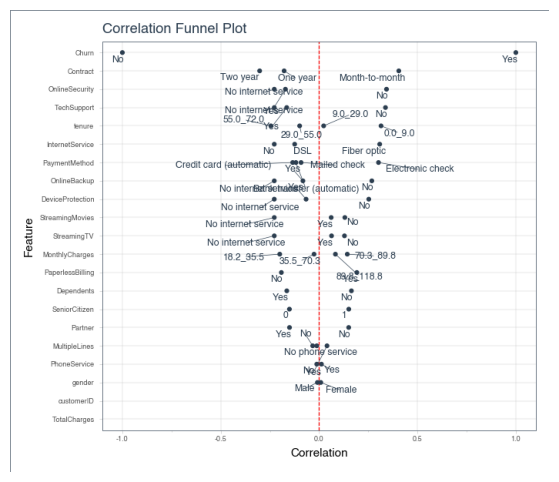

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [20]:
matplotlib_from_base64(exploratory_agent.get_artifacts()['generate_correlation_funnel']['plot_image'])

In [21]:
plotly_from_dict(exploratory_agent.get_artifacts()['generate_correlation_funnel']['plotly_figure'])

![Correlation Funnel](../img/ds_agents/correlation_funnel.jpg)

#### Example 5: Sweetviz Tool

In [22]:
exploratory_agent.invoke_agent(
    user_instructions="Generate a Sweetviz report for the dataset. Use the Churn feature as the target.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * PREPARE MESSAGES
    * Tool: generate_sweetviz_report
    * Using temporary directory: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmp4po4dcfk


                                             |          | [  0%]   00:00 -> (? left)

Report /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmp4po4dcfk/sweetviz_report.html was generated.
    * POST-PROCESSING EDA RESULTS
    * Tool: generate_sweetviz_report


The Sweetviz EDA report has been generated successfully and saved. You can find it at the following location:

[Download Sweetviz Report](sandbox:/var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmp4po4dcfk/sweetviz_report.html) 

Feel free to review the report for insights on the dataset with respect to the "Churn" feature.

In [23]:
exploratory_agent.get_artifacts()['generate_sweetviz_report'].keys()

dict_keys(['report_file', 'report_html'])

In [24]:
open_html_file_in_browser(exploratory_agent.get_artifacts()['generate_sweetviz_report']['report_file'])

![Sweetviz Report](../img/ds_agents/sweetviz_report.jpg)

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)